In [1]:
#|default_exp app

# Who's the super hero?

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

im.shape: (192, 192)


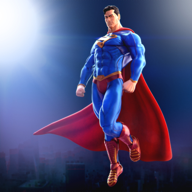

In [45]:
im = PILImage.create('images/superman1.jpg')
im.thumbnail((192,192))
print(f"im.shape: {im.shape}")
im

In [3]:
#|export
learn = load_learner("who_is_the_hero_model.pkl")

In [4]:
# Probabilities: [P(Dog), P(Cat)]
%time learn.predict(im)

CPU times: user 51.9 ms, sys: 46.6 ms, total: 98.6 ms
Wall time: 61.5 ms


('batman', tensor(0), tensor([0.9405, 0.0028, 0.0566]))

In [32]:
#|export
categories = learn.dls.vocab
categories = [category.capitalize() for category in categories]
print (f"Categories: {categories}")

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    
    prediction = dict(zip(categories, map(float, probs)))
    print (f"prediction = {prediction}")
    
    predicted_hero = max(prediction, key=lambda key: prediction[key])
    print (f"predicted_hero = {predicted_hero}")
    
    if predicted_hero == 'Superman':
        alter_ego = "Clark Kent Jr"
    elif predicted_hero == "Batman":
        alter_ego = "Bruce Wayne"
    elif predicted_hero == "Flash":
        alter_ego = "Barry Allen"
    else:
        alter_ego = None
    
    return prediction, alter_ego

Categories: ['Batman', 'Flash', 'Superman']


In [33]:
classify_image(im)

prediction = {'Batman': 0.940523087978363, 'Flash': 0.00284947850741446, 'Superman': 0.05662744119763374}
predicted_hero = Batman


({'Batman': 0.940523087978363,
  'Flash': 0.00284947850741446,
  'Superman': 0.05662744119763374},
 'Bruce Wayne')

In [34]:
!ls images/

batman.jpg    batman4.jpg   flash2.jpg    flash5.jpg    superman3.jpg
batman2.jpg   batman5.png   flash3.jpg    superman1.jpg
batman3.png   flash1.jpg    flash4.jpg    superman2.jpg


In [35]:
#|export
examples = [
    'images/batman.jpg', 'images/batman2.jpg', 'images/batman3.png', 
    'images/superman1.jpg', 'images/superman2.jpg', 'images/superman3.jpg',
    'images/flash1.jpg', 'images/flash2.jpg', 'images/flash3.jpg'
]

intf = gr.Interface(
    fn=classify_image, 
    inputs=gr.Image(shape=(192,192)), 
    outputs=[gr.Label(label='Predicted output'), gr.Text(label="Alter Ego")], 
    examples=examples,
    title="Who is the 'Super Hero' Classifier",
    description="Classifier is fine-tuned on pre-trained **resnet18** model using ~200 images in total"
)
intf.launch(inline=True)

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


prediction = {'Batman': 5.742020903198863e-07, 'Flash': 3.5911152735934593e-06, 'Superman': 0.9999958276748657}
predicted_hero = Superman


prediction = {'Batman': 2.2285334125626832e-05, 'Flash': 0.9998688697814941, 'Superman': 0.00010885472147492692}
predicted_hero = Flash


prediction = {'Batman': 0.016343194991350174, 'Flash': 0.002146175829693675, 'Superman': 0.981510579586029}
predicted_hero = Superman


prediction = {'Batman': 0.9863764643669128, 'Flash': 0.0022053574211895466, 'Superman': 0.011418282985687256}
predicted_hero = Batman


## Export to .py file

In [36]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful


In [18]:
!ls -a -l

total 94720
drwxr-xr-x  13 prasanth.thangavel  staff       416 Jun  4 11:46 .
drwxr-xr-x   6 prasanth.thangavel  staff       192 Jun  4 10:53 ..
drwxr-xr-x  12 prasanth.thangavel  staff       384 Jun  4 11:46 .git
-rw-r--r--   1 prasanth.thangavel  staff      1477 Jun  4 10:53 .gitattributes
drwxr-xr-x   4 prasanth.thangavel  staff       128 Jun  4 11:38 .ipynb_checkpoints
-rw-r--r--   1 prasanth.thangavel  staff       158 Jun  4 11:46 README.md
-rw-r--r--   1 prasanth.thangavel  staff     71173 Jun  4 11:45 app.ipynb
-rw-r--r--   1 prasanth.thangavel  staff      1102 Jun  4 11:46 app.py
drwxr-xr-x   2 prasanth.thangavel  staff        64 Jun  4 11:38 flagged
drwxr-xr-x  15 prasanth.thangavel  staff       480 Jun  4 11:40 images
drwxr-xr-x   5 prasanth.thangavel  staff       160 Jun  4 11:01 superheroes
-rw-r--r--   1 prasanth.thangavel  staff   1430457 Jun  4 11:44 superheroes_classifier.ipynb
-rw-r--r--   1 prasanth.thangavel  staff  46975197 Jun  4 11:33 who_is_the_hero_model.pkl


# POST request to the hugging face predict api

Tried encoding with base64 using Python, but needed some efforts to handle special characters, so scrapped it for now. So, for the time being, will resort to https://www.base64-image.de/

In [143]:
import requests

In [144]:
url="https://prasanthntu-who-is-the-hero.hf.space/api/predict/"

In [145]:
data = '{"data": ["data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAcIBwgDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9TCa0IEyadgDJosAZNFgAk0WAQ5oEJk0AGTQMQk0CYn44piDPvQO4mTTEGTTAbkigQmSe9ACEmqsAm4+tACUCEPFMQmTQAwnmqAKBMQkjvTAb17CmSNIGfuj8qYASfWgZGQCeQCfpVCGlBn7o/KgQFj600kK5GyBuSAT7iqsIYUU/wL+QpoQhYjuaoLleSMHJKqSe5AqrCK0kYH8K/wDfIqwI3kf+8RTSRNypKgJJIUk9yoqkhFZ0GPur/wB8irSRJC8sg/jb86pJCZSlXcSSASepKir0JKkiD+6v/fIp2Ajklk/vt+dOyFdlGZAxJIBJ7lRVWRJUkjH91f8AvkVVgI3mk/vt+dHKhXZSlQMSSASepKjNVZElaSMf3V/75FOyAjeebH+sf/vqiyHcpSoGJJCknkkqKdkBVkQD+Ff++RTshEUlxN/z1f8A76NOyJbZnzICSSASepKjmqsiSpIqj+Ff++RVWQhkl3Nj/Wyf99GiyHdmbMAzEkAk8klRVWQtSq6j+6v/AHyKLIkimu5/+e0n/fZquVBdmbMoJJIBJ5JKg5qkkTcqSIv91f8AvkU7IVyKW7uM/wCuk/77NNRQczKEygkkgEnqSBVWRNyq6LnO1f8AvkUWQXEe9uP+e8v/AH2afKguzOmAJJKgk9SQKdl2DUqsAP4V/wC+RRZCElvbjH/HxL/32arlXYV2ZkqgkkqCT3wKOVBcrOoXoq/kKOVBcR725P8Ay8S/9/DSsuwczKMigkkgEnuQKfKhXZXZQP4Rx7CjlQCvfXP/AD8S/wDfw/40cq7DuyjIoJJKqT6kCnyoWpCygdAo+gFHKgCS/uQf+Pib/v4f8aLId2UnUHJ2jPrgUcq7CuyFgAcgAHrwKLIdyQ39zj/j4m/7+N/jTUUF2UZFBycDJ9hRyrsK7ICoByAAR6ClZDuyV7+5/wCfib/v43+NFkO7KLoG6qDn2FFl2C7IigUggAEHsKXKh3Y5r25z/wAfM3/fxv8AGjlQ7sqMg7gH3wKLIRGVCkEAAg5BA6UcqFcc9/dD/l5n/wC/jf41NkXdlNlU/wAI/Kiy7CuyPaFIIABByCBjFLlQ7sla+uf+fmb/AL+N/jTUUF2UmjBydoP4VNl2HdkYAVgQACOQQMYpWQXZI99dHrczf9/W/wAaLId2VGRSfuj8hRZCuxvEZDABSOQQMEUWQXY9tQus/wDHzN/39b/GnZFXZTdQf4R+VJpdhXY0fIQwADA5BAwRSsh3JDf3J/5eZv8Av63+NFkO5VKLn7o/KnZCu+43hGDKNrDkEcEGjlQ7skbULo/8vM3/AH9b/GloK7Kmxf7o/KiyfQNRB8jBlG1gcgjgilZBcmfULnH/AB8ze/71v8adkO7KRRT/AAj8qVl2C4qDYQy/KwOQRwRT5UK7JGvrk/8ALzNz/wBNW/xqeVFczKuxR/CPyp2XYV2KDsYMvysDkEcEU7IVyU39yQQbmb/v63+NFkVqVCq/3V/KiyBNgv7twy/Kw5DLwQamyHcmOoXLDBuZjn1lb/GqsuxN2VWjXso/KlZDTYJ+7YMvysOQV4IpcqHdkz31yVINzMQeuZW5/WnZBcrBFx90flRZC1EB8twy/Kw5BXgik0irsm+3XLZBuZiDwQZW/wAaEkFyq6Ln7o/Kiy7AmwT92wZPlYchl4I/GjlQXZM99cspBuJiDwQZW5/WlZDuysI1P8I/Kiy7A2yRCYWDIdjjkMvBH0NOyJuSNf3LAg3MxB4IMjc/rSsi7srbV/uj8qLIWosf7pw6HYw5DLwR+NKyHdk5vrlgQbmYg8EGVv8AGmkhXZX2L/dH5U7ILsWMmJw6HY46MvBH4ipsh3J2vrllINxMQeCDIxz+tVZBdlcgY+6PypadhDoyYnDIdjjoy8EfiKVkO7JmvrlwQbiYqeCDIxBH507ILlcIv90flRZCuySM+U4ZDscchl4I/GiyBNkrX1yVINxMQeCDIxBH50rId2VyAf4R+VFkF2PjJicOhKOOjKcEfjS5UO7HzTy3AHmyPKB08xi2PzoskK7Iwi5+6PyosguyeG5lgBWKSSIE5IjYqD+VFkO4SzyT482R5cdPMYtj86LLsK7GBQew/KiyC7JoZ5bcERSyRg8kIxXP5VPKimwlnkuMebI8uOnmMWx+dOy7AmxgVR/CPypWQ7ssQ3EsC4ilkiB5IRyv8qLCuLLPJcEebI8uOnmMWx+dOy7CuyPYvoPyFLlQ7snhuZoFKxSyRKeSI2Kj9KLDuOlnkuMebI8uOnmMWx9M0WXYVxuB/dH5UNINSaG5lgUrHK8SnkhGKg/lSsO46SeSfHmu8uOm9i2PzpWQXY1VGfuj8qOVCuyzDcy267YpXjXrhGKj9KdguLLcSXBHmu0uOm9i2PzoaQIaoHoPyqbIq7LEF1LbqVileNeuEYgfpRZAOkmkuMea7S46b2LY/OiyC7GbQP4R+VKyHdlmC5lgXbHK8a9cIxA/SlYLj3mefHmu0pHTeS2Pzp2QrsRVX0H5ClZBdlmK5lhXbHK8a9cIxAz+FFkO4rzPPgyO0mOm8lsfnRZBdiqoPYfkKVkFyzDcywrtjkeNc5wjED9KVguPeZ5yDI7SY6bzux+dOyC4qgH+EfkKLIRZhuJYV2xyPGvXCMQP0qbIdxzyvOQZHaQjoXOcfnTsguxUUDsPyFKyC7LMNxLEu2OR4164RiB+lKyHce8rzEGR2kI4Bc5x+dFkF2Kij0H5ClZBdlqG4lhXakjovorED9KVkO455XmIMjGQjoXOcfnSsh3Y9APQfkKVkItQ3EsS7UkdF64ViB+lFh3HtI0pBdjIR0LnOPzosguOUA9h+QpWQalqK4liG1JHRfRWIFKw7kjStMQZGLkd2Of50aBccoHoPyFFkK7LUNxLGu1JGRfRWIFKyKuSNK0pBdi5HALc/wA6dkK49Meg/IVNkBahuZI12o7ovorYH6UrDuPaVpSC7FyOMtz/ADosgHrj0H5ClZAWormSNdqOyL/dU4FIdx7SNKQXJc+rc0WQXJFxjov5ClYC1FcSRqFV2VfRTgUWQx5laVsuS56ZbmlZAPXHoPyFKyAsw3EkagK7KvopwKLDJTI0pBc7z6tzRZAPXHoPyFTZBdlmK4kRQFdlHopwKLBckMhkILHcemW5pWQXHrj0H5CiwXLMdw6LtV2VfQHAosFyQyGQ5c7j6tzRZBcevHZf++RU2HcsRzuowrlQOwOBRYdx/mGQ5Y7j6sM0WQEifRf++RSsBYjndRhWKj0HFKwx/mM5yx3H1IzQIepx2X/vkUAWI53UABiAOw4pWHcd5hc5b5j6kZoC49cei/8AfIosFydJnUYDEAdhSHccXLnLfMfUjNKyEPBHov8A3yKLATrM6gAMQPQUDuLvLnLYY+pANFkA8Eeg/wC+RSsBKszqAAxA9BSsMcXLHLYY+pAoAcDgHheh/hHoaVgPuwjmvNR1jSMU7iCmAUAFABQAhFAmhMZ6UCEoKAjNAmhtAgpgJVAFADSMUAIeRVXENpgFAmFAhpGKAGkU0AlMBKZOw0jFUAEZoEMoAQimgG9aoTGmgQ0jFUgGt1piGMKokjYVSAgkWqQFZ1qkQV5FqgKsi1aJK0i1YirItUJlaRaaEVZRVElaRKaEVZBVAVpFp3JK8i0wK0i0AV3SgCtKtUBUlWqQmVZVxTJKcoqkKxVkWmSVJVpgVJUqgKkoxQSU5etUJlSYZqySpIKAKsi1SJKsgpiK0i0DK0neqAqSCgCrLxTIKkpzTvcCtIM0wK0goArsMUrAQuM0wK8gxQBXcUAQNTAhamIhdc0WAhYYoAhegZEelAiJhQMhK4qQIm6UARsOKAIXoKI2HFLcCJqQETGi4EbDNAyMrQBE45qWURtmkBGelADaYEb9abAibrUjI25oAYRQO5GwwaAGNSEMPWgYxhQCGUAMpANoGN4NMQxxSAjpFADmgQ0gZpgNPWgENagEJjNA2NIpCENAxlAtxCeaChKAEbpQAmeMUrgNIoAbQAHBoGNJ9KAEpALQIaSaZVhKBgeakApgFNgFSAZoATNADscZpoBKQBQAUAGaACgBTz0oAUD3oAcOlAADg0gAHJouAtIYoNAh1A2KvWgELigY8dKAYooEhc5oKHdKQD15oEOoBCikMkAoEKBigZJTAUVIDhwaWwx69aYD1pbAOAzSGSKMCgNx60ASCkIctAyVRmkBInFMB4OaQEq9aAHjpSAlWgCVaAJFoAkHeoGPWgZMtAMkWgCVeaQyVKQEy0gJVoAkWkBKtJlEq0CJ1oAlWgCVT0pDJVpATIaQEqUATLQMlSpAmSgCVRSAmSgZMopMCRKQyZO1AEy0ASrUgSoaQE680ASLQBKtAyUUmBMtIZKtAEqUhkqnGKAJFpWAlXrSAlB6UASLQBItICVT0pgSLSAkXtSGSLSAkFAdR6npQA8daBkgNJgPHSh7gP7H6H+RpDPu49a8w6xKBBgUANIxVXAKACgAoASgLCEUE7CUFCEUCsJ0oEHWqQCUwAjNADaAEIzVCG0xhQSIRmgQ2gBpGKoAoExCKYhtUIaRzQAlADaoBCKZIxulNAMYUwGNVk2GMKaERuOKtAV5FqiCs61QMrSLVElWRasCtItUiWVpFqkIqyJVEsrSJTQFaRKYiu6UAV3jqkKxWdKYWK0i0CKso61SAqSLTRNypKtUIqSrTQFOQVQrFSQUxFWUVQmUpRVIkpSigTK0i1ZJVlTJoArSJigkqSrTuIqSLiqGVZRVAVJKAK0tMgpOKAIHFUBWkFAFdxTAgcUwK7jNAEDimIhdaAIHGKAIWoAicUCIHFIZEVpXAhcYpDImFAETCgoiY9qVwsROOKLgREGkBE9IZEwoGRUDGsKBELGkMYRmgCN+KYETUAMagCNxUjRGeKAGNQNEbdKAI2pAMIwaAEbkUySJu9SyhoPFMTGHrQMaetAxrc0CGEVIxKaAawosA3HFADGo6AJnFA9xGoENpDQygYUANNAmFAIZSsMKYCEUARnrUlIBzQgYYwadhCnFMQxutSykGOKAuIRigYuRimISgYVIBTAKQBTAKAEPSkAo6UAFMBSOKQADigB1AC5496AE60higYosIWkPYUdaBDqBtCrQIdQAoPFBQtAXFWkgZJjIpjAdKlgPpiHrxSGPBouIXPNAx4NIBaB6DxSGPHWi4hw60MEPpDJR0oActAiQdaAHikCJFNAyQHpQA9aW4EqdqEBIOlDAkWkA8GkMlTigRIppDJFpASrQMlXtQBKlIZKpxQBIjVIEymgCVeaAJV4NICVaQyVaAJloAlWkxkye9AEq9RUgTLxQBKtAyZKlgTJQBItIZMpoAmU0hkqUgJk7UATJQBKlSwJUFICVDQBMvNAEqigZKnFICVKQEq9qQ0SrQBKtAyVaAJV60gHrSAlWgCVe1ICRaAJFNAEq9qQEi9aGMevSkA8dqAJB1oDoPHWl0GPWhgSA/Kfof5GkM+7j1rzDrEoEFABQAhWncBKYBQAUAFACEUC2G0DEPSgTQ2gQvWqTASmAjCgQlAxpGKsBKBBQSNPWgBCM00A2mAlBOw08VSAQjIpiG0AI1NAJVCYygQwiqAYRVIQ09KZJGwzVgQuOKskryLVCK0i00SVZFq0BWkWqQmVpFqiStItUKxWkSmKxWkSncLFd0pgQOlMRVlWqAqS9KBMqSCqRJVkWmKxVlWqEU5VpoCnKvWqApyiggqS81ZLKci00BUlSmIqyJVklaRcUCKkooFYrSDigRTlGaoCnKKoZUk5piKsgpklaRaoCtIKAKsgpgQMtMRBIKYFdxQBA45oAhcUEkLigCBlGaBkTrQIgcUmNETdKNh2IXFSMhK5oAjcUDIWWkMjYYoEQGkMjcUDIWFIYwrRYLkZ6UCIWHNIoYQKYiN6BkTCgBh4FICNulAEJ60ihh60AMPNAhjCgLjGGKQ7kfU0BsRsDSYIQjFMBrUARsM1IxpHFOwDSaAE60A9BD0pgRnrSGhp4pAwyKYhrGgBtIaGnrQHUQ9KBjaACgBrUANJxQAGgBhHNSUAGKLCuJTYgoAaTSKQDNAaATk0AIRQxgKACgBeMUxCDmkMKACkAp6UxCUhhQAuKAA0AJnNADqGMWpBi55xTYhaQxQOaBDqCrjhxQJC0BYVelAdBw60Ah1A2L0oAcDSYx1HQB4NACjrUjHUCHUASDrQA4daAHjrSKHgc0rCuPAzRYLj16UDHDrSAkBoAkU5FArD1oGSCgCRetKwEi0ASLSAkXtQMkWkBKpoEPWpGSrxQBKlAyVKBXJFpMaJVpDJV4pASx0ATKaAJF7UmMmSkIlWgZMtAiVaBslQ81JRMtAiVTzSAmWgCVTUjJkoAmWgCVecUhki9aQEy9aQyZDQBKtAEy0mBKlICZKQEi0DJkNAEqmkxEq0hkq0hkq0DJVoAmU0ASA0ASL1qQJVoAkU0ASLQBItICQGgCQGkMkU0gHg0DJB0oAeDQA8dakCQdD9D/I0DPu89a8w6hKACgAoAKAAjNADSMVQBQAUAFADSKBbCUDEIoJY2gBTVgJQA0jFABTQhlUMKCRCMigBtAhG61SASgTEIpoOg2qJGnrQAhGaAG1QDWpkjSKaAY1UJkdUJjW71SEQvVokgcVSEV3WmJlaRasRWkWqEVZFqxFaRKBELLTAryLTArSLTEyrItWSVZVqgKcqUElWRKAK0i1QFSUYqkIpyimSUZRViZUlFMhlOVaoRVkWhAVZVqhFaRaaFYqSrVCKkq00BUmFUIpycUCKcw61QinItMVytIKoRWccUAVpBVAV2XigRXcUwIWWgkgdaAKzrSGQutMRAwFAyF1xSGROOKAK7rUjIWFO4ETCkAxgBQBC44pFELLSAicUAQstICF6AImFAxhFAETCgdyJxSYyJqEBGwzTAjagCN6TAjJzSAiIzQVcYRQIYetAhjcUARsc0DGmgQwjNA9hhGKAGMKQxpHFADSOKYEeKkBDxQMTORTAY1JjQwikFxBQAjAUxDaRQ00AIelADaQBTARulAEbdaQAOaAAjFAxA1AWGnrQwCkITHNAwPSgBB1oKFPIpkjcc1JQUAN5FADqAEBoAUHmgAPNMBSMUhXEoGLnigAAzQAoFACjAFAC5FACc5pMaHUgY5RTQhx4oYADk0XGOpDFWgBw60Ei45pFC4oYIeo9aAHUhig4NADs0gH0APBxQA8UCHgUAOA5oHceOtAD170mMevSkwQ7HSkMetAEiUASL1oAevSgCRTzSuBIppASCgCRTQMkU0gJhTESLwanYY9TSAlU0DJQaAJVoAlFSxki8UgJUoAlU0ATL2pMCVTSGSoaAJlNAiVe1BSJVpMCZW4pASrSGTIaAJUpASoaQEyGkMmU0CJVNBRKpzUgTJ0oAmWgCVaAJlqQJVpASrQBKtAyVaQEqUhkqUhkqGgCVTQBKppMCVelAEimkBKpoAkWgCVaAHrSAkBoYyRakCRT0oAeOtAEgNAx60ASDtQA/sfof5GkCPvA9a8o7BKYgoAKACgAoACM0ANqgCgAoASgGhpFAkFAxpFBIlMBaoBCM0ANoENaqGJTEFBI1utACEcU0A2mAlBKG1YCMKBDaAGnrVIBDzTENoEMIqgI2FWQMYVSAicVSJImGapAQOtUSyvItWIqyLVAV3SmBXdKdxFd1pkleRaYFaRKollWUVQipKKYFWRaoCpItAirKuKpCKU1UhMpS1RJTlFUJlSRaCSrItWSVZVoAqyrVAVJVqkSypLxTEUpu9MCpJ0qhMpSjmmIqS9DTJZVcVQitItMCu4piKsg5oAgccVQis60ARMtAiu4oAgkWgZA65oArstAyJxSGQOKQELigCBhzUjI3H50xETikOxCetFxkTUAQvSAhbikBE4zQMiYUARNQBG3NAEL0iiJuaYEZpICNxzTAjagCM9KAI24pDGUhDSBimBE1ICNhQMZQDGE4oAaTQA00AyNu9IY3NFwGHmpGMPSgBtACE80AB6UwI6Q0IelAMY1AxM0CEoGIRQAlACNS2Ab1oAYeDSYxSc1QhuMCpHuHUU0AlDEFG4DT1pFITBpBceE4piuKI6QmxTEaYuYPKPpSDmFMBx0oDmGiE0BzCeURQPmDy/agOYCDigaGYoKFFJDYp4piDtQADpSAUcUDY7NMQVJTFzimSOpFBQA6gBwNAC0APoAM0gHAHNAx2OaVgHDqKEA6kA+gB1ADwaAJAeKAHA80APHWkOw9aYh60mNC+lIZIBjFICRKAHjilcCRaAJBxRYCRaQEgFAxy0h9CZRQFyVaBEij86BEi1IyVKBkooAlWkMkU0CJVpDJlxSAkSgCZKAJF6UmBMnWkMlWgESpSGSrQwJlFSBKtAyZKAJVpATJSAmXtSAlWgCZOlAyVKVhkqmkBKtAEyUATLUgSLSAmSgCRTQMmU0gJVoAlWpKJVNAEq0ASrQBItSBKtMCRetICVKAJFNAEi0gJAaBkimkA8HFINyRaBki0APHWgQ9aTGPB+Vvof5GgZ96GvKOsQrTENoAKACgAoAKAAjNADelUAUAFACGgTGkYoGgoExlMQvbNNAJTARhQA000A3pVAFBLAjNAhlADSOaoAoJY0imhsSqJG0ANYU0AlUJjD1oEI1NARtzmqTJI26VaERsM1QERFUSRutUIrSLVIkrSLVoCB1pgV5FoAryLTRLK0i1QitItUJlWRaaJKkq1QFSQcGqQFSYZzTEynKOtUIozCqRLKcgqhFWVaaJKki0xFWVcVZJVkFAFSUVQipL0qkJlKamIpSirEVJKaFcqSr1piKrrTEyrItUIrSLQBWdaYiu6UwuQSCmIrSLQBXkFA7EDrQBC4oGV2FAiBxSGQOtICCQUgIGFK47ELCmKxG4zUjRC44oGQsKAIXoAiYYzQBE4pAQuOaBkZ4oEQuKBkTCgLkTDNLcdyM8UxEbCgZE4zQBGRQMjagCNqAI6SAY9AEZ57UgGsKAI2FAER60FDWoAQjIpCuR96Qxp5oYDG4pDGnmgBrUAMIoAMYoGMNAhD0oGxuaTGNpgxKADNADKAQhFIBOgoGJ160xDSKkYUCE+lAxKdxB1oAULzSC5IseadiHI2/D3g3WfFV8llo+l3mqXj8rb2Vu88mPXaoJA9zxWMqsYK7Zlz8ztBXZ7Hp37FvxHl01b/U7XTfD1mx2mTVtShjKHtvRC7J/wICvPnmNKG2vodEcNiJ68tvUseJP2H/ih4YjglmsdKure4XfBPa6tA6Sj1Ulhn6U45nQktbr5C+r1+34nnrfBTxdFcpCdGlkLNtDQSxOh7feD7R+JFb/AF2g1dSRLo1tuVnqXhf9lXS7yOKDxF45s9H1WdcxWWn2UuoLnurTIQuR3KBlHdq86pmiTtTV/wADrhlteS5pOxleIP2WrjR7iZ11pG09f9Xcm3MqzHnIRo2K59mKsewNaRzLT3oNMv8As+o3o9PQ5rQPgXZeLLpLfS/HehCaRW2pqEc9ofMX/lk29MI5PTcQPereYJbwZMsBXj2Lmsfsh/FfSJwg8G6hfwNGZlu7BPNhKDqxb+H/AIFj2zW0cfQa5m7epySpVYys4nmXibwfrHhC+FprOm3GnTsu5BOmBIv95G6MPcE12U6sKq5oO5LUoPllozDeGtC0yIrig0ExQApOKAFpAFIdxTjFUIWpKCi4h46UDCgQ+gGAoBDqBseKAYUmA8HFAdR1AC0hjqQ7jwcU0IdSAcDQMeKBjx0oEx47UAPB5pMSHqaRQ8UCJB0oGPTqaQDxSAkWmA8GkwJFpASjtTAkWkA9W5pDJRzQxEqnBoAeDzUlIlTrQJkq9aBolWkMlTtSAlXmgCRe1ICZKAJF60MCZTUjJVoAmWgESLSGSpQBOnNSBKtAyVDQBKppATIakCZTTAlU0gJVoY0SqakZMpoAmQ0ASqaQEy0ASqakCRaAJVoGTL1oESrSYyVTSKJVNICVWoAlXpQBIppASq1AEimkBKpoAkBoAkU0gJB2oGiRaQh46UDJFpAPHWgZIpoAeDQA/sfof5GkCPvU15SOwKYhCM0AIRigBKACgAoAKAAjNCAbVAFABQA00E7CUFCNQSIOtABVgIeaAG0CGsKoYlMTCgkaetADWpoBKYmIelMSG1Qhp60AJQA2rAawoJGnpQAxutUSyM1YiM9RVgRHpVEjGqkIgkWmIrutUIgkWmBXdadwK0i0xMrSLVklaRaAKsq1QirKtUiSlMKpAU5RVCZTlFWSUpVpokqyLVAVZEqiSpImKBFWVaoTRTlFUhFOUZqhFOYVQrlKUU0IqSjNUSU5BVAVpVoEVZFqkSVZFpgVpBQBWdaAIHHFWKxWkWgCu4oCxXkWgZA4xSAgdaYFd1pAQOKTAiZeKQFaQYoAhZaQEMi0MaImFSMhkFAFdhzTAiYUAQsKAImoAgYUgI3oGROM0CIHOKRSIzTQmRseKAIyaBsiY0CIyTQMY3WmMiIyaQDGGKBXIm5pMYlCExjHIoYWIm4pFEZoAZn2qRsQmmKwxgDQxojAxUjGNQAlACHpQA2gBp60AhlACHpSGMPSjqMSgBKYCEUAJSAa3WmAAcUAMakxiCkgDpTYDelJgx23NOwrj1jJpEORZgsnkxhe+MnpUtpGUppHqHgX4KarqF9Y3XiDTdX0jQpvnFwmmyvNcqOogUrgk9N7fKPfpXm4vHQoxstZdv8AM66GCq4p9l3Pa/iL+0hp/wCzmuqfDzwX4Qs49AkRPtY1Myf2iXKAkvKpGXBJ4xgeleCozxL9pVZ9XToYfDRSpLVHyXqXxe8QJqUt5YavcLHKTwHIYA/wt610SVOCvBXLeKkdz4G/aJ8QDw/ceH7rUZZ9LkPmJbyPn7NJ/fiP8PPYcViqivzIrnjPWx9L/Bz9ozS/GfgSSx8V263evafMsMeoNcvCtzGeAsxGQCP+emM465xmuSokpWWzI9glrE6fxFeeC9T1+60ODxLdaDMsYik0qArDaX0n915TmSRc9AzBT2FWoSQOM4vXY8G8UtanV7nTtI1ebQdYicxvpWpZjil9Nr5IGffiuiPNFaq6Jk2tGcnqWhX3i5Z9OazbS/HlupMUchEbX4A+4T0kOPuuOexyMETeKfl+QlUlDzOI8FfHDxJ4P1CO1udU1bS7izcpDd2c7RXNi+cEYPVc9UNavTTcpVISvzRPY4vj9N42mi0vxZbaaviGT5rHXks45bHU/wDYubWQGNZD/wA9E2EngkdamMlT1jojGWHpT0eq+9f8A5XVPA1h8Ubxx4XsLHw94phieW40ATmO11BF/wCW9iz9G4IeBiCCPlzyB6uHxij7taWnR/o/8zxsRg5Ql+7R4/NbNG7I6lHUlWVhggjggivZPNUrEDRkUFpjdvtQO4lJlIDSBAKAY8dKACgY8dKBdAoEOBoLFoEhwoBj8cUCuKKBoUUAPFIB2aAHjpQMUc1IDwKAHCgBw6UDQ9aQMf2piHKc0hskA5osFx60gHg0DHqec0gHg5oAkU0ASKaVwJFpASLQBIBzQBKvagCRaAJBzSAkSkMkFIZKlAiVaAJU4qSiVDSAlXmgCVeMUASLzQBMnapGSr2oAlWgCZDSGSDpTAnSpAlWhjJVpASrSYEyUgJloAlWkBKtAyVTSGTJSAlQ0ATKaAJVNICZDSAlHWkBItAEqmgZMppMCVTSGSKaQyVTQImWgZIppASLQBKvWkBKvUUAPU0ASg0gJFNAEimgB4NJjHikBIp6UDJAaBD1NAx4Pyn6H+RoBH3seteSjsCmIKAAjNADSMUAJQAUAFABQAhFNAJTAKAEIzQDGmgSCmDG9KQg7VSASmAh60ANPNNANqhBQLqI1AhtADaoAoJ2YyqQMRqYhtADT1qkAh6Uyeo2gCNqsRGe9USRtVgRsO1USMIpiGMuaoRA6UCIHWncCvIlUBWkWmhFWVatElV1pgVZBVCZUlFUiSnKOtWgKUopiZSlFUiGVZVpoRUkWqAryLVIkqTDFMRSmqhMpSirQinJxmqQmU5qZJTlFUgKcg5pklWRaoRVkFAFZ1piZVlFUIruuaAKsq4oAruKq4EEi0mBXdaYFaRaVwK0gxSAhYU7gQSCgCu4zSAgcYoAgk6UgIG60DInGaYiB6mw0V3pDIWFPcCF6AIm60gIWFAELCgCNhxQBCxxQBC4zQNER4BoBkbUCIm6UDIyKAGnFMCJhzQO5HnFIGMY0AiJulIYykA2hAMYZoAjYUARnrQV0GsKQkRk4pFDW70MQw9KQxNtADTwKBDaBjKBobQIDQMZSsFxDQhjaYhCTSGJTAQjNADelIAIzTAaRikAmQaQ9hcUxEsURYgdSaRm2es/BD4Ca58ZdZlhsIXi02zAe+vxGXS3X04HLnstebi8ZDDRu9+i/roFGlPEz5Y7Ldn0/N8M4f2c7C21Xw54Ss/EmuSowibUk3zWoPG5QpJ8w9ckrt7KDXzbxVbE35nofSUMJhqKu1eRwX9p+MPE+tf2le6R4m0y7Uli1lqXC/TzpsL9SDUPkirLVnen1S09Ty74veB9R1gXM1ymiaLJNjz77UdUN7ezDtudV2L9FrWErK1jJqW0UfPl94NvbVmMM1rfIP4radX/AEFZtSTujJwkZkUF1YzhjFIjL7VDTTvYum3FnU+DfEk+lzahGmcXURUpnv1FZznex6dKzv5kfibx1f32qSzC4ZxKqE7jkqQoBGfwrtVRKByVJuEmuhoX3jy88XeH4Yr+fztVsF2x3UnLzRdlY98e9FOonoyFLSx0fhD4w3X2CDT9WEWq2ELDbb32T5R7GOQfPE3oyn6g9KiVmzSKjNWOz8feFNP+Lth/aNlNt1+NAEvLkBZpuOIboj5WPZJwOeA2O0qSa5X/AMMYSpuLueV+Ep01Bp/C2tq9tc7ylrNINrwTjjY348VMpOEtf+HLp6uz6nY6bqd5eu0kbNBrFqDqdo4+9HeQYW4QezqobHrSbS06HQ4uS5e+vo1ueyeEPgv4B+M1/NanxHf+G/F2pWv9pafE6Rz2uplvndVztKSDd9zODg4OeK9KlmVWEVGSukeBiMtlGXOm7P5niPxE+F2rfDy9Md4EurNnMcd7ArBGYZ+VgRlG4Pyn0OM4Ne/RrxrK60fY8qpSnRfvHEsuK6BJ3GYoKQbaBiGkA4dKRQUEjl6UFIWgkcBQUKKBIdjFBQ4dKBWFoAVetIZJnFMQuagY4HincB6nigB4PFAhV6Uhj16UAPHSlYaY8dKA3HLSGSL1piHikO44e9IByjBoGSL1pASL2oESLQBIvagCRaQEqmgCRTQBItAEg61IyVaAJEpASLQBKtAyVakZKvNICZaAJBzQBItAEyGkBKtKwyVaAJloGSrzSGTIcUhEqmkBIpoGTKaAJlOKkCZDQBKvagCVeKQEy9qBkqUrCJUpFEy9qAJVNICVTUgSqaAJVNAEq0ASqaAJQakaJVNIZKhoGSqaAJFNAEq9qTAlU0ASA0gJENAEi9KAJAaQEimgB4NAyQGkA9TSAeDQPzHg0ASA8H6H+RoBdj74PWvJR2MKYgoAKAA80ANPFACUAFABQAUANqgCgAoAaRQTsJQUIRQSIOaYCVQCN0oASmgGkc1QCUCYdaCRlADSMGqAKBMaRVITEPSmIZQAjU0AlUJjKBDG71SERtVIkjIq0A0rTJGEU7gNK1QiJ1ouBXkWqArSCgkrSLVgVZFqhMqSCrJKkoqgKcoqkSU5RmrQipKtMTKki1SJZVkWqRJVkWmBVlFUiWUZRVD0KcwFUSyjIKskqTLTQilKOtMkqyrVEsqSLTEVpFqgKkq0AVZFpgVZF5oBkLpVElaVKARWdKaArSrQwK7rSAryDNAFd1oAruKAK8i0AQOMUgK8gouMgZaEDInWmIruKAIHoBEDikMgbvSC5C9DBETUwIWpDImoAhYUBchYc07CuROM0hkRFADGFFgI2FOwETCgCMjFFgZG4oYETCpHcYelAER61JQ0inYVxhGKQxpPtQIYRQMiYZpDGnpTBDCO9JgiMnNSMYeKBgDTENahghppDGHrQNDD1oEITQNCZ4oEMagoSgBCKQDaAAmmAmeOaAGnpQAzNSVYADSC5IvOKohnsv7Pvwp0rxvqp1PxVeSab4TtHKzzRFVkupQAfIjZyqIORvdjhQeMk8eRjsU6MeWHxPb/ADZ1YbAVMXLmekF+J9XeJPiL4C8BeFf7J8NeP9M8OkDEFtpjwXvk+52xFS3qQT9a+bhSrVZc9R3PqqdP6vFRjHQ+bfEvxD+K+ptdz6Z47tfEVioJ813ihbHptZQAfYGu1tQ0cSXU5nsec6t8QPEdtZQvql3BE0hJxPbNGpPsynBrC8G9i1Kyu0eb+IfGWp6pKwlupAvpFcOyfkTWvPGC0RhUqtnOea27eDz6jg1lKo3qc929TRstdu7Z1/e+YvbzRuFZOo+pvDXRnX6bLp3iJQggFlqsY3hFON+O6N6/7JqOaMnqdCjKByPiSzeC+ZyBtbnKjAJ+nara00Oaqne7MqORo2DKcEVkYqTRct3kjfz4eezqeePQ+oocup1wTb5kei+BPFNzpUsTRufIU4Ab5vLz1U+qH0NYykekqcZx1Or+M3g6PWdOsfGmkJ5cxAS9jTkhl+6/vjpn0xWsJqrHlZxOk4trqQ6O3n69oWpj5Y7+RJn9Azwskv5lQfxrG71j2OxWaUhviie70fwT4T1K1kkgutPO6GZDgpiVwOfy/Kumg1J8rMqmkbHtK+Lrf4k+HodQ1ZPPsdVgEOqRgZIkAyJ19HG0nI7qD3OdaOIlQnputvTsefXw6qwvb+u589ePPA2qfD7xLeaLq0BiuIG+STHyTxn7kqHoVYYIx64PINfZ06kK0FUhsfJSjKnJxkcw4INWUhhOaVy0FIbFXpQIWgQ5aCkL2oJHDpQMKCh3OKAHr0oAWkAoOBQgH4z0pAKKQDh0oAeOaYDlpAPFAIctJjQ9aYWJBzQCHAcUthjlpAyUHmmTYetA0O6VI0PWgCRelAEi0gJFoAkWkBKpoAetAEgpASKaRRKp4oESCkBItAyZaBEqmgZIpqRkqmkBIpoAlU0ATJQBKOtICVKQyVTQMmU0gJFpATJSGSrQBMtAEy9aQEqGpAmU0ASg0ASqaBomU0mBKpzSGSr1oAlU0mBKtAEqGpAmU0ASqaAJFNAEyml1GSLSGSrSGSq1AEqmgCRTQwJUNICQHikBIpoAkU0ASqaAHg0gHg0MZIppASKeKQDwelADwaAHg8H6H+RoGffR71453BTTE0FUSFABQAhGaAG0AFABQAUAIwpoBKYBQAhoExtA0IelMTG0hCmrASgBtAhGqkA2mMKCBp60ANamgEpiYhpoOg2qJGmgBrdKaASqExh6mgQxqoQwjNUiRpFMBrCqEMIpgN2+9O4hjrTEVpVpoCtIKokqyCrQFWQVQFWQVSJZUlFWiWUphVklSVapCZUkWmIrSJzVICrKtMgpSiqAozVQmU5atElOYVSEylKKoRVkHNNCKki9aZJUkFUJlSRaZJWkFAFSReTVAVpE5pgV5EpisV5FpDKkq07isVnXFAMgdaYitItAEDrxQBWkFAWK7pQMrSLQOxXZaQEMi0wK7LSAhcUxEDjrQBA4oEV5FoAgYYpWAhcZNAEEgxQBAetICJgaB3ImoC5E1UJERFIojYdaYrkTdaAuRtxQMjY0ARtU3AiY0DIzSAjoBjCKTGNPQ0xETVIyNqChpNAiMkg0hoTrQIY9A0RdKkoaRQAmBQAxjQAw9KAG0DuBGaBDTQNDKAQ0mkMa1K4BnimgGnpTAaKQBQAhPFFwGkZpDACgDpvBvhddduWluRIbGJ1jKRHElzM33LeM9mPUnnauTgkgHgxWJ+rx01k9v8zpw9B15eSI/ixoFzoEkcGpaxa/aol2x6RZSL5dmOuzbkkH1yASeTzXzjlKb5pu7Z9Hd04qK0t0PMDcSA53n86h1Jx2Zhzye7Lth4hvtNkDwXDoenDdfY1Ptp9WWqj6lW4vpJi4VmSJzuMQJ25+nSiVW+pEpXehXrG7IHIfmHrSu1qXDcsxxqW3fdU8MPSs5O52wgvi6dTUtYJeYwSt3B+8hcdWHpWdzsUXbk6rY1tUjOt2sE6j57hTkDtIBz+eKuM2tGEoKcEc1ZaLPfLIY1O6P7wx0qpTSPOhQ573ew6087S7wB0IKnBUjqKUtTaipU5WZ6R4Z0SDV4WmsWVJVUsYj0IHUVjrezO+63W533hLxDDN4dvdLuYy0LfOpY8DjDDmjlcHdCT5nzM427v4gkFlZB5fIY+WsSltv4jit+V35mKU4R0R2VtpFx4i+H1/YzICyRjyYxySdwIA/KohJQqaGc3dXaN34R6bPZ+Frm2uYn2Ipz8pxkk4H61nU+MtOKR2fjGJfiJpHiTRb6KN9q2l9pFywy9vMIlhkUN1CvsXcvQlVPUZr1cJiXh6l+j3PKxeEjWjzLd/mfJ86FGIIwR1B7V9pJWPkolc9azNkFAMVaAQtA7ir1oEh1AxQcCgEAOTSGO7UwHrxQAuMmkA7bQA4UMBwpAOWkOw5TzQA4daAJAc0CHLQCHr1oGOHWkMkU0APHSiwug8c0AOHFIY4HNICVaAJFoAkWgB60gJFpASLQMkU0ASqelAh4qWMlVqLjsSoaQiQdaBkqmgRItA0Sr1qWMlWkBIpoAlWgCVDSAnSgCUdqQEi0FIlXrSAmTikMlQ0hEqmgZMpoAmWkwJVNICVTQBMppASqaAJFNSUTIaAJlNAEqmgCVaQEimpAmQ0ATKaAJFNAEqmkMlU0holSkMkU0CJVNAyRTQBKhpASrQwHr0pASKaAJFNAEgNAEgNIB46UDJFNICRaQhymgY8H5T9D/I0DPvw9a8c7goAKaJYVQgoAKAGkUAJQAUAFABQA2qAKACgBpGKBISgY09aCQJyKaASqAQ9aAEqgGUwCggRhQA09KaAb2pgIaBIbVkjT1oASgBtWA1utBI1hTQhhFUIaeRVCG0ANIxTuIaRVCGMMimhFaQUwK0gqxMqyCqQFWQVSEVJRWhBUlqkBUlWqRBUkWqEytIlO4irKtUgKcwq0SyjMOtUIpSiqJKUoqxFOUVRJUdaaAqSrVCK0i5oJKckdUBVkSmJorSpQSVZEqhlZ1oEVpVpgVZFoArSCgCtIuaaAruMUwsVnFAFeQUCsVnHNAyCQUAVZBnNICuw60XAgei4EDimIrPQBCxoEQPQBWlzmkBAwNAELmmBA5zSAicc0WAiYUwIXoAjcUwIXpARMcUD3ImNAWI2pARPQxkROQRUgMPSgCNz6UMaGNS6B1IzR0GRk0hjWoAjNAEbdaTGhppCGk4pgRsaVyhjCkA09KBjMkUAIQM0AMoAaeKAE70DY00CI2yTSZQAY60kA096YCdqQDTTADikA1sYpgMqQCmBLbW8t1cRQwIZJpWWONB/EzEBR+ZFS3ZXY0rux03ifxZJ4BtEstInKaiY5Le2uk4NtBuKyzoe0s7q4DdVjRQOvHyNeq61RzZ9RTthqagtzyRpCzEk5YnJJ7muZytojFtvVjazuAUgCgAoAKARr6NA17dww+W0jyMI9iKWZs9MAck/SuaclFXPUoVU2k9Xt6n0f8ADH9jzxd40gsbzUHj8OrE3ym7QySyJ2+RSNvH9459q8StmdOnpHU+ioZTia6Tl7tvmz6T8BfsSeD/AA2Ek1aa58QypKZkjuMRQox6/InUfUmvIqZjXqfCrHvUckoQ1qvm9f8AgHpGl/spfDg3Zng8JabHM3XbEdp+q5x+lcssTiZK3OzWWCwdJ8zpx+4g8Q/sB/DzxijE6Q2lytz5umymL/x05X9K1pY3GUtp39dTw8VSwb1ULPydvw2PJfF3/BM7xB4as59Q8HeII9WmjBZNOvU+zySD0DglSfrgGvbo5lKTtVj81/kfPyUE7c33nyh4ys9S+Husz2HiPw5qGk3tvw8TxlMe+T2PqK9+DjUjdMcr0/iTSM3w94pj1K/KrZPID03NmqlHTYzU433O9sNfvdGUXEFskJ6KhJPXvUqI3KL3Oh8F+Mnivxutl353ER9z1Bx0pysxcqZ7Nbf2L4zljvoVXT9a3xG8g8vYlxGsiGRtvRXCgnsGAPfqRjzOxm/cVr6LU+ItcMc2p3ksQCxPPI6AdlLkj9CK/RLNRsz4NPUymGDWdjdCUAxV60AhaAaFHWgEOoGhV5oAXGKAbHjpQAoODSGO7UxBmkxjlNIB4pgKvWlYCT0oAcBQA8HFIBR1oGPBxQA9TSAetFguSLTEPpMfQcBkg0mMkAzQIcvFIZIp5oAlFAkPBouMkHSgCRakCRe1AD1pDJFoAlXrSGSKaQmTKae4D1pDRKtSMlXimImU5pDJF5pASrxQBItICdOtAEi0MCVTSGSqaBkyGkBKvJpMCVKQyZaBEqGgZKhqQJlNAEqmkBKrUASqaQyVKQyVTQBMlAEqGkBKppMCZKQEi0ATKaAJFoAlU1JRKhoAlXtQIkU0iiRTQwJVNAEqmkBIrUgHqaAJFNAEgNAEimkA8GhgSA0hjwaQEgNADs/Kfof5GgaPv49a8c7goAKACquTYKYgoADQAygAoAKACgBG600AlMAoAQ9aCWNoKEIoJYlNAJVAI1ACU0AyqAKCWIelAhpoAbVAFBPUYetWDEagQ2gBp61QCN0piG0CGVRLGng0xDWqgGt0poBtUSxh6UIRDIKoCrIOtUBVlFWiSpKKpAVJRVogqSrVXArSCqIKsi00BVlGKpCZSmOKtElKSrRJRnPNWhFOQVSJKkq5qhMqSLVCKki1SAqyLTArSCgloqyJ1qhFWRaAKsi0xNFSVetAFaRadwsVZVpiKsi0CKsq0AVXGKYFeQZoArvQBVkp3GQMKEIrSjmhjK8gxQIrSUAVpDSAgkpklaSmBXfrQBFIaAK70AQPQBBIOaTAhYYFAEL0wI2NMRA9IZG3NUgInGaVgIHFIZGe9LYZG3Si4rERpDGleKLCuQuMUmUhhxQBG1GwbkZ5pD6kbCkMaRmgBuMigCNlpAmRk0hoZ1FAETDJpFB2oJYxhQMYTQMaRmgBMGgBh4oGhD0oExtAxlAXEIzSGNpWC4U7CuNbFDGMbjpSYxByOaQMQAUxARihgdB8P1DeMtIz1W4Vlz/eAJX9QK48W2qMrdmdOHt7WN+5yPxEt5bHxZdWkxJe2it4efaFP8Sfxr5SWx7tR3kzmqwICgAoAuaXpF3rV7FaWVvJc3MpwkUYyzfSolNQV2VGMqklCCu2eyeGP2XNW1ayWbUtQj0yVuRAsfnFR7kEDPsM1508bFP3dT3KWTVqkbzdn2tc73w7+yNo0Fwr6lrF3eoOsMSLCD9Tlj+WK5KmOna0UepQyCDd6sm/wPoD4cfCvwt4K2tpOj21tMOs5TdKfq7ZP614lerUq/Gz6zB5fh8Mv3cUj3Hw5JGqABcY6cV5zSR7sI6HTxTAYxzRzEuJ2HhVFlcZFNO7PnMe3FHpGn2yCMcV1RSPjK022M8QX8GlaTc3EziKGONndycBVUEsfwANddGN5JIzpQ55e8fiB+0F8W9R+LnxQ1LWtWbzYlcxWFmTmK2gB+RQPXnJPck19/ClChRS6/qYVn7ap5LZeRg+HbqZyHAJROdsS9K8+bi9zSEWtvyPUtH1RUtsrYmROMsbkKfyqIxT2QNpbs2JG0+7aC8jtmEqA74WiDb8dtw9fU1sovYxbitWei/DO90TSrPULLxHbTwDUIJYrO7hcZthICNofBK47HDAHqpFCfJUU10M6lN1Kb5XufMPxN8BjwPrH2eC5a70+Qt9nlkULKoU4KSKOAwyORwQQR6D7nD4hYmnzLdbnx1fDyw8rPVM4SQYNbMmLGUi9wHWgXUdQUFAh9ACr1oEOoEKOlA7i45pFDs9qBC0wHKKQDh14osMcOtADwOaQDwcUwFqR9B4NADx1oAf0NADgeaQyQGmTYetJjQ8dKQdCRetAhwpFEiUASA4oCw9e1AEi0mBIp5pASKaAJVNAD1NIZKh/OgQ8GpKRKpoESKaBolQ0ASjpQwJU7VKBkq0gJVNAyVaAJVagCZeaQEiUgJVpFEq9KYiVDmkMmTrUgTKeKAJENAyZDSAlWkwJVpASr0oGTL0oAlQ0gJVNIZKpoAlU0gJlpASqaQEoNAEinigZKhoBkqmkwTJFNIZKjUgZKrUASKaBkqmgCRTSAkVqQEinigCRTQBIpoAkU0gHg0APU0hkgNADwaQiTPyn6H+RoGj9ACK8c7xKACgAoAKokKYgoAaRzQAlABQAUABHFCAbVAFACUCY2gYjdKYmNpCCrAD0oAbTQDT1pgJTJYGgQygBuOaoAoJ6jW61SGxrdKZI2gBp61SAQ9KZLG0ANPWqQhrUyRpqgGHpQAw9KsljT0oERuOKoCtIKpAVJRVokqSirQirIuaaJK0idaoTKsgxVIkqS1SApTelUiWUphWhLKUtWIpyrmrJZUkWmIrSJVElSVKoCpItMCrItUBVkXNAFaRaCSrItMRVlFO4FOVcUXArOlMCtItO4rFaRaYWKkq0AVpFzQIqyLQBVkWgCs60AVpBg0xFd6oCvLSAqyUCZVkosIrvTAryUAQNzQBBJxQIrsM0AQvQMhfrQBC54oEQPQMiYYqgInoAiPFLYCJjmncCGQUmIiapKI26UtgGMKAIiSDQOwxulAIjIpDI2FADDwaVgIyM0txjDQAygZGxoAaQKQEZOKAGEZqSiNqBiGgRGeKBjScUANzQA080AJQA04oAYw60mMAMUWGNPWmSIeaChjDFIBuMikAYoGFAhDimBZ0q/k0vUba7hOJYJFlTPqpBH8qxqRU4uL6mtN2kaPx1sVv9bsPFVoudO1u1QhgchJ4lEciH0OAjY9z6V8hODpuVOW6PdUlUSmup5jXKMANxAoB6Hs3w5+CMOv6RDqGqmVRcDfFFG23CdiT6nrXk18U4y5Yn0mCypVaaqVuvTbQ9r8FfDzRPBhJ06wCzyDDzOS8jD03HoPYV5tSrOpuz6TC4Khhf4cdT0GxheTknYPQVny9z00b1g8EWB95vzqG0jojE7DRLtQ6gJj3rkqNndTSPQdKmXYDuAOOa86d2elGKNiE7yuGzWfKTLQ7rwmrI6H160RumfLZg00z0q1cpBk13Qeh8VUV5WPjz9uT9pz/AIQewfwLpqBtU1izY3E7NgW9uzFML6s21hnsPc8fVZZg1U/evZfma1pRwtNL7TPzZ1Tw5L4gvZLyWVIUQcLHH8zfh/U/lX0FWpH4Y6nkpTm7vRB4c1r+w7/yEy6vwybuT+Vcr11NXGK0OxGvYTdBaygD73pQnYfInomeleANZjv4pYDIBIqHcjgFfXgjv7VlKTK9mk7HeaZaf2/p0+mTeTcxlCVCny5o24wyE8HBwSO4zQnqKUbbbHn3xw+GeuX/AISh1xo5YbbRoTHLE8IKy5YBpVlVjngKNrAcLxX0OWV4037JrV/1Y+czClOo3UvpHofNkqkE5FfRHixZARikaBSAdQUFAbDhxQA4daBWHGgaFzQFgBzQA/HOaBjx0oELSAB1pMY+gBwzQA+j1AfQxirSAeKAH0APFIY4NzSAkWmIeDSGSKaBD6BjwaQDx1pMCRaAJFosBIKTAkWgCVTQBItAEgNJjJF6UgJFNICRTQMlWgLkqmgRKppFEqmpAlU5FAEimgCVeaAJVNICZaQEi80iiZTQBKhxQBMhpCJlNICRaBkqGkMlQ0gJVNAEqmkBOrUASg0ASLUlEqmgCVTSAmU0ASqaQEimkBKhoAlU0ASqaAJVpMaJFNIZKO1ILkimgCVTQMkU0ASKakCRTQBIpoAkU0APU0ASKaQD1oGPBpASKaAHg8H6H+RoBH6CHmvGO8aeKACgAoAKpEsKYgoARqQxtMQUAFABQA2qAKAEPSgGNPWgSA80DY2gkD1qwEoAbQA1qoBKYmFBIygBp61QBQSxrdapAxp6UxDaAEPWqQDT0pi6jaBDT1qkIa1MQ09KaEMPSmA3pViY096CSNqoCvIKpAVZFzVokqyLVXEyrIMUyStKMVSApyiqRBTl61ohMpSjNUhFSVaskqSpVIRTlSquJlWRKokqyLTuKxUlSqQipItUBVkWmBWlSi4FSVaoRVlFAWKki5zQIrSLTGVJKYitIM0CKsoxTAqyrxTQirIMUxFaQUCKktAFaQ4pgVZaYFSQ0xFaSgEVZDQDK7igRXegCBqBFdxQFyB6YEDtSEQOc5oGRP0poCu9AyFjTAiY0XAiY0AQvSAjbikBC3NAETDFJjI24pbARtQMjakBExxRcY0nigRG1AxjdaBkbHFSJDKChjHFAEJyTUsYhpiI2pMpDaQmRt1oKExxQIYTigBp5FADD0oGMoACM0DY2gQxjzSuOwUANPWmMSkAwtzQ2AY4o3AaRigAqQGk5qgG5waks7XwBPYeII7rwfrkoi0rWSEgum5+wXvSGcf7JY7HHdWPpXl43D86547r8UdtGryy12ej9ejPJNU0u50e/urK8j8m7tZnt5oj/BIpIYfmDXzMo21Wx6lrFjwzo769rtlYJnNxKseR2BPJ/AZrmqz5INm+HovEVo0l1Z9vaJBFa20EUUW2GNFjUY6KBgfpXzi953Z+mqKirI3wyRoD8qiqNEizBNb5BJ3fSs3Y1SNGG72/6uH8cVhKXY6Yo3dKnlYgk7a5aib3Oym7HYWWptbQgF+fSuTlbZ381ond+GEa7iQk5zzzWclrYxqz5Y3Z6Z4cTY6rikj5PGu6bO+VT9jxjHFdS2Pkm/3h+a37fP7P/jrXPifaeOPDOnXOt2f2VLS4trWMyyW5RmKtsHLKQx6dCPevpstzGnTpyo1XbqjfE0niOSdPVpWa+ejPizUfEd1E89isEkNxzFODlZQRwQR1GD2/Ovai1JX6Hny/dvltqSeFlFjJvfzCw596VT3hwsj0TSbm3vLC7llHlSqm0Oz8gelYJK+xs7pXuXvBmptp80sAAiilBAcj7o9a2lDqznU7/Cj0mc3sWmnUreQyQNGRLGUALejL6c9qSSvZFxk2veNbw5pEHjPwXrtpHcjT7i+0+dEilJQysoLMjDscJ34yBXThqjp14y31OLFQdSk01pZnyJO24BvUA197M+KgVjg1nubBiiwCgUh3FFIGKDQNC0CHdcUDFFAXFxSGSDpTEFIY4UAKOtDAetAiTtTAXtUtDHKaQD6qwDh0pMaFyRU3GSryKYmOApMZIp6UC6j1pAPWgY9etAEgpAPWgB6mgCRaQEi0MCRW5pDsSLQIkBoGSLSAlFJgSLyaQEi0FEyGglkimgZItSMmU0ASKeaQEoNAEimkBMhxQBIppFEymgCVTSAlQ0wJV61LAmSkBKpoAlQ0DJlNJgSoaAJlpASL2oAmXpSAlU0hkqmkMlU0ASp2pBclU0mBKppASqaAJFNAEqmgCVTSAkU0hkqtxQBIDSKJVNAEimgCRTQBID0pASL1pASA0APBoAeppASA0ASA0wHA0gH5wD9D/I0ikfoRXjHcNagBKACgApoTCqJCgAPSkMZTEFABQAUANPWqAKACgBrdaBITrQNjKCRT1qwEoAbQA1qsBKBBQSNPWgBh61SAKBMaaaExDyKoQygBGqkA09KYmNoENPWqQhrUCGnpTQhvUVQDCM1QmNIpkkZ6VQEMgzmquIryCmIrSLVICpKOtUiGU5qtAUpu9WiCnLViZVkFUiSrKKpCKsgqhFSVaoCpIKaJKki1QirKKaEypKtUIqSCqQFaVaAKki80wKsq1QFSRaBFWUUCKcgoEVpKpAVpKYFWUU0SVJRTAqy0AVJKAKklUBVlPFMVypJ3oJK0lAFaQUAQOKBFdxQFyB6okgkFAFaQUAV5KLFEJGaLCZE9MCu4pDuROKAIWHNFhkbCgRC4pMCJjxSAiYUhkT9aGBGwpDI2oGMYUCIW60ihh4FAEbUgI260h2GNQAznNAyNqQDDQAw9aQDH70DQzNIbI2GaAEB4oAa3NNghh4pDGHvQAygBG6UANJxSGhtG4BTC409aAEoCwxhmpGNzQAjc0DQEcUCG5pDG8etBQ5HK55xweRSY127kfxTn+1eNL24JzLcw208//XVoIy5+u7P518fXSUpxWybPfTbSv1SNz4D6Ubvxkt2U3R2sbNnH8TDaP5mvCxk7Rt3Pocko8+IdR7RX5n1XYSsyqvQHpmvIWx9zY1JrPdaljLnHYVNikM0y6TptBI4qWaI3hcHYMDFc+7OhaI2tJDEKSaicTWnI30kMtykYPAqFDlV2bynzSsj1DwncmCOMLzjqK8+TtI6KkVKnZnr/AIVeG72AfK/pWkbSPicepU79j0BbbEAFb2sfIufvHP6vpaSbiVyfWs2mj0qUlLc+DP2tP2GW+IGvXXi/wS0Nh4klO+6s5Dshvm/vhv4JMdSeG74PNephMwdBezqK8fxX+aOmtQjiLT2n+D/4P9M+CvGGleIvhn4in0PW9Mk03V4lBkguh8wB6MMcEHsQSDX0tOdOtHng7o8yoqlCXJJWZLoetXGxomYFXGGUd610WqJfvK0md/4ck8yWIyspQdFPQfUd/pUSlJ6DUIHpegarN4p8+0t3Z7dV2EjjJwcj+X0xTjanuY1J3fkdF8Mk+3peaRPcpL9qs7hhFqLhbpJjEw/dMTgndjC9+nerpzj7WMlrYwrXlTdup8lXls8PyOCGX5SCMEEcHjtX6FJ3SPhouzKBXFQbgDxVAANTcoXnNAwoEPU460ITHdae4+g4HFAgzzSKHKc0AOoELjFIY8CgBwpgPAzSEh1AIB1qSyRTxTJHihgOAzSC49aBklAhy8YpDJB1oC46kxki9KBMkoGPU5FIB4FFgJB0oAkU81ID1oGSLQBIKARIhpBYmWmIeKgaJF4oHuSp1oETDpQIkWkUSLUjJENAEy0ASKaQyVTmgRKhpDJkoESKeKCiVDSAlQ80gJ1NAEi0gJVoGSqaTAmU0gJVOKAJVNICVGoAlVqQyZDSAlU0DJVagCVTSAlQ0gJFNICVTQBKpoAlU0ASKaQEqmkMkU0hokU0ASK1AyQGgCVTSAkU8UASKaAHg0gHg0ASA0APBoAeDikA8Hg/Q/yNA0foVXincIelAxtABQAUAFWQFABSGNPWmAlAgoAKAGnrVIAoAKAGmgXUSgY09aZIU0AlMBp60AIaoQ2mAUEjT1oAa1NAJTExGpoGNqiRlACNTQDTVCY2gQ09apANbpQSNPSmhDaoBlUJ7CHrTJI271SAjYcU0SVpBmqArSDApoRUlq0SU5atElOVatCKki1SEVZFqkSVZFqiSpIKoCrKtMCpKtUIqyCmIqSrVCKsi07hYqyJVElSUYqgKkgoAqyimmBVkHFUIpyrQMqSCgllSUVQirJxTAqymmSyrKaYFKQ0CKktMCpJzVAVZaCStJQBWcdaAK0p5pgV3NBJXkNAiu3GaYEEjUwK8lAFd1oHcidcUAQNx1oCxG4oArvQMjbpQBC1ICFjUgRP0oGRnpQBG3WgCN6QELUhjGoAhbvSKI26UgGN0oYDG60h3GHrQBGetIERtzQxjMVIDGFAEZBoKGkZoC40igRGeDQUJigQ1hQAzFAxh60ANJoAYQSallCYoQmwqhDSOaBiGpGMbIoAQDIoSAQjFFgEPSmA0jNSMQigdzY8K6ZbajqoN6/l6fbI1zdN3MaAsUHuxAUfX2rmxFX2NNy+71OnDUnVqLsjhtRvLnX9UmvJIyZrqXdtQdz0UfoBXyFSaSbbPYvzStHfsfSnwr8DL4T0GB3LG+uP3l0uOFPZQfYV8pWre3ldbH6VgMF9SoKm/i3fr/wD0nyHOPLzxyKnoeinoa1kWkt2Vzzjoaz6llHTz5N6yMM805Fo6N7oLsUdz0rOKLbOisrgIi44NHKt2WnY3dMkUuGyM1jM6Ka1O98PazbWsTNLKqBOWJPAx6+leZOLb0PVhSlKLsdh4S+LPht7xRb67p0xU4Kx3cbEfka09jVjrys+fxeFVaLjFpv1Porw7qtprmlR3FrMlxGeC0bBhn0yK64xbifmGKpTw9VxmrFXVrcqCe1YSVjpw87nN3FqkpIIH41ztHsRk7WPn/8Aag/ZO0T4+aDHISNM8RWKk2OqRpuKZ5Mcg/ijJ7dQeR7+lg8VLDSutU91/XUzmo1F7Ort0fVf8A/KTxNoWrfDrx5qfhrXLf7PeaZcGCdFBw3cMp7qwwQfQ19jFqpBVIvRnkzg6dR05Lb8fM63QhHdNutJCjY+4Mmp0W425W0SR9YfseeALe48XRz3dulwkWG8qRNyZJwMg8H1/Cvns1xTpRjGO8mejgcIq3PUqbRVz7p+J+jeE/EGlNoWs6PHPblQizxQqkluR0eJ8ZUgjtx2wQa8/wCuujJWexxUMsrV6bqxl52Pym/a0+DV58I/ijewvOL/AEnVwdS02/VNomiZiGDDs6tkMB6g96/YMsxdPG4SFSm7paeh8DjKU6NeSmrM8DmXaTXqmMWQ1JoKtAxaBNDlp9BC0irCg0DHUCHcYoGCnFAD6AHA0CHjpQMVaAHA4oAfSYCjrRYLjx0oActICRRRYBwoYDx0pDQ4GgLEgPSgLDxSYyQGkwHjmgCReKAHrSBkgNADxSYEi0gJFPSgB4FIZIopASqaYEiUgJAc0hokU4oAlU0BYlU0BYlU0mCJBSGSpSAmU0ASCgaJUqQZKpoESrQMlU0hkqnpSsBKhzSAlU0ASqaBkqmkwJUNICZTzQwJV6UASqaQ0SJSGTqcUCJVakBIpoGSqaQEyGkBKposBIppASA0ASqaAJAaTAlU0iiRTQJEqnikMepoGSqaAJFNAEgbigCQGkA9TSAkU0APVqAJAaAHA0ASA/Kfof5GgaP0MrxDvCgBlABQAUAFUSFMQUANPWkNiUxBQAUAI3WmgEpgFADT1oF1EoGNPWmSJTQBTAaetACGqENpgFBI09aAGt1qkAlAmI1NAxtUSMoARqaAaelUJjaBMa3WmgGt0pkjT0poQ2qAaaoQw9aYhjcVQhh6UySvJVAVpBTRLKcoq0IqSirRBVkWqAqSLTEyrItUiWVJVqkKxVkWqEVJVqkBWkWqQipKtMRUlFMCrIKoRUlqrgVJFzTAqSriqJKslMCnNTAqyUxFOUUCZUlpoRUlqgKklNCZTl4zTEVJOc00IqS07AVZDTJKkpzQBVkoAryUE3K8lVYRXcYosBWk60AQSUwKz0AQOOaAImFAEL0wK8lIaIXFA0QPQBGelAmQtUjIW4NICJhmgCMigCI9aQxjcUwImOakYxjmgSIW6UihhAIpDIm4oAY1IQ1jQMiY80DGN1pDGnigCNqAGMaQETGkUIRQFxlACbqBWGMaBjS2BQMj680AIaAG0D1GnrQFhM0DsNbrQLYaRzUjEIpiEJxS2GN3U7jsNJzSEFIA6U2BLG0DxmK484R7xJm3cKxIBAByDxzXFicN9YSXNax20K3sb6bn3n/wTq+EXhT4m+GvHEt54X0yW+tHtILK9uV82eBGVzLtduhJVOQAfmIGBXw2cYb2c404db39D28tr8tV1pbdNOpR8YeEF8P+KdTs/LVFSdlCp0xntXhuh7PqfqdKfPTTMe0tjBKARwOKlqxRotYhcvH909RWTRRk3VgY74SjgU7aFJlsMrTx89OaIrQvqaR1RLVAWYfSixtCLlseT/Eb9qK08KXL6doUcerakMq5D/uYT/tEfePsPxNdlLAyqrmnojzMZnmHy9+zprnn+COe8LeC/id+0RpQ1HVPELafoEshO2VmSF1H/POFMbhn+Jjjjqaiti8JgJcsI3l/XX/I8+g82zqCnKfLB/c15L/M7vwp+x14fntWs5fE2pNOSAZbaGFEHOfunOfzryqmeYi94RSXzPWpcPuMOV1JN+kfyPrr9kX4FWfwM8RS6inizVtWhuYGt/sc+2OAMzKTIyqfmPygD059a5Z5pWryXPFHh5hlU6dNpNtrv/wD7AvYRNDuHORXQ43jc+Rpy5ZWOUv7XY2R+VcsonvUp3VmMhQSLg9aSQ5nzf8Ata/sX6V8c7H+3NO2aX4utYtkF6F+S4UciKYDqM9G6rnuOK9jB4qVB8u8X0/VHIpRqNU6jtbZ/o/I/NTwdo11pt5Ml6hiltrp7WeInlHR9jD88/lX0NXRXMYqV2nuv0P0k/ZH8PwWdtp14Rzeyb1GOAqEqB+Yb86+Bx9X2uOhDsfVwp+xymc1vLf8j1LxJ4i8rWzNOpltmbGe30rzalRayep6uFwyWHUY6M8N/by8CReI/gTFrdoBMui3SX8EhHzLDIRDPH+BaJsf7Nfd8I4t0cU6Cd4TV16o/NOIaF05yVpxevz2Z+Yt3Hsciv1pqzPh4sq0GoUFDqBijrQIdQAA0DH0AFIByrTFceKAHcGgY5RQA5TmgB1AhR1pDHgUwH4xSActCAetIBwpDY9aAHjrQFx4PFIbHLSYEi80gJR0qiR9IY4dKQyRT0oAkWkBIvamBIvSkgJBSAkXrSGSA0ASL0+tAEg4pDRKpyKQiRaB3JFNIZKvakBKvSkBIpxQBMp4oAlU8UASKcUgJVNICVTQMlU0ASqaAJkpASDrQxolQ1IEy0ASqaTGSqaQEqtQBKp5pATIaAJVNADweakolU0ATKaAJVNICVWoAlU1IEimgCVTk0ASKaAJFNIZKDSBEimgCRTSHckU0DJAaAJFNAEgNICRTSAepoAeDQBIDQA4GkBID8p+h/kaBo/Q+vFO8KAGHrQAUAFABVEhTEFIY09aEDEpiCgAoARutNAJTAKAGnrQLqJQMaetMkO1NAJTAaetAhDVANpgFBI09aAGt1poBKYmI3Smg6DT0qiRlACNTQDT0qhMbQJjWpoBrUyRtNCG1QDTVIQw9aZIxu9UgGMKaJIJKoTK0lUiSpKOtUhFWQVSJKsgqgKsi00JlSUVQirItUIrSrVJklORaYFWVasCpIKaAqSrxTFYqSCqQis60xFWVaoCnMuc1aJKUq4JoAqSrTAqy8ZpiKctMkpS1QFSWmJlOaqEUpTwaBFWQ1SEypIaYirIaAK0vQ0xFWQ07CZWlpiKzmgCCSgCs9AEDUAQSU2BAeRSAhc4pgQPzQBA4pAQvQBCwoAiegCFxUjImGaQETcUDImoAY60CuQsKkoiIoGRODmkxoaRQK5E3FLYZG3NIZGwoEMIoGRsOaB3I260mMaRmgRGRg0hjWFG4DDxSGNbpQIjOc0FDStArjCOaChpAoAaRkUAMagBpqWUhtOwriYpWGJnNNEsawNDKQlIBuKAEK0DGEUgAHj0pgIc9qBoSkI++/8AglbrN9bar8RLRLgJYLpEdy0bDpMJSqNntxuHvx6V8nnUF8a3Pey286ij00LvxE1uCbxFdFyA4chjnPOa+anrBH6vRi1E5x54JBuRgfpzXC0dKixkOtQK3ls2PrWD3K5X1CK5ivVmxhtpxkVppYlbniPxa+Llx4Ek+y2caS30rHyxJnaqD+IgcnngCu7D4f2u+yOHMMxjl8I2V5y/LueLav8AGDxf4qt2sJdRfy5m2lLWIRu2f4QV5wfTvXf7GjSfM1sfIV86xmIj7KL37Kz9ND1fwJ8FvD3gXTrfxJ47nEsoUTQ6Kq55Az+8HVv93geua+exWZ1K8vY4f7/8j6rLOG4U0sVj3e2vL/n39DU1/wDaw1G5jS30jRVgs2ULEskuDtx8o2oOPoDWUMojHWrPX0PWq56lTXsKej21/Q9H0vWPE9rDaTW8zPdSoplit4T+6YjJHJOR+NeZiqUabsnc9rLsa8QrVINPv0PbPhV8XtTivILTVBtcEASYI/MV4sm4M9StQhXi0z7R+HnjiDxDpyxFwzqPWvWwtfnXKz8jzfLJ4SrzpaM1NVTa5OODXZKJw4d3RlQ5MoxzzWNjulsdbaWq3FkVcZ3DHNdlKF9T5zEN3aR+YX7XX7Plx4B+Nhm0iNhoniq+hvUZEJFtPJOElQ/VzuH+9ivpFO+HtLeK/BI9DD1XieWW13Z+v/BPpD9mrfpXwt+Hd3IpD/ZMPkdcTPk1+dY6VsYpeZ9hh17bAzo+X6HrHiPRdL1a8uIoZFRtx3RHoxyelOdKFS8U+osJiMRRpxc1ddzyn456RJc/syfEPT3zILa0lZD9F3kf+QxXo8POWHx9K+yml96aPH4kjGpByX2oP8Gmj8ltRH70mv3+W5+Rx3M09ak6EFBQ4GgAoJY+gdxR1osFx1NjFWkIdQFhRQMcKBDqBjgMUAPBoEPFAMcDQAoPNAx1AEnakwHrSQElMQq1I0OAzSHckWgY9eKQEi0ASDpQCHjtQA4GkBKDQA9TxSAkU0gJFNAEgoAkWkMkVqLgSjmhgPU1IyRTQMlXpQBIhqQJlNAEq0CJFpDJF60ASqaQEqmkBKhoAlU0holUmgZMhoEyUGkCJFNIomU5FAiVTQMlU1IEqGgCVTQBKppASqaBkg61IyZTQBKpoAkU0gJVNICVTQBIppASq1AEimgCVTQBIppASqaQx4NAyRTSAkU0DJFoAkBoAeDSAkDUgJAaAHBqAJAaAHg/Kfof5GgaP0SrxDvCgBhoAKACgAqiQpiCkMaetAMSmIKACgBG600AlMAoAaetAuolAxp60EiVSAKYDT1oEIe1WA2gAoJGnrQA1utUgEoExGpoGNqiRlACNTQCVQmMoExp61SAa3SgkbTQhtUA09aoTGHrTEMPeqQhhNMkhkqhMrSCqJKsgzTQmVpFqiStItNAVZVqgKkoqhMqutMRVlFUBUlFUgKcgqkSyrIKoRVlWmgKsi1QmVZBVElOWmBTlq0JlKbmmIpyUxFOaqJKkvemBSkHWqAqS8U0IpzUySjIOaYFaSqJZUl4zQBUk5piuVpBTJK0nNMCtJQBXkFAFaSgCu/FAEL9KYFdzRcCFhxQBXcUgIW4zQBA9AETUAQuaAImpARMKAIW61IyNxQBE2KBkbGgREx4pDIWFSMjY80DsRMaB2I2GRS3AjpAMbmmMY3AoAjakMYRzSC41qYmRMcmkUNNICN6GNCE8UIRGetIpEZJoAaaBjD0oAaDQAjc0AM60ANNSUFMBho2ATdSuMbk5oENJpDCmIBQgGMtDGhBxSBiHmgD6W/ZVh1Lxb4f8TeDfCOsjw540vYxfx3TO0a3lvb4cwFweAMs23vye1fMZtGcWqj1gvzPey+t7K1KK1l1/QwPG37OPxr0CwXWtM0y/ubZYxDcrp0omnDAkmRwpJfcxJ3/ANMV488RSqWg0tD24YrFUX7t0zx3xRefEXTbdodZfWrWNRgq6vGpHfJAHPsaiEae6RdXMMZONpSf5fkUvA3xS1bwxqEe+5mvNPJ/fW0shf5e7KT0Yfr3rDEUY1I7WZtgszq0JLmbceqf6H1hod7t0+PULWUyafchMM4wVYjnP8x9a+ec3a595Tmp6Hlvxs+CWs+Kr+PXNHxdgQ4ePP8ACCTkfmeK7sPmNOjHlmeDmeVV8ZJVKW6X4FP4T/CObwk39u6lGk+oID9miIzHAT/Gc9X9B0FeVjMy+s/uqWi6vuejk2SLAP61idZ9F0Xn6m5fWcus6jKbgPNv+/JLliw9BXHTShqj6apN1VZs6Dw14W0yyMflaXBGVxg+UAR9M9K2nWqT1bZz0sNRhpGKt6Hr/hxzBbgLEqA9gK86Sdz2qbjFF97JUm8/hW65rOVPmRvGajqe7fBPVLixcSyOQGPC57VlCHsp3PHzSmsRQd0fRkV+L6BSeSa9yMro/MZUvZSsLBbBZQ2OKl2QTndWOqsRiFQOld2G1Z4NX4jn/H3w90v4g6XBZ6jErLBeWt7HJtBZXhnSYYPoSmD9a9dwuv67WMqVSVGfNH+n0PP9D+HH/CO+FdO0k7EbSxLnYcqEaZ3UZ/3WFfE4qh7Spft/kfZYTGeyvbaZz/j3SLiGeHV7FiFlG6QJ2YABv6H8a86pCVvaRPq8rxEZReGq7rb0ZS8R2a698CPGiOQHu7S5TBPpbSE5r1Mnqc1aD688fwep8zxCuWfL0UJfjsfjbfchT6qD+lf0PNWZ+NxM5hzWZ0oSgoUdKBC0BYeORTCwv86ZIZ9akocvFAxc0ASZ4oAVetADgcUAOzQA4dKBMeOlACigY9aBMfjigB46UAOA5oAfmkMeKBDh1qSiRaAY8dKBEi0kNj1oYIetSMctAEg4oAkWgCRelSBItOwEi8UgJFoAeKQEoNAEgqRki80DJVoAkU0gJVpDJQaAJENICVaAJVpASKaAJVNIZKppASpQNkytQJIkU0hkqUgJVPNAEynigZIppASoaQEymgCRDSAlU0ASqaTGSqaQEoNA0SK1AEqmkBKrUgJAaQEqmgCVTQBIpoAkBoGSKakRKpoAeDSKJFagZIDQBIrUAPBoAkU0gJFP50gHg0AOBoAkDfKfof5GgaP0VrxDvCgBlABQAUAFWQFABQA2kNiUxBQAUANPWqQBQAUAMPWgSCgY2mSJTQBTAaetADWqwEoEFBI09aAGt1qkAlAmNNNAxp6VRI2gBGqkA09KYmNoExp61SAa1BI09KpCG0wGVQmNPWmIZVCGHpTJInqhFaQVSFYrPTEV5BVAVZKBFaQVQirItUIqSimKxVkWqEVJVqgKsq1QinKOtUSVJKYFWWqEylLVIRUlq0IpynNUhMpTHmmIpyniqQilL3qrElSTrTsIqTECqQihM1MRTlNNAVJTVBcqScZoJKshzTEVXOKaEVpTmmIrSCiwFaWiwFdzTArPQBXegCFuKYFeQUAQPQBAxpXAiekBXegCJqAInFAELUgInpAQsKQyM9KAIWpMZC1IYxjmgCMmkBGwp2AgYc1NihjUDI29qAGUIQxutNjIyeakew000SRvSKRGTzSGNY5FMCNhSGNIzRYVxjDBpWKQzPtRYQ1qQxh60DGEUAIeaAGdKQxp60wsFAtiNqllDTSGGcUxCNg0ANAwKQwB5piAmgBjGgYlIR3nwN8ev8Nfip4b8QhysNjexvcAfxQMdkyn2MbOK4MdR9vRlB9Ud+FqulJS/laf+Z9hfFnxRqnhDx1q+j6XbLGLR2IuogRJMpG6I5H8JVlOR1zX5P7eVOTpv7J+z0KNDEUY1pa32PlH4l+G/GOs6pHqF1qmqQNcRgTwztMigjPQE4P/ANf617FPFU40lyxvJ/I8OtltXF13aSjBPS2unocdceHZvt8N3eCO9njUL+/hG2THdgMA1jUxU5q1rHp0MlwsGpVPet3Po/4U6nc+LvCz2N1aQwQ21yuZIFK+b8ueRnAxnt2xXiK23Q9WVKMKl4s9u8MaBHHaOI4yqYx8ozXmYuNnZHt4PXVnO+IvD2GcCLapz8oHFcdOFjrr2kcPJ4XEMx2K2c/lXoLU8tq2hs6ZoLM6/KQB7VTGmdTZaZLBtwpz2FTa5up8pu2OhzXUqtN8qjnbTskilJyPVPBduLZ4toyq8cVxy+K5dXWk0e5aJcfuFw2eldMZ6HwGKh72p1VofNUVrzXPAqe6dDajbGo9q9DCuzueRN3ZO7BY2Y9AK9pytTcjJK7scJrM8l3p2spa4+0OhaMH+IjnH6V8lKV1OK3Z9VhoRp1aLqfCnqeceEdcXW7G8064fasqFkz2b/ORXkUql24PqfZ5hhXhqkMRBbb+hR8Xxzad8CfGKW8JlmTTNQIRerMbd1GPpXsZLBRxdG+3MvzPlOIpOpztbuOn4s/Gq/AwoHI2j+Vf0FPofkEdzMb71ZbHUhBQDHZzQCEWkUOAzQIUcGgBwGRQAtAx4XIppCuOHFAbjgaBIXORSKFWgCUcUCHA8UAKpoGPBxQIkWgBwPFADx0oAcBmgY4cUgHgdDSYD1pASU2NDwcUgJF60APWpGKOKQEgOaAJF4oAkU0ASKakCRaAJFPSgCRaAJBUgPU0iiVelAiRTQMkU0DJVNSBKpoAkVqQEqtQBKpoAlWkBIDSGSqaAJVNAEqmkMlU5pASqaQEwNAiRTQMlU5FAEqmkBKppDJVNAEqmkBKpoAlWlYdyVTRYCRTSAlU0DJFNICVTSAkDUgJFNAEqmgCUGgCRWoAkBqRj1OaAuSqaAHg/lSKJFNAD1NAEgOKAHhqQD1PNICQNQA7dwfof5GgaP0ZrxDuEJ4oGNoAKACgAqyAoAKBjKACgQUAFADaoAoAKAGE5oEgoGxtBIHrVgJQA2gBrVQCUxMKCRlADT1qgCgQ09apAxrdKZI2gBp61SAQ9KZLG0ANPWqAa1MgaelNAMPSmA09qsljDQA2qJYwmmhET1QEEnSqQirJTJK0lNAVpKYFaSqRJWkpiKsozVAVZBTEypKOtUIqSiqQFOUVaJZUkFUhFOUVQmUpKoRTmqxFKU9aokpTGmIpyniqJKMp5qkBWkbFVYRRmNMkoymgCpLzTQrlZxVElSanYCq9OwMqy0xFaQUxFaQUwK0lAFZ+tAFd+tAFeQUAQNyaAIZKAIGoAgcUgIHpAQkUAROMUAQtzUgRMKAIWpARsOKAIWoGRsKAuQPSYyPFICN6QxjU9gIG70hjCMigLjSKAbIm60xjGFICI9aVhoY1GwDKRQw0CI2oGNakA3OKYDW5oAiJpMaGtUjGCgBrUDGE4NAATmgCM9aQXCmBG1JjQDpSGNNACHFIBD0pgMpDF60CEamMYelIB9qf9JjHqwB+hqJ/CzWElB3Z+jlmbjVfhL8JvFepIsHiB9Gij849biOGVoopG9SY0jNflGZwjHGSS6n6tw83VwPJPVK6OP8AjVqMer3n2k23lyyr8wzlc+orKFranuUaXLoeFSeGJL+5CRxF3dsbVGSTngCs5NI7XNQR9LeGvhfP4D+G+iPcRBLi9vJ3Yj/dQbfwx+ea40ro46VX2tR26I9N8M6WItIUqMM/Jrx8Q+apqfV4ZclPTqc/q1mju6uM81cUmYzb2Oc1DTLeJSUXB9+1dMEc0yCxjiVwMhDWriiEbkEpgw2wOPUVk7I3UbmtaXsdwBjC9s1jKWh1QgjtfDQMM0QzlTXBOWprWj+7Z7L4fXzIUx19a1i7n5/i3aTOxtT9niBPXtXUtD5yfvysbOnXy3C4zyK7KFSzsebWpODH65M9vot5Kg3NHEzYHsM17jfPhqnL2JwsVOvCL6tHleg6z/alhJcQybngUySAdSB6V8Ypc2qPvMXhvYVFTktHojiIdEuIHlu1Hk+Yxb5OAMnOBXJKi7c59RLFQmlSetjY8ZCfQPgF4uvJ/vpp9xMu70K4/rXuZRTn7SKfdHwOc1qdTEe7sj8XtZdDdTGMYQu20e2Tj9K/oCata5+RKzehjnlqxZ1IWgYDg0gHUDANg0CH0xig4oEKOlCBjxRsG4uCaAHjimLqOAzQO44ClYOg7PFDBDgc0gHrTsAtIY9aAHDOaAJFNArDwcUAKGpDH5NAEinmpAkHNNgOXpSAeOlAyRetTYdx1AEi0gHigCRe1FgJBSsBIppASKaAHqaAJA1JjJEqR3JFOKBWJUoAlHFAEimgZIppASqaQyRTSAlSgCQGkBKpzSAlU0DJVoESKaRW5MhoETKc0WAkU1IyRTigCZDQBIrUmMlU0gJlNAEitSAmU0ASq2aAJFakwJFNIZKp4oGSKaQEqmgCVTSAkU0gJFNAEqmgCQGgCRTSAeppDJVNADwfyoAkU0h3Hq350DJFagB6n8qAHhqAHg+tIBwPyn6H+RpDP0drxDvGk5NACUAFABTQmFUSFACN0pDG0xBQAUABoAbVAFACGgGNoBCHpQJjaBCnrVgITgUANpoQ1utMYlMlh2oEMoAbVAFAmNbrVITGtTENoAaetUAh6UxdRtAhlUJiN1piGNVCGnpQA01ZLGHpQIZ3qhMY1UhEbd6YiCTmqQFWSmSV5KaArSUxMrSd6sRWkFAirJVCKslMRVlqgKktNAU5e9aIllKbirQinL0NNEsoynrVoRSmNWhXKUoqhFOU0yWUpTTEUpTWiEynKaYinMeKBFKSmhMrSDiqEVZaYipJzVAVZKBFaSgCu9NCK0tMCpJQBWfrQBA9AEDmgCs4oAhegCF6QEL0MCBxmkBA4xQBC1AETClYCJxmgCFxSsBC5osMjI4osBE2aQELDOaBjO9IRGwxTsBEwoGRuKVhkZNMCN6TGiI9aQxjc0gIm60DGnrQAxhilYERtSKI2oAaxpAMahjG54pCIz1pFDTyaAE6UAMbvQCI2FAxtIYjGmITNK5VhhFDEhvQ1IxG5pgNpABNMY080CAnAoGMJzQA0GkOxLZ/8fUeOxz+QrOr8DC19D9g/FfgW2v/AIM/CrT7SPy3s9Bswqj08hCf1Jr8uxKVTEu/mfqGRVHRoS7f8A8j8XfC9ryITTFFiiUgZbAAHrXMqbPejXd9DiLSDQ/Ciw3sTfarzzSsaBcLkdT9Bms5QsrmvLOd+Y9r8UamupfDHwpI3+sa9nYr6AopH86imlyLvcywsXGvLtZGxoCrNpkJjGcDkV8/WjabPsqc1yIxPFuiTykz2yAyAZZOmfpSpu2jIqq6ujh7hXnGyRChHUEYxXRzcu5zL39Dnr8pbzbUYn6Gr5roGuVlzT9XkiIXcGB4w1Ztm8GdDp88czgrmORuqMP1Fc05HbBHoXh2RozGDznrXnylqa1o3ge3eEGElumOTXXS1PzfMVyyZ0eo3PlQgA4rrk7I8ajDmkQ6XqLQuDnvWcZWZpXoqSOysbhbyAhgCCMEGvfwNe0rPZnzlWDpy0Pn6+trr4d+N57WB2VEkEkJPR4m5A9+4P0r5vF0Hg67jHZbej2/yP1ylOnnGXxqTWrVn5Nf1c9Dtks722W/ljHzfPhjlU9cCumMo1FzNanx83VpT9jF/wDBPlH9vz9ovStG8JS/DjTLkvrl5ALi/SA8WsHWNHI6M7FW2+gGetfeZBgW68Kktj5XMp+yozV9f8z8yLyXc59K/S6juz4qCKRJzWDOlC54oGAORQIcvSmgFoYD6BjlxTJFoCw4dKBodngYoEhRQNjgcGgNx4oAXtSYIctAyRTimSLSYx4NADxzSAcvBoGPHWgQ8ACkMVaAJVFFgJB0oEOU0hj16UgHqaAJB1pDHLxSGPHWgCReKQEqmgQ8UDHg1LAkWgCRTSGSryKBEg5pDHjrSBEimgZKpoAkB9KkZIvNICVaAJQaAHqaQyZKQiVTTAlU0gJVNAEimgomU0CJFNSBKOlIZKpoAkU0hkymiwEqmkBIppASq1AEqGgCVTQBIpqRkqtQMlU0ASqaAJFNSwHq1ICVTQBIpoAkU0ASA0ASK1IZIppASBqAHq1Idx4bNAWJA1AEitQMcG/KgB4akA/Pyn6H+RoA/R9q8M9AbQAUAFABVEhTEFADSaQxKYgoAKAEamgEpgFACHpQJjaBiHpQJiCmISqARqAEpoBh61QBQSxD0oENPShANqgCgkZVIBGpiG0ANqwGtQSIaAGVQmNPWgka1WA1ulNANNUSxjdKEIZ3qhMY1UhEbd6YEMlUSyrJ1piK8lUBVkFMRWkqhFeSgRVlqhFWSmIqS1QFOWqQinKa0JKU3NWIpTHg1SQmUZjViKcpqiSnMapCKM3eqEUpTTEU5atEspyUAVJasllOWgRVkNAFSWqEVXpgV5aCSrLTArSYxQgKsppgVpOlAFaQUCuV3oEQPQIgegogcUAQPQMhagRC9IZC4pgQScCkwImpARMccUAQt1oAjcCmBC4pARHigCJjSGRMcGgCNjmkAxqQEDmgpEdK4DDzSAjYYNA7jGoAibrSKIzwaWwDWNMCOpKGN1oAYRSAYwpAMJpDsMPWgaGHg0ANJ5oGJQA0nJoAYetKwDDyaAQ08GpKENMBvWkAlMBG4pDGCgbEY0CQ3rQMTNAMbRcZNacXUWe7Y/Os6ivBlQ1kj9ltM8RiX4I/DjVUdJBP4csF3joT5KqR+anNfl9dcuLmfpWT2nhrf1seB/E7xZdXnmWkUpSI/O4B4Azxn8qi59PSgtzgvCfhmfxfrMVukgjiQ5d2P3R/ia46zbRVafIj2P433tp4T1bQ/C9q5I0eyVbhuitM/LN78bRn2o5eVqK6E4C9SMqr6vT0NH4deKoZLQpLICAM9a8PENKVz6ejTlUjZHXHWNI1ndFFdRs46qrgn9K500aexqR0eqOb8Rpa2llMwjV5AM5FTdzkom6pqnByZ5YjRTSuXH3mzXoclkeZzczNE6BFcQCeA4YdVFYNW0NlHS6N3QNOeVVjdckchq4amh3UWd1ocDwuqSdQeprie5tWfuaHsvg7KRg9OMV2Uj87zHVmzq1x1HpzXVJnnYeHUyo7tkxj9Kxud7pp7nX+GdXJIjbkHvXVQq8krnz2Ow/VGH8Y/Ck+qwWGqWURmngJhdFGSyMcg/gf516mZ0nWoQrxV7aP0Z6nDmPhh5VMNWdlLVeq/wCB+Rb8D6HcPo6vfQtEijIikHLY/pXFleHdWpH2qsr/AHnJm+LhGq/YO77n41/tKCLTfjN8QrSKRri4k8QXsl1cMSSzec+1Bnso/X6V+1YDCyoUfavd6LyR+e5hilWn7OOy39f+AeNzNzXfsrHDFEVBYoGaRQ4YpolgOtDGOpgFIB68UIBwOaBj1NMgd1oAWgbHYzQNDloAcvWgQ9RQFx2KB3HUAOHSkA9eKYbjgcmpGSLximhMf1pAPUYNAXHA80DJFNIB4oAkUikAueaQ0SKaAHipC5IpoGPB4pAPWgB60rASA0hkinpQIeOaQEi8Uhkqk4FAiRc0gJBQMkQ0FEimgRKDUsZKtAiVTSGPBoAlRsCgCVDUgSrQBKpoAkU0DJVNICZTQIlU0hkinApASKc0FEqmgCUGpAkU0gJVPNAEqmgCVWoGSK1ICVTkUgJFNAyVTQBKrUCJFNTYZIposBIrUgJFagCRTQBIDQBIDSGPBoAeG5qQJF60BckBoHceretADw1Ax6tQA/d8p+h/kaAP0gPWvCPQCgAoAKYgqiQoAD0oGMoAKBBQAUANPWqQBQAUANPWgXUSgY09aCRKaAKoBGoASmAyqAKCBGoAaelNANpgITTEhtUSNPWgBD0oAbVgNbrQSNPShANqiWNpgxp61QhjU0A01RIxqaENamSMaqQEZ60xEMlUSVpKYFd6oCrJVIkrSUxFWSmgK8gqiSpL0poCnKapAU5m61aJZRlNWhFOVqtCZRmNWSU5TVITKU1VYRSlNUK5TlPWqJKclMTKk1UIpS9aYipLVAVJcYNBJSkp2Aqy1QFVzQJlaQ0EleQ1QFWWgCrIKZNyvJ3p2EV5KYFd+RSsBWelYZC9AyFhmkIhcYphcrOKRREcUCZFJQBA4oGRGlYCF1zRYCI9KQEL9aAI3oAhYUARmkBE4yaTGREUgI2oAicUDI26UhkTGkBGxoHYaRQDIn60hoYxpXGR0hjCaBWGPzQMaaQxhoAjccVI0yOgoQ9aBIYRigYwk0ANzzQAjHIoAZSGIRSGMY4FAIQGgYmeKBDetIBCOKAExQA3pQVuNIoABigQK5SRWHUHNJq6sXF8rTP1F/Zt8Sx+Nv2P/DcIcSXOhXdzpkncoFcyx5+qSj8q/N8zg6eLTfU+/wAiqWjKn2PP9f0W41a5lCZBkJZyPQV5Tetj7RVFE5TwZrE2l+KLcx5SJJAHA7rnn9K5auqNaiU42Pa/2htIi8X+JtPvYY1sZryIRC+RjJA7BRgSAcrnqHGR2IHWrTclax5WDrPDJxeqR574NSLSYNV03VZxbXsDmOSORwFAHTB756185ilLnsffYBxnS57nJ3GhWp1f7VYL5UoYlXinIz+VHs20YTkoS0O/t9Xu5NJWGadppWGHLfyrahTcXeRnWruUOVGaImjbODj0ruZxRZr6PevGxQnANc00dsJX0O88MSrNPtIHrmvPqnZDQ9CfTgkEM4Xp1Nc8o3VzjVa8nA7fwdc72ZM8YzzW1Lc+YzGFrM39Sg3A11yR5FGVjI8hg3Wudpno86sa+j3DWUy5wQKcfdPOxMFVidzOBqWhzj+9GSPqOR/Kvo6EvaYSpB9j5eP7nERfZlm2iIsIkIwxj7euK7MGlF0m15nJiHdzcT8Vv24PCEvg/wDaW8cwOu2K+u11SE+qToH/APQt4/Cv17DT9phIvt+h8nWVqz8z55cYzUmqI6SKsOBpjQtADgMUCAUDFAyaAHdaAFUYoC48daCR+cUALnNMaQoOaQx460AOoAcDxQFhwagBy80ASDigBw5oAeBQA4ilYEPXOKEDJBzRuJhg5pFEi0APWkBKOlACjrUjHr1pDJM0MSJFNIfUcKAHg0gJFNAEi9qmwEi0APU4oGSKeKBEgNIZIrUhEgOTSGiQGgCRTQMlU1IyVTTESKakZKpyKAJF6UASKaQEoNICVDQBKDigaJVNICRDQMmU0hEoNAD1pDJVagZKhoAmU9KVhEimkBKpoGSKaQEqmgCVTQBIDSaGiRWpASq1AD1akMlU5oAkU0mBIDSAkVqAJA1AEitQA8GgCRTSAeDSGPDUAPBpDHhqAHhqBj93B+h/kaAP0kPWvCPQCgAoAKpEsKYgoAaTQPYSgQUAFAATigBtUAUAFADKBIKBsaeaCQNUAlMBp60AI1UgG0wCggaetADWqkAlAmITTQDaokZQAjU0AlUJjDQAjU0IaelMkbTEMqgGnrVIBppkjG600Ia1USRsetUAymhEMlUSVpKaAryd6YFWSqRJWemIqyU0DK0nQ1RJTlPWqQFOU1aEUpTnNWSU5jVpCKM3erQilIc1SJZUl6VYilLVCKUtNElSWqApy8VQinKaCSnL1p2ApzGqJvcpSmmBUkPNMCtKaZJVkFOwitJ3p2AqvQBXfpTsSVpDmqEVnFAEDigCBhTsBA4FICs60AQkYoAhloGVmqWNELCkMhemJETDNIZEwxQBC1AET0AQN1qQI25oAiegCJu9ICI9akBhGKAIn6UDIm6UD6kZ6UuoETCkMYwFAyEnmkMa1IERYpAMI5oGNIxQAzvSKGPQBETmpGNY0AJjNMRGRSKQwkGgBp6UDIz1oAQjilYLjaYDWqShrUAJSASqsK408VJQ0mgBmaVyhe1MnqNIoGN5pDFApiPsT/gnf8TYtO8Xa74Av5Qtt4otQbFXPy/2hCCY19i6GRfchRXymd4Vzp+0gtUfR5ZiPY1Yzb0ejPqbRPCCXNtqytHmRYmCkdVOeh/GviE7yT7n6DUnZpniXhfww9nFq2pzRZEZeKMH+9nmk11OmdTaxDHf6jZLdzC6mMMUJcxscqCOBgduTW0IuIvdk9UeZ+If7U8R3qXWoXsssoAHGFyB0Bx1rjqRjU+JHp0pukrR2NfwPcSRX4jmO4HuawcLGqm27nqMEcbOMEcjmly6GrVzWW1ilQBsfWsZG0Y6FAwG0u9uOM8Gs5K5tDQ6/wAJTgXiHd37159VHbTPa9OCXmjyIOTtyKUFdWPCrXp10y54QZkmAzg9Dn9KygrM58wScTurlN0AbHzdxXfuj5WDtIwZ9yP1rnkerGzRYtUkZlqDKo4pM9H0NT/ZqBucrX0WXJunJPqj43FNe1djQOFcDsBXpTtTrRiuiOPdXPzW/wCCrXw/Nt4j8G+MIov3d1BNpNw4H8aHzYs/8BeQf8Br9KyWr7WjKm/U+cxceVp9tD887hcGu9mUGVycVJuCnmgQ8daaGOB4pkCg80FMXHNArjqBjlFAbhk5oAeMk80Ax/SmxDxyaYhwGKQDgOKdgHAUrDuLjvRYaY9aQMfTEhymkMkXmmSPBxQwFWkUPB4oAeDmkA8daQDqQx60APFADwakBw60mUSLRYVyQUgHjikMeGyKAJF9KSAeDTAkWpAkB4pAOHSkMlWgCRTSAlU0APU0DJFNSMlU0ATKaBEiGkMkFAEqnFAEimkBKppASqc0ASKaAJVbFAyVTnmkBIrUhkyHikJkgPNAyRWxQBKhoAmVqAHq1SMlU0gJVNAEitQBIrUhkqmgCRWpASqaAJFNAyRWqQHhqQEitQBIGoAkVqAJAaAHqaAHq1IB4akA8GgY9WpDuSA4oEO3fKfof5GgZ+lB614R6IUAFUSFMQUAITikMbTAKBBQAUAITTQCUwCgBCaBMbQMQmgTEFMQlUAHpQA2mhDT1qhiUCYHigkZQA0nJqgCgTGtTQMaelUSNoAaetUgEPApiG0CGnrVIBrdKCRp6VSENpgMNUJjaYhhqkIaaCSM1YDCaaERPVElaQVQFd6YmVZKoRWk70CKshqkBVlNUhMozGrQinKatEsqS1SEU5eatElKYVaJuU5RiqQinL0NWhFKU9apCKUxqkIoytVAVZTTIKMx5NFgKcrdaoTKkvNOxJUkFMLlSYYpiuVH4piIJORVCZWlXinYRVdaAK0lMRWegCu/FAEDnimhFaSmMiccUAV5DSArNnNIZFJ0oEQOKAIGpFETUCInGKVh3IWpDIXNAkRN0oGQsKkCIjFAET0AQt1pMCNqQET0hojfpQBGelAEZ60h9CF6TGRE0ihjCgCInNIYlCEMahjREaQ0NPWgBjCgCMjFShkbcUMYmSaQDGoBDcCgbGNQAzgUDEY5FADKTGhGpIbG9ae4thGHFJjEFNCsNehjRHUgIRQNMU9KBDD0oGA6UABYCgLGh4d1u88O6zZalp9w9pfWkyXFvPGcNFIjBkYfQgVhVgqkWmdVGVnyvr+Z+xnwJ8QWfxe03w747sfLSDxLaMmoWiH5bbUI+J0A7AspYezD1r8tr4eVDFeyfXY+8w+N9rhLveB5s2khvDWt2p+VoNRmyDwcZzisoq8fme1J+8vQ8d8Zarb2NhNbeYkCTEEzSHahC9s/Wt3ZHZT0abODj8UaRdtsN3AHHHDjn8a5Wo33O9K6EtLsXFw6aeDPMOSUPC+5PQVjN30gXGSjubthZeKVcOmoWca9kmZyT+IGBXLJuK1Z1wqN9Do7W68VWKCSe0t9Rtx94Wsv7wfQEDP0rmc+52wk3uWU8Y22pblBeGeP78M67JEx6g9veoudCtLY0/Dvi6D7aoWQFgR8oPNc9RGkHqfQvw81yO8iRS2d3Bya5KcrSscOYUm486Ou050s9S+XG0HofSqekrnjVk6lLU7eadZbZSp6jiuxO6PmIwcZ6mFL8rgkZ+tYSPUjsaNg26RFUYpLscdZWTbPQtPkSOKOIMN2AMV9DgaihJQ7nyNZNtyCW4xqGz/YrbFytiXbshRh+75jwb9ub4Wv8Uv2d/Edtaw+dqemKur2igZLPBlnUe7RmQfiK+xyLE+zqq70en3niYynzJpddfu/4B+Kt5GA2RyDyPpX3FWPLNnjU5FF1xWNjqTEpDFFADs4phYB1pDJAKoljscUAA60hjgcGgGPBpkjsZo3GOAxRYLjgaoB4PFAh2aAHCgBw4pMY8c0rAOAxQHUcMg0h7jwadxWHr1pDuPAoFcctKw7jweKQDwOlAXHd/agY4GoGSA0xD17UgJFNA7D1NSA8HJoGPWkBIDQA8GlsBIhouA8GkBItICVaAHA4NSMkU0ASKaBkqmgLkimkIlBoGSKakZKpoAkDUASIaQEqmhgSKaQEqmgCUUDJFNTYLky0WC5IrUhkymgQ8GgZKrUATKaAHqakZKpoAkVqQEqmgB6mlYZKppAShqAHqaBkqmgRIDSGSK1KwEgNAEitQA9TSAkVqAJA1AD1NADw2aAHhsUhjg3NICQNSAdn5T9D/KgZ+lhrwz0ApiCmIKACgY0nNACUCCgAoACcCgBtUAUAFADSc0CEoGNJyaCQ7VSASmAjGgBtUgG0wCgliN0oENoQDaoBKBIb1qhCNTENoAbVAI1MkbQAyqExGpiGt0poQ09KYDD0qhMaaYhlUJjGNNEjCaoBjVSJ6EL0xFeSqArSGmJlaSqJKsvemgKkpqkBTmNWSU5TVoTKkhqiSnMaoRUlq0SynMeTVklKU9asRSmOKokpSmqQFKarEUZqCSpJVJAVZR1pkspSLTsBUlqiWVZAaBFWQVQipIM0xFdxiqSEV5QcU7AVJKLAV5F70WJKsi0WAgcYosBBIBTArOKBkLrQFyu9IZXc0AQOKQELDigCJxQBXYVIyJ6LgiFutIohcUCRC2RSGRNSAjY0AQsM0ARMKAI2FAELioGREnFAyMmgCNjg0ARtzSGRMtIdyM0hojagBuc0DIz1pMBhOaQDG4oAYTQOwwmkMY1AEZOKkdhrdKAQ080DGE4oGNYUCGUDG0rANakUNWhAwbpTuLoRnrUjEbpQMTOKAEzQA1moHYaTmgEKOBzQIjPWkyhd1AH3V/wTC+J97B48vvAsshk0++U6rbIzf6q4hCiTaP9uM8/9cxXxue4ezp4iO8WvuZ9FgcQvehL7a/FHtHxuuL7wnf+LorGNvPivftCpszlShOSvpyK+alaMJNdz7ujJShFvqjyfxn4XlTTtNW+kMutTWiXF03QK7/NsUdlXOMe2ajm6dTWnLlbtseeyWH2eQR3EEMy/wB2ZAf1xWclfc9GL5tjVsZo7VQkaR28WchIgK559rnTGJrQ+IIbMrz+Lc1yu3Q7I6HX+G/GNrKwSTafpxXNNM6YNdTqtQ8C6R45tk3xxtMvKSDh1+jDmuSaR1r3tDnJvhjD4Y1dFRW8sgZYEk/TmpdnG5HK4z02PWfAsAtZ4ghbZ6mvNfxHXiLexZ3huSNQ+XOM8itW7s8XkvS1Oysr1jAo3HbjjPeuqEtD5urTSkOaQSE5ABqnqJK2xHLr0WmSBVIaYD67Pr7+1S5KD8ylhJV1d7fmdL4EvZtTvnuZCdgUhVNduBk3XUmeLmtOFCmqcdzd1WY2+rxtnhgK9LFfxpM8vDx56DRqyxpd2rKyiRGHKsMgjuK9bAVbNHi4iLtdbo/EP9rD4I3XwO+MOt6GYSmkzyNe6VLj5ZLSRiUA90OUPuvuK/V6VVYmhGot1oz5ecfZz02ex4ZMhBqTaLIqRqLmmAYJpbjHrTFceOBQIQGmMeBQDFxzQA4daAJAcCqJF5agrYcBmgVx/tQIcOlAxVODQBIKBD+lADgc0rAPzxTAVeakbJAMCnYQoapKsSLyKZI5aQ0SLxQIfSZQo61NhjxSAeKQEgoAeOtKw7j161Ix44piHgUhjwc0bgSKakCRTQBIpoAeppASqaAHqaTGSKaQEinNAEimgCVTSAkU5qRkqmgZIDQBIpoAkU4NSBMrUASKaAJFNAEqtQMlVqQEimlYCVTSAmU0CJFOKBkinNAyUGkwJFakMkVqAJFNICVaAJFNAEqmgB6tUjJFPNAEgNAyRTSAlVqYh4apGSK1IB6mgCQNQA9WoAeG5oAeGoAeppDHhqQh5b5T9D/I0DR+l5rw0egFMQUAFIY0nNMBKBBQAUAFADSc00AUwCgBCaBMbQMKYmMoEFUAUANoEI1UMbTEFBI09aAEPSmgG0xMQmmHQbVEjSc0AIelADasGNJ5oJGnpTQDaZLG0wY0nNUIaxpoBhNUSNPShCGNVAxhqkSMPWmIYaoGRP1NUiSvJTArSUyStJVCKkpqkBTlq0TcqSmqQFKWrJZUlNUIqTNVIgpytWiEylM3WrEU5TVIllKaqQinJVoVynN1piKctUIpy0wuVJDVWJKkopiuVZFp2JK0gpksqyDrVWAqSDFMRVcVSEyu9MRXkAoAqyd6AKrmgCvJQBWkoArSUDK7saVxkD5pXAgkFICFqAImoAgkPNAELdKBkL1IED9aRRCxzSAiakBEaYEL4pAQscGkBGxpgRk+tAETDNSwImFIZE3FAyJhmkAxqGBGx4pDIm70hoiagYw8UhjDSAZQA1jQNEbUhjCKQDW6UgGMKB3GEYoGR5oAaRQMM8UCsMegYykx2GkYpNBcaeKBiUANIxQA05pDGsM0AAFAXGNxQMTFKwXEJoYxuM0gEoA9Z/Zb+Jf/AAqT45+EPErvstbS/Rbr/r3kzFL/AOOOx/CvNzCl7ai0deHlb5a/ofot+0bKYvi55dtKVnungaNozgkkAL9Qc1+cVp+7JeZ+mYFc2Gizy39om8OifEe6t4WD+REkbqvZgOR+dHVs7sPBTpnmeq6rY39mSE2TYzn1qVZo2SlBnMWCXdxd7FYqn5Vx1E+h3Qm2a+o6LfWsSzKjTR9yvJFci3szpb0LWh27CSPBKlj696bjoXGR694T1a50qeMN8yHANeZWR69Bnomp3MOtRQSDaJFA61z+0sjqVLsbnhvyrbHygFeeK5U05GeKjLlsjbjl33W8euc1T3OCUbQsdDFqqW0KlnCgDn0reLsePKg5y0Rhan44AYx2Z3yE43jt9KiVZLSJ6tDK38VXRDdHiluXV5yeeQP6+9KKfUeIlGCtA9o8BQiG2PGOMCvUwmk0z81zaXNMu+KJBFcwPXqYppzuc2BTlGSNLSLoSwgZzRh6nKzixFNxkeBftw/s7r8c/hTNLplsJPFWhh73TCo+aYY/e2+f9tRkf7Sr71+hZTjVTlaT916P/M+YxVDovVf5H4zX1o0TsCpUg9GGCK+unDldjyoSM512mszqTuMpFoVaSGOBxTEPoAUDFOwrjw3NUKwuKB3HAUCHAelAD1IFADgSTQApzQNDlNAMkUA0xD6LAKDxSAeBQA7GaB3HIMUrAyQdKYhRSGPXrUgyQUxD+lIaFU1Ix4GaAHKaQyUGgQ9TSAfnikMVeKllDwaAJQeKQDloAetJoB68UgJFNAyRTQIepqWMlU0CJAcUhj1ODQBIp5oGSqaQtiRTSKJVJpASLQBKpoAkB70ASKakCVTQBIpoAlU0ASqaQyRWoYEqmkBKppASq1AWHg0DJVORSAkQ0hkymmIkBpDJFakBIpoAkU0APVsUhkqtQIkBpDJFbNAEgNAD1akBIGpWGPVqQEitQA8GgB4agB6tQA8GgB4akA/Pyt9D/I0DW5+mdeEj0GFMQE4pDsNJzQAlMQUAFABQAjGmgEpgFABQA0mgSEoGNJzQSHQVSQCUwEY0AJVIBp60wEoJYE4FAhlADTyaoAoENNUgY09KZI2gBGqkA2mJjaBDT1qkAh6UCGU0SNqgGnrVIBpNBIxqpCGE0yRjdapAMpiGE4qySJ6pAV5KAK0lUiStKaoRTlPWqEynK1WhFOVqtCZTlNUiSpKetWhMqS1SJKU1aIkpzdDVIRSk4qhNlaWqRJSl6mqRLKc1WiblORaYXKsi1SRNypKtUhFSVaYFR6aJZXkqhFOWgCrJiqQmVJD1oGV5WpklOQ9aBlaQnFAiu/FICs7YoHYryHNILFd6Yyu45pAQPQBA45pAQvQBE3WgCF6AIJBQMgepAhakUQsMUWFciagZE9AED1IEbCgBhAxQBC4oAhc0rjI+tSAxxxQBEetAxjgUAiBzUjQzORSAhYc0FDSDUgMagYzFMBhFJgiNhSGNNKwxj8UAMzxQAwmkUhmKAuBHFArjDxQNDGOaBkeMGoKA9KpEjc0DsMNIYmOKAExSAbTAaaQ0NY5FAw6CgQhOaGNDWpDG0gJrZ/LlUnpnB+lTKPNFo0pu01c/TjwdrD/Fj4a/CHx/bOLq/sxDoWq9yt1buoUt7ugVvfNfl+Z0HRxGmzP0LJsRzYedCe8TG/al0drP4razNt+SebcPxHI/OudXtJn0GAalRj6HiEumGR8jOB0GaxSZ6LRvWFm1siMIty96mWo4nX2Ukc0C1hy2OhNFqz8GLqkweIGJh3UcE1jN2NoQbeh3/h/wRcwQEy/MuOK8Ws3c9mhZLU37bQ3jdPM6L0rz3c71NI3bW0aHlRkUkmjnnUUtyxdatDo9m9xO6xogyWboK0Wmpzqk6srI841P4hXGv3XlQM0VoDgE9W/ClK73PTpUoUfhWp13heGPYkj8t6k0U0ZYmUuWx6Do6+fIvGOnArrsfL4h8qZ674UIihUdMiu6i+V3Pz3H+9IqeN7nyzFz3rqqyvqdGVwvcTw/qXyqM9KmnIMZR1OxikW5h689foa+hwdezsz5evSunE/KD/gob+zp/wAKz+Ix8W6Pa+X4c8SyPKyRrhba96yp7B+XX33jtX6fgMR9Zo8j+KP4o+Xrw5Jc3f8AM+MrqIqxFdTCDKbDmoZ0Dl6U0McMUE6ik4oGh6niqQgHXmkMkDCqFYcDmgBymgQ4cmmA4HBpAOpgP24oC9xy9KQDh0oActAD1oAeDigBy9aAHrQA8UAOWpYDs0DJAc0AOA5FKwXHCkMeo5pDJAaBDgeaQx4NSA9aQx4ORS0AeDQMepxSAepyaAHg80gJFNFgJAaQDx1FIZKhwKAJAaQh6mkMep5oGSqaBEqmgCQGkMkU1IyQGgCVWoAkB4oAlRsUgJVNAEiHFICRTigCVTSAkU0DJkNAh460rDuSL0pDuSo1AEitQBKrUASK1ICVWFIB6mkMkVqAJA2aAJA2KQEitQBIppWAkVs0DHq1AEitSAkBxQA8NSsMeGpASBqAHK1ADw1ADg1AD93yH6H+RpDP04rwT0RC1MQ2mAUCCgAoAKAEJp2ASmAUAFADSe1AtxKBiE4oE2JTEJVAFADSc0CEJ4qhjaYBQQNY0AIelNANpgIaBIbViGnrQISgBtUAjUxDaBDaoQ1qBDSapCGmmAyrExpoJGE1QDTxTJI2NUAwnFNCGNVEkb1QFZzTEytJVElWWmgKctWgKklWiGU5e9WSU5apCKklWhFSWrRLKctUiSnNVITKco61RFypLxVAVJasgpyDNUhMqyCqRJWkqgKkwFUgKU3U0xXKcvFUSVJWxQBUlamBTkNCAqyGhiKsp5oCxXc8VQitJzQBVkoKIJADSEV3pgV3FAyFqBEDDrSGV5OtJgQuKQED0AQtQBC/WgCFxSYyFhSHcibgUgIW70AQsKBkbLSAhYYpARsaAIW70AQvUsYwikBG5xQBGelAELdaQyJhSYxh6UARsOaQ7jOlAyJjUjG00Ia3WmxoiY1A0NPSgCNqW4xrdKQDGoGhrUAhucUDZG/NDBaDccUkMbTADxQBGRUspDN1IAJzTuA0t2pDG0CA9KBjOc0AGfWgLDSAaBjCakYA5oAAaaA+wP8Agnt8bbDwl45uPAXiSYR+HvFUsIgnkbC2moxn9w/PQP8AcPvsr5nOMH7anzR3Wp7mCxDpTVVejPtL9pz4O6j4ruhqFiu6+Mq5hUffBGCR+Ir46Sdn5n2mAxcYJRWx8ueIfDTeFbprK/2rdx/eRTnFZ8vLoz6OEvaK6KNtqMYyu72xWbN0i3b3yryhx9DWEjaKOk0HxC9pKGDHaOSM15taTPToRPXPCnjqGdFimwxNeZKdtzvlQ9ovddjv3s7PVtO3W7qsg5pOMakfdPLVSrh6tprQ5W816LQ/OFy6KkQJZyeAK5Phlys9pUPax51oeKeMPHU/iu+KIzR2KH5I+7n+83+FdCh1Zomo+7Ep6Nc7J1OT7UnG5alY9l8MzlrdDnms0rCq+9E9P8MruCk81vE+Rxzsek6PdeVH1xiuqDsfF4iHMzB8a6p5iLzyGrSctD1csoWZS8P6ngAZqYS1OnF0LnoGi6qDgFuDXo0qlndHyWJoMxfjb8KNK+Nnw21jwrqnyQ30WYbkLlradeYpV91bH1GR3r7TLMc6U1Jbr+rHyuKop3vs9/8AM/D/AOKHw81f4beMdW8Oa5am11TTp2gmT+EkchlPdWBDA9wRX6E3GolUhszwEnCXKzhZIiD0rI6oyG47UFpgF4oC49RTsApOKoNw6ikNDgKYrkgGKAFHWgB4IpiHjBFMQo4pbDFVs0APB7UAPVc0WC5IoAp2JuO6UMaFHNSPYcvFAEgOKYDlNIBynmkBIOtIByigB9IBQc0ih4pDHA0ASLSAfSYDgakdyReDRYLjwKTQIeDmgY5TSAkU0APBpMCQHtSAepoAkBpASKaQEgpDHqaBkq560BclHSgQ9TSY0SKaQyRTSAlU0ASoaAJFNJgSK1DAlQ0gJQaAJFagCRTSGSqaBEitQBKGzSAeppDJVagZIDQBIppDJAaQEqmkBIDTAeppASqc0APU0rASq1MB4apAerUDJA1AEgagB4akMeGpAPBpAPBoAcDQBIpoAcT8p+h/kaBn6dE14KPQEpiCgAoAKACgBCaAEqgCgAoAQnFADaADpQA00EgapAJTARjQAlUkAymIKBMOlAhpoAYTmqAKBMaaaBiVRIygBCeKaASqEMPWgQhNNANpiY09aCRp61YDWpoBp4pkjD0piGGqExrdKaERnrVAMaqRIw9aYiOSqArSU0SVpTVCKshqhXKktWiblOXiqQmypJVkFOUVSFcqSCqRJVlFWiblKUdatCKjiqEyrLVElKaqJKcnOasRUlNUSVZDxVICpKasCnK1MTKUxqiSlKaYFSQ5oAqTcUwKslAFSWgCrJSEQPVAVZKYyBxQIrvQBA1AED0AV5BQBCxoAryDmkMhegCCQUmBC9ICB6AIjQBC/BpAQuaBkL1IyJu9AyJjigCFmzSYETikBC3JpAMagCNxSAhYUhkTcGgY1iKBELjnikMjakMY1AETUihjAVIDT0qkBGe9AyMipY0NpAiNqQxKYmMZaTGhhGaQEbcUFDQc0DGtxQA0mgBDyKAGGpKG0gEIxTAYetIYlAhM4NBQlBI09aGUhOakY0imISgYUgJLe4a3mV1YqQc7lOCD2IPqKiceZWNqVTklrsz9gP2H/wBrG0+P3gkeGvE06Hx/oluNzP11GADAuE9XHAceuG6Nx8XjMLHDz57e6/wZ79Co4yST3PEvip4YvLjxPq87hhcecxw/BBzyDXh1FZXPv6FdJI8Z1SdrCVkkVoZ16g964pKx7EGpK6K8PiJkIy/OO56isJ3SOiDTN3SvFQYDJ+bHrXmVD1aNjrdB8WCFgSxwOfUV5lVHp0n3PR9N+JRsdP3BiXYYVc4NcceZPQ6pRpyV5o4fxD4mvPEFw3myHys5Cdj7mu2MUlfqclSrzaLYxIwyuWNbJXMOY0tEcyXYOeM96co2QlK7Pa/CrH7Oi/jiuKW51X909X8PSCOFBVxZ8njI3kztLW72wZBroTPm507yOH8X6o32oJmplI+oy+guS4zRdQ27eaUZFYmjc7PTNYEZHPFdkZHzVfDXO00bxAkqCN2yK9ShXcHdHzOKwT10Plf/AIKCfs0p8T/CH/CdeHrYS+JdEhIuooVy17ZjJI46vHksO5UsPSv0jKMfGUfZVNn+DPjsRhZJ8ttVt5n5c6x4Q1XShvu9MvLWM875rd0X8yBX0KrQb5VJN+pzyw1Wmrzg16pr8zDa0PXGRWl0Z2YwwEdqBagIiKYXEaOmCkJsIpWKTF2ke1Mdxy0AOoEKBigBQSKB2H7sincEPQUxEgFFhXHBsUBYcrFqLjasOoAeOlADlNIB9DAcOlIBy8UDH5waBDxS6AKM1JRItADgeKQDl6ikMkzxmgBympAeppAPB496BkgNAthynnrUFDxTEiQHikMcDQBIpqQJFNAD1pASKaAJAaVgJFpAShsCmA4NmkVYkU0rBclU0rASKaQyQGgCVDigCRTQBIpzSAlU0gJFOaAJVPSgCRWoAlVqAHqaTAmVsUgJFNADwaQyVTQFyQHNAXJVNAD1ap2GSK9AyUGgQ9WpDJFNADwaLAPVqkCVWpgPVqQDwaBkgNAD1akBIrUAPBoAeDilYBwakMfu+U/Q/wAjQCP09PWvBPREpiCgAoAKAEJp2ASmAUAFACE0ANJzQCCgBCe1BIlNAJVABOKAG0ANY1YCUCCgkaxoAQ9KaAbTAQ0CQ081YhGoENoAaTk1QCHpTF1G0CY0nNUgGtQSNNUhDaYDT1qkA00yRhOaaEMJ60yWNaqQEZ5qkIaaoTI6aERyGmJlaQ1SEVpKollSSqJZWkFUSVJRVIllSSrRNypLVIRTlNUiblSU9atCKUrVaJKcrVSEU5Wq7AUpmzWiQmU5WxViKkj1VhWKsjUySnK1UBUlNUSylK1MRTloAqyCmBVlpAVJKoCvJzQBWkpklWQc0hleQZpiuVnFAED0AV3PJoAgkoAhYZpgQScUgK79KBkDUDIXpAQOakCFu9AET0AQNQBDIKTGiIjFIdyF+aARC1IZGVoEROKVhkbCkBC45qWBG9AETUgIn5oGRsKBkTHnikxjWGRQIiYUhkeOaQxjikwuRkYpFDG4FUBGakENpDTGkc0AMJ9KBjDSAYTg0h2Gt81AbEeMUFCUANYUgI6YAwpDG0WEIRmlYojPWkAlACN1oH0G0AIwNJjQlAxpOaYhKkYcCgBpHNID3/8AYUvGtv2o/h6QxXOpbODj70MqkfrXj5mv3DZ2YeTclF9D9Gvjf4UHjDU9W1Tw7AZLvT0QajAOvzA7XHr0OfTFfB05qqn5H6DTUsLGEKr32Phn4rtKlwC0LQzL6jj8PWiUVJWPbw9Tl2Z5dPqVw7KCdpXoRXI1pZnpwkr3Rf03WZEZTI23nqeM159Wn2PUpVO56R4V1QXeBCBK2OSR8v8A9evHqQ11PVhWW0TpPNlScl3JAGOalRXQidVt6mjb/OTWiiSncivZVjLAHp3rojEiUrGj4ZAeZT1JNKa0CLuz3Lw1EFt4z7V5c9z0PsnfaTdhQADRFnhYinc6uC8/c4z2rpi7ngTpe8cT4rf/AE4HPGKJRPpsDpTK1jdeSuc4FTFM3q0+Zk9343s9Ej33NwkfoCeT9B1NdtOEnsjmWAlWdoo5i/8Ajs8blLDEQH8cvzN+C9B+NejCny7npUsgpb138l/mYt34+1HXSJdQ1Cd4x03ynH4DoPwFdiqSjsetSyvDUo2p0kvl+u5XfxNp0iFZJpLnPBQncCPcHik5tu7JqZepq2iRxPib4VfD/wAakvdeF7aOdjzcWR+zSf8AjnBP1FejRzPE0NITfz1/M+YxfCWBxLvOCv3Xuv8AA4+f9j3wTd5MV9q9j3x50cgH5oK9COf4lbpP7/8AM+bq8DYX7EpL5p/oYeqfsO2EkZbTPGio3ZL+0GP++kb+lehT4gl9uH3P/M+fr8E1Y/wpv5x/yOB1z9jbxrp5b7BPpGsp2+zXojc/8BkC/wA69KnnuGl8V18v8jwq3CmY0/hipfO35nB618BPHvh9Wa88J6mI16yQwecv5pur0qeZYWrpGojxK2T46h/EoyXyv+Rw91ps1pKYp4nhlHBSRSrD8DzXoRnGWqZ5DhKLs9yuYCvarJ1W43YfSmguIV5plXAKaVh3HoKLCuSg1RIu6gdhOtSyyROKaJepITxTEhyc0gH4oBCjOaQyVTTJFBzSKJAOKQCqaQD16UmA8dKAHAZpDHVJQ8HigQ4c0hkijipAcKAHr6UAPU0mMkBzSAcDikMeDmgB6mgB4qQJVPFAD1NAEgakMepzSESqaQyQDmgLkgagB4NSMkU0ASqaAJQaQD1NAyVTQBIpoAlU1IEgagCRTQBIrUASq1AEgakBIpoAkVs0gJQ1ICRWoGSBqAHq1IZIDQBKDmkBIpoAkDUgHqaBj1agB4NFgJFNKwEitQA9WpAPVqAHhqAHh6Bj1ekA4PSGO3fKfof5GhAfqGeteCegJQAUAFACE07AJTAKACgBCcUANzQAUAITQSJTAKoBKAG5zQIQnFUMbTAKCQJxQIZQA0nNUAUCY0mmgYhOKokb1oAaelNAJVANJyaCRpOKEA2qExp60xMRqaEMJxTAbViY2gQwmqENY0xEbGqEMPSmhDGNUSMaqQET00IryGqJK8nNNCZUlNUSyrIaohlSU1ZDKkhqxFKZqpIRSlerSJKcz1okJlKV6pIkpzPWiQFGVuTVpAVJGqkSUpmyaoCu9UJlSSqJK0pzTAqS1QinIKCSpLxQBVkqgKsopE3KkozxTKK7jApiKslAiu/NMCs9OwFeSlYCtJQBXcUgIJDTAhY0XAgk5pAQNxQBDIKAIH6UDK71IyFhSAiYGgCFxQBE9AEDnFSxkTUgIiBTsBE1Gw9yKSgZCx5qWBGxzSAiagCMjikBEwpAROaRRGRigBhJoAYRQBBIcGpZSGdakGNamBGTmgYxxSZQwUhCGgCMnmkMaTQMiYUmNMSkDI2oGNzQMQ4oAY3WkAh6UwG1JQh6UANPSkA00AMIxQMQ+1AATigLDWNAyPHNSMDkUAJQA4HNAHtn7GE3k/tOfDkk4zrVuv5lh/WvKzHWg/mdOH+NH278SviXq3w4+MFzqulTlWIEc8LH93PH3Rh39vSvy/VQbR+5U8PSxeGVKovQ7Lx14K8J/FjQLLxLYaTayW92itNCibTEx4YfL0wc1vGoqy8z5b2U8NN0m9UfF/x48AWPhTVduio1rBnDRFixH4nmqnTdrpnt4Sbl8R4+mmS/aVdmLc9SSa4p3aPW5rbHtvgO2Wy0sOR8xxXj1E3Kx6NB8sbs25LgzSKQOKpRshOV2aYuFhhJ7kUJamydkYV3eF5gueWNdSWhzuR2XhMfNGa5qh0UtWe26BNttU9hXkSep66V42OksL3a45FJM4qtK6Ootb4bOvauuGp4VSlqch4+8Q2emRrPPOkSjjLHGfp616MKEp9D0MLGS9xLU8a8R/Gh4d0NifJH/PV/vfgO3411ww0YfEfT0cvlPWp9x5Vr3xEkluGY3bTSt1JYkn6mumyWiPZVGNJcsdCjYeL7maTKMoHq2MCkCstWbNv4mjch7q5e4b+4p4H607BfmNQ/EGy05CVgXzOwc5p2LVK+5m3HxpnRyI22noFDbQPypNFqhHsVh8Wbi4bMk7bR3LH9c1k2kdcMOn0LMPxNTaC0yAjnr1/KocjZYbyN7TvifaAgSXMZbgHBGB9Kjnl0CWD5lrE67SviTYpgJfxrnksrdKaqyPOrZRGevKbNxrHhrxhF9m1m00zWIiP+X2FJSR9SMj8DXZSxc6TvBtejPlsdwzSxEXzQv6q5xHib9kv4d+M4nm0S5n8L3bfdFvJ59uT/ANc3OQPowr6XDZ7XhpNqS89H96PzLMeDIQu6cXF+Wq+5/wCZ8+fEr9lLxz8PYZb1LFfEGkICxvtKBk2r6vH99fyI96+rwubYevo3yvs/8z85xmR4rCXduZLqv8tzxh4SK9pO5884tDNuKoi43BHSgsUZoGOUZNADgMGgVyTFAkOWgZKBinYQtIBc4oGOzUsZIuKaJY/OKTKFHWkA8UmA8c0gHUhpjh0pWGOWkA9TQA5etIZJSYDlpAPHSkxoepxSGSAUCHA0hj160ASqfWgB6kUhDwaQx4OaQEq0WAeppASK1IZJuoAeppDJVNAiRWqRkimgCQGgZICaAJVagCQNQBKhpAPDUgJUagCRTQBIrUATK1AD1akBIrUgJA1ICRWzQUSA0CuSKaAJFakMer80gJQaYDwakB4NAyQNQA9WoAkDUAPDUrAPDUAPDUgHhqAHg0AOBzSsO47Pyn6H+VFhn6jnrXgHoCZxQAhanYBKYBQAUAFACE4oENoGFACE0EiUwEqgCgBCaAEqkAwnNMAoEwoJGk5oAaTTQCUwEoEhtWIaTQISgBpOapAITgUyWNoAaetUgEJwKCRlMQ0nNUA09apANJoJGtVIQwmmIYapCGHrTEMJqhMYaaEMPJqgInqkSV5DTEVZGqiGyrIapENlSVhVpElOV6tIkpyvVpAUpmrRIkpStV2EU5TVoClIapEsqS1aAqSVaJZSmpiKkgpgV5KollWWqEVnpollSY1QFOU0CKcpoAqvVWArS0ElaSmBVkNAFaSqsBWkoArPQBXegCu4pAV3oAgcUAQvTQFdzUsCBzQBC9AELnAoArtQMiY4oAiZqQWIHqRkDHmgCJxQBCwpWGRNRsBE1IZE9AyEikBGTzQBE9SwIj1oAY9ICButSUhjdaAGN1oF0I2NAyJ6TGiNqkfUjJpajGE4oGNY5FADDSGNoBDKQxr0ARnpUjQwmgLDTzQPYjK4NABjFADWoAbQMbSY0IelK4xpOKAGk8UhjSc0AJQAhGaAuNIoC400DQ0mpGBPFAAtAHo/7O+qDQ/jZ4HvyxRbfW7GRmHYC4jz+hNefjY81Fr+tjejLlmj7k/ah006d491Hru81ufQZ4r8wjH3GvM/ccBU56MZeRm/AT4vnwbqf9k35M2k3bbWRjwrH0/z1rl1pvmRGPw6rx9pHdGP+1D4fRfEMlzbkSWlwiyxsBwQec16zanDmR5uEnbR7nz2NNG13PRR1/GuCUdz11PVHZadqCxWSRp0A5ry3T9653qfu2Rr2FwHVSTyBUSRpFlm8nKIBngiiEbsucraGXZsbm73Hp2rpehzKV2ei+GEw6YHNcFXY9Ciet6TKVgTnnFeS1dnsxdkTXXiS10iJp7qeOCFPvO7AAVrTozm7JA/e0PP/GX7TFrpcTQaQAz/APPxMPl/4Cnf8fyr3qGEVNXmbUsrnXd5aL8T5/8AFvxkvNbupJprmS5mbje53HHoOwHsK7/aJK0T6Kjg6GFVkjjbjxJfaixy5VT2zz+dRqzedZRWhJFiNfMnfHqXOBTORynPZCXPiiC3HlxyGTHZAQKnniZ8jv7zKkvjeVVxEuw/3icms3Vb2Rup0qaMyXxLPJn5sE+lZucmU8ZGOyK76/M/WVjxjrUPmfUz/tEaNWYnljz71m4Mv+0H3HjU+5bmp5GaLH9blmHVD/erNwZ1wx/mXodYdekhH0NZtTWzPRp49Nas07PxHdQYKXMi49GqeeaO+GJhLc6bSPidrGnOpjvHO31NCrSW5tyYatpJHpvhL9pHUtMlj+0EsAeSDXVTxso9TxcZw3g8atFZmn4q8GfDf49QyXMiJ4d8RyDI1TT0C+Y3/TaLhX+vDe9fU4DPalBqLd12f6H45n/h/LWpTXzX6o+Xvir8FfEnwovFXVbZZ9OmbFtqtpl7af2Dfwt/stg/XrX6LhMfRxkb03r26n4RmGVYjL58tWPz6HnxQjrXo7niNWExzVWBMcOOlIdxyt60wY+mSPU4FJDY8NmmIXdSY0hU5pFD8ZpWFsKDg0thkucimxIVakY9eRQA8DHNKwXuPBpALnBpFIeppbhsOU0gHg/nQA7dUsZICMUWEOU5pDHCkxolVuKSFYUHBzSKJAc0APDUAPBqQJAaAJFNICRTQA8GkA9TxSGPU0ASqaBEinFAyVaAHg81IyVTxQIkVsUhkitQMlU0CJFNIZIpoAkU4NICQGgB6tQBKGoAkVqQEitSAkVqAHq3NIZKrUCJFNAEgPFA7kimlYZIrUAPVqQEimgB4NADg1IZIrUASBqAHBqAHhqQEitQA4NSAerUAOLfKfof5GgaP1JJrwEekJTEFABQAUAFADd1AtxKBhQAhPagkSmAVQCUAITQAlVYQ1utMBKACgkQmgBpOKaAbTADQLcaTTQMQnFUSMoAQntTQCVQMYeTQIQnAoENqhDSc0xMaxpoQhOKYDDVCY0mmIYx61QhpPSmSMY00AwnFUhDGqhMYelNCGHpVCInNUSVZTTJZUkaqIKkr1okSynK1WhFOVqtITKcrVYipKatEspSmrEVJDVAVJDVElWU1SAqS1aJZTlpiKkpxVgVZKaJKsppiKkjUAVpTmqJKkopiKklMCtKMUwKklMCrKKAsV3oJsVpRTsBVcUAQSCmBWdeaLAQyLxQBWYYoArycGgCu4oAgbrQBBJSYELDFAED9KQELDrQBCwzQFyJlpWHcifFAFd6TGRsKLAQuKAIWFICJ6QyF6RQwkYoEyFuTQMic0gIiM1IDHFAEJFKwyI9aVhjSM0WERNxSDcYRQMjYUrDImFIoZSsAxhQMYaAEI4oERkc0rFXEbpRYRHUlEbDBoGhMcUWC4w9aQ+gjGgBmaQxrGgBtJjQ1jSGMJzQAlIA4pjEIxSEMagpCE0CY080D2GkVNhiUAAPNIZt+FNSbRtesb5PvW0yTDHqjBh+orCvHmptDp/Efpn+1hHBreoWfiCxO+x1S0gvonH8SSoHU/rX5k4OM5xZ+w5PWU8PE+ZSTFIGGcg54rjcT3nI9K8V6u3if4aafPM2+5sw0Eh9RnKn+daUHb3Tw5Q5KzSPD9Un2WBVAPm6+9aSWh1xumQaZdPhRnjGK8+cdTqUjrdMmOFz+NcskdUZFrU7jcmAeTxWlOFkTOdy3otrhQTTkiYs7LTNWtNHQXF3cJbwryXkbaP1rjqU5T0ij18OnJmL4n/aPtdPRrfRo/tD9PPlBCD3C9T+OKungow1qs+moYOpV6WR4x4l+Kmq+IJ3e5unlYnjPRfoOgrr54wVoKx7VKhQw67s5K41Oa8Yl3Zieazc+7NpVnLSJCku3np6Ue1S2RitdWD6s0f3W+b260+eTMZVqcNtWUJ9RmdiTuJJ6sa0hTlUdoq55tbHOC10KbXcjthSST/d5/lXs0cmx1b4aLt56fmfMYjPcNSfvVl9/wDkOjtNQuiPLtpnz0OMfzr2aXC2Nn8XLH53/I+dr8V4WPwtyL0fhrVmUfuwrf7Tj8q6Hwli76Sjb5/5HG+L8Py6KV/68yxH4PvpOPPjRifc4rsp8IVZfHVXyT/4Bw1eMIJPkg7+bX/BNCDwHcSEf6UoI6gITn9a9GnwXTfxVW/RI4anGtVNclNfNv8AyLyfD4Mwb7Y6464TjH4mu6HBeEXxSk/u/wAjlnxpjG7whFfeXYvAaMwxeSL7eWOlargrA9XL71/kV/r1mK2UV8n/AJl+1+Hu7/l8PPTMVRLgjBPaUl81/kdlLxBx8NXCL+T/AMy9F8Mb10/c3cMkh6JgjNefV4FofYqtfJP/ACPYoeJVWL/eUF8mx118H/FdhFBKlqbhbhn8sQuG3bThuPTPGfUGvDr8GVI39nUTt3TX+Z72E8RcNJ/vYyjfzTX6GJdaVrGiPGl5azQlhlTJGRuHqPUe9fJYvh3F4dOUqei6rX8j9Fy3izB4xxjRrpy7PR/iXLLWZ7GQPHI0bjkFDXy0qM4bH6NDGpq0lc9X8EfHFVtJNH8QwRapo9ynlzwXSB43U9mU/wCRXZh8bVw8k07WPlc3yDA5vB8iSk+j2OP+Lv7OFt/Zk3iv4eNJqGjBTLdaRuMk9ovUtGeskY9D8y+46fqWVZ5DFWp1naXfo/8AJn8xcRcI18snKVOLsun+XdHzxt/L1r7BM/MXHlEIqhCCpKJB0qhDlOaAHYpWAcBikO45etAEh4oBCqM80hjwaQD1pAOBxQBIDxTEOHSpaGKOakfQcDQA8HNIEPXikMeKQDh0pWC45TSGPBpDHA81IyQdKAHDigCRTmjcB4NICQGkA9TmgCQGgB6k5pASK1SA9TQMkUmgB4PegCZW4oEPBpMaJUNJDY8HFAEimkMlVqBEimgZKDQIeGpDJVakA8GgCVTQBIDQA9WpASK1ICQNSAlU5FAD1agCQNQBIrUFXHhsUAPVuakCUNmqAeGqQHBqQyRWoAeGoAerUAPDUASBqAHBqQDw1IBS3yn6H+VMaP1NPWvn0eiFMAoAKAEzQK4hOaAsJQMKAuITQSJTASqAKAEJoASnYBpNUISgAoEITjigQ2gBp5NUAUCEJxTDYbVCGnrQISgBvWqAQmmIbQIaTmqQCE0EjaaEMqgGtVIBpNMkaTTQhpOKYmRtVIQwmmIYTVIBp60yRhNUAxjVIkgkNUQyrKapEspynrVoRUlNWgKktUiSnLVollWTnNWhFOeqEypL3q0SVJRViKklUIqSiqQFObirEypJTRJVlqgKsg4qiWVJRTsIqSinYCs4xTJZUlNAFWSqQitL0pgVH4poCvJTArSCgCs4oJK0lAFdxQBXk4NMCCQ0AV3oAgkGTSAruOKAK7jrQBAwoAhkWgCB6AIX9KkCFhg0ARPQBWfvQMiYZFAyFxSAiekBAx5pDIicUCIn5pDGYxTAjcYoC5Awwakojc+lICJskUgI2pARstAyJhikBG3NAxmKQrjaYMicZNSyiMilYLjH4pFEdIAFMCNhRYaGnpSAjY0mUMPzUgEPAosAwiiw0RnrSRQhFKwXGFeaLAJSCwhGaAuMIoaGhpBqbFDRwaAA02hDTSsUhKQhv3aNh7iHpSGNxmkA5VoBs734WfCrXPiVrPkaXCqW8BDXN7PxDbqe7HuT2Ucn6c15eOxtLCU71HvsurPaybKMXnGI9nhlovik9kv8+yP0h1Tw1aX/AOzT4Zt7W+fU5dAt20mS4lADsIzuQkDoNrAD2Hevz5VniKrqNWvc/R6eD/sjEPCKTcVZpvrda/ij5auYf9I2Ec5xispKzPbbOu0++gfRrjSmI2yRFifVsjFKMbM82sndTPI761ZZGhccqxBBq5nStdSa2swgHFcckWa8MwiwKy5Ll81hJdRhj/ezyKiLzk10xptlU6c6srRVzA134rR2SNDp65ftIRnH0HShxhHfU+joZa4rmqu3kcBqPinUtYlLzyySE93Yn/8AVWE6qWi0PoaEI0lanAz3kkfBd8CuRyvsdzlOWsnZAGRepJPvUWlJ2RLq0qfxMs2tpeX5xb28knb5Vz+vSvZw+S43EbU7Lu9P+CeLiuIMJh1rNX8tTesfh/qN2N07x2y+jNuP5D/GvpMPwu3rXqfJL9X/AJHx+K4vitKML+bf+Rrx/Dm2C4eeR+MZUBK+swvDmCpaunzP+87/APA/A+PxfFGPq6Qlyp9lb8dyzD4D02Ec2yyH/bO4/rX1dDB06StCKS8lY+Qr47EVtZzbNCLw3DFhYrdEA/urxXpRw67Hlym31Jf7E28rHj8K6FQt0MnNB/ZbEY2/pWqoszc0KulFcNjkjsOlaKizNzRMtmY8ADk+3T3rVUmQ5oUW/IJBz6Y/nWipMjmRMtiQ6kBiPWlyNBzXLtqjqWGMFh3FPkC5vaczhgxGBjH0NDp3EpI77wrPNM5lyC9vHlEY8AZxhR6/MTj6muCvCMVbuaqa3Z9F+Bvhxa+MLKLTdQ0ZLpbpRLcT3YRZnQEYSMsdyrgHpz7gV8Vjq0aN5qW21r2v5nbSlUi06bOB+M3/AAT3a9in1HwTcxxXWN32CZ8fgrng/jivlK0cBmOmIhyy/mX6rqff5VxfmWVvllLmj2f6dvkfEnivwh4i+HGuTaL4i0ybTL+L5iky43A9CD0I9xXwmaZPPBy5t4vZrZ/12P3/ACDiSlmlDmpPXquq/rudB8OvihqHg3UoZrOZmgDfPCW4P09DXzSc6Duj7KvTw2b0vY1F6MufG/4V6Z4r0Gf4ieC4FjhHz6zpUIx5DHrOijoufvKOB94cZx+p5BnSxSWHrP3uj/R/ofy/xlwnUyurKtTjpu7beq/X7z5zdcHFfdI/IWuUZQwQ4dKYD14oQMduouFh60gHg0aAKTkUMaHoeKQDwKBXHA0hjlOakY8HNADqVwHA0hijrSsMkBoJHZ4xUlDlOKQEgagLD1pAPzxSGKDzU2GPU0CJM5FA0OU4pDHg5pAPU0ASK1ICQHNAh4oGPWpsBKDxTYD1apAkBoGSKaAJFbNAEimkBKtFgHhuaQyRTmkBIpxQBKrUAPU80DJFNJgSKaQEitigCRWoAkU0ASA0APDUgJVagCQNSAeDSAkBoAerZoKHhqBEitSGSBqYh4bNSMeDQA8NSAcGoGPDUASBqAHBqAHq1ADi3ynnsf5UAj9UT1r59HpBQAmaBXEJoDcSgYUAJkUCuITmgQVVgEpgFACE0AJTSAQmqAbQIKBAelAhlACE1QCUAxM0xDT1piEJ7UxDaAEJqkA2mJjetACHpTQhtMTGk5oENY1SENJxTAbViY2gQw1SEMJ7GmIaeM1QhhNNCGE1QmMNNCGk1QhhOBVEleQ5qkSVJTVITKspq0SVJO9UgKkpq0SVJTVIllORqtCKshzmqRLKctWIqSNVoRVkNUIqSGqQFObmrJbKkhpoRWkFUK5VkFO5JWmWqApyLVAVZaqwrFSQUWGVpB1piZTlHNBJXdaoCrIDQBXemBXkFMkryLRYCtIKYFZxzQBXkFAEDikBCwoEVpRSsBAwpDIGGKYEL0gIGoAhZaVgInFMCu4pWAgcUgI2oAhagCF14pWGiBhipGRMM0ARMMU7ARPzSAiY0ARMMmgZGRilYdxjAUWAhcUrDI2pARtzSsBERg0hjWoAiPWkMYy0WAjPFIY1uaAIyuKVh3G0DGN0oAYRmkAwrSsO43GKLANc0AMpFDD60rDGk0hjetMBu2psO4hAoAQjNFgGsMClYdxlIY08UDGtQGwlKwhGpMpDOaWoxQaQFvT7V7u5jijXfI7BVX1JOAPzqJtQi2xxhKrJQhu9D9BPC/ha1+F3w+sdEtFUTJD5lzIOssxHzsfx4HoABX5Nia8sbiHUl8vJH9TZZltPKMDDCUlqlq+8nu/66HnXgz4u6joPizxLos9wzaXfLGhhZvlEqryw98MR+FdE4ckVOJ89mMFWnzvdFDVbhPtkrR/dySKJe9qjgvpqZqas0V4GBpJGUrNWMi+uPPvJXP8AExNOSuiE7ImXcI1yp+b7oUcn6CppYapXqKnSjeT6IzqV6dGLnUlZLdnH6p4/KSskFr5USEr5kx+eQ+y9h7k/hXTXwscH7tV+92XT1Z35fTeOSqJctPu936Lt5s5e+8QXmqSkySNtPRF6VxKniMRpRg36Jn10K+EwK1ko+rRUVZXwAuB71108hzGt/wAu7erSOStxJl9FfxE/S7JobCWVsFwor16XCdaWtWol6Jv/ACPBrcYUVpSg3+H+Zr2fhlHwZJHf2Xj9a9ujwvhKfx3l6uy+5Hh1uKcZW/hpR/H8zoNL8O2yOu2BT7n5j+Zr36OAo4ZWpQUfRHg1sdicT/FqN/M63TtPVQqgELXVyROKxrLa4OByQPWtoLrsjKVloPFs7MBtBx3I5r1aUE1qedUdjQsNGluGChTnHC9z9K71yxV0jzaj7nVaZ4Ce6TeqZHYbS3PpwOfzpOukcbNQ/DGRlIKYcjKx4BZvU8cAAd+9CxK3MWU5/hndKWIt8DBb5wRhf72Ow9zya2jio9yHdlW6+H1xbhQYGbPQNwzenGM4/wAaqOKi+onGxDJ8ObtT+9IhZxu+fgMPVRxxgdTjPpVrGQeyv/X5hyMgg+HlxLIcYjjT774PHoMnqzdh0FU8ZFef9fkh+zb2Ibvwj9illWU5WM7T2HXHU1KxLkk0X7MzriKzsnA8xNx/hDZI9sVvD2k9yZcsDTn0rUbHTLW/S286ynyElhcFVI/hYDoauNWm5OHVdzFt2UmdH4P1e+tL6G40mFvtUaHz7d0Vwo7sCeg9eleZjKlPlaqS0OrDR9rLlgrs9Y1D4+aZq1vYy6heGLxDblWjbRxulVh0BYYQZ6cmvmaeGlK9OhC8X32/zPQnWwmEV69Vei1f37HpfhH4ya/q8oadUt93MYMplcg9A2MLn6VlWySNON5tfJHjVM+oK6p00/Nt/oYPx8+HZ+OvhWOKe3tX1e1bdbXDjYcY+aMkdjx9DXL9Tw/s5UKvwv8AB9GvNG2VcV1ctxaqKNl5X26prqfnl4m8I6h4J1+602/tJrG6tn2SW1wpDoO2PVT2YcGvyHNMtlh6jh+PfzP7E4ezrD5lQhiKErp/1b17nYfC/wAfXPg3W45kxLazfuri2flJUPBBB9ia+Yhz4efMj7zH4Slm+EdGotehxvx8+FcHgfxHDf6MpbwzrCm509uvlf34CfVCeP8AZI9DX7dk+YrMcOpP447/AOZ/FvEuTyyjFuFrRe36r/LyPJ3iINe8fHqQw8dqCx26i4C5pMaHKaQDhwaBkgoJHAYoHckVqAsLikFx68GiwDlqRjwaAFPFSxoepoAfQIcDUj3Hg5pFCjrSAkU4oEOB7VIx4NAC5qSiRTmkIkoEPXigY4H0oGSLUgSKaAHBqAJFagCQHNAEgNSwHqaQEgNAEinmgCUHigB6tmgZKpoESKaVhkgakwJFagB4NIZKpoAerUASBqTGPU0gJFagCVTQA5TSAkVqAJQ1DAeretICQNSAerUAPDUASA0ASBqAHBqRRIGoAcG5qQHhqAHhqAJA1ADg1ADlagY4t8rfQ/yoBbn6qsea+fR6Q3NAgoGFABQK43NAhKYC07AJTAKAEJzQAlOwDSaoQlABQJh0oENoAaTVAJQAUCGk5qkJjScUxDaAAnFMBtUA0nNAhCcUCG9aoQ0mgXmNJxTQhtUA0nJqkA1qZI0mgQw1QmMJzVCGE0wGmqQhjUyRjVQDCaZIxzVEsryHiqJZVkNWiSrJVAVJKsTKkvNUiSpKDzVokpyiqTArSCqRLKsq5q0IqSr1qhMpyr1qkxFWRaq4FWVaq5DKsiVQitIMiquSVZFouBWlWquBUlXAqkBSl5NaICq64pktlSSgRA4qgK7rwaYFWVaLBcqSDFOxJBIOKYFWQUAVnWgCBxQIryDFAEDrkUWFcruCKLAV5AaB3ICpxRYLkLrRYLkEgoAgK5pWAhkFMCBxSsMgcUrAQuuaQiFhQMhYUARuKVgK8g5pAiIrxQO5E4oC5ERikMhdaAIiaWwDW5FAEL0hkRFA7kL1NhkZGaQCFaAIXosMZSsAxzmiwIjPNIYwjFFgGtQMYRQMYy0rAmMpWGNOTRYCM5zSaGhrDiiw7jKmwxposA3FFhiYxRYQhxQNEZ61NihGpWAaTxQAykFxr0mWhM8UgG0AIRxQA2psUKq5OaQmzufhDpyX/wARPDkMozG1/Bu+m8H+leZmMnDC1Guz/I+g4fpqrmeHjLbmX5n2r491HbHO6OCoGWOc4B6CvzOhDU/pqrNWep5L8NfBWj+PNf1m41bXI9AtbNJL5rjYJJZCrBRHEmQCxzzk8AV9LgcvqY+sqEXpbX0PyviPNp5VQ9vGnz8zsuiv5sxtQvTda39k0lkFvI2yI3+VdvTOOOetfSvhi+lKennY+DXFkoRvVgvkze8OfCrxh4ouzFZaKb5wwXdYXUcw9Og5/CvLr5DiMPrJpLzaR00uLcLU0UZN+SbPdPBv7C/i/WI47nUo7fSozg7bmYSSe+ETI/M15kcNRjPlq1L/AOFX/F2X4Mupn05x/cUn8/8AJa/keT/HDQ7r4Ppe6RYmJLu5hAlvFjLShDj92rN0JOScAHgA4xivv8BhIxg44Vezvpzbyt118+9vQ8f27rVY18Z+85dVF6Rv0ulvbs2fLjRFpdxBZs5LHk12wybB4f8Ah0033er/ABPWrZ1jcVpKdl2Wi/AvQQO309a7FRSODmb1ZZjhw3J6VrGnFdCXd7l+2A3YAz+FW7IuMWdBp6Aj5gMDFc8mdsIXOn02zRgvAUvyRjp9a5pM6FBnSWdhGckcr7/rWL1ZXIy+trBHgF1AxzkirgnuZziXtMsLS4nQG4jOT93cPmFdynOC2PNnT5tj2DwF4M0KW3E9zqFshBjJT7QiBlJ7Enr61zVK9d9PwPPnR7Hsmg6b8PdOhCXXiTSPMHEfl3Ub7f8Ae3E+3AxXnVHjX8FN/cc/sfNGwfEXwxsw+fEmkDaN00sl4jMQO21OOvb6deKx9nmEv+Xb8lb/ADJ9ilvJHF6t8XPhbZHI1iC6jycKkD7GYdDsC8/VifpXpwweOlvG3z/X/Izcaa15ji9R+NPgZhKLRpjGoZpdkYieTP8ACmR19+uM816UMBXduYjmpx6nAa58c9ODTNY6WzStwg8wIEUAAAY5A47YPvXfDA8vxSMXXguhw+ofE3X9UIaHT4kTdmMLGzKp9s8Z9zWvs8LS+KX4i9vJ7HKX2vX5kC6hfRRiTJMck4GfU4FbRxdCPwL7kc06iXxzS+ZkwTTXMirp1hf6rMxwFtbSRiD25xz+ApTx6XT7zilisPD7V/68z6O+D3wM8S+I5LG58UWh8P6cWy1jPI8l3IP+ua4CZ/2jn2r5vFZjOz9nL8rfeS8ZCpa0NPX/AIY+sptG0bTtITSdH8P2xgSPy3iu7ONY2HuzBlb6YNfHezrVJe1qzu/J6/8AAPSjmOGS9nZpP5nF3XxH+Hnwige18QeCdM0K+J3xw2dlb/vxk5cAcAA/xZx9DxWyoYuvrTrS5fVnqUsJhKi51FP5L9SxpH7SPg3VZoorfwRe5dd0ZFlHhl9VOOR9K2jluOlflqPTfV/5mNeGXUVeaj+H+R6DYeItO1K285PBd/DE3UiOND9cbx/KuSdPEU5crrK/qeRJZXV+xp5X/Q5z4h/B3wP8a9KFvq/hu+adMiG9tGi+02x9iHJx/skEe1cGKpznH2ddpr5/g7H0OS42eU1fb5bUku6umn6r9d/M+bvEP/BP2WyZpNE8WocZ2xazp8tqfYb1DL+PFfH18oqvWm0/68j94yzxLjSssZSd+6/ydvzK+u/syeMNU+FmreG9Y0tL2SBTdabfWEq3MazoCQMqcqGGVOQPvVWUvEZXilKpFqL0focfFWZZTxJhXLDVEp7pPR3X4a7bnwbqOhvC7qUKMpwysMFT3BHrX7Bbqj+cPadTFnsymeKGjeFS5WMZBqLHQpBtIosO48DigYZ5pD6EgPFMkXNSUOoAeDigNx6nNIY/nFAhVNSUPoEOFTYB/TpRYdxaljHKaQEi0CHrQAtSyh6mkA+kwHJxSsNkgNDEOpDQ9W4oGSLxQIeDSGPU0gHqaAHgmkwJVNAEitQBIppASKaAHg0hkimgRIrYoAlVs0DHg0mA9WxUjJFagCVTTEPU80hkgNDGSI1SBIpoESA0DHq1ADwc0ASBqAJVakA9WoAeDilYCRWxSAeGoAeG4oAcrUDJA1AhwakUSqaBXHBqBoeHpAPDUgHBqAHF/lP0P8qY0fqwetfPHpCUABOKBXE3UCEoAKqwCUwCgAJxQA0nNABVANJzTEJSAKYgPFAhtACE4ppANpgFAtxpNNAxpOKokSgBCcUANPNUA1j2pi3EoExpOaaAQ8UxDaYmNPWqENJpoBpOKoTGk0CGE1QhpamSMJqgGE00AwnFUSNJpoQwnFUAw9KaJI36VSEV5KZJWeqRNivIKq4irIKoTKsi1RJVmWqTJKki1aYFSUYqkyWVXHWquIqSrVkFWUCqQFWRapCZVlAqhFSVaoRWkAAp3JKsgzTAqyiqAqSirJuUpV5qkFys61dxFWWOmBVdKaFcrSCmK5XequBXkWmIrOtAitIKoRWdc0AVnTBoAgkTNFgIGSnYCB0p2EV5FosMgZKVgIJFoArulKwEDLiiwELJmiwELrmlYZA64pBchYUAQutAXIXWgdyFlpWAgZcmlYZGyYFKwETLigCNloAiZc0WAgkjqWhpkRFIZEy0WAiIpWAjZaLDuRMuKVguRstFh3ImHWlYZGRSsAxhiiwDaLANYU7DI2FKw7jCDRYdxjUrAhmDSsO4mcUWGRkc0NANbkUrDGbaVh3G4osFxposMa3WlYBhpWKQ3GTRYBrClYLiMBRYZGQaloaE20rDuMIxSsO9xMZpWDYKLDADcakTZctrUykYFFjCUj6a/ZA/Zq8SfF3xpFqGnx/ZdL0ZxcXV/KPkDgFkgU93Y4/3V5PYH5/M68VRlTfVNHs5JiXRxsK/2YNN/eeo/HTR9R8DTTabqVo1rfqQvkv0YnoV/vL6EZzXxtGk1pbU/oKWZYepR9tCd0/6+XzPbf2ef2bfCGj/AAZtPGHxB0dvt1wXuViuXmQQ254QNGrDJYZbJ/vCvbwcK1PExjQ/ifLS/Tr03PyHOMVPHOdLm/ddu/W/3mh4O034ZXniJX0fwXoUNskuVe4tY5ZM54JBaSQZ9K+3rUcSqa9pUd/X/hkfH/VaUXol93/Dn1d4c0W003To/KtUsIH+ZbSFQkYz0wgAx9K+Jqyk5NXu+/X7z0qVFNbHOfEr4teGPA1nJb6jqlrFfYBSx5lnbuP3UYL8+uB9a68Dgqtea5It+a/zN6jhTjeTR+aXx+165+IevXE1nYX0kXUzTwCDPqSGYnuOSR9K/UsNh50YWcTxJ42inZSPnnWdGudFu5YrmBopEOSrMo/IdTXQ4yb5eUuGLg7OLMY6tKrkCHcmPl/eAZ/SpWHnLaP4m31xLqSxarM7bUt1JPYyCt1hKr0UTN45LVyJ11W5EPFqrH2lWtFhKlvhI+ux/mZBN4i1RPLIsCV7ATrn8KHg6q+x+Rax0H9t6epK3iXUQATaXCye0oOT+dWsNVjp7P8AIaxtO9+f8x8fi3VHjMctnNkdy4z/ADraNGrH/l2R9apP7ZJa+Ir5ScQPGM9WlUf1rVUq38hLxVPpI1LTWb923GSNGbu06jH5Zq3TrpfAZfWqfRnT6NBJfSpFNq+nwbj1LPIB9cLR7LEdjmnjEtYpnoeg+BbbUFH/ABWmnwgcECymIU+mcisZRxEehySxtTpE34fhRbXNuTD48s2cHBSPTpW/XeBXM/rKe1vuOeWPqbWOv8L/ALO1rqUqG617UL4Dki2tIoFK+oaRm/lXHWq1YK8pHHUxtXdHr3h39lLwlLtEkV/cEjd898PmH/AFHNfP18wqQ1v+f+ZxPGV31O60v9ljwPbhWOkvNg5BluZWz7H5h/KvIqZnVYlVxM9pHWaf8BfBVjjy/Dljjp+8iD5+u7NcMsfWfX8DRU68/im/vOgsPhn4b00g2+h6dbkcfurSNSP0rmli60t5stYL+Zsdq2kSQ2zLYRCFvuDygRgeo24rehOLl+9dzJ0FB3SOXvi2hqiGCSQovlnzHWOLn1Oc/gM9a9elGNd3T/VlO55L8T/2ibX4Z6NKoMcl9Kp8hiwaSUdP3a8hIvWQ/Rcnp7FLLVXqJb+Xb16t+X32R62GwyUfaT0j/X9X+4+HfEvi7UPGviCTVNXumkMr7zySfbA67QOg/rX3dLK6dGCU1d/l/wAEKmPk2o0tIr8f+AfRnwG+LEXiCO18Ha5IqoFA0+9V/Kliccqm7H3WHFfH4vC1MvqyqL5rdNd7eR2V6MMdRjOHy8n2+Z63bfEvU9Iu2RDLayRSGJorqbzRG6nkE+v/ANY12vKsPXgno01fRW3PkXKVOTjJWaOtsfjC9y0T3ckaljxJbxhj+PevIqZIoXVNfey1Xd9Tv9C+KcM6qFnlnB4Loen1U96+cxGTyjukv67np0sxqwXuzf33/M6u01jS9bBZoopXH8a4WQH6j5hXh1MLVo6f8N/kezTzVSVqiujz74o/sw+Avi9byyajp0aX7j5dQiAS4U/9dFwW/wCB7vpTpYmrh3Zf18v+GOlxoYhcy3/rr/mfCXxt/YN8bfDxrm/0e3bxPoiEsJrRczxr/txjr9R+VfQ4fHUa2jdmcc6FWlqtUfLd/octrK6PGyOhIZWGCp9CO1ely3JjV7mVcW5Q9KTR2QncgAxU2NriEUmikxynilYB4NFgHgZpcoXsOAo5QFU4qbDHg0WDYUdamwx4NFgJFosK48ccUrDHY96VgTFAxSsMeKVgHKaVhjlpWGPBFFgHipaAcKVgHqaVgH5zQA8VNhj1NAEgNADlpWGPU4pWAkHNFgJFOKLASA5oAeDSAkU0APDUgJVPFFgHg0mhj1NICQNQA9TmlYCUHBosBKrUWESBqLDHhuakZIpoAkDUWESK1KwxwNKwyRWoAkDUAPVqAHh6AJFakA8NQA8NSAkDcUWAcGpASBqAHqaAHh+KAHKaB3HhqAuPDUrBceGzRYQrH5W+h/lRYpPU/VxjzXzx6TGk5pCCmAGnYAzmmAlABQAhagBM07AJmmIaTmmMKBBQICcUCG0ANJ4ppAJTAM0C3Gk/jTBidKokaTmgBKAGk5qgEJxTENoAQmmhDaYhpOaBCE1SENpgNPNUA0mmSMY00IaTimJjCapIQw0wGsaoQw9aZIxqoBhPNMkaTVCI3NUkIryGmIryGmgK0hpiZWkqySrJTuSV5BmqJsVpMVSEVJRVJkFSReapMCrIvWruSU5VpiK0i1YmVZR1qhFWRapMRVlFMkqSDFUBVkGatMCrKtVckqSCncRVlFO4FZ1qiStItVcCrItMCs607iK8i0xXK7rVXEVZU5pgVpFxQBXcU7gV3WncCF6dySu9O4ys9K4ELiqAhcUCK7igZXk4oGQMOakCNhQBBIM0AQFKVgIHSiwELrSsBEy0WGQOOaQxhWgVyFxQNEe2gCFxilYCMrkUWGQOMUgImFKwyJqLARnvQMiI5pWAYwosBC60mgIyMUhkZGaLBcaRRYLjStFgI2WixQ0igBpTNFgTI2XFFh3ImFSUN20WuO4hXmiwrjCKVikM20WFcQ80rFDSMUWAjfpSsUhuKVgGk0hoaRmiwMQjiiwXGEVFihpGaLBsNxiptYdxyxFu1IlysXrPTXncBVJJ6ACpdlqzGdQ+kv2Zf2Q/E3x01RJreM6X4egk23etTxkxp6pEP+WsnsOB/ER38jGY2FBW3fYihRqY2XLDSPVn6u+DdI8D/A3wZZeHNOubHRNK09Np+03CI7OeWkkLEZdjySfX0xXyao4jGT52m7n1tKlCjFU4WMTxl8Z/hnY2U+ry61oOp32ngrFslhmmV+oVOpGTjpxXuYXK8VUmocjSfXbQpxUE+Z6duh8H/GP9p3XviJqdzGszWtkXBSKNiQgXoFz055Pr+FfomCyqhgY3S1OCpXc9Edf+yHENf8YvfancW0OnadE11NLcx7lVR354GScd/QD08jOazhTaiEIc8ry2R9X3PjHVfiJ5sGlR3emaAMoqWwKX12nZmI/49Yz2UlZCOSUzg/APGYLBLnrz5pb2WqX6N+prWWLre5hYqK/mlovkt362seUePbCDw7pctnbaYsEzMSywOsWRjvtDMx/2mYn3q4cZzou+GpJLvJ3f3KyRNHhVVpc+Kryk/L/g/wCR83+NNX1QIbpLbTooYpfs6W0ZBZWChiRGxyRgg7vWsp8c46UuW8f/AAFv82e/Q4RwEVZ8z/7e/wAkeH61a2N/qMk+oPdm7mbczvuLHPpkfyrz58XZm9Yzi/8At1f5nsx4bwEY25Wvmy5qPwWGn6Zp+pNIyQX2Xgi89GlUAA5eP7yA543deawpce4qnNxmotr1X5MqXC1CorR5l9z/ADRlr8P0glkkIEqt0Qrt5+or67BeItNP9/Sf/bsl+Tszw8TwdUt+6qfeim/gVhaMjRt5rfdER6H8eor73A8Y5fi4pe15W+jVvx2/E+XxXD2Ow8r8nMvJ3/Dczr3whJaRxZypborDk4r7OnjFOKkrWfbU+bnBxk4yWq+Rm3+i+XdR4j2ZXDYPJOeuO1dX1h300M4x01Ky6aNzhlkAA79RT9vUW1ilGLBbBFgPJBH94daz9rWfTQq0Uy0BbxRx8oxHVScYqHUr26oaUWy/baraR3KsbWNzjna21T9aOer1dvzE4qx1mg+J4HchbafcO4lwi89h/F9KxqVXTXvS/wAyfZSlse4eBfF1jb2lvJJJIGd8BpXQAf8AATXh1cS56L8BPCvqe16H8W9FsrqJRdecIB8oUl93GegUcVzTw8qya2ucc6KSPQdF+O2mtEzLIkUTH5ZCjbFPoWP+ea8mrk7lre5yOnrod5o/xO06+EX+mQkSjgHK/N7dzXjVsrqw2ixqTidbYa/bXwVo5kO4dN2CD9O1eNUw06ejR0QrNvUsSeJdPgjy11Ec8Y8wdazWFqyekX9x3KvBLXqcX4i+JttLA6aZHFqD7SOJQkQx/ecke3Tmvcw2VTi+as+VemvyRw1K3tXZI+Vfjf8AtJ6V4XtLi1sY01DW3wp3YMFsR2VB1bP8OT/tHtX1+EwdSpJQpvT8X8/127I9Ojg4UI+1r/d/n/l958d654p1DxNqc+patPLcTTPuklkbJ9ufpxxwOgFfoWEwdPBwUYr3vy/r8TzsTiJYqVlpHsQx6hazElWaHA/1hG4t7D0rtdOUVfdnLytM0NO1+WOeOe1kYSWpDiQcEAH+n+NefmOC9pS52tV+R6uArKE/Yz2l+Z9HS/EhvEeh6X4miZPNuNun6vA33WmUfJJ7Fl798GvmMqXsqssHU23i+3dCzXDc0fbL4lo/PsXDq1xYGGTY+n+YNyypyhX35IzX06pQqJrc+Qk2tjqNK8ZyfaIjI7XBGNkkLFHA75HSvNrYFcrsreT1Rnzs9H8M+OnM+5CZ9o+/uCy8flmvmMXl6tZ6fkaxqtHq3hjx8LmLl0cDjK8MP95a+OxeXcr2/ryOyninB6He6br6XMKuroVP8StkV87Vwzi7NHu4fMWtGeTfHH9lDwT8cLWa5NsugeJCv7vVbOMDeewlQcOPfr71th8bVwzs/ej2/wAj1r0cRvo+/wDmfmj8b/2fPFHwU8QHTfENjtikJNrfwZa3ulHdG9fVTyK+roVqeJjz03/wDlkp0ZWkeRXVmYyeK1cTphUuU2UjrUWOpCZpWLH0WEPXpSsA4c0WAdjilYpMcuamwDlBosFx9JoEOHFKwx4NIB+aVgFApWAeDSsAo4qbDHqaBjs5pWAetKwEi9aVgFpWGPFTYB460rDuSDpTsIevPFKw7j6mwXHiiwXJFpWAeDQMepoESLSGSA0CQ8GiwyRTSsBIOlFgHqaVgJFagB6mlYCUGgB4NFgJQaLAPBzSsA8GkMkVuKAJFNFgHg0mA9WosFyVTRYB4NJoLjgaViiRWpWAeDRYCRTRYB4aiwDwaQDw1FgJA1FgHBqLAPBosA4NRYBwak0BIp4osArN8p+h/lSGtz9X2xmvnT0hKLAJTAKACgBCaAEoAKqwCE0xDetAwoFcKCRCaAE60ANJqgEoASgW4hNOwXEJxVEjSc0AJQA0nNVYBKYhpOaA2EJxQIbVCEJoAaTiqRI2mA0mmgGk1RI0mgBpNUIYTmmIYTgVQhhpoQ0mqEMPSmkIaTiqEMJwKYhhPFUhETmqEyBzQIrOaoCvIaaJK8hqhFaQ0wK7niqJZWk5zTQirJTFYrSCqJsVpRVE2KsgqibFaQe1NMmxVkSquIqypVXJKkiVVxFaVKq5Nyo8Zp3C5VlTFXcRVdM07iuVpI6dxFaSOquBVeOqTFcqyx+1VckrvH7UXAryJ7VVwKrpTuBVkT2qriuV3WncVytIntTuFyuyUXAryR807gV5I6dxEDx0XAgdKdwIHWi4EDrTuBXePNAyB0xQBC60AQOlAXIWBxQFyJozQFyCRKB3ImXigLkDJSGR7aAInSgCIoaVgIXSiw7kTCkO5C8eaLARFKLDI2jpWC5G0dFguRNHRYdyNozSsFyJ0NAXI2TiiwXGbKLBcYy80WGMIosAxlosMYU5pWC4wqQadh3GOuaVgGGP2pWHcYyYp2BMYUpWHcYyUrDTG4NOwXGsMdqVikxm3NKwXGMnNKxSYFOKLE3ImSpsXcawxSsMaeRQAmDU2KuAiJpWJbJY7MuelKxDmaum6I9zIFVc+vtUSairswnUsrs+5P2Rv2Dp/H8Fp4q8bRz6d4YbEltZDMdxqI7EnrHEfX7zdsDk/MY/M1TfJT1f5f8ABOnDYKeJ/eVdI9u5+hD2EHhPQbfTNEsYrKwtoPIgsrVRDDEoz0AwfyNeVhqMa0+es/8AM0xuNqYWChQhb5aHzt458RL4YS5R/C+nW1sxLBXsIZGlbux3KSc+9fqGByzD4iKfO5Neb0PlHjq9Rt+0Z8vfFf4dj4l4vdA8LTaBfg/NJp1o8cJGM/OMCMeucrXrYiOFwFL366j/AImv+HPUwdXHN8q5po5X4W/s2+LPF+sm0bUEvnhOJIdCK3joP+ms5It4Pxdm/wBk1+d47imMG4YZOb77R/HX8vU+yo4GtNKVb3V+P3dT73+DX7L+g+ALKN9VuYGnkUFrW1uS+/8A66TnDSfRBGn+ya+GxOMr4+d8XUv/AHU7L7v8/vPVjT9lHlpQfq1r/wAA9q1bUNJ8OaV5aLFb20SnbBAoVQPYD/Jr5/MZUeVR37JbHRh6FWrP/M+Nvjr8WGvbm4hsxHbxDg+SQM/8C/kfqOTXz8KVtWfaUaSgktz5S1u+fULlgSZCx59/8/pVTv0PQiktWZT2c9nNG0sbJwCrHjIIyCPwrkqObVjqpON7mwmoxWlq1zeTJbW68mSU4z9PU1zU8JKUrfh1/r1PT9q2ubp3ei/r0OV/4XLGPEulR6Vp6S6TDewSX91MuXmgWVWkRQc7QVBzjn3HSvucFwzWlQlXnGys7d9v68j4rMc8o8/1ejK7vq1939dT6mtvAuh2WozadqNqsqRyywiUDDHy5XjJB75Cq3/Aq+Gc68NacmfR0408RTUmld2f3o6/V/2c/DOu+D7u7sbjzY4P38jLzNGg+8fRwAM46jHpxX0GTcS5nlda9OXu9Yv4X8unqj5DNstw9ZqNWG+z7ej/AEejPn7xf8A9T0bXbi2lsw5gkaJpYR8r4PDZ9xg/Qiv6vyvMIZjh6eKpaKSv/XmnofhmMf1SpOhN6o5gfBu7S5m/dMo7YyP1NfR01dtnkyxkbGTqfw0uLfTJZBG64OCWTIPt/wDXr0KcY28zP63eR574h8O3Gmxxl0UpnGV7Guv2aSR1066mzkbx/s0xUqV/rXPUXLsz06fvobb695KMMMW7HcRtr5fFOUpWvZfn6nrUoKKu0dLYeM7mLygkyxgAcgZIP+NcVOjd7blTZ01h8R54WLNdzlj2U4P416tOk3qeZUgtjo9K+I9zMFH9qSxuD1IOxfw7mtXStHY5XDXQ9R8HfFyTRpUkk1mcsoyoaPc+R6egrgqUnN8ttPwIdK6uz0e1/aYeW0Kw6lvk3+YVEQER9dzdfyrCOVwlq4mUoNOxTuPjj/ajH+0dUhnjDYSFRhVz2VR1J+ld8cDTofDG3d/5sxVKc9jy7x78bbny5bDR5DGrkhVgO1UB64I4z6v+C+tOnhJ4ypywWnX/AIP6R+89qEaWX0/aVtZf1t+r+48H1W5e9l8yVmaUcsT0z7egr7Chg4UI8kPm+rPJqYipiJ809ui7FAPIyjMhyP4e1dL91bE2S6E4kkCgybWUdEB5H5VEbbR+8Vk9iaC4aGVW27B7V1KzVtzO2mjPRfhVr9tb6ncaDqcm3RtZQW0kn/PJicxTD3Rsfhmvh80w0sPP2tLeOq9OqPpKNVYilzS32l+jPYtN07WNKi/sW8uFlurcsDFIQVkAOMqfb+RFevhsTRxEFXS0fU+MxuHeHquJAbprfVBHIWtZR97b90jPUe1em4KUbrVHms6TRdaYXbSSBshQfNj7ADqcV5teh7vKjJ7Ho/hvxM0Yd3YMoOFuoj196+ZxWETsl9zJu0ereG/E7CCNi8QyTtkXhW/3h2/+vXx+Kwi5mtf67HRGqekaXrLOVVgFfHIDfyr5atQSu1selQxTgx3jXwboPxN8K3fh/wAR2CajpdyOY34eNu0kbdVcdiP/AK1cVOdTDz9pTdn/AFoz6SjioyhyTV49v8j8rv2lv2b9W+BXio2s2++0K8LPpuqhcLOg6o2OFkX+JfxHB4+0wuIhi6fPDRrddv8AgeZUo+yaad4vZ/11PA7y1MbHit3E66c7lEpg1HKdaY7oKmwXHKcUWGSKaLCHYzSaHsO6UrAPBzSsAo60rDHClYLjhn8Kmwxy0WAkU0WExwHNTyjuOAzSsMWpsBIopWAdSsAqnFKxRIOaVhXFWpsMlBosFx4NFgHDrSsMfnmiwEoPFFgFBqbASKcmlYZIDT5RDwc0rAPUc0rDuSg8U7CHqc1NhklFgQ8HpSsO48GlYCRWxRYCVTxRYQ4GlYZIrUASKeKLAPVqTQEimlYCQGiwD1akA9TSsBIGxRYB4P40WGPU0WEPDUhjw1KwEitTAeGpWHceGpMEPVqQx4amA5WpAPDUAPDUAODUMBwfFSA4t8jfQ/yoGtz9Yz1r5w9ISgAzQAhb0oEJTsMKLAJupgNzTAKBBQIKBDSaAEoAQmqASgAoFuNJppAxCaokaTmgBKAEJqkgEpiGk5oDYSgQ081QDSaBCUyRhOaoBCcUwGnpTExpNMQwmqQhpOaBDSaoQxjTAYasTGE5oENPWqEMJzVWJGk5piIyaoCJ2pksryGqAruaBFdzVkleQ0AVnNUIryGmIrSGqEVpDQBXc1SJK8hpgVZO9NCK0nNUJldxTRNitIKomxVkFO5NirIKYrFd1qiLFWVetMVirIuKomxXkGadxWK7qKq4mirKgp3FYrSR07iK0kdVckrSR0XEVZI8VVwK0kVUmBXeLg07gVXjqrgV3iouBA8dO4rld0piK0qUDuQMlO4XIHjp3C5XkTFFx3K7LTuBC6UBchdKBXIHXincLkDrRcZEwIFFwIJFouBAy0XAjKUXGRMgBp3AjdaVwuQOKVx3ImSncLkUiUXC5CyGi47kTKadwIihzSuA114p3AiK0XAjZT0pWGROmaLBciaM0WHcZ5ZHanYVxjR80WC5G0dFguNMftRYdxuznpTsAxkNFguMaPNKw7jClFh3GNHmiwXGGOlYdxpjp8oXIymDSsO40x5o5R3GGPBpco7jWXijlC4zYaVh3Gume1HI2UmIIC3aj2TFzIctkx7UexkJ1ESjT3/u1LpNE85dtNEmnZcIQCcbjwK55tQ3MpVVHdn1b8D/APgnv45+Jdlb6rqsa+FtGlAeOXUEP2iZT3SHggH1cj2Br5rGZxCg+WmuZ/h9/wDkdNDC1sR73wr8T62+Hf8AwTw8FeELy1vL+V9ZuLeRZFF3mSNmHI3JlUIzg4Kkeua+bq5ljq2ikop9ld/ez3KOX4eDUppy9Xp9y/zPqyxsWtI1V7iSfChfnCqPyUACvOp0pJ3k2/uPUlJPRKxX1TQo9UQhp7mA/wB63mKEV1crW0n95i4xe8U/VHA+I/hHpFws13feJ/EFlDGhMsqat5KIvfc20YH1NNupCFpVHbzZpCmk1y04r5L/ACPJNS+EPhnxAFm8N+DtQ8ddk1XxdrFwNPJHRkVzulHuqhT2JrmVCrUleOnm3+iV/wAjaeOhhV+8evaKu/veiMHxB8PfjzNaHTtJ8TeHfDGmx/6vTtCtjbxxg+m2POPfOa9KjltGf8at90dPzPCq8W0qE3GGFbkv5ndngvjrwT8ftBvniHi+TVJAOtvqMwH05IGfavoaHDlGpC9Lb0sKHHEJaypJfI8k1/xZ8dtBVpbqTVJUUkbxdM/9ayq8Ltr4UevQ4xoTdrI848QfGvx63y6tZzy4xzOnIx05ryanC0lqonuU+JaE0cxJ8ZtXDYOmRqw/2DXmS4ZqJ6RZ6MeIaDH3nxe8V6x5Uas7LGCItw+5nk7d2cfgK3ocLVJazVl/XYzqcSUYaUldi23hfxN4vkWe/F1Op/56kqo/Fq9qhhslylXrVI83qn+Cv+J5VfFZrmekINR+78WeheHvhkdqrdSKq42ssA3sRjGM8AVjjOLMLy8uDpub7vRf5/kb4Lh2tzc2JmorstX/AJH0IfGt5qjWjXSgPDGyM+RudmfcWOPbaMe1flHs3eTqW1fTofer2dLSle2m/kei/DDxybfxLptvLIfs9zMlrKueqSHYwweOjfpWU8OuVy7HJi5e0ptHc654jsbbxBo9lfbfNu9Hgc+aeZHQtCTkjv5fWv3zgyNSrlPuPWMpfc7P9T+feKqHJjeePVI14vCOnaxAs0cSF8Hkgf5zX1ksZVoS5ZM+CnLlZzmr/Dq08meLy9gYHdtOK9OjmU7pmDmuh4Z8Xfg7DNpe+GGNpEOPMQbWX6eoNfWYPGxrvlejN6VZwlufH3j7Q30TVpIWV1wONwrqxGj0PrMDU54anExqWfnJGa+Wrt30Z797I003oRjAxyPas4U1df1chzZPHLLn73Xv6160Hy6WOV2ZrWV9NDjDAEcgdh71lUmpWXQaSRqx+Jr0AhJtu7hmxgsK1pU4Xu1t+BnPVWLD67KsSLuATOQqHvXpUYxlC8fvOZx96xMmuOjYTAlYbWKnhR3A+vc9+lcypyx8+SnpFdf1/wAl82eg+XAwvPWX9af5v7jVs1SdxhyHYfMx7+h/+tX0NOlGhD2dNaHylarOvJzqPUz9SsXhuGxtkBGQQetdPMmrMISVjFJVQQFIx37ispp/aZ3K7EWQDG1yH9+lZW012HZ9USqzFR824+lbRauQ0uxes524GcOnzDHcdxWWLoKvT03Wx04Wt7Cpd/C9Ge+ReM5Nc8G6R4hYGe40+VLLUdp+YcYjl+jL8p9wK+Tyu2HxM8I9FLWP6r5bnRmtD2lPmW8f6TNyeOWadLu3K3Vuw3Dd1+lfVRkrcj0Z8W1qO0O43zSvA/lMcnyyOOe1TVirWepi9WdToWokRFoGME5ORE5+V/Vee9eXiKd372q/IzdmtD0bw5rJNtEsSGKcEeZE5wrDrjk18ziqHvNy1XRmV7Hqvh7Xldo1SM7V5MW75lJ7j/Pavj8Th2rtv5m8Klj0bR9T83Iyc/3u3/66+Yr0rHrYeu0yHx/4C0T4qeDr7w7r9sLrTrteq8SQyD7ssZ/hdTyD9QeCRXLSqzw1RVKb1X9WfkfR0KycbPWL3/z9T8k/jx8FtX+DPje98P6ovmhP3treIuI7qAk7ZF/LBHZgRX3NGrDE0lVp7dV2fY11pSte66PueSXFv5bGm0ehCd0QleKVjZMRRk1FirkgFFhDhxRYB3UUmgHqMCpsO44CiwXHDipsMUGlYB60rDHYNKwXHrRYBaTQ0OHNTYB4pWC44cilYY4CpsMepzSsIcDzSsMkU5osIcOlTYdx6mkMkoC49W4oAdnNIByGkMlBoAcppASBqAJAc0ASA4xSsA8EmlYCQHFFgHqaLASA96VgJA3NFhjwc0rBckU0rBceDSsMkU0WAejUrASZoaEh6nilYY9TSsA8NRYB6tSAkBosA8HNFgHqaVhjwc0rCHq2KLDHg0WAcDSsO48GiwDwaOUVx4bNFgHA0rBceGosMcDRYLji3yN9D/KiwdT9ZmPNfMHqDcmgAp2AKdgELUCGk5pgFABQIKBCE4oATrQAhOKdgGk5pgFAhKAEJpoGxKokaTmgBKAEJqkgG0wEJzQLYSgQ0nNUAhOKBDaBMaTmqENJxVANqgGk5oJGk00Ia3SmAw9KaJGk1QDCapAMJpkDScU0gGE1QhhNUSNJpoBjHiqJIHNNAQOaYis/WnYRBIaoRWkNMCu5xVCZWkNNElZz1pgV5DTQmV3NUIryGmBWkqhFdzQSVnNUgK8hoEVpDTQmVZDVCK0hpokrSGqJZWk60xFaQ0yCvIaYFaTmqJK8hoEyrJVEldz1pkld6BED1RJWk70AVpMVQFdxTAryimgKriqAryCgRAyihBcgfiqFcruM0FELKKBFeQUAQuKYyu9AETDNAETigCCRRQBCyimBCwFAELrRcdyJhQFyF1oC5GwoC5ExpjImxSAiYCmO5GyjrSC4xgDTC5CVGaAuNbFO4EZxTQETKKYhjCgZERz1oARsGgCMjNMLjCvNILiFcVQXGEA0DGFcUDuNK1QEbCkA0gGmO5GUGaLDuNIAosAwpmnyNjuJ5ee1aKk2FxRAT2rqhhZPoTzE8OmtMRhSa9GngW+gczZ0GleDbi9ICxMc+1df1OMVdlqEmej+D/2etf8AFt7DaadpdxeXMn3YoIyzEevsPc4FeZiauGw0XKckkHJKT5YK7Poa0/4J8atoWiWt9qlnJrGoSqXfR9Pv4LUwc8K0rht5P+xjHqa/PMXxLSdR0sOlp1d/y0/E+gweU06i5sVNryQukaL4z+Bcxn8PfAtIb1CdmrXVhPq1wpHdJCzKv1VQK8ipVrY/R14pdlZH0FPB5NhNeWUmdZaftIftDX+Hj8J3EanvJpPl5/77xVLIJv8A5eJ/NGVTOcopuzhL8R0/7WPxr0JzLqPhUsiHDD7Ido9sI1E+H8VFe67/ADCnnGT1NLSXyOi8N/tl/FHWH2R/Da81Bs/8sdMu1Az0GduB9Sa8arhauGf7yS+bR2qpltVXg5f16ncaf8bvi/4uYWun+D9H0e4fgf2hfq0in3iV2cfitccqqjpzr5JsTlhYaxi3+B2/gr4N+Itcvk1f4oa3H4juIZN9potqpXT4COjshA8x/TcMD3PIFOHxJNy7v9F0OGdWdTRWivLd+rPYZbQSrt6IRjbjitYuWjkedVoKonHoYeoRw28qwi4jN2QTHGxAdlHX5c5brXbTxMHPkeh4eJymtGn7WkuZrZ2/PueeavoGmWM9zcX0kcUkuT/pLqjRn1XJAA+lfSxzLkjGPOkl57+vc+NeWYqq7Qpt+ST/AOGPEPHdnp8FnfeY3UBjIiHbIGJ2kyNhT0PSvXhxRgKNk5OXklf+vmz2sLwrmNZpuCj6tfkrs+a/FcmmTwfZvskUpxkvHj5sjOD1yfxry8XxhCMbUMP85O34L/M+2wfBkubmrV/kl+r/AMjgbnw1p10EV7GDCdMDP69x9a+DxnFOYVvdi4wX91a/e7n2+F4ZwFB80ryfm/0VkXrDQrS0x5MEUJ/6Zxqv8hn9a+SxONxWJf76pKXq/wBD6ShgsNQVqUEvRG3aafEMEouR3fk/rXnJPojuskaieRCvzyquPU1ulJmLSHtqFpCMhyw/2Rx+dbLQlU5y2RQb4hado06ytfJA8bBwyOGdSDkEAZ5r0aVCpVXLGDbf9dTGdOCf72aiuv8ASJPG3xsuPHPinT9VtYVtLK0tIrK1hZ8kpHnlu5ZizMfc1/RfBWUVcryyMK/xybk/nokfz9xLiqGLx8/YO8Von87nsfwl+Lpgvo7aZpIIJV+q7ux5GevavrMzyxYinzxWqPzuukup9Bwzw6/YmWHax+63l8jPtx3r4Bxlh58sjzJO+h5v42ijMLRyjCAmNtxwOe9fU4Bu947mlN9z4u/aF8OJ9qN3EcBSUfAyPY/jX2so+1ppn0mX1XB8rPnJm8qV1LAHPp39a+drU3d6H2S1SaJkuFOOp7FvU0oaWIcWWY5BuAwd3p6CuhtK5i09y8u1FbJOMYPas0nJozuPR8Kr5HPQV1wSd0Q3qPSZtu4nJc/KorkxVac+XB0N3v8A1+L+49XDUoU4vFVem39fka9gRHDtkRWcnO7FfT4amqMFTh069z5vE1ZVqjqP7jasb/7PJGSMgEYxXoKHNsedJXL+oxwXTO6koWyWA45PpU2sYxk0cjcFo3cZzz3rWUU0nY9eFpJMgEgK8rx61zSVnvc1t2ZIkqkYHB9aav1JcWXIZREyOjfMK3i29GYNXumekfCbxDb6Z4hbTdQ+bRdYj+x3SHoA33H+qtivjM4w86T9tS+KPvL9Ue9hprEUrS3Wj9OjPVpbJdCvLnTfOeHAzFz8qkHDA59D09mFd+V4367QVSS95aP9P68j5bNML9Wre78LINPm/wBCIuYQFkYESgcqw/lXuVF72jPDex0sUxSwjSWRZEY53oeU57+vavOcbzbSMndKx0+l6ksLxRyytJACCHX7wP5+leXWpcybSsznZ6Boet+VqCB52BwCk/UYz3r5rEYe9N2XyCLsz1Lw1rocsQxR+rxno/uP89q+SxeHa/rY66U7M9B0vURPGh3hyeh/z3r5mtS5W9D3aFazR5j+1H8DoPjh8NriC1gU+JNMD3Wly4wzNj54Cf7rgY9mCmujL8X9Tre98MtH/n8j3qT9tH2a9V69vn+Z+Ses6Y1tM6OjIykgqwwQR1BHYivt50+Vl0ahiyR7axcT0IyI1XBqLGlyTFKwgApWKuP20WFckHSlYBQM0h3F21LQ7i7c0rDuOAxSaC5IBmiwrjqVguOGDU2KQ5elKwDgM0rALU2HcdjilYdxw4pWGOHNKwXHrwaLAPBpWActTYY8EtRYRItKw7jxwKLCHA0rFXJFNFhXJB1pWC44HFFh3HqaVhkoNFhEimiwh2aVhkgOaLDHhqVgHq1FgJA1KwDw1FgJA2aVgJFalYCQGiwDt2RSaAkU0rDuSA8UWEOBzSsMeppWGSA0WAerUWAkBosK44GlYY8GiwD1alYB4agBwNKwD1anYY8GlYQ4NSsA8GiwDg1FgFJ+Rvof5UWGtz9aG6mvlUeqJmmITJpjEoEFABQK4UCDNADSc0AJQAhaqASgAoEJQGwhNUK40nFMQhoASgBCc07ANqgEJzQLYSgQ0nNUgEJxQIbTENJpiEJxTAaTmqAaTTJGk4oEMJxVANJpiGk1QhhNNAMJqiRpNCEMJqgGE1SExpNMkZVCZG5piIHNUBA7YpiZXc1RJXc00BWc1QivIaCSu7VQFeQ00BWkqiSvIaAK0hqgK8hpklZzTQivJmmBXkNMRVemiSvJTJZVfrViZXlpokqyHNMgryU0JlaQ1Qiu54oJZWfuaqxLK8hpklaQ0CK0hqhFaQ07AVpGpgV5GpgV2bNUhMryNzTGQO1FiStI1OwEDNmnYRXkPNMpEEhpAQO1MCBjQBC/NOwELCiwELCiwEDnnrSGQvTAheiwELGhARswFMCF2oAhc0gIycimBC45oKIWoAY1AER6UAMagCNxTAjYU7AR0ARtTAY3NAEbLigBmM0wGstUAykAEcU7CGYosUNNUIjJFAxm3JrSMGwuOEVdkMK5EuQhgya7oZc5BzkqaeZOld0MobFzFuHQWkrtjlKjuO7ZpWvg6SbGK2WDpU9ylBs6HS/hdPeFRjrUyq4ejuaxotnpng79n+e/mTKjHcnoK8XF55RoR0R2woKOsj69+Dn7G1qIoL7WVa2teGCbcSyD2z90e55r82zLierVbjSPRp4Z1Fd6I+q/DHg/R/B9gLPR9PhsIB1Ea/M59Wbqx+tfD1a1XEy56srnpwpxpq0UbBRSMEZHvWfKjQqXejWV6pWa2jfIxnGD+Y5qeSN72GpSjszA1D4baZfJtS61WzH/AE6apcRj8t+K1hJwd1b7kX7ST3sZLfBjT3bJ17xN9P7bnA659fwrZ4ibVuVfcTzeSJ4fgp4SXButOl1RwQS2p3k11k/SRyP0rlknLp+n5D55dDrtK0Ww0O1W206yt7C3XpDaxLGg/BQBSULEtt7lyrskIZLJtU45PpXNVrcuiKSucP8AEP4eeHPHunRt4kgaRLUl4pkmaJ4x7MCMZ4rljJLVt8zOujUqwly09mfOXjHVU8OQnSfDu7SNOjOF8snz3zz+8mJLsQfvHfjtjivao5fKa5pu/wDX9W0PfjFby1f9dDw7xQ7XUjTXU7yyE58yd9z5PfJ5yTXV9Ra0X9fcdkOyOB1JIUYksAPbj8PXr1rjqZfc7qfN0OY1HxJpel5Nxdwx+xbn8hXMsnlUdoxbOxvkV5tL1OYvvi9pdsSLZZrpv+ma4BP1r2KHB2PxCvClZeZ5tXOMBh/jq39DHuvirrV1kWWkOqno0pP9SK9qj4f4yfxHiVuLsBS+BX9TLvPFPjC6fYZktC3aMc/oK9+j4cR/5eS1+bPEq8cv/l1GxBa6Fr+u3Gy71eRd3POTkd+tfQUOAsPS3X6HzuK4yxU1oztPDvwmSWKWVna6uFHyGd8AN6Y6fpX1GF4cwmDd4QV+58bjM+xWJ0qTduxqp4VlhtpD5Tq0T7CYl5Rx1P0/CvqqWEhTsr6ngzruTOn0pr7T4oLmFyzIRujY5Ib1H6V1SorZnnznGTaZ718N/ijLpl9arfI8EUq7JHJO0jjBwD27Yr43M8pVaEnT1a2PPa6o77x5PDq+mST2kjyySAjMYJUMBkHB7EfjXzuXxlRqck1axcHqfIPxOvo9QuJ4pnRA8fyxum1s+/HXPav0CCsrHs0G07o+X9ftntNRlQbQSSPavMxNLW591hZKdNNmbHczYQ7l4O0CvKfuo7HCOuhoW0zIzFmUr3ZSOD7USepyyinayLx1Bpfm8sYbGAvY1rTtypmPs0na5L8zFFlwjEbz3wv/AOqrqVo0oSqPp+ZVGj7WooR2C0uhc3bvjCR/Ko9//rDj86yyuD96vPVy/L/gnXmM9FRjsjViuwpALc19RTdkfPSpvdGhFcEYw1ehCSa1OVx8jXg1DeFWRQ4xgZ55ps45U7bGDqqLHdSBcquelaRldHp0G3FGern16Vy1LJ6HY0SpIcdqyViGkWEuMx8jitob7mbhqaNpdBY0IJyjDnPQf5xXNj6fPSvbY3wkvZ1rPaWh7pP4nl1fw/ouuBTcB0NjfoO0qrgP/wACXB+q18llFsPip4d6X1Xp/wAB/maZtRdWhzdY/wBfia9xeQiK1a2UlXH7xDyRx/jX2kE5X5j4aRq2l2QyiFRtDZeJj6e31B/OsZRv8X3mUo32Og0zUnF4JIGQbAS8Z7Y/Hng159WknG0jN3vodbouqmNCylWtwSWjzyDnkj9K8avRu7Pcxsz0jw1qskKRDzEIODHKf4T6Hpj0r5fF0Yyb09Uawlyu56tot4TGjGPjjeUP3v8AaFfHV4a2v6HfCep2Wn3PmfLu57dvoa8OpCx9Bhat3Y/Nz9vL4Qp4E+KT63ZQCPSvEateqFXCx3IIE6e2SVfH+2a+0yqv9ZwvJL4oafLp/XkerWVpqovtfn1Pku7TYxruZ1U3dFXIqLo6B2eKTBAppFEgo0ELu5qRjgcGkAueaTKHdqliQq0hj9wBpAODUrjFBpAPBqRi7qkYuaQyRWGKQhc0mUhwakMfmgVh6nNAx4ximIkBFADg3NTcY4NSAeDSAepoAkD0rgPU8UaAOU0h3JFNAXHhqQx4NDF1HqakokBzQIeDigY8GpAkBpASA0APVqAJFbNAD1akBIGoAeHzSAejUAPBoC48GgLjw1ICQNQA9TSAeGp6AODZqWMkDUrAOBzSsMcrYoAeGosA4NmkA4NQA5TQA5m+Q/Q/yoGtz9a2PJr5RHqjaYgoFcKAuFAhCcUAITmgBKAEJqrAJnNABQISgAJ/OnYBtUIQmgQ2gAJxQA0nNVYBKYCE5oFsJQIaTmqAQnFAhvWmJjSaYhKYDSc1SAaTTJGk4oAaTVCGk80CGE1SENJ5pgMJqhMYTmmSNJzVAMJpiY0mqJGE00AwmqJInNUBA7UxFdzVCK8hoEQO1UIryHimJlZzTQivIaoCu5xTRJXkPFMCtIaYFaQ1QiCQ0ElZziqAgkNMkrSGqEVXamK5XkpktlWQ4qrElWQ5pk3K707E3K0jYqhFWRqdhFeR8VViStJJTsIqySVVgsVpHzVWEVnanYRVkkp2ArySVVhWK0j0WCxXd8VVgsQO9FhEDvRYCB2p2AruaLAQSNTAru1AELtTsBA7UWAhd6LAQu+KdgIWcmiwEEjZosBCWpWAhdqLARs1OwEDtRYZCxosMjZuKAIi+M0WAid6AIHeiwyMvRYBvmUWAjZ8GqsIjeSjQCJpOKAGF6AI2amBGXwaegDGfNPQBm7FGgCeZTFYazVWgDPNouOw0yUaARtJSuOxGXpXsUJ5hBrRTaFYXz8d66Y4qURcon2g11xzCcRcqJY9QZK64ZvNCcC5BrMqniupZxLqTsbOn6/dblCAk+gFaf2pCXxC9o4nrfws0Lxh491FLTw9o95q8wOGW0j3BP8Aef7q/iRXDisxwNODlWaQ6depOXLSi2z9HfgN+z43gXTLbUPE7xX2ukBhbR/NBaH0B/jf1boO3qfxzN81jjKjhhlaHfq/8l5fefV4XCyguatrL8j3IDFfOKPc9MWrAKACgAoAKACgBCcdaTaW4EUs6oOtedWxUY6JlqLZn3+qxWKeYxyuDkgE4wM9h6D+Qrx6mMgut2dVOjKo7I+fvjR8dbDRI3g+2LA7HaiKMynI3KdoIYBCMnI5LD0rpw2J15uW/wDX6n0uGwHIrvc+PfH3x7tImlkaVLWNjnBcGQjqQTjHJ5PBOT1r6Gnj6svdij1FhYwXNJ2R4Z4j/aKuLySRNLiZ2bOZskZ9fmPP4Zx7V9dgcsx+Ns2uWPmeLis5wGC0Xvs4DUfGGua4S0988SE8xw8Cv0HA8PYWnaVW83+B8di+KsVUvGjaK8itYWMM5zKrzSZ6uSxr7TDUMPh0lTgkfHYnMMTWd5zbNa7sLZrUSxYUr1Uc/nivajiF1PIVSd9TR0jV5PsywsiuE/vD5iPatPrK6IwqU7u9zeuLmEwxP5f3uVkY4+oI61p9YX2TnjGz1E3RwTxzxSMoY8gjaFP6f5FNYi/mJp7M6aw8ST2NyC6K0bjEnlD72eM5NHtIyRzygmrG3a+I4Yr+SLLRsykEP8xYevpVXUo6GTj1Z1mg63ZSCS1vkjnz8ySAhTyf6fSuarCbtKm7HNUpJ6o9X8J+GLLxRpsbWU8chjbIilYADnp7Z/pXy2MxdTCVH7Rb9UeVVpuD0GeJNA1vwi8k9rOI7QAN5HmnOPbjGRyPxow2Jw+NSjJXl3sFOV90fNvxZ1OLzJ72C7y0cm/ymXdsQ8MCfr2969uXuR32PoMLFydmtz548TzR3M7snO0447jsa4qlRNNH2WDjKC1OXeRFVgQd2ePavAq1IxTvue2k3YEmTcMFhxzz1NYKom7JjcXY2dOvjaRCRG3S54weld0HoefVp88rPYkN5KYXP/LeVti4+v8Ak/hXnYubxFaGGj8/68kejh4RoUnVLGkSKk8sIBwgAH+NfT4eMYz5FsjxcQm4qb6mk7DZkdRXpRszkSdyzaXIMYGea6KczCpDU0Ibspgg5I5rpuc0oJ6DNTn81gSuQR1FLma2ZVCPLsZTMFY9RWc5No9BK6HrJx1rBMTRLBMema0iyJRLkMpB56HiuqNpR5WZWs7o9W+COvJcXV5oF0Q0d6v7tW6CZOVP4jI/Gvz3MoSw9RVY7wf4H0Liq0L/AMyO6FkZod8M4jltt0bK3fuD9a+2w1dVacZrVS1/zPzqvRdGtKnLoO02/S7PnCcpOAQCvIZsnpXTOLhpbQ5Wru5Z0/WVdzJllnznbn72aicOnQwcTqNF11H2vGpWfI3KejDHpXn1qN9HsZSjY9S8MahBJGioriE/6yMnkdMEdO/86+UxdKSbbevQmUWrHs3hu7AMa+YwP/LJuxHoa+GxUN3b1OiD7HfaPckgfMJATwRwQe4r5uvG3kerQnY8p/bW8Ar46+A2qXcUXmX2hMuqQED5tq/LMv4xsT/wEVtlFf2GLSe0tP8AL8T6qNqtFrtqvlv+B+Tuqw+XI1fZVVyyaKosyGfBrmuegkKGouOwu+lcLDhJkUrjsKH5qbjsODc0rgODZpNhYcGpXHYcrUrhYeG5pXAXdg1LZQ7dSuA7dSuFhVapuhj88UmxDlNK5Q4P2pXAcDU3AcGouA8NilzDsPV80cwWHhjilzCHqaOYdhwNK4D1alzDsSBqOYLDlbNLmAlVqfMKw8NS5h2Hhs0cwWHK2KXMMkD0cwh6tSuMkVqLiJM0rgPDcUXGSK1K4Dw9FwHhqVwHo2KVxsfv96LiQ9XzSuMkVqLiHhqLgSB6VwHK/NK47Dw1FwJA1FwHB6LgPElK47Dg1K4Dw1FwHiSi4Dg9FwHB6VwHhqLgPD4ouA4PRcBS/wAjfQ/youNbn64Hkmvlj02JTEGaAE3UAJmgBKLAJmnYBCc0wCgAoEITigBCaqwriUxDSc0AJQAE0ANqgEJxTAaTmgWwdKBDSc1QCE4oEN60CuITVCG0wGk00A00xDaYhpPeqENJoEMJqhDSaYDCc1QhpNMQ0mqQhhOKYhhOKoQ0nApiGE4qhDCcU0IhdqYFdzVWJIXNMRWkNUBXc4pk3K8hpoRBI1MCu5poRWkNUIruaAK7mrEV5DQIrueKaEVnNMCu5pkleSqEV5OKaFYqyGqJZWk5pollaTimQVpDVklWWqQFSQ0wKspqgK0hp2FYquc1RJBIcCqQWK0hpisVZBzVCsV3oArvTEV3FMCCSmBXfpTAruaYWIGNMRC4oEV5BQNED0gsQuKYiB6BkT0AQMcUDIHOTQBE1AELnNAEL8UAQtzSAic0wImoGQuaQiJutFxkT0XKImOKVwGkUXERtzTuMjZaYiJqVwsRsaLiYw9aYDG5ouMjbg0XEIeaoQw8CncBpOaLgRkZoKuIaLiQxutFyhjUXAZQBG3WpuWIMmi4iaG3Lmi5nKR3Pg74SeKPGsdxLoeg3+qw2oBuZbWEtHAD0Mj8KgxzyenNc1TE06eknYxTlUvyJs+ofgf+xrd66sF1d6fHrTvghp5Xg0mL3Z1xLdkekeyP/bavHxWZ+zWjt+fyXT8zooUFUqKHxS7Lp6vZfmffXw78Hab8JvDUVjJdrdThcySW9oIIVA/higjG2NB2HLHqzMea+DxOMdWblVfy3/pn22GwKpxtTiTap8Z/Dujk+eb3A4yllKefTp1rCFanL4T1Y5fWkrq33oraf8fPCOozCKO4vBITgKbCY5+mFNaOcUVLLa8Ve34o3IPif4ZnO06tDbv3W6DQEfUOBiolUSWhzPCVl9k2rPXbDUADbX1tOp6GKZWH6GsI105WbMZUpx3TLvnJj7wP0Oa7VrsZ8r7FW61mxsRm5u4bceszhB+uKJSjH4mkWqU2rpE8V3DOrNHKkgVipKsDgjqPrWTrU0m3LREOMluhj3qDgZP4V5dbMqcdIamiptlN7/zCyHK/pwen+H1rwq+PnPqbqlY5Dxr8SNI8D6NLqGs38NjAnR5sgO4ONqgZZs9cAHiuFOpVlZHo0MJKrK0V/X9fifFXxv8A20pLyGe20Zv7L05WwL67KvcShWyjKMfuznnueB0xXr4fL23eWr7H0tHDU8PHmm1+n/BPi7xb8aNT8RXM32AySNIxL3dwxZnPrk8mv0fLeF8RibSq+5H8TwcfxJhsLeND3pfgcQukX+sT+feyy3Tnnk8D8K/T8uyDDYOzite5+c4/PcRjG1KWhoQ6Eyfw7QvBwK+shRUdEfPuq3qy4ulRwZBJDY5X/wCtXQn0Rm23uTwWiRn/AFgRW4UscYP862i+xlI0rdCY5I3jEgxhl6A+9bKyMZXumQW1krb0w6kZKFBn9ea08wb1uaGnrI9u8cbhc8Yxkgj8x1rZPXUxloWlYvaMJ4NxQgPk9R6gD/Cri7OyM5b3RJDJvtlKStmIfLvO1WHpxWsXZmbRp2zzzQRSRsskYwR5Y+6fQmtlLuYNJMl1G6mtJEnQ/ZjLyD1w/p6fyraM9LXIXvG54B+LuqeFNdEskrvCzAHfwR7+lc2Jo08VB06iFOipRutz6q8HfGjQfibp8mm6pOlvfRx7c3DbTKp7DIwT+PNfC4nKa2X1PbYbWPl0PLqUJU3zWuj5s/aO8FTeHJnmtLdfKkAja45Ecit90+x7c+1fQUsT9Yo8y36nr4FqTV9j5H1a/kN6TIUU4KuqDGCDivGrV+SfvM/QcPSjyaGXcu29skEEda8vFVZK7XY7qaViusmcZFeXTr35brQ2cSzb3RiORyfevWp4lQVzKVPm0NrSG8+6J6iFcAe56/p/Oqyi9avPEyMcwfJCNJF+1YwX0hIxvr6SlLlqO55NRc9NLsaQkyWBHNeqmtjjsQxOsTsKlT1szWSckXYpuODXQpHM4j3mLRjn8KvmEopMqzc8kVm2dERgdSeevpWdy7Mcp2tuHTuKvm6CeqsXoCWHDfSuiE7HPLQ0tD1STRddtbuNijJIrZHqD/hXhZtSUnfpJHr4OXNTcex9IabFDq2vXEX3YtXt0ntJgdoDsDlfqGDfhiuPJ8Ty4Zx603r6HzWdwcKqrLZo5iKS4s7i90q6TyNQtnZSTxn0J55/+vX2nMpqNSOqZ89JJK5YW4nZ44JCsUvZsjnmodt0TZI2LC6ne7jjaVI5o+Aw6Yz3/CspRVrmMtT2TwDfzXM0UiSFLmMHfH29iDmvk8xpqMWpLRmLdtD2/wAN3BMRwV2McluhU/4V8Fio6+Y4PU7/AEqdSFaRTAc4ZR69mr5utF9NT06J1V7p0OvaNeaddKJILuF7aYHoVdSjD8mrw7unNSXTU+twMtVf0fz0PxK8caLLoGuahpkwxNZXEtq4PXKOVP8AKv0erLnjGouqKprkk4voca/DGuFs9SOw0NU8xSHA0uYqw4GlzCFDVPMMeGzRcB4pXFuKDSuMXJ60rjHhqXMA8HNK4hwYdKVx2FJqWxoVTU3GSBuKLisOBqbjHUNgOB4qbjQ5elFwHKam4yQdKLiHhqLgOU1Nxjw1FxIcGpXKHhuKLgPVqVwHqxoAkBIoAercUrgPDUXAerUrgSg8U7iHBsUrjJA9O4DwaVwJA1FwHg0rgPBouA9WpXAeDRcdyRTRcQ9W5ouA/d70rjQ8NSuA9WoAeHpXAkDUXEODc0XKH7qLgOVqQDw2KdwH7qLgODUgHhqAHhqAFDUrgOzSuArt8h+h/lTuNbn66Mea+bPTYmaBCUWAMinYBN1MBKACgAoEIaYCFqLBcTNUIQtQIbQAUAITmnYBKoBCcUCG0BcCcUCG9aoBCcUCGk5oEITinYQ2qAaTmqQCE0xDaBDSaaEMJ5pgNNUiRpNMBh5qkA0nFMkYTTQhpOKoBhNUJjSaCRhOaoTGk0xEbGqAgdqaQiu5zVCIHamhED1Qmyu7UElZzVAV5DTAryGqJK8hoAruaoCu5pkleQ0xEEhxTAruaYitIaoRXc0CK8hqkK5WkbNMllaQ1RJVkNMgrSVRJVc4FUgK0lMCpJVgVpBTEyrJxmmSV5M81SArSnmmBXkNUBXemSVpaYED0ICu+aYFdjTQiCTrTArtQBG9MCu5oFYhkYCgZWc5zQBC9MCBzzSAiYZoAgYYNAETdaAIXxQMhdqQWImFLcCF6Q7ELGi4WIm4zQBGRmgZG4xRYCB+RQBGQRSAYTTAY3NAERGaBDWFMLEZFMVhuKYDGWiwiM8U0OwxskUwIycVKBjWPFUA2goaetArEcgpNFIYKNRARmkBLbW5kYcUiJM9G+F/wv1T4h+IbbTNMtxLK/zu8mRHDGPvSOR0UZHuSQACSAeavXjSjdnM3Kb5Ib/kfqF8K/2e9N8J+EfD/hd45Lyzsc6jex3aBFubyT5syIMjauFwhz91Qc4NfH1cW2pVHu9F6I9hULShh6e27fl/XQ+ZfiJ+1T8ata8dax4O8N6O+lXdpO1u9lp1sWnjwcfM5yeRzngYORXLQwLxUFWqSduy/Vn1VXH5Xk69nShzPu+vyK1r8D/j98QpPO13WnsRPjebu+eTGOgKrxmu6OAwlNatffdni1OL6t7UYJLyRV1z9lbxlo1hPNN4wRJYjyixsfxGetenQyfB4hpau5yri7HJninjbRfiH4CmzFrck69VZDg4+gPFes+EMNVXuXR6dDjDEv40n8jiP+Gm/ij4YO1NdvWjU5wty+M+4zXkYnhGVG7SuvJn0GH4mhW+KCv6FmH9u/4l2pydWmZwMBn2sR+JFfM1cnjT+K6PXjnNFr+Eirq37dfxS1mPyW8S6iqk8JHcMo/DGKyjgcPDe7M5ZvBawpRXyuetfso+DfF3x/8AFP8AwlXi6+uJfB+lyia7ub6YmOd0IJBLHmNOC3qdqDljjxsxxtLCx9jh4pSfXsu/+RyU8TiMfO837i6LS77f59kff9l8QFurr7PpjmKwiY28QIklcnOVkfGF3FgxJ9gK+FlVlJXe39fmfQRwqS9/V/1p6G9D4wOElICyMPMEcnlI25R8yEsxxlQQcDgRtXM5SnoZvC30R4z8Yf2vtK8KrPp/hlo9W1PYwW8Qxm2iDdMkLlyp+bHAyx64xXo4fBynrPY7KOX680/u/p/I+CPix+0PqnivW7m4lu5Nb1eU/NKcCKLjAAA4AAAGB6V9/lWQ18Xb2cbR7nPjs2wmWQ5L3fZfqecWHhnV/F90LzUpTKrN1Y/Iv0Gea/YcryDD4FKTV5dz8nzPiCvjZNXsux3ekfD7T7WEyXDsPLb7wTk/hmvsqdFI+SnVnJk17aWyxGCBxbRdQcEliPrXQoNFROfkuEhiZLdwTn950Lfz4p2exvbqZlxctb4ClZG6hyMk/mK2Ubakb6Mptc4k3vHhT1wc4qtCrdC1DdLFcRsrFXHOWP3h9BiqRm1dWNWO7cTpJ/ro5Om75Qp/Q1q3bVmXLdW2L4njjvGMkJjJGHWIdc98nmtbo57O2g1H+yXhWKaMN/Dv+YsPTB5q0wkuZXaIkuws7xzQlg3zIzduOmODRezG4prQuaVdxzGSGK4cbjjZ0Cn374zWqfUxnFrVo63RbkazYNZXkY3xnafLbJU+v41qne0TjnH2cnNFLxL4MjjVZrNwsi4LeYeGHrVTi3pAVOr0kc9/aF5olwBOTFgZXqQfoa4XUlSd5HfGKmvdOxtPjMuvaWdC8Q41KwZCiGYAtGD1HPb/ACKwTocznJWb38/UmWElBqpR0Z85/ErwzH4e1l3srlr/AE+Ulo7kjnGejH1H618tm9B0P3sNUfaZbifb0+WStJdDjpJd0Y5wRxXyVbEKVK7eqPbUdSJJDn1rzaOIlda3NGizGwJ5HOc17FWtH2Unb3mwpxvNdjQ0e6aG4POC3r6172WydG1P+tTgxUfaLmZpm8lMocgDsRmve9q27s4PZxtY047wkKxHWvQhW6s4nTFklySQuG96tzVxxj3J4ZAOCOa1jJGUokpbcmAcGt76ELR6jWJxnuKTZaSG7jkEiobK8h6MN2SMU0xMs2xCS4x8prSLtKxlO7iWJyPOGD05xSxcPa0WjbCTcJpnvPwz1oap4KRXci40uUOrDqFyD/T9a+Fw9T6tmMb/AAz0fz/4J2Zlh/b4ScVutV/Xpc6D4uadFD4j0jW0O2C+i2yNGRtLDp09j+lfe5bNypSpPeLPzuL92xiwJbT3winDh1+VZPunB6ZzxXe+ZR5oktm1pASYiO5jIm+6sjfKcj+vFRLRXi9DJo9F8F3ISRVaIx3KjJ7FhXhY6La30OZo9w8O6jA0McuWQOQHTsCR1r4HFUp3cS4o9M0C4kVkQsswAAOe6GvlMTFau1v8z0qS1VjvtPcG1bHocA98dK+cqr3j6bCS6H5FftYaYml/Hnx9BGMJ/a80g/4Hh/5sa+5w8ufBU2+y/wAjuqaV5ep4TPwxrFndHYiyam5qOzkUrgKOlIZIvNADgMVID84oAAaVxj1alcB9JgKvSpAcOtIY7PakxjgcikA4HFIBympAdmgBwOakY+iwDx0oEPoAUHmpLJFNNEjsipGOWgZIKAHKaVwHqaLgSA0riHg4FFxj1bNAEi0hEgbFACg0hkgNIB4agCQGgBytQBKGoAepoAeGpAPVqQDw1IY8NQA8NTAcGpDHhs0ASK1Ah4agBQ9IY5WpASBqAHh6AHBqQDw1ADg1ADg1ADg1ACs3yN9D/Kga3P13Y8mvnkekJupgJmgAoAKBXEoAM0w2E3U7BcSmIQmgQhNACUABOKdgG5zTsAUwGk0CEoFcQnFOwCUxDSaAEoFcaTVJCEpgNJzVWAQmmIbQIaTVWEMJzQAhOKZIwmqAYTTQDSaokaTRYQwmqAaTmmhMYTmqENJzVIQwmmSNJpoCJ2qhFdzVCIHNNCIHamIgdqYis5qhFd2oArueTVIRXc0xEDmqsBXkOKYitIaLCIHNUIgkNMRWkNUIryGgRXkOKYmVZGqiSs5pokrSNVElWQ1VhFaVqdgsVZGqkiSu7YppAVpGzVAVZGqhFZzzVIkruetMCtLVAVX60CIHNUBA/NMRXkOKAIHamIrSUwIG5pgQyCgCCQ0AV3NAEEhoAhbvQBE1AEEgoAgPWgCKRaQED8UDIWFIZC3NILkbUAQyGmxkJNIBhGaAImGKAIXoGRMOtADGoAYRxTERkUCZGy4osAxjTGMYUCuMIxVANamSREUh3I2HWmAwigQjDIoGRdKRQ1hzTEmNNAxpNFwHxRbyKSJbOt8F+E7vxLrFpp9jbvdXVzIsUUKDl2J4H/1+wrGrUVOLbOacnpGO7P1i/Zn/AGd9P+E3hm1EiJc6vOFnurjb9+QDjH+wmcKPqx5PHwGOxsq0nFbf1/TPXweF1SWvV+f/AAF089T36C0jgD7Ry5yx9TXkuTdvI+mhSjFPz3MXUPCts9+99B5NndSACa5S0iaWQAYUF2GePfNc9atWhBpVWo9kSsNRm/fgpPzOW1/xBYaH+7m1JmiZPvT2cbQ9epKBG/I15tPMasXeEndd7HoLJqVWFnSjb7jhfHFxaTW63UN9Y2MkqrFBeLOJbKQsPu+aBmJzwR5nXs1fX5TxJSpyVLGx93uv1Xb0+4+dxvDU2nLCp3/lf6PqfM3xO8MXSG4s55TbOoLO1wuCc/3Rnke/ev3XAYmniKcatJqUXs07o+FnTnSm4Ti010Z8k/ELwlCxlmhVSinBY8En6V7jjGcbNHRSnKLPHdV0BZHYKjZHPA4r5vMMFRkryR9BQxbS1Z6v+z7+yze/FHWNJvNSM1l4fu7hYbYj93Pqj5wYrckHbH/fuCCqDONzYWvxniPMcNlsfZ03zVOi00/xfoj6XA4Wtj25NctNbv8Ay7vyP0Nvzpvgnwdp3hPRobKz0q1Vbe9NsCLZpl4EcSnlkjbhc9SWdssxNfjrc603Kbu3q/P/AIC6H6BhsPGklyqyWiXZefm+v3HKt4vFvETdTiONoypa9lI+dMYby16chD/wI05R5n7ux6Uadzxz4tftF3N9aXlhpl6NP0UNme5WNYjKduGC45wTuOM87jn0r0sLg3OSSjeT2W51WhRi5zdkt2z5Z8QeKtQ8WSm2tDJaWDHB5/eS+59BX7Pk3CXKlWxu/wDL/mfmuccU3vRwWi/m7+ht+EvB1ppsK3V2FAQ52lupr9UoYWNOPLFWSPy+vWnWbcne52kniq10tWPlJHGBlE3DJJ9OP8ivVhSSRxezuczqXxDkmlEjRqIgMCEAfzFb8isbxprZHMX3iya6YoVVI/4Uj+X86dktTZQ0M2fVWlBJG0dCB3pNKxai0M+1b4gqttHbGead7rQz5bSJfMZoOMdPmXGSf603tYm1pEi3W+BVZV4+6xOT+RqVqDVmX4mhuY1bO05w3mNgD6A8Vej2MPei7HQW080tsi585o/4EGAy/jxWyvbXU5mlfsT3dhFLGkkZFq4Py5HP054p2b+EfM18WpBe6TcKBPErSRN97zP4G9QD2+lNqSV0QprZmfcRSRXeJ4nY/ddUHHsRnmobtuaRatoX9H1O70S7DxyrhfvLjeSPcdaqNSSInCNRao6y08fw3oa1vY1iQtuDYyB7juK6414N2ehySwzXvROkt9O03xNpT7nglZBkM45DdtpFaTpxqLa5zKcqEz578SWVxZatdhAECSFTg/rXzFaToya6H1uHnGcFcytR1Br3TjbsFkYDGG4B/H8a4Z1Oam42umdVOnyVFPY4KeM20zxt16Yr83xcPq1WVP8Am/pH1UJKcVJFYPtPvXzcazg731N2rlyMlo855Ir6eEnXVNJ6y/r9CY+6pMlhlZGBr3cLXnGXNLqc0opovwzsW619HCo2csoqxpQTuY8dxXdCbsccoK5ejmbAJGeOtdkZvdnK4rZFhHORla6Iy7mbXYmVhu54NdCepk1oOJHPNUNDB/vZ9qgokViBnr7VauJ2ZMshWRWIz/OtEzNxurFi4lDFWPB9a3laSsRSTjseh/BzWfs+sy2LPtS7jMXPTdjj9a/P80pOlLm/ldz6OlL2kF5qx7hq7nWfhM0E8Y/cfPEQMlGU+nb06V9fgpJ4iNSP2lqfmFWn7GtKPY86tdSf93bXf3WH7t85I984/SvpXGzvExa00OrhnL2y2ktwoJ+ZJRyFYEcEfT+dcyjrzpES2seheH5ZpfJhMq+fbyZRh0YEc8/lXi4lRV5W0aMnH7LPW/DmpO5V3jB3fLMpGcMK+NxVJLRP0LjH3j1PwzOpKncQYztwf4lNfIYuL+87qSsz1HSSTAqOfm24JHavka1rto9/DOzPy/8A26fCV14c+PviOa4GYdUEWoW74wCjIFI+oZGFfYZfUVTApLpp+J6FZWrN97fkfLd3wxps7aeqKytUG9h/agQ4dKQxQcUhjlbJpASZ4oEhQeKQxakY5W5pXCxICBSELmkykKDUjHA0AOBzUgPxxRYVwqWUOU5pASAmgQ4NSAcrUrjsPWkPckU0CFBpMY8dKQx4PFG4h4NAx4NIBytQBItAD160APDUAPBzS3AeDSAkVqAHKaAJAaAHqcUAPBoAkU0AODUgJA2aAHhqVgHq1ADw1Ax4NIBwNAEgagBytQDHg0DHA0rAPBosA4NQA4GkA8NigB26kA4NQA4NQArthD9D/Kga3P17bqa+fR6QlAgoAT60BYCRTsFxM5p2FcSgQm6mAlACUAFACE07AJVAITigQ0nNABQIaTTsAlMQhNACUxDSaYhKYDSc1VgGk0C3EpiGk00hDWpgMJqkJjSaYhhNNIBCaoQwmgkaTzVAMJzQA0mrJGE00IaTiqFcYTimhDGOKYiF2qhEDtTEV5GqgIHNMm5BI1NCK7tTAgc1SEyvI2KYiu7U0BXdqYiu5piK8hqkIruaAIXNUiSs/emIgc0AV5DmqEyrJTJKsmeaokrSVSFYqyGrQrFeQcUySpMetUDKrmmIryGqAqvQIryd6skrPVAV5DigCu9MRXemJkEnSmIrSGgCvIapAV2NMZC3SgRC9AELDNAFeRaYELCgRBJSGQnpQBC/WgCJhQBCzUAQOMmkwInFSMhYYoAjcUAQOM0DRC4xQMhbNADGzigCJ6QyJuDRsBG1AhMZpgROuKAIzyKaERlc07BcYRg0xDWFMCI5zikIQjApoCPqaYDWIFADHORQBFUlIb1NUIY3FIoFXdQJs09NszPIqgcmpbtqYTlZXZ+iH7DP7PI0yzTxprNriaVdtlHIOVQ/xY9W/lgfxGvj80xl37OBvhqTt7WW729P+D+XqfdVlEscIKkEtyT718rZ31PsMPTUIK3UmdxGpJPSs5zVNXZ1JXdjzj4i/Em38PWUqo/z4YBwQoUjqMt36ngHpXzlarKvLyPewmDv70j5C+IfxRl1m9ldWjO5i4zIXI3ckfTP8hXNKSirH1lDD8p59Z+O7/S2lWGRWt5xtntnG6GZcg7WXoQcD8qx9pZndLDRqL3iw3xHngsRa26Q32lgs7aHqxZ4o+P+XaYfPHnoFzj3Ne5lucYzLKntMLUce/Z+q2f5nz+YZHhseuXEQu+j2f3nNap4b8N+PZJJBovifTnU4e2slt72AHGcKxKHuOSTX6RQ8Rq9ONq1KLfdNx/O58TV4Kin+7rNLzt+ZQ0rwB4E8MavGdQ0149hy1x4mljuxF7rYW2FdvQTOV6ZFeJmfHOYY2LjRcaafWOsv/Ant8lfzPYy/gzDU3z1G6jXTZfNvp6XPof4b/EXSNas7+PQrWaDU8Lbx6jqDK91JFjl2KgJGBjasUYCouQOpJ/I68b1fbN3v37/AKn1dTCOglB2stktEvJf5vcg+Kl7HYXM620irFJGtzC5HywRsPlAH95iN341tSTa/M0pR5tz5f8AiR8REu1u7a3ka30xG3XMrcvM/TaD6dOB7V6+EwtTEVY0aMeactEkds5U8PTdWtK0YrV/1/T2PDdVu7jxDdCSceVbxn9zbg/Kg9T6n+Vf0Zw/wzSyuCnU96q9328l/n1PxTPOIKmZT9nS92ktl383/lsieyMdkpO8p3yMZNfewo8rPjm76sbd+I7iaQkyttxgIT0rpjG25PKuhkXF9NcNvllLHtk072NVFFF5SxOW/XrWXM3uzeyWxH5jMD3IqOdsLJDgSwHH4mqvcVrE1vyWU9D6U4szn3ROgyCQ2MVejW5mx8O+POOc8jdzips1qJtMuWrAAh1L54YZwCPXHSqXmZSfYv2c7wZjjnKnqoQ7c+3oa0Tcepk0patGvpurSW8LpKirG+Tzw2f1FaQnZakTgpM2dN1O0vrdkYMr/dbzOAPfB4P4V005wktDlq0pwkaEsG61KyCO5WM/MkI5KnuAf6VThZXZhdylZFTUPDkMyrJa+XAyD+Ikkr+PPFc1Wlf4NDSnUktJanG63dHSLhhI4YkfeXnP1rxqld0pOJ61Ol7RJog0jxu+mXSy20zwsMHG7ofatI4ucfeuOeE51aS0IPG/iMeIle4BitWcYdiPvt2IP9DxWOKxCxEXbQ0wlD2MkrN/1/Wx5/JqEbJGEwXHBJ4wa8COISXKj6GNGSbvsZGrx5mYkhm74FfPZzRjUi5Lc9DDvRGTu5r82m227nootQviHPv/AI17uCrOMYyT2uKS91lhDzX1tJ62ucjJ43717NGpdcxk0XraYq33jzXs05s55xubNoXYc449a9Km29zzqlky4uSASOldi2uzm02JNxwDjpz9K1T6it0FL9CRV3BIiLqH5/Ks21c0s7EkRXnn8QaqLJlclBLDG4Z7VqiNNx/mO0fPUdq0UmKyTNXw7qbabqttcA7Srg14GaU+d69UerhX7rXY+nvC+r2eofb9OuW/cXUImCg4+bvg9uv6UsnnOWGhKO8XY+Tz6h7PFc8eqOCu7aK21OW3l3BVkKqzcFj6da+9Um48x4LWzRp6bcDfHFPGxK/6sjORkdCc1lPTWLEo8x6P4TninUkkrcRH7x7dOK8nE32WzIULI9g8LZGJlb5Zjgg9mr43Ga+6+hrCPVnrXhQkpEkg+b7jt6DtXxmMWraOqCsesaExMSZ6HGP5Zr43ELU9fDPVI+Q/+ClvhKO50Pwx4jRMS211Lp0jY/gkTzFH4NG3517mRTvzUns1c9PEO835M/N+/j2yEV6klZ2Omk9CgRiszrQ4NQMcr5qbhYfmkAq0rASDpQAZqRjhz9aTAcKQXHg0AOBzUhsKOKQx2KVguKDSGSBiaBDgc0hjgaQC7vekA4NSHYeDmkBIrcUAOU0gHZ5oY0PDcUAOVqkB6mgCQNQA4daQEg6UwHqaQDg3NAyQGgQ7dQMehzUiJAcUDHhqAHhsUASK1AhwbFAxwbNICVWpgOzSYxwakIkVqAHhqLAPDUgHg0AOBoGPDUAODUAP3elAhQaChwekBIGzQIcGosFx26kO4oaiwCs3yH6H+VA0fr8x5r549ETdVWC4ZNFhXEpgJmgQm6gBKACgAJxQAmaqwCUAJmmK4hNACUCuITiiwCE5qgEzigQ0nNMQhOKEIaTmqACcUANJzVANJpiEoENJzTsIaTTAYTVIVxpOKYhhNNIBDVCGk0CGE1QhpNMQwmnYQ0nAqkIaTVCGE0CGE1QEbtVIkhkNMRXc1SAgdqYiB2pkld2pgV3NMCB2xVEkDmgCvIaoCu5pksgkNUIruaAIHNNCK7mqJK8hoArsaaAryGqAruaESV5D1qhMquaaJKs1WBXc1RLKsoqhFV6YmVpBVCKzigCvJVkFZ8CmgK0tMCs5oAruSKpEkDtTArSUxFeSmBXfpTAgZqAInPFAELGgCFzQBBIaAIGOaAIW707AQPSAhfNAELnmkBG1AETmhgRNSGQvSAgYUFELjnFAEbYoAjYUARPycUAQsKAGsvFArjDxxQBE3NAyM00SMqhDXFADKdgGOMUwI26UARmiwDDQA0imAwjNIY08UAMYbqTHsTW0W4iixm2fRX7KPwNm+Kvji2E8JOk2jiS5Zh8rdwh9sDJ9hjuK8fMMUqEHbcilD289fhW5+sfh3R4NNs4La3j8u3gUJGuOgHfp1NfAzk5NyZ9DhaTqS9o/l/VjV+1xQsseQoPC1nNNRc+x6kK8OdU112PN/it8TE8K28kKlvPKHAQDg43Kdx4AI479favm605Vpa7H1WCwqlaTPjX4g/Ee41+9lkcghmDDe5c9MH9BXHOSirI+xoYeyPMru9aZiSa4ZSuetGCRnyS5qUhtlSaQkda0RhKRzfiDUBBFxjOO4rTVkxnys4n/AISMRzNuJwG/DrWbi2tDeNbXU9m+CnirydcgO/EcvynntXDW136HNXXNHmOr/aL8VTfZNFt4Zfs9xcK5cL1EKnap/TArrwy0JwlPdHyN4m8URXt59nhcfZoGKKBzuYdT745H5nvX9AcH5VDBYdYyqv3tTbyj0Xz3fyR+V8VZpLF13g6L/dw385f5LZfNmWdVGPlcjHFfq0KqSumfnfsmRy3wdxgkD69a2dVXugVN2syB5wTkkkVLn1Zah0IZX/hD471nKXRM1iurRCWOchxgdc1k2+5enYlUYYHqD/FmrV73MnqiXcVftj1FaczTIsmiVXBYc5B71fMnqzO2hbUIuOeKu6+Ri7sl8kbt3GPT1p+hFy4i7ZFP3UPQtV3UdzLVkyoFkDLwvQ+grNu75my1tZF+3QQ5JbOecD5gaanZWuQ027kytsn3OMRP3PSk52fM9h8vMrLdGlaTTW/+ok+T07fSt1Ob+F6GDjH7S1LqaixtzE6/vMkq7ZJXP9KieIdrW1JjSV7o4jxTp86+YzkS7vmGBk14OJhJat3PUo1IvRaHDSLKiF2+QAkEY7f0rzo1pQXvHrRcW7LUb9qkuICgfAPBBPNaykqmqL5FB3ObmL279CGDZya+WxVSVDVLW/5nsRSmhTMZS247jj8q2jXVXmjLXQOXl2M+ZPLavz/G4f2FTTZnZF3Q6NsLj3zWdCdla/Up7FiNzg819PhasuV3ez/A55IsoecV9JRlZ8tzFk8b4wQelevTqdb7GbXQ1dPudrD5iAfWvYoz6nBWhdG3C+7Pze+a9aDuebJWHEscjIBrS7DQjLkqQRyKXN3LsQSTHAJGSKylK6ubRitkLHOrEE5BojNXBxa0LSSr3PHpXQpIwcWPG3JIbg1d9Q16jklZVzn7prgx0XKmpLod2FaUuXueueF/FMmnnRr4FXWSFrWVXGQw9/1rgyWa569HzUkcWeUealTqdtDT1bVpJLyWJiuJFGWOSuO22vuqOq5l0PjpJKJp6XLLdwxQO/znBjYnmTggqcjg1FRqLbW35GaVmeleE5ZSIVZAWUgFQOoxzn1rxq07p3Np00tEe5eGoopYlTPlxEBhyMkj0r5HFSad92K2nkem6LdrYqryqNjKrKv9wA4Jb2yDke9fJ14Oo7R/4cpaas9N8PahGcbZBJESVVxySQefw5FfKYmm+qszvoS5Xc8F/wCCiTxp8HLCNiGe61eBovfbHKW/T+ddeRa1muyf6Hu4uHIue91LU/LrV7bbK3Hevoqy99kUZGM6YzXMz0EyPpUmg4cVIxy5zQIlBoEKG5pDHGkAoNIY6pYDgeKAHA4pAOHNIYoODSGPHJpbgP6UiRM1LKHg0gHAUAOAzSHceDii1hD80mA5TSHuPHWmA6kNDxSsFx4OKYh60guSKcUWAcGpMB+6gY4GkBIGoEOBzQMkU46UBuPBoAeDQA8NSGODUgJAc0CHKcUASA0APDUAKGzQMeGpASKaAHBsUASK9ADg1IBwakA8NQA4NQMeGoEODUDuOBoEODUDHhqAFDUrALI3yH6H+VA1ufsATjNfPo9ETdTEJuoASgAoAKADNADSaqwBQAmcUxCZoGJQK4UCGk5p2ASmIQt6UAJQK4hNUkIbTAQmmA2mAhNMn1Gk0BcaTVCEP1oAaTimIYTVCGk00A2qENJoEMJqhDScUANJwPeqSJYwmmIaTVCGk0xDCaoBjNTQiFzVEkLmmgIHNUIgkamIruaYiBzTAgdqoTK70CIHaqEV5GpgV2NNCIJDTEV3NNCK8jVQivI9AiB3BqrCuV5GFMLleR6dhXKsjVVhXK8j07ElWRqdgK0j1SQiBzTEQSEVQipKaYFdzVEsrSmgCs5qhFdxVIRWk70xFdxTAryDNUBWcUAQPQTYrSDNNAQSDAqgK7UCI3FAFdqAIXoAgkoAgc4p3Agc0AQMKQEbmgCF6QyNjTEQOaQyEnmpuOxE9AEJPNAyN+tAER6UARE0ARsKBETDFADPagBjCnYQwrTsBGRTEMIoAY1UA1qAI2Gae4DGGBQBGVp7iuRuvNFguMIIFKwXIyaBjTyKBixpuNITZ1HgvwveeJ9cstNsYGuLu6lWGKIfxMTx9B3J9Kxq1FTi2zmm22ox3Z+vf7P/AMILH4SeA9P0m3RXvZED3NxgBpHbBJ/E447AKO1fnmLryxFRvoj1KdNRSoR17nrN9eJp8GwHDBd3Hf2rlpU3Udz1cRXjhoKlHc8w8XeP4rPzA0wVAeEQ/Nv/AMB+HSvrMHlznbT/AIb/AIJ846spS5jxH4teJoPGWjTwlle5tj/o8yuF2zZ+ZGJOPLc45P3Hx/Cxx8jnuR1ct/2ikv3T/Dy/y+4/U+HsxjiH7Kfx9fNd15rquq1Pme9nPmyqwKvG7IysMFWBwQR2IIxX5/N3Z+oQSSTWxnSSc1lYpsqySdTngd6tIxcjG1TxJY6ayRzzBGYMRk4ACjJyeg45rWMHK9iJJaJuxxuu61pmrxMYtXsI0II3faQ38q3VGqt4v7mc7cXtJfev8zjbq60SN1t11mO6upGCqkCF9zfh0FbLDV7c7g0l8vzMHXoRah7ROT6J3/K56J8Jrs2ctm8rhehJzwvrXiVo3qOx3Rd6aUjH+OnxNl1TUNV1UOd0hFraLn7iAYGPovzfV697K8N7WrGD20ObHYj6jg5SXxP83/keNWklu8C4YKPUdRX9O4ZU1G0dEfglRS5nzbll0iYqN5HGT2r1bRdlcwSa6DVjjPy7gVByOetEYp6A7rVAERmZwR6ZzzWiim3Ih3SsMaHC7QSO/wB45qeSysUnqNMbNg7yMH1pNN63KVtrEiKxGCwIHY1ajLqZu19B4DFgxJ9Mg1Vm3cVlaxNuJVgxDg84bHFXZta6mXLroSebwHbIP+yeDVNPdkqPREwuC6g7+B2HBFFmyOVJ7Ex1J1QY6A8g0m2tgVNNkp1QyKf4CRww6H8qycpNWLVJJlqLVXgKPG5Vv7y9KcZOL0MpUlK9yRdaUAGZcPn7wbpVxlfch0uxdtdfRZCWJRT1K4AJ+laqo0tDB0TXtfE9qH2yLkkZ6Eiq+sxiruNyXQb6lebXrV5Mu42HOUx1Fcv1inf3vuLeHk1ocxrMVvqJkkLLDEDgDoD6Y/8Ar1z1aVOveWyNaUp09FqcRqE32V1KKUPQkjB/L+teDWbo2sfQUY86d3cgnMN9E7SHa4GFZRwT71hUjTxMGpm0eak0o7GM26CTB7jrXy0ufB1rPW/U9JWkiOcDauOua87Hxi6cHHe5cdyAHaa+eT5HdGrJ4n6CvYwldKyZnJFpG/8ArV9TQqJ3t0MGiZG6e9ezTqLR9zNosxPhuvSvYoSXNbsZSV0bNndFkDZ6dRXtUp3V0edUp2di87ZAPYnOa7G7o5YqxDI5BB3YHU5rJyaNUr6DBIZMrkZxn3qeZvQ0slqRxO2TntWKbLaRfjO9ASK7YvmV2cstHYczL1zt/lVtrcSuNTJdwh429M1FRc9OUTaMuVps6/QL3z/C8qk4a2lEi+oB/wD1Gvk8BWVLMYu+ktD1cdS9rhZLtqdHa3SXsUbEncowFGAB71+k058q5UfnEo8rdzr/AAu6yjzASHTkuAfmHtRWfQxtY9u8HaarLFODu83CkEcnjqa+erz6IfNpqepaReppNoouc70YLLOBwARjA9RyPcV8/Wi6j0+4LpD18UapBcCOF/tVpPGwZAeVAPGDWM6FN621Ri5noXhXxDdW0UkjTFI3+dITxuU9l98j+leBisNCbSt8/wDMpV7OyPSvEPgnw58a/A39h+JLNb22lAkXCtFPbSAYEkZxlWHtkHoQRXxNR1cBXc6Ttb5pn1WEnGpTVKeqfrdeZ+e/7R/7FXib4SR3Ws6WW8TeFEyzX9vHia1X/pvGOg/21+X1217WHzGGKfLL3Zdu/oaToSpLmg+aPf8AzPla+08wk8V6DRdOpczHTbUHbFkYqDQcGxQA8HNAC96lgPBoAVTg0hkgNBIpPNJjFBzUjQ5TikA8NQFgB5pFD92TSYhaQx4NIBwNIB6mkApPNAIerZpAOpMY4NikFh4agB4agLDs5oBDlJpDJA1DAcrVIMkDZqiR4akMcGpDHhqAHq2aAZJnFAXHBqAHg0WEPVqBkm78qBJjg3FKw7jw2aQDgaAHA80DJAc0CHqcUAPDUDHA4pAPzmgQ4HkUWGPDYoAcGqQHBsUAP3UAODUAODUAODUAODUADN8jfQ/yoGtz9g2PJr589ISgQZoAQmgA3U7AJTsAUwEzQAhOaBCUBcKBDSadgCmAhOKBDSc0xCE4oEITmnYBM4pgNJzTsAhOKYhpOaYhCcUANJqhDSc0AITimSMJqgGk/nTQDc1QhpNAhhNUIaTTAaTimSMJpgNJzVCGk5pkjCc1SAaTTAjduKoghdqaAgdqoRA7UCIJGqhEDmgCu5qhMgdqYiBzVAV5DTEQOeKdiSvIcUwK8jVSRJWkenYRWd6pICvI1OxJXkarsIru9OwrleRximkIrSNTsBWkcVVhXK7v707CKzvinYRXkeqsBXd6dguVnenYRA707CK0rcGmBVdqLARO1OwrFaRqoRXc0WEQP1qgIHoAgf3osBWfimBDJzVCsVXHNIZE1AmQvTFYrydKQyB6LjIHFMmxAwpXHYhc4pXCxE/IpXCxAxoGROaAIHJoAiagCJulAEZFAETdaTAjNFxoifnpTCxE2aWwhh5FMCM9aAGNQSNbpVARnimIjJoAjbk+1UA00ANJpoBp6UySJzRcZEaYxD0oJIn4pMoYOaQFq2iLOAByaT0M5OyPvj9gP4GxlJPHWq2+5QDFYI4/hzhpP+BEFR7K3qK+SzXFP+FFmmHiop15fL+vM+87EEK9w2fl+7nuf8/zr5pxtaJ6uEvGEsRL5HmnxG8aNp8W6OURJjcJCcEueAo/P9a+tyzBKfxL/hjyKs5VJOS6nyv4++K1rpFxexhvMe3XCMTkeYe+K/RsPhrpMwSPmTxr8a9SluIoorh43jYyYGD17FehB5yD1BwetenUwtCrTlSqx5oyVmu6PTw1WVGcZxdmtn2Zf0rxwPGNl9tiVYtVhVVuIXY4nQDCrk9G4ARj1+4xzsJ/m3ifhqrktb2lO7oy+F9v7sv6137n7Vk2dwx1PknpNbrv/ej+qNK01GHUoFlhJKnqCMMp7gg8gj0r4ZaOx9PJjJ23RSgcYB/nVIybOdHhz7RLcF5GVZwDkdUZfusM9+fxGRT5mnoZq+9zyHxv8OYlvmVRDpl+5JXIxbXXuh/hb1WvrctzerhUlJc8O3VHzWPyyNd81P3ZfgzJ8OeHJNCuJPtWx9SdSqxxuH8iI8FjjozdAPTJrXNs0jjIKNNNR8+r6L0W7DK8BLBydSs7z6Lsu/q9kd9os0mkafO8hO0KTj27j+n418Y0pT0Pp6Kd9TyX4m6w9xqsdnuB+zD95g9ZDy/68f8AAa+vyyPsoqofIcQYn2lRUV0/Pr/Xkc9aXG3nJHPPpX67gcSpxc1ofCVIX0LrXK4YL8wP6V76qxe2py8j6lV7qQADnjv3rkniZxWiN1TiRtfSbwwG1h6d645ZhVUk+WxXso2sJ/acobPI/wBkdKn+1p81+X5C9jG1g/tWXPDsB6ZprN5b6j9hHsSDW5s8yNj0NaLPFfV6EfVo9g/tuY9HxVf23rZB9Wj2Jf8AhIJzgFtwHrW6zzmfkR9UgPXxDIBggVqs6hsyHhFuPTxC3Oc1pHOKT6kvBkkfiJ++CK2WaQmtWQ8IuhPD4jXad6kkdM1azCEtSJYSXQvx69DJGwD5ONwXOPwzWyxcHs7nLLDzXQfN4giEaMVEW8devP1qnjIJJt2uKOGk21vYg/t9DJGY3DMeGDtj/wCtWf11Nrldy/qsknzIuW3jc27eVPErYON8Yxj8KI5jFO0kZSwDkuaD+8nk8W2FzDIZY1kkP3GTgj9K0eMoVI3episFWi9CtHqel30Dxi5ntrgkbQ4BUj1JrBToTuozaZrKjiKTu4poy9V0l5IA0Uwm5zwcj3IrgxVCc4WTudlCuoytJWMSOWS1kZWTjoQ3evGjUnRlJOOh6biqiVmFwsc5Ro25xyCMYqsRCGK5XB6ocOaN1IpS8IVx0PWvlsW+Wk6bWz3OqO9yA9TjpXz8rKT5djUVGwciphNwkmgZajkyK+ow2IvGxi0SiTBr2Y4i0rmdiZJsYrvp4tRViHEt214Ym46dxXu4bHxWjMJ0+Y14dQjk+XOB2zX0lOtCezPOlRlHURphJna3IpSfNsUouO6IyeNwx1rB33NPIYs5V85IB6g1nztO5XLoXra7YDBwRjPH+FdVOo1oznnTT1LD3SyRlSAGAzj0rodRSVjFQadyuk8aspyU9SOlRzpWOjlkzp/CkoFxeWu793LGQPfuP0Jr4nGx+r4r3fstNeh7dJ+1oK/VWN3R590MQPEiHAI6k9Dmv1SjNS1XVH5xiYOEmj1f4ewfb7uM5jEkXJRsYHHbjnNOs+Vep4s73sfUXgvwolzFEwRTaSqCCjfcfOOR2618TjcT7NtdV+QlO702PRV+HE97Chysm9dk0UnCxMOgJ/z25r5t5nCDafy8xSk2roq3Hh3TvD82x5H8778nl43RN/u+hraFeriFeK06eZzTlbQxPC19JdeIL8gsY1OQnl+dAeevqvSu7FwUKMV+tn/wSqO9z3XwTrj29kYiLhYlPJMiyIfZf4gK+Ax+HUp82l/Sz+fQ9+jXlBWV7HcW+prdxZ4ZWG3GQwI9D/ga+enR5XZnq08bK91o/vPhj9sj9je0s7G/8d+A7EQW8QM2q6Jbr8sS9WngXso6sg6feHGRXvYHGObVGs9ej7+T8+z+86Hy1Lzp6Nbr9V/kfAt9YmJjxXsNWNKdS5lsu04rNncncQVJYdDUgSA5FADg3FACg5pMB4akA8dKADOKQ7DgaQ2KrUhjg2TSYDwaYvIdkVLBDxyKQbCjrRYY8GjYQuM1I7j1NADwc0AKMUrASDpRYAB5qSiRTmgkcrc0DH0DHqaQh4NADgeaQXJAeKLCFDUiiRTigCRW4pkjgaQx4agQ8GgCRTxQA4GgBwagY8NSBDw1ADw1FhDg1JjQ5TQMkBoFcUNQMeGoAcGFIB4agBwNKwDg1MY8NSAUHNFgHhqBCg0WAGb5G+h/lSKW5+w7Hk14Fj0RuaYBQAUAJkUxCbqAEzQAUCDNADS1OwCUxATigBCaAEpiuN3U7CEpgITimAnWmA0mmISgBCadiRpNMBpOaAGk88VRI0mmAwmnYBM1QhpNAhhNUIaTTAaTinYkaTTEMJzVANJzTENJzTSEMJqgGMaZJE7VQiFmqgIHaglkDtVCK7tQBC7VSEyB24piK7mnYCF2piK7tTEV3aqEV5GqkSyrI1VYRWkaqsBWdqqwrleRqqwitI9VYllaRqdhFd3pgV5JOKqwirI+adhEDtiqSEVpHp2Aru9OwmV5Hp2EVpH607AQO9MCvI9OwEDP1osBA75p2EV3amBBI+KBWIGkphYgkk4p3QiB2zQBXkoAgY0tAIXPNFwIHNAEEhpAV2NAEb8UAQOaBkLnigRA/WgogkNILELHmkFiNuaBELincRA/FK47EbUXCxG3NO4ELdaQyJ+tADNtICNxTEREZzQgI2FUFhmTigQ3dTuSRnrTAY9MRFQMaetMQ0nFUKwwmgLETdaQxjVVxDS2KLhYjYZoAEXmkJs7/wCEHgGf4ieNNO0iFJDHK4M7xjLLECA2Pc5Cj3YVyYqsqUGzJQdWapr5+h+vnhjQrbwnoml+HdOhWFIYwhjixhcKBtGfQYA9hmviVHn5q8zSrL2tRUobbHV65eJpOkAOdqqBuIHRj0/niufD03Wq6HrYqSp0o010Pj34z+I7i51OSK5cwxPM8ihT/dGRk9AOOlfq2ApRp0427HiOTep8d+N9XvfEMUkMIKS+cVK/dVyecg45PWvpaW77FXSscUPCst7OxcFJuux8qeB+tdiVlqNTG293/YyPcxOkN5AxQo4G11IwVZTwykcEHrWOKpUMXRlQrx5oSVmv6/PoduHxFTD1IyhKzWzO40XVU8Rw3Gr6Xu/tRAJL2weQs0o4AKk8np8r/wAX3W+fBf8AmPiPh2rktbmh71KXwy7eT8/+HXVL9oyfOIY6Hs56T6r9V5fl6GxZ3sOpWongcPHIvX0PcH3r41Poz6VokX5cUyShrGmW2sWj2t3AlxA/3o5FyPw9D71rCXK7oxnDmVkcdb+A7Hw3FKlipUSMXZm5PsPwpV6tSs05u4qOHhQTjBbmL4l1KPTLXL4KwoZ3B77T8i/i5X8jV4alzteZ2SmqNNzfTX/L8T5+u5pNQvZJWJd3Ykse5zX32Fw8qrVOB+T4qt7SpKbNSzsgvzOcADp6mv03B4ZU0uZ/8OeFUqt6IueUqpgIWJOenSvbjCNrJHNzNvcr3QHaMlR1OBU1YxeyNqbfVlFkJB+THoTXnSgmm+U6U/MaYJM8pj0rL2VTXmVuw+ZdxDE4PKnPpWfsprVx1HzIaU6goSfSsZU1reF38h37MYyqByv6VzTp0lHWH4F3Ywqm37o/CuWdKio/B9w7vuIyoB0YGsalKitosd2MI54DCuKSSeikvuKE3Y7sPwrPmtu5L5f8EYobj7x/EVvCo+W8Zv7hFzTNPfVrr7PDIizEZUPxuPpmhVpTlyxlqvIVutixeeH9UsC3m27AL3HIrqU8RvGRLcepnsJQTkc1MpYnff5gnHoN8yVQRg4rN4jFwVrfkO0WN81v7pFY/W6yd/ZtFcq7ii5fupbHqKtZlVT9+m38hci7k0eoTxqFVnC5ztHSuqnmleKSSbXazIlRg3dhLdyzcurH8Kurj61VO9N/cKNOMNiMO2R8p49q5FWrXT9m7LyNLLuMfewIwcemK8+v7erFx5Xb0LVkRlCTypx9K86VGq5XlB29C7ruM2kc1xyhKKu0VckR8fStaNZwdmJq5Mr+9ezDEXS1M2hwfHeuqOIa0uTYkWbmuqOLaaJ5SeO5Kivaw+ZygjNwuTrdnIOee9e1HNOaz6mTpk63XGM/LivQjjoN26Ecgvnb+c8itY4iNVcyewuWxNHNkZP0yK3hUurkOJaEzt0+bJ4UjqK6VNsx5YoZ5ofd1XNJTTZfK0bXhS78u/iGfb+Yr57M4p1Iz7q33HpUH7kl2dzq3P2XU7hFOFD7lGOzAN/Wvusoqe0wtOXlb7tD4/MKaVaWh6H4E1QW97DIisZUIPlKcH69ea9mpHmVj5OvFx3+8+1Pg74jtJ7TP75I3A82JeST/ez2+vT1r87znD1L30v0/wAjhjJa3PoK1uILi1WL93LuAHlqMAjHAY9j/nkV+cTjKMubb+uhu5Jq25xHiS1kuPEAmG2byk27RgFR/cyeHHp3r38LNRocu1/6v5eZwzfNI5/QtNkl1CaWzhkcyEhmt38qQnvlPrXpYirGMFGo7W76r7zand6RR3Ph7wneySNN5ULZOd8TFGU+rL0z9K+fxOMpJct389fue53RpznrE7fTLCazTkofWVeN34V4FWpGb0+41gpLXob0LiSMK6/LjGxuQR6H2NedNdj2sPVas9rbH5c/tp/AFPhF8QWutLt/K8Na3vurFVHy275/ewf8BJBX/ZYelfWYOv8AW6N38Ud/PzO+S5Wpx2f4Pqj5avIijGtWd1OV0VV71mdO4vWgB6igVx1FhXFqWUOBoQDgaQCikMVaQx2DSAetArkmRQAnOaTGPDYqRjgaAHgjFAh+6gAU81IyQHFAtxQc0DHqaQDu1KwXHLQA8GgB4NIBynmgY/PNAD1agQ8NQA4GkBIDmiwDg2DSAeDmgB4NAD1NADwxNIB4NAC7qAHg0DHBuaAJAaBDg1JjHBqAY8NTEPBzQA4NUlIUGgB4agB4agQoPNIdx4agBwagBwamA4NSExJGwjfQ/wAqVilufsUxwa8A9K4m6mITNACUAFAXDNAhN1OwCE5pgJQICcUANJoDQKYriE07CGk5pgBOKAGk5qrAJQIQmmA0nFAhCc1VhDSeKAG0CuIWqrCGE0wGk1SAbTENJoENJqhDSaYDScUxDSaZIwmqAaTmmIaTTSEMJqgGk0yWRu2KoRCzUwIXPNMVyB2xTRJXdqYETtVCK7tTEQO1NAQOaoRA5zQIgc1QiBzTsTcrSGqEVpDVICrIapCuV3NUhFaU4q0SVJG5qhFeRqaArOapCZWc07EldzTArSvVAVXaqQEDmmSQO1VYCtIc0WAryUwK7mgRAzYoC5A70AV5HoAgdiaAIWNOwrleQ0WEQO1AELPkUAQuaVgIJGoAgZ6B2IXagRA5oAjdqAK8hoKRExzSCxA9ICFu9AELnNAyJuKQER5oAhcUARMKAIzxSAjagCFqLgRNxQA05zTAi7mgQ1xkU9wRERVAyJuKCRhNADWNUSRmmAxs5oAYc07iGkYpgMegCE8UDI2OaVwGgkUriJohuYDp607kPQ/QP9g74TDSLGXxPfQ7ZjGtwd4+7uGYE/BCZT7vF6V8rj6rqy9mvT/P/Ir+DScur/I+wfDLmW4vNQkJVVHlRBjzk8scHuSwH4VxYpcsY0Y+r/T8jPB6N1Pu+Y34h3wg3AnMaFUI7HJIx7H0Pbmqyynzep2Y+d6rXbQ+TPi34cudcmgQ5Qo0qQyKN8XXhWHfuK/TsG48v3HkSk+mx4Drnh620q3uFvlZL21beGVd3A7/AOz9K92LtsUk2clq8sSXmnTXiqLG5DD7VZnOxvQnr6UpVbK34FxXY818XzwaRYT2V6TKwO63bGWIznk9sgjrWEq6ijthTlKSaOE0rX9R0zU7fULC5kguYT+6dDnjuDngqRwQeCK83FUYY6nKlVjzQl0Pcw9d4aSadmup6v4Y8dW1/LJdKhtdQlZpL2wLZWZieZIM+nUoefTPWvwTiDhqvlcva01zUuj7eUv0ez8j9WynNaeOj7KTtUX4+n+R30F1FeQpLC4kicZDL3r4lM+gaA+/ShsuKKGsukFk8jlVVRks3AFVFcxpy3kfOvxG8QtfOLSHPm3LCV17qmP3an8CWP8AvD0r6nLcHKpNRgrvZfqfK53jo0qfsk9Xq/0/DX5mFpnhwxxgyg7z29K/YcvytYenruz8qr4zmdom0mnCPGFHHTNfUU6SjbQ82VVse1qMY45r0I0zNVOpVnsA/AOMdQB1pSo30RtGq0VW0sHkkgDoMVz/AFa+rN1XsB01chnycdqPq63kCrPZCNYxrlsc9M4p+witQVWT0IPsO1i4UZ9CKwdBJ8yRr7W6syM2bKSfLVs+lZOjbWxftE9LkBs9rEvEAD/drmeHjrzRNVUurRYi6dFIpJVkPpXO8FSmtUDryT0HRaOrfMZOnQGhYGN+Zu9iZYlrSxI+mu7Btquo7YxW8sLzatXIVZLQY2krM/MJjXuwPFYywFObbcbD+sOK3uVJdPmsZxLA2SnzKwrwcZlU4vnpPY7qGKi/iO40LxRFr1skV2n+kQ/eKttcj645FcNCs7crVmei6MaiunY25dL0GKMm50/czdEgJkce5IGOa6lGtJ6WSOaVOjFd2ZN34asmJMGm3KQn7pnUjj69K6Yx6SauYNJ/CmV18GQSAkR4H91uv1roVJMxbaLVr8PoW3mT5AP4W6/WtVSRn776kF/4MtbTJQggdSa1jSXYiTl3MC90kQMyYwB37GtfZRJUpLcyLi3EbnA4xUunFHTCd0QlAa53SizZMYVrmlST6F3Inj9q8vEYZdi0yu0eK+ZxGFtqjZSEQ4OK5KUnF8rKepMBmvYhFSWqMxwUVt7FPQVx6J78V0U6DvboTcnjiJPXnOK9ujhZtXv1sZuSJ/JZCQc8cdK9b6pKnfXYy5kyeO1ZgDwAeMngV208NPSXRkOokSm1mQ8ocewzmu9UqkdGiPaRfUnt2k4A556V2Q5kZS5Sd4Ckx4GGrZxtIzU7xJdJcQ36EZXDDg/WvGzGmuSMl0Z6OHluvI7i+ic6pCykDzrZH5/2Syn/ANBFfQZDP9y49meDmVk1JnR+G3dbmLDlHByBnk/jmvsLXR8fibW2Po74VeMpLaaOVbt4blAVJjyN/tjvXiY7DRrU3GUbo8SSs7n0r4R+I6XUJztR1XDWv3Ym98nn8OlfnWNytwem3fr/AF5gpF7UNfN6DLGol29IycbB/s+tYU8N7P3Xp/XUjRss6T4ms9I0x5pSm1juaUj9919ev4g1lWwlStUUY/d0O+nVjBWX/BLi/GiGxhWN7iJk/haNR8vYFj3rB5FKo7qL/rsW8ZNqx1Hh/wCJMeqyJG7QyzsMh1OENeRicqlRTaul+I44luV56ncWd6k4VkPPQk9Aa8CpTcdGelSqK6aPPP2m/hQnxh+D2s6VDEJNWtV+36c56i4jBOwf767k/wCBD0rTBYj6tXjJ7PR+j/yPepfvYuC66/Nf5n476zZ+VI3ylfYjBFfW1YckrDozMGQbTXM0ekmFIocGyKYC7sVIxwPFIXUcpoGLUgOHSgB6daAH0hXAGkULmkNDwaBCipsO4/tRYVxUNIoeDigQobmkxkgakKw4GgBwagB+cUAOVqQDtxpMY5TmhAPBxSAcGzQA5TSGPpgSA0CFDUtQJM0dAHhqkB4amgHBqAHhqNwHhqAHg0WAcDSAcDQA/dQA5TQA8HigB4PFACq1ADg3NIB4NMBwalYB4NFhjt3vSEKpoHcfmmIUNSHccGoGDt8jfQ/yoBbn7GN94188ekJTFcTNFgDdTsAmTTsAlABQITdQAmc0CuFMLibqdhDc5pgHSgBpNOwCUwEJpiEoEIWp2ENJpgNJzQA0mnYVxCc07CGk0wGk/lVWEN6UxDSaBDSc1QDSaAGk4qkSNJpgNJzVWEMJpiGk00hDScUwGE1SEMY4pkkTNmqAgc0xELtTQiCRqYiFmpoCCRqokgZqAIJDViIGamhXIGanYRXkeqsSQO+aYitI9OwrleRqpIRWkaqArSNVICtI1UiCtIc1QFWQ5qkBXkOM1SJZWc5piK7mqArOc0xFeXiqC5WkNNCK0hzVAVmbnrQBBI1Ais70AV2agRA7UwRA7UxEDvQBAz0AQu1AFeRqAIGfFK47ELtmmFiFjSAhZqNAIHNICFmoHYiZuKAIHbFAyItmkBC5pARMRSAhc4oAhZs0BYY1AETHNK4EbU0BC5pMCI8ikBGaAI2FAEbUwGYNMBjGmIj7Gi4EbjNUSREUAJt4poRGeKYPYZjNBIjYFMCM9aAI3p3AjfpTAhPWpGJSEdl8LPCkfivxVbQXMbyadbqbu8VPvNChGUH+1IxWMe7iuXEVOSDtv0KhD2k7dD9ZPBugv4P8DWGjSKn9pSqbi9CY2m5kOWUA/wAKfdH+zGBXztOPNU9o9lt6L/M4sRU9pJ2OrubuPQ9K0+3Of3ksZYdCxLjPB/P8KzjB4irOfZP8mb0pcnLHzH/EGxZ7qVywVHQqSejDrgj64Gfepy2olFL+v66nVmEWq8j5b+K3ja00hLy0Di0t2YpeTY3iyYglMA8gZGPfH0r9MwVFuMZvV9PNeZ5rjrc+XLjVNT8T6kY9GheC5WLEk4PmR3kajl29MAc5r06k+VWQk7u0TifFfinTfBn2q005V1XUcpIZI3DW8TEc7R2NefKs7+7udsKSunJnleo6Zqmt3M19cQsC8hGXGF47CqpU22dXtoQVkMGltE3LDIGMKOK9anRfc5XWv0GyaXngFwQdwYHBU9iPSlWwkK0HCSumdNDGzoyUk9jofDHxHuPD8/2fU28tWPFww/dyf7+Put/tAc9x3r8I4i4SqYabr4OPu9u3p/kfr2U8QUsXBQxMrS/m7+vb1+89OtPGOnXduJvNVUIzuDB1/wC+gcV+ZSo1E+Vxdz7eEU1zJprvdWPMfiV8WbGdXs7KRbqNPvBTlZG/u5/u+vqOO5x7WFwFRWlUVv6/PseJjs2w+Hi403zPy/L07/cupx3hPQn1Rn1W+bzZ52LBnHr3r9k4ey2NKkq8lq9vJH43mmNqV6j5ndvc7a30K2xy+ew7ZNfeKHLofN87epXv9MgjUiIFtuSzYxV00O/c56f5TnbgV2rYpFZ2I7ZzQ2zVIi3DnOOfaov1LGMFP/6qh2KVw8ncc46+1PlvqHNYY1oWOORUOm2WqliQWIOCSSR2zT9n3IdW2wfYNxyRk1nKmrk+1FFoB2qORCdTzB7BJFGVx69ql00wVVrYcliqkbM7TTSS2E6re5ditEiQDIAPc960vFI5nOUmSPpsEyfOo56EcVzycJ9NDVSlDZmHf+FjC/nWkpjfqpBxXi4nAUqrbhoz1sPmE4WUy5puvxvGLa9dobtRhWLlUb8R/Kvn3S9nLlqn0Ua/tIp07fM6HTtVvosp9pto4m43MXY49AW6VXLh07tXFJYhrZHSaboNxcxmVWiZd2Mlsg/l9a3eLpx0iYexlLcml8P3rEKQSg4BUfyo+uRZaoMpXmhusTZydo7jbj0Iz1FCxdy/q5yl/pyjlRgDkp3Q9+Prn612wqSk9TiqU0locvf6eytkAEgcbehFdRy3toZEkZVcdD2GOtJxNVLqQEc+lc8kbpjCtcc4PYshda8itSLTIXXHSvnsTQt7yNUx0ZyK0oTbQMlB/WvTUnZtdSCWM5JHqa9ai+ZtPS7TM2aFrCJSB0Ynj2r63DUk9dm2cs5cpqQ2P7t8n5c56da9mFLRnDKrqi7FYnKM69Oi9q7I0rtNnM6u6RdS3XJJHPoK7YwWtznc2L9hjxnC59QKr2Edw9rIbLa+XhgMn+tTKly2aLjU5tCgmRcMxAzkGvIx8OahL5P8T1cO7SVj0e80/wC06fod2vUie3/Io4/9DNLIZ8spx9Dzs0lyRVzb0/TXVEWRfKdhlSe/49q+4jO+qPiakrs7zRL6W1EVtNIBhspMvbjkD1oaUtUcE/I9N0XxZcJ5NrPcnYDlJQOR9a8yrhoNuSRzPY9K07xLczosQuNsq8xTY/l6V87VwsIvm5dOqJvpoTXd5qWoo7h0a5HDjOQ/uP8ACs4Qo0nZ7E82py/+lLd+aLbfCWZJEz8yEeg9K9W8HG19Rc/Y7nwhOkM6LJGzQNho3RskE84z2+leBjYuUXZ69Soz1PfvCeqMypG8xaRB/q2HDL61+cY2ildpaM9OhU1PQ7SQyRgH73BUD9K+amrM+pws7rz6I/Jr9s34Yj4cfGzX7a3hEOnagw1S0VRgCOYkso/3ZA4/AV9nhav1jCRl1joztqrkq36PX7z5wuEwxpM7IO6IAcGkbIeOKBCkZpDQ5W4pBYeDQIKQ9h46UrAKDikPccrE0APB5pAOOKTDUUHFIB1ADh0pMBRSHccDmkMeMYoEKppDH5osLcdmkMdQCY4HNAD1pAOBxQMcDSAcKLCuPB5pDH5xQA5WoAeGoAeGoAcGoAeOKAH7qAHBqWwDw1ADw1ADg1ADwaQDw3FACg0APVqQD91MBwakAu7mgCQNxQAoPNADgxFADg1IBwagBwaiwDg1ADg1AA7fI30P8qClufscx5NfPo9FjaYgoAMigBN1ACZpiCgLiZxRYQm6nYBKYBnFACFqdgG0wEzTEITmgBCcUCGk1VhCE0AJQIaTVIQ0nFMBpbFOwDSaYhCaYhhOKdhDc0wEJpiGE4piGk0xDSaoBpNMQ0mnYQ0nFMBpNOwhhNUSRO1UgIWamIhdqdhELNTEQO1MCBmqiSFzTAgZqYrkEjVViSuz0wIHaqsSVpGqhFeR8VSJKzvTsBA71VhXK8jU7CuVnfiqsIrSNVAQM1OwFdzTEytKaskrOetNAVnNUBAxpolleQ0wK0ppoCo5qgKz9aAIZDTJ9CtIaLAV3osIryGqAruc0AV3PNAELmgCGQ0AQMwoAhkIpAV2NIdyFzQFyBjSHciY8UCIGbmgZE7UBchekMiIxQBBI3NICM0AQO3NIaImoAYxoEMJzQBG9ICBzSGRk4FAiJjQMbmgRGxoAjLUAMPNUA1iKAI2NO4hjcVQmMIoERmgBtUhWGNzQFiNqYrEbc0CInPFIZHjmi42gC5YAdTSbJ21PtL9h/4Wrd3tnq15DmH/AJDE+4dYYWZbSP8A4HMHlx/0xWvCxlRybS9Pm9/uRcn7Kl5y/r/gH2lazNPrUSP95IwXTP8AEeAvPXqSfpUTio0W13/p/wCR5UVdnKfFXxZ9guItjcRsqIPQkZLFfyr1Mrw16bb6nRHWSR2mt+PNP8U/C2LxDbSxTRzwfOnDYmXh4yPXcCMcdq8DB4OpQx/1eS2f4dGevi5qoo1O/wCZ+bHj/WLjxZrcVtamR7/UL0xLGEG6TLARof7wBPGeRjg1+rc6pQu9DyKt+VRjudrq/wAJ9W0yxm8KaVbsZBldTuosjzpdmGUN/DGDgADr3ryfbKu+Z7Mw9oqWkC14c/ZVsPC1o2o6xFG0sbrtMi5ARRywXp1J60RqxlLlgTzznuzyL4k6dBatNb29uY/NdmQOApRATyR2yTX0OHpW1ZqrnlN3Au/sAvH1Nemo20HuQKyqpJIz9RW0Etgl3Kl3aw3kZV9rA8c1delSqw5J6hSq1KUuaDscJrnh2O0l3xhfLY8oDzX5tj8hoRqe0ivkfWYbMalWPLLcwZLD9/GvQMQOtfKYvJ4qceXRNnoKteLbPV9PZLe0ijBCgALgc8etfd4RKnG3Y+aq3m7m5bXaLGxQZ2gKB6/jXe6ibOTkKmqXrFfKwADyx/Cuyl2M2jnbhjIxyRXX5CjoUpEIByeKxkmkdMWV2zj39MVg7mqGhcjrz9KmxVyaMe+SO1bRMmTj7uRWt9NDJ7j92QDjj0rNzsjOwpYHnGMj0rnlUT3CzB5EXAB69s9Kx9omPlZE8wUkE9ePSpdQtRvqQnUxGMEZPTBrGVa+5qqLeqIX1NXTbzn2OaylUT0NFRadxBcGHDrIU9cnFSoyexSV3axP/b1vDDh5Cc/8tAOc1d6cY2nIn2FST91GTd3Vldo67WkBA7cj3FcdVYecWt7nZSjWptO9hdI8Sixkjt7n95bqcLKynp6MO4r5mrGNOVk9D6ajW5opSPYfBGuwOfKAVOB8qsSpB/iXP9PauKrBt3R0NOO50OpaxDYAqFyR0YHgnuDWtKhKbJc1FHI6pqsl6TtPHPB5617FPDqKOSda5jyW53Kzc+o/nXdGFjilLmMfULRVywxzkH398fka6E7HLJHNX1pzkDDhiSPr3FFxK6MyWEAA9/bvWL1N4yK8ibGxnPvXNJWNk7kLCuGpEtETrXk16aaNEyIfK1eAl7OpY06Ey161PXQkmj4r2qD5TJl61uDEw7c819Thq6ikn3OacOY3bS8Dg8cdAK+hp1E7nl1KdjWgIbGM/UV6MHdnny0Lcceen0yOtdcEYOVhfKwOOP8AaHatktNB81ytckopI5I9O1ZVNEbw1djItFe6vX/n26V5VWLqKUPI9XmVJRZ6hpFwtz4JtZD9+0vo3z6B0ZD+qpXj5O+TGcr6pr9THNIc1BnoGhbZ4g0sUc0bjggjcvHUjv8ASvvLW1Pz+S7HQafpZtCHkZZrZyVyF+ZR/u/w9eta83N6nJO6O+8P+F2WGNmmWe1k4z1Kj3PtXn1sQldW1RyTT3PV/DnhdrWCJLiWH7O3EbyDDAdvl649xXymJxak24J3/rr+hjytanXHw6rQqs1qsVymMSbsPIOwx/I4rxVimn7srp/cimnszjNZ0q30yeW4h86KMyYkimHz+/rtIr3aFadWKhKzdtGtv+CTa7DRL5bGbbDcsLafjBIJPscd6MRTdRXlHVDW5634R1uQRxRvtOwBkZerf/X/ACr4zG0FdtHZTdj1/wAO36Twp5Z2Kf4T1HqK+JxNNxbufT4OpZ2TPlD/AIKVeA1v/CPhjxZDF+8srl9OnfHJjlXemfo6MP8AgVenklX350X1V/uPoa8U6UZpbO336n5r30e2RhXryVnYVJmex5qGdqFBpCFyaW47WHCkFxwOaQxwOKBDsmgYuTUgOU0APHWgB1AhQagY4daAHg4oAUHNADs1IDqQxVoAdu5pMaHKaQMkVqBDhxQNjgaBBmkUPU80gJAeKZIqtSKJQc09yRQcGkMkGKLCFBxSGPBoAcGoGPU0CHBqBjg1AD1bmgQ+gLjgaVhjg1FgHB6QDw1IB2c0AOU0AO3UASBqAHBqAF30AOBoAcGoAduoAUNk0AO3UADn9230P8qBrc/ZFjzXz6PRG5NABQK4lMQZosAm6mAmaYBQAhNMBCc07AJQAmaYgJoENJxQAhNOwhpOKYCE5oAbmnYVxM/lTENJpgNLVVgEpiGk0CGk07CGmmA0nNMQ0mmIaTiqsIaTTAaTTENJzTSENJxTAYTVWENJpkkbGqAiY0xEDtTsIhdqYiF2xTAhdqoRA7UCIXaqAgc0yCu7VYFeRqZJXdqoRXlarSJKrvzTQFeRsGqsIru1Mkgd6oCtI9OwFd3qiWV5Hp2EQO9NICtI+apAQOetUK5WkanYLld2piK7tTAruaYivJTC5WenYLleU0ySs5oAhemBWkFAFdzQBXY80AROKAIHoArP1oAhkNAFdzQIiY5FAXIH60guROeKYyB+9TYCFjikBEzUDInekMgbmkFyNzikMhbmgCJjzQBGxoAjL0rgRs9FwInNICJiaBkZNAiNjg0DRGxzQA0igQwmqAjPWgBjGgBrHdT3ExlUSMNADCcUwI2OaNwI2NDAjY80XERMCTxRuMQjFAjX8JeHZ/FniXTdItzslvZ0tw56ICfmc+yrub8Kxqz5IuT6FRjzyUT9Tv2etDh8PfD25vRGLVL5EkijYYMdsFCQKQeOIlU49Xb1rwqsG5U47vf5nNiZc9VpbLQ6LRr7bdXNy3ARNzL36E4weCSWHSvTr07xjBdf6/Cxyw3ueJ/HHxK9rl1ZS7TMTnOI1C4zjsfSvqMvpJQS8h7s+WdG/aP174b3t3Y6ZIL3Q71m/tDTp2ISV8/6yNxzHIMcMPQZBFetVy+lXkpyVpR2f6eaPQuqsbPc7D4F+HoPjd8aNHXw4LizjSZb+c3AzLaRxsGdyeVY7sKOxLDgZNeFnNZ4LD809vzv0MIwlVqezhufoPqvhnSPDMcSxQoLmRjtDDcznO4s3r06n0r4bDYqvirt7f0jGdD2cuVng/xn8SxwWLxrhIYiZHJ52oMlfbkj8a+7yug1q92JxR8EfEDxPJqWqXk7ynzp2+4Dwoz39TX3FOCUV5Bax5/cXqf3s461MpLc1UXsU5L0E/KDj0A5qPaK90XyPqSJchSGz16nFac/UycG9DE1aeOZ2zn5eV56V4+Ikpt3PSoRlFKxyt3JtukKnoc18njJWrQR7tNe47nQ6bqEo2kZb26/jWtOUo6nnVIrY6Ww1ZhGilchTuOOmfrW8a3Q53BFO71B5JCSw+Y5616dKtcxlBWIGnDMAGyO9ekql2YKFkNnwwznj0FXN31HErGEKT83XpXM426m/NfoReWAwrLls7l3uiVWVTjOc1d0jN3DzfLbAPymoc7PQXLcabvbkbv0rnlVH7O46O9+Qgrk+meaxdQTp63GG5EyfLnI4Pesudy+Erk5XqROyoMl+fStFTl1Zok3sirPcsoJjhLnpyaTp2WiubxgvtOxSZ9Qc5VDGp7IKxSrr7Nl5HTagtG7lm38P3158zl+exNbxwlapq7mM8XRp6I6bQvBc88wS5ISI9ABgfnXoUcvqSf7zY8jEY+Nr09zsh4I0uVM3MUQ2/x4I/lXqPK6MveqI8lYusnaLMbW/DumJalFhC45AIHPrXn18uouHK1od9LE1Yz5kzi4dVbQLlVTcbQHKrnLRH/ZPce1fGYvBqi+aG3Y+2weKdSHLU1O8h8SwavbwtM4MzgBZVPyyfX0NclGSWh21abS5k7ouWOky3kqKjRrvJ273Az+Gc10zxNOluzlVKc+hfu/DNxbrukkQADJAYZA+lRHGKXwor6u1uYl7oLK5R3GMbgQe2ev+ex+uNPrF1dEOjrqc/qekPH95MPGxQ56E/yHBrWNXmMJ0uXc5vULRo1Cuuw8EAjGO2D3Brde9qc+2hkSj5j/ACpNXNokDCuSpE2REwrzKsXqWiB1xXz2Jp9UaodGwIrShNNXEydTXt056GbRKjYPWvUpVWtbkNF+zuGUtg9etfR0Kzaepy1IpnVae24qfbjFfR0Xdo8KsrGvEMryM+3pXqQ2POky59nzGCfwFbtaGCnrYp6hZYHTAI6ispxudVGoc9pG1b2Re27ADVwx0n8z2MRfkTO28FSNe6HqunA/vGibaB/fRg6/qmPxr5aT+r4yMl0l/wAA9CqvaUfVf8E7bwrqX2e1huA0csCkNskPf2r9PivaH5vVj7zT3PSNL1W11Bjc2U4SQ4L20mNzY9+mKh03H3ZL5nFJM9O8EaiQxvbSePaOJICoxnucd68LHU017Oa9Gcrb3PYtFmUL5sSxPBL821BvkHqR6D1WvisRF/DK918l/XmYyTerOgcxoqoUNsSuUlB8wkenuPzIrzVdu6d+62Ier2OJ8TSzQM80cgfI2yLKoLGvfwijJKLXpYS13OHW/NneCN4N8EjZ3L0H+Fe+6fPG6eqLUep3/hDVkZlVJWWaLkMTmvm8bRe7WjOmCPfPBOotKFLfMG+ZZPQ96/OcfSS2Pdwzaakc/wDte+H18Tfs4+MoivmyWtoL6M+jQyK+f++Q3515mWz9ni4ebt959bH36Elvpf7j8dtZiCTtivsa6tNnPRZisBurkseggpWHuKDQMcDzUjYtAh4OaQ7gKAH0mShQaRRIGoELk0AOXtSGPqQFBoAN3NAxwakIfmkwDdSKQ8cigQ4HFKwCqTSGSA0CHhqAFoGhymkA4HNMCQGgQ5WpAOBpDuOD0BYeDQA9WpCY6gLjgeKB3HA0AOBoAkBoFceGoAcDzQMcOtAXHigVxd2DQUPDc0gHbqLCHBqQxwagCQNmgkM80FD1NIQ7NMBQ1IY7PFMBQaQA7fu2+h/lTGtz9k3OCa+fS0PQY3dTsIMmmAlABQAhNOwCbqLAGadgEJxTEITQISgdxCaLCEJp2ENJpgITQAmaYriFqdhDSaYDS1OwCE0xDSaYDSaBDSaqwhpOKAGk+tMkaTVAITTsIaTiqAaTmgkYTmqAaTQA0nFVYQ0mmIYxqhETNTEQs1NCIXamIhZuKYELmqJIGagCKRqoRAzUwIXNMkgc0wK79au4mVpBVIkrSdapEleSqJZVlNUIrSGqQEDtVWAryNmqsSytIaYiu7VQFeRsU7CKzvTsIhd6qwFdzQBXkNVYCs5OaYEMhp2JK7tTEQOQaYFaXmgCs3vSAhkqrCIGpoZXkoAruOamwEL9KaAryNzSAgY0AQyUCZWbmgRC4xQBA5xQMhY5pDInoAhepAhJoAhegCFqVhkTmkwIiaQ2RPQBE5oGRMaVgImJBpAMJoAjY0ARFuaAGOc0AMoAac1SAa1AEb0wI26UWENzzQhMQ4NUIhbg0ANPAqgIi1ADOpoAYwosAzIApCGNzTuM9p/Zl8KNrniO8udvzbI9NgYdpLklXI91gSY/iK87EPmcYd3+COii+RSrPp/X5n6M6tep4e8JXSKBGCfLVR8oOMKAB0KjkfhRRpqtiI+X4dTxk9LsxdM1ADQXlByZmLAH/lp8+M47jA7V3zhzVkl0/DQUdj5g/aR8QGC1/wBHlxMZmD89sHI9jya+rwcLRszSO58hyQteXG37rs+B9Sete+o8uppKXKm2fp/+wL8K4fhz8H5/F95EF1TxF+8iZhzHZxkiMe25tz++V9K/FeJcXLG45YWL92H/AKU9/u2PVwi+qYZ1ZfHP8j0Lxdrii5uZ5MzSiQDLDIXgb8dhxgc8124LD+7GC0Vv+GPNb5m5M+Cv2nPihPc399ZLcgi6kB2hs7UUYA/nxX6LgaUaUFboNRufLt7e+a7MCzg9AfWvVlU7By3Zmu53EAnB6881zO97G6QwFiSe496SvuN2FMw8sg/pTcvdFy63MzUGV49uMsO9edXs0dlJNO5zV7xKpI6V8ljtKkJM9qnqi9aXbAKQcYNdFOfMjlqU1c6XSb2GYbWyW9uP1NPS5xTg4jbuPzDiPJx6cCuym3bQgqeW4YZH45r0EndE6WH+bxg9PpW6n0I5eogmDDGDx3x1pqdwcWhGZTn1+lJtMLNETuqjPQ/TrWLZaTZVmugvbB6cVhKaibxp3GK7yv8AKfzNY6zdkNpRWpfUNGBjLMDXVGhbfU5XZjGlmZiXjIB9K1ScdGi1GKWjFGmLckMyHB9e1arDqetifbuGiZcstIG85ZtoPQ10U8Pre+hhUxDt5mvBYIHweBXoxpxW550qrsaECKq7em3nNbtxijm1bNFL9ootiN93nis5YnkFGnd6kU+vtPJtJLf7QrgnjnJ2Z0rDqMbmfdSNdxkZ5rnc5VTRWgzi/EOnTJMCq/u2/nXj4ujN7bM9vCVo231Rm2OonSpAw3NF0kiJwVPqK+bxFD2a54/M+hoV2n72x23hrxSGh/cW8+88EphSfYGsY1KaS5Y39Tp9+pq5WOt0bVbe5nVby0u42cEq0jghvocVnVrSS92xcaae50d3ZJ9l2j5LdhwZDjY5Gcg9uf156Vy05upK5tOKitDh9aJUyMwVez7QBsI78dVPf0r26Mf6/rqeXVZyGrK5wsm4Rk9B0Hpjtx6flXoK26OB+Zz86Ebt3X+9/n+dNgipIpRypBBHrXPOx0IhavMqq5oiFxkV41eF0aJkSna1eNB+znY0eqLCHNe3SloZMkU16UGSyzbn5vWvfwstTCex2WlEMeDzjk+lfZ4fV6HztfQ3oBhAP0PWvZh8J5U9zWhiLRLlPxFdSWhwSlZvUZqdsDjaecc+1NxNKE+5wjs9nq0vGTuzmvIqLlmz6pJVKKOo8L3w0/xEjp8qTYcAdM96+dzWC51OPXU68JLmo8r6f1+R2WgbbS7nh2B9kjJtIyCM/wCGK+8wNb2+HhNdUfEY6nyVXFnbaRDFeSKbWEQTx8tGWIB+p9a9Jya3d0ePNPY9O8EahK9xHJAwS4iyrA/L+GP615WNpx5GpbM5bO57b4f1OOaOOZYIvJcfvYYThgR/F7H6cGvhsTScW4tu/Rv8hNX1sdbZTxquxJnh3fNHnnHpz6V41SLbu1fuZqKbOc8VxHy98sIIbKuVIJH1r08HLW0WHIzyfUU8u9aFJXDI2UHQfQ19fB3jzMdjr/CeoSh4HlXcAdrbfT3rxsXTTTSOiKvoj6J+HcpyioSyxtkoemMf4V+Z5mur6ns4dXZ0/wAakjm+C3jWOTmM6LejaOn+pf8AwFfK4XTEwfmvzPrMO70pXfR/kfijrZy4PtX3mJ3Ry0Tn2+9Xns9RbC0AKKQ2OHNKwDh0piFzg1I7DuKQDhyKBDlwKLBcfkCkAoOaQxymkMcGpiHg8UhCE5qSgpWHceDSEOHNIY4HFADgc0CHDrQMdmkwHKTSAeDQIcDQA4GgpjwaBDgcUDHg4oJFpDuSK3FAhVPNAyTdmhiHKcCkMUNmkMdmgLkgPFMQ4GkA/dQA8NxQAoagBwOaAuPBoAcDQA4GgBwagY4NigBd1IB4figQu/NAxwOKQDg9ADg1IBJG/dt9D/KmOO5+yhPOa8BHoCbqYBup2ATJp2ASgAzQITNMBCaAEoFcC1OwhpNMBCcUAJmgBM0xXEJpiGk0wELU7ANJNOwCUxDS1AhpNOwhpNMBCaBDSaqwrjc0wGk1VhDScUxDSaBDSc1VgGk0ANJqyRpOKBDGNUBEzUxELNTsIiZqYiFzTsBC7U7CIXbmmIhdqoCF2pgQM3NCJZC7VQiFmpoCFzVCIHNAivIasllWSqJK0tUSVJO9WBWkNWK5WkNUhMryGqQis7VQEDtmnYkryGmBAxzTArucUwK7nNMTK8jYp2Fcru9MRC7UAV2amBDIaAK8jU7CKzmmIgdsUFEDHNAELUAQvSArSUgIGNAEUmDQSys9AEDmgdiBuaQyNlpgQyCkBCxoAhekBA9IZE1AEL9aQETnFIZC9AyI0hDGoBEbCkBE3NFhkTUARsMUWAYaYDT0oAZnNNAIaoVyN6AIic0CGkUCIzRYBpGKdguIelMREwpjuRnigTGsaAIiKnqAm3OB60xbH2N+x14dRTokj4RZZJtSkY8febyIuf8Acimx/v15sryqTkvsq3zZriH7PCxj/M/y/wCCfQvxk1nybKy09X8lrieLfjgBMlsehzXqZfT3qep5UtrEM+qrZ6DDGuI5BApROwUHrjoetdUYXqXBHyf8ebn+0zPHzFNFP5hPOGz719Vg4FRep4to2mNda3b2vBeZtiezE4H6mvUxElTpOZs489oM/YfW47fwb4Y0fQID5dnZ28ViqLx8qRgdv93t61+CYGEsTVnXfxNt/e/+CeljJe9ydFoeEfGfxgNK8OytkRyS2xTns7dwB07flX3GBo8rb8zgWh+cHj+7udX12YzFnliG3djAbk//AFq+vg7RSRurHItanJBGMc5PrXSo66hqZ86lD1FYS0NkVxLgZzwTWSnpcrluNeXJ681MplKJWmJlOQM7eua5Z+87o1jpozD1OPd84AA6cV85mEOaPOenQf2StDIQQOnNefTqPZm8kXIJ3gKnB4PX2rrjPY5pJSNeLVGdQS33u9elRmrepxSp2JBfrhsgccDArvjVSuZuDYz+0IGHcH0xVqtBoPZSENxASMNn0quam7ai5JoXzk7fzq+aPQnlfUja3eVh/casHCU/QpTUV5ksNiCGG32ya0hQvuiJVSSPSsv1IFbRwruQ6+hdh01sjJrthh31OaVZF6GyBODXZGkupySqlyO0VhjA4rX2cUYObHNECgwASOoqJNRJTbY3z+A3cenWud4jqVydCOW7Xg9CRkds1xzr825rGFtiKSYt0Y7TkgDBxXJKTlsbLQAzM+CMqew6Z/GoUJSltoU5Ll1LsbjIGMA969WEYqyscurTG6rarPZEdepFdNWmpQsKlJwnc831S32SEkZJ4J9DXx2LorVPqfX0J3QeHr42V+itIyRMccdj2+lfIyjKk+VvQ9mjJX12PT/D9yI9RiSeZzETn94xYfzyPqKJxUo6I7Jrk2O61aSSaDyIwWjQAAjkAehrfCwUNWclWbehy974evE2yCI7W6MoyDXqqvDY43GTOV1XTvs5ZGwikcDPCN149jxx2rT2ykYunY5G+ZY2BX5dwIYHoCeoHqKrmuQkZcjliCfTHNYzZqkMNcc1ctDGFefUjoWiBxg5rwq8LamqY9G4rqoSukyGiZTXqwZBZhOD0r3sJLyMpHWaHJuycEgdAa+3wruz5/FKx0ttICg/rXv0tUrnjTWps2L7yAp+o713W0PPqq25b1GPevzrll7g47UWMabs9DzfxAvkX3mJ0ORzXlYlcrUj7LCPnp8rL+m3GIbO5z88Ug/ImvnMxhzU4zXmvv1/Q7sL7tSdPvr+h28F9JbatM8QyW2npnsK9jh+qpUpQk9jwc3pLmUmdHpN1cmbzII/nB3FAOP5c1917qjZs+UmjvdD1SRJIrkQYkQgM/TPsVrkqQTTicUket+G/EttCkNyPNihdtskfQZ9j27V8xicNKV46N9CbKx6VoOryTQiBJRMv34xIfm9wK+XxFGMXzNW7lqN/dRb1ho7hCUP2fzARtIzz/nrWNBOL11sdDijyzX0xdRebEd6ttLIPyz7V9VRa5dNjl5baI6Pwfa7JTHAwAkUuqd855FebjJe7d9Doj5n0T8O4twiwTvaPkDvj1P+cV+a5m9+1z1aOmiL37TWsroX7PPjq4Zgm7SZoVA/vSYjH6vXzOBhz4uC80fT0ny4eXQ/GnXJP3xAr7XEv3kZUEYLH5ia4GekloKGzRcBwbFIBc0DQ4NSCw9TmmIXbzU2C44HFAC5pDQ7NAthRxUjZIpzQIDwaBoeGpAKDSAN2aQxQcUgJB0oAN3NIY8NmkIduoGKrUgHg0xDw2aAFBqQHA0APBoAcOKBjwaBDg1ADg1ADgc0gHhqYDwaQDkGaLA2PJxRYSFDUhjw1ADw1ADg1ADg1DQDgeKAHKaQx+6gQoagB4OaAFzQMeGoEKDmgY4HFKwDg3FMBc8UgFVqBg74jb6H+VALc/ZZjya8FHosTIqhCbqBhk0CEzQGglArhup2EJmiwCE0wE3UAJmgBKBXEJp2EIWqgGlqAG7qqwDaYhCcUCELU7CGk0wEzQA0n8qaENJp2ENJxTAaTmqEITTEMJxRYQhNUA0mmAwmqJGk07CGscUxEbNTAhZqYmRM3NMRE7c07AQu1UJkLmmIhdqYELtTEQOadhXImOKYiBjTAhdqoRC7UCIHamhEEhpgyu5qkQVpDmqRJVkNWgK0tWiWVJDirQitI2atElZzTEQOaoZWkNVYCF3pgVpHzTEys70ySvK1MCszU7AQu1OwEDNSsBE7UySs70DIHagCvI1MCFjSGROaAIHbNAFd+aVhMheiwiB25oAhc0DK7c0gIn4oERt0oC5A/WgohYUgIXFKwXK78UgIXzQBG3SgZDJ0pAQk4qRkZ6UxETHmkMY5BoGRMCKBEZNAyJjzQAwnNAhjGmIZTsA0tTEMJzQAxlp2AZnFNAxjGmSRk5oEJmmgI2oAjPWkMY/NAJkZ60h3EVtpyP4QT+VTLYdrux+gP7MWknTJYldNqWVvb2q9Rl0gGRn/AHnkP4muGK5qUpd2Tj5e/CHZfnqXvjdq8a+NNOiuDi3huUDSZHzvs6ccdx+dfQ4KP+zpo4GtTmvFPjYf2eI5jtM0LBJU4AKnI6e1dtCneVxLyPFvHmsJc2u6V1uYZosrIOoIHf8ASvpaEeUmK1PJ/DGvxWfjPSJGbHlXMRc+gEin+Qqcxmnhpruj0KMHzX7H68/F9jBOlyNzriSVdh7qB+QIPWvxrJWpQcTfFa1pep8m/HjVo9WsJoBIYreYRqkkXHluf54yK+8wseTc4ru9z5i13RDd3N1LJCqXaAksv3ZBivdp2W407WR5triQJaC4RhGwYpIvoRWjmo3udMbt2OQubgyvhUkOPbFck6vPornVFJatlVzIRnymxWbbetmaLl7jG353bG2+tS23rbQfu7XEBk3EkcH3qby7B7pQvrQjKMfvc15mLp6cr6nVSqdUZ1rbE3ABwRnBrwI0vf1OupP3dDei05JIhu4I4OK9anQTjqeTKs1LQVdKhj3Z3HHQE9K2hh4p2Y3XmwNnEANqfqa6I0420RPtJvdg1hE/O0r9K6vYQkrgqskUZ7MxMcH5Sa46lKVN6PQ6Y1eZajFZoD83X3rFSlDWRTSnsalndiaPoPyr1KFdTVmcNSm4s0YMMoPH0r1IWaucU7p2LAYY4A/KulNGLTJhIAFIAx3IrZTVrmfL0LCTIMEUnViZcrJGuETBByO/Nck66Y/Zsqz3ao5Ab8+DXnzrcz3N4w0KMt7IrlQRIc9c9a55VZN9zdU01d6CRXRbKFee4NXFuWlglC2qJovnUDGDiuiMU9DKWhYWInBDYP0rbktsZN9y3AMyKTzjpXRFtWM+jL0oKQcgMQOAa2lNQiSkpSOE1zTS9ySqnMnQY7181i9Xfue/hq3LGz6HOXNk6P8AdJY8cdM18zXo+033Z7NKsjp/DOti8jFncti4XhGP8Y/xrzI80HyyPepVFNcrOwtfEWoaeQq3BK7Svzc8f4j1rflTHKnFBqPxD1CKJI/NRdvr3rWGHUnc46lRQOA1nxFd6pIWlb3AAxjPWvThTjDRHnObqbmRLIXI3fShvUSIWrOXctDc1zMoQ81xzTHcjZc151Wlc0TEVdtZQpuAXJFNd0PMlliM+3Ne1hnYzZ0mjzFR+H6V9phJ2PGxMbnRWd1vjHv1r6KhUujxqtOzNe1uAjKccj0r1IPTQ4JxubLXBkQFH3qR/H1zVnBy2epw3iy3yrv02nOK83FRTgz6fL56pFLSJFk0+ZQMOvOf1r57FLmw0/Kz+5nrwvHEx7PQ662vT9otn3cSR7Sc9x/9apyGajWku6OPN6d6a8mdNYXTQyJKr5AOeP4a/S6bTjynxEl0Ow03UHgkjnSZhnht3Rh7YPWsX73u2OZo9D8M3k6uqxzLLHP0aUgFh7jjBFeVW1Wq1Rk1Z3R6X4b1KSENHLG8U9uwO5upHr9MV89iIKW2zHHQ728bfpzuxVo2xIjAZYdq8CnpUSW+x1Pa66nnHiYPFfSAFnWVCwHv/SvfpTtCxny3dzqfAwWSW1faVlJ5GM5wOa8zGTvBmqhyn0b4Bg2hIyQJQWGE57HHP41+a5lK930O6lvZHk3/AAUK8apoHwWtNCSQJca1fxxmMHkxQjzHP/fXlj8a5Mnpc+IdTsvzPoZvkoKHc/LbVpN8rGvfxDvNl0FoZWea5DtFJ5pDFoHuOBoEPAoAeOlAC5xQAoapAfxigBV7UgH0AKpxSAXOaQC0rDuKDSGLSAfQA5TigBetJgOWlYB9AADSAeGzQA4UAOBzQA+gQ5TilYY7dQwFBpAPDUAOBzQA4NQBIpzQA8GgkeGxQAu6gYuamwx6mmDHA80AODUAPDA0ALnFKwDg1ADgc0APBpgPB4oAM80gHbqQDlOKAH7qAHBqYC7qQC5oASQ/u2+h/lQVHc/Zgtu59a8E72NzimAbhTsAm6iwhM0wE3UAG6gBM0AIeBTFcTdxRYQmadgEJpgJuoAaWqrAJmmIaTigQhNADd1OwhCaYDSc0xXGk4p2FcQmmA0tTsIQmqAaTmgVxpNNIQ0nFMBpNMQ0nNUA0mnYkaTVCI2agCJmqiSFmoAiZqdgIWaqEQs3NAiJ2qgImamIhY07CIXamIhdqYEDNVCIXNAiFzTEQs2KYELnNMTK0nAqiStI1USV3PWrQFWQ9aaJZVkHFaIRUk4q0SV3NMRXc1QXK7tVhcqyNQFyu7VQis5piIXNMCu/NMCu5xQBC7UCZA560CK8hoGiu5oAhY5oAhY0wIXakBAxoC5CxwaBMhbmgRDIKBkLDNICB6LAQPSAiagCJzmgohY0AQvmkwImWlYCButICJ+aAIXFIZCwpDImGDSGRt60ARd6AGuc0CIW4oGRtQIjpgMegQwjNUIaVoAbQBGSQaBiHmqJZERTJGE0AMzmgBh60AMbnNAEZO2gBjHIpDL3huwOreINOssZ+0XMUP4M4B/TNZTdk2aU480kj9Ef2f7yOTQru8UAA3ExRsbeWZ23Ej0DL+VZwpv2UYnLjXzYmfk7fceM/HTxUw8WT3bATWFvPGyjIz93k/XpX1mHp2pJM517zdjzrWPGMaaZO8c6zrE5by2bsR29q9GjTSJUXzankXiXxe4SeIF9pIZAPQ9RXoSn7Ncx2U6fOzhbS/mm1FHR2Mx3Hbt4HBrxcXiH7N9z2acIw0ltsfudLZXHiT4a6JNqMLWuqNptvLIko+aOYwLuUgdTnIxX49gK/sMVJR2v+FzzcY/ev/Wx8afGVYNDl1MzxsbdkV3VSGeB89fQA4P5V+t4ZKUVJHnxvLY+fdbTUtQ1C4MLKZLeFSJx8wdT3IratWVNWRqpJHk/iXQLiK7Wd18xnXLsB0P0rnjJz9TqjO6sYBgaNxn8c12wTbTE5aClMe+a7VFfeRcglgJBUfnSlT6I0U+pWe1JGM4x0rmlSubKpYzb5c7gx5XmvHxa6PodlJ9ivaRb5MjuBXkqN3dGtSVlY3IIsZHtnFelTXQ86TJjjGccjvXWmmjMTyy3br+ldEVd3JvYY0PUY6V0xh0DnKs0HmggDn6VnUpcysjaM+UoXdhJLEdvVe1efVw8pRsjrp1YxlqZ1tO8MhDHGPfpXl05ShLU7JxUlobEF5Ig3ckdOte1SrSWp506SehbjunI64JrrVRtHO6aHLcsAfmIzVc7tuJwTJY7587fyFZyqMh01uO+0O6hdvt0rklOT2FypCSxiaMZJUr3Gan2bnoEZcrGPanaGDcjse9dUcPbZlKprYsQ2x3hx+NdcaPLqjGU9LGnHbYG/HykZzit+RJXORyu7E5i2cMvBFFlFLmM73eg1WEfOcD3/wDr1k5KOpSTZI13vXGfp+Vc86t9zSMbamPfzCOI+dGZP904PsQehrzKjdveO6EU37rOLv5mTevDo3OD1U/5+teJV5le2p7tKKdnszPineKZZY2w6ncp9DXm1Yuorx9UelTlys7+y1eDUbBJ9wDdGTuD3FYUaiZ68pqUOYzLiGW9nJEDSqvSNMknr6V6cJKK3Pn60/aS0KUmk3Pl4khaLBOcqR75OfritPaR7mfLK1yjc2XlIxPO0DOOxNF7uxaKTgglTwe9G+hogSFpDhQTS9ncTkluaNnoU07r8pAPtVeySRyzxCWiOo1L4TassiiztJLj5N52fMFAHOT2rhcqc1dm0ZTvytBb/BbxLe6JJqdvYPJBHtBUjazZOBgHr1H51g501PkNIylLocJLC0LsrKVZTgg9qqVOxoncWM810UXZiZq6dMQ6jOAK+rw09rM4a0bpnS6fKxXG7PfBr6PDzZ4tWKubFvISvI4r3KU9Dzpx1NKKYFVxjcOBXQcbjqZmtw+dE4PORgVz1VdNHdhZcrTOY0MN5kiYJJBUivnlFTTpvrdH0FaXI4z7anTaYBcWduW/5Ztgj8MV4WVTdLFQT80dGYq9GTXqdPp58gqByueAx4r9VhK6sfAVPe1Oo0y8WPAdAUb7rNjCn07VM23tucbR3XhrUICpimVo9rb1kc8ocfw57Vw1tPeTM+Vs9o8FOt6kMolExQ7WDrjAzjjPY+ma+exnupq25i4637Hr1n4fJsSMKjRMVII+8p9q+OqYn3/U7acNDyfxfbCx1KFznJyvznpxX0FOTlG6ZUbdTe+HciTlDLky+YNqjj6j2PSuLFXUWXc+lvAB/c4fhwSwCjnG0V+cZlvodlCPNJI+Af2+viQ/iz4y3OkRybrDw7AtiiqePOYCSY/XcVX/AIBXrZXSVHDe0e8tf8j1qsuaaitkfIt1Nuc1Mnd3PQpqyKpHOazZuLUjHiqEOpNALmiwxymkA+gQmcUmMcuTSAkFAhQaQw3UmAoNIdh+eKBADmpKHg0C3HqaEIXdQAtIaHA5oBjgcUrBccDRYLgDg8VIyTdTFcAaQx4agBQelAEgagQqsM1OwyQYqiRc0mMXdSGOVqAJVamiRc80MaHUguOBoGPBoEPzmgQ4GgBaQ7jgc0wHDpSC44HFAx4agQ8NTEBNJjQuaVhjwaLAO3U7AODUrCHBqYC5oC42U4jb6H+VKxS3P2ZY4OOwrwkegxuRTEG6gBMmgAzQAlAriZqrCDNFgGk0wELUAJn3p2Abk0xBmmAhagBpaiwribqdhDaYCE0wEJosJjd1UIaTigQhNVYBpamA0nFBNxpOaqwCE0AMJxTsIQmqENJp2EMJqgGM1BJEz1QETNQIiZqpAQs1MREzU0Ihc0wImamIhdqokhZqAIXamBEzVQiFmoEQs1MRCzVQEDmgZCzUySGRuKollSQ81RJBIapAVZDVEleQ1SEU5TWiJKznk1SEyrKaokruaoCvK1UBWkNMCu7VQEDmgCvI2KAK7tmgVyBmpgQyNRYRXdqAK7tTAhY4oAhds0AQOaQELHigREx4p2Aic0gIHagZC70gsQuaBkLGiwETUAQtxSsBE3WkMiY4oAiY5zQBA9SwIWpDIWHNAEbd6AIj1pFEb8CkBAaQEbHmgCNqAIz0oJGNTGMoJGMMVQDGOaAG0ARv1qtwGngUAMPSmTYjIxTEMbrSENY0wImakOxG3NAEXQ1NhnT/AA7UQ+J4LxuEsY5bwn08uMkf+PFaxraxsdmDjzVkfV/7NniKU+EpXLlzPIqRIQfkRYVHb1IJz7V6XJ8K8jx8Q26jfds8L+OPiZbjXpWs5ioeDY65PLqw5/MfrX01GL5LBT6cx4xc61d3crOVLIF2M2cCtJVknaPQ7OSKWr1Mq5s5XkQMWkkc/KM9KxnzN26s3jVik2tEj1/9lf4QN8Tvjh4V0OeMvZyXqTXmOn2eIebLk+4Tb/wKvDzycsHhJ1G9bfi9EOjUWIrRh03P2E8T6mtl5m8gqxB2DjaDwOe3QnPtX5lgKPtEml/X9M58Q3UqNs/PH9qjVrm78Szf2dJEirbJDdqy/KwZsq4H0zyfWv1jCylSpKJzQVtCTw/8KinhOW1gVrqRWVfNk5Yr3PoBj1rhdTnlcxlKzPOfiZ4N+yXU8bMu26YSowySkYU9uma9GkmawldXPBdUhVbhiPug7VA9BXrQjbQ0vczmUqOua6UtB3GHGBzzQ7FIq3R2jIPPeueobwMi+2lhj8a8HF2urHfTukTaXbF9ox61wU47XIqyu9DbEJRcBckdvevQjokcm7GmM4APAHf3reKezJej0AIRyWGT2zXTTRnIeI1znr/WvSgk9TFtrQbJbEcgVpKn2CMylJFt+XGQetcEo9EdUZX1MW809vNOMcc149WjrdHp06qtqQi4KHb09RSVS2hfInqWYrvcBxnHvW8ayMpU7FyKGSRCwOPY10RUpK6OaUop2LcNq6MH6kDp2rojh5bs55VE1Y04YMDdiu6nh0kcUp9CYWqyykquV9ccVoqMW3ZGXO4rUGsxGxUruUnOelV7JRD2jeoC2G5QDgZz9aiatsxxnfcvp+7jwCDjrj0rOVS3USimyC4uRyOD24rjnXvuWoGZPcFyeeK4J1HI3jFIbBcmVj7GohJzZUo8qI71WfcvGxhzgdK1dPm0HTaWpy+oWYdxt+RvSvMrU+x7lGo0tTKe1ZW2sNrdh615E4a22sdyqJ6ou6JfnS7spKCscnU4GVPY815E4OhO9tGejRqJq1z06PXNcWxjhsZbe1j6AlEAX6k5PeuhKLd5oqa5dIbnMap/acUateXgnCM33W3dep/H1rri6cn7iOKSlb3mctdzPNKzE5BOeBj9K9CMUkYJ3N3wj4dsdeulhurpbTJAJc4HJ6g4/SsarnFXirkNu+57xpv7KV+YFmtZFuwVDPtGSAT3x2xgDGeTXGsb3RlOjJ9T0Xwr+y7qCOrzRJCFwVZySEHPJHr09qxqYy+iCGHadz1HTvhlD4Fhe6eKOSGMHeZcHcP4i/ONvU8+ua8y0pT5ketSp8ysfPnjT9pDRfCMWr6LYRxeIoYpVjsQkmUSLbhleUDkD5QoGSMHmu32NrStqdFX2SSfU+XNZ1X+3L+6vWt7ezknkZzBbIUiTPQKMnAFdnMnCz3PN2lczRwaiGkiy1A+0qfQ172HnZLUwmrm/p92Cfv5+vrX0eHqa7nlVqfkdDZyErnPT3r6GjO6PIqRNWCQ7PmGRXorVHBNa6Ed3tK/KPwoaRpTvfU5FHax1aUYwCcivBneFV29T6Kyq0UdJonzQX6/8833D6V81JKjjtP5vzO6X7zCq/Y3IWkES5KkDqQa/TaMras+Fko3djWtLppFAD8r13HjFHOoO/c5pQR1ei6xNujmX955YwzHjjPX3rCSSvF9TCSsew+BdeWK4jOXCSKFLk4Q5HBHY+leXXp80bHPPV3R9afDO5XX9FwWR5Yh5bP/ABHuK/Lc1g8NW8nqddB30PEfjfs0vV1m+dnxIGQcgkHPH8q+uyualR975EVFaWhU+G16WhgZwVaSQHHQt9ferxMNGF7n1V8MLsTWhL8EMSQOu35Qcn/PSvzLNocstP63PXwaTkj8i/ih4gl8SeMNe1WZt0t9qFxcMc/3pGP8iK+gqR9nQjBeSOyl702zz2flq8xnsR2Is1NzQKkZKDmqJFU80gHU2A5DUgKTk0AKBmgB68UgFzg0hjg2aQARmiwXsPXpSsDFoaAVaQDvekMUGlsA7NG4bC59KQx6mgTHBs0CFzikxocDmkHUcDQA6kFxwNAC54oGPU0CY5aAuPDUCHA0AOBzQwHLxSsMduoYh6mgBwOKAHA5pAOBoAcGpjHg5oELmhjQ4GkA4GgQ7JoAcDQA8HigBd1ACg0h3HA0APBpiuOBxQAu73oAcDmgBsx/dt9D/KkVHc/Zkncc+vNeEj0GJmmK4ZFFhXEzTsAmTRYBCaYCFqAE3e9OwCE07AJmmITNACbqBXGk0WEITVWASgBCaYhpNAriE07ANJxTAQmqsIaTimAhNArjSadhDSaYCE5pgNJp2ENJxTENJqhDS1MRGzUWERs1UIiZqYETPTAhY0xETNTsIiZqYETtTEQs1MRE5piIHNOwETniqAhY0CImNOxJCx5pgQuaYELNTFchc0xEDmmBBJTJZUlq0IryGrRJXl6VSEVJKpElWWrQmVJDVkEDmmK5WkNWBWc00FyvKcUwK7nFMdyu5pAyBz1pkkD0AQSHNMZA1AiBjjNAEDmmBExpdQIHNAELmgCFjQBC5pDIXNMCFqkdyJjQIhagZGxoAhY5oGRtxQBC/NSBA5xQBC5pARMeakZE9AIjagCBjikUMY5FICJuKQERBzQBG4zQIjamG4xqBDGOBVARk8UCGHJoAY3yinYBrDNMBhyRQAxqoRGWouIaaLCI2OaQEVADT1oAjdsUhm9p039keCfEepv8plRLCM+pP7x8fgsY/wCBVhLV6nsZfD4pnsH7PXiB7XwtdyAgzpEsa8ZwF4zjPHXH417clyyV+h83ibQm2zu/BX7Ll/8AEaK38T6+n2O1kMksVjsIaRTjYznHAJOcVpPHRh+7uea689okvjn4B+HfB+ntgKZEGEU4+eTOOhAr0cK/rGqEpVG9z5+8baTYaZqc0VuioYzsGDz75r6Ohh9E2bc7sfU//BNTw7HL448Ta2Y1ZrHSxFG3HytNKBn/AL5jI/E1+fcavlo06K+1L8l/wT1ctvF1avVKx9CfHL4jL4f0u/khc7xDJhj/AHvur9P5815WUYG6UpLt/mFtdT4X8AXdx8TfiHfPdk3UMksdrMrnPGCQx+pBr6XGyVJWRM3yrQ+3fDvgoaZ4ItjMmwiBizOBwW5JI6DAx15r52OJvVUEcDd2fHnx21mzvNXTy5SWkzCNvOyIcH+VfbUqdo6msEz5u1qJUvHKIREpIXJrtjsmbmRLGT7ZrosClYgKYOCvFRaz1Rpe5VurVGGC5HpgVz1KafU6KdRrZGU1mnnEl2cjGAeBXz1aK531O32j5dEdXoeik2/msOT0BH9aiELM5JTuT30SwknI2gcdyTXWlZEox5nwdu4dckdKtPqOwiMhYktkdhmuiFrkO9izFsOB1P8AKvUpWehyyvuWlQFa63axz3dylcw5BPevOqxSR0wkZlxCNhYnn1rzppHdCTvYyryAFTIOD3I71xVIp6o76cvssoxyCCYZ5DHGK4r8krnS480TbsLoE7TwO1exh6q2Z5lWn1NiKdeOcjNe5CojzpRZfhIOV45rrUl1OOV9y7GwSEopApOooR0J5eaWoPODHggccHHrXPPEK2o1T10KE92q4ODjjJHevNq17ux1QpaXImuGcjHIPB9a43Js0dhjlnXAy2fzrHWQaJlUoTInuORSVNtq5pdJMdGSkrKAT0OK2UbOyJesbiyt5iAAjcPXpTc7qyBLl3KElmsjMsi7V9ep/L8e1clRX0OqNRrWLKd1p7HLbA8fZh1PX/PrXn1KZ0Qq+epRuNMlnUkZkiGRgjn/AOvWSpKceWSujrp14wfZkul6lNArWE0jDIxFJ3/3a8eVKWFnyPWPT+vI96lWVWFrirA1zd+VISg6c9Af8mvVpv3bo8yvdSsep6B8AJ/Elgbu1uDcRbWO6LkqAeCV64wP1FccsXKDs0VGk5Lc7HRP2Y4I4/tJ8V2NsVIKLcIyq33iPm6YOw8jPaksdzacpk6E76yPon4V2vi7wj4ft4I5LLV4kO4iC5Scyc9mByDjdx6gV5lWSdTSOjPTpRXJae50XxD/AGqNG+GOhNJr1m8WrTBjBo8bK9wxxwWxwi+7fka6KWG9rL3TRqFNc0z4b+LX7QnjP4xw3puboaXoUJDHTLRiq7WYKN7dZOo68e1e1HD0qFubdnLPESndR0R5DJaE2P2tcCHeIsZ5B25/LisakubyMlfqU+hrzmnFmgueatPURIpxXpUppEsuW1x5ZX29q9mlUSSsc04XudBp18o4D4Havew1ZbJnlVqT3sdLp0puI8ZB9B619FRnzo8WtHkdxblijeWQUb/arVt9BQV/eRzup2rrfxSAkhuMjtXmV43mme1QqRdNxZ0Ph23PlaqewhLH6gV8lj/dxafnH9D1sP79D5P9TXiRktFYAkjr6Yr7+jJSSPhZ/wARxZJb3HlyBlGR3z0rZ3ldSJcb6M3NNnRbpRG5w2SCex9KE5Nao55qyPUfBN3IyeVj7Tt+ZcnA+n/665qyvqzz5WR9c/ArW1ivoAkiqJ12EH7oNfnWf0eem3bY6KDcXY5v9oHwpcwa7ePEm/ZcySLGv/PORd6n88j8KrJcTz4ePkvy0NKi5alu5w/hpfsS2AXO/PzKfT3/AB71685c241G2x9OfBy8N1ZvaPxMwdSq9c9OT/nsa+AzqFvfPTwulSKPyQ8UoYb65jPDJK6H6hiK9bE/DE66Ks2cnKSGNeSz2Y7DQc1HUsKLCHChDFzQwHqaLiH5yKoQA1LGODUgsSKc0CYE4NA0HepGSKcUhbjgc0C2DOaCh4PFKxImeaRQtJjHjjrSsIXNADhSAdmgB2RQAoNAWHA5pbgLk0hoepoEx2aAQobJpDJN1MQUgHhqAHKTQA4NQA8GgBwOKAHBqAHqaAHUAO7+1AhwJoGPBoAWgBQcUmA4GgBwNIBynFACh80APDUALuoAcGoQDs5pgLupAKKAEkP7tvof5UWHHc/Zo8celeGjvYhNMBN1ACFqdgE3UWAM07CEzzTATNACE0CuITQFxN1OwhCaYCZoAQmmIaTRYQhamA3NMQm6nYBCcVQDSaBCE0WENJqgGlqAGk4p2EITmqENJp2ENJpgNJpiI2anYRGz4piImamBEzVQXInagm5EzU7ARM1UIiZqAInNMVyFmpiImaqQELNTAiZqBELNTJImaqAhdqAImNMRA7UxETNTAhc0xEDH1piZXmFNCKchq0SyCQ8VaEVJO9UiSrKatCZUkPNaGbK7mmhFeTmqArSNTQFeQ5qkBWkamBXduakCGRqoCu7UwIHagCBmoAgdqAIGagCJmoAhdsUAQO1TcCFjQBA7UXGRluKLiIXagCJjSGQuaBkTmgZCzUrgRSGkBCzGgCJjmgCJu9ICImhgRtipAhJ5oHYikNJjImpDIzQBGTg0hDGFMRG1AEbGgYxhTExhHFMQymJjHqgGCgY1iBQIifkcU9xEbCkDGnkUCIzxQAw9aAGMaAEiiMrABS/+yoyWPYAdyTxUSYnfZbs6D4sWH/CO/wBjeCA4N3bHfqRQ5AuWIaZc99mEi+sbVeFp+3qQj0k7/wDbq/zPoG/quGfex9a/sR/Ar+0dMm1e+UvZyuHEbqNpVTkDkeozRmGJWGcnF6t6HxFeo68rH0J8VPiPpfguxuoLdoTJbKSwYhVUj7obI9ugq8ry+rimqtTZjUFDc+Evih8arzxJeZikJIYv5xztB/2R2r9Kw+HhQhaxdktjxy71SSaRnZjIx6knmumVa2iKjS7n3H/wTQvwLD4jNu5W1s3JHBwHnP8ASvyjit+1xFH1f5I9Sl+7pSXe35h+1jqV1ceH9StLI7ZWeOSPqCQBk4FergFyQVzOMkpalL9hz4TifQJtauF819RuWKKy4KbGCcn/AL6PFeXmWJUG2+hx1pOTSPpv48+KbHwl4WaGRxH5gZNq4GEwdxB7enFeZkdCVes6r2X5kcvKfmt401976e5njjJluJCEQknZGBgfTOM1+lL3bWN1HuedahcG7mbAEap8uAOM4ramt0KWlmUDDkZNdyjoYtshlhGSSOntSlC+pcZdDOu4Iw2ck+w61w14RSvc66cpWsRaVZLcagBjKlhkmvmpv3nY7NXGx3l48VhalVwGxt4HO78a2iY2bOG1G+Msm0vwnv1NXJ2dzWK0MszAk5bkn0rFNbXNOVkscy4HU4rohJGbiy3FcjeDjHavSp1Emmc0oaGnDMHC44zXd7RNXOOUWhlyQxPGBgdzzXLOV7lRVijNFk4JB6d+K4ZanTGVihcWyHIwAMVyzSOqE3ucvfIY7nBzheleRWvzJvZHuUmpQ0LunSl1BzyOK6sPJvU5a8baGxCx2gEn8+tezC9jzZLUux3BTB3EdOM108zRzuFyRr5w6qpPPJx0NYzndpBGCSbGy3UksyjOc8+lcs5OTSRcUoxbLttCx4kA68gHiuiFCUtzllNJaFuGyCoMryOjHrXV9WjHQwdRtjGiABHfPU81g4Ri2i7t2ZTmAIx0I6VhKVtDRXIgD1HGe1c7d9TRu2hIkeSV9uKaRLkT2Wkz3soVE8yLqx25OPp/hRy7A6kUvM7fRvhtJqIBijLIU+dmB4/x/GqWGdT4TklieXcj1X4bKkim3jbbjDZ7molhXFXiaQxDejOa8Y+All0MXVvbtDPCu5nOeo//AFVliMNHEUmlo1rfzO7B4uVGraT0ZnfDHw2fHHijTLNMrPPMsLAsB83c5Pt0r5V1JUI8p9dUh7a0on3f4S+CNv8ADCJr6HUxFMY2w1w+1EGOTk8d643KpVexpTpNLY5P4i/HDw3occWjm6sPF9+shJtdMsY58MxGVMhwik8fd3Guyng5T95q3nsRVq0qejd32PBNX8Va/wCIJtQu9A8O2nhmO0G6RrF384FjxvZjgn0AUAV6KpUqbSqTucjxFSTapQtY8a1RLi5u5JLp3nunbDPIdzE+uTXfzRivdRxc05P3tzKa2kadoiGC7irDHHXvXNJrc6E7IisrWa4vvsiox818CMdc84P4Zrkemr2Oh3ktNzpL7wMbRpHjIFsyoiSkbtzEcke2QfwxXO2p6o0irPXZ9Ti5IjG7KwKspwQaHTsAq1tDsDHq3Wu6E9HclovWdxtkXHGeCa9ajU2sctSGh1+hSgvxwB+FfUYOd2fPYpaam5fMXVQ+GXs3UivVqS0PMpKz0KU9mryoSNoHcdKxjByZ0wqNJ2Op8IaP9o0fVpjwki+WGPHU8/pXxGYJ18dGnDdv8v8Ahj6mhP2OElUl0X9fmQ6zpkukGMB1kgkyyMDyPYivvaEG9Ox8PCcarcnoynaiQsUO056buma3aT95Fycd0bemRM4KvGWZMDr933HrVqzaa6nHUkkem+DlHnwzAssgYBlOQAR3rCqrqx503Y+kPhxdy2M6ZAYKfNjKDGPUV8lmNNTi0/QqnJLVH0h4u8MQeM/DFvqcYEl2kYDPj7y8kD8Cxr8xwWLlgMTKi/hZ6tWmp01Nbo+c9S8Otpl1HFIvlzxysuR3B5r9EjOFZKcepywm0tT1r4JSvYXqQScEPjI6nvXyedw5qVz0KMkpJryPzQ+Pfh9vDPxX8Z6YV2i11i7QDp8vmsV/QircvaYWnPyX5HqR92rJeZ5VN96uBnqRIwak0HZFACrQIdQAUmMlHamQDD0oZSFXNSMkBoJFJzQCHAYpWC4opALuxSGLQMUGkA4UALkUgHhqQhaLDFH6UrAOzxRYABNIY8daBDs4oAcDkUtwFBoAcOaAF6GlYLjs0BckBpAKDQA8NQA4dKYC5pAOBoAcDQA9WxQA9TQIkDUCFBzTD1FzSKHhqBC5zQFxwNADg1AChqAFosA4NSGPDZpiDdzSsMduoAcGoQhd1MBsrfu257H+VIqO5+zbPuOR0NeIkd4maYhDTATOKADdQAm6gQhb3oC4hOKdhCZp2AQmgBN1MQmaAuITTsK4maYDc0AJuqrCEzTAbuoAQmgVxpOaoQhOKAGk5pgITTsIaTTENJqrCGk0wGFsUCGl6oREz0CI2anYCJmqhEbPxTEQu9MCJmpgRs1AiJjVEkTNQBC7VVgIWamBEzUEkTNTEQs1UBEzUAQsadhELtTEQuaYELtTAiZqYiFjQIhZqYitKKollZ+/pVoRVlGKokqSitESypIashlWSrQiu5piK8lUIqyGqQ7lZzTGQOeaBXK8jUBcrscmgLkLnFAEDmgCB6BEDGgohc0AQsc0rgQsaAIWalcCJzSAhY0ARMfWgCJzQMhegoiJzS3EyF6ARExpDInPWgCE0ARPyaAImqQGN0pARNxQURNzQBE44pMCLPBpDG9aNwI2OKAIXGaAGEYoENY5FUJkTGgQzqfSgBrZpgMJpiImOTTExKewiNuaRQwigQxuOaBDCc0ARHLHA69MVLA9U+FOijwhpl18Q9XtCbDTS8ejNKo8q71MY2kA/fW3BMjY43+WvfFckv30vZJ77+n/AAdvQ7sFTUpe2lstip8KvhHrvxM8YLfyW0s0l3MOZDkhS3r3Yk5Pua+ujSWX0JVaukmvuXRfqzxsxzD6zU9lS2/M/SbWZdP+CPw1sPD1gViuhFtkEf3if4uT2zxmvjsvw081xbrSXurb+vxOblVNWPgX4z/Ee48S3Vws8nlh33Lbx4wuDxn3r9dwuHjRioroK/U8PvrpmB3H5TWlSTtqbQjdmQ8hjU4zg+9cDbWx3KKZ92/8EytxtPiLKATGllaZ4yCfMnIGO/Q1+c8RyjKtRit7v8kaST5GdN8S5bXXPGiaRG0byz3Qe3SQkqTtBZCe+QK9qi/Z0FKW9jz5puJ9IfBXwXZ+DPCVpFaxeTBGpmO4/dLZZh7Dc3Svg8yrOpU5EXThzy5nsj5P/a5+Jov9UmtbQbsXDQiU5I2L98j8Tiv0DKcP9Xw8U92rlKPM7s+Nte8QzXU1xJnAb5EHTC167lf5Gyj3MFZmLDMmR6V0RnZpmbjfQlWeP+Jw3t6V3wqR2bOeUX0GyPCRy351u3F6XISl0M26eBSW8zAA6YrysS4pN3OympPSxnR+IGs5R9mGH6byMn8q+Xq1b6RR6sKVlqLdavcXKh5WbA5GT39KyVXuXyLoZUk+48k5z1x3pupcrlsMWVfMBPQjGO1ClZ3E4tonhkXOBjJ6V102rmUkyxHIMHI+X6d67oPTyMWi/aXBVdpJz9MV1xm7WZy1IK9y2lwX4J+YdM0+dtnO42EdfkJHTjPNZu72GtypJy23HzDpgj9a5ZPmdjoWiuYPiC0Dx70B3L1rzsRBSi+U9PCVLOzMexm8uZVH41xUZ8slFHo1Y3jc6CKUcc9K+hhJHkSiW4AJSQeK2u5bHPL3TQhsFkjBOdy85Bp+x5tWcsqrT0HNbAkEHG3pxWioKLuSqjtYuW/G1gcjP410qfIjFq+ho+cu0ZHUHj3qHXuhKFiq0TTyH1IzzxXnSbk7m90kUrobJD9f4q53oylqNSPJ9ieDVKJLaNnRfDlxrF2sUMZb1I7cda6IwcnZGEqiij3jwF8KVQWzyKrBkywI4JPv0HSvUp4eMUpTPGr4h6o9Tg8MWllaRpAqxqhO49B0zyT0P6V2QajokcPPKT945rxB4cs5bi18yRbaFJC7cheB7dvx4qq0qEYXqSUTvw1OvWfLTi2eRfFb4iac1vLpnhzS/wC1/LzG1ygxbofTd/Ef9kZr5zE5nQUXCjC77vRfdufR4TKaifNVl8lr+J4p4PfxHpniC5+xS/Y9ULKuyNVDq/BGMg7SoAJPUfjXx83GtJyqu/ofXwqyw0OSmjv73SvFfipUl1/Wr/UmZDL5c87OiqMDpnA79uxrtozpUVaETkqSr1vidjqfhh4K+weI9KvY4AZLe5iljPUZEg6ce/X8qwxeJlOm4XsmVh6CjNTerWppfDfTD4o+J3i/wu08kMequ8trKODuik3L+a5rhxcvY0YVbar9V/mdtGPNVcekv0/4B5z4m8ISaLrt9p9xCUmsHZpiOMEABVruVRTgpx2ZMqNm0+hzdv4XY3DlR50ueO5JK549sjPP41EqlyVSLd14ftbLUXWFQQdsMjDlTkjfz34H48+wrK7mtTphBR0PXvBHgtfHLRi4g3W8W4KGGFEpwwGBxgLtXHtXHUl7PYbgpNp7HjP7QHgNfBXjFDCp+zXsIkDHvIvyufxIB/GvTo/vad+xzz0afc8wpNCHD6VvGVmmIlikKEfWvQpT5VYzkrnU6FfBUJPHPBr6bB1UrnhYqlrodDFcC4lX5vlXmvZU+d26HkyjyRZvae8YjlmkVW8tMIpAILHgcfr+Fa1JezpyqM5IU3OpGC6s7y30j+y/C9np5Ubp0NxPu7L2H8v1r4/LY/WMXUxPSPur1f8AwPzPo84q+ww1PDreTu/RHD6kxZPImiJkj+6+cYH+FfeUIpe9HqfLQundMrxLHKqspIcdQehrpUWnboNtxdmdXotqxkinjcsOhDdPpUW05WedVlbQ9V8LaeyyiOSMXVtL0ZOARn+YrkqvTzRxXW57j4CTy/KaNmEsRwyN0I+lfLY/Zp7MlNJ7n1N8ObkNYm1cEKRjy/4cHoRX5JmkbT51957+Eqc3uvqcZ8S/BIttQaTyg1tKPkIX5kccj/PtXuZVj+emlfVfkctek6VRorfDq2NjqSsxLQy4Kt1IPetc0mqlOy3RrQd3qfCH7dGhDR/2ifFZC7VvRbXw998CZP5qazwMufAR8rr7me5PSrfvb8j5iuRhzWMtz1IPQgqDYWhjuPHSgTFBzTAUHmkBJu4piFHNIQoGaLFXHg44pEgTzSKFDUBYfQSIM1BQ8GgWw4DNAXFzilYaYh65qSkx6mmIfuoELmkxijFIBQaAHA0gFzmgB3QUAKDSAkB4pgLQAoOKAHrSEPBxRsMAcmkA9TQA8HNACg4pAOByaYh9ADg1IB26gB6mqsIcTSBAGzSGPDYoEODUAhQ1AxQ1ADg1ADgc0AOBxQAu6mAob3pAOzQAoNACSn9230P8qLDi9T9mz8vHXHFeItjuE3UwuIW96LCEzTsAmTTsAZoASgBNwpgJuosK4hNFhXE3U7AITTEJkU7AITmnYBucUwEJoEITTsAhaiwhpNMBCaYhpanYBpNMQm6nYQ0nFUA0mgQ1mpiuRFqYDGagRGzVVgImemIjLZNOwiN2pgQs1MCItTERM9MTI2emIidqYERamIhdqBETNVWAic0CIWamBEzUwInamSQM3NAETtVAQO1AiJjmmIhZqBELNTQETNmqAgkpoloqSVaIKkvSrRLKUvFaollVzVokqyHmmiSFzVAVZRVICs/FMCvIaARWc0DIXOKBFeQ0DIGagRA5oAgdsUDREzZoGQucUgIG61IETGmBA5NICNulAELmgCJjigCJmouO5CxqRkbGmBDJSGRMaQEUntQBETQBE5qRkRagdiNzkUAQnrSuMYx4ouIiZscVIyPnPtQA1uaYrkT0CuRnNAxpqhWI3oERkgUABpoCJqYDdtMQ1hgVRJGeaQyNutAhjHNADSKLAd18I/hJqPxS8RGzgmTTdPtojealq9wuYNNtVzunk9TxhV6s3TvjirVlBfp1b7L9eyCnCVefJHZbnf8AijUE8datoun6JZzN4a01V0nw5pk7DfIik5nlxgbnbLE/3ieyivpcnwapReLrrbX5/wDA6CzTFKjD6tS36/5H2r8KvhhZ/A3wLFrWqNE+tGICPcPkRiOqjnOMnH596+fxuLnnGJ+rUvhvr5+X+Z4+GpeyXtZ7vbyPmn48fGSTXrvUGtZvs+TsEkhzK5B5GMYA/wAa/Rcry9YanGLLlI+Wta1D7TM7fjuPJP1r3ZuyCCuznront8wPPvXn1H8zugUJsk53YAGcGuOSu7nVHRWP0Q/4JyWCaV8GfiPrbkDfPBAv/bOBn/nKK/MM7k6uY0aa8/zS/Q2cf3Db7r9Ty3RfGSXn7VNppzylbafUY5IDnAjfyyCMds4Ar6XFQcKFzknG9O5+gPjbxDa+E/hpf3lv962jaICMdHXHAz6E1+fYGlLFY5Rlte/yKUVCgu8v0Pyy+OHi6fVvEupyH5Y5QscQzk4JJJH41+sRfLBW6BCKSPErydmkCu2Aox9T3rO7vqa6W0KouBjGck8g1Sl0FykbXJPI4/TFaqbtcfJ0GSTMcEHn61bmxqKRTm3yZwMjsTXJUbl0OiNkZs0jwBSEA2Z6nFeHWm4JK2x2QSk9y3aXpmjC7c8emBXNCdyZqxFLAzBuM7ePXitOgkyAqVA7DrkD9K0iVuSoxIHJBPvXZC9vUzaLAJ65/DNdsTKxKJsEY6CtbmfLcsLcNv3cZ7VXM9zFwVrGhHcF9pByew4pubORxsQSjHKj5e5wOK55NpWNFruULoEqVYYB4HGMj1rBvSzOqG90cpOhtLphjHPFeRNezqX7nvQaqQNOGdWROc98CvShNcqOKUGmzatCCEO3ntgV61OzSZ5lRbo24pFVF9PTFdvMjzXFtjJiqsNp4I7dqxlLqi0m9GMjyrkFuDyOa53LqaaFuF/3TKMtL/DwCAcVDl2E1qrk5u/LjCxMd7H5jngduhqb2+Ehq+jKV1iV9ijaWyfQ5qHroVF8upteHvD1xq0yRKrM4IyMdB35rop03N2OarUUdUfRfgXwJbaHDGSBudNzNjk469OR9a92lRUFZHjzqSmzvE1e205I4mKRpggFSDkA+vRuvStZwjCLqSdku/8AWhzqhOrNRgrtnIeJfiVb2cVzaWzNPfxxlViiYKtv/tSueIx/s8t7V8ris43jh1p3PssJktOkufEay7dF/mecXVrqOuxyNcyPcZAYwqp24JwDsPJHP3pSAeymvChDE4+p+6Tk+/8Awf8AI9epicPgoWqO3l/wDxz4neJ7zQGFlYL9glfKvMpzMAOCA38P0ULWeZYR4Giud3k/kjXBYxYptwVor7zq/wBmbwgdXvZbhwSIrcysfd32gk/QV4Sfs6EYLr/w56KjzTufRUfgaIJnytqCEhzjGccbAB+P5fWuqEnYvlRv+HfC62U/mOpZowxLEYAOPkVV9B796yqauxpGOh5RZ20eg/HqC6iOzypVJx1A2jj6nqfrXXXhz4azKp6SF+OOmR3OvX+sKNr3xZyQON4CMzY/BR+lZYO8aSpvZFTtKXOzxuzna8u4sMQrHB25JCKwyB9c9a6pw5UCd3Y6iHQXv0VSPLUXD72XgD0A9cc/pWUXYGj3z4caSuiaYFVSrmQHb6MV+7n2yB9a8+qnKVzRWSPKP2vfC01z4VstcWP93a3xjLeqPlR9ACo/OvXy6Wrg+pxV9r/1qfJB61tUjZsxEWsI6IZIp5rsg23YTNSxvTArAj0r6DDza904KtJSdzqtHkDqNxwxFfQYZnhYhNPQ7jwVoD6rr1rbHmEMHc9lA55NcmdYz2NJwW6/N/5HbllH20/aNafov8z1y80651TS7i9jt28uT5oJI1yREOB+Bxn8aMvwzwtCnRa13fq/8j5zMcbHFYudRPTZeiPI9ejFveiWOUkPyA/BB9K+upq0eVnPSfOmmiLT43MwkwrIzHrjit7aWJqtWseieGdIZJQk1tuhkOFccjOO1YSkns9jyKkup634V0JP9WS8U8bZUtwK87EVHFXWxxc9mz1/wxZPCYppFWVCNrkDkDPevkcXUTvFaERlqe+/D5zEkabzIinGOjAdjX5xmSu27Hs4Wdmjt/FWnHUtHdk2pKmGBPOcdq8HB1fZVUnsfQYqn7SkqhxXhrS0/tCOWJfLKkMVbptP/wBevdxVZ+zcZanl0V7x8Qf8FH9G+y/FrR70LgXmixgk9zHLIvP4EV25TLmw04+b/FHtv7D8j4ovVw5py3PWpvQq5NSbjhQMXNIB4OKYhcigByntQJjwcUBuKpoEPPNIAqRigUBccHpBYdnNAgpFXFBNITHE0AgU1Ix4oAAeaQx4NMQBialjHKSKQDhQA4GgBwNACg0APU9qBDsY5oFcAcmgoeGoEOHWgBwOKAHA0AOBpAOBosAq8UrAPDZp7iHA0rAOU0APBqhDt1IBQcUAGcmkVceDxQIcDQAu6kP1HKaBMcDinYQ5TQFxc4oAWgBd1IBQaBiSt+7b6H+VMqO5+zjNk5HQ814qO5iZpiEzQAm6mAbqAE3UWFcTNUK4m6lYBM0wEJxTEJuosAhNMBN1MBCaBXEzRYBpOadhCZpgIWoAaWqrCEJpiGlqdhDSaYCFqYhpOKLCuRs1UAwvQIYWp2AiZqoCNnoJIy1OwEbPVARM1AETNmmIjZqZJCzUwI2anYCJmpiImbFAiJ2qrCIWNAETNTAiY07ARM1MRE7UxELNTsIic0wIXNAiFzQIhY00BC7UwImNMCFzxTQmVpOaohlWXrVollKYVoiLlOTitESVpDVokrOcUwIJDVICtJ0qkBUl5p2ArvRYdyBzmiwiBzSArtRYCF6AIHFICFjigCFzSZRCxqQImNAETmgCFmoAhc0AQuc0ARt0pWAhY0hkROaAIn5NA7kTHFKwyFjQwImbFSBCxzQBGxxQO41jSAiY0DuQmkMjPOaQhrHAoAjY8UCIy1MY1mp3ERsaA8iNj1piI2oAaTTAaaYDd3NMTI3NO4hm6gQwkUARseaQGt4W8NX3ivXLLTNOtXvLy7mWCCBOsjk8D6dyewBNY1J8iM5OTahDdn0p8W7nS/hJ4MtvhB4ZvhcTSlNR8X61CMG4nwNsC/7CAhVX1IJ53VGV4GpjcR7Sat28l1fqz13KngMNz/d5vv8A109T0T9jj4JR3yv8RNfhU6XaArplmVJAxxuyfyB7DJ7ivWz3MHTtgMK7X0+R8nSXt5uvV/4dmp+0r8bVmvJ4tPnW4a0BUYcLEmT2Pc17HD+UvD0lKas5feaVZ3bufEviPXptWuWaaQySZJ4PHXPAr7pWirIxZy95LnO44HWuepLudMF2MqSTAYryDz6mvPcrao7lG+5nXOFUuThvSuKemt9Trh2P0X/Zb1JvDf7Fet3Vuv8Apl1rNwwwOSFSBP5Z/OvzqrCVXN1J9EvzY6zSpxh5nyb4a1dI/wBonRtQkmxFLq8LeaOSn70DBr67Fx/2dmVuam0fpZ8V7g3HwqsJ41ZhLNM03y5IDO+4/gQOa+EyZcuNqoyqyShBLoj8tPiQtyL8rKT5qyNINxwGBPFfeyk0tDenys84uVZiWAOCcZA6etZb6F6IqSHb1GD3BOeKd9C0hN+D6epx29K0T1HYDLwcsQP5VpzaasXLrsRySrjliQR2qZOLWrKUWULuaPb93Py9zmvMrunvY6qcWUra9ZG2jjA6V5Mal5WR1Tpq1y+lyXVSTk+tdaV0jkcbMaQrMfRuDmtFG+4XaJE2o2evau2CSdyHdok3L9P611JoizANt/8A1dKoLXF3le/HpSdxWRYt7gZClsZ6UrpmE4dSzgucA5JHGO9Q03qYbDZYC6j1HfHSs3Ft3HGdmczrERJ34yVrgrxfLzdj28NLoVtPDmcMR97oSK4sPKcp8z67G9a3LY6ezbamDwO/XrX1NF2ieJUV2akE3ylWAzjjmuls4pR6j9wkUdiO9QydhwVWj3E7W7EVzyBbk+Arbm+43BGP8Kzv/MT00FiiaSQhhgntngehpWvuJuyN/R9Ad1hlx87uBk8YPHQV106btc5Z1NWj3n4eeBI7OKRjGoklGd23OCeenXNe3Toxpxu9zx6lZtndaveQaXYbpFAVU5JbnoQctwR0zWtSrChCVWo7Jf1p3FhqFTEVFThuzx6+8RXvipmmspZbPSGJSO6Q4mu8fe8nP3Ix3l6nt618BjswqY2dnpHov66n6FhcJTwcNN+rLXhfw8L6+tIEgSGzDfKc4VSf4gD1J/vnmu7B5TKqlUxC93t1PDx2bqmnHD79zoPFccOjaRceTBHGCC7NGcEFl4/IqTX29GhGnDlirJdD5JTlVnzTd2+58aeONQfXPEzfNvbO0HOeSf8A69fmPEVZVK6po/S8sp+yw9+591/s6fD9dA8C2U0lv5U9zGJmLr8zIWwpx/urx9a+ab56lux7sVyxPVptJWOKR2UBvmCqR90E5x9cnn6Yr0oR0ViLnNa1cnTbS4aEfOdkSFjwCTjP15JNU43aubRdkeMR20Mfi+TV7liFMxmGeSVBJH/jv8jWtV3p8qKpxs7so+MtZbxC0PmgqvOEA+6n93PqRjNZ0Y8iLmr6HKWPhcLdQBTuUuvbg8H9BtWtJzuiYxsek+GtC8x0JjBiXGBtwW+bPT1JB+grnCTPZPDWiskILks5wS2Oh+9/MGsWuxm5Ff40fD3/AITL4T+INNhtwbg2LPbgckyofMXH4jH41pg6nsq6bMauq06n5jTxmNyCCPY19HiadndHNCXMrkPQ15LjZ3NBynNXTeoF2zVppVTk5IFe7h5OTOao1FNna2Nu26IdD619TRapx5pdD52Xvy5V1PZ/DNq1hoDPIGa91ZzHlR8wi/jb8sj6kV81RTzDMeaXwU9X69j1cXOOX5fyw0nU0XodxZS3+lWEEun3IbT/ALohuVJCAHgAnoBX21NOcrn5zLkeklqeW+NLhbvV38y2hiJYkmA5DHPWvYgoqJvRuk2mR+HdODzpHIhw33T/AC5+tOTsroitUvqj2jwN4f8AtUfkTCSF0PyOQT05xXn1qvIuZanlTfc9p8N+HpXiRxh54shlI4Kj/wDXXzGKxMU2ujOKTb0PR9B0hIZEkKtbpKMHbyucf1zXy+IrOSa3sET0/wAPWz27xyOD8nymVeMj39RXyeKkpJpfceth2ejJ/pGnspAJZSOOcn1r5d+7UufZUrVKLicV4bfyL6SCT96I5DgnqgJ5/IivdxS5oKS0ujxqXuzsfKf/AAUz8OFrfwTrarkbrqxdwOMkJIo/R67Mjnf2lP0f6Ht1V7sZebPzp1FNshrukrM7aL0KB61mdaAHBoGOHNADyMUEpiUFD+1ArijrQA4daQDqBC5qStxVOKBMU0mNCg0gJBQSKDigBTz0oAAe1IdxwOKQbig5qShwPamJi0gFzQMUNzSAUNzSAkBwKBApoGPzigQ7dQFhQeaBjwaBC7qAHBs0AOBzQFxytzQDHg5oJHA0AOoHcUGkAqtTBkgagQoNADgaAHA4oAUGgBwNKwC5oAcGoAcD+NMBd1IBQ1CAUGiwDgcUWAduosAyU/u2+h/lSKjufs5yoAPUACvGS0O4Qt71ViRN1ABupgITQITNAw3U7CE3U7AJmgBN1MBMmgLiZoFcTdTsIQmmAm6gBCaAGk07CuITmqENLU7CEJpgNLUwGlqBDWaqsIjZ6BEbPQAwvTAYXqhMjZ6YiNmpgRs9MCJmzTsIjZqYmRM1AiNmpgRM1UBEWoERs1MREzUxETHFMCJmoAhZqoCJmoJImNMCJjTAhdqYiJmoEQu1MRExpgRMaYEDmgCJjTsJkTGmIgc0CK0oqkQyjNWqM2U5a0QirLVklaQVQEDmmBXk6VQFSSrEVnNAEL8UCuVpKCiBzSAgY0ARMc0gK8hpARFqBkUmKVhld2qQImpiIX4pDImPFAEDmgBh6UARSGkwICaQETmgaImNAyJzjpUjIWpARk4oAjY0ARvxSGRscUDImNICMnFAyN2pAMLDFAhhIoAjc80AMLVQDCaYWIz1oEMbmgQwnAoAaWp3AYzZpkkLHmgA60ALFE00qoo5JpNqKuyJSUVdn2B8HNGs/wBnD4N3HxN1a3WTxdr8DWnhuykXLRQPkGcjsZME+vlj/brxuWWNr8i+FPXzfb5fmd+EoWXPU3er8l/wfy9TyP4beA9X+LvxNtvD63LXNxqNyZ9Qvc5CgZaV2PcKMgHpkk96/RazjkuDbl8TWv6I8TGV3jqyhHZfkfYPxw+KmlfDXwtY+FtDZYdLsYRFHFGwBmCgAE47Z5rxMky2Veo8ZiF7z/Amdvhjsj4P8W+LbrxDeSTSyY3MSEXjAzmv1Cmo01ZHNI4+5uck881lOaehUIszbmQD7xDVxTlbc7IR7GbKxUHbx+Nccm+h2Rt1KNy6qB1J6fU1yzaVjogmz9B/2cC+o/sczrGAZrXW7pgvUn5YWPH0NfDq6zN36pfqceJlafKfG/iS6XSviBHcwkeRHerKQeqkSA8+lfVYn3qLSOqn8Nj9XtDtode+CltbM4kSNriIsScYMjkEDqThhgV+aYeTo5hJrrY8yrK1vI/P34xeCHsNYO2Im5touVZQPOTBwQT+Ffo9k46GtKd1qeHajoDxywqkf7m4HyEnkHuD24qNdTq5jn73S5MThwEkhb5lY4bHbiob1Nk7WMQgJuyQw78VMdL3OjcCcnjr64rViFETPgjv/CT0pWctRcyQyeyU7h/CRXLWoJ3KjVe5iyW7JIcEls8/SvBnFxbPSU00SIkuMbTgj5cCtotmbce5LkxkEqVwOeO9dkZWaM9GOjucA9R6YrphVVhOBIJ8kKR+dbqotmQ4dR/mZOO/860576E2sN8wsTxg9hmlzCsiSJt3OceuD0oTuTLQ04TlQ2cEVtY4pb2LLDEee3QqCefeqcehgtzmtYUlzGOWb0rixMLx5F1PawzsuZiWNttgVGJyDmsaFHlgoPoFWd5XRrQkgD1HbPavYjpozgkWFuGHOd3vnp7VfMYuCJ0mzhgNoPtUN3Whm4paMv2gDyGMqD0yAe3rUmD01RetrJpkLOBiL70pXgrz0xUqF9WthSlbRdTd0nRkuJI5pF/cjCBTyZAcYrphTT1exxTqdFuereEPBwcSSypuYqGSNcnIz+lezRoWXMzy6tZ3SPRNc1u18F6JHPcS5ZEEWQNxZuNoUYyPc10OUacHOpsiKNGVepZHlFz4ivfjFeLGqGDwzA211Rz/AKa4PKhu0YPU9/5/nuZ5g8XUtH4Vsu/n69j7/A4KGEp36vd/p6dzuNC02P7c0NzCoQxbQxTjAHyKB0VfQfia9/Lcq9glWqq8+3b/AIJ8xmWafWX7Ki/d/P8A4B0CxQ2heOF4fKRSq5GDyNxP4EYr6yMLJNrU+WlPmZ5n8XdYWz0m4mkVY9ykgo3AJww49gSKdWSpU3JnoYOm6k1FHy98PtGn8Y+PtPs4l8ya5uBtXsSTx+pFfhuLquriJVH6n63SgoqMF0P1R0DSPsGm29uXDrGkabgBgrGoUY9sgmufDq7bOmTI9ZcRRtyWGQPTLHOBn+teykZI8h8W6kRZW+GJkkkBUNwWJQj+gppam62PM9RuPMkRYwHWKFFIHC9MHP1OR+Boe5qiC0sWurhd5LA7leTGM8Dn6fd4qG9LDOo0LQmkmRn3DBEfzdQcE/mcjjsBWTJbPSPCfhto0VWUqwiBYuOd25u345qGzKTPVdE0cCOMgYHUcdscVFzFs6ZNJzGVA6jjjNYy0dyHqrH5nftZ/Bib4V/Eq7aCApouqlr2xcLhQGPzx/VGOPoVr6uhVWKoLutziUuSXkzwh1rjqwOpMRBzWNODuDOm0DT/ACz50mMY6V9Rg6NlzSPGxda/uRPQvCOiNrGq20IO0TEZJ/hUdT/OtMxxPsKait9/8iMvoe1nd+n+Z6z4b1o2viY6gsIk02D/AEa33fdCDq34nv8ASvXyzBfV8Gov4pay9X/kfN51iljcS+V6R0XojpvGPjOLTLae0hfzIbiPKq4zg9f519BRo81m1qj56MOvU8YjjN5d4fLMTxjpXfJpanY3yrQ7nwpowvJhHMh81Qdi5wTgZrmnK2q2OSR7x4D07z7eEStJHPDg4K8n6ivCxtTkWiumcM9teh7h4as1uYo5dscrcKwA+Y88kV8Niqji3HVHI9Tv9N0tMYTKpKM+W6/Lkn+VfN1az3fQqK1On0yLYy5xGw+UgnKmvJqu/mepROt019se04HYj+teLVV3c+pwk+VanB680mheJvPlXyUnJIcfdfnBz+h/GvosNbEYblWrX9f8A5a8HCo2ea/tu+F38Z/s5ahdxxiS60S4h1IbB0jUmOQj22SZ/wCA1z5bJUMal0ldf5Hp05+0w7h1Vn+jPyd1eHbK31r6KtG02dFCRjEYNcp6KYhOaQxVbFAx5bIp3FYWkA7tQIAc0D2HKaQMeGpiHYzSAU8UmgAHNIew5aAHZoEKDnrUgLnFIYqnJoBjxjFMkSpsVcUHFIY7NADqAuKDikAoHelYB26gY4GkIcaYkwpFDs4AoEPU5oBjt1ADlNAMcOtArjxQIduoAVTmgB27mgBwIoAcDQAoOKAH5oAUGgB2aBC7qBig0APzQIUHFAxc0AO3UALmgBd1AChqAHbqAGTN+6b6H+VHQqO5+zztlic5Brxkdj3G5FVYBN1FhBup2AQmgBMimAbqAEyaBXEzQGom6nYQhanYBM0AJuoAQmmITdTsA0mmIQtTsAhNOwhpamAhNAhhenYQwtTAYWpiGFqaAjZqAIy9MVxjNVWERs1AEbNTERs1OwEZamJkbNTERM1OwEZamBE7UCImbmmIjZqYiNmpgRM1NDImanYm5EzUxETGiwETNVARO1AiFjQIhZqaERMaYETGmBE7UAQuaYELGmiSFzgmgCFjQIglbrVIllGY9a2RkynL3qxFZzVCZXkNNCK8lWSVpKoRUk61SGV5BzmmIrvTGQSUgKr0FELUAROcUgK7miwEDHFSBE5JoHcgkqWO5GWoERP0oAhZqQyF6AI2NICFzmkBETigCFzmgZE3NIZExpDGE4FICFqAImNAETmkxoiLUrlDG6UARs2aQETCgBhoAYwoAZTAY1AiJmxQMbupiEJ5pkjC1AEZ6U7gMPWkJjGGaoQ1aSA9i/Zm+EkfxU+IMEGoo48P6fE2o6s69fssZ5jH+1I21B9Se1cGLqySUIfE9F6v/LcmnFVJ3l8MdX69Eb/7R/xZf4i+PLmaMLDp9iTaWEEXEUeMKzL2woAUY/uivrMgwNOivbz+GG3m+/6nTmFd0aXs7+9LV/5f10PaP2evDsXwT+DN94z1CI/234jj8uyjOQYrTJAOf4d7ZP0ArjxcpZnjlSv7sHd+vRfI8SlBxjfqz5s+K/jibXvEd7Mbh7mVvkZieFA7Cvu8NTVGmlEHtqeZTT7zkn5v0rr5l8yEmZtzIx6naBXNOTe51QS6FCSX3yK5XI6VEpTklOTjNc8r2OmNrlOc4ZSgHHQmsJdLG8Vo7n37+x5qD337KHjaGJl8+x1lJlBbH34Ihg+x2kY718TXk45pF90/zOXEw95M+PfiJdR33i3ULm3XbEbhw8eMYOTkV9bVu6TNKatofq18DbyGf4KWc1v87SgTHYcklkUnk9Oh57V+a1qdsWn0a/r/AIY8es3do+dfjNozSa3C9sqNMvmhCBkOArHaWPf1A+or9DoScqauRCS6nzT4g0iSZLRRFGLG6DL8zcwyj0YdeRn1GamTdjuhLVvqjzPWrDZAu+VnvInMWcDJUdAfUdK5ZSiup2Rvt0ORuLd5ZmZYyFJJ5PA+lOF52Vjp5lHdjVsXyCxXaece9dKpyerIdVbIsQwKBtzu9/SqhFfC9TOUnuEkSFefXmqnCLjqJSaZAIo/OOFByMZHOa85wjz6I05ny6suRW4ZVAXjp+NdNOkmkc8pNMbLZKykEYB6/Wur2CencI1Wio2mRFcsvQ9M1KwkHudCryWw1tOhVOmCeck0nhoKJSrSbFayTdkLg9K19hHcj2stg+yIhUhRxT9jFWYvaNg0IRvlUDPtUyglshqTe5PEAjYI4Pap0RlLUnMqhGBJyOhzxirTRjyu5hSSpI7E8kdDXLOak2eqouKsSIB5gZR8x5wc4pxSvdbkO9rMsphSMN8pPXPet07GL1FyQSp79qOYNNyzblsY7r1z6U7mE7G7pyGXyth6ZbhhlhjkYNWlfY4pu19DqrTSS97HBEFKgAqApAGevI4zXSqbbUYnL7RJXZ3nhzRvNRwyhUgb5SegOe55r1qVO+/Q8upO23U9X0pItOi+2yFFjMW8eYRwFHzFjkED2rutdO5wJOUrHzx4i8U3nxv8aPYQXDW/hqx/19ygy3lZAwPVpDgBfcD1r4DNsyVaTpUtIL+vx6n6DluX+zSnNansmhWdpbqlnYW62mn24CmNTu6cbQe4XuehOa6sjy1v/baq/wAK/X/I8rO8xv8A7JRenX/L/M6O5kNkiSLL++4JJXP3D8o/KvuqcFbVf09z4p66WKk9yFdjvidIwSMjG7B3frkitJOyKhTuzwD9ofWPIsBEhRSxMeUOd5z1/I/pXg51X9jhXJPyPqsmoc1ZX6alL9j74bT+N/HbXAzHbWaebLKOMAdgfUnAr8ZlO12fokNZeR+j8NrHbWyRKMIq7B7AV14WOg5s4HxxqP2a1yD8zTqBzzgZz9Ohr1EgjqeGeI9XEjRF3GG+fcP4SybQF9APm5981R0WOda2N0ZFRW+aNHkU52nBJwO5wCPris2y/I7XTdIbz5SCE4MiovbKjqfU4X6c1j0IcjvdG0ApNE3PCswwcHd0z7fz/Op3VjJs9C0DQlgjiRIlGDkjPtz+vH4mpZm2eg6PYDagI3dyaybIZ0drpilvmOAcA/T/ACK55y0sOKbPJv2qPBHhLx/8ML/TNZu4bG6t83NjfPz9mnAwM/7Lcqw9/UCuzA1p0aicVfy7ozq4du76P8z8ktc0p9LvZYXA3KxHByOD2Pevp61PS6OelJtWY7SdNNzJuYfKOnua1w2GcpXkY4ityKyOvsrdUZI24B6mvqKVNQXvbbnz8256x3O00K5XRdFnuVO24vCYIPUKfvN+VfO4em8zx/NL4Vq/RbI9+vP6jg3b4np/mzT0vxCtnYy2fnuildqk5xjHf8a/R4wfxH57Km2+axW1HxBLqVqscjB3jPyt3A7gV0qPJL3dhxpqLuLpgDqzbT5ijgj1zQ3ZpdDOaPQtBuYwon3SRXEZAIxwcYzmoUGvd3RxzPavC+uJLJbXizoHAVCh4zXhYrDtRcLabnDPXVHu3hjVY22TSRnbJ/EhwAxxivz/ABdFq8U9jnavqz0nSWEqmJXSVF+6jn5gAOn+fyr5Wsre81ZmsI30OlsSJAqqcoflZGHI968qppqz06KOgsPuLznHcjoRXm1Nz6HDaFXxXoS65pjIMGZPnQEdT6fiK2weIeHqX6M68RS548y3RyGnWMevaLqfhnU1LWd9by2UqyDlUkUr/WvTxaSar091r9xjhJqNRKWz0foz8a/HGhXHhzXdQ0q6Urc2NxLayg9d8blD+or6as1OMai6o6qV4ycX0OOkXk1xHqRZEDipNBetAEiEdKBMUn0oAcp4oEKCKBi9KAHDmgQ8HaKAF3cUhWBTUlDqBChqAHUmAmcmpGPHFAheTQA7pQAA5qShwNAthaB3HA8UEi7qRQucUCHg5oAA3NIdh4OaNBbDgc0CHgiiwC0AAOKQx4amIcOaQDgadgFzSAcpoAeD607AODUAGaQDg1ADg1ADgaYhwOaAFBoAcKLBcdupiFzQPUUNzUgOp2FcAeaRQu6gB2TQLQbMf3TfQ/yoKjufs0vyqoPBAAP5V5COwXdVAJuoEGTQFxM0BcTdTsIN1FgEzTATIoATdQAhNMBN1OwhMmiwriE0wYm6nYQ0tTAQtTAaWoENL0xDC1MQwvQAwtTAaXp2AjZ6YiMvTsIYzUwGFqYEbNQIjZ+tVYVyNmoERs+KYEbNTAiZ6YEbNTERM1AiNmpiI2NMCJmp2AiZqYETNTJImbFAEbNVARMaBETmgRCx4qhETGmBEzc0AQs1AETNTEQu1MCJmoEQuaBETGmBBKc1QmUZetaIxZTkNaCK71SJK8lMCu5qiCvJyKpAVZBVAV3681QED1QFaSkwK7ikMrPxQMgc0DIHNICEjNICN6QEDHNAELUrARO1SMhY9aBkTGgCJqQETUgImoAgekAw9KYyF6llEDNSAY2cUARtQBG3NAEbUh3GNjFIdyBqAI2b86QxhNAhhJoAYelMLkbGkBGxFADaYDWNUSRE0AMPWgBDQIbQIdDGZZVQdWOKTdlcmT5U2fXXh6dPgn+y9FNAwg8S+OZROD0eO0UsluPpxLL+K1wYWlLE4ly7e6vV/F+iPQoUlTgufp70v0R4/wDCLwJP8XfiZpOgQq/9n78SzY4itk+aRz7kZ/Fq/Rswrwy3Ceyitl97f/BPm6k3iqzk35s9z/aq+JFusi6RpbBNPtSbZRGQESNBtRFx1AH6152TYZ06anU3er9XudG+p8c6hdm4nd0bgnNfUN/ykPXcz3lXGP4jRzL5lKLKczs33uFrKTb3NopdCjKxG7HSuWTa2OqK2uVZ+VGee9ZS2No76FOdyGG3qelc85Weh0QWmp9qfsFXsmt/DH4v+GoWBuZbK0voBnBVkaRSR/47Xx+YLkx9Kp5tfejHGNRUWz5U8RNNb+K75JdwIumV1PJ+9zmvraz/AHPyJhLsfqj+zLP53we+zMQyi2XZz8oAXAz9B29q/PcUrVacl3PHrayZ5X8SI31S+SJGKSvdJtYrykhRiMJ/dbGOehr7OnPkjYwWmp4teeDdR1q2jYwuqSQztdQquVSUsFRgO2a5pVZSdkdHOo7Hn+sfDG50mO0WWJ5LizP2KUZ3F5SOBx2GfXrmiNNs6VWT1PM/EWgHTbqaNgP3bFSf6V6VCkaupdGE8Q5yfpXoOCsSpMgcqGOF+vFc01Zmiu1qKtu8+UjjO48YArkrVEk0ik9dzUttF+zRF3XBHHFZ0VrcU22JcQKrEY578dPavTjFWOdtlRox17VuoiTIWi9T+tVymikRtCGPt9elHIm7lc9hVh5/zzVqBLkKU2g569qmWgXIpI/kPH4VxzNIy1IWfagyCcdx2rlbNErsiuZSI84+vFK5pCOpiwqTOeOM9DXCleZ6Un7pqW8IIx2616MIaWOCcupeitlkQ5GGH41ryXOaU3F6EclqMdcMPUVi420KUyWGExupXn0FTqiJSurM6rQYwium7mXI3gj5Tx8oB9a6KbR59Vnomh6Vi0jVIwJVIMh4JUHrj3r2KUFypL5nmTk7u532h2sUTuhTZbhdsjBTjd1DEgnJr04Rtojgm2zgfj54+ll0ux8K6UWk1TVdpkRWO5IycAE8EFiOfYGvCzzHrD0vq8H70vwR9Dk+Bc5+1ktF+f8AwDS+FPgT+yNHhtoMFmbf5mP9bJyGmPsOVQf7x9K+Ky3BvHYi0vgjq/N9v8z6DNccsDR5YfFLb/P/ACO3sbRNPZ4laUQIcLtGflPDH86/V6cLK62PzaUk35l5bt5Y8SSN5mATuXOD90/ktdSSXQwtroRXF0scCkyxELjh09CV/kc1i7OVmdME90fJvxy1j7f4hW2UjERx8vQ44z+NfBcSV7RVM++yWnaDmfYf7DHhH+xvh/PqDw7ZL197OePlHQfnn8q/NZK8kj62OkD6P1WUx27gYACFgx9QM17dGNkjFu7PB/iVrYZNoIUscquejA9f6V1rQ3grnk9/LHfXpG4CAzpEqAfwhTjH/fOPxPpWbbR0JGx4ejL3FvdyANI4Mm08gEAgk+gHGPXp71i+xLPTfDel7EWJQNwdYyT1HGST+FDd9TBs9C0XSwTGwUE4PJ7/AP1sgVLM2zuNJslUhRwATn/P41m2SdJFcQ6dCZZWCoB1P+fauaT6IuMHI8j+Lv7S+l+DbaSG1lWS45Qqp5Q9cEev8q66GDnXZs3GivePg34u/H3V/G19Ost27RsTiFThQD2PNd1fGYXK48sVzVP63LpYetjdX7sPz9Dx9Wn1J9rnzAWzz2rrytYmtF18S78+qXb+uxw5hKhRkoUlblOls7VLeABV6V9xQpKKufI1JuctS1axyXlysUYy7EKK5syrqjR5Osvy/rQ78DQ9pU5uxpaheC41ELGwEFovkxA9Mj7xrbJaHsqHtZLWev8AkRmtbnqezWy0Ca4fIbdvBGPpX1UJpKzPAjBWsOhnxINwxmt+ZyXuilHTQ2tMuBBLgOwU8FT0q1eUb2OKom1c63QdWktLgIsyshHylhkEY71tyKUbtanBNHofhbxGbeV4JYQ0bncVXnB9qxrUVUipRepxyVtD2bwP4qAj2RXBR1Pyr1De3PWvj8wwet5ROVqx7X4Y8VvdwwSXG6PZhCwHQe9fB4vBqDah1LieqaZeC4T5ju43LKB3x3r4+rDlf6HrUUdPYsSB2YgE+9eTUPbw5f3jgEk1z2PVUlszNu9GS5m8+MbZwMB/X2P410wruMeV7HI6DbfIfk1+2z4WXw5+0F4vRE2R3k0eoqB0/fRq7f8Aj2+vtsJL2uCi+2n3aG0naq331Pmq5BVjWTPSg7ogFSbBnFIZIlMlj+gqiQWpGOHWgB2aAFBxQA8HNAA1JgKOlSA4HmgBetAC5oAOxNTYADYpDJAaYhc5pAOAxQF7hSsAoO6kMUHFA9xy0CYtILjhQA7bTC44HFKwhcilYBytTQDw1AC5osAo4pWAepzTEx4OKYIM80hjt2KBDgc0IYueOKBDg2BSGOBzQhMUU7CuPBwKYADzUsY7NAC5oAeDTEGeaLALSsFx4amAoOKLAANKwEgOaYiKfPlt9D/Kk9jSO5+zjv8AO31ryUtDre43dTsIN9FgDd70wDdQAm6gBC3vTATIosAbqLCELVVhDd1OwXAtQIaXp2AbvpgIXoAaWosK40vTsK40vTAYXoENLUwGFqdgGFqBMYXphcYWqhDGamAxnoAiL0xDC1MTI2amIYzU0BGzUwIi1AEbNTERs1MRGzUxEZagZG7VQETNQIiY00SRs1MCFmpiI2bFAETNQIiZqoREzZpgQuaAImNAETmnYRExpiIXNAELGmIjY5p2AhY0wIJDmgTKkxrRGJTfnNaEsrvVCK8lMllZ6oRXemBXkNUBWkqwK8hqgK7c0AQSUAVnGaVgK8gxSKRA9IZC3SgRC/NJjITxSAhc0AQkZqWMY4xSEQPQUQsaQEZ5pARNxQBE/NAEJ4oKIm5pMCF6kYxjxQBEx4oAjJpARsaAI25pDImHFICMjmgCJzigZGWoAaW4oCxGx5oAYwNADScUAMJpkkbHFIBlMCNiRRcADUXA6HwH4auPF/i3SdFtQTc6hdRWceOzSOEB/DJP4VhiJqFNtiUfaTjDuz3P9rDxNp2rfEi+0nSmEWj+HYYtHtVU/fdECM30CqB/+uvc4ew7jFVav2Vf5vU0xtX2WHt1nr8uh6n8GNHt/gB8EL3xTqmIta8QxnyFzh0t1Bwqn1Y8n6Uq8pZljVD7MNfm9vuR4tKnaN+rPkT4ieLpNf1HzZDiMZ2RjsM/z96+xjFUYWOm1zhnuPMbGdh/Wo9pd9i1C3mNaTOQOMjIxWnN0CxC7YJzzSbsWl2KM7fKccCueT00OqK11KUj7celc7Z0RVyrM3mMCODjIzWUndm0Vyo+pP8AgnL4mSw+Ok+iTORDrul3Nn/wMBZUxnv+7bH1r5TOU1FVV9lpnPj4Xw6a6Fb9o/4Z/wDCNfE66lghxBPvuWlPIL72B/Mj+dfUYWoq9DXseXSneKPtL9kS9+1fDK2ti265hiWCQL82GwCP0I/EV8RmUOSS8mc1bSTOjb4TxanrcrPH5g2l2B5UFVHl/UguTngfLXRPMIqCb8v6/A5HJk/ifwTp+kRMfLjC/aLcEPhVb5cKvZRyNx4NPCYqVZ28n+f3+S2MldnzT8RFsrOymMRMrC6KwtgkPNwHfHAxyAOOgr62NNW1Oyndny/8Q5LaTUbnyI28kN8rNj5z0z7+tdtOKR1q9tTgJF5OFwfeutK+qRW27K23JwVPHXiuOronc2R3fg7w6JYvPkAyrbdw6A/w5PT/ACa8CcueepcnbQi8Q3CRzylE4X34LdyMV3UtkTY5O5nfOwjBPJx2rvi9SGiDeWJHHFdEW9ibCBSeM/8A1q3Sb0FcTGR79xVdAuKFJAPf60m2JsVkDrk9PTNc822hJ2YxgUPBBIHXdXE7rQtald0Ctx91ugqeW+iNUyhdgqrJjr6VMotK1jrptNplWJc9uRWUVfRG8maVumQDjNehTjpc4pvoacMYOGAyMZPHQetb262OKTexM1qpJyAVPc5G/wBqwnBdSFNjUs42dgQVQ88HJUVxSikaKTZ1ug27BBcsu4R4AjDDGM/fOfpWlNu/MznqW2PVtBsRbwEAHzriMnfx06HNezQkkrdWeZV11NS/ubfSdLkmdhFb2iMZ5Nn3VAyGJB5NepGUIpt7Lc54QlKVu55F8OdIk8beI9T8Y36+Ul07QWuOfKhUYkce+MKPdjX5NmGKljcVOrHeTsl+CP0rCUY4TDpT2Su/1PY/DF80UrSOGhMzYjij6RKo/dqK/Q8twKwlCNFb9fU/OsxxLxdWVWXy9DXu9r3AP73yh1I9G5P/AI9X0UFZWPIequRNuE2ZZJB5mS/HTIw39KtrQIvojG8QagILGbMjAhTuJj6ZG1v5CsDrgtbWPkPVWfxT8QHTbnzLgRgL6A1+R55WdbFyvstPuP0/L6Xs8NCPf9T9T/hbokfhfwJounRRqohtkDAcfMeT+pr5iiuedz2pabF/xLfiKFhjO9xGwPo3y/4/lXuxVlYwitbny/4m1E3UuxmyjMxWQnohwCfzrSTsdkUcpaBp5nODvkJk2g42qR8gP+6Mt+H1rBmp6V4a04mO3ZQvllSm7GRuxkk/UgHHtjtWe5hJnqnh7SCindkbZllJPJ4XHP4g0GDkd7pFsRGN5JPH4f5zUt2I3LereIrTw5aSPPII8DNYO83ZHRGn1Z8u/Gv9p1ik1jpsuBj5m3cDH+ea9fD4K3v1NiKlZR92GrPjjxZ48vNdvJXNw7lyS0rNkse5rxMyzyNNOhhNPP8Ay/z+49LCYC79riNX2/zOWRmmcYyST1rxcow0swxHNLWMd/N9v8zsx+K+r0rLd7HRaNaiJtzY44HpX7PhKVnzM/N8TUctEakrjjHFe3tscMV3NPQf3Znu2GRCnA9+1fH46TxmKVOPe3+Z9NhksNh3UfqRQQxxRhSSzdTjjJ78195SgoJRXQ+SqTnOTkxhAPK5XHv1roU5X1Grrcsx7toIPI6itoNSeplK1zUglYxoWAJX8SRXXC17J6HDJK7sbEE6kIwVhg546V1U73sziknsdTpV88UsU0Muf4Tz3+tXvdNHHKOmp6b4Y1nZdwmaNhvH31OCR/WvMxNPmi7HO4HvPgTU5Wm2bvNhIDcn1PSvgcxoxtfZlQhqe8eFblkSAjJjb5WU1+d4yCbfc9SnG256HpT7okHO3B2n6Gvmqy1Z6dHcZrOpraBRuKhsjOehxxToUnM2qVNbIs6Fq8eqRqQSXABZayxFF0XY6cPU5pJM/Pb/AIKZeFzYfEnw9rKpiPUdKMLEd3hlb/2WRa+pyWfPhp0+z/NHXiocsoS7r8mfCN7w9dTN6WxTDVmdAtAxQ2KAHgk09xDh1osIUZBpDHA4NAh1ADulAhwNAwz3pAKCDSAUdaQDqBBQMUVICg+lIBQaAH7qAFzQAo4qQDqaB3HdBQA4NQIXfQOw9W4oELuoAcKAFWkA4daAFzQA8dKAFU4NADi1MSFzSGPDUCFU0xig4pAPFBI4HFAC7qYDg1Ah2aAAGkMcKAHbsimIVTQMduoEKCKAHZoAWgADYOKAEmP7lvof5Uio7n7KK+FXtwP5V5KOwXfTAN9OwBvosAm+nYA30WEG+mITfQITfTHcTfQIQvTAbvpgIWoAbvosIQvVCGl6BDS9ADC9MBu6nYBrPimIjL07CuMaSnYBpemK40vQBGz0AML5piIy1MQxmp2AjZqYEbNTAjZqBDGanYREzUxEbGmAwtQMiZqYEbNTJuRsaYiNmqgInagRETQBE5piImNMRExpgRM1AETGgCJjTQETGmSRMaAIXNMRCzU7ARseKYELHmgCFzgU0QylM1aJGRVZqsTIXpiK8lNCK8lWiSrJTQFeSqArSVYED9KYFdzTAryUwK7iiwEDipYFeSiwXIGpDuQvSKInpWAgc0gIiaQyMmiwiCQ0hkD1IyNqQEbGgCJjQBA/WkyyMmpAhfJNAEbGkBExoGRk0riI2OKBkJYikMYzc0rgMY0wI2NAETikMYDii4iN+tFwGk5piGOaBjAaBMjY80AN3UCGMcmgBKAPXf2atRtfDfj5/E14oaLw9p93qyKf4pkiMcA/7+yp+VcuIg6qUF1t+ev4G9CHNNv5ffv+BJ8IvB978UPiPaR3OZYBN9t1C4k+6q7tzkn3P9a+yc1hMFypay1/yPLxdRYnENLZfodP+098ZR4n8TXVjY4XSrBBZ2UK4xHEOpOOMmtstw31anzS1b1fqUktz5su7ku5cuSx9a75zvqmUo33KbOGOTlCe3cms0032NbW8xVkIG3GAeQBwa2UmtCWk9RHIXJ6+grS6QK7M+5LFG7dh71zTbsdUNyhO2MbeuM8/wCFc0n2OuK7lOSXzZPQjkE/4VhKV2bpcqO4+Bfjd/h58WvC/iEMwSx1CGdz/wBM92JB/wB8Fq8zG01VpSi+oqsPaUZQPvz9s3wpFfW51aF1W2ngQJIOjbQzlvxGOnrWGT1X7Lkb1R8zh5amT+wD4xF3Z6rZSbstP5u4n5cbQOvYAda5c3gnzJdCsVHVM+4tUvrLRtKN0zoiSIHDZxuyBj9P0r4mjCpiKnItTOdFQjqfK3xk+NFmJ5Etpmkfz2RTGQrRpkb5CTnnsPQAAV+j4DBrDQXNvbX/AC/rdmUaVz5d8XeN7/xDLcpaWyqbtgttGmTtiUZLAnpk9T3xXs8+x0qMYnmOt2Er3G+YKiQLtUAjnjtjsK6qbvoU+6OUvbaKE/6wMTyR6V6MY3VzPVFW0tYZblN8i7QwyM4zXn4qKStc6Icz2R6nayWWj+HW8llnlI8v5V3f7uGP9B2968GEY30G+ZvU4jxNLPJNh22iMZfHqecV3xi9i010OQkd+ct3ya3jew9xA2MHd+Oa6YvrcloeJAGHJI69a6lJJkNXQvyq4bOc0m1e9xatWHh1U7SeorNy1Jab1GyN5alQ+MjGQa5Zysioq7u0Rh96BS3H8OMda5lK5VrO5XuGJXOcMvUVormsEUZ3LgHv6U5PS51RVtCOAEMSSDz1rKCd3cubRft8o2CQAenNdkbpnJPVGlb5ztOATzWurOOXdGhHkjHRh25Gw+tRKV2YaE9tC086eWcyZzzn8cmuSSbd+pe2h3nhzTk+3W9vvU2zLvXc2d3rkEZxVU46pX0Masrq56TZzmysFu2IeSMiNBkcHd1KmvUptx99nDJc3unAfG+6nfwzY6VbE/adYvFiXYACy9WHHvjivNzfEOnguVaOT/A9jKqCniF5HfeDfDQ0fSbeytV2pBH9nRgOCI/v/wDfTlv++a+Tyak6uKda2kNvV/8AAPZzyuqdBUF9rf0Rs2OnLaNMGkOxcInGMADK/rX6rR0hdn5vUT5i7DAJ08smT1b2HU/rXXzK2hzuLT1GzWrSxqz+YTnnB7fx/wBDScktC0rbHB/Fa6k07w5duS6nyyWyeP8Aaz+IFc1WajCT8j1MLB1Jo8J/Zt8NHxZ8U7EuoKJKJGLdAM5P6D9a/EsXU55Tm+p+sUo2aXY/T+MCIKi/KFwMYxWWGh1NJs4P4i6z/Z9sspOQjB2x3UDP6mvWjG4oHzXq8ki7yP8AWLEYgMZAwcEj35olqdiLekWHmu7BQD5IiRR0LeX8xJ9gx5965xNnsPhnSkWwiOAxYrwegC8n/wAdY/gKi9mc71PULAQ2luZXz5bkAt12gLnn8yanmIUblLxN8RLHwvppnZlcqmc5Cg+oBPXpUxg6krG8YqKuz46+L/7QN74huJre1uWEC5G8EgY+n9K9ylh4UI89Q5Z1pTfs6Z83a9r8uoyMN7FCeSere5r4jNs6eJbo0XaH5/8AAPewmCWHXNPWX5GMuXNfFylKpJRjuz14rS72NDT4Nz859q/asowKwdCNHr1831PgsdiPbVHPp09Dp7c+TGFxnFfdUVyqx81P3ncjm+b5gSRnJFVVn7ODn2NqMeaSibkUottMgiPWZ97fQV8zlMPa4vnl9lX+bPYzGXLh+RdSOQgvkHA9+1ffLufKxvbUajZcg9/1oT1G1oWYFXBXkf0roj3MZN7mhaZC43A+w5zXZ1uctTe5sWjP5LK6bwhzgnv6itlbmXK7XOKdr6GzpTI6EB2Q4GCPQdefWuhtp7HNJanofh4yNFGWTzVyGyeqkHiuKtK25ly32Poj4cQnzoZowQW5KD16/wA6+CzOacWmbwhbc+gfDsRKRMqsBvHTtn/JNfnGKerTOpHount5NtxkLyRz05r5ir70jphKxwfjzXSsgQMQjZOc9DjFfRZdh7q5jKpd3KvgDxI3nQxgncI+pPX/ADitsywqs2dFKep4x/wUv0tNS+GfhHWEQZttUeEt3AlgJx9MxCuDIrwrVKb7fk/+Ce9XnGpQjJdH+aPzF1Jdrke9exUjaTRdF6GcRWDOwAcUhjgaaBjs4ouSOBoAcG4oAM80hji2KBDl5oAdQLqIDSGPFAmOzigEJUjFBoAUHNSA5etCAcTmgSFzSGLnikAoNABupAPHNAC5oAWkA5Wpgx9AhQcCgBc4oGKpoAfQIVTQMeDQTcXNAajh0oAUHFAXHA0AOFAXFBxQA7ORQIUGgB460AOB4pgJ3pDHA0CFoAkBNNCFzQAgakMeDQA8HinYkQHmkMZcH92/0P8AKjuXHdH7KSP+8b615SWh2MTfVEib6Bhv96BXDd707AG+iwhN1FgE30wDfTATdQIQtQA3dTsK4heiwDd1MQhamA0tQA0txTAaWpiuNL0ARM9UIjL1QrjWeixIwyUxDS9A7jS1A7jS1MRGzU0gGFqYEZagQxmp2ERlqYEbNTERs1AyMtTAjLUxEbNTJI2aiwEbNVARM1AiNmoERM1MCJmpiI2amBE5oAiY0wImNAiJjTERO1MCJnp2EQO1MTImYUCInanYLkDPRYCCV+OtUkSynK1aIyKz96YyNjxQSQOeasCu9BBVkNWBXc5qgK71QED0wK8gqgKzigCFqYEDnigCu9ICF6AK7ipGQtwKBkT1LGQOcUhkLHIoAhepYyN6QEJNICJzmkBCxNIZE3WgZG5qRkTGgCJqQEZGKQETUDIn60hjG4FAETUrARuaQyInNADGNADM80ANc0CIi1ADHNAEeaAGNQAwmgBmTRcCWJC31pkN2PaPg38NNY8Z6VPpenQyM2tSqjlF5+zwNk89g0rKPqvtRTlD2l5uyjqyKmJ+rUHJfE9vmfQHj7wha/sy/CQaakyx+IdbUpLcxsCyqQfMKk9Bt+UD3Jr3cBV/tavzRXuQ/Pp/meRRTjG76nw7r8jT3c0kbM4ZiSWPWvqqtN00owO6M09znZBycEqx4LHr+FeW/uOtEe45ww2k+nXP1qk9dR+gBtp2jjPIA61onbRCavqLyM4784rRXWwnqU7rJQnpxxWc7tNm9OydjKuOUXZwRyM/4VxS1Ssd8NG7lfmRunuC3NYPV6muyL1jCEuIyQXy3r0zRKHNFmXPr2P0i+JGqN40/Yx8MeIJW/0uLSPLZgeTJH+4cH/vnPp19a8LLPcxdWl6f5nzatGs15nkf7AmoPF451DTM4W4MICHJy2W3Y7cL19q6s3XI5N9mbYhc0YtH2h+0F4lXQ9PNrGpdk8qKGLdlVJO0DHsoySTXkZFS932vf8Ar8+xhN+0m7v+kfD/AI08SXmpG6jhjVEunABAA3Ip/l1NfXym1ojaMVpc4bUNekhlmuhLEokQQRA5OF7/AMh+VQpGqhc4TV9ahYrbrMWVerNjJP4dBXp0JLr1HKLSOeuPLnz++2tnqDXe4xlGykYpyTvYjtLO3F0ryTEAdQDjPtXh4ymk73OynOTjseg6de2dnYqU2OIVZ9zc8+v1rz6KtoiZRbd2cPrmrm5YguNrsWIr1E1a4uXoYUk6q33ht/lScknvoaKLaIxMu4rkZI4FVGSvYpxdrioVkXGfkzwec5rRNNeQmmn5jg5ZsHG8fXpRzO5NrLTYTzQyg9h061m5D5bMUSCRcHG4dR2rNu+guWzJiEKKy/iMcUJJmet7Mp3WI34JIbrzjFU1Y6Iaoojupbj1rLyZ1eaJ4lGME4P1rWK0M5MuxDI64Yds8V0r8TlluXYTuUMrE4qr6bnLLR2ZoxuQA4yMj3+aob7GHkzV0oJ5q+eXMTfKdqtnrwBisdN2D8jutDYtNFBx9ryvmBWz5a9RjPritY9luYTX3HR+Kbx4ZILaB8xKvJXLLnryP8812y2tF7GVPq2c+9vLqnxB0aWbdKNK01r7YwGPNdtsQ/Eha+Uzyo04U32/M+ryaCfPPzsexaZK+k27WysoS3hRNxOdzf3/AM85+te1klBU8JG61lq/nt+B8zm9X2+Lk+i0Xy/4JFLOk4RpJMsxZioH5j+or6tWjoeBJFiC4aZHlj37mO3J79s/iKObSwmtdTQhiHmMFjkfaMAFvfAz/I1m5+7qw5feseSftEI9r4VlkAaJWUrlzn1/pgfUV52Kqv2Mn5Hu5fBKrFb6o5P9irTJJPGEdyqZVpVV2x91ANxP6V+SVleJ+l0+p9/SzAoSp7Zrpw60IkeNfFO4N1Dcx+Zjcnyt2HBBH6/pXpLQuB47JbyapeRnYYmUeW8foSwA/LisZaHRex1/hbTt1sbmODM3lvJ5WcZQsm4j8CTj0yK5m9bMlnqOj+Ra2TmNyyAkNE/ysjkYzn0zxWN7vUixh+N/jFZ+HLMvHMpJJwjLkuB7cAcdz6VtSouoxtqCuz5H+JHxYu/EE0sUUzLbLngnK49h2/Cvcp0o0VzM4KlV1HyxPH9Q1N7yQgMfL9fWvz7Oc3eKbo0n7i/H/gH1OX4FUFzy+L8v+CZ0nJr4xz5j1pKwsIya+l4ewn1jGe0e0Nfn0/z+R5OY1vZ0OVby0NzTYxhSRz1zX7VhoqyPgazepps+xeTx6168Xyx1OFK+wLhlJB4JxgVxY+fLhpNdbI7cJG9ZX6amrcSgXYQ9IYlX8eprLJIJRnVfV/kVmkm5Rgugx5Vc8HBr6xtHiqLSFRjvBByKce4mtNS3DKAwB5rpi7GEomhbSKXxnrW6aW5yzTsaliSku4Y6Yyx7fWt1LmVkck9rM39HKmYhwVOc/IOfy71vKVopxOW1z1DwZas0ZVRv2tgZPBz1IPavLxM+rEktj6b+GmlIyW0ig7gAMAdR/jX55mda10bLzPd/DliW8uTDgB+Rj/Pp+lfn2KqWuhrU6XUbn7HZYGRgcc15dKPPMqUrKx4f8QdU5mUvjaPl55ya++y2lszkctSl4G1cm7VQSGRcda6Mwoe76nRSlqVP26xHefs1zTNktHqVi6k9m3Op/MNXx2WpxxtvJ/oe5F3pv5H5XasP3rV7WIVps9Gg9DJLGuQ70FSNjhVCuSDFAhSeKBIAcUihwoQh+M0WFccOBSEG/tQUKDigBwNBIp5pDQnSpGOBzQAvTpQAoOakBRQA6kK47PFAADQMWlYBwbFACqcmkA+nYQA80hjqdhXFAzSGPBoELmgBQaBjxTsSLmgBc0g2FJ9KBofmgQoOaAHg4piHbs0wFU0rDF70WAdmgQA4pAPDcUxig5pCHhqoQ7fQIN1Idhc5osFxw6UxDt1ABmkNDJz+5b6H+VD2KjufsYHyqk9cD+VeWjrHbqdhBvosAb6YBvpgJuzQAbqAE3UCE307BcQvTEG+gQ0vQAm+mA0tTsAhegBpemA0vTJuML0WAaz0wImeqsSyJnqrCGF6dhXGGSmITzKdhCGTNIY3f70BcazUDuMLUwI2egQwtVARs1AhhamMiZqLARlqYhhamSRsc0WAjZqoCItmgRGxpiI2amIiY0ARsaYETGgCNmpgQu1MCBmpgRs1OwiF2ppCIGenYREXzTsBGzUySF2oAryPiqsSVpZOKpIllZnzV2MyEtQAx24oArO3NMCJzxTRBWlqkBUc1QEDZqgIXPFMCB6oRXkoGQPQBXemBERmnYVyFxSGVn6mkMibpUiIHNBRBKKljIGpDI3oAhbvUjIW4pAQscmpGRsaAImNIZE9SMiJzQBG9AETc5pWAjagZE3JqQInNDGRk5pXAjakAxsUDIzQAwmgCN6AISam4DCaLgMJouA0807iGUAKFyaYjpPBvhi88V69Y6XYxmS6upVijAGcE9/oBkn2FROahG5hJttRW7P0x+HejeHPgB4VhXUGit7/AOyp5hdcNBbpnZH05kclnI/vMf7teXTwmIzF/uvhv977+iOTEKM5qN72/r72fFv7Unxgm+JvjFp2JjsYl2wQHGVB9ccZr9byrAQy7DezXzfdmLd3c+ertiSxzhfT0req9WzWBmTIsnT5f9rFefKKltodcW0VmUgkZ6+nX86zs72Nk7gCB0wM84FVF9gYvPJXgelaryI9SvcIdhI5/WoktDaD1MueHO3HG3kbhk/l1rknE7IyHQ2JkK5BOTwT/nis+S71FKrbYt+WtvGcZJIIwoxgj+dDtCLbMOZya/r/AIY+/fhVqn9qfsPMlwislrqV9DsxgbOJBwPQv9MmvmMHNSzKTXZHm14qFVHjf7H/AJ1j+0V4Vhf9yrXILo2R97gD616/EEeag5+T/I03jyn1V+1P4gkbVZLS2jLStG8KgHpIxxwB3I2jnnrXBk8PZ4VN9TkjZyPizxfqtzDcC4dlSOKL7Gir8oDgAGvVk22ehBXR5Pr2syFkthLlYScEHqxOTU32OqJhRuWOcgjORkd66qXkKQ9mVR97Fdt0luRa5nXU8QOBK2ceteViXBvc7KcZLoWtO1AzwhGllIICnB2ge9edSndlVY8o64gb5iVB53MMls+lekndbbnOVdzDrk454AG6tU2VZAZCFySQOpO4ce1aKTtqK2pMk+cNjD9hu4xWyl16+pk49OhKzLgHPy+u7nNNtEJMdt+YN68Hmpeuor9BUjSJh8vB7moUUthNuSHnaCVrRIjV6lGQ7gQTkDv3q7aWOqOmpAY94DAc/TrWPLzamt7aEqrg7lH1FbKOt0Zt9GW4gAQRnB7Vsktzmld7lyAYkxyUPTjv6UktdTnk9DQRSoIxgjqMH5KbWlznNfRHZ7rhctEpKkqSD7HFcz0Zo1od94akBulvOfLlHlxrkjIwBk55q4SW5zzi7Gnq8QuNlowJlLBmXGSy5/TH9K7UtovqZLubnw+soNV8Z69fuCbYXQhVjgfu7WHdj/v5sr4nN5PEY2UI+S+/Q+yy2P1fA+0fmzrdXLwxymKEIpIDHtknk/Q/0r9DoRUY8seh+dtty5pbspRMsNx5jyZxGDjHPXj8RXZs7sUtVZGpaBpBbqd+xmLFRwOucf1+tOxzyOgs7JO0LSb3zud8Z+b+vT61jN2WjM07s8q/aLshJ4Dv2wF/d5G3nJ9f615uLV6E15HvZfK1eLIv2D4Aul63L5W4/J8+OnzH/P4V+U4hWcT9Lp2s2fWF3KVgbHH+0e1ehRVoky3PIvG8D3LXK7d5dchB0+V8kf8AjprrehUWc7ZaC66k8uMGJ48kjiQfeDe33c/mK5pvoXfQ6S2sYtMsrhJlMIjTbHIFJ2KVB7exORXK227lHGfEH4jJpFnJOs5jaZfvxsCCwP3ivcEAcH0zW9Gk5u1hTmoK7PmPxZ46vNenkZ5iIySdueMZzge3tXuRjGktDyqlR1GeeajqH2hzHGfk/ibPWvhM5zX2t8PRfu9X38vT8z6LL8HyWqT36eX/AASqpr4Scrn1MFZDW4qUTNE1sDxx1r9T4aw/s8J7R7zf4LRHxea1eety/wApu2SqF44IHGa/RaMV0Plqjd9SWR2Rhnkeldl2tGQkmizaR+ZJGo/icZFeRmk0qUYrq7/cj0cDG85Muajse6nIJDsfXHavXy2moYWC6vU4MXNyxEn0REo8vP8AM162xxN3Hqfm6jFaoTLBJGCpzWyZjp1L1vPhxxz61rF+7c5pw0Nu0+8CCCTXTGTat2POn5nSaG2+6TeBjGMjj8frXTL3IWOa3M9D2z4d6cWmBjBcbejf1r5/FzdrlqyZ9WfDfSx9ntGyQw42+2a/Ns0re9JFW0PbNGtBHAknzfODkEepr4OvO8milG2pmeKrry4WHPT1rrwcLyOabPm/x1qv2i+QElmDFiAegH+RX6fgKXJA5m2xPC14/wBpikT5d7gHB7U8XBOLTNYaMf8At3a1HZ/s52Fru+fUNZt1UE9RGkjt/IfnXwOAg/r0n2T/ABsfRw/g+rPzJ1N90jV6WIfvs9KgtDKPWuJnoIFPNKwElUSG7nFIBwagBaAFU0APU0CY9aBCMRmkykKvSkA4NQKw4cUAwJpNAhAakY8HPFADgMU7EgGpDFJ70mhgGqQJBTsIDSaBADRYY4daLASdaCbiDrSaKHBuetIQ8GqEGaTQ0OFFhDs0WC4oOKEA7NMQoOKVhjgc0wHA0AOGKBC549aAAGgB6nFADhzQAueaAFNKwXFFFgJB0pkhmgoUGgBc0gHDimSO3UAAOaAHbqAGTt+5b6GjoVHc/YyRsSN9a8xbHW9xN30piDd70AJvosAb6LAG+nYQF6YCbqAE30CE3+9ACbuaYCbqdgE30wGl6AGlqdhXG7qdhDWegBheqsTcYXp2FcjZ6pARs9UK5Ez0xDC9OwDTJRYBPMpCE30WJAvQNMaWoKI2amIYWxQMYzUwI2amIjZqYiItQIaWqgI2agCNmoERM1MRGWpiImNMBjGgCNjTAiZqYETGgCB2p2AhdsVQELPTSEyF3qiSF2oAiLVQETyYpWERO9OxLKs0lUkQyrI+auxDZATTJGE4oAgkenYZCWosJjGamSVpDmqQFWQc0wIHqgIW5pgQuKaAgfrTAgcUCK8lMZExxVCK7nrSGV3pAQPSAhalYdyJuaQXIXFTYorv1pDIm4qWMiY0gIX/AFpWGRNSAiYUARvUsoifpSAiJoAjbigCM9aVwInqRoiIzSGNIAosBC5pARmgZGxoAjPWkBGxpARmkBGelAEZoAQnAoAaOaAJ4Yi5AHU1SM5Ox9c/sl+Drbwdo178QtWiXKq0GnK+MkZ+dwD3JBUeyt61FOhLF1fZI5py5Ic3WW3p/wAE5b4n/tGjWry/d4Dd3Ez5DuSFj9gvTiv0zDYKnhKcYRVrI86MOtz551LWf7SuZJGI3MSenHNdkqsbcqNnFrUybmVoSzH5l9BXJOTi23saQipaFQlbpSykD1Uda5tKqujfWDsymzHcQAfoPX61z31sdFtLjMjB/hBPpQmMlXoTgEdDmt0ZkE33cgnPcYzUyelzRdhiwBjnbyOh/wA9KxaTY3O2lyVo9qbVy5I5UcAEfzrGclFEp63Z6l8Jf2ftb+JF7C5tZBbPKI1gClTKx7dPlA6k183i8ZdWjt+BnOqo6H3Z4z8Dx+BP2dYvDVvHHCpkZ28sEKAApbnjOdnU9a4csjz4tzXRHDKpzTTPkv8AZatpde/am8MTRk7U1I3JC9kjR25/IfnXt5274SSOpy5FqfTv7RImj1aabIiVJjcnjadgTbkAdOQRz6Vhlz/2eNnsccHd2Phj4gSrHKYWl3bibj5QTjI45rqvbU9iF2eXTyLNK7OSC3XnFWuzNtehNDJbAjPLAdP8a7KTp9dzCSmK00BYMIzuI64rvvTdmkQozta5QuESXLLFhs4xXmYinGavFHZByjuytY7LKUNIgOSTjP5148aXs2mzqm+dFqW9MgGCOBwc812Rm9Ec/LYrbic8j3+tdEW2UG3OPm4PUYra17ak3sSK/wAxGa1W9iWtCZJdrHrg9FJq72MnG6JoJeoPzD+8TRczlHqTowZSCOewzVrsZNWdyOckx8D5h2rRRvsXHcqvyQQP060PU3WgKnJ4wD14qlFb2JbJ0jw/QVuo2Zk3oSQgDKkd+KaVtCJO+qLUJz1AP4U0tbWMJeRODtxxwe/rUtLsZo19F3GWPqyM4UrjJPoRz0FcNQo9T0W1dna1XkxKshKk9ev5cc0QvexhO24mkXgvvF0NxcIWUsFAwCUAHQn3xnmu2DXNzMmStB2O5+EkW3w5BeO6rJe28t4z7cBTPc+n+6gr4Sg/b5jFv+b8k2fZ4xewy1pfyr/I0vEV2k4jhhBKF8EknjByFB9O/wCNfplK1tD84tbcqW8f2ee5MnzBuMFeh9vpW/W4na1kdJp8Q+TzHJjVDgDpz/Q1VuqOab6G9a24Kqvlk4BO52x1P+QfespS8zJaM8w/aAQnwBqOxFCpCzEr1PAHP5muDE6UZW7M9fA61437oqfsLxSp4a1mTkQbkX6tyR+VflOJ3ifqFJ3T9T6juF8yMqfm3V6NJe6iHucpqukC5nJI3MyucD9P1NbtaCuZ7WC2kdzI7KyBF3EjOcooyR/31+BxXFNnRFXPIfif8TodEkkW0kjZmAZFI6DB4I74OQM9q2pUHU1FOoqaPmLxh4zufEF67zSYXJIROFH4V60YxorQ8upUdR6nE31+02UQkL3P9K+KzjNbXw9F+r/RfqfQZfgP+X1Ren+Znd8dBXwk5X0R9CkiZK5mdsAemiZly2Uh1GOBX7zl1H2FCnS/lS/I/NcVU9pUlPuzWgA2ccGvoaaVtDypPUkAZSc8j1rsV0RdMv6RhruP0GWr5vNpK8Euz/Fnt4Be7JsZMVmdj3Ykivq8LHlpQXkjw6km6kpeYKWUDJz7CuyNzF2ZKjblGRitU7oh6Mspxgjn29Kq/YyfmXoeHGQK0icstjYtQC4IPPoK7qLbPPnfqdf4ejJvI+O/XsaqpJRjqc+ux9G/CnTiZyUG/C9P8Pwr5TG1NNS7WPrX4e6dtit5Cw4yxCj1/wA/pX5hmVXWSBnpoXy48cnAFfJ3uy5aKx5548u2EMoQ4xwea+my6CurnHNHzl4nn8u+mmjXf5hCLnscda/SsOrU0mc1je8CaVI9/CZMiFAGz745rhx9ZKm0tzWO+h49/wAFCfGaNd+CvB8UmTp1nJqVymfuyTELGD77EJ/4FXyuXwvKrX7u33f8E+lhpGMOx8Q3cu92rOpLmk2evTVkVCRWDOgBg0AAbmkUKOtAMcTigkep4poTCgYoNICQnigkQcmgewE4pMa1HpSQmPyKAQdqBAtKwxxx2osCFHSgAB5NIYtIBVFKwXHhsUxWAtmgBByakY/dQA9TmixLF60WDYKVh3H5xQIcORTAcKLCHE8U7AANIY7vQIfRYAHWiwDqLAOBoFuKpoDYf2qrCuA60rBccrUdRi5NIBc8UCHA5osA4HFOwC7qWwC0WC4oNFgHg0WAN1DAcKLCDqaBjZ/9S30P8qLaDi/eR+wokLAE8kgE/lXmLY62Lvp2EG+nYA30WEG+gALUAJvpgG+gBN9OwBvpgNL0AJvoEJupiGl/enYBC1ADC1MBjPVEsYXp2ERl6qwhjPTsIjL07ARM9VYBheqsS2ML07BcbvosIQSUrABf3osIDJU2HcaWzRYoYxpjIy1AhhamSRs1FgGE5pgRsaYhjGmIjZqaQETNTERs1AEZagCNmpoCNmpgQs1AETPTQEDNVAQu2aaAhZqolkTtTEQM2aYiJ2xQIhd6dhFeSXFVYlsqSS5rSxDIS9MkRmqRELmmhMrSHmqAiLYoERO9AEDtVDIWNAWIWpiIHFO4ELZoAhcc0wIXFO4Fd1pgVpOtO4ELjimBA9DAhYZFKwED0gIW60mBC5pFEDUrDIn5qRogepsMjJpARPzQMhY1IWImpMojapAiYcUARHrSAjPFJjImNICPPNIdiNzzTGQtUgMLCkBGx5oAiJyakBjE0AMoAa1AELGgCM89elK4D0XceKYmdr8NPBE/jfxPZaXGxijlJee4xxBAg3SyH6KDj1JA71E5cqMHacuVvTqfV/xLnOg/C64zby6TpqQiz02JiBk9DtX0Cqq7u+D619hk2HhGqqa1a1l+h49fEe1k5rbZeiPjq+t2eMyMALc5w57819hWkruJVNc0bowZbKF33ROFb3NcDoxlrF6nQpyWjKrhrfhxlfXrmsvep6S2LVp7Faa1EmXicD1UcVjKkpe9BmsajWkkVpRIch1wex7VhLm2kjZOO6ZFjnGefSkkXcUsACenGOa0vbULEW4Fh146gVnKQyxawtPNHBH8zOwUc8cniuSrWVJE2vqfSXwo/ZL1nXxZ601xFDbrIqBb2AhGkPPypyTx0J46V8zXxcqycTllXirxaPv/AMFeA9B+HWhRz/Zl06aKH9/5mN27HzMzY5ycfhXzsqlSvLkgtH/Xc54wc3qzyX4s+PdN+LvgPUptCuPtOnWmoNpnnxj93I2xQzKehALYyO4PpX0OWU1Rk1fV/wCYTpyoTUZq3X5HjH7GVja+HfjFe+TZia53SwJcuBiKFBzg9AXbjPtXXmtqlGUS6+sVK5638fbSSee7mbC2xjeJgq7Qd7ZBUnk9Mk+pqsErUEl/X+RzU5anwJ8U7eQajdBeWtSINxYnOR0wOgxW73PdpPQ8xePyyBgqvY7cYHpVRVzpuTQMEOOh7CvRp2TMpaoWSfG4c8fmK6ea1wSuUJnZCcE7WPPpmuGpJx1OmNmZsszKwJwNoJ614tSo07s7IxTFt5XdlAyeMjjH4VlTqNyQpxSRbjDFQeuD655r1abbSOZtXJFGz+E49hXXHQhu/UckRTPy/N/OtIrlJckx4yRj+Ie3StNySWOQgcAkDqABzQiGiyJTww5rePcw5egTPkknoa3egRWliuB8xGOD7dKx2djVvQlRMYHHt0reK6GbfUmVcjHpW6WhlceiknPXHpVWe5LZZjOcHFCMXpoTAjj+VTPRWIW5ueGRGbsyOVVhx5h2ny/9n8a8yZpsj0rR/Mh0+Bk3LLvCBWyDtxznr+FEE0jnnu0XFsDpmr3s6gIttYzXLO4HzssLH9M+ldb92Mn2T/IhPmaj3aX4nReAb/Z4JtVjOGh0zToumcBhz/M18Nly5cdB/wCL8j7bOHfBSXobN7gW8CBgztJyq/wjr+XSv0um9Efmze5PaWvlC4MiksWA55Iz0/HFdKfYxk9bnTafAZN4kOEK5AUcdP5etJ6bHPN31ubiQgA5j6dTIevI/wD1frXO35kLVnkvx/IfwbqIfDA27qADjsTn9BXLif4ck+x7GCuqsX5k37E0HlfDnUbjkFrsJ7cLn+tflWJ3gfqFL4X6n0hE+5OuSOp9K9KnsrEMo3UkVs/nt91cgn+7k/y4p1JaWRUIt6niHxa+J8eg27Q28satHlY3j3HAA6+h44xn39KKVH2jNJTVNHyJ4r8Tz6rcySs2Q+en8/rXrWVNWR5M6nO7nFXdyZnIHTua+NzjNvZ3oUH73V9vL1/I97LsBz2q1Vp0XcqH0FfnkpX0Pq7WI8fNUEdSdOAM81DOqGw7bkgdcmujCw9pXhDu0vxM8Q+SnKXZMuWRPndMjmv3+h8R+X1LcpqLggc4Pr6160Emjhe5YUHAA6V3JNGLZbsVCSyEcbYyf0r5PMvexHL2SPocHpQu/MiU5HSvtoK2h84x6px8rVuo6aEt9yVRheRV27mb8iwi52+oq1rojK5fgU5XIGOhzVxVrs5ZM27KMM0eCc9MDqPpXXSvZnnTe53/AIStN93GGBxnk1hXnaLIS1Pqn4P6IVzIi+YCB1/pXxWY1Uo2bInKx9a+EtMGn2wJIDFQuFHTuf6V+U42r7SRrF9TZuX8u3Zjnp371wwV5WB7XPLPFjtco0pX5OcgH8BX1+DSi+VHJI8TvNMebWBauvyA791fcRqWp86MdEeneEtJsdB0G51rWJxZ6ZYwveXMz9EhQbmJ+uCB618lmWLk5+zp6t6L1O/CUvaS5nsj8x/jT8Sbr4o/EHX/ABRdgo+pXLSRxE/6qIfLFH/wFAo+ua6uRYXDqlHorf5s96jFyldnmUrFmNeUz14rQiqSxM81Nih4qrEig4osA4c0rALginYB68iiwmHQ0WDccDuoFsOAApWDcODUhsOGCKdguAHNKwXHbsCgEAakUOFFiQJpDuKDQDHDg0CFzzSHuLSsCFxxRYLiiiwMUnNFhIXNIdhymgQ8YoEBPNIY9TkUxC96BjsigQoNAC55oAcDQA4HNACg4NAh2aYhVpJAOzTsAoNIBc5osA7nFFgFU+tCQMkBFOxICiwwIzSsFx6nFAmOzTsIUHNIYZwaBjg1AhQaBDJ2xC/0NHQuPxI/YNyA7AcAHAry1sdb3E3VQg30ABemAb6QBvpgJvpgJvoEJvp2ATfRYQhf3p2AC9MBC1ADS9AhpemA0vTAjZ6pITGF6pCI2emSML0xEbPTsBGzVVgIy9VYkYXp2AZvosAhfFOwhPMpWJDzKVh3DzKVh3EL5pFXGMaLCIyadgGFqYDCaBDGamIiZqYEbNTERsaAI2OKAIy1MCMnmmBGzUCImOaBELHFWMhc0DIWOKoRA7VViSBzTSAhZsU7EkLvTsK5Wkk61aRNyrJJVpEMgZs1ViSMtihiGl+KmwXInenYRWd+aoRGTQBC7U7AQs1FgInNMaIiaQyNu9IRExqhEL0AQOKYELigCvItUBXZaAIJBTuBAwxTAgbrSsBE4oArOKmwyNulILkDcUrFEL1IyFqQyMkGkBC9S0O5GwxSGQMcmpYyNjxSAjbrQBGx60gIHqSiNqQEbHmkMiY0AMIpAMIxSsBGwpARE0AMLdaAI2agCNjSGIFzSEXbG2LyADvRtqZzlZXPuP8AY5+Ecdvp8ms6iiwx3MC3dzJKB+6tQcwR893ZTKf9lI/71cFaq4yXJq72XqediHanyX+Lf0/4Inxy1Kf4peIpFtYYpNIs/wBzAJPuqBx096/UcmwscuwyVT45as+ec3Ul7p4P4++HtvaaXCyITcgH5I+Y+vAJ6DFev8d7HfRqOOjPDbq0HmyxsdrISpANYyp82j0O5Ta1KPnSQfK6l4+mevFc/NOno1dG3LGeq3K8qjO6NiR6GsZWveBrFvaRXkcsBk8+lZOV9zSKsVjIWb5lwaz5rs35bbEDyBW+Y8dScdqwlNLqaWbWhEZ0Doqyq+44Cj/PFctWsore5ag3fQ+q/wBlb4UaRqeqpqmpeTKFBWLz+d0uByqkjhc5z+lfN1q06z0OGvGWyPq74iftJfDb4H6M2nTXaz3bRlvs0TCaefIwS2WJycDknArko4GpUmpTlYzpYOdT3mtEfGHxQ/au8afG+1u7cM/h7wguYxbwSN5twox8rOPvHGM44A4HPNdkYUot8m3V9/Q9uFOlhUm9ZdP8z239lW7ufGPwC8QFbWFGg1M29rDGoVYl+zx4HPTk54GeKKNZOvyrb/gng473aybd7o6L4KacNI8Q+JL61CoLa0eWMZxlQpEfuN3zv+XrXp5hdJR7tHLJ3Sud/wDFeyGp2d40jk+aAkjIMsoLEg7jwMYHA96WEVoKCOaD5Xc+FPi5YSpcXt1KcM1w0dwFYAOuevHcDvXTJNs9qg1ojw/VLYW928YkWSInCMDuBUe9EbM9JPS5XEignkHHeu6LSbJcWyPzATtU5P060nNLRF26sYttuZhJgZ4ODXK43bUuo3Oyuhk1gpVW3Z52kD0rjq0lZO5car2LOm6flOEyQeOe1TQo3exlVqXLxsyOgxX0MKDOL2gxbUrnJFaxpWKdS4ptdw5I45rX2N9xe0sNksmJDjac8HI61lKg90ONVbMhktnikBBHPAOORWcqbi9DRTUlZjUjaJtpIAPOQKqMXF2uNtSVxxJI25zWt/sk+Y1Vy2e46H1qErsbdiZMtyBj1z3rqhrsZPQsKpPOciuhK+pk30JQuOa0sZ3JFUAcdPSpavqS2SITnHX3rCW1ybXNrTJ1keOIruCtlUYj99jnBBHUV50lfU0t0PSfDk8VzqKz5ymNskmOCcnA4OMiiG5zT0RqamSuk62jurXL6fdIgLdFMbdO+CccV0u/s5+aYqf8SD6XX5jPgpqyXmhzRuSQdPsmAHX5G28fnXxtBcmNped/xR9hmPv4Op5Jfgz1nVltoNPYxogZWGOPU5GB26cg1+hUbs/N5LlIrCBWWZnXdlQyknj/APV1+ldexzyuzprSE/MXJAAGAo5P/wBfB/EVnJ9TCTs7F5xsTcI8EY+8c54H+fofasr30uOPxHi37QEg/wCEV1MfIXNvJkt2G30rkxP8Ofoe3gv4sPU1P2RCtn8Id7NhZtQbAPqFWvy6uryifptNe6e3HXY4EJaQFe5z7En+ldCbWxoo33PIvin8Z7XSoJY4ZcPsz8rc8525+vX8a7KVBzFKaprU+RfFfje6126kklkJUnJA4HX07V61o01oeVOo6jOKvdQadyFPHTNfH5tm3sb0aD97q+3/AAfyPay/L/aNVaq0/Mp54r86nNtn16VkBFYlDMYPrTM7WJkyB71DOmFyWMZlT616WVx5sdRX95HJj9MNUfkyzpzN5xx0r93w97n5pWS5TT3LnBGO+MV6sbXSZxWe5OmeNpwPSuzW2hi/MuxPtt7lu6xH+VfNYtc+NS/wnv4f3cN95ApCgBiCcV9lHzPnt9iaMBxmuiKuZy0LCK231rVLuYtq5aiiDKMiqjdOyMJSszTt4CAvGR61UEubU45SOk0qx8yRFB53ZGBxWrlZHG9XqevfD3QWnv1DgBQM57/WvKrSbWhE5qKPsf4PeFzbQQnywVY7tzdMdf6V+c5ziVqk9jli3OR7vbskFsFDfKvJ2j/Pavz+ScpXZ2392xneIL4pbYRctnIBPtmurDU7y1BvQ5NLIX3ylAwkQd+hJr2XU9nrfY52mYHiL4emK8jmKsiu4U7OpA7V6OFzPmg4kOjJtJHy7+2/8e7e2sG+F3hycGKJ1fXriNuGkXlLUEdQpwz/AO1hexqcDQdSf1ur/wBu/q/n08j6KnTVKCpLfr/kfC9/dGRzzWtepzy02PVpQsjPMmTXJc7Uhu7JqR2FPNACqTmgCQUyRVOKAHg5FUKwucUCHZyKA2BeDU2GxWJNAkCnNIY5eKQmO3UxC9aljCkIcDTAUmkMQc0rDH5osIKQXFDUALnJoHYctAhQaAFHWkA6gQoNAADzSsMeGxTsIduzQAuDSsAK3NICSqsLcUGiwbDwaBBjnilYdxwpiHCmA4GgBaQADRYB4bimTYN1IY9aYmBagaHKaBMUHmiwCg0AODUCFBzQAp4pWHcUHigQy4/1LfQ0dC4bo/X4SFvmPUgE15a2Oti76dhXE30wF30AJvoEBemK4henYAD+9FgAtTATfQAhegBu+nYQF6YCbqBXGk0CI2eqsAxnqrARM9MBheqsSNZqYiJmqkSMLUwIy1VYRGzUwGF6LDGl6dhNjS9FiQ30WAN9S0AeYaVgAvmkUMLUAMLc0wGM1MRGzUxEbHNADGNAEbGnYCNjTAiJxQBGzUCI2anYRGWqgIZDQBAzVSGQSPVIVyu781VhELPTE2QSSVViblWSSrsS2V3erSIbIJGpkkLGnYRG7U7CZCXIosIY75pAQMc07ARu9AEDmmBHuoAjZqBkRNKw7jWNAiFzSAhY0xELmmBExxQBCxzQBA2M0AQSVYFZxigCB+tMCF6TAgcUgIHpMaIXpDIm70rDuQPxmpKIXGamwERpDGOeKTBEDdallETdakCN6AI26UAQt1qBkb0DInqRkRNIBrNRcCFmpANJzQAw0gIX60DIz1pCGEZNDAsQRFiOKkTPUvg/8MZ/GutGSeCQ6LYBbjUpkGNsROFiU95JT8ir15J6A1lOe0Vu9v68jmvzvyR91+KruTwF4Ni0FY0/tLUP9K1FbdhtViAFgXH8CKFQeyV6WTYRYmt9YltHSP6v1PAxtbnk0uv9I8oSyjnBa5jMWfuwQevdif8AGv0B1HHSDv5s86EX1OR+JEUZ0NoRIYYyc7M7mHoa7KCcrtnTTupXPkTx2p07Wp3gVgcAkN6df5Vz4rmp6xPoMMlUXLIxZ9Xje3gmBHlycE+ntXJPERlCMujNo4eSlKHVEbXqfwABT6d6xdSL2KVN9SB7mNmHJ98cVm5K5ooSSI5m+bg5/rUyepcdivduYYQCjYfA8w+lcFeVo27mlNc0rroZcFi17chIWSIOQu7rznpXiV5SjFuJ6Snypc2p6f4GbxnpOqw6WNcuNNhOBvt3LH58E8/8B/SvOhSquaV7IxrYmly3jG7M7UfCN34y+K1poMNzJe3Fw6i4u5slicncWJ5woBJ/3a0xk507UYddy6M1Km6ktkeu+OPCVtpdpFZ6dFjTtOdFRMcyA4Ab6nO78a7KdFxgk9keE67qTc3uz6Y/Zw0EeAf2YPEF1cTmEXupXkrXAUqQgRYsgAeqkD3xXm0I8+MS7f5nHiJOpOOnRHQfs4aXbakfEk9wjstwg8zJIxgdAemANi8+/rXr5pJx5eXuc9VvTyOk8UWX9oNNHIvntKwATaWOC/VF/XJ9K6KLUI+X9bnPezufIvxj8O3KTJcvHLtD3D3LLtACknbIQOnGAPet5ps9WhNJelj5b1Xw7fWl35ckDAP84DE5CnkE+nrSjGTfNY9eNWNiiNLfcQdu1vvHHWu6NCW3cXt1bQemn7Eznn1NaqhoQ612KbDBGWJ7NWM6Nuo1VuDWxkkMYO49OueB9K4Kis2ilI37bS/sttlgQT0JFelhaVzlqTKs8QRjnH4V7ShojnT1ICFz1q7ItNgFxxnPpVJW0C44rkYp2QiJ4vMGM9OlQ4c3UtSsU5I8LuOQR71zOFo3Z0KWtkRMoyPXPB5rnlYtMAoB9AeooS1Fcspx7+9d8DFksZ+Y8YI7VvEzZYVf1rWxkyZIm6Y69KOV9DJyQNGVBJHA6nHSsJxGpF6zuXhDMjlZTgu4J+7/ALPXmvOnFX0NVsekeESCYoFKlZl3Ecdefm6ZzWK3sYzJb25vNX8TLbFBDDbqbeR8bQ27IJxjng9vSum99GVC0dUc38FbqXTtRuNPkyJDaTWpQ/34ycD80r5CvenOnN/ZkfXW9tTlH+aL/wAz2qDVV1WCC9Yny5IlG0nIBA4/z1r7qhPSx+d1Is3fD96t7JEZMhdm0joMg/5/rXbc4pK522nyedCpHyLtwMdeP5f0rKXc5ZJ3LFz8qEqACQeW/wA/55qFqVDdM8D+PdyP7E1OMOMmGTdgZJOCMVxYp2hP0Z7+CXvx9Sv8KvEg8H/Brw3ETtkuZ7i6OBnCZCKT+Ofyr87lT55q3RI/S4+7FFHxh8YXt7VljkHmMnAGeM/1x/OvQp0LvUidZRR4L4o8X3GsTvJLIWZjkZOa9C8acbI8+UpVGcndSOw5yAa+HzTOdXRw716v/L/M+lweVOKVWuvRf5lPt6CvhZzbPoYqw4VibJjqVhsYetVYxehLHwKhnRAngBM8ePXpXq5T/v8AR/xI48x/3Wp6Mk09sXB71+44d2Z+b1l7pqls4BFesne1zht2LCL5hGCQB0FdiXMYt2LHPk3y9D5SjNfO1ov+0Gn3X5HuwlbCJrs/zESBY+FGfc8mvsoxPnXNvVliIKO2K6YoylcvQQnaCOc1skupzSl0NCCHKDIxVKLvockpa6G1aWRcLgAA4P8A+qpg1Fvucj1O+8LaEby6j2jLdSD9K5qlSysRJJH0Z8MfCfmhTMgVmwuFFeBjK/so3R51Wbk7I+qvC1pHYWYXakSoAgDHJz3/AFX9a/LsXN1J33v/AF+prDRWNPVNfVGSJHZi4ChVHAycfyFctHDNrmaN5TvZIz9Tu3n+QLmWPeeT2rppQUdejsDfQ1vDWmpvyUGGCkc9MDNcWKqu25vBOo0eG/tmftIxfCLQo9D0OVf+Ex1GHdHIDn+z4DkecR/z0bkIO2C3YZ6crwbrtyn8C/F9vTv9x6ns1Ss/tH5a6zqj3E0jO7SO7FmdiSSSckknqSe9fT4ir9iJ3UKXVmFJLuNeYz01GxEelTY0BetICTPFVYmwq9KLAxwPNMQ7OBQAoOaAHD60CuOFAmAOKAJMjFIQAd6LDE6mkA6kAoOKBCg0mgFBxSAdnimAm6pKHAZosJi5xQIUHNIYooAcKLCFNFgAGkBIDTAKLAO4NKwC0AOyAKBDg1ANCjGadhXHZ54NIBaAuOBzRYBcmqsA4HNKwrjgcUwAHNAC0rAOosK45aLAxadhDicUgAdKBjwKLCuLTAUGgBwoAUcd6BXAHNAxQaAI7g4hf6Gh7FR+JH6+OQjlR0HAryUdT3E3mqsITcaAF307AG6gA3UwDfQAm+gQm+mAb6LAJup2FcQtQFxN1AhN9MBrPVARs9NICMvVCI2eqFcjL1VhDd9FiRjPTAjZqpICNnzVWERs9MkjL0wEL0ANL0WATfRYVxC9IYu+lYBBJzSaAC+aVhiFqYETNQIYWoAYWpgRlqYDGagCFmoAYWoJI2aqAjY0xEbGgCJ2pgV3aqAryNmqEyq7c1ZJXkfFWkS7ld2Jqkibld2q0IhdqBELHNUhEbGgkic0xkRagCF2oJIWanYRDI9OwyMnNAEbGlYZE5osIYelICJjQBGTSsBExoAiemBC/SgCF+KYEDmgCNjkUwK70AV2FUBA45oAhekBA9ICFuakZEwoKIJBSYEDdakojZsVLAhY5pDIm61JRG9S0BE1ICJ6TAiapGRtQMiagZC3NSAxqVgI2FAEeeakBjmgCEnmgBpNADok3mgDvfhj8PNT+IXirTtE0m3+0X15KI4lP3R3Z2PZVGWJ9BXLXqxpRcmctSTb5I7s/QV/BWgfCGy0LwnpaefDocY1fUrjb89/fsNsIf2GCwH8IVRXNltGpjJym/taLyXVixU40aMacf67nkfifxI+pavc3E07/aJGzLMckKPRRX69hMKqVJQitFsj5Sd5yuYT+KxaQyLbSB2AzJI5zur0PqnM05/caxgumpwPivxQt3GRIPPkXnzCcLyPbuK9GFOMFaJtGOp86eOpze6xcFn4I7V4+MScmj2cL7qujzea4a03xH5o2PKn19q+PnN0rrofTxj7S0upoaTeI9qQW3Y9T09quhWi47nHiKbU7kzWokKlMMxPFaune3KZqpy/EOkRrY/MeQOmK1cJRfvEJqexl6lcmf0ZQc4H6cV5Ve8n5HdRhyG98NbT7V4lgabekSlnOFJ24GQcVlGnf4jLFSUY2R7f4Wgk1nWG1KUDFxbhIADv2tGQcdR/j1rqhG7vJf0jw5vlWh137PHw+k1P4teKrsR75LbR8IxySrTFYywz3Alb8q8bFKKxqjLt+jZ3yqcuCbXV2/E9c0f4Py+Mtcs7Jh5ImRWZ2xlNrY3HPTai5/EVtWqxpUXJ7WPGXNN8sT1z47Lpvgr4eWXhzTIVktYIj5aA5VjnIYknBGSXJ71nk0JVpzxEkZrWerOD+A/iqWOzu1RFtIWeIRsSA3lsCsZyeAWcl+hPGa9HGU1J3l06F1o2R9AWWgJ/ZV3OiiW6lRtp2kjPIHPU8464HFeBUxL9rGL0S/r+upwK3U8G8cfCy78XJqMt5evYaVOIvmRdxjtkQkcDjc7Fj14GK+ihVTfLfX9TZV+RKy/4c+efil8K7DTSbnz5FuLiISbCwxEpPAPP90d+5NevTpdjppVpPRnz9q+kLbXEqx7zErfK3r+NdvKzti00ZrWxKqMEZ7YPFUlfToO9iWx0C41G4WOLlj8vAzXDX0V7mimen+FPhUIYBNLGxkIJyykBT6V5cIOctDN1jE8TWkNmSoXHJCjHB9/zr6XDUeVamU5dUcVdKASMdOtdzikKDKXHTpisNDoFzxmqEOzn2p3EMzjI28etK/kMrzEcdfqKzm0axuVCMOeOO4PavNlpJnR0JIkPT9a1gnsRJospF2IwfSu+Eehg5Eqxjp+dbpENliGPPBrWMTGTLkUYb5WGQPzrVRRzylbVExgV16cjoABz9ampBWJUmSWtopmVigbByIxjLH1FeTWgl7p0xk3qd74Ph2Tyylmw/KvzjOBwOcCuDZhJtos+J5ZrDyrlWxeufnckklTwcitlG+jKhrFpGKzDwz8SrPUnjVLa6kivSqfdIfCyd+OQx/GvEzClzxl56n0GBqtwV/ss7/w5bXc8GpaWLYyRWd06JMn8IDHGfwxXr4Oq5U4VJdUj5fHQjSryhHuzodMeSB1twMJncWHUMK9q5407HoWkXQKxqmNo5EgqnZo429TRvJwYm253EY9xWdmjanZnzV+0Dqghsr2IEMTGyqv+0TjPuea8rGv91Nd0fS5dT56sF5o838VeLJYItO0eHEUek2cVp8pzudVyzf8AfTNXzdKnFe++p9jXrWlyrocLf6rJcSncS7mqnVjTV3ojOEJ1pKMVdshh04qnmzfM55C+n1r88zTOXXvSoP3er7+nkfp2VZDHDRVfEq8ui7evn+RmX/LntXyClfRHZi17zKgz3pnnIcBSNULjikVYaw5qjKSJIjUs1gXLIZuoQMfeHWvQyt2x1F/3kc2Yr/ZanoxlqSt2Ox56V+5UHrofms9YGkX+ZQw6+lepGW1zktpoXYSucntXpQsckrljJMd33zCP5GvBxOmOT/wntUdcLb1JIxuUMDxgGvsoK60PnW7OxZhUnjaCD1rpSMZOxr2tvlMitbK5wznqatra+YgDDnsc0rtS02ORy7HV6RpbvLBhMqeMAdPeuLnS5l1G07JnsfgHw6PtP2hEyygnOckV585W3OerNW0Po3wLp0dotu7Rs7qpkKdB618pj6jldX8jz1Zs7q88VLpEOfMQSKApwc4Y+/4frXz8MG6z20NU2noQ6LqD6leOzPJKHlBVvQAcf59q0r01ShZK2hrFdTrdOsWuNuEJkUYYk9ctXjVaij10KSuV/i38UtH+BPw91DxDqYWRkJS0sw+Hu7hh8kS+3GWPZQTXmUqU8bWVOP8Awy7/AOR7OGpqC9pI/IT4lfELVPHninU9e1m6N3qeoTGaaTtk9FUdlUAADsAK+2lyYakqVPSx3UoOb5pHBXE+89a85nqQjYrbuag3HA5NADscVViBRQA+gAU80CZJkd6YrijFIApAKpxQPcUHJpBYWgVx4bigABoCwpNIQgNSUOBzQJjs8UCAHNIYYpWC44HFIBQaAHA8UxADSGOBoAcDmgQUAOBoAUmgBVpWGLTESLQJi0CDPNBQ8UrEjs0wFoAUGgBwNMQ8EUWJCgdxVoEO3UWAUGgBy0WAWiwCg8UWAcKdhXFBxTsFxQMUrBccTRYVwBpWHcdnimxISpKGXB/cv9DR0Kj8SP12Mu87um7nFeWtjqe4BqoQpegQb6Bib6BBvpoALUwDfQIN1AhN1A2JupiE307AJvpgNL0ANL07CuRs9UIjZ6qwEbPiqQiJnqrEib6dhDGegCMvmqAaWpiI2amIiZqoBhegBDJTsITzKQDS9Fg3E8yiwB5lKwri+bU2HcDJmlYY0t+VIBjNTAYWpgRs1AERagBjNTsSRs3NMBjGmIiY0ARs1AELtVIVyu7VYXK7txVIkrOeapCuQSVaJKzmrQiFjTEQvVCIGNMREz0CImfNOwELNinYTIXagRC707CIXanYZFvqR2Gs9ADSc0CGt0qQIH4oAgZuaYDGaiwEZakOxEzUxELmgCFzQBCxoAhcUwK7jFAELmqQEDUgIZKQEDcVIyJzxQMgc0hkLDNIdyFxUtDIiMCpAjIoGRt1qSiBxUsCJiaQxjdKkCJ+KQyNxxQCICKVhkbCkAw9aQERbFICNjzSAYcCgBoXJoA09OszNIigck1LdlcznJRV2for+xZ8JbbwJ4Il8barF5d9qUBkhZxzb2K/Nu9vMK7j/shfWvm8VOVapyR/4d/8A5FdyUer1fp0Rnan4rm1zTtU1R5BE+pTveSu4+4h4jUf8BAr9Gy3BRoKCsefi589RpdNP8zwvxX4mf7UQuBCn3Fzjd6544r9DoxjCGu556hdnCX+urKuZMxJk7AprrvY6FHQ5zWNcka3aOM7YuoBOTmqcuhSjpc8s1rD3xY/NngH3rwMVbnPUoP3DjNWgZpXGDtzxgV8tiVq0fQ0JqyM2zdop2QcE9K8im3GbidtRKUbs6y0X93G6oVOPxr6KitE0j5+o9WmyPXAS6qMbmX5sV1YlNWXUeFtZtlKysxcZkY4dDjHauChSVR8z3R1VKrh7q2Z3Xw0sd+rXN0mN8Cg4wPmHcc0qsLVG7HBWleKie0eAYojq9zECiPbXK3EcD42uGGDjPGO/wCdTGNjin3Pev2RNOgk+NPjbTJIyom8PA56Y23I56nsB09K+Qz2boYqEo+X6nfyueCaj3Ox8feIYrn4r6L8KdAJGraxN9o8Q3UZ+ay0pG814Af4WmVVDeiED+OuOtVdenFv4Y/i/wDgfmc6X1Wm31t+eiOL/av8Wm7v5rKNkiVog0qoV+WLI+UY6FsfkK+xyun7KgkjioR6sw/gFpf9teJzBc3DSGBo766UkKd+QsMS9RgZLEAZ4ArLFysnYMRJxVl6f5n2zqQt9L0TyfuxhcuzdWO3JOW78H1+lfD0uetW5uv/AAfI85LTQ4HXIYLiGV5rVrlo4gsVvzsLj/VrhuoC4J+UfrX0dByi1GMrXer8ur07vzJauz50+Lt/BNcyt5URtg++WVss1zLxkAADjPfoAK+7wNJxpK/3dl0Kij5f8VrI97OXjhE7EssMSkrGnqT+XFdkoXZ6ULJaHEGze7laNNpIJLyVjNKJpzWR7p8KvhczQQ6jcJGFmXy0SQELCDyGJ4GSM464rxql5PUwqVdbHaeN3g0TSUhhVQjDfKPmxHjvgAAk9hzwRXbh6Seliaeruz5m8Uaq15dySeWoUn5QP4RXvQXLE2aRy1w5Jz39c1M2aQRTYkN7GuZvU6UhUDBufzpq4nYnK45NN3MrkLsV49elTzPYtalC4dzlQPwrmqylsdUElqV4yXbHQqetecnd27Gz0Ro28e7DH8F/rXo0o31ZxzdtC6qLjPWvVjFWuczbFKjGetXYm45FdRnAJ9PSkroTaehdiwdv8JP61spI55JlkxnIOec9qiUriSsamnxbWARipYfvmG4bR6rxjNeXVdzc9I0qzgVoLNQmz5ZY2BGW9W/XFcbgmyG3uU/H1uuoQidcRfZAVkbGMj8sGumCT91hTbizk9Rtf7V8K2l2g2vZTGF4wQSscn3Tx23Ac+9ediqdl6HrYOp+9dN9T1j4W3f/ABUVtct/q9VsRNyePOQbHH1yoP41z5bN+zdJ/Zdvlujjzin70aq+0vxWjPQZ/DYi1iS4CBDJ8yqB90/y/Gvo4WcU0fKSn0Z0GnaOEiMgUB3AOAOBUSmk7HNdt2KGuq1pAT6/Lx1Pt/OlKV1dHfRVnY+Sf2gNTaTxPaQqf3MQMhGeCQflH58/hXiY188lDp1PtMpjyJ1Oq29Txye9MjsxJJJzuPc18zi8dSw8XKbsj6XD4GpXlZIs6bGGfzG5bsT2r82zHNamMbjtDt39T9SyfK6OEXtLXl37ehpXH+q+navBvc+nlojmb7/WGiJ8ri/iKy81ZwoeBUmqQuKChjCqRlJCx+1Jl0zQ0zi/tu37xf5iujBy5MTSl2kvzIxcebDzS7P8hsimLUCp+Vlcj8jiv3XD67H5c/gZeBKFWIxz1HOa9eN1ZnLvoXY3X+IYPrXpQatqcsk+hZhj3mQA5DRH8eteFjly4qEvJfmezhnfDteb/IltlzDHz/CK+0pK6R85N+8zQs4yx9OnSuuOhyVHY6CytvMTIzgng/0olJLY82T11NzTbYPGgZOc4ya55u03ZiS0PSvC+hNHe25+byztbI7EDJryp1FNM1ndWPaPCGnpBb/6OoCvJtI29F9fxPFclSWlmeTVd72PVrS+i0mHeisyswjBc4H+eCK+enTlWdn6hFKOqOM1HxO17eLaqVMEsxYvnPToPx/pXoKioRv1KUD13wNbYtoow7yb5DtYDn/P+FfK4+XvN9jeKvoepeHLP90jCM79qqxY4yecV8nip6tXOrD0ueaifmD+2b8bZfil8UL2C1uC3h7Q2ew0+NT8rbTiWb6uw6/3VUV9ZgMOsJh+eXxS1f6I9X45cq2R8wXdwZHJJ5rKcnJ3Z61OFkU2as2dKG1NhjgKdgHhu1MVh2c0Ei5pgKBQAtADkbHWkJj85piGnOallD1NMli45pNDHdeKZIvIpWGFIBaQCrx1osDHdaGhAOKkYucnigBScClYBV5pAOzimIAc1IDgMVVhXFBxSGOoAM0AOHIoEKOKQXFBzTAkU0ITFzTAXFKwC5p2AXdSAcGwKoVhQc0rASDmmSAOKAHUALQAA0WAdmgBwOaBMWnYLgDSGODYoExwagQ7dQAbqYBupAPDcUCFBzRYZFcnELfQ02tCofEj9c2+RioJIHFeStjrE30xBvpiuLvoAN9Ag3c9aYCFqLAG6iwBvxTsAm+mAm+gBC1ADS1OwhGemIjZ6qwiMydqoBhemBGXzVIkjZ6oQ0vTsJjC1FhDS9MYwvTsIjZ6oCNmxVWAjLc0xXGl6AuJvoEIWpWAaXpiE30rABelYVxBJU2HceHzSsUIxzSGRMaAI2amIjJosIYxqhDGNAEbGgCNmpgRs1AmQOaoRXc81QELmqRLK7nrViK8nFWiSBzTEVpDVAQs1UhMhc5piK7mqERM1AELtQIhkamIgLUAROwouMYaQxpNMTEyKTEIx4qQIJGoArO1UBGzUDIWNAyNjQJkbGgRE5pAQMaBjDzQIhkpgV360AQPTYELUgIXFAyBxUgQOKCiJulICFu9SURNSAjapGRMaBkTmpGRPSaAhaoGRsc0hkT5xSGRN0pARnrSAjY80gI24pARmgBr0AOhXL0hHrXwB+G0nxN+I2jaEAwguZs3Dr/BAg3St/3yCB7kVw4ur7KDZzTalKz2WrP0G+O/idPDnwmurHTdtu2pyR6TZxQ8KkZwpH4KpFYZZhOfFQjLpq/U5qEr81V+bPlzx94stNM0wWcIYwxYjiz1lIGMnnpX6zhab51f/hjz7Nq54lqmpr5hfzmedvm2ngLXuKq5LlWw1CzuzBuL53YlzvJ9e1bpiZm30u+Ft3GRWknoTucdqnEqlcY7141e900ehR1VmZD23mOxKHk9cV85iFeTPQU7Ix9R0zyL6N8bRnBBrynC9RM9KlWvTcWdHp5/0YNkFRxjHSvqMN8N+x4db47GXfoZrnce/asqy5pXO6i+WNh8DeXG6Bc55zRTfKmiJq7TOr+Ho8i7uFlyoki4kGfqCMVw1Gm7kVHe1j13wnqKrqVpHeOsbTW7Ikw4IGe+OOODz61m5L7RyuOmh6D8KvjTF8GfHvjjxXfRxXFzZ+E/Lt7YcJdXTzRrCn0LHcfYNXymeUZV68V5L9bnvYHkp4Wc5d9Dtf2MtBvv+Ee8b/GDxRcvd6zrcslvDdTHDzfOHnccHAaTagx0CEdq4IR9rUp0ILT8j5zFVHOVur1/yPM/in4isZvEOq6jPK17Iso2/MdksmcBfXanp1J64xX6FTpqnTUUXTjKyR67+yZewxahcNBCpaJSsszZDzTOeegyQozxwBkV4OYJTpuOxy4iFrNs+oLq+FzvkfMhVsBB9ORxk88jj8TXzkKfJaK0ONHB+PdXm0zQ2iSRbYtEwJRhlCM72OOcnOOTnrX0OAowqVeZq9v6S+XkXFX1Phz4h+K0v7nz5LgzqoMUUILhBjOG7Z9c19/C2x1xjboePavqGZHAnZ5m+V5OcY9BWu6LWmhJ4Ss7e+1RI5pWFvGQ7leC/P3R9a8zEzSW5dmfXPguaCHTA0kO3K7GL4UxsPu8nJ9M4A7CvLguZnFNanlvxs8TTySm33hZpGMsrFmyf97PWvdoQta2x004pRPn+8maSRsn9a9C7Wg93cy5WzkE/rXJJnTFFb738Zz7d6x36m23QsxLuAA61rFX0RjJ2LOzcOvI61ty+Zz3Ks6k9O1Q4s3gzPmG05P/AOuuCrpqdcNdCujrFIT/AHuWH+FefdRlfubtNr0LsVyAcHnPTNejTmlocsoN6lyOY7u3NenGb6HNKKJkYqxPbNaptGbVyxFkNnAq7syZdjiBHUDHIJpTu9EQnYsAAAHIwe2ckVzzk7WBGxoTIrBpMhCT5XLgl/Q47Vwzlrqa2Z2enXbR6bMzThLqP5gxfPlf7uR0rFCa18iPW7smwR0THnkqylc4b14PQ1qtCUuhV8IRm8XWtFWI3JltJCcliVYLkYGOQCMilOPOn5o2UvZzjPs0b/w41UxeF7e6U4m0vUo3HqY5htZfzxXgYR8mJku6/JnqZrBSoLyf5r/gH0a9uLuK3dVwSA7HGD/n6V78J8t0z4GqraF8xiOP5RhR0Hr/AJ/Wsr3ZhFo5bxbKEs5WztCAnJ5we3866UrRPRpfEfC3xr1Yv4umixkxxhR6Dkmvhs7zB4WThBa2P1bI8HGpR9rLueao5kkBJzX5LicRKrJym7s+9oQSasjoNMXIFeRdtn2uGVomneD9wTjtWiOqexyt9984qonyuL+IrrVnFEeBUmyF60FDHFNGUkEVDCmWoJPJlSTupDfkc1KfK1LsbzXNBova/D5OuXgBBHnllI6EE5H86/d8JNTgpLrZn5M1y3i+g5Nwxg++PWvfhc4nYtKxVfmXB6etelHbUxavsXdJ+ZuuRtIr57H6VINdv1PYw38OXr+hPbJmFcgjAxzX29HWKZ8zUdpM1NPJRs9celdUpWWhw1rNG/ZoJYnxu+9n/wDWKwc1GRxWvudj4et8mKN0I35x7VxVpXk5Jm0V7qPXPDtp9mvQz8oVxg/w++PyNecnzxMKraZ6x4YQW0MBZv3bMzHaMk89P8965qz5k0lqcKjd3IfEmriD7PCQ3lOGcM7YHU/0/I0UodS1CxieEC9zfW2QDF5oGSMjHrRiFyxLXLuz6a8EW37qGDzCTvJUqOnyj/P4CvgMfKzcrDjbmuXPjz46Hwo+CHibX0Yx3sdl9ntS3BNzJ+7jx9Cxb/gNfP4an9axUab2v+C1PXw8eWEqlj8adcvCzkbix9T3r7bFS2iduHh1Oclck5rzGevFWGbqm5YuaLhYelMljsc0xXFpDHU0SKDinYB2c0AHWlYBQcUCHdaAuOHFAhc0gFU80DY4mgQbsUCFzUjQvWgGGeKQCqc1IC0CFNADkoBjm6UAgApWAcDQAYNKwDs4pi6iA1IyQHFUhMUHNMQoOKAHBqAHbqAHKc0EsXnPtQO4tADh0oEOU07CHA4HFMBRRYBc80ALuoAeDTJDApDuKDigB2QaYkFKw2LRYVx2c0WAKdhD6VgFAzQAE0gFWmgI7n/Uv9D/ACoLj8SP1vaXzGLDvzXlLY6bibhQIXdigA307AG+mAm+mAbs0AG6gA3cUAJvp2AQvTsITfQFxC9MQ1mpom5Gz1VhERaqsAwtTsAxnqhEZaqFcYXoEIWp2AYXp2EMZ6YXIi9UK4xmqrCGbqAGs1MBm6gLib6AELZoAaXoExDJSsIQSUWAd5lTYpB5tTYYjNmkMiZqYDGbFADd1BIwtTAjJoAjY0xETNigGQuaYiBjVCIZKpEldzVICu9WiSvJxVCK7HNUJkLmrEV3amhEDmmIikNAiu7UAQM1AEDNQA3NBSGFqBkbNTExvmYp2JGtJxU2AgkkoAgZs0wGHrSGRnmgCJzigYwtQBC5oAiY0CGE8UhELmmBBJQBA1MCJgKQEEnFAFdzzQUiGSkxkTUgIjUsCJqQ0Rt1oGQuRUjIWNIoibg1IEbClYCJhU2KQ04pWAgekMiapsBG/FICMkGgCNhikBGDzUgXLWLcwoJZ9wfsUeE10Dwl4k8YTRsZ52TSLLaPn7PMy/nGPwNeW4/WMTGHRav9DzcRPlot9ZP8EaP7R3iwyeIfDOmrIkiWNtJeyJEfl8xm2IPqMfzr6zKKFqsp2+8lLkw7XfQ+cvFWt3Nzd3k0hDTN8uT/AMs19BX1kJ6JIiMFbU89u7tJZWCphv4mznJr06VrETuV92OhLfWuxMxZXukLJ17053Yo2RgaranAYcY9O9clWF1c3pSs7GUEcRyAAYU8k185iIe80egnfUoanbCQ8kFuDx2+tee6TbRvSnZhC/lwsuMHOK9Wn7qaJkryuMcbkBbnH6VpJXWpS0eg63EbThXPGQM+lc801sKV7HoWlRx2Mto8eJ0dPvBc7WHDKPwrjm7GUVc6Oy1lLG1spBK08UcjAAj5tvUc/nkVzOaVi1B3ZX0LQrnxxb+JrSyH2m7nuNL0yz44LyXKhB+AVifoa+azCt+9a+X3I7Je7hkn1f8Aw591fFW4svhJ8J9K8G6MF8rTbRLSI5ZQ5C/vZiemN2TnnJY+ldOSYZyqOvJf10R86v3tS76nwh438Y3N1qu+ziREXKwImQeR9/Hr3z1r7V7HpKK2Z7T+y54plhmgs0uk8pF+y7Uz87n53bA5IHqep5r5/EL95qZYiK5NEfauk3Hn2Uiw53HaGyPX2H1PfHrXhVo2mnI8ZaHj/wAaNSgXTBamZ5IzC4co/wBxEGGPAwMnHT1FfT5dGycpK1/+H/A6aabZ8MeL9biuLmZ/KG7PlrEM4VR0xX1UGdzg0tzgrqdSu3Z85POetW5K2ocuuh2Hw+uks7oXAtldY2wrbcneeMfl3rx8TPsPlvueyWnjO7tY7iAFYQi7ptuArt1Az3PrXJTk1KxLpxep4/471SW+1OVpZjJK+GfLZ28dK+hw75lcbXKrHE3OOorsla1zKO5lXJ2tuzjPavOqPW53QWliAMM559xWN9bmtizFJtIIP1rojKxzyV9C6ZlRckjBrb2iWrOblb0Rn3d4A3y85rCVZX0OunTfUyLmclyuMjsSa8ytV1PQhDS5BE7ggdO+K4VJ3sayS3LsRZ+ORXfTbehzSstTRtizJjIBHvXq0m2rHHOyZdiJYAE4Ndqb6nLJW2LduN4Kk8jrzTT0MpaMupIFGCcjsN/Q1DlZXuQ9yTzC74LZl7sGzmuScnuUkaenPvbCAeav38swATv+Ncbk1ubqPY6W2uxOkMqSM9vGCuC+fN9myKlO4PcEIkv5snejg7JGUEAf3eD1rW7I6XGeGLh9Hu3vE4YK0aBt2WTOCDn6daObVMpx5lY6L4NGKbU9e0yRfMjlt3ZUPHzRvuU18zOoqWLj6tfefQ4ik62Db62T+4+ntEmF3pMBIB8tR25b3x/UV7ret11PzqtFt2NC4g2RZI5x+VKMrs5FTdzzbx7frZ2cgJIwNx+vYV6DkuU9KhBnwd8VrgXHjPUCDnbtX8cc/wA6/IuJKl8TNeSP2vJIcuCh53OStx8wr88mz6ygtUdNpS9O1cqPssOrRNC9GIcAYrVG8tjk7775qony2K+IrKKpnFFDxSNUPpFjGFFzOSET9KZMSZRn8eKh7HT0Zq63Gcq5G3fDDMAf7pjXp+NfseU1lPDUpPql+B+X4uHJiKiXdkSDKKUbIPQV9jBaXR5D3sy2szBQOp6V6kJuxzuKuX9FwbjAGMjpXz2YW54vyf5ns4T4GvNFiyeTyV8xs5FfY0JtQjfsj5quo875e5p2R25weMenFdUnzbHn1NTo9MiE4I+YEgcn/PNcs5ezkrGCV0eheGECfZVdeWYEN2HtXBUd5SaZb0ilY9W0NfJuLjzAGHlkc8/l6HjNcytKMWjknfVHfSammm2kcck+YPJY4jX3BPPv69jWUYuo7pakKKizh73VZLy5t97mSA5GTz1616kYci1MJe87I7z4cacV2lQJE8wfMw6YOa8fGSsnci93ofUHgPT/ACwIxKD85KlF6cH/AD+VfmeY1L+9Y66Ubs+U/wDgpX8SgkfhrwPbSn+LV71c/WOBT/5Eb8q6cjofHXfovzZ7c4qMY016n52ajP5kjGvSrT5ptnpUY2Rms3Nc1ztSEBzRcNhycmiwXJcgCmSIGwcUwAMc0gJFoExaYgzimwHhqLgKOaYhc4qRD9wp3AXNSAo6UCDOKWwwByaQx2OKLCAHFADhQIUtSYCA1IxT0oBCoaQMfmmIdmgBRg0CYobFNiAnIpDQo6UkDHA5NMVxymgGG7mgBy80CHgZp2C4Z2mkA/diqEAPFIBQc0hj14FUSLmkA4PVAOJGKQCA4NIB26qAcDQKwuaAFDUCHg5oEBOKbAUGkA4GqAduoEIHqRjxinYVxOlFhjLlv3LfQ0W0ZUN0frSf3Z25zt4ryUdTDfVCDfQAb6ADfQAbqADdTEG6gYbqYhN1AhN1MA3UCELU0K4xnqhETPVWAjLVQhhemAxnqhDGemIYXqrCGF6Yhu+iwhjtVWAiZqdgGM9MBpemK4xnp2EM3UAIXpgJupBcQvRYBhalYBN2KADfSATzOaVh3Hb+KmxQwtRYRGWoAYXpgNL0ANL0hDGOaYETtQIhc1SAhY0yWROc00IrvTAherJZXkFUIrPVgV35FUSV5ODVCK8jUxWIHagLEDmgRC5oAhegBjH3oLGFqYEbGkSyJjVXERsx6UwImNAEZODUgI3NADD0pAQSGgZCWoGMY8UARMaAIyaBETmgLELmgRA1AELGgCF6BkTCgEV360iiF6QETUmBExqRkTdKBkLcVIxjDikBA/WpGMY0DImNJjRHUjRC/WkxkROKkCNjk1IDDxQBG7UARryalga+kxb7iMHoTz9Kzk7JsxqOydj9JvBOiDwV8EvBWmMwtpWsxfTFP9aJZyXJH0DL/wB81hlkfaVJzte7t5aHl4n3qkYdEfOnxh1+C9+I/iB7WI+VbyRWFtGw5CxIFLN77iSfevssvi40HKb1ZvUTXJBdr/eeJ+I7sI08EUpY7syy55J9K9anq1YdrI5jzC309a9insc0txykEcHH1rqi+xjLewyRgBg8Z79KTl3HFdjLv5VdNp/wrmnU0sWo63MaS3C87sZ6/wD168iq03c6VNlSW1jbJZst7Vy2SNlUkisQv3cZHpWnN0NtdxrKGUjr7GrUh3adxnlITnPzD8qmVmPmaNPT9RnieIRncUPIblR7gdRxmvIrXi3Y1jZm+uqG0gSWJncPJ82OpOf8M9a85Ss9DZxvufT/AOwr4UGoh9eliUx/2y95EG6E21s4Q9M8SXsePda+Vry9tXa/rV/8Ayx75KEV1ZN+1L4vu7/V5oI7kxrNGGjyWH7kc5Geec/jX6DgqXsKKivmeXh0t2j5A1e8a4uXZZd6j5U5rvTbO2R6/wDsz3ir4k8vzd7Q8onPzu+QfwArw8Uv3iYq38Ns+7Ph1rE2oTeKLeVSsFm1qsQC9VeENkA4GASeTXk4j+Ml6/p/Wh4lRJJNHkfxs1BW0khVHktKVkfzD8kKEg9P7xFfV4VaWNqK1PijxLqTXV9PNsCZJCD0Fe5F6I7WraHMTzt17n0onPQUYo3PD+o3EcflLKsaL06DJrwsQ5czR1JK17Haw3Sx2Q33J3FS0uG+UDHQVzw3QW6WOG1G6W7vJZM8MeOOntX0eGtsc9VNIpPtII7+lei7Wszl1Mm4VWDKRnHtXm1EtU0d0G1ZlLIGBt+nHSuTRdDpZbtxvJGMfQda3T6HNPTUkdtse3adv93HSpb6Epa3M2b5gV5yBw2B+VZS10R2R01KjsSnI6H8q45u6sdCVmNRiwz+dYxdxtWLcanIbrXfBP4jnb6F2H5CGzXoU9NTmlroX4wM7gTXZp0OR9i3H+6IkBx6c1m3qTuiz553FwzCQ/fJYYIrOczNRuSLcBcFM7RyFY/1rlnK70NIxZbs9QjsyjF/3Tng72BJ54Nc7kjbleyLkXiOKzheBpgzSr83zjEZx2yKzdaMd2X7JvUkgOo6laCKCwkeJW5kZAqucg7snHpXgYviLL8HpUqq/Zav8D28Nk2LxOsKbt3ei/EtTR3zSoZzGkmzYwjJyRXyGI45p7Yelfzbt+CPpsPwnO1607eS/wA2dp8PU03R9X+3Xd7LBPJuD+QVGFYYYcg9fpXwmP4ox+Ik502ovyR9TQyLDU6fs5Xa82faHwf1TwBfWEMA0XXNau0UBYoEnnX9CoFfJV+Is6k/3mKaX+JL8jlr5BgaavSpRXdtf5novizwpY6pojjS/Aet6dMQW8zYAw+oMhz9KdHiHNKU1NYpr1lL/I46eV5fdxrQjJeSX/APiv4uyalpt1Pa31tPbkElfPi2MPT2NfoOXcdYqk0sXapDut1/mZ4jhDCVVfDLkl+D/wAj4i8aTG48Sai3pKV/Lj+ldGa4yGLrzq03eL29D0MFhpYbDQpTVmlqZFsMuK+akz16C95HUaSnHtjHWsEfY0V7pe1FcwfStEaT2OQveZDiqiz5bFfEV15qmcUdR4qTYd2pFjTzTM2NX71Nma3J4z0qGdcdUaerD/iW2EgH3rcIQfRXcZHtwK/T8iqc2Egn0ufnWZQti528vyKlv+9h4OT6V9/S96Oh4E/dkXV3JGMfNnt6V60LqJyuzZf8LsZdQRSeTng9ua+dzFtOPoz3MJFWsu6NSMbUVSOeR+tfbYdXhG/ZfkfI1v4krdy9ZKUfqR7gZIrob0Rw1HzI6bQIxcQEsduD1PSuSrLkkrCaPSPD7BPsqyLkhgc/0rg6yaZM9loen2LrYQ3TTKrKRgck4yOMfzzXNG83FRuZSile5oajqL3Kwb3DQmIjKjgcc/yrtoU1FtI5asrpamHp9vKXjKMrwiTGBzj0Nds7QWpxt8x718OdJ8uNgiBlJBO7tzzXx+YVbdTWK6H0p4XtV07T3LOiL97cB90Y5z9Mn9a/L8ZU9pNHr4SF5n4+/tLfEs/FD4ueKPESyFrS4umiswT0t4/ki/NVz/wI19vQp/VMLGHW34vc9CP7yo2eI3MmWNcDPYgiv1qTUUEUCY4HFUIdvoAVaAHjpQSJu5oGSA0EjhzTAOhoAXdQwF60gHjGKZIA4NIBwOaACpAAfSgbHbqBC5oCwu6gQvNIBCOakpCnpQJD06UCHbqAAHNADhxQK4u6gYUCsPBoELQAAZoAcpoAfQIUMc07isLzmgdxR1osJjxTELjFFh3FBpiFzSActMB1ArAKQXHDimK4/tQIQHmgY4daBB0NPYB4NMAHWlYCQHimSIOtAxaAuLmgBSeKAI7g/uW+h/lQ9io35kfrM8gd2YdCcivKWx1MTd70CuLupgJu96AF3U7AG+iwg30wE30CAvQAm6gBd3vTsMaWosTcQvVCImeqERs1UIYXpgMZqoRGWp2Aaz1RLIi9UIaXpgJv96AGM2aoRGzUwIy1OwDC9MQ0vTsA0tRYQ0tiiwDDJRYY3eaLAIXosAheiwhu+kMA9JiHb6kq4m/NKwxrNRYCJnpgN3e9ArjC9FguNL0rDI2amDImamSQs1UIhd6ZJCz5NMCF2xVITK7vmqJIHNUBXc1QFeQ1SJK0hpgV3NAiFmoJIZGoAhJoHYjY0FDC1ADGOaZBE5pARM1AETNTGRk5oEIW4qgGF6mwEEjUDRCxpDIyaAGMe1AETHAoAic0ARNQJkTEUxET4oAhYUhkT0DK8goGQMM1IEbikBCR3qRkb9aAIm70hjD0pAQSUgImqSyF6QERNSUMJzQMiYZqQI2OKQERNICN6QCRj5qlgdV4N01tT1uztEXLzyLEAPVmCj+dYVnaDZjPVpH6ZfFSaDTdWs7QYWy06Ab8jayJEucKfTC/rWuTRccM6nV/qeRNOpiGv67Hw9JJeara6hq0mT9qnaeaZjgKHYt19TX18IuFKMUtDsqNOq0vQ8t1q6Se6lCIIYlb5VA6/X3r0KSu0U9EZ2Tj1HavXhexxtq5IpB9q6FqYshuJNiMe/5VnJ2RaRhXM5J5xntivPqPTU2SuZ9xdnJ5yB0x2rzZSvI3hAzXumTKj7p71zuXQ7VTT1YzcxY9sc1qtR6WIzISWx1p3tcdkCSFyBg5ocrg0kSW8jQXCtn5lOSxGR/nrXk4mWjNIWbLl5OTBGImZPMJEnPJHPJ9eK8OrU5ISaOuMXJpH6Jfs9aG/gbwaPD5Bt7/AE3w/aSXijIZbvUHku2Q45ysK2yke1eTl0FVrub2v+C/4J5+bytUjBbL9ND5n+OuopeazKyTZkuM2yAFjsRf/rAV+hrSJy0VorHg0/lGVtoLInyqOx9zVws0bzvc9b/Z2WW28bWxjhJRQzFnGd0m35Qc9QP6152JjeWiMqzTp2Pur4VIl1F4ulVCyi5trXbsHBS3UtjnHWU9eleNiH++T9f6/A8We0UzyH9pvWHsdCuYkwrSybeJAThQMkY4wea+pwekEd1CF3c+ItTuXmmkJPOe9ew21odLsY00jNn5sGuWcm1ozWKSJrWURuuZOO+O9eNWep1xNs6yqWbqrGRm4z7elTCQ1EprMr9uPrX0FCSa1OKorMk+6oOOPX0r1VokcMtWZt+OCwAx2I71xVbPU6aT6GW0mWyMb+/XFcTevmdqX3Fq2myQwBI+hrSMr6mE49CzdT/KGAPvQ5dTKEejMe5uGc7wDjvWE6jtdHoQgloyq6SA7uoP6VxTUr3N01sES4cc8GsorUJPQvQDqM16dNW0OWXctw4zj1HAzXfC2xzz7l62KoSucgdcnOK3TSOaab1LXnImB1BHpUNpambTZXlvY4mK5+XrzXFUmo6msYNk2nWuoa1+70+zlnTOd/Kqv1Y8V8zj88wWBX72ok+3X7j2MJlmKxb/AHUG/Pp951emfC64nIfU9QYKefJtz/7Mf6CvzfH8bOV44SHzf+S/zPusHwlKyliZW8l/mdbpPhrR9EI+zWiNMOPMZfNk/M9P0r4TF5vjsb/GqO3bZfcfXYbK8Dg/4cLv7zTl86VSAqxj1c7j+Q4/WvGc13PVUZfZVjLOg3GrTlLcTXco6rEvQe4XgfiaynXjBalxoym+51fhXwNb29zG2qa3pejrn/VPL505/wCAJnn6mvJrYub0hFs7Y4JtXlJL8z6n+EPjHwf4SlijtdYmuZxgGeYeUn4A14daOJq6tJI56uGpJNJ3PprSviBp+p2iNb6stySv/LrYSzfqARRSU4+7OWnofH1cIoydqf4pHyt+1TYw3LSziCRo3J/eS6dNb89xlvl/TtXp0U0j6fBSjKmot6+tz81vi3ocWm68LmBNiXIJcDpvB5P4j+Rr7DKsRKpSdOT2/IjHUUmpLqcPbD95Xsy2PPw8XzHV6SCFwO/61ktj6+kvdRb1QfuMdM1aKmtDj73757VUT5XFfEVlqzhiSKPzqWdEUPI9KksYwpmbQzvVGROh4qGdcHodHe2pn8DWt0CG8m5eAjuoJD/jndX6Bw1U/d8j7s+CzmNsTfyX6mFa7cc5U9Aa/SqVj5ipc0tjCMbeTXuRT5NDiur6ml4LiM/iGFHU8t82fTIr5XOJclvRn0uWxUpRXS6LcEhmhRpOGJOCPqa+3w6cYpPeyPiatvaScdjW08Zb73Q5wBXVNWRwz3Op0GNBHKGbaAD161wVZWkrblRTqPU9A0i7CxWiNyCQwZfSublacm2JpOyR2U999ihnBHmRMozj6dqdGHPJGMnZMWwvXkis5VBdOAVY9CeDx9DXqcqjdHmTd9zsPDGnGVnEKjG7lMZrkrzsr3Mlq7H0h8ONHAcMkIYOqk7zxzj/AD9K/PM0raWbO2nTuvM6r9ovUtQ8K/ALxnNo+F1EafLHCFPzAMMOV9xHvI+lfEYacJYun7XZtf1959Tl+Cq4inUdJfDFv5Lc/F7XrgeZtX7o6fSvucVO7USaELHPO2TXnHpLQaDmkWO20xXEzQOw7Oae5I4dqAHE4oAUc0xMXNArD1NMQ7bTsK4lSMUGgBwagAoAevSglhnikx7CrSBjqBADigBQ1AWHBqQWHUCCk0AA4pAKOTQA4cGgVx2eKACgYoNBI4c0DuLmgQZNACg0D3JN1MmwK1IY7fmncVhQeaEA8GqJAtmgaFVqBD92aAFWgQ4HFAhc0wFpAODU0IWiwxd1Ahc5pgLnFADgc0ALk0CsKGoCwuc0xCgikAtAEVz/AKlvoaHsXB+8j9YuU+U9RgHFeWjpYu73piDfTEG+gA30AG6gA3UWGLupgIXoATdTEw3UEiF6YrjGemIjZ6tARl6qwhhemAxnqrE3GFqYxjNVIRGzVSQhhbFMBC9AhhamA1mzVCIy1ADS1AEbNVCGF6YhpeiwDC9AxN1FhXGl6dguIZM0WEN3e9IBN5zSAXfmpsUKHqbDBmBpDuQs1OwEZaqEMZqVgDdRYCNmosAxmoAgdqYEDmqIImamBC5qhEDmmgIGNUIgc1QiB+9MTK8gqkIrSUAQsMCgTIHpiISeaQhjGgdyI8UDGnpTQmiFutFhETUWAjaiwDCcUARM1AETNQVYids0gIyaAIy1IBjmmBE5PSgZCfekxEbGhCImNMCM9aBEbGgCFqQyvJmkMjPSgCF6BkTCkBC3WkMiY4pDGE0gIX6VIELc1JRE4pDImqR3Iz0oHcjPWgCJhU2GRtSAjJzUgLGMtUsR6x+zxpX9sfF3whaMMrLqtqD9BKrH9FNcOMdqMvn+Rk9ZI+x/2mvEKWWn+JpUZjMkDQKH/haVgg2n8T+Ve1lkHHCxXex52FXPW5vmfJGr3q2nhf5ZAIhNtVQeXKgD8uK+rlH3lFdEaQd25PqeXTyGSRmlXDEkgA9K64fEk0OWxGDgE5zXprRHJuyQNuXnitOa61Faz0K92wELepH0rJySRVtTnLzeTgDNeZWktjohYzJvMG7cCR615l3dnZHl6FQbtwUrhT61K1Z0aWuOYEMa2IvoIkJc9cVPkDlYsrBt4xj0NSzFyuVSxEu4HBB4P6cV42JkdtJHqv7PHw5g+Jnxf0HS9QHl6HbN9t1WToI7SEebOT6ZVduf9qvl8dVaXLH+ux6lC0Ze0ltH8+h9W/BHx3P8QNC+J/i9wUk13xCZ44lJ+SPy1WFAB2VCoA9q78tpez07af5ny+NfPVTPm34mxPf6xqPkoTtuGt7cDPbO4j8+fpX1spJHRSasjjbXwztuXYxMLaBdzOR95uw565PatKctBVJansHwZ0G6bWrAbAPJlN1KoYcM2VRW7elRUi5PXY46k1GLPr34OQNp+meMFJM7P4humUlN33YoxwBx1zya+arrmqp/8DdnBJ35X5Hzb+2BqUyOiM7AbRDy4bcR1HHsRX12Dj7ittuejh3pdHyJePz97I+v6V6M31ubpGZIQJDls1wzauzoV7DVZQuM9fQ9K8uobotRzIxUj8PSiFm0ytbWLEUoXGAdpOPu17lD3djjmrl+1m+Yqw47Zxg+1evCWlmcM4W1IruMgH5TgjpnpWM9Qjvc5+VBGcMfkzwd1edJJb7HpxfNqtyeBT0JAY/Uimk/mZSf3D51KrtYgBhzir5HsyYu7uijKAikZBzWM0krHVFtsgMqtlCQSO9crkvhNeV7oYm1uf4s1lGzKd0WlceXuCliO2OtehB6XsYNa2LsbgoDjGR94Y4ruTujma1LQmG0HPPbnrROpGKvJ2SMVF3sjotD8D6z4hKstsbWA/8ALa4yv5L1P6V+f5pxlgMDeFN88uy2+8+owPDeNxlpNcse7/yO8034X6No+2XUG+23A7SfdB9lr8mzHi3MMwbjTfJHy/zP0LBcM4LBJSq+9Lz/AMjpo7Z9gS3tRBFjaC42j8BXxU6t3ecrs+rhHlXLSjZCSaeIwDczBcngSNtz9F6n8jWDrpfCbKhKXxO4pSKJThGKj++PLX8uW/QVlzznsdCpwgtSs7l2ygyB2C/L+taqD+0zJ1Y/ZRUu2lkiKGVgg/gUkj8uBT5YrUXPP0Kuh6HfaxffZ9Otp7qTPzLbqXP47en41yVqsYK70NYRqVNIps+hvhj8MtX02eCXUJ7HQUBHFzMnmn8Bzn8a8KvjIy0imzWWFqRV5aH2p8ONUmttNhtYrpNQIAG9pAo/rXlxnUUrqNj5fMsNF+/LT8R/xdsNR1jwdfRnTLa9iVCWRbxg2PYeWa9ePM7Smjhyx0qVdKMnr3X/AAT8i/2i/DkCm+YQPbz20hkVWIORnBGRweOe3SvocsquniFFPSX9I+yxVPmot9tT55t1xKAK+xk9DwaMff0Or0heBWa2PqqfwotaoP8AR++SO1aIc9jjb77x71SPl8UtSspP19ao4UiVSMgVJvEfnJpF2GkUENEZ4NUY7MmSpZ0wOth/efDe+BXmO8Uq3plVyD9cDH0NfacNycW7d/0Pis9S9tF+X6nNxqpdBgg+9frKSbR8c27M1FjZU+UfUV71OLUdDhbTept+EB5d9cXDDBggdz9Qpr47O3zVVD0X3s+pyr3YOfa7+5EKA2skEEnzEIvI6H3r9CpNJNo+Gfvxc0b1iNjEo55XOMfzqZyclucDd3qjodIdXibeNn+9x+Rrjqu0lY0hszsdIvj5Nsu7MeSMqO/9KycWm3InfRGzeaiYrltjPJGyh9q9h0P/ANcV1YeKauc9TzNbw6hmjhaNWCqxVlY8EZyMV0VJcrZxyV1qe3eDdOBuHMK/PgF1Ud68HE1NLshK2h9OfDvSEhRJBC7qUUNuOMcnn9P51+Y5nXcm1fuejQ+JHFfGX4kWlx4+t/B2UkS1tfPuo+oZ5c/IfpHj/vuvzjG4jkrxinsf1NwZw24ZBPMJx+N2X+GO/wB7v9x+UXxg8JyeBfH2uaFIDts7lliJ/iiPzRt+KMtfp2HxSxtCGIXVH4xmGBeX4qpQ/lenp0/A4F61ZxoFOKYD1bNUhC4FFgEXrSGx4OKokC1JgKp5pDHk4qhCq1K5Nh+7NUIbuINSVuPHNMkBwaQDsimA4HAoEJnmpGOBoFYcGzQIWgaEJ9KljBSaQEgoJFAzTELmkAAnrQMVXzQA8HFAhQaAFoEOBxTELTsAUrAOoAXNADlGaLCHYxTaFuOWhAxaYhwFAC0CFWgY6gTFDUxCg0AOPSmIFNJDY8UxXFoAXgUxC5pAOHSmIWmAUhjg1CELRYB1UTciujiB/of5UnsXDdH6vySAyMQcgnIrylsdT3G76Yg3UWGLupgAaiwg3U7ABbNABuoAN1MTE3e9BIhaqFcaXoENL00BGz1QERerAYzVRNxhbNAhC1OwxhaqERs1UAwtTFcbvpiGlqYDWagQwmmkBGWpgMZqYiMtTsIaWpgML0wGl6QDS9ACF6YDfMpAG+lYBN+KLAL5lTYq4b896mwxjGgBhagCNmppEib6LDGF6QDGbNAETU0DIZDxVEkBNNARO1MCJ6om5A5xTArvVCIXpiK0hp3EVnpgQu3FAEEhxQBC1BJG5oAjJpj9RGPFArkDGgLETGgCNmoAiJoCxExpDGNQBC1AyMnFAETHNAhuaBAy8UwK8gpDIGzQIjJoAYxpCIWNBQwmgRBJ1pDRG3NAyFhQBC9ICJxSYyFqQyM8UARPUsCFu9SyiNuRSGQnrUsZG45pARHigYw80DIWPNSAw9algSQj5hSEz6J/Yu0j+0vjfok7AGOxWe+bPT93C+P/AB5lrzMdrDl72X3s55S5eaXZHpv7U3iW4msdJ01rd7RtRuxdeQxBJhiUhT68s5PNfVYGmuaMU72v/X4HPh4qFKU++h80+LrwrZ2kEh2zKSyx8BUH0r301ObkNaKxxjuytg/Me5FdtO/MRNqwgPcZBrtXc5ttB/mHHIJHt1ocmtyoxXQz7y5DgqpORXPOonoi+RrcyZHyT3+teXUepqkVXkO7PUen+etctzRIqM25uwoRvshQm4YH61qibliC0BOWOD27VNiXK469ZYYirADjPAqKkrLUUVd6FbTNOlnSW5PEMZCsx7knIUepPpXzuJqWXvHqQdlc+mNL0tvgX+yfq2vzjyPE/wASG/snThjEkemqd1xIO4D42/Rlr5aF8RXv21/yR0VZckPZr1Z3H7JVxn4I+Koo1LzJfZVQzDJMC7cAe+D+FfS4ZcsuVdGfN4r+JE5TxNorWOoXU0kReOKEW8a4J3ynBbr6ckn6V9FO5rS97Y8Z8R+J/sd19nWWICE7pHUfef2+lXF2R28i6nVfCfx9L/wk1raLNJI7SrPI3YPkBF+gznmsK1ZJJHPWpLkbPuzwYwtLfVLZOFm1S4mLPltzEqScD73I+leVKF25/wBf8A8OT2t2Pkz9skvHqcEBDDZK8pXysYLn26YIP6V9JhpWhH09T1cKro+Vrl856/Q4H411N3Oq1mZ7OhK5Y57HPWuGbT6nQkyPzVDD5c59q4ZWvsaJFhJvlxjA784IFXTYmi7EQxBJGT7kjFezTOeSLSAIUAAwp4wOld8bJJdjGS3ZbuV8y3B3ZIok2lqc2zOeuCd3p7ZrlkzuhYjifggMcZ55qE+hcl1I7iQuQc8joaiTLgrFVl8xSQQD7jg1yy95No3Ts9RjqOGxg9DisGupafQchUHP51UdyWmW4+WUAZZuEABJP4dzXY6kKUeebSSMVBzfLFXZ1Wj+Cbq5ZTdsunxMfuON0rf8B/h/4F+VfDZnxnhMHeGFXtJf+S/f1+R9RguG8TirSrvkX4nonh/wvp+jqJIbbLjn7RcHc5+men4Yr8kzLiDH5lpWqWj2Wi/4PzP0HA5Ng8DrCF5d3qzp4r0FMebsTuV/xr5SUr+Z9DGMnotCez1GAybbK0a+nPBfoo+rnisZ832nZG0aUY6ssiSe4YCa7wx5+z6cu5vxkP8ATFZOP9MbqRWiJ4dHuFJ8uFLMNyWJ3yt9T1qeaC8wvUn5EU+nW9vIomnUzEnKu2XP0UZNHtn0H7C+4yS2jRPmDD/roNpP/Aev54pKc5bItU4ozr69tdMBkkitkUD7+oyAIPoCVX881ooSnpf7h8vK7pfeZsPxPtQPs8viudIen2bSY9sYHpn92n6GnLBye0Pv/pnoUKc5auVj0n4ceJtFNwkmn6cLq47XGoztMfrtXav8655ZfiZaPRHqxo4NfHPmfl/wT6N8Oah4j1G3VY9Y/s+IjhLSMRgflzShlav7zuZVKOGauqd/XUx/ip4H8Qz+Hrm8t/FOo+ciFgElfkj/AIEK9uhl8YdE/kefGNObcYwS+SPz/wDF3ifU7ibU9L1O4e6+R0Lzkll4JByea0qYONKpGolZpo5a8XCG+jPI7f74r3JbHzlD4jqtJHycDJHpUI+ngvdLWqLmHjGMYrRDlscZej94ccCmj5jFL3iqBjjvVHAuxIoqWbxSH1JoBoBojPerOWSJI+lJmsDsLdRH8Ob1ixRpbxFAxxIAFP6HFfa8NJ3bXf8AQ+Jz1/vo+n6mFDFvulBG4KOlfsEY3qWtsfFSlaNzUMWEAU/nXvwh7qSOHm11NXR4vI0XUJe8xWAH6tz+gr4jEr61mkKS7/8ApJ9dSf1fL6lV9rfeSOhaeIN90fdJ5r9Cprkiz4BP3XY0oTseMCQgrxwOR9PWuWWurOf5GpYXG6B42yueAex+lZSupqxra0W2ddpF21vp6EkFd3PHT6/41hU1m7DilbUmS5aTUQVkeQOCCOn/AOo16VLSBx1LOR6V4M0/7REsqAj5gee/+FcVadnoYPazZ9EeCdP33W6Nju2fMAuM5HP+FfM4ypaOpKPoqwu7Lwt4fv8AU72R4rG2t2uLiWQ4CxopZj+X6mvy/G1bu8uh9Hk2CqZhi4YelG8pNJer2PzZ1b4o3mv/ABLvvFVySs99ePcOufuIxwE+iqFX8K/K8wr2vLuz/S3LMnpYbLaeXwXuwil927+b/Mw/2yPCw1G18NeN7ZVZLmL+zbx06b1BeFj9VLr/AMBFfd8KY32tKWHk9tV+p/JfHuVPC4lVkvJ/p+p8sOMGvuz8iQzOTQUOGaokeDmq3EBPNIYZzQAoFAmOx3FAh45FUA4EUE6jqYhDzSAcDxQAuRQA3NSUOUk0EjiKATFQ0Ax9BIbqAsFIdwHWpGPANUQO3YFIBd2aBhikIcOKAF3UALmmFhQcUMVhd1IBwNNCHUwFzQAA5NIB4OKokdkGgQo9qAFzzQA8NkUxADzSGOoEx3NMVwBFMBw4oAXPagQuQBQA4HIphYM4pAOPtTEmKKAuOB4piBW5pAKDk0bgOpiAHBoGPDUySK6b9w/0NJ7Fw+JH6sDKAKRggAH8q8tHUKHqgF30CDdQAbqAF3UCuG6mDDdRYQbqYDS1Mljd3vQIQtVWFcaXpgRs9UMiZqpCYwtVWJE3UwGs1MCNmppAMLVdhMjL0xDN9OwBuosK4xmp2FcaW4piI2agBjNTsAxmpgNLcVVgIyaYDd1ADS1ADWegBu73pWFcQviiwCF+KVgAP70WGLvqGhi7qmwyNmoAjZqokYWwKAIy1A7ibvekFxrNTERMaAIHOKoCFjTAiY0ySFzmmBA/FWIhc0C2K7jrQIrSVQEDigCFxQIhcUAQtxQIjPWmA1uBQMhY0gIW60AiNjigERNTGRsaQEbGmBEzUCI2NICFjzQAgbmmIcTxSEV5aY7lV2waQiNjQMjZqQETHNK4EWcUDInbmkMjLUARO1FxoiY5NSMicimKxAxzSGRt0oAibvUgRt0NICFjUlkZGTSAjekxkROaQyFjg0ARtUjI2HNJgT24yakln19+wxpQt7rxZrbMsXlWMWnxySAlQ88mT+O2I151WPtK8I2vbX7v+CzirP3Gu7OU+Muvt4l+L97HbHdFpUQtYRu+VSoyxz9Sfyr7bBwag59TWX7unCD66nh3iS8NxfFd29hndIOcnNelSVo6mb30MQKQ/HPvXoUotao5qkk3YcuMnsTXQkjNhI2F56fWiT7iS7GRcvuLEfnXBNrWxsr9TNuJPmHcdq8mpLU6EiGQgIW+9+GKhbXGuxWA59D+tar3TUuQQs2B69zxVIybLxVYE/2jj2P/ANem2rAlcy3R9QuPLjVm5P3Bz07CvNxFVRTN6cdT3D4G/Aa6+KnxK0HwiWZbK3X7frLxj5bWDI3DP99htQZ7v7GvjMfiPsLdnp07X5pbR/Mj/a6+K1t8S/izPb6Qyjwt4ahGjaTFF/q9kfDuo9GcYH+yi10YKkqcHUkcsm5avdnqH7EmplvCPjSzzkpLb3G0k8/K4IwOTnaK7cLrUk33PKxi1izkPjRqMmnfaw82Psi5baD8zvnj8BivqJrudOH8j5v2efeOZBnCmR88Z4rGUrJHbqzsvgzeRWvjrRZJRuUTGRuepwdpNctd2RhVjeDP0b0O9luFtZd3DRglt33jgZ54pJJwPm2rNpHy5+1nZm7v3uIQrvbxrGwCMFKnJz9cg817dDRI9TCPofJl9EUkYdPQ46CtHdpvqelbUzZOCeoB7Z4rjnvuaors6nK5XntnNcU5R1uzVLsXrS1ubjHl208n/XOFj/IVksZhqVueol80afV60/gg38mbcGjanjI066I9TER/PFdKz7LKesq8fvLWV42ekaMvuJm0bVVIAsHwf7zxr/NqynxXlNParf0T/wAjeOR4+S1p2+aGSxXOnTfZryJrWXG7aSDkexHFetgc0wuaU3PDSul9/wBx5GNwNfBSUa0bXMTVFFu2VOVJ9elddR8qM6Pv6FSCXHfBzxk9axjI3lEbIwViRnnkjrSk1EcU2hhYAjjg1k7XLsxoDSOERCzOcKoGST7CsZzjBNy0RcYuTSjqzo9M8FXDFX1BzZxnkRLhpm46Y6L+PPtXwuY8WYXC3hhv3kvuj9/X5fefVYPh+viLTr+4vx/4B2+maFBpVq0iRppcLJzPKS07DHPPX8BgV+YZjnOMzF/7RPT+VaL7v8z7rB5ZhsEv3Ude/U0INSggJ+xW5kYPhrifpnb1A/KvAbctj2owciWK9uLqT7zXEuPugcDscfj9KxcV11N1yQWppQxKhH2qRWI/5Z5yPyH9ahuw/aSlpFWNmG9t40/fPiMdFzgfkKxd/soqNJz3Niy1+aSJodNsAIzgmWX5FGP1PWueUOsmdEYRjoilrvijSdFGdd8SRlyoY2lkcZz/AA4HJIpwoTqfw4XLclH4nY4u/wDjZZ2qGLQ9Gcgf8trg+WG/AcmvUpZTWm7zdvxM3XgttTjdV+IXiTVwQb8WUR/gs02H/vrrXtUsqpR1nr6mEsRJ/CcPqnmSTGWaWS4mPWSZyzfma9aOHpwjaKOVyluUreVvOHPesGrOwU6jctz6R+CVyQ8P4VxVke/h1c+zfBV0fssf0FcFrM9tRvE9CeNdS0uWF/mDKRiuyDPHkvZ1Ln5qftSeB28NeM7tkQpFOT04z3Fds0pQUuwsRT54Sgj5/hXEnPrWEnofL0o2mdXpByowak+jhsWdTH7g8cH9atDkcZqHDn1701ufN4zRlQDmruealqSCoudCH5pXNBDTuJojYYNVcwkh6GpY4HbQhT8OyN5KnUCWi9CIxhh+f6CvueGVqrd/8j4jP3+++X6syNPjMk7uw5Y45r9mw37yTk+rPhKz5YpI0bmIFCBxn0r2q040KUqnY58OnOoomvfR/Y7PT7Bflkx58nqM8L+lfH5JReJxlXEy2jovXqfU5xUVDB08P1er/QsrbnKtgg+hr7W/KrI/Pru1iYL++wjHqCR0wfWueS5lca06FywQyyOjlvXJ70qrUEnHcuCcvQ6T7W9tpywKw2tjtk/X/PrXNSi5VOZlyaUTT0O2P9oI6sSDyRjp7fSu2UrROOSuz3HwFYma3WRCqASDKnuD/SvGqyMZ7n0x8PtK3XMbxvndsR8Lz0wf04/KvkMxq2i013Jh5nMftv8AxHXwh8NLTwtaTH7b4hmPmnuLWMhn4/2n2L9A1fl2Y1rQt3P6Q8IsjWIx0sxqR92lt/ilovuV2fBMVyzy9Tkd6/K8fU56jS2R/bmEm1ZI9x0HTR8XvgvrvhOQh77ySbQsfuzx/PCR9SNv/AjXqcP476piYye19fRn5B4iZMsRSlKK+Jfitj4cuo2jkZXQo4OGVuqnuD9K/fG09UfxpUi4ysyt3oJHBsd6dybBmncLC80AOBphYfnNO5NhcgCmITcc0rgPU0gHbsU7isOyKZIhOaVyrCjNIVxaBgDigLD1ORQS9BehoAcKAACkAtMQLwakZJnFUQNJyakuw9emaEQPBFMBaTAKLAFIB1MAoJsPHFAC5qgFzU3AUHmmA6mTcAaQx2cGmKw4DPNAh600A6mIAcUCbHZoAcOlAC0xBSAU9KAHA4oAM0AOBpiF3UBYUNRcLCigQo4NADs1QgBxSYx2cUCIrr/UN9D/ACpPYuHxI/VqVv3rnPevOWx0N6jd3vTFcN9IBd1Owg3U7ABaiwBuosAm+mAFqBMaXqkiGNL0yRC1CAYzVQxhaqSC5Gz1aEMLUwE3U7AMZ6YDC1OwrjC1UIjZqpIBhamIQtRYkTfQAxmp2AYWpgMJqrANJoAjJxQAwnNVYQwtiiwrjS1MBpNFgGlsCiwDS1ACb6VgE34osAoepsO4vmVFhjS+aQDSaAI2aqAYTQAwtSsA3dSAYzYp2Ahds0wIWNNCZCxqhETmgCFzVCIWNMTIHPNAiCQUwKzUwIXNAiB6AIHoAiZqAGFqBkZNAiNuaAIWPNAELNQMYx4oAiY0ARNQIjY0ARtQJjNwFAhGlGKYEEklFwKztk0hoYaQEZ60gImOKBkbGgCFqTGMJxQNET9akZExNAET80AQvQBG1ICNqQET0gIm71JRGxoGQPzSYEbVJRGwJoGRMetIBhPNICza4yKlEM+3P2bJ08Dfs/eIPEMqFd9zNchygZGEMaxqD77mf8/euSlHnrN/Lz7nG4+0qQgfPFjcm6stX1O4kCTz7pZZD1Bck4Ffdxhy04w7l1pc1Rvsee3z7pWJBCemea9GMbRszFvW5TU5Py8Cu2K7HI33HR4OeMGrVgdypeygcFsmuaq+5rFPoZMzhUI4Gfwrz6krRZqlqZzyfvRn5q8eb97U6EtBkjEkLjGOorogu4JdRyJk9OTWjEzThj8ognoOeuM/41aVjO5Rvp2upxBH8zfwqBj/APVXJXqqK16HRTi9zr/CelnRdKXUPLMtxdSGG3AX55MdkHXLEgZ/qa+Zxdey16HbCNtt2fWviV/+GQ/2abxHkVfid45d4pJgcyWwK/vMH0hRyuf+esh/u18/SpyxFXX+v+H39Ack9FsvxPhB8DCr0HavcqyUbU10ISvqfYX7EnhYyeEfG2tiQo6fZbUpuIBiJcs5A6gOYx/wKvMw2MjHMFhm94t/NNW/C5GJw8pYb26Wz/C3+djg/jxpBk1K4Qhh9qlaRkCt1QEY57AZr7xy91HLh5aI8AKCMDaAJpWJKgcY7D6VlZNne7pG/wCArWd/ENq0QHmPMFTPQgH5j9AKxrxbjYyclZn39o2tW19YoWnQW0FjJeSyOzFY4UGWYtjOFCnhQe2K4a+LpYGhKtWfuq22+rsvxPMw+Cq4vEKhRWrPn/4tfEzwZ4i1G6Nvc6nqomVSDFaiFJF5/ilbP/jnavmK3Fs4r/Z6Nl/ef6L/ADPv8HwlKKXt6uvZL/M8DubbQ7iZilhc7M8C4vCe+OiKteBX4szGekZRj6L/ADbPpaPDmBj8d36v/ISOysoj+50ywUf3miMh/wDHya8KrnePrfFWl99vyPXp5Tg6fw0l91/zLMd1NAo2ypAB2gjRP5AV5dTE1anxSb9Wz0YYanT2il6JEU+o3N1mMTTMOnMjc8fX3rlcrFu2yFeyl8tgUJJBZs+nNZOs+5fIrWSIU2+ai4AVRk8d+P8AGq55PqUrX2Lk1mviTR1t3IF9CpeBu7Lzlfw5I9s17eT5tVyrEqrB6PddzxMzy+njaLhJa9PJnn2oofnilBWReuR/Kv6Lw2KpY6iqtN3TPx6dCpharpzWqMi2cpIUPXPTP61NOTjLlZvNJq6LQVnIRVJYnCjBJJ+lbSmop30MkrtJam7pvg+4l+e9b7IvXyQN0zfRf4fx/Kvg8x4rwuEvTw/7yXl8P39fl959Tg8gxGI96t7kfx+7/M7PTtCg0VVbCaajLgs/z3D9PxA9uBX5bmOc4vMX+/np/KtF93+dz77BZZh8Ev3Ude73LEN2lrDGbCAWyY/4+LrmTHPQdufSvAbcj2o09Ewhge8PmkNcZ4aac/L79eP51OiNLwW2pJF5CsA0j3s2AdsQKoOT36/04qW7h789CZr+Tyym9beMf8s4QP1PT8zUuL6mkaSWrK9zrFvpw8yeRLeLPMszAcEZ4z1/AGnGm5aRVzZuFNXenmzFm+KFvG+NMs5dTnAx5rDbGD9Tz+ldtPL6tT4tDmljYfY978EZGo+J/EeuLi61A2kB/wCWFn8v5t1NerSy2jT1krswdetPrZeX+e5lxWMcJLBfnPV25J/GvTVOMVoiEiYIBVWNkOZflplGJqhy1U3oTPYzIP8AXD6158nqZUviPob4KSYMP4VxV2fU4aJ9leCZv9Hj+ledfU9+MfdPTdInyoGetdEGePiI6nzP+2b4E/tHRjqMUeXQZyB6V6VJ3TiZr3opnwBc2/k3bDoDzXNLTRnhVaXs6zt1N7SCAgoPShsXNRGYSe2P0q0VLY4y/HzE45zQtz5zFrW5SXrj/Jq2ebHexKP51nc6Uh1K5dgPWi4NEb1aZhJCpxQxRR3FmI38GWyuDkXUjsc8Mo2/L+g/WvuuGk2tO7Phc9f7/XsirZK0jPIVHzEnC+9fuGDp8qS7H59WkmzQsLdZb1TMf3EQ86U+ijt+P9a484ryUI0Iayf9L/M9XKqUXJ1Z/Cv6ZoWzz3d21zLHgStuOB0HYfgK9bBYRYLCxox36+vU8XMsWsbXlUb8l6GndRFpQ0ats4IH+H+FdaWmh5XN3IliL3B2ptcNggnGf/r1XLeHvBzW2NvS4lt45TcKFAONx7dcYPrXnVpc8ko6nTTjZak0Bd4Y1BDRuSOB0/8Ar1vTpqLu9zGcm9Ed14a0/N5CwYNuUEr0rnqTbiyHZNH0H8N9HaWGKRVQZkXKt+OfwrxcRNJO5xTbufUPgXTRbxCZZESJsnO3pgAZz29fwNfnuY1rvla1R14ak6s1E/OL9oz4sj4s/FvWNXt5GbSbc/YNOBPBt4yQG/4G25/+BV+Y5riOVNn9+cEZVHJsspYdr33rL1fT5Ky+R57bNnB9a/OamrP2LDs9N+DPihtA8W26+Z5cdwRGT/tdRWdGbp1EzHPMHHHYCcbarVHlf7VHgJPBvxUvri1iEema2v8Aalrt+6C5PmoPpIG/BhX9BZJjPrmCi29Y6P8Ar0P4M4my94LHSstJar9fxPFn4Ne9c+QQlMYAZNAmO3Yp3Fa4qnJppiegueaGxjhkUxCg5ouTYcTQAo6UwHA5oAAMUAOWglhkmgLDgM0BcdjBpBcM0CHZoAcrUCAmi4AT0qRjtwxTuTYVaQXH9KYhA2TRcdh+6i4heopiuLSGxTTEgBxUg2PUg0xC0wCkAoPNIBadwHrjvTJY44NMLjgeKESKDzTuA4NincB2eaCRQc0DFzigQqmgVxwoGBNArDl560BsFAXHgUxBQAoFADqAFBoELTuFgoELuzSAiuTmBvof5UnszSO6P1SViqqDwQAMfhXCjVsdvpgLvoGG6gA3UALuoAN1ABup2AQtimQNLUyBC9MVxpamAwtVjI2amBGXqgGlqoBhagVxheqQhu+mAxnpgNLVQiNmpiGl8UxCbvegBrNQAwtTsA0tVAMLUCGM1OwiMvVCGM2aBjS+KBDS9ADS2aAG7qBjWagQ0vQAoek0AoepaKuG6pGBakBGzc0ARs1AiMtTAbupBcYzUDImNAETGqQmRMaYiFzTQiFzVAQscZoAhc0AQuaCSu9MCFu9MCBx1oEQPQBAetADGNAEZNMRGxpDImoEQsKB3GMaYETUhkTGgRC5pMCMnIoQmRM1MCFmNA7EbNmgBhpAhpOKYiFjzUjI3oAiZuKBkTNSAids8Uihh5pARnjrQBExpARHrRcCNqGwI3FICFqQELHrUjRG1BRERkUgImqSugxjQBEwoGR1IFqzGZkX1YD9al6JkS2PrTx5qx8J/skeCNIjcx3Ov5corfejEjSuSPXLIKWXQ9rX5fP+vyIpR5ZSqPojxPxC6aL4YS1nBWWQrtjzyeOSw9e34V9qveqa9DlS6nn80jHLMc57V6MboykRZ3NkHbXTuc48MQnIxnvTcrKw0upmzsPMJY5/rXFN6my1Mq9lH3QTjOK8rES6I6IIzld/Mcj7uOuK82Mm5M6WlZEyrvPJPvXoLsYt2L1vFsC7gB3ya0SsY3uNvrny02DK+uePpxWVWaijSCuzW8M6RBZxz396BIUXhT0DMCBn3FfN1qzqOyPSjBRXNI+q/wBkX4Xf8JDqo+J/iho7Lw9oqt/ZRuQFizEpaS5IPVIgCQe78/w189Xmqrd9Uvx/4ciU23Zbv8F/wT5//aM+M1x8aviTfa6TJHpMCiz0q2kPMVqpO0n/AGnJLt7tjtXpUKfsKbnL4mGmyPKI23PXPJ63NLH6Z/8ABPbRbHUvhosTwql6bm7LCRcx39q5WOWFvXaVjb8RX5Ln1WrRx6qUnrZafefV4KnfCcr2uzz/APa2/Zl8R+C5bzVPCaza5oZRmNlKxku7SPOXx3kQD+IZKj72Op+3ynixTiqOK+JdTzZ5ZGXv09PL+tvmfCdxJeC6nkmQxvs2qCMDk9R9K+9oYuFeKlTd0ebWoypPlmrM3/Bomi1SK4aTy47bCDJz8x6cenrXVUm5KxxtI+nPDOsTXOheOp4J2P8AZ2grp8Z3kq8lzOiBfTlVkr4XijEclGnR/mkvuim/zse/w/RvXlU7Hitz4Olu5JbhZIILWF4wrTSheHQuFUdWI9hxX5pXqNtI/UMNF1Hoind+FUeQfZ5Nw7vtP6CuWKn1PTlR/lGr4PkUDHnv7hAP6mtLsSoT6kq+Et/LpN9DIq/yov5mywze9yzD4WhgIYRKO+XlY/yxUOzNo4VLW34i+J7K6h0VruyQTrbn54uu8YyQM8g9cfSpjFcy5tjKvBqN4dPxOX0+BdTshcwtujn+ZSP4enB/EVU04ScXujCnHnhzLqWCj2UwnjJR0IC+xz1/Wo3NJQ7mV430U31sNUsogWJ2zQoM7H7jHv1FfonC2dPCzeFrP3X+D7/5/efCZ7lvtV7WC95fj5f5GLpHgW9vnSW6Bs4z0Qrulb6L2/H8q+tzHizB4b3aH7yXlt9/+R4eCyDE4jWr7kfx+7/M7S00Gz0JASRbMRgkfPO/tnt+GK/Mcyz3GZk7V52j/KtF/wAH5n3WCyrC4Ffuo693q/69Cbz2tcrbomnq3Alf55nP9K+ecm/I9xU7avQhMAg/fSEW5/573RzIw45C9f5VOiK54x+FCGVRkwwmc5B8+6xtznsvTj8TS1Y7SnuR3E/mu0ksj3LoQ2AdqrjPb8f9mny9zZQS/r+v0MDUvG+nacphEwncbl8i0AYe3P3fzLV1ww1SeysYTxVKn7t7vsv6t+Zh3Hi3WdUbFpHHpkPZ2+eQfQngfgBXo08vitZnHLF1qj9xcq+9laHRY5pvOvJZL2c9XmYmvThShFWSMVS5nzTd35mvFEsagKoVewAxW9jpUbbEmyjY0SGMnIqbmiGFOaVy0NZcKeKRaMPVR81U9iJ7GZbDMwrzZvUmgvePoT4LxNmE/SvPxEj7LCwPsHwcxS1TPpXmc12fQqnaB6LpU+Mc12QZ4uIgZPxc8PJ4l8HXcRXc2w44zXdTlZpnmw6xPy18b6G+i69d2zrgxyED6Zq6y96/cxxFPmSkV9KHAHvWZEdi9qJzFtGffNUi3scZqHDn9aFufO4zRlNRVNnnJEi1JvEdUliUxMY1NGUkCjtTJR01rqDtodvZL93zGkbPueP0r9Z4TwbjQVaS3eh+acQ108S4ReyRoRQ+VbBQdp6k1+wU0qdO70Phbuc9Dai00iyihkO2S6Ikk4/hH3V/r+Arwcvi8bi54mW0dvX/AICPZx9X6jhY0Iby1fp/wWasVu9jbfvAxQ5Vh6ehP+Ir6pt3uz5Be89NyKUBxF5as24YYMefx/xFaQ5b6f1/XYbvrfoaFpaLdXCB0CMU5LnP0z6j3FRLbczTtsX5IpPMlt5BFtMYZieePf2/2q5VHZrudsXaLZq6dYNFESjI6BwSMc7T3P8AQ0P4uaZzuV1aJ6l4L0Ym+t5APNHQoRjPf/JrgrzunZmT0eqPpL4Z6H/x6uY0Ee7LK3cDOf8AD8q+Wx1Xlg1fUx+J3NP9rf4nj4SfAm4tLK4WLV9fzptl5XDIjgmeQH2Q4z6uK/NMZVu5SZ+scBZSsdmMKlRe7D3n8tl83+R+Z0NxyAOMdq/MMzq88+VdD+zsFUt6mtaz5/wr5qcT7HD1TZsLl4Zo5IyQ6EMrDqCK45o+jovnXK9j1X45aGPin8A4Nct08zUvDx+1/KPm8hsLOn4YV/8AgJr9G4TzD2db2UnpLT59D+XPEjI/ZudSK1jqvTr/AJnxfImGIr9dsfzU9HYjoAUcGmAN7UMSFjNCBklUQG7ApjAGpuMdTJHg5p3EKRimIUGi4BmlcBVPNFwYrHBouJC7+KLhYUGkMcaCQoAdnigQbqBi5pXActMTHdRQSCnmkMfkUxC5oFYUNzQA7OadwQUhgDigVh+c0CBaAHDrQIfTFsKtABmi4WHg8U7iFBpgOBzQIWgQoNAMXOKbAcrUXE0OzTAQnNIBwPFGwhQcGmA8GgkXNAxQwpgLuHakAoORTRLFoAM8UAKDQFyO6/1LfQ/ypPZlw+JH6ozN++k/3jXEloavcYHpiHBs0ihd1OwC7qLAG73p2AN3vQAFqYhpaixLE3VRIhagkYXqkAzdVWGMZqoZGWqgGF6qwhpamIYWoAaWqhDS1ADC1MQwtVCGFqYCbqdgELUgGMaoQzdTBjWNOwiNmoAYTTEMLVQDC1ADS1KwCF6YDSaAGE5oEGaVgE3UhhupMA3VLRSYhf3pWC4halYZEzUwI2amSN3UrANLUWAjJosMYxoBkLnimSQsaoCFzTAiY0AQv0oAhbmgCFxQSQOKoCBwaBED0AQsKBEDnFAyMmqJIz1oAjc0rAQsaQyNjQBE5oGRE0AROaGBFupICJjk0wI2oGRNxSYhmaEBGxoYEZNICJzmkBE1SVYiZutAyMmgCMtQBGeaAGGkBG1IBhGKQETmgZC1AiJqQ0RMc5pFER4pARNUjGmgZC5oGR55qQJrWURSq56JlvyGamSuhW5tD3v4yeIf7X8UeCPDMBVrfw3oFhZkL/FO0KSzE++XAP8AuV35NS5eeq/N/ojXEWhTsvtP8jy/xnqButTdGIZ1OC2c4r6egrXbPMfkcxIcHAOa7oaIwm9QCktya3V2Z3HSkiML+tKT6CRmXb7CQOtcNSVrpG8FcwLudTIBnj+VeDVqa2O+EW9RY9ywDnljnHFXRulr1JlZyLMC52DGc12W1MJFx2MS4AAbBGO/4022tiFa2pDpNkNQv2nncQ2sI3SSt0A9B6kmvExVW75VuehShZXex7H8EPhNefHTxdZ6LD5mn+GrL/SdTvcf6uLPzHP99vuqP/r189iKnKvZw1k/6sOpNfE/hW3m/wDI9s/bP+Lln4S8K2Hwr8MQR6ZE9tE2owQDabW0GGgtD/tPhZH9toPU1nhaPPLmesY/i+r+RnG6u3uz4ZvJyzmumrPmemyOiKGWpy1ckjQ/T39g27gu/hdpdlYyRwa/bXF1ewLMxEd3GZNskef4WACHjsynBFfjPEdKaxrn9lpfK3U+2y5qOFSe138j3/4mXzapo77hNZTQ5eSOTia1fHDjbyR1AeMn8e3z1NuE/d1X5/15nr0oQktf6/rzPhj4v+D9A1y4a48SaK1v5zE/8JHoiIweXniaIYSQjByR5cnHO419VgsxrYeV6UrPsx1cBGpHltdfh/mjxmT4JajpyPqehXMPifSUbznn01zIyAdBJEQHi/4EuPc1+g4HiWnUtDE6P+v60+4+RxuUzo+9DRf1szubGf8A4R74HSNJuiu/EfiBY/MYYO20hJ3D282cD/gNeFn+Kji8XCMHdRjf/wACf+SPVyLDSpUnKas2cpquy907S/l/dyavI4QjldsOCp+hJx9a+Uk7Sl6fqfe5fG87Py/Uo3+pzWdw0cbAIoGBjpTWquz3Jz5ZWRXXXZmI3AflSaRKqEh1KWTocVm0a876CLKTy5LH3NSwTvuNvfEVtoduxuY3nDDAt4uWYnpgVpBc2hjXlGCu9+xx1tNFoHiiWzhyLS9i+0m2YjdbSY5yOwNaTi50+Z7rS/df8A44NUa3J0kr27MueZLql0REvyDOAo69K5uZLYJ1OZ6GlaWEenqVaRg7fejiYlj9TWV2RyKT2JTI5JSFfLB/hiG5z9TWmq8jTkS+JlZ4kt8l3EbH+GP55Cfr2p6Innt8C/zK0jvAG8sLZD/nox3ynrnk9P0p2bH7OT1k7GNqGq2OlqZZ5FVnGRJdHLH6LjJ6Dt+NawpSn8KuU+Smrv8AH/I5LV/iMJMrawtOxXaZJyVX8FBz+Z/CvQp4Ny+N/ccdTGpaRVzmb7WL/WDi7uneLtCnyoP+AjivTp4anT2RxSqVK3xPQWzEcONqjP0rsSS2LjBI1oLgUG6NCGbPequWi5G/SlctE6nNBaHbPyqC0IY8npmpuaIY0Rx0pXLRz2sIVaqb0JktChp8RedR71wSTuaYWN5n0x8GdOwIePSvBxVSzsfoeBoc1j6m8PDy4IwOwFebCetz2q0FFWO0024xjmvSpyPn60LnQlVvLB4mwQykYrthI8WS5ZXPzw/am8FnQfGEtwiYjmJ7V3S96F+w7cycTxnTvkByM+1YnHaxPqD7YeR29KaG9jkr0fMc1J4OJWupRUYNUzy0rMkAwKk3SsOBoLQUANYUzNoW3j82ZUzjJ59h3rvwOFljcRChHr+XU83GYmOEoyqPodJZWxGCoB29OOlf0bl+FjShGEFpFH4pia7qzc5vVs6PS7Rb+e3hPyrnfIT/AAovJrpzbE+wwypreX9W+bNcrw7q13OWyNERy6jcy3ZjkEbfMirxhew/LtXqYPDrC4eFFb9fV7nk5hilicTKa22Xoti1cQzpbOw3tGpBznt7f1FdkYNtR/r+vM4YzW73IYYFdFkiU7lYfx9vb/Cupe7o+plKTejOgtk8mSJZYo0ZXG1t2Ovp6H2rmfvK7Fs/dZqafB5V5hvJaLcyAgcgH09D6io0lD3S5yadmdNoGnObYNFJGykYGxcjg9vb2rKq+XWRKs7JbntvgfQNssMyx7js3MvYDNeNXqX6mEl0Po74Z6GCbaTyF8llYhWPUkkD+f6V8Nmleycb6mlGHPNRR8C/to/GNfif8Zby1sZxLoPh1W0uy2H5HZT+/lH+84IB9EWvzjH1eSLbP6x4Py/+zcBDmVpz1fp0X3a/M8Mtrg7uetfnVX3m2+p+uYaq00blpL0JPNeZNH1+FqdWbdpJxntXBNH12Gn1R7b8B/EkMc9zol8qzWV0pVonGQ6MNrrj3B/Wt8DXdGqmj5vi7LVjMJ7VK7W/mj5Q+LfgSb4afEHWvDsu5o7Oc/Z5D/y0gb5on/FSPxBr+i8HiVi8PCuuu/qfwZmmDeCxU6L6PT06HGE4NdtzyEKDTGFACjrQA+mQAbFABuoAepoQBmi4Dgxp3FYdup3JE3ClcY8Hii4C7h3ouIOD0pAKDgUhDg1VcQ6i4BTAKAFHWpAerUXExxcU7isIDUhYXNAEm7iquIUHNACg0yQLUmNCg5pAyQcVRIgPNAC5yaAJOgoJFpgFIBwNADgc1VwFoELk0xC5wOaBgDSEyRetMlhuoGKDmi4DgcUC3Fp6iFyRQA4HNMQoPFAC0ALnFAhc0wuIDikO48D0pkkV3xA/0P8AKk9maQ+JH6kI52jPXA6/SuRFvceGoBDg1BQu6gYu6mIN9AAG96AAtRYQ0tVECb6ZIjNTERs1UkFxm+qGML1VhjGbNMQwtVANLU7AMLUxXEJpiuNLUCI2aqAYWzTQDWaqAbuoEIWosK4wmgBpOKoQ0vTAYTQAwmmK40mmBEWxQMaWoEM3Uxib6AE3UgGlqBCF6ADfSsIC1SVcaWosMN3FKwEbNQBGTRYBhbmnYBpaiwiMtUjuIWoERtzQBC/FUgIXpgRE0AQuaYELGkIjc0xEDelMCB6AIHHWgCFhxQIrOaAsRGncViJzTuIjLUARseaAInagCFzSAjY8UDRA1IoYxpARsetAERPNFwI3NG4DGFGwiJjilcZGxpARMeKQ0RNSGRNQBGe9IBlMCNjSuBG5oYELMRUjGk0CInNJjI2oCxGwpDIiOaBkT0gI25pbjImpDuROKTAibikMm0+3N7ewW/TzXWM+wJwf0zRexpTV5pI6u11KXWvF15qEspMssjSGRj+v5ECvbwkeSi0uosZK9TlWyRj38265cDJXJ+bua9+mmo2PLb10KaxgnKmuyEdFY5pPXUeBlueta7Ekcykck/L61lLcpGJeTHDMvH1rya1TRnXCOxgSsHlwOpOAe2TXhTs3oejFWRoRw7lRQ2dowK9OnBxSRxSlZtmhFGFHTJC9q6Ujmd2Vb6RpJBBD1JxtXPU1x4ip7NM6aUOdo6HwR4RvvGOs2Og6XbNd3d3cJHHFGOXcnAH06knsMmvmq1ZUVzvc7Ze97ienV9kffiz+HP2WPg3dtE0N8bFv3u1vl1bVCCscXHWKMhmPspryKdOVRpreX4Lq/wDI57uo+baK0X9d2fnZ4s8SX/iXWr/VtTuWvNSvpnuLid+ruxyT7ew7DA7V6s2qcFCJslfU5iVsmuNm6JrQcismhn3f+wzqZtdAe1uIZGlF+dTsZIBiWJVVYpSrd9xUfIeGCNghgM/n3EVDmtKO59tlNCpKjKa1T6fmfcnjAxeJNITyzHLcBC6QyD5wD/HG3BIx1x+PpX5nGLg9Xc9iklGTVreZ8d/ELTrqwmudR0y4msJGj2tLCnnQPucOTNFgkc5HK4wa9eDUlyy1/ruejBuPoeVzS6RFfrd3dlceHL5Jnji1zwtLmLkAktDuGOeoVl+lXacfhfyf+f8Aw53xSmu5j/Em28QePYtPu49ZsfEtnYRNFH/ZkaQSqGbczywbVYyMQCXwc4HJxXRRrcnxoUqNON/d5TzfT9eEcCWV9ILW+tpi6tcAqshKhTlv4W46kYNatcz5kbUZOhK6JbyC5viZots7AZaIfK4HqOcEfShSUNGdntZTfvbmX9p2OVbKuOqsMEfhV6PVDUiSK+BOC233NQ0aqZpWSTXwJi/dQ97hxx/wEdzWLfRGim5fD9/+RzfibxYLOZtK0NBPfqf31043LAfUnu/t2rrpUUo+0q7fi/8AgHDXxKpS9nS1n1fSP+bKWgeHGtleSZ3kmmO6WVzl3P8AntWVatz6LYxpUmrtu7e50kUfkjy4uB/dTqfqa5uXudqjGG5MFQfK37wn/lnFwPxNO/YLyekRs1yqIylgkY6pFwB9TVKLGqa+0cnrPj/TNM3RxS+fN/dtuefdzx+Wa7aeFnLpYzlXp0tF+Gr+84fVvHepX7N5AFkh4zHy+P8AePP5Yr06eDjHWWpwVMTN/ArHMTNJNIzuzO55LMck/jXYoqOiOGXNJ3bECYFO4KNh6nHtVJmi0JUfHerUjVMtQz7T1q0zZM07a5zjmgtGnBMOKC0Xo3zSuaItxANj0qGy0W47bd/jWTkapE76aRB5r7Y4v+ekhCr+ZrB1EnY6FB2uc7e6HJq0wS2wwJx5jfIn4E8n8BXVRU6j92Lf4/kc1acKa9+SXrodb4V+HEFiy3F3FJflTzHFE23Ppkla7P7EzLF/w4OK/E4afEmS5e71Jqcvnb8D1PTfGt94dRItP0CKAYO3zHRM469FP86S4GxE/equ7fds9H/iJmES5aMUl5JG74X+OniXVJ7mGHSrcz25cNCZjubaASB8vocj2BrkqcK+xqeye+3U6o8b0qtP2r29DsdB/aWghulttY06Wykzgk8/4H9K46/D2Iw+qv8Amd+F4kwWNtySWvyPc/BXxA0jxTbq1ldpJn+HPIrxnz4d8tVfPoepNRqrmgzw/wDbA8HjUNEa9RMsgzkCvUpPmi0YJ2aZ8S2hw2DwQcVgtNDGorMXUCSh7DuapGUjlr4/OcVF9TwsTuUwMGrvc81Kw7NI1Q6kXYXFIdhNu5gMZp3M5HXab4esrWZIbuSRJnA3TquYx7e/1r63JVmGDg8fh6CqRfS/vW8l5/0j5PNo4bEzWEqVXF97aX9TevfCN9p8QljUXtq33bi2BYfQjqPxr9dyHibLs0jyKXJUW8ZWT+V9Gv6aPz7MckxeBldx5ovZpX/4Yk0xvskRIjEhlIVlPeMHkfieK9yFNY/H88vgp6/PZfduc9af1TA8idpz/Dv/AJHcEw3UMdxa2hSN1KvEGztH9R/KvpOZu7R8VGnyvlkzFmhHkyNFn7pBRmzx7jvWyik1dlczehVhiS4tgqJGsm0dWx0/mKucnGVzRaN3ZtopKQ+dHESY9wfO7pxg/wB4e/UVyp2uFrvQ6bS7d4b5ynk7HVZcdeO+f8azUl7O3Yma5pXZ6P4U0YtE8kS/utwyAMbeQOfx/pXDVn5kN+R7d4V0cR3KGOFpMRjeM4P3sV4OIqWWr/qxNl2Ow+Onj1fgR8Btb12EiHVrm3TT9LBPzfaZQQHA9VXc/wDwGvzjH4n2k3rs2fZ8L5b9fx0IyXu7v0Wv47fM/J03BL8sWPqep+tfnOZVuZ8h/UuHly6l61lJxn/9VfMzPpsNO+5t2cxZhzXBUR9bhal2rs37STpXmzPtMNNaHUeGNXfR9VtbtD/q3BIB7d/0rib5Zcx9BKmsTQlSfVHS/ta+D08UeCtC8dWaB57ELp+oFOcxOcwufoxK5/2xX7Bwpj1JPDSe+q/U/jHxAyZ4er7eK2dn6Pb7nofJLjbkV+io/EHo7EXemA5W9adwFzzQA/nFO4hM880XAdnmi4rCg0xMU9KAQ4HigA3UrhYXrTFsKM0CHdaA2HAYFACE0rgOFFxMcGpki5xSGKvSgQc0XGOFAhw60ybing0D3FzmlcBaLiF3U7gODUXAcKBDhxTJHA807gLkUrgKPai4MXPFO5Ioei4D6YgpAKDimA4GgljqaEKTmmADrSQD81QC0AOHFBLFoAUGmAuaYhwPFAWEJpXAcp4piYu+gYoOaBMWgRIDgUwGmL7S6w52mRgmcdMnH9aT2Lh8SP1Cmf8Afyf7xrmWxb3ANRYBwakULuoAXd70AG73oAUtQA0vVEsTfTJYbqokaWoERs1UhEZNWUNLUxjC9UAwvTsIYWqgE3UCGlqBDd1UAxmpoBhaqAbuoAaWpkiFqYhu6mA0tQBGxoAaTimgGM1MkYzUARs1AxpNMBhamMTdQIaWxRYBC1KwhuaLAIWxQAm+psMC9Fhib/ekA1mpDGE0AMLUxEbNQA0tQAwtSAQmgCJzQBA5pgRNQBE9MRAwzQBG3SgCB6AInNMRDJQBA1AFdx3oAhYYoERvQIgY4qhEZNICNqAIjQBE9AER60iiJ6BkZ6VIiM9aBkbHmmBExpAROaTHYiY1IyJjQAwmgCNqAIieKQEbGgZGTipERtQBGelAyJzQBEetSMaTxQAwmgBjUDIWGalgRlcDmmgI3WhgQsKgdyNhSGX/AA+uL5pP+eUMjg++3aP1al1OrDK9Q2PC0BOm3dxICqHc+4e5OB+VfR4de5GLPPry5qkpIxpgS2R9z0Jr3nFxSOFSu2NXDEYO2umOpkyZOWIOPqelXchrS5Xvjsh3NyTx7A1jU92N2XBXdkcpq0wSAZ4BPXpXzWJlaGp6tGLctChZKJJsnGNxIPrXBSXNPU3qu0dDVgi/ejacgdRXtR0OCT01L08yxIWYd84PC4x6Vcmo7mUU3sYtj519fhYjh2z839xfWvnsVVUVzSPVhHlVlufoT+zJ8GD8JfDCa/ewi08V6rbPNFJd7UGl2O3LTOW+479c/wAKivlXL6xN1J/Cvz7GVVpv2EX6v9D5n/aU+NQ+KfieG202WQeFNFQ22mRvx53TfcMOzSEAj0UKOua9mlT9lFzlu9/0X9dQstlseD3Uu9ia5pNyd2apWKZ5NZs0NDTYGllRUXc7EBV9Seg/OolsaRV2kfpj+yh4Mj8O+Hnuyn+qVbWNvUIMMfxfefxr4THVPa135H7NlmF9jhox6noni74njwnIY2hiv7INva0mJXa39+NxzG3uOPavEr5ZTr+9H3Zd+/qjpr4GnU1jpI8i8R+LvDfjWWSXSNUn0/V2QoI5G2XEYAJGMYDjn+Hk8ZrxZ4Svh9Jq6/A832dSi9TyXxXL5d9M2oafFd/vnT7fpLi3uVGwbt6qNpORzuXPvUxVlpp+KOqlaWzszz650yK72TaRqKXEuQRFMPs9yp9udrfgc1a/qx6Kco/EZWrXP24/ZtZtjNKAFLyptmH4/wAVWm1qtQ5ItXjp+RiQaTPo/NlK11Yg5WMnEkX+6f6Vbmp7kqPJ7stv62ZqR3NpqYVb6FX7CUjBz6H0NZtdUXZx31RcGh6VZASCJSOo5zn6VPJJ7vQqLg3aK1OU1zxFd+I5msNGb7PaJlJb1Og9Vi9W9W6DtXXGEKKvNa9F/n/kZ1K053hRfrLt5R8/MbpXh2z0WFERBkdB1JPcn1Nc86sqru2Olh40kaGzHDZUn+Ffvfj6Vlotjov0iNmniiQ7mCRqMlVOAP8AearUHJ2LjT7nJa18QoLcNDZILx+mVysQ/Hq34V6lHBTlrPRClUtpFX/I4vUtUv8AxBDMl1OylRlYYztj/AD+temqFOjZwRzcsq8JQlozNTTxFGuF+bA967EuxhCgopaakbwY7UWB0yFosdqhoxcCEpUNGTiNxUkWAGmmBKrVomaplqGfaRWqZsmatrc5xzSZojUgnGOtSzVFldVihGclvpRGnOrLkppt9kauUaUXUqNJd3ohW8QXhwIFSAHo7Dc34Z4FfUYXhfF17SxD5Iv5v+vVnyWM4rwWFvHDr2j+5ffu/kiITNeP5lxLJNL/AM9JG3Efh2+lfZ4ThrA4dK0OZ95f5bHwuM4pzHEt2nyLtHT8dzrdBkSKWD5n2sRICg546gHuPUV9FDC06WkVb00Pkq2IrVtZybfnqe4+CLCGR5o2IkhuEEgLg4HoPY16lKnFXSPDrylpLqM8a6U+ny2V1hJoWb94cYI45rrdFPWwqVW6cVoclDcweFviTZ3sZL2N0kdwc9wn7uUfXY1fHZ7hEpe1h1X4o+1yXFurQlSn0/J7nuWv/Dqw1zTPJngjuY1G3ftAxgdd2M56HivVpRw+NpRlJbpPzPk3icRl+IlTi9mz558S6hrXwK8RwXMFzLNpMj4RyfnjPoT3Hufxr4DPeH4JOUVv/Wp+x8NcV1HanUd0vvXp/kfRGj+PLP49/Da6s1ZG1hIWMa/89sDlfZvavyF05YGt7Ke35f8AAP2qFaGJpqrTejPh3UrVtN1u7tmXaySFQD65q6nuzfmXU1imVb5v3Z7/AFNBzNaHNXg5PrWXU8bEIqYHXsas86y3AAGgaSHikaIUUijR0FooNRjmnQyRR5cgewOP1qZR9p7t7FJcnvs9g8MRRzWP+kQC9DDfJFcRkSqD3H94fTkVwLEYjL6yq0Zcsls1/X4MyeEp4mDjJXv0Z1WmaXHo8f2rSpXaIncYJG3Db/dz3HoT9DVZnmbzaoq1aEYztZtK3M+7XceEwUMJB0HJ2vpfp5Jkur+DYdatP7c0eEM6H/SLUdQwycY/vcEj+9gj7w5/TeBuLvqdT+y8wfuyfuyfR9E32fR9Hps9PzzinIpV19ZoL3o7ruu68+5zsBLb5LcIyZDbd+Mn1Hof51/SatKN0fjElyuzMtoI5ZpniJikD7kBbv3FdEvdSUtiOZ3HRKhgRWRImWT5Tj16/Q+3euWcvf5Vrc0S0uzWtYpLaS1jkjheLzDzGeh749D7VxvdtM7E04o9F8JaQYbmJ5AjxbSCIxjjvjPT6Vy1a/PFpaHPycr1PUNAsiLe28gN5cjnzl7EdsfU1xzZzSa2Pdvh9ogkvWdYZJI2YAnPqef5Y/Cvl8xr8sLXswjFuXKtz5B/4KGfFtfE3xNtPBVhNv0vwvGVnCnKveyAGT/vhNqexLV+aYyraN311P6E4NwCwmFdeS1nt/hX+b/Q+SFcli2eTXwNWfPJyZ+m02+hetpjx37VxSietQqO5t6fPyOeK4akT6zBVtUdDZz/ACjPJ715c4n3GFraI2bWXAHPJrhmj6rD1PM97+FV7ZeOPCOp+ENabdaXlu1o5Y9FYfKw91OCPcCvWynGSw1aM4vVM/N+OcmjiqEqltJKz/z/AFPifxd4avPCPiLUtF1BNl7YXD20wx1ZTjI9iMEexFf0LSqxr041YbSVz+H8Zh54WtKlPeLsYZWtTjExxxTABSGKrmncLDs5p3EOXrRcTFoJCncdh45ouSITxQNCqaQMeGxxVXFYM80riHbqLhYAc0APzQKwDrQA480EhuwKBjgc0CHE5poABxRcB2c0iRQaAuOpgGM0twDFAhwYigCRTxVEig5oAQk0D0HLmgTHrTRA6mMUHFBNhc0wFFAx/GKZIA84pBYdTEHU0AOpgLmmA4NQTYcDzQAtPYA3ZpBYUHFACjNAri7sHFFwCgBymmhMcDmmIcDTAhumKxMQSCBnI7Unsy4fEfqAshYAk5JAJP4VzrYpskDUAOD0DHBqLFBupWAXdTsAbqBMaWp2JYm6mQIXpiEL00IjZ6tAMLVQ0MY0xjC1MYzdViGFuadiRC1OwCFqAGlqYDGaqAYWoAYWqhDS3vTEJuoENLUAJuoAYzYppAMLUwGE0ySMtQA3NFgGMaoBuaAGlqAGlqAG76AELUAMLUAN380rABekAgalYoN2aVgGls0gGM1AEbNQBGWp2AbupWAQvQAxmoAjegCJqAIXNMRC1IRE3WmMiegRXc0DIn5piIGoAhegCB6AIn70CK70CIzmmIjY0gGHpQBCxoAjegoifmgZExxUgRk0ARMaAImNIoYxzSYERpARMKAIz0pARt1pgRtxSuMjYUmBGaQdSJjg0DsRtzQBE1JgRt1pDGHpQKxGTQA1qQEZNIZG1ADGpAQsKAImBNKwGposZFrqMn92FR+bg/8AstNR1R24Z25pdkdiukto/gi1M6kNOgZF/qa+sw0W5JM8Oc73Zx8sOOc/8Br2pQs9DnT0uMWMPjdxj8q2SvuZt2JFXk8ZGOp7VVuor9DP1OVHdVJLPjJFclZ7I3gupjXOixanJ5TyFATnd718/jIXR6NCo4O6MWTTLrw5f+Rdxlrd2+SUDjnpn0rxqTdOa5tmd1S1aHNDdG3bIqkupUocfMRnIPt3r6Cm1bQ8Wd3oyjqszOfKXuNuT1/D/CuevO2h00Y9WfRn7JnwatdU1JvFWuW3naNpU8YS1KnOo3pG6K2HByoxvcjoMDvXxWMrOvU9lTen9Xf+R6Dk6ceb7T29O5137WfxxeIXvgfS7pJ9RuCG8S6jFxvkzu+xIc8Ihxvx1KqnRTnfDUk0pW0W3/yX+X3mCj7NcvXr/X5nyBe3RckZq6k+bRbFxRmSNmsDQEXcaTGjvPhPo51Txnpq7N6wublh7RjcP/Hgo/GuPEz5KbZ6+W0fb4qET9RPCNmngz4eWMDYV44AWPqxHJ/Ovgl782z9tpx5IJHzZ8YPG2+af95zyOtd6ic9SR8v+K/EzPK538g5BzyD7U+W5585swk+Lut2Tqkt0b+NAyoLkkuucZw4+bsOua46mCpVNbWfkc3tLPQ6XTPGUGvWUU8kZhG4qwfBbI6ncOo56kV41bAzhtr+Z6VKsml0/I3o9daeJIpGW9twAAk3zY/3W7fgfwrzJQaf9XOy0Xrt5od9nRsPZSmM94Zf6Goum9dy1dea/roR+XHM+2ZPIm6c9Gou1/X5jSW8Pu/yZW1Xwu98iq960dhg+bEvDyei7uy+uOT0zWkK3Jste/T7u5nKkqmidl1XX7+3puMS3ihhEVrGkcCDbuAwoGOgFZu7d5lqMYK0UQyXMVqSc5cdWPX/AOtTUXL0L5b6yOW1zxnbWSGOE+bI3ZOh/wAa9Kjg5S1lovxNXy0172nl1OMvr+91hh9qlYRdRCp4r14UoUl7qItKemy7f5kX2dY+g6dq0uzRQUSGKPFwjH12n8ab1iyLcs0y2LfdGPbj8quDukKUbNoqzW2MnFaGTiUZocGixjKJVkj/ACqGjmlErutZM5miKpMhwOKaY0TIxOAK0TNYvoaMUL24DTssAPQNyx+i9a6KVOpXlyUotvyN6k4YeHtK8lFef+RbjnDnaoIx3kwT+XQfrX22B4Zc/exkreS/V/5Hx+O4ohSvHBQv/ef6L/MlRRI5DE7/AFJ5r73C5fh8LHkox5fz/wAz8/xmYYrGS5683IlAKDPJwe/SvQ5eQ8zRk6PtZm2Mcc5Pb61nJ6jidJouoTw/Z8Mvlb8FT3/wNKMrvUUoq2h7d4G1D7LfwSGZZYmBDLj9D7130nG1zxq8W/dZ6D4msItY8MzIib4WcAODhoz9a9GFnp3PJUnTn5nl/iLQhZ+GpJyhdtOukut56mJ/3co/Ig/hXkZlRcqMvLU+hyuv7PERvtLT7z3/AOGt8dc8H2rynzJI4wjEngsnyH89oP4187llVwi6f8rf3PVfqaZ5R5a8av8AMvxWj/Q5v4xeA7Xxr4UureZdxZCUkJ5B9sdq+kqU44ik6UjyMHXlhaynE+NfhX4+1L4P/EEWlzK8ccU/lyHnAwflcf56Gvw3PsttzRa1X4o/onhzNk7Qk/dl+DPQP2kNChg8VWPimwjEena/H5+1Pux3C8Sp+OQw/wB6vglJyik90fqMtY3PJbxsg55FbLY5XsYF2ckms+p5GI11KYPH9Ko83oP28UrmiQ9UJPFJs1jBvY1dH8P3msXcVtaW8txPIcLHEpZm+gFRe5tyqKuz6Y+Ev7OK6aIdS12FZ7370dp95Ivdv7zfoPemtHpuc05c+i2O58Y/C/zohPCvk3MfzRyr1U+h9qcqSnG0i6cnHc82jebTbqVJY/KuIz++hxw3+0o/mK+fq0nTlaR6L5akTTsNYk8P3Y1Gz/fWkyhbq2DECWPIOMjuMAgjkEAjkVHIqseV7rY5Jx9ouV7oz/GOgRSXD6zpRWS0uUMsykADP98gcDJ4YDgNyPlYV/RvAnFjxtJZZjZfvobN/aS/Vfite5+J8T5D9Vm8XQj7j3X8r/yf4M45rYXDS5jRWK/xHuPX296/Z/brRn557KS0Rbt4jLZywzCMbgMMwzyPU+noa451feTRoqVlc6XRtKlkaFZUQruVt3v7n8q46lVRv3KSbPSdKtBZXOxQWjKgkj9f1rjU+9uv9f5mU9e56b4V05vOskXc0Dktj33DH6ZrCpO0bnDN3bPaNe8XWPwS+EPiPxldhnWygaW2SQ486YnbCn/AnK/gDX53mdf2tTlfTf8Ar8Pme/kuBlj8VClHq7f5v5I/H/XNZu9b1S81G/uGub68me4uJnOTJI7FmY/Uk1+eZlXcvd7n9OUIQpRUIKySsiorcA/nXzTPSi+pZhfAGO/asmehTnbY1rGfaMHk9M1x1I3PpMJV5UdBYzZxg8V5lRH2WDq32N20lyQPTk1580fY4apeyO2+H3iE6F4ggmyfLYhGx19jXPGXJJM9LFUI43DzpMP2xfBK3R0bx9ZR/u79FsdQK9plH7pz/vICv1QetftPC+P9vReHk9Vqv1P4m45yd4TE+2S8n+j+4+XHNfb3Pya1hgbBpplAWouFgUjNK4WHBuadxD85piAnFFxig0XEPUimmQxSMmncAHFIBwPNO4C0gFoAB1oEx1UIVTmlcBwPNO4g6UXAM0XAehpiYucmgQ9elAmLQAZoEPU0AL1NMQuaAAGi4Ei0yRaAHKRigTEBxTAeDigQucmgQtNAOzTELyaBXHdKADdTuOw4NSJFzT3AcGoAcMUyRaYBQAtADlNAhd1AWFFFhDx0qhBnmgBVoAdQA+BQ11ACMgypkHv8wqZbMqHxI/TaRgJnAGAGOMVktinuKH4oEhQ/NIodvoGKGoGKGoGBfFNEsaWqiWIWpkMTfTEIWppARO1WAzeaoBpagY0tVARlqpANLUxDS1MBC1OwDd2O9MBpagVxheqEMZqYhpNACbsVQDS1FgELUCGk0DGE0xDCaYhjGgBhNMCNmoAbuoAaTigBtACE0AM3UANZqBDN1AxC1ABvpWATfSGBbipC40miwyNulMCNjQBGWoEJk0WAaTmkwGMaQyM9KAImNMRE9IRCxoAic4qgK70hkbUCIHoAhc5oAgk5JoAhY4pgQvQBExoJsRNQIhdqCrEZPNAETGkxkbUgI25zQBE5pARk5FIZEwwaQyImgBjHigCJjmgCNqkCM8UgI2oGRM1AyMmgCNqAIm4pMZH1pARuaAGN0oAjNBI09aRRGcUCI2apGRseKAIyaAEVM0ITOu8J+H59W0+eGBC8t1dQWkaqOWZt3A/76FdFOzmkWp8lKTPTPi3YLpUy6bbMs0dsixsw+6hUfdGec19tgKf2meA53R49cKnOB8xPJzXoyiuYOb3SJBgfN06ZPQUPTcm9xCcI7cEdM+lL7Nytmc/eTFp8nvXl1KlpWO2C0KVxOqxED1GOSDXDWlGSZvC6Zat/EUjp9luo1vICTgMPmH+IryJQfNZanS7WvsUzNHFIFT5EPIQjhfoa1ozcLRZz1I83vI3vhx4H1Hx/4u0/StOi8++vrhYIFfpuP8TeiqMsT6CvOzDEezptX3/L/gnXQiviltE+wfif8RLP9n/4b6XpvhqYx6jJbzWnh9sBZEhJC3OqSDr5krqRHnpx2TnwKNH2j5Zf9vfpH/Mpycm5y36eX/DfmfDl/dtI7FmLMxJZmOST3JPc16dWVvdRKRkytk1yM1IT1qRkkQyRSZSPov8AZO8Kf2x4jmuWTcPNt7VTj+8xlf8A8dhH/fVeDmdTlpNdz7Thujz15TfQ+1vi74hXRdFFurbdqdB9K+aoR1ufqM3ZWPhb4leKmnuZfnzya7meZUkeH67qpd5DnPsKSOKWpzE0++T+QzTMGjZ0jc2paZhipVOCpwRl2JrGbsjrpQvr2R6KIhE28GSM9TLAdrfiOhrinTjVXvI7aVbl0kr+ZNBqlypBVxexD/lpANrj6oeD+GK8yrgv5fx/zPQjaSvBm5Y+IIbpBHOvnIOrKDuX6qeR+teVOlKm7fn+jL5dbvT+uqNG+kso7WOR7szRNny4Qc7j+HJrOCld2WppOMrLmat5HLa54qgsoyZJAgXhY1PP59voK76WFnUdyFHlV3ojgNT8R3mtNsi/cwdhjH6f417FPDwpa9SedvSkvmyhHaCEkty5/iPJre/Y0jStqyxFDtBOck9Kk2SBmAwMD60DsQXC5BbGGHNVEwmtLl6DEgJHAdRIB/OnT0uhy117jJosjpWxm0ZtxABnimjJoz5UwTQ0c8kVHFZM45IjWB5XCIpdj2AyTWdjHlcnaKuWWsIrEBr6cQHqIU+aQ/h2rWnRnVlywV35DqKlho82Jny+XUWC/MjbLKEWif8APV8NIfx6Cvr8Bw/KrJPEuy7f1sfMY3iJUk44ONvN7lmKzUkk5Zz95mOWP41+i4XL6OHjyUo8qPgcRjK2Ik51ZNstfZxnOMNjr616qpJarc4efoPjbdwRtfGMmnfp1Ikra9CzFvZSJDsboD2P1ovJ6SMpWT90tQnZszKQCMHI5X/61Z211Zk3voX7bMYXCeYh6r2b/A1nazuaKV7o9T8F6h9n1KGZIzslQEk85x2YetdNOVo6HJUSb1Pd/Cl1HPp7Rbw0MpIXd6nsfavQhJ9Tx8RSv70StqWgxvqEumz4azvrZoCT23KV/RsVtP8AeQZz05tNSW6M74E6vc2lrc6ROCt1AxV1bruXEci/U4ib8TXwlBKhjXTl10+a1X4XPtszSxWCjWXSz+/R/jY9NmkW4WWLBB5Tbjrmvr49z4613Y+KP2rfAH9h67Fr9qgEMzBJcHkHt/I18hxBg+eHtoo+5yHGOL9m3qi9oWrt8QvgLqNnM/mX2iMt9Dk5OE+WQfjG2f8AgFfgWLpewrtdz+lctxH1rCqT3t+K3/A8suZC6Lg5GMmpN5GLc8kms76nlVlcqjJ5FO5w2bLtpZSXLKFUkk4rNs6YQS3PbPhz+zXrHiTyrvVQ2kWDYI8xf38g/wBlD936t+VR6jlUW0NT6f8AAfwo0fwlbCDS7FYcgB5mG6WT/eY8n6dK0SbMuVt3keo6VoEcOPlFVotiuUs6v4eSa3PyA8c0cwch4V8T/hq93EbyyGy9h5THG7/ZrGrBVY2ZpBuLszxqxvvstw0UqeWjEh4yMeW/f8D+hrwZxcHZ7nS4c2xsaaZNFuNuGaykJZQOQhIwcfh2PBHFZ+2kpRqU5cs1qmtGX9VjiIuElv0ezR1Nv4C8K67Fvinlsp3GP9FCsn/fJOV+nSvucH4l5tgo+zxlONVLrdxl894v1PjsRwFh8RPmoylTv0tzL/M07P4K6fNAEh1oMdvG+yIx9fmr2f8AiLVPaphJL0lFnmy8NcRvDEL5xkjsNB+Bl84hSDULKaMYJ3pImD/3ya0p+KuWSdqtKpH/ALdv+TPDxXAeY0NVOD+bX5o7LQv2fPFEXn7Le3vEf7phuUJI+jY6V7tDxFyOq9arj6xa/Q+OxXDuYUfihf0aPQ/Cnwq1vRtQgi1HTbuG2C7jIY8qvryOOgr6aOf4HG0W8JWjJ9k/03Pl8RgcRR1nBpHzl/wUe+JfkW/hf4bWUpCW8Y1XUkz1c5WBD9BvfH+0tfH4yvdyl3/r+vQ/YOC8sUKc8ZJf3V+cn+SPgqUlnr4OvU9pNyP01p7E8XK4/nXE9zvp6xsTR/KRzjPX2rN6nTD3Wi7bSYIxzisJK569CpZqxuWM/T+tcFSJ9dhK19DoLGc7Qc15tSJ9nhKrtc3LKTlc159RH1mFne1z3vwnFZ/FX4c6t4Q1B1AvrcxJIR/qZhzFJ+DAfhn1r6DJMdLCV4zXT+mfk/H2RRxNKUktJf0n8mfC2t6TdaHqt5p97CYLy1leCeJhykikhh+Yr98jONSKnHZ6n8VYijKhUlTmrNOzM4irMBuKB3FHWgB3emIcDTJFzQO44HigQtAChzVXFYcOtBIuaLgOU+tMLhnNIBaBMdkYp3EJQAoNAD80ALQIVTTQmOBxTEKDSAcOaYDqZIUAPU+tAh3FNgJ0pAOBpiY6mSKDigY6gBw6UyA70AOBqgH5GKBApyaBMU5oAcOlOwhwHFFhXDoOKLDuOHNAMdVEhk0AKDQAuaAFHWgTHYyadhXFzRsIUGmAo60AOzgUAKpoAZPK0cZdCVdfmUjsRyKHsyobo/TVZTJ8x6nk1l0GyUGgQu6lYpDg1Axwaiw7i7qLDuIzUyWN3e9BDAvVEDS2apCGM2Kdh3I2erAZvqrDuIWoAYXxTAYWqhjS1MQ0tVANLUAJupoTGlqZIwtTAaWpjGk0E3GlqYxN3vQITdQA0tTEMLU0A0tmmAwtigBhOaBEZNAxpagBhagBCeKYDSaLCGsaYyMtSAZvxSATfQAZNOwhN1IYu+paAQtmkMYzZoGRsaAImoExC2KBEZagY0tmgY1mpCImNMRExpARk0wIZDQBXegZExpARPQIhamBC/SkBC9NAQsBQIhYUDIWoEQtQBG3WkMjakBE5xQBGTQBG9JjIz0qQuQuaBkRNIBjUgIz0oAjakBG1AERNAyFuaBjG6UgIz1o2GMcii4ER4pARN1pANJoExhNMBjd6QERFSBE1Axp6UAMIzQBNBCZGAFNGUnZH1B+z54Kjgt7HVbxNttpkT6vNuHWST93boB3O1WfH0ragnOpyx3ei/VnJi6nJSUOrOI+Jky6lqE84zbRyMWETL831r9Nw9PkgeQm3oeV32A+Au01U0aoqBu5wexJ6CuZspDJzmJj1GMFj0rOWxquxzk7EzHGM+prxqrfNod0UrEclgLuMiP/AI+FOA2flB9Pc+1eDUnJT91ndBJR1K+nWn2ZySfMkBww6kZ9u30q8NPlfvGdf3tEPeJZbhNoJzkdeK65qN+Ywhe1j7E/ZR+G9joHgfXvHOusbPT/ACpbYXRO3yrOPa99ID13ONkCgdd7iviMRWdas5Lp08+i/U9OXuxjT+b/AE/zPmj4rfEO8+JPjTU/EN2gt/tLhba0X7lrAoxFCvsq4+pJPevVjH2NOz3/AFMPiZ59PLkmuVmqKrc1JSG1Iia3HIoLW59x/sVaHE+iWl8hVwb67aXHVWWKBUB/4CzH8TXyOatuSifpfC8VySfW5u/tF+Lds88avwMjrXHRjpc+yqy1Pi3xbqpmnkO6tGcMtTzrUZyzEUI5pGcgyw+tBjudToMIbUbH5c/u1/rWFQ9GkrRZ6SiKYiM9ulc6Cxi39psbchMcnUuhwas1imndaGRPrl/CeWSYr0aRcMPxFS4Ql8SO+FSquzKMusaldSsw8qFmG0uqlmI+pqVTpR2RV60neyRWFgzN5krtM/8Aec5xTcuxoqOt5u7J0iWNenzegrNu50qNgZFBHekOwj5BO0ce9ADQgA6Z57UCI3UEE7cn60IiS0G2M+xRu4EbYb/dP+f0q9pX7mK+FrsaM8VbIbRn3EWQeDTM2jPaxlnkIjQt9KdzFxb2K1wljp7FbqfzJR/y7wfM34ntWlLD1MRLlpxuzzcTiMLhFevPXstynNrNw37q2jWwhb/nny5+rf4V9Vhcgd08S/kv8z5LF8QzknHCrlXfqUVgUMST8zdSx5P419bQwlLDrlpxsj5GrXqVnzTd2WIV2kdeRjJ/rXdCKTRzS1Na2bcQHGDjFexSlfSR581bYvwjJ+cc9jXdHzOSXkTfZwy4br1BocL6GfO1qiVIjtVWZcHjJ7fWseV7MhyV20hy7kCAldobGT1H19RWTv1E7MsRs0T7WwUzztP8qwl5FQtpc7DwpfiDUbfNwXjkUjb2cf4itoy0M5q5758PdRiFs0Tnz0c/Ix7n3rvhqr9TzZtJ2ex6DqdnFd28QIYSxqcPj73HB/OuqF9TztOdo4KwuRpHxHjvgPLivY0uXAOMMCIZx+sT/hXx2cw9hWhXXr81/wAA+1yhrFYSph30/J6fgz0+7cQXEisM5y33uuDX0NGacbo+VUGpWe6PLfjf4STxX4G1O0IDzCFnUjj5uqjNRiKSrUZU32O7CVnRrRmu58wfs56isHia40i7P7i8RraVT0wwMbfox/Kv55z3DunO5/SfCuJ54uD9f0Obu7OSzaW2cHzIJGhf6qcH+VfPR1imfYSTTaMuS0aRsKufWocbHn1ILqd98OfgXr/j+RJbe3+zWGfmvrkFYv8AgPdz9OPes3JLc4ZSUdFufVXw4+A+geBFjnjg/tHUwOb25UEqf9hei/z96SUp7C5XL4j1ax0cEgsOPetlBRNVG2x0VlZLEBxik2aKJrW8e0ismy1E0PLEqbT34rK5pyo5nXdBEqt8oKmnz2E6Vz51+LvwyaKZ9Ws4mAGDcJGOcD+MDvjuO4rkrxVRXW5rSVnaRymgXa2KqtxGJrZh/BhuPbPDA+hr5mvCT23PYjQUtUdFDp+i3TI9vKICT0yV/Rs4/wC+q8yVWvT0f+f5f5Hp0ab2Z1GkaZHBKgivlIPGGYY/Rq82pim/jgn8n/ketGi/sya9Gv8AM9d8FQSWd0gjnhYZ6Gd0P88V50q9JvWCX4f5Hm4ulPld5N+qufRfgxp2jT5857efuH6iumnOL2/P/gn5hmUad3dfhY9KjZ4NOlkdAcIc5xjH1Ffd5FOsp88VdLyX5o+GqUoSnaJ+GP7S3ja3+IPxs8aa/ZXMt3YXeoyfZJZl2t5K4RBjsAFwPYCv0KvipVKPNLRs/TsFg44LCU8PFWsvx3Z5IR81eKU1rcliOMVnI6KbsTHB5Ax/Wszrdtye3YhhjB9DUSOui2noalrOQa5JxPosNWaZ0Vi+4Lg8V5lRWPt8JPmSsdDZSZIPpXmzR9rhZ31O5+Huvvo+uQssmwSHBJ6VlTk6cjrx+GhjsLKDVzF/bB8BKmsab46sYdtprSiC92DhLtF4b/gaD80PrX7dw1jvrOH9hJ6x29D+GuNsnlgsW6yWj0fr0+9fkfNki4r7E/L0QtkGkWKvNAmPyKq4Cg0yWLnmgQtADhQAtADs8UybADmgLCg0xDgaYDtwoDcTk1LAUHFFwsPByKokKAHZoELigBwORQJirQIcOnFMBwpiuOFMkXdQAgagB3WmA8cUhbi5waoLCg0E2FHWgB4NMQ6qEJSuA4HimJocpoEOJzTEOHSmgDPNMBwNAmOBxQIXrRYAzQAtADgMVRIUBcUHFAC5oEOz2oAcCFFMQZzTGKGxQBJEiyzxKwBRpFBB7gsAamWw47o/S1yEldRwAcAVCG9x4ekxMcDSKHbqAANQNDy9AxpamSJupksaWpkMbuqhDWaqQyMtVJAMziqAC2aZQxjQBGWqrANyaoBC1MBu7NMliFvemIaWoAbmqAaWoAaWpiGFqAE3UAJmiwDS1MQxmpgNLUANY0AMJoERsaAGFqYxpamIaWpANLU7gIXoAjY5oAjY0AITRYBN9MQm7NIYZxUsYbs1IxpakMYzUARk0xMaTQIjPWkMYTzQA0mgCNmoAjbrQIhY4oGRscigRC5oGRMaAImoAhY0gsQv3pCIX707gQsKYETigCJxQBXbvSAhc0gIz1oAiagCM0hsY3FADD0zUjIHNAEbUgImqQGGgCJ+tAEZOM0DGNjFAELd6TGRtQMY3WkBEwxQBGelADCMmkA0j1pkkbcUARMaQyJmqRkZ60AMY0ALGu4ikJnU+B/DTeJNetLDJWORsyuBnZEo3O34KD+NDdloYPVpH2jqFk/hLwKmmQmO21G6IuLtQwxFlQI4ifVECrgdMGvdymgp1PaNaLRfqzwMVV9pUfbofOXj0xQRs8kZknc7vM6LkfrX6DHYinc8hu7oSXZBPP6VzVJe9Y6lF2uVw+WJPJ6EntXLbdlrQhupMQkk7ieOayndRuy46uxiyIS7EfKO2K8iq/eOyL01LNs7tbvHkK/BDkZA/Huc9q8Crud8NgVFuSBGFjlU446ufUnt+NbU1poYTeupf8NaHLrWv2djbR+ZczTLFGqjgsxAUe/J61y4yq6dJ26m+HgpS1Prf9rzxJD8MPhH4T+F2l4hluLdGvCD8zWsLbhn0824Lvj0iFeBg6XPV5u2vzf+SLcr3l3PiG8l3Mea76suaXoCRmSHmudmgxjxQAwDNKwFi3HNFgufY37LVnd6P4BvdVsrhba+mvd0Pm/cYRpswR3DbnU4+vYVH9mxx1KSejvo+x34HPKmV14tK6e67/8ABOa+OuuzXt9cF0MciMVmi3BvLbuMjgj3H6Hivl6+FqYKTpVVZ9Oz9D9Zw2PoZhTVag7p/evXsfNmtSGRmrgbOyxyV6pDGqRzTRDAmXFMzijrfDGX1a3TjiNR/wCO1zVDvh8LPRY0/dggYP8AKsECKN3Dkt0OOgPembxOcv4SM5GCecYoO+mUgoHQCoZ1JCnoSO1I0IgS4z2pARbgX5UqPekIYW+YnGe3A60CFA78lqQhBGXYknGPSgRTuCIrlcnKOCrVb1ic/wAM9dmS2epXiSm1a3F0iglXDhTtHrniuvDUqmJbUFqjzMTjPqUkqivF7P8AzLDXEsh+Wz2t6SSDj8BXpxy2tLfQ4Z51RS92N2RGGW7G2eYoB/yxj+Qf4n869SjlUI6z1PDxGb1q3up8qMnxHawQSWIhiWDiRGULjONpyfXqa+mwNFUp8sdE0fI4yTlqzJ2Y5XGT3Ne3ZLVHl37iLxndwetRe17jfkWYoxkZz7GtI9LmMn2L9soT5eo7e1ejSSWhyzbeppwk4wcEetexDbU4JFjaR71o4mVxwYqQMZrFomyY8RAgLtBB+YH2rmlFWYXd7k0KBJwCMpwVIOcVzyVgTbNrQN8FyiMism7Oc/d9GFO6dmU9rnsvw/vfJtRDIuzdJ8pHr616NJ6nkV0rNnvtiZbq3jyiSOmPu98jn86p2j1tc8xqzbOB8bWEVna6XqOzy4ob5Y529IZwYmP4Eofwry86pOph21vHU+lyCuoYlRe0tPv/AOCdLNqv2j+yzKAs0sQSYBerLlXz9CDXHldXnoQV/L7v+BYrMqLoYqorb6/fv+Nytq8a3Fs8bAyKw3En8sV7lzy47nxLpVo/hn4z3cAyuLksueOGGRX41xRh7Of3n7xwhW96PodV4g8H3WqfEPX7OxtZJ5ZLxpY4o1ycSfP+A+bqa/M6btTP1nEzjTfMew/DX9mmzsmivvESJeTghlsl5iU/7Z/iPt0+tRKblojw51JVXpoj6BsdJjto0jSNURRhVUYAHoKI0rayFGCjsa1vZBecCttjRI0YYlU9KhstIvxDHA/KsmzRItjgZ6Vg2aJEqTFQe1YylY2jC4SMJRg8g1zyqWOqNMydR0OG/iKlRk1zuqzZ0YtHkmu/AYz3Uk2lTCxdzloGXdCx9QOq59uK5K3valU3KGhnWvwX8RwPh7WCT/ajlH9cV5M/Q7FWaOs0b4U61FtD2y8dPmU1ySg5bClikj03wr4Uu7J9txp8UzxjcSYkOB9c1g8LKTscFbEq109/M9Y8N3yW6oP7OKfSPH8nq4YGT2sfK4yEp3978V/kQ/HT9oXRvgf8N7rWL9JI7x1eLT7WaNil5chCyxZBOB3JPGK+tyrCVML78VZvTy87nz2GyueMr8l9OtrXS7n4m6vcm8uppmCq8rtIVQYAJJJAHpzX0+IkrRifodRW0MqRcCuZM82asA+TNG4L3SeI7uP1rKSsdtN8xNF972qGdNNal+3lJZecjrg1zyWh7NCpeSN6wnAI4IxxXn1EfZYKqkzoLSfC8HNeZNH2uGqtLRmzZXJV1YZDA9fSuKasfT4epzbntugwW3xc+G+qeDr90Sa7ixbSsc+XOvzRP7fMMH2Jr6XJMweDxEZ/1bqfjXH3D8cVRnJLSS+59GfDusadc6RqN1ZXkLW93bStDNEw5R1JDL+BBr95jNTipx2ep/F1ejKjUcJqzTszOc07mSBWxQh2F6mmLoPAxTEL1piFBIoJF3Zp3FYevvQFxCaTGA5oQDskdaYhw60EjqoSQq0ALwaLDHKe1BItMQtAChqBDlPNAMdQIcDxVIVg3ZoFYcOlMQo5NAxSKBDgcCmhCg5oBi0xDh0oAdyKBXHDmnuSOxVCuJnFIYoOaYD85oJYA80APB4qkIcPWmK4q9aAHUCFBp3EJSGKpoQh27mmFxegzTAcOaCR3SgAoAXORTAFoQDhyaBMbLK1uBImNyEMM9MjkfypS2ZdPc/SwSmRi+MFvm/Ol0EyVWpCJAamw7i7qRQBuaqwh26gYbqBMQvTJGM1UQIWqkBGz1VgGlqYDC1UhibqZQxmpgNLVQDS1UTcYWpgNLUCDdQA0tTAQtTAaWoAYTmmIaTTAbmmAmTSsIaTTAbQA09aAGMaYDSaBDC1MBhOKBDCaAuMJosA0mgBpOaLBcQnFAyJjQAhNMBhbFACBqQC7qVgDdU2GNLUWHcaTzSGITTEyNjRYRG1IBjNigCMtSGMJoGMZqBWIm5oAjY0AQP1pDIjTAjagRC1AET1IEL0CIX607gRGi4ET96LgQMKAIHHNICM9aAImPNAEZNK4yNutIERsaQyFhQBGetKwEbCkBGTSAjc0DI2HFAEbUrjI2HFICNqBkWeaAGMaAIn60AM6UCYyRqAIzSCxGx4oYyAnmpAYxoAjJycVNxli3XJxTTJZ9Kfsx+GhYvL4gnsG1Ag7YLfOA4Q5yx7IXAz6hCO9OFJ4iXKnbz/AK6nHWkqdNye7O4+IPimK+upDegG8fnyoThQfbrX6DgaKoQShsfPqF33PG/HHhDxZrFubxdGvTYZyknkMq/m2M/hV1M7y3Dz9lUrxUu3Mj2KOXYupHnhSlb0PJLzw9qVpdMbmxuYwOctEcCsIZhg8RP93Wi/mjapg8TRj71Nr5MqSRmFG4IPcHrXp8tlc8++tjMml3gAHIzxivPrVFY6oxsyHylVgH4Q+gzXkVHd3NU7gAZE8hmEak5V+CAfQnv/ADrwqr5melT0jcs2iiRhHIWVAceZj5jzx7iu6C91W2OR6s+g/wBjnwF/wmHxmsS0QmtNMRrqQIQACBhcnp95hz7V8/mlXlsux2U01CT76Hm37SfxAX4h/GDxLq0DhtPin+wWO05UQQjy1I/3iGf/AIFVYaLp0OZ7v9Qe9jx24bJrFmiKbHNQxjDn8KAG55oAu2S7pUB6Z5p20MpvQ+4fh7ZHwz8L9AXZFIqWC3EjFsGNpMyMT74bA969vAxtFM8ivaVRo8I+IeovcmJtxV5leRUbpGhOcn616FfC0sVB06quv62PaweMq4WXPSdn+fk0ePalEzsWQ4XucfL/APW/Wvg8dkFWk3LD+8vx/wCCfo+A4ho1UoYj3X36ff0+Zz1/aSIu9ozsPRhyv5ivl3FwdpLU+obU1zLYp24w4pkI6zwwPL1u2BHOwf8AoJrmqnbFe60ekBS0J+nBz1rnQIpSpwVIz3ps2gc7qh2yFR07CmehT2M4p68461J1ohZu3Y+9SyhvLeuPekA11LEEA8eopAQSbkJ7e1KxLGqWbg8L39aGArsduMUhFS6jeWNvXrn0NWmYVI3Q6xlIdJDwXXBwcGvZyeXLiXDuvyPnc7jz4WNTs1+OhfeU7cHPtgjj/CvvYxVj8/lMi3ZICtgnua05SOa+hh+KmIvbGMtk+W7kj3IH9K2ofxUvI5sTsjPLgKOPoa9Ry00PKSIyCGIOMeo9K55PXUq+mhet12sobGPU1009GrnNN32L8C478fSvXpI45MvQggDmvSpqyRzS1LCHIHpWyMmPT74znb7VmyHtoX7CHfNErSKUbOCR+v19RXO1ZbEP0Ltvpb71WWIEMxw8Z4GehHsf61jNdClJJcxa06xUQiGQSRTLNhM9m9PoahXU7ltpq6PTPB2XigUSN5kcudrDnHp/OuqnGV209DgxDVkrH0H4XuElCukzRn5VbPb/APUa3qfDZq540tLjPGegy614a1XSWX57u1lSJ1P3XzlD+DAfnXPUjGtTaT/qxtharpVYtHH6Rq39r+GLK/Jw5CyupOAruo35+kiSfnXyOWydOdSk+jv+n+R9xnUVU9niI9V/wf8AM2LqQMSIz94dPYV9Z1PlVqjw1fg3f+J/jJdasoFrpcSo8k+Mlmz9xR3OOp6Cvy3iupFTcOrR+wcI+0UVUtovxPo7QPC1pYySSx28aTzbTLKFG5yAACx78AV+SqGlj9R5pVHzTd2dXbWYRQAO1UopGhoQwBe1FykWFUDtUNlpEifLWTZokXIcjk1jKVjSMbk6nca5ZSsdMY3EdsDrXLKodsKYxLja1YN3NkrF23cOw9ahjNSztELg44NYydznnLlR0unaQk4X5Afeo5Uzx62IcTZt9DjVc7R+VHs0ebPFSuX7LRhCk0hX55PlHFXGlZN9zkq4nmcY9Eaum6QIsMEzjCqPU9hXXRo80kkefXxHNpc/Lb9uv45x/Fj4svpul3Xn+G/DavYWrofknmz+/mHrlgFB/uoPWvqYxVOGp9jlWGeFw/PJWlPV+S6I+YJCXJNeY5XdzumuYhdMDJ/CqTOOcWtWQZwcda0OW9tB8TYbGaTNKctbFjPGf1rE7+mhYt5cP1qJLQ7KFT3jZs5zkY61w1In1OErPSxvWc+SBnivOnE+zw1a7SNy0nxjByPevPnE+vw1a2x33w88RNoeswsHZUcgEA8VjTm6crnbmWDhjsJKDWpz37YPw/WHWbDxzp8QFlrQEN6E6R3ar1P++gz9VPrX7fw3j1icP7CT1jt6H8L8a5PLA4t1ktHo/X/gr8j5sdcV9efmOzGDANBQ8EVSJFyKAFBz0pisOHSgkMUAOVqdxNB3ouA4HBo2Dcc3SmxIB0pAxeaYhRTExaBDgc0BcUtincaFDcdKLiHDmmIcBigkUHmgBQc0AOAoAepxVIgP4qYDt1O4CnkUAPU4FNEsOtACjFAmOzTFsKDzQA6mIKYBnFAD1NAmKOtArjsk0xDgSaaAUGmJihu1Ah272oAUHNACjrQIdVEhQAoGKVgHjFMAPSgAHSgB60yQ7mkA9IFuJY435R3VWx6EgH+dD2ZUfiR+krYSRlHRTgULYb3JFakxEgekAob3oHcXdQMXd70DELU0iWITQSxM1RI0tVARk1SAYTTAbuqgGlqYxpaqGNyaaExpOKoQwmgBM5qgDNADSaAGsc0AMJoAbuxVAIWpiGE80DEJoExuaBCFqAGlqYDC1MBjNxQIj3GgGIWpkjC9ADN1ADSc0DGk0hCbqYDWNAEZNMYxqQDcigA3UgE30DAmpGITSsNB1FITGHgUwI3NAEDGgBpOKTAYWpDI260DEPSgkjbrSAhegCF6YyJu9AEbUAQvQIhapAiYdaAInoHcryUCI26UAQyUAQtQBE/SkBGe9IojNMREV5pWGMk4oAhPWkBGelJgMY8UgITzSGNJ4NAEL1IyMjigCNjQMiPWkBG5oAbTAjbpQBA/NIBhHFIBh6UgIzQOxG9IYxVyakZraLp8uoX0FvCjSTSyLFGijJZ2ICgDuSTWE58qDlcvdXU+xZ5YPAmhW3hTTIWutStIVXUBbzeXHE3dZ5uigdCqnOSckHiuPDZrFJrDySS3nLZeUVvKX4HrxyVzkqmITa+zFbvzfZM5RvEqwq0cuszQqOlr4dtlhQH/AGpmwW+vP1rjxWbYau3GftKvnKXKvlFXX3n0eGyqtSs6cYQ8rXf36HP6nqq3r583UnPrd3hkNfD1JSi20kl5H1sKLtay+4yriCcxlkhM47guQT+NcnttdXYr2HeKf4HF69Y2F07JLFcWVx2WZNyN9Gr3MHm+PwetCq7eT/TY8jFZbhMRpVhr5r9dzD0zwXb6zK8FreRRXjHCWsxx5h9Fbufbk+1fY4fi6a0xkLr+aP6o+QxfDnL72Hl8nqvvOZ17Qbvw5O0GoxNAMn5OpI74Pt7dPavr6WMoYyn7WhNSXl/Wh8pUw9WhPkqRszJkZTtidf8ARmOQMg7T6k8Z5A965H70kjbaJagfzAAzs8R4DEfNj27ivVirxTODZn1N8EtaX4P/ALN3xI8egeTqF8q6HpTMeWnl/iHrtGX/AOA18Rin9ZxSgtr3+S/zPYUeSlG6Pj+6k2qFBzgd69aq7JRMUjOlbNcpaICO9IYxjSYDVGTSA1dJt2uLlI1+8/yj6ngfzq3ojCR9xeNrZtD0trU2oYW6LboE6FlQIBj0GP1r6DBL3U/I8qetRrzPmL4hXBbUbuFZiwjVYpHOPmb0HsK9dK7ud0LKJwF1IygBuEUYC+tNruCfYz2fY5aNjCzHkL0P1HQ/jXmYvAYfF/xIq/4/eerg8xxODd6U2vy+4kt7WGX9/LBDIyMMbAUzweSOn6V8bi8jjTa9lLfufcYDP5VrutTWnbT8NixZTY8Q20wURhgF25zjqK+UxmHlh5OEj7LDYiOKh7SKtf8AQ9Ei3NGuOMjhc15iOixDcR88DFM1icxrLr5hI5Pc0zvpmQxzxmpOsZz3/KkygyykHrzUgIZCDyfxoAcyiRMgUiSB1AyD0pAM4A6nikSwmQMuVHPekJoz4gVOMdH7V6+V/wC+Q+f5Hzuc6YGp/XVFvBIUgNgnGf6V+kQtY/Lm2yXyDycFvccVpYV7HN+Jfl16CEgr5duu4Hr8xLf4UqDvifJL+vyM63wFQjZGoPzKxxmu/wCwuzODduwKwZnAOV6fQ1Ol3bYGnZMu2ybTjjA/SuylGzOabuadsMKo6ZzjivYoppI4Zu7LaDbgV6UVY527ki4B9q1M3qTwjkH+E8VEtVoZt2N3R4TiBWdCrscMw74/Q1hJO+xk3a7Oq0/QjNp6W8kBimMu6Mocg+/0PcfWsne5Dmlrc0I9BlkECxuWljkO5JByV5yPw7GqjGSvdCc47HVeH7VodQiuBFlCfmIHT3reNPlSRyzne+p7L4P/AHaSIy70lYEY/X8xVTi7cyZwykkrSOnulkgVZ4X3hFJKt1yGH/2JrnjaV4yW/wDkZJ3V+x5BYRrY3XiSwUiOO1u5pIgRkKjEXCceyvIPwr5CrH6vj2n1P0Ff7TlcX/L+jt+TNcXim1Qkt90KQevIB5969TF42OEwzrS+XmzhyzL5Y3EqjHru+y6m/oMgYL0ya/D8diZ15ynUd2z99wmGhh6cadNWSO20+P5RXgyPWijWQYHGKybNkTL05rNmiJFXI9AKhstEkYVmxmspOxolct+UQB3rklK2rOmMW9ETpHsT3rz6lS7PRpU7IguGwMVzr3jql7qIERi1adDG5oWcbhs4rGUikurN+ycZAHJrK5x1V1O58LxecmCOc1pT1Z8tjpcrOhtYhKcdh1rZK55FSTiaUFtvbpn0FapHFKdkeE/txfGxvgx8HpbPS5/J8ReIC+n2bqcPDHt/fzD3CkKD6uD2r38HQtHmfU78nwn13E80/hjq/Psv1PyGunycelPE1LvlR+iT03K55FcRi9SJ+BzyKpGE1ZalZ1B571smebOPUEOBQxQehYXnGTjHNZs7Y62uPjbGT+VSzSm7amlaTDdjODXLNHv4arrY3rSU8c5xxXnzR9lhqjN6ylxj1rz6iPscJUtY3bS4KMpB5HpXnyR9dQq9D27w7aWnxY+G2qeEtRkVTdxbYZm/5YTrzE4+jAZ9ifWvpckx8sHXjNdPy6n4xx9kEcXSlJLSS/Hoz4a1zSbrQ9Vu9PvoTb3lrK8E8TdUdSQw/MV+8QnGpFThs9T+LsRRnQqSpzVmnZmaw4qzBCKaBi55oAeDincTQ7OadyLAWIouOwA96BWF3UBYerZp3JaHU2K4qmkhscKokCaACgBymmSxxFAhwPagYA4NADh1piHZzTJAHFADt3FAChqYWHA0yRwOaYhaAJAcU0SLTAD0pXBApoBj6ZAoNNAx6nNUJgRzQCAD0oAeOKBCg+lVcQueKQCg5oAcBzTJFpgHegB3K0CFBoAcDzTEO3UxADmgBaAHdBQSgBoGKKYCtObXbKoyY2DgHocHP9KT1TKhufpGZPMcvjG75sfWmtgZKjUhD91JgODUgFDU7AO3UWGG6iwhC1MljS3FUkIYWpgNLVQEbGqQDd3vVAMZqoY3dTAQtTQDGNMBM1QDc0ALmgQ0tQA3dTAYTTQDWpgNzQIQmgGNNMQ0nNMQjUAMJosMaTimAxjQIYTmkA0mmSRk5oAQmgBhOKAGk0ANJoAQnigCNjgUAMLUDGk0CEzQAm4Uh3APSGG6kMN1IBGagCJzTAhc0gImNDGMJzUj2Gk0CGk4oDcYxoAiY5oAhfrQBE1AyMnNAiJzQIhapGRN3oAiagRE4oAhYUAQuKB2InGKBEL8UAiFjgUhkRqRjDmgCNqAIj1oAY3NJgRMKQEbDFIZGTQBE5qRkZ6UhkZNAETGkBG1MBhOKYEZOaBEbikMjccUMCM9KkZE3FJjGdaQyWGIuQB3rKUrFI96+CPgVNOsX8V38jWYiUG2uAu57ZCSoljXvO5DJEO2HkP3VNfDZ1mLX+zU3q9/8v8AP7up9jkeXe0f1mqtOi7+fovxZreIdaa6hWGKD7HpsbfuLCNtyg+rt1kkPdj36elfNU246df60PuZKFP3psu+Hvg94q8Uotxd2s+maeeUVl2yOPZf4R9efauxtJWbOaNdS2Vkbd78CYLOEeZazMf7zu2TSSvsbxmcnqXwvu9NYyafe3dow7Biy/kamVJS31NlUOJ8UW+tW9uyX9rHdogx9pt02sPdl/rWUaCg7x0CclJWOVi1fT7oeRq9uZYD927h4liPv/eH15966OSfxU3qcElGO+xfvdQlmt107VXGuaZN8trfDmYYH3d3BJA/hbDD+E44O+GxNTC1PbYd8kluujPOxGEp4mPJNXX4o828UaBJo1yjoRPpk3MbjncenzZ6kY9jwe4Ir9HyzMKeYeUluv181+J8DmOCng3dO8Xs/wBPJkOnK93PGqLvdmCrGq5LMTgKo65JNfTVqihQcjwKdN1Kqpx6nsn7TPi6LTLTwt8LdOdfsXhC3zqTRtkTarKoM/PQ+UMR/UPXymDp8zdaXX8l/nuetiJJztHZaHz5cS7mJrpnLmbZiisTWZRGxoAiPtSAEGDQgO6+EelHXPiF4csNnm/adRtotn94GZAR+WaU3aJj9pH1X8RtQEs975XmIZZmw5PCIWYk/UgV9RhFyxR5drybPl3xhdx3l9O6gCLzW2qvG73NexGOh0XsrHIzk7yTyaEmgZUkXAJz83qe1ZyW5SZNYnBkUsDkDt3rysWtj3MBLSSFk/dajaydAr/1FfnucwtUUu6P07JZ89Fx7P8ANHotlLtXjkY718ij6KxFeyfKGDY9atFxOR1Vg0jEE+hpndTM9W2jHc1DOpDnI28mkUR78Nz+tIBT05HXnNIAWQrkYxSAhlBPIbbnngUEES4HGTn1pALkjOTgDvSEQQI3nAqTneTuHUe9e7k8ebF37J/5Hy3EE+XBuPdr/P8AQ3ILWSTJzgn7wI/I4r9EhsfmlmT/AGHzEOB5Zb5QcYH4itUhNHmGq6iJvE1/cF/OQOUD+qqNo/lXl4Wry16tR7bfcKrHmjZFdrnO1TnA52j17Zr0/aLRGCha7LEAbjPygHJAH6Gt43MZtGrZowCjGCfU816NGLWhwVGjUi4wcnj0/pXtU9NWcEizHnA7Z5ruhexgyQLkYPStN0RctW8QBVDnBHaoZhKT3Ol0SP7TJb2u9HQvvBIwc46/UVEtLswlo72PSdE0trzy0ANvNaTM3Byrg/0P86XK1oc7mr2OttNIaaUXYVZUDEOO64/w5rdQduXqcyqJu5c07QhYFoPmxcMzRZ74Of61oo2diKlVtXseg+HYniW3EbDzYnHHbp/kVFW3K1LsefJ3eh1E0a3MBVh5TuowR0ILf4H9K86LcXfcum09DybW7WSz+I15B0OoafFNjsSrPA//AI64/KvmM39zEQqxP0XJH7bB1KL/AK0MawvGl0bThja+QrfXnP8AKvCzublg6a8/0Z9RwxFLFVfT9UdhpV4IpEUHgCvymu7yZ+s01od9pV2JFXnjriuFs6UbiPkc81mzRFiNjnpWbNETKpbvWTZoiQQFeetYSZqjWt4sQLu615VWprZHrUadldjZH5OO1cd2zvSS1KbAu9dUY2RxzndmhaWPmMGHPtWc3bQSa3ZpSwfZYxn71czFGXOyXSg0k6lhnnHFRczrtKJ6BoMv2LULVD92Rgp/Kt4u0kfJYuPtaUn2Okt08m5dB0PNbrc8ab5oJm/YwY+fH3Rke57V2UYOpNRR5FWf2T8jv27vi2fiV8e9Zht5zLpPh7/iUWgBypZCfOcf70hb8FFfUTtSp3P0jJKCw+ETa96Wr/T8D5pkJc5NeC3d3Z7EryI9uRRcy5U1cZK2elXExqO5Wcen51sjgmiPOTVHKyeN6zaOyEyVcblHT3qDoja6Rdtm2Hg5rCep6uHfLsa9jN0FcVSJ9NhKuyOgsZumfyrzKiPt8JVNy1kBrhmmj63DzT1Oz8AeI5NB1mGRX+Rmw2azhP2ck0dGNwscfhZUpamX+134CjmudP8AHunR/wCj6nttdRCj7lyq/JIf99RjPqnvX7Tw1mCxFD6vJ6rVeh/EPHGSywWJddLR6P16P5r8j5lcEHmvs7n5SNBFMYAYoEP3UwuCmgGKTmgABxQJjwaq5LEHWpGSbuKsiwDPWkMeGzTJsLmncLBRcQ4UxMXdTuFhQcUhDs5pgOUigTHAYqhC0CCgBR1oAeDVEjgaBClqYCg0APBpokUE0xCg0hjgc0yWLTEKDimAuc0CHjpTEG7NAWHCmId2pkirxQgY7JFMABzQA4cGgQp5piQm6kOw9RVEimgAXpQA+gB2RTJE4pCFU4oGOEQunSIkgOwQkdsnH9aG7JlQ+JH6QMPLcqDnbxn6VS2Gx6tSESBqQDt1AChqAHZoAN1ACFqZA0tVIBmaYDWbmqAYzVQDN1WA0mgY3dVCGk0xjc800AmaYCbs0CAnFMBhanYBM0ANJpgNzmgBOO1ArjS3NUIaWoAaaYhpagBpPFIY0mmAxjQIjY0CG5oEMJoAbQAjGgCMmgBhbmgBC1ADWNADCaAGk4oAaW4oAbQAlIYm6lYoUPSAQtmgZGxpARMaYWI2agCNjUgNLUhjS1AhjGgZGxoEROaBkTGgCNjQBCxpCsRMaQEbd6AIm60AROaBkLGgViF6BkTdDQIhfrQBC/pSGRNxSAYxpARsc0ARNQBExqWAxmpDInOaAIz0pDI2pDIWNIBhoAibipAjamMjPNMQ2i4EbmgCJjUgRnrQURSGpYxEGalgdj8OPCUvjHxRYaZHG7ieQBxH97YOWx7noPcivJx2IWGoyqPodmFoPE1o0V1/I+qU8N3fjTXLLwx4dtjdW1oxjiSAbVmlACyTE/woAoRSfuxovdjX5XeU5ub1kz9ZhKnhaN1olov0XqfTXw2/Zt0DwDFDd6jDFrPiAjLXLrmK3P8AdhU9AP7x5Pt0rpjFx0W55Eqsq7cpHpK+G7VgR5IPtiulRtuHMkcl4w8MWwXiMc9sdK2R105XR5pqvga3uUcmIZ9qR1qTPMvFHw8t33Apu+vBH4iruaWbPnX4p/Cs6bKbqzUI75IOMK5/ut7+hrRd0YL3tHueUWUbFZ4c+X0WSKQ4UnPAb056MOhrKq7tNrUzUHF6FpL0TH+z9RxLZ3eVMswxhhxlvR1OA3qMN1ArTD1pYWarUt1/VvRnHi6MK9KUZrTr/n6or6PBdfDXxFcape262+p6JKsltZXKYJuiD5LFehVOJPQ7R61+kLH08yw8eTZ/1/wD89lhZYGcpN36J+vU4C6uZbmaWaaR5p5WLySyHLOxOSxPckkkn3rW9lZHCUZOaxZSIO9IoGHFAiLpQMcooEz1n9mu1S4+MfhbfuEcd6JmZOoCI75H/fNTU2Rl1PavFV8BZvI8rtEW8x1I+8cZVB+ma+pw+iPOWp8267IZZt5G2RySF9BmvaVraGjMFwee5NUovYhu5BJz271LVy0OsQomwCBkHHpXl4yPuJruexgH77T7BqaEBGA5BHIOc18PnFK9OMuz/M/Rcjq2qSh3V/uO30W6WfTomzywGa+Bas7H2zQ/UJfLRh3qkCORvJA0pJI69KbO2GxmvK3mH+7mpsbpih9+B096kok3DAIAI6ZBpDFEmG5HtUhcHIOcAYzketArjHIk6DjqaBEO0445+gpCEckKfbrSsMk0aPzLwZDHamTj1Jr6nI4O9Sr6L9T4jiKd/Z0vV/odXb2yFVKjgdCAP/1V9xDY+JcbGV40vhpOhXE24qwXCle7Hgf4/hTrVFQpSqS6GTV3ZHjVqjyHavLN1J7V83g1OUbR3e77DqNLVmtbxwwYA/eSA9umfTNfTUoQp6LV/qefOUp+SNCBN3PC449T7g16MI9zkk7F+BCwyAcn17V30o31SOSbsXolZhj5RjrXp003ockmlqXEXn2Heu6JzNkypjGehq9rGTZesIgz4kUgYJGB1+lQ9TKT6o6jw5D9okjDbGkjy4J4Psw/kamas9OphJ2vc9V8JQKNPhugHt5kciWF+Qc5yPpnkVpFcz5TgqtpXR6Dp+nwxI0MZBjuufoT3rrS0v2PPlPY1U0zcI4yf3lu5OT6YxUuSWvRmcp30NjTowtz5rDbHKPlI6A4/wAa5aj92y6CbTvc6CLctvEJV8yIbRuHUDk/1P5V50rOTcd9S4NRszzTxlCLH4h+ELyQ5hlS6sm+hUSj9VNeBnsb0ozW5+gcLzvWlB9Tgxc/ZLWdXOGt7mQfk7D8sV85mEfa5c2900fXZG3SzLk6NNGxomsJcy7Q+TkCvyqurNn65TPT/DsuQvIIrz2dCZ2NsoYCoZoi/GiqBWTZqiZTj6VjJmyRctYfNYZHFefWq8qsjuo0uZ3exdnkCjaO1eS3dnrRXVmbLMQ2B3NdNOn1Zz1avRFu2g3svHJreTsjlOl02xESCU9BXFJ3ZlVqfYRU1J/Mn2jpWTOqirRuzZ0Sw+VSOpqUjzcVV1sdHI4t5bRu6tx9a1eljxknOMkdTYv5zwP3Iwa3i72PCqrlUkVPjf48/wCFU/BbxT4qXBn07T5biEHvLjbEP++2U19HltHmbqHjUKf1jExpPq7fq/wPwqv7yS6uXlnkMs0jl5JGPLsTkk/UkmuvHStaCP1qDUbIhBBUmvE6nYrNNkEjHd6GtEcc27iYHpzTuTZdSKXkdOtaR0Oepqiuw21snc4JKwB8Ee1DRKlZlhW3c55FYtHbGVyzE+wdOayep3UpcqNK0n29/auWcT38NWsb2n3AIBzg159SJ9lgq6sb1nNwDmvOnE+xwtXS9zWtJtpDd+tcc0fSYep1Z7N4PNl8Q/Bep+FNVcGC+h8kN1aN+qSD3VgDXu5RjpYSvGpHoz8w45yGGMoSk1pJa+Xn8mfFnirw9e+Ftfv9I1GLyb2ymaCZe25T1Hseo9iK/fKVWNeEasNnqfw/jMNPCVpUais4uzMUjFaHIKGwKdwsICc0XAetUSKTigEKDzQNjs5oIDOKB2FAzQIeDVIQ8CmRcQjFAJjgaBig07iHYzQIKYh2QKAHL1piY/dTZItABTAKAFBoEyRRVIljuKYBgUAOXg0CY/NO5IAUwuKDQIUHmgBw5NAh2MVTEKDimFhcUEjwaYC0AKOtAh2aokB1oAU+uaAFDU7iFxxSC45TTQC7qGIUdKEA8HimSAOaAFoAXGRQIRZxbSJKRuCMHI9cHOP0pPZmkN0fo80gkkZh0Y5GffmrWwPceHoESK9KwDt1FgHKaQDt1AAWoExpaqRIwtVIBpeqAYWqgGs1VYSG5pjGlqoY3dTAQtTsA3NMYmc0CEzigQhaqAYTTAM470AMZqAG7qAEzVCsNLUCGE0CEJoAM0xWGE4oGITQAwmgQw80CGUWAYTQA0nNACMaYEZNIBpOaAGlsUANZs0ARk80ANzQAhOaAG7qAEJoAbupFBmkwEJpDGFqCiNqkBpxTQiJ6YyNjUiGk0hjCaAGMetAEbUAQtQBG1AETUgImpMCN6AIyaAIn5NAiEigZG1AmQuKAIHpDInFAELUgI2FICM9KAImoAjakxkZFSBGwoAibrUlDGoAhcUAMJxSAiekwIj1pDQx6YWGbqQyJ6AImNIBhNAyI8mpAkgXLCpY0fQn7LdjGdZ166AJvbfSZZLXb97fvjUke4Ulvwr43iCTVBW2uv1PoMnsq7fVrQ/Qv4N/DO3+GXhS3jMSjWbtFkvJMcpkZEIP91enucn0r5CMWkktz62pP20vJbf5/M9DjTzDlua7IpJWMG+XYtJGsYzWiRg5NnM+ILQ3jAIM80M9Kk7KzOfvdCEVu24dqhHXGVzzTxBpXnXDqF5qup2J6HBeIfAcfiC0ubCRBvlQiM/3X7H862h2OSrPkamfGnj7wlPpOq3DmArcQM0dxCRjcvRgf1qZLozpeq5l/SNT4E/Du0+KXi668DXkvly6nbyTaVesCSl0iF48/wCy6Bkb8D1FcFaU4tOG/VHm4i9OSktYvf8AzOd/aT8R3WqeNNO0e9khluvDmj2WjXcsJDebdQxATMzj77Kx8vPPEeK++yeiqWGjdW5rs+AzGop12o7LRHjczcmvcvc8sqt1qWV0I2oYDc0BsRtSGLH1pohns37MKlPidbXCy+S1tZX04YjqVtJQB9Tux+NTU3St2/Mjud/451B7PTSgcXEaLJtHT5yACfyr6rDfCjhskzwfVFKzFG4kIy5/pXsQs1oORkshycdD3roUexhcgccEYGKTRon1I4WCXCnAx0rz8XC9Ns9PBStVRLcjzIWUehxzXyGOp+0oTj5flqfbZbV9liIN97ffoanhW+JtihPKHivzSqrSP03eNzWvZl2scbmxgj0rNEo5q95JGO+aZ2QZmluT8v6Umbpjo8nsD7VJVyTcFX1qRjS5JzjnOMUBccGOOuamwCbiWAP8+tIBsjbF4FAFaWX5MY+ZuCfagNjV8KKsonlOVYvgfTpX3mVUHTw0e8tf6+R+aZrX9ti5vpHT/P8AE61GVVI9K+njFnhSaPKfiZrEt9qiaYrAxxESMq/3iOAfcD+dePmcnVnDCQ9X6HOna82Y9ho5ZAXIVfT/ABr0cNhLK2yPOq4iz0NaGwhjwQCT0A6cV7lOhGK0PPlVkyysaj7uABx6muqMUjFt9SzDFk5AJauyEOvU55y6FyKHHG0gmvQhCxyykWlj6rjk10bGDl1LEcG8iPjdTaszJy6l+3hZshSVdTyV5x74rO6i11JSudtoUE11JE8UaTS2/wB5F4YHH8iKI8uqfU5qnu6Hr3hu3UmzdIytpJGA6kc9uD7it4Qur9TzKk7OyO0021jdzEVOIyShx2/yK1nJpXOByXNpsbUNsNqXBO7flWHccVySl9gy53uy3DaMIljU7inz7ffp/hWUpq92HMaqsVZmiXGTloj04Xn+tcTXR/f8zWL00POPi3Eqy+GblMo0eqxqR6bonU15WbK+Fu+j/wAz7jhyTWL9UeWamRK+rwjki6cgA4+Y4Iz69TxXzqj7bBSh/V0fX0qn1bNIy6X/AAZy/h/V7nT9YjJJ2K2Dk8GvzLEwjzOLP2KlJuNz6S8MXYmtIpFPUV89LR2Z2xO2sbkFQaykzeKNKObPesJM6Ei1D87AVxVKlkddOnzM1YiIo/evHqTuz2qdOyILibAPc1VKF9WRVmoqyIIIzNKvfmu74Ued8TOk0u086ZeOK4qkuhU5cqubOoTrbwBFI4GKwbOalFzlzMwIHNzee2R9KTWh6Mnyqx3+i2uy13kcdqcF1Pl8TO87Ii1CUNIBnlTkU5mlGNkdZoZM0sYHpmto3Pn8UlFM8N/4KX+Kj4e/ZsbTkfa+rajaWZAPVFLTN/6LWvtstjagvNnm5NHmxnO+ib/Q/IiaXdMe1cWLd6jPv1O7sTxNkV5jR6dN3Q1xzk9aaM5LW7BgQMUDaaViN/l96tGE9CvIuRmtUzinG+pCQR/9etLnI00TRMR9KiR0U20Tb8MvTnuKztodPO00XLeTkDqawkj1KFTWxsWlztCgHrXFON9T6fDYjlSVzftLnOBmvOnE+0w1e5t2025a8+asfW4eq5I6vwfrkmj6tFOCQm4BhnGaxjLkkmj1K1FY2hKnMX9q7wLHrek6d4905NzhUstUCD8IZT/6AT/u1+v8MZgqsHhZvzX6o/jDj7IZYWs8VFbaP9H+n3Hy0wIPNfeXPxfYaDzTuA4UxDqYrBRcLCimhDwQKYhcA0ALQIUGmhDg1O4rCk0xWHAUCDdzQA4NQFh1BIAZpgOHSmhMWgLEinIqkSLQK4UximgBynimiR3WncQooAep9aBMXNMQoPFNMQA4ouA6mSPBoAXdTuKwpJoGOBpolhnmmAtAhwJoJHg5qkAtAABk0CFIxTBAGoCw9ae5Io4oFccDmmAuaA3FHIoEANADs0CGtB9pKxA7TIwQE9snH9aT0RcPiR+jhHlMUJyV4yPatd0Njg1IQ8NQA8NxQA9WpAPzUgBbiqJGM1MRGWqwELVQEZbmmIaTVDEJpoBpaqAaTTsMQHimAhPNACE1VgE3UwGlqAE3UANJoENJoATNACM1MTGE0xDT1oAQtTAaWoENLUANJoAYWoAaTQLcaWpgMLUXAbupCGk0wGE5NMBpOKAGMaTAZupAITQAwnFAxpagBpagQwvQMQtSGIWpMYm6kAhagoaTSAjJxQBGTQIjPWi40MY0gG5pARs1ADC1AETHmgCNjk0ARNSYEZpARPzQBCeKAI2NAEbUgIXNMCJzQBEe9AELc0gIyMUARNxSYyFzSAibpQBGelKwyM1IIjPNADG4pMZEwyaQEbikBE1SBGelA7EZ60DQxxmmIhPFIY080AQtxQMjPSpAYetICzaR5YVEgPsv/gn54Zl1Dx9ql5JAk2nW2mv9oMmcBmkTywPUkox+gNfH55yyhGL7p/cezlfM6rcemh97vN50rPnqe9fMxjpzH2qjyxSLEMu0fStUYyjciub7nrxVWLhSM671WCBCzuqj3NPlOqNFnIeI/FC+UywMD+NFkjup07bnCpqM5vld4/MUtyKykzoaTjY09W06C216yhjPy3KLJE57g/8A18it1ayseTNudNt9Dx745fBo6x4/ujFH5cl2InDKONzIo5+pH61pJc5NDE8tNeR4DqEln+z34c1u5vJHh8eTK1pocMDFZLcOk8VxcsR9xVWQBO7OOOASHgMFPE11Ufwxevn5f5nnZni1QpuEXrJfcj5XuWxkZJPqTk1+i6wioHwD1dyg7c0hELCmMjI/KgBjClYLjKLAySMZNUkSz279ly0kuPG+oNFtMkejXzgOcDmNV/P5qxquzjfyFHqbvjAzGSQRjzVEbLGq8kfNy35/zr6nD6Ricj1ep5Dqir9pbb0UYJPrXuUrNGc7oy5E9DxXao2Oa5XcHGT+VFtNS7q5WkiGchenP41zVqSlFo6qNRxkmWRGJH5O0n2r4+aPs6ekiPTpPseqGE4VX44PFfmuNo+yqSh2Z+qYar7ajGfdHRyFWXpgdmrzTW5i3wBVsHkVVjpgzLBGeRyalo6UxTxk4wD+tKxVxwkRVAFSMawXA496LBciLqB159DU2HcQTgHpuPqaLAJLOpHPyn1pWGZ99cBFYjjArSFN1Jxprd6fecmKrKjSlUfRG34cukgt4kzjHOf5/wBa/WaVFRtBbJWPyBVXO83u9Tb1PXYtI0ee/lOQg2qn99+w/wA9q6pSjQg6s9kZOTZ5PZxy3tzLeT5eeZi5J7k84rysHSlJuvUXvT/BdEcdepZcq6G3Fb8DuOnPOfavo6dOyPJlMtJAxPQsT1OMCuyMGzBzRbitsYPQV2Qps55TLccGDnPJ7V3whbVs5pTLMcO3I/irpUeXUwcrlyO33Lgg+YOcU9rGDfbYspb5QyYIdOo7/WkRe2hqWMCKEuUDRy7uQORnuD7HmkvefLuJtrRnf+F7BIG+3QsJUnbyyEOHUdD+I5pRi/htqjjrVLrU9i8P6ZLYxmEsGjmXfGT0rpTXxdjyakrXOnsovLhhymJEOGPqPesZu7eujOFuysjdisoyNn3QU3qw7Ht/UV57qPcm9mWFtiXVmOAQse8f59MVk56WXqVF3JHBVAJAEcBiHHfJ/wD11C1funTGzOM+Jkcd3pdt5qDz4NQt3BHf94Fz/OvPzKP+ySa20PruHrrGx+f5Hh3iKb7NqWsOhwVkZ1OOh2Kf/wBZ968DCO1E+vxq/wBrk/Mg8IeC/wDhJdP0/VNSie3WSJJVtmyCrEA5P9K/KcfyupufsGEqzcIto9j8NSraWyxLwF+UE9eK8GV76ntQ1Ow0++BxziuebOuCNyG6BHWuGczthC5rWcq7Rk15daZ61GmXzdKBkn6Vywg5O7OqpNQVkVw/nP7V6cY8qPIlLmZq6db7mBx1rKpKw4rqddp9sLaDeRgkcVwt31OSrPnfKjI1acuzUkrnfRXJG47w9ZmWZQBnJolqY15qEGz0WZRZWKrjoM1olZHykW6tRs5RJmkui5zjdWTZ77iowseheEf3ksXHJwAK2gz5HMNIs+Kv+CsnjGOSTwJ4XjkzIhudTmQHouFhjJ/KSv0DCx9nRjHsjPI6X8So/JfqfnC74Y59a8ao+aTZ9Pzcu5Zt3yBnr2FckkejQndakxJkP8zUbHU25sNnOM80XHy62ZG3U1SMJETAZq0c8krkEilT0/CtE7nHUVmCdOtDFDYmwR69Km51WJYWO4fpUSRtTvdGnaTZb09q5ZxPew1W7N2xuBkHPSvOqRPssJWV79joLCYMF5rzakbH2uDrJ21Nm2lzjFcM0fUUKl9j134e6naeJdGvvDmrr5+nXsDW86N/cbuPcHke4r1Mtxc8NWjOL1R8Nxjk1PHYeU3G6asz5D+IXgu88AeL9T0G+GZ7OUoJMcSoeUkHsykH8a/fsNiIYqjGtDZn8JZlgp4DEzoT3i/vXR/M5gjmuo8wSncBRTAdwTQLUdjjiqEJgmkA4HFO4Dgc0xDgOKBMWgQUAPD1VyLCjk0AOpkjlNCGxc81Qh1AgoFcVTTEPD07isG7NMY5RmgQN1oBDlNAiRaolhnmmIWgBw5oAWgBwqkQKvWgB1MQu6mIdTABwaQDqZI5aBBnFFwHBqq4g3UDHLzQhC4FMVx1AhRQAtUAUrgKCaEJjlBpiuOJxQIWOVYJYpXzsR1ZsegIJ/lSezLh8R+i8kgeZ2ByCcg1sthvcA1AiQNSAfupAOVsUAP3UgAtTENLVSERsapIQ3dVANLUwG7sUwELVYDCaaAQtTKAHigBN1MW40tTATdTCwwtQAbqAEJqkIaTmkAmaQDKAEJ5qiRhamAhNADaAEJoEMJoGNJxRsTuNZqBjCaAG0AxhNACE4p7iGE4phYaTQAw9KBDCcUh2EJzSAjY0ANJoDcYTigNxtAxpNIA3UAITSGNyaQ0BbigY0nNICNzQIiNIZGxoAYTigBhOaQDSKAImoAjYUDIm60hEbHBpARGgCNqAI6AIn4pAQvQBE4pjI2oEQsKQyJqAIpORSYEJ60gI2pgRvSGRt0qQI2pDImGRSYEZ6UgIyc0ARNUsZE1IYwigCN2xQBEeaAIzmgZE3NIBjVIDAMtSYGnpsW+RQByTWcnZB5n6Y/sQ+ER4b+D02qMm241q8Z8n/nlENifrvP41+fZpV9riORdD7LKMPyUVN7vU9/eUL3Arjt0PolG5Vu9VjtoyzMBj1pqJpGlc868T/EcW7Mtu/I75rWyR6NOgef6h47urliWlOPrUOVjtVJIzj4vkOdz7h3GazcivZIu6T46itrtfPTfDkZHcfSs2ZTouS93c77xbdw3c3g3ULJt9jPcSReeg4RigIVvQkqf1rdNNKx4MIuPtIS3NmDVrPxT8R7zT3CSS2UdpjHrtVmH4E1pCVpOJxypulTVTvc/Ib4hanc6p4t1y8u5ZJrma+nZ3mcs2fMbgk+nSv0SEI06SUUfB1pucnKRxc7ZNUjlKjECmIiPNADWoAYwpgJiiwD4wc1SJZ77+yVafa/GusRiIzP/AGHfFFBxhsRYb8Oa5q7s0/T9QhuW9bici7aAn94rKNv8CA9a+soL3Iq5ySep5drCJ55CptiX5R7kV79JKyuYzZg3C5JPT0ArscTnuU3dkOevtWbbRokmKSr43d6q6luEdGTWx37WAwQdu7NfG4un7Ocon3OEn7SnGZT16A200Nwihfp6iviM2o+8qnfT7j9AyireDp9jesrpLqzRweor5S1nY9yW5Q1CDAO0fUinYqErGLMxRmAP1pNHZF3E3b8DOf6VJdxSm0k5qWUDNvHynmlYdyvKrHJ3dqAuV3znOfqaQXInlI70ESlYp30uSiDu1e1lFL2mMjfpdnzGfV+TCuC66GlpsjlkRcliQAB39q/T6cdLn5xd7DPFxkvtSttKQ7obNQ0uP4pDyfyFcmIp/WasaP2Vq/Psv1JqVFBOQ+20wRAD27Dn617NGh1Pn6ta7LsdsRgbQPQV6MadjklMnjte2Cc10wpXMnMsxw7eQOO3Nd0KfWxhKRKoCgn8q6ErGT1Jok3Lu6EUrdCH2Lsa5xMrYI9aXcyv0Jo5JC/nAqU7qe/qKzWrsy3GNjd0xfKu/tJj/wBH2jcUGQR/iKaScbdbnPKV16HovhK13XMVtJGrxSMHEsfyjd/C2PfvWqWikjgqO7PX/D0EdxbsRIVeHOA4xnHUf4Upvk2W55lWTn8jqrSN1kMmBtddpB6Zxz/jXnzaascLld3NK2iIQhhskQgbW6Yz/wDqNcs3rpsIvLb4DBMlclyje3+TXO5dylLoiCVAqgsN8R2hl7r3P9a0T+83gcb4+j3aPCD82bq22t7eaCf51y5j/uk7f1qj7Hh+/wBcp/10PGb/AEyO68Sauk4D26zkOh/i+VePpkV8DisX9Wwrit5aH6lhcD9bx7nJe7Gz+fT/AIJtrrKQgDIAHHFfm9T4rn6XTjoWLPW1AGGGc5GK4qh309jp9M10fKN1cFRnbA63TNTWYDnNeXUZ6tJG7/aKQIOcn0rz7c0j1W/ZxJE1HzcY6V2whY82pUuaunkysua1lojnXvM7PRrMSsoxxivOm7supJQibV/KIY9gPTisTjpR5nc5qYGWbHvWqVj027Kx2XhDTQZA2OB3rO15HhZhWtHlNrXnCxEE4FaM83CJt6HJQTeZcBR0ziudn0E42jc9S8GoqSIQM7F3fjjiu/CQ9pWhA+FzKV0/M/JT9u7x/wD8J7+0d4rlim8200t10i3wcjbCu1yPrIZDX3lSXJTlI+gyyj7LCRvu9X8/+AfNTfe9vevBN3uWIH9etYyR30Zdy3HyM/5NYPsenT2uKeT1x9aBuzEI25NBNrXIH79P8a0RyT7kEgzg1ojjqK+o0DHWquZJW3JFbJ44qWbxd3oOjB3kn9KTehpTT5rsv27bec1zy1PXo6ampazZPWuScT38NV11OgsLgcZ444rzakT7bB10b1nNkgA89686cT7LC1bvQ6PQNVfTb6KeNtpByTXMnyu57koRxNJ031Nf9o3wcnjzwDaeMbGPdqekRiK8AHzS2hPDn/rmx/75Y+lfqfC+Ze88NN6S29f+CfyF4icOujJ4mC1hv/h/4H+Z8mOpVjmv0o/ntqzsNpiCgBelADg2askdmgABzQA8dKZAK1Ax26mKwoOaACgBwz3oEODcVVybDhTEO60CDtTAcDxTExelBI4HNMB22mhXFU4piHY5oC4tAh2cGncBaZLHZ5pgO60ydhM460hkgORVEig80APzkVVybCDrSGx9UQFAxQcUBccDQJhQA7FAgp3EOHSmSKDimAobnmgB+4UALmgApsVwBxSBjweKokOtACSQtcKIlxuchRnpk8D+dJ7MuHxI/RTBjO09VwD+VbjJFagQ9TSAkBoAUHNKwEitSEDGgRGWqgGk1YhpOaaAaTVANY1QDC1MBM0wEJplIN1MY0tQA0mqAbuoAQnNAgoEJTYhpOaQBQA0nFNAMJzVANPSgljScUAITmgBpNACE0ANJzTAY3FADSaYhh6UhjScUCGsaBkZPNIBCarcQ0mi4WGk0B0GMakQwnNADD1oAYaAGUgEJwKYCZpAhpNBQmakYmaBjS1SA1jTAjJwKQEbUARnvQA2gBjGkBGWzQMYehoAibrUgRuKAIm70ARHvQBESc0AMbmkBC9SBE3emBEetICNqBkL9KAImoERMKA3ImHWmNEbHNILETHFSxkZOKQDG6UARHpUgRsKAImqSkRHpSAYTQBE4zQBETigZGxpARnpSAjPWkA5F+YUmB0/hTTJdQ1K3ggQyTSOERAMlmJwo/EkVy1pKMG2NRcmorqfr54R8OReCfBmjaFAoVNNs47c46F1Ubz+LbjX5pzOrVc31dz9Mw1NQgolLVfEKWMbtI4Ue9dFj1IU7nlnif4hS3RaOGT5Omad7HpQpJHn95q7TOWZiSe5qG7nUo2M2e8yOtYsaM2a7IbrUMorSagwHX8qgR13gD4ky+H5ns7zNzpFwR51uT90g5Dr6MDyDVQm4u5wYrDqsueOkkamkeIL/wAIfGltSmcSWuo3AuYJ0PyzwMwCkfTGCOxBFbyl73Mup584Rq4TlW8fzPz8+Mlkmm/EvxhZx8JBrN5Go9hO+P0r9KpS58PB+n5H5ZWXLNo87lJzVo5WV3WhgMBxSQ2DKOtXYkQ4qgGEc07CJYxVJEs9/wD2PgsvxLuYGeSLztIv4w0Qy2fKBHH/AAGuPFXVn6DhuWNejPmXaQy+WXds7hgKgY4zX1+HT5InJLfU8z15zJdOSuIxwmRjPvX0NBaK5yz0MGaEOD616HJc5eaxQmtGx1J55GawnSaNo1EVCu0nII5zzXPaz1OhO+xd07LtIu3ev3jg9O1eDmULSU+59Nlc7wcO2pZv7H7bZSInLD5lGD1/Gvk8ZS9tScevQ+zwNX2NVS6GN4fvvJd7dmIHVQa+BqRs7n2zd0bd1Kvltx1yeKysZp2Oau2w+ev0oaOyMiAF1PBx+NRY3TJhKX9velYu5GJVXgjp09qTQ7kT3Izx0osFypLKc9c0MylOxXabB5pI5pVLFVn86+Vf7ozX1GQwvVnLyPkM8qc7jA6bSphpcM9+yb2iGyFP78p6fkMk1+hpqEOZnx0vdLei+HZ3R5pFaWeQl5Gx1Y9TmuzDYfkjzS+Jnz2KxKlLlWxsJobgYZSCOTgflXrRikeVKpcY+nbAflwRx+NdUYGTmVzGFzn6Y/rXTGBN7iAc9sDjit0kBKqj6iraM2y5ANrAkfIeKiRi9Sw8O2ZsoRC452+lYu7aLTjy6AEWGdoCcIcHn+dNRaXMluS23qdJ4fgyzWfmNEXcbXHIDe/sa1d9Jo5ps9U8PW0/ltCirJJbkBCnUj+IfgRSjZO/c86oz1TRnXyrc7fnb5HJHX0NZ1U9TzKjOstLYPmCE8My7Ec/p/T8a8mcre9I5Xua1rGJGUspkTO1lP3hj/J/KuKbtdIhPXUsGNfLBznAOH7jnv8A571knqaehRvNyl24DjP0YYx/jXTC2h0U0cd43h86008RHEbajbBl/wCB9P0rizJtYWSZ9tw/rjaa/rY8X8S3aW2q6r5bfM105b27f0r8kzKcpT5X0SP3nLqcYxbXVnHX2vtyEJz6181LfU+ji7Ixj4xuLOdck4B9azdNTWh0xnbc7Hw549jvGALbT7mvLrU3E7IS6nomjeLI0YEyLgd815VSOh6dCep0EHin+0GBR8p2x3rGlR6nRWxHNojqdKuzJjJ/Cuu1jjvc7PSpBlQOcmuOpI6oKx6RoKCK23nrivPvdnLibtqJS1i7PmZHaqirs6KMeWJWsk+0TKV6Hmrloipu2p6f4etBbWQbHOKiKPjsZUc6ljI8VTYTA6U5bHo4COpzWkRma9UD1rme57WIly09Tr/G3j+y+D3wv8ReL9QYCLTLRpUTODLMeIox7s5UV7+VU71HV7bep8DiIPFVo0V1/Lr+B+IniDVZ9W1G6vLqQyXNzK80rk/edmLMfxJNfR4uXLBQR9qkoqyMWRM9q8hMwnG4sWMY60pDp7WLMbEkZ7elYtHfCTbVywiZXd/Os27aHbCN1zAxBHTmiwSehBIua0RyTjcgcYHvWiOSasiJuTVo5Zau4I+O3402ghKxZhIPNYyO+k09SdD2rNnXF9C7by4OehFYyVz1aE7G5YT5C1wVIn1uDq3SN6ynz0/OvNnE+ywla+xt20vU/hXBJH1uHqdT1P4X+Joo3fTb1FntrgGN4n5WRGBDKfYjIrqwdeVGomnsfPcTZXDHYZ1Eun4HzJ8ZPh0/w18cXulpufT3/wBIsJm/5aW7E7fxXlT7rX79l2MjjsPGst9n6n8GZ7lcsrxk6DWm69H/AJbHCkYr1D5tDMUihTVbiEzS2AcDxTuA5elBI4daYmL0pi3FHNAhy0wuLQAu6mKw5etAmPB9KomwDg0CHU0AoPNIB1USxy0xDjg0yQApAxaoQ5TQA7dQA6mSKBTAcDgUxBkGgQ4HFMQ7qKYthVoGOoAcDmqRAZ5pMBRwaoQp9RQIXtQA5elANjh1poTFJxTEkKpoAKYhQKAFoJHKaYCiiwXHggUxBQA6KZYp4Xc7UWRGLegDAk1MtmaQ+I/Q+Vw08hByCxIIrpWw3uKGosIkU0hDw1AD1akA8NUgBaqQrEbNTFYTNUA0tViGlqYDd1MBppgN6d6oYhNBQm6mAhamA0mgQh4pgNzQAZx3oEIWoAN1ACbqBDWNUAzdTATNAhhNAhuaAEpgITRuA0nFMBjHNIBpoAYTigBCc0CGHk0DGGkA0mgBh60AITQAwmgCM9aAEJoEMJxQFhpNAWGFqAGk0hjd1IAJyKGNCZpDGUgGk5pWAa1OwETGkA0mgCMtSAYWoGRtQA09KQEb8UhkbdKAIm70AQsaBMjPWgCNuKQEbdaQETUhkTUARt3oGQtQBG1AEL0ARt0oAgekwIm5qQI2FJgMbpSAiagCNjQMic81LGhh6UgI260DImNAEL0AR9qQDG6VIxjUDJoUywqWI+h/2OvBY8XfGjw8kqbraylOoTccbYRvH5vsH414OaVeSg7df1O/A0/aYiPkfo5r2rxabZyySNgkHivjKMdLn6ZThex4H4w8VSahM4DFUzW7PYpwscDf6kFzlqxbOtI5291wRvkN9akqxCuurKB82ahkNA97uHWpERm5Dj3qQGecUbPSmlcm56L4HvYfF2np4cuXCajBIbnSLhz0l/ihJ/uuB+YBrSOjSZ5WJj7JurH4Xv8A5nw98fGEnxh8cMqlAdZuvlPY+YQf1zX6Vh1bDxXkj8qxP8WXqzy6fg1ocTRXJ4p3CxG3WqExKoQEZqkA3pTJZJGOapEs9/8A2NHA+NWmw+eLb7Ra3sHmt0XdaS/4VxY3SCe+35jp/ES+KlCahqAU4/eybh0wAxC4/nX2GFV6ULHNPRu55trMjyXbs4yTwAOwr6TD/CrnHUM5lU9RXrRSOBkEkQ64puPVCUmtCjPbK7EkA1yzpJu7OmM2tEV7ceRcJ8+Mtt6+v/168PMKX7lvse/llVqul30N23i24wd2f7x5r42aPuIHI+IbI6VqImj4jY7l/PkV8dj6Hs6ja2ep9lgq/tKaT3RoW16t5be+O1eK1Y63oyheRoHIzzSsawkZ0incOTx6VNjqUhckD6DipsaKRWllyBzn6UWE5EDyZ9sUrEOZXeTrUtHNKZA0oyKLHNKorkmjW0l9qjrGu52YRoPUmvs8gptqcvNHx2Zz5qrb2R6v4J8AzeJp45wjHTrTKQnH+uf+NvxPA9gK+4ppVJ36I+DxuMteK3f4I9MPg+O1jUhAFXnaxxn+8uK9ylDufMTquTKl7oCRfcQMxG44HAU9vqK7Ix6E876nNahpgQM5A2r3x973rrhHoJyvqcveW3OSQSemPSutR6DjMpiIDjpVqJq5D4xliuaDOW1y7ajcPK3bSazaMn3NONWngMA2lh0z6+lZvTUjZlch3/dvHmUc8jqPSmkkx7HV+HIl8sTeW6ywrnK9GH/1sVMtXa+jMW7HqehWsaW0N4jYZ3G8x9D3zRCWrizhrJqN0emeHonjY7is0cobap+nI+vescQ016HkzXLqdhYxDykLqdyZJU9ce34YNeNUert1ORuxt2sLbA24uMF938Sn3/T864JyVxW6j5gEGcDO1RgdGHX/AApRdzZIx7sElVJ+TPB7jPau2HVnXBJtHG+KZS2o6HDwN96rMvrsjkfP8q4M2dsI13Z93w5FSxcZdUmfLPj3xbFpGq3k0z4juL14weoDFmxn06Yz9K+BzTDqphYzW6/yP1LKsX7PFThPZ/mcFqfieV2O35RXxPsUnqfde0vsYM2uO5JZ8k+9aOEEhxlJjrXxM8T/ALosfdMmuaq6c1ZnRTqW6nS2HirWbwJDAhRM8s5PP4V5FSlT3PQjX6Hr/gbxHMipHdHY4GCO1csopbGylzHsega9GduGBrkqOyOumrs9I8NXyXE6c8V5FaR6lOJ6T/aS21mMHGBkmuVGLo807swW1QXdwRuGK6o6I0cbOyOk8Lw+ZJz61hKV3Y4cS+SB6NHOIoQAcKBWsdT5Nw5pXOJ8SazHcXLRowIXqRWc2fT4LDShHmZoeC7A3VwHUZBrGPvOyOPM6vJGzPkX/gpn8Yttzofwz0+cbLYLq2rBD1kYEQRn6LufH+0tfdYCh7KB42W0+ZyxEvRfqfn9JL5jkk9Kwr1PaTufQXvowxkGuQ05bojPy1aOZ+6WYOlYyO6jaxaUk8CsmejG70HbDjJ/KpuW4O2pXkU45GK1RxTi7akDZB4rRHHJWZEy461aZzONtyNcBqp7GMWkywpwKyZ3RdkTB6ix0qRNE+CCOvtWbR1056po1rObBGDyK5Jo+lwtS2xv2Vx09K86pE+xwlbaxu2k+QvevPnE+vw1V6G7pN+bS4ilUnKkHFcj913PoqbjVhyvqd58V/By/F/4WNd2SebrmiI13bBR80sWMywj14G4e6+9foPDWZewq+zm/dlp8+jP5j8ReHHKDqU4+9G7Xmuq/wAj4ykGDxyOtfrh/LTVmMpiCgAoAKAHrmqRLFBIoAd1p7iFBxQJjs1QhQSaAHAZoEx4GKoQoPNAhcg0xWAN2oCw6mSOBpiYvWgQoNMBwOKAHUEjlqhChsUAOzTEOBpoQtMBQKBC0EjgRVALzmgBwNMkXdigNxwOaEAtUIAcUCY6gQoIpoTQ6gVxQaYXFDYoEOJyKYBzQAtBLCgdxw6VRIo5oAcFIoAjniaVNiDc7fKoHcngCk9i4O0kfoegK4UjBAAI/CukZIDQMkVqTQh4bikIcrUASbsikAhNADSatCGlqaAaWqhDc1QhCaYDCeaoYlA7CE0xiZpgNJoATNMBCcUAJmgTEoEFACHpQAmaAGk1QDTTENzQIRulAIbQIaTmgBCcUwGk5o2AaetFgGk0AMajcBO1ADKAG0AMpANJoAa1AEdAxrdaBDD1oAaetADD1NADOtADSaAEJxSCw0txigeogfFIYhNIBpOKBjSaAI2pARk81IiI0DGsaAIyaAGlqAGHnNSURtQBE1AETUARnrSERsaLhYjekCIm5pDI2oAifigCFuRQAxulAEL0gImoAhYc0hkb8UgsQsaQhjGkBE1IYxsUDImIpAMLUgIWoGRNQBGcYoAjPWkBGxpDRGRzSGXLNdzCoYz72/4J9+E1sdJ8W+Kp127Ui06FyO5PmSY/Dy6+LzipzSUEfR5NS55uff8AQ9X+JfipLidreBgQPvEfyry4rlikfotGFjx/VbvO49TWEpHoxVjj9Ree4YhAcVhdl3sc1qGj3MysfNKtRqLnOfWS+065WN1klQ8lghOPypg5JnS2N35sYIZXXplTnH+FFiGTtPtORRYVyRLgOM96pENksN89tMksMhjkRgyup5BHQ1TXUzdpxcJbM8e/ah0WK88QWfi+0tvIj1xCL8IMIt+n+sI9PMUrJj1319vlWI9vQ9lJ6xPy/NMN9XrabM+f7lcMa9dI8FlNlwaLCuMbpTJG1QBVITAjNWSPiHNUiWe7/sdgt8evC0YCsZJpo9rdDutphXFjtKV/63Q6fxIufECAr4g1ZDhWE8hbngAOQAPwAr6/AWdCFjCro3c841Lebguep4AHYV9LQukjinZlB+/HNevGzPPloV5EyvHWhrsIoXBZMc5zXJOTR0QSZl3cpVGHfqMfpXmV2nFpnpYfSaaOht7lZrZLhMZdctn17/ka+KqxcJOL6H6BSqKcFNdSjqely6jbSOSFwMruz1+leVjKUatNx69D0sHVnSq899Opx9vdyWEzRnjBxg9q+LnBp2Z9epKSLkl4J+4JNZNCi2iB5AQQGz6VFjqjMhkmbHJIx70rF8xWaQduSO9KwnMhkkpWMpTKksmM4qWjhnOxVabLrz3oscMquqPTfhH4HuvEd9FHErCW7do0bH3V/wCWjj6Lx9WFfo+WUXh8JG/xS1+//gHwmbYvlcj7DsfBlr4d022sIIhDGqiNQTwOPlb8K+qw8bRS7H53Uk6km2zJ1CzWPd5calB9zI6uPvY9jXtU11MGzltXgIxH5i7pD5hIGNnqK7ILqTfocNq8UJBUBmRBx7+orsiuo7nH3wBZjsIA4WupRGmZ0i+oxiqaNkwQcAgZNRYlvoWQQg3AEEdcVm1cz8i4XURiVSQeAcVFtbIWuzJCQJfPWTOOSp6g1Nrqwep1PhueW0mjnDBI5XAGRuCnuD7GiSUtFq1+P/DGMlc9a8OzKt4Umt1FrIf3bRng88qPeoirq63OCr3PRPDSi4j8oyASRkYDDb9K58Q3HWx5U1c9CskMi5271RAhRvvIc9vXB/Q185Udvn+Jyvc0ooQofBK7MIH/AKH9fyrlcnp5grjbxMFgRj5iSB246inBm8UjnrxjIjkZGf6V6UNDpicN48c2niLQZBzHEty2fXIjQfkC1eNm15UYrz/zP0DhlWrSl2X5s+JvibN9uutJi3N+/vvMI9QATz+f6+9fKZtPkwiT7/ofb5XTdXGLz/zO8/aJ8PaV4Q0TwDb2dhBb6rcaX517OikNLwoXdzjOS3PWvxjC4uvOU/e0b0ufv2KwFClGC5dUlqtOiPGdBs01a7aKVv4S3XGfUV6tOSnJuetlofPVrwhaGl3qdfb6fa2agRxLx7VXs3LVnFzWNG0uDA4KKBSlSSRtCZprq7xHcOG9qwcE1Y7qc7HY+F/GzxMqsxry61NnpU52Pcfh74vW7nQFwPXmvFrQfQ9KlUWx23iv4pWFsU0u2mWS6IzIQ33fas6dF7s63NJabjPDuvG5mUbsljknNOq7bEQPafB22XaScADmuSCvKx5uPfu6GN8Q/ixDpOpyaNZsJJ4sLMwP3TjO3/GuySa91GOBwceVVqnXZHIWmtTahKHZidx6DtXJNpI962h7XoviDT/AfgfUvEesSi3sNPs5Ly4c8bYkXcce5xge5Fd+XUueabPgs3bq1uSHe3zPxi+KPxB1D4neOtd8U6o5N9q13JdOufuAn5UHsqhVH0r7OrJUqXIjvhCNKCpx2RySHNeRI1g7kytkVmzri+g1xyapGU1djomxilJDpysXoWBwevvXO10PWpSvqSv0HaoR0S20GNHkdPeqTM5Quis64Y56VojglGz1IpUwtaRd2c9SNkQ7eea0ucfKr6jw35VBvfoTA5UY4qNjqTuh8TgGpaNKc0mX7aXkVzzR7WHqGzZ3HSuCcT6vC172Ogs5+nPSvPnE+zwta+htW0/SuGcT6nD1dj0v4W+MH0PU44y/7snIJ7fSrw1V0pnJnmXQzHCvl+JHiv7SvwyTwL41OoadFs0HWg13aBR8sT5/exfgTkD0YelfuuTY767hld+9HR/oz+EeKsneWY1uKtGV2vJ9V+voeOk4Ne/c+HCmAUAFADg2KdwsL1pkjxxTEwzmjQBwpokUGmA4GgkXdTGKtAmPqiWIBzSGPU1SIaHA4NMB1BIoIoAXNADgeKpEjgcUxCkZoAVaBMUnBqthDg3FADhzTEFAxwGKaJYuSaYh1ArhQDHjiqsSLuoAcBnpTExenFAgxigB6timhMdkGmSLimAopokXdQMXdQIKQ9Bw5FUSKvFADw1MVh9uwW5gJOAJUyT0HzCplszSHxI/QeU/v5P9411LYp7ihqQx4PNAh4aiwh4apAkBpCEJ/OmAwtVAITVIBpaqEMLVQhN1ADS2TVDsBamMbmnYA3Ux2EoCw0nNAhCc0AJuoAXNBOw3dQA0tQA0mgBN1UAhNADd2O9MQ0tmmAhOaAG5pBYRmpisNJpANJxTCwhNAhpOTQgsNJoGMJ5oCw0mgBhOKQDc0CGsaYWGGkA0mgBhNAEZNBQ09KBDD0pAMJxQAxmzQMb25pAIWoAN1IAJoAYTUjI2NAiN+lIBlA2MegCNqBkZpMLCE8UARnk0hkbGgCJqAImqQI24oYDG5pAROtAEbUAQvzQBEwpD6Eb0CIm60hkZFAyNhSAgcUDIW/SgRG1SBEetIZG3WgRG4qRkWetAEb0AMY0rgRHvQBG3ei47ETUhjcc0gNHTlBlQepArGbsi0j9Ivg2I/Bf7MnhcWxxJqrTXszDjLNIy/oqKPwr4DGN1MQ7n6DktJRpJo5HUtTM8rksSSck+tc82fYwVkY1w4frzntXPa5pcqfZDKoz8g7jvTUe5DZDLpKuDgmnYz5mVW0KJMnHJ6mqsS2ZmoaXFDulVAkn99Rgn6+tTyoakzn2vFkdlBywOCKVrjlKww3Jj5B/Kq5TL2lxDqKryTTsHNczvFl7Yav4E8Q6XqRCwy2zXVvKf+WN1EC0bD6/Mh9Q5r0svqSpYiLXXQ8HOMMqtCVTt+h8pXBDc+vOK+9a6n5kzPk60mIjPSpABiqQg21aJEI5qxD46aJZ7b+yTg/HnweGBZGvtpVepBilFcmN/hf15Dp/EjY+KEcY8VaqjZQNPI5UHou5sD8sV9dlzvQiYVb3Z5ne7vPJB4PRe4FfTUtErHFLXcrkHGMc+1evDVHBKyZEyLgjHPvVtLYz1KF1HhvuZyM//AF64qis9DaDMS6bynZQBv2kjPevJqPlbXU9KmrpM0fDM6vFJAzncP3q4POOjCvmMdTs1NdT7LLavNF0301RsXtwsMasQWZT8q+teLyczse9Kqqcbs4nxBp810sl+qg5PzkDHPsK8XMMJf95Dfr/md+AxcpLknt0/yOdS4KcZ6e9fPWPd5yUTnoG4+uKho0UxGnyMY/Gp5TTnKryH1qWjNzIXm96mxzyq2K0swPelY4qlUdo2ny61q1tZwKWkmcKBXfgML9axEKXTd+iPHxFflVz70/Za+HaJpl7r5QGFV+w2RbpsTl3+rvk/8BFfot1Kq7bLQ/MsfXdWZ6pqenEmXZhd3Bc87Yz90/X9a9+lpa54r0VjiNZghkbzHYy7W8tEC8F16H3zXq077GNmcPrMb/NHFDiaTkliNwPr7V6FNfcS+xwWuysS0UaJHHGOmeM+9d1ONtw3V0cbeZZzhvlHPFdSiUmZk4J4DcHpUSWljpjYdENjAHBHY1BEtVcmiZo2xwc+tZyRD1LcTqrMjJlOoFZvXYnzHwNGT5Ui7lzyehx60r8r5loPXobujTQfvIXnMaDBG7pnsal3jZrqRJN6no3h+8e4tEtVkCTrMJCycqSBzn0z0oXuu/RnFUjfQ9f8L3/mi3l8tZ9rnzFByW9RXLXjeLV7HlTXQ9Q0mNGiSONiyyMW2H7wAHXPfI/lXy9ZtNt9DkcehtIC+13wWZyDJ2bHqPy/OvPemiFytGdfrshPXOPxHtXVTd2ddN2OdmbM6rnkEj2Oa9OO1zoik3oef/Ee5SMSzZ/49tPmn6fd3Z/qleFmr1pw/rofonDkLRq1PT9T4z1uyOoeNPC1oFyZHfHryypjH1r4fiSfssIn6s/Q+Fqf1jMVFd1/X4nYftd6oLn4qfYUP7vTNOt7VR6Egsf/AEIV+QYGPLFM/dcznecjxC0uZLaVZYmKOp4Ir0IycXdHz3KpxtI6mz8QC6Ch8K/dc/yr1KU41FbqeVWoSpa7o1Yp5Zx+5jZifQVpJxjq2c6mkbOnaRPJ89y4jjHUk9Pxrz6k9fdN41G9izda/wCHdFUg3LXUy/8ALO2bcSfdvuislQqz1todMZzXUz4finq0RddOmOnQsMYiOX/76POfpim8JTjrLU9GlWaL/hvxBdG9EzM00hbJLsSSfXNc1eELWijvjWXVnvPgv4hraFI51YSHpxXhVKT6HVGqraHq1x+0Jpvgfw7NKk8V3rbp/otsG3bWPR3x0VeuO/SsqFGXNzNBUpe2jZ9TyDRfGE+q3slxPOZ7mdzJJIxyWYnJJ+pNa1lyqx3RSitD374bRxlEurw5QfdjJxuP9B6mvL5eaVhTcpRfKfM/7Y/7W7ePEuPAXhK6H/CMxOBqV/CeNQkU5EaH/nipGf8AbYZ6AZ+xwVBUo80tz5KcIxnzvdbf13Pj95d7n0rWrPnZlzXY6Nua5mb02TK3I9Kho6oyJGAIzUpmsopoiOV/CtNznd0WoJMgVjJHdRnoi4pyB/WsD1E9EDgUIJJEL96tHLIrPkNjpWyOCV07ELtjtn6VotTlk7DcnPNMyu+pMjZOO1ZtHVCWth4A5P8AKpNlZFmF+Rz7c1lJHfSlqalpOQw/OuScT6HDVtUblldZIrz6kD6/CYi5uWs/HXH1rglE+uw9bTc2rC6eB1dThlOQRXHNa3PpsPUurM9XvtCtvjL8M7nw67qL8Dz7CR/+WVyo4yfRuVPs3tX1mRZi8HXjJ7bP0PxDj7htYyjNxWr1T8+n39T4nv7Gawu5ra4iaC4hdo5InGGRlOGUj1BBFftsWpJSjsz+Nq1OVKbhJWaKhOKoyAGmMfmgQZ5p3AeDxTJFBzTAWkIdVkhQAoOKAFANAmOB4piHr0piEBxRcCQciqJFHFAh2RTJFoAB1oAfVWFcXOaYDwaCRwxVEgRmiwCjigQ4nFMSQoyaaDYcDmmIcBQA8dKZIg60hjhVkMKBXHB9vSgB2c0xAOtIYtADlpoljs4qhCg5oAUc09xMMYNFhXHA5piHA0ABNABQAy5BeFgAWJGAB1NJ7Fw+JH6FIcAZ9B/KutFEoNAyRTUgOBoEODUmMkDUhWELU0Kw3dTENLVYCHkU0AwnmqEITimgELVQxM0wEyKZQ0nNABuoAM5oExuaAsJmgBN1AhC1ADd1ACE80AHSqQDC1BI0nNMQUANJoAaTimA0mkA0nNACGgBuaAEJpgMJxQAwnNACE4pAMY0AN60ANagBhNADCc0gGnNMBjdaAEoAY1ICM0AMPFIBpOadgGE5pAJnFIYmaQxpakwEJpBYjc0BYY1AxhNAEbGgBhNAEZNSA0mgCNqAInagdiM9KQMjbmpER9qAGN0oHYiegdiJhigCJu9K4ETd6QEZ6UhdCNhQMjfgUDK0h5oYEZ6UAQtUgMPWgCJxSYEZOakCNhigCJqTHYjYUgRGelAyM9aAGMMUAMHJpAX7Bwk0fswP61jPZm0FqffGl669t8Afhikbhrc2EqsynOH86TIPuMV8HXVsRL+uh+k5Kk6TOYl1FX5LDJrilqfTlZ9VRW4x6ZqUAz+1lPekIni1RG6sKCGiVrpCOtUSzC16/jigYlqZk30R454x1ybR0N/ACSrDdjupOMH+lVCPNqXGSk+RjdF8cw6rEDnae4PY1Vr7ESjyvUsXutFFDKjsp6FVJH59KahJ7Iz5opXbPOvH/jpJrKTS7aVJ5JMCeSN9yoOuwEcE+pHA6ZNfQ5fgpQkqtReiPks3zOFSH1eg7rq/0PMJJcmvpEz4pkLcmm2RYj60hMAMVSQgrQlhjBzVCHp2qkSz3D9kOFJfjz4T8xjGi3TszjqAIJif5Vx47+Fb+t0FP40avxT2jxFqTNLiOSaV+nO0MQoP4YNfXZdpRiY1FeR5ZcvmYsDjd0FfTwVrWOPoyNXO73r1abPPmIxznIrWT0MyjdKWB4z/AJ71w1DRaGBqAMVznaDlePevGrvknc9Ol70Spp921heRyYy6NkY7r3/SvJqwU4OD36HtYWr7KoprZHUX7JK8exjhgGU9iD0r59LlufWVLTaSZK9soshHt+Y8kEf1rllqzrjHljY43xH4XeIG5s1yo5aMdvcev0rwcVg9XOn9x6VLEOyjI5MzFTjkGvGt3Op1bC+flTzSsaKrcieWpaJlUIJJcjmp5TlnUKc0npS5TzqlQ9Y+BPhC61S7+0wRFrm8mGn2vy5OSN0rj6Lx9TX2GTUVSozxMlq9F6f8P+R8xmOJcKbs9Wfp1oPhGPwN4N0zSIgq/Y4FV2x1ZRk4Hvk17WFXM7HxVR+9c57XLNHeRW3zqMGbB2rtPIH4V9FSlocklqefa9I9vuk8mJXK+TFGzdD2bFetTjzaGTdtTzXxBctGZInuh50x+cDnkdOfSvWpxvqkZtnmWvPGZfKiLEAlmIPfvXowg/iNVNctjmZirHC5Hf3rfpqCKknXjkVjLzNlsHGBjioZOvUmA3ruDDI6Cs2iNtCQbpApU4PpWb8xbaFgSSMFlC7gg6jrioSvp3DyNFdnl2xA38neG7r2OKhR+J7FKXRnX6VeR2sy3KO8JkbyXU9M4+Vh7HP6VpTblHlZxVE9bHsHge9ltpkjDqxnAPy9N1c9W0lqcE4WPbfD92ZrUblINuMK38Sgnj685/OvlcTBRlp1OKWmx04QqvBVg0eRjo2f6/4V5N7i0bdzM1XGw4OABt57cdK66O5UNDkZ2LMFyUZmDZPbmvXitDsprU8r+LGomPQfFdwVxgRWSe+QpP8A6Ga+XzGV8VGPZf8ABP03JYcmXzn/ADM+bPDNkNQ+OfhOAHcFeMsvofNJPPuEH0r4Ti1tUYw8v1P03gaCljud9H/wTmvjjrf9vfFTxTeBtyvfvGv+6mEH/oNfmlCPLTP07HT5pnDJx+Fao4YolTjrQbR8zTs/Eeoaau2C5ZV7BgGx+dS6ku5EsPRbu4kN9rd5qR/0y5lnTspPA+gHFXRxHs27oznQil7mhNZ2NtdlQt5ChPaVtn867vrKepwyhNdDrdO8OaVZWxuNU1u0t41Gdkcgkc/RRzmuWpiG9EKMKsuhNbeO7C2doNG08Erys94cu/uFHA/M1zqPPdydj0KdC/xMtHxJrurDY87pEf8AlnCu0H8ufzqJezjtqejThCGyNOw0+YJ51zLFZQAZaW5kWNR+f9K55TvsdHtbE6fFXQPCko+yvPrE69TAvlxZ/wB5uT+ArndCdTcl4hdSh45/ac8S+KtCuNGtli0ewnTypTbuxmePuhfjAPfAGRx61tRwlOnJTephWxjceSOh4tJIW6cCvSlO+h4U5Nka5yeeOtZma3J0x0rNnXDsWF9azZ2x7kgORUM3VmRydatGE9BYmwRRIqm7MvxPke1c7R61OV0Stnr1qDodxjDoBVIwkuxDMmTjvVxZy1YXdio6DPBrZM86cNdCMgjOelWc9rbgj4YjP4GhocJWe5YRgeMnismd0GnoSpxyee/FQzohpqy5by7TwcVhJXPTo1LPRmvZzEYrjqRPp8JVasbtnccDnBrzpxPsMLW0Rs2lxwMGuGcT6vDVtNDt/A3iaTRNUjKt8jEZB6ZrKlN0pXO/H4aGYYaVOW9jm/2qfh+jXNr4702LFpqbCHUVUYEd0B8r/R1H/fSn1r9m4czFYmh9Xk9Y7en/AAD+I+OshlgMU8TFaPR+vR/P8/U+dHSvsz8l2Y0e9MYoNADjTYCjpTJYtADh0oAeDxVXIAGmAtAh1MQKKEId070wuKvWgB/SmSLjnNMBwpksXOKBDscZpiFByKdxDlpiFPWgB4NUgHUEhTAKAHg4FMjcAcmncB4NAthQeaAHAZpgKOKaJFpkigZoAdnFPYQ4dKaEwzzQFhQOaLBcdTEA60APoAKomwZ4ouACkAuM0xEg6UAS2pxd2/8A11T/ANCFKWzLh8SP0CnP+ky/7xrs6FiqaQDw1IBwNICRTQA4HFSApPFUAwnmqSEITTFYbu4qkIbupgITVIBpOaAEqxiFqChM5oAKAEBoEGaBiHkUEsbQIQ0DQlAATigQxjTAbTJEpjsJuNArDScUAITQAwnNAhDxQA0nNABTAYeKAGNzSGNoEITQAxulADScUANoAYelADaAGk0AMPWgBjGkAwmi4xrGgCM0AMPSmIaTikwGk1IxM5oAQ9aljQ0n0pDGt0oAjagCNqAI2oAYTmgBlSAxqBoY3SgZEeKBjGNK4iKpAYTQKxGTQMY9AEDmkMiPNSBGwzQBExxQBGxoAiPNAEUi0AQsKWwETCkAw9KAInpMCButSMa1AWIiOKQxjdKQEbCkBCeKAGnmgCPIBoGWIHIYEVnI2hoz67+DSalrf7Pd4koLWmm6s7Wrd1DRq0o+gYj8WNfG45JV1bc+6yes173RnK3WvzRSFQc4NeXKDufaOSSIhrrOPmJBo5Dm52OGuhRxJ+dHILnfcsQ+IFOMyD86jkDnZZk8R+Wn388cc1LViXJsw7++l1AlmfK+gNZ2bepLlpZHNa7Fb6hps1pgOWkQED23H+ZFarRHM21NNE/hLwBJc+F9fl08JLeRGF4rV22mUrvYqjHADHIHPXOOtYNOcuW9rta9inilQftJq+j08+h4J4h1fVNTvp/7SmuGnV2DQzFh5RzyoU/dx0xX6BSpwppKK0PzivXqVJOU9zCkzXWjz2yEtk1Rmxjd6ZIyqJYDrWiEKeDVIkXOaoRIgzVohnu/7H0ZX4zaZPlV+z217OS3QbbSUZ/8erixivBL0/NFUvjLfxUhH9t38i7WjkmkYkntkEfhgD8q+uy7+DFGFX4meTSsHctnvwK+qhG6scPM4jFJXGTk4rup3sctRK5IW5HBxXQ2c9irdfdYgnn9f/rVyVNtC46nO6wjAh1HI9e//wBavDxSa95HqYdrZmW0pilDEAswyM15vNyu73Z3pXXobugTNcr5Mq+b5I+T1C5yP8K8jFQ9nK/c+lwVT20Unrym6wKpsPyjtmvLaPeWisVZMxjLKSv51k0Vc5HxLo9tclpYlCS8ZZOn1I/rXn1sJGr7y0Zp7bkVnqjjryxubLJaNgv97HH514lSjOk/eX+Qc73hqUTdY4OR9ax5epl9YtoxjXGanlJdZMbbxPc3CRopkdiAqKMljnAA+pxTUHJqMd3ocNSV9O5+kX7JPwmhs/E6xTxrLb+FbNLR2x8pvXIec57kMcfRa+3lahQhSh/XY+NzCp7WtZbI+ltblMs2Y1aZ0O6MdF3Dhj9K7sPHljrpf+keNJ3dzgfE5jgtZEmulSGD5ZthwWDc4HNe9h9XotznkjxfxRrdsytcyMzs2Y4oyeMDof8A61fSUacl7pz2vqeZ67qax8fZwtxIu5jnJH5V7FKnfroYvQ4a/m5KrEVYnJr0FElGU7nnAxmpaNkiseCBt4NYtGo0EBjkdexrFoYZAfbjg81i7ILNofCw3MFY46jNZvzFItRqYyEDkcbgfbvU6vUm/Uv2c7w71ZRIWHyFeTg/4dazk0mkPkuro6LQ7pZI0tZ1UrHw6uMkZ+6QfrUzlaXMupKhc9O8DTpeWyS72guVcKQ54JBx/Kpne9uhw1IpJ9z6B8LySEW8jECKUffHOO2D+Ir53FJapbo8ySvoztITuj6HJbLRj09R+teFLRmXKZWrn5Bk9fmPvXbR3NYxa3OPkcCaUZ28bAevHY168Vod1JWZ4r8absw+EY1BJN7qru2T/CrN/wDECvkK37zGzfY/UMMvY5ZTj3/zPGfhqmfjjDduDs0+235PTakTsCPQcg/r3r4XizWoodkj9P4FjanUreZ4tq962oalc3LHLTSvKT/vMT/WvzxK0D7WvPmqMii7e9A4EmMDH5Umbgo3Dn8KyZUVfcY4/Gs0TIbkimZ3aG7jn+lVdojmbY5Hxggn1B9KTu9yoyS2NH/hINS8kRi+uAijAUSkD9KhJG3Nczprh5G3OxdvVjk/ma0RhOo11ImJznNVdswd9xhYmgzbuiMjdVbGDVxpY556U7Gbk76k0dSzqh5EyNg81m0dcJa2ZODiszqTsI4BH8qEE0mrkI+UnnpWpybNlmGQlh6VjJHoUpu6LyNkVg0erF3HkAZI5pFtJXsROpIPYmqRzSTaKjr+NbJnmzjYhZePetEzmlEjxVnPYlRttQ1c6IuxMj47EYrNo64zJonIwOD71m0dVOb0NG2m2sMcVzTjc93D1eVm1azkdDmuCcT6rD1mtjZtrkZUdDXDOB9Vh8QrpGzaXBUjBya4ZxPqcNWaPZvBV7p3jzwtqHhfWhutL6E28rdSp6pIvoVIBHuK9rKsbLC1oyi9UfAcaZFDMMPKdtGtf8/kfHXjfwjf+BvFGpaHqSbbyxmMTkD5XHVXX/ZYEMPrX7vQrRxFONWGzP4ex+DqYKvKhUWsX/T+ZzzcGug85DaBj88UEihsCncYoOaYhw60APHSmSwxTEOxmmAooEKOaaExcetUIcowaQrjqYhy9KaBjx0pkBQAueKYCgcUyRQ1FwsODZpiHrVCuPzTEFIBV60xMcRxVEiqMUAKBigBeppkjwcUxC7qYC0AOU0Eik5pgKDxTRLE6miwx26gVhQcUxDutAC5NAg3UDFBzQIcOlUSLQAq5oAjuiRAxHGB1FJ7Fw+JH6DI5bBJySATnvxXYWShqAHhqkY4GgB6mkIkDUgAmmA3dViGk0AITxVCsMJ5qhCE0wEzxTRQmaoQhOKAQ3NK5QZ5zRcAzTATIoAN1AhpbmgBpOaAQZxTJELZoAbnNOwDSeaAEJoATIpgITmgBDQA2gBpOaBWEoGITzTJGtzQOw3OKQMYec0ANIxQIYTmgNxp60BYa1ANDGoCw0nFADGpAMJpJhYY3WgBrU0AxqAGNSAbupgNIzQBExqQG7sUDQm7NSxgTgUWAYWpANJzQMjY0DGN1pCImOKLgMY8UAMJNIBmc0ARsMUhjGNICI80MY0ikBC5oAiZqVwIz1pANOKAImFICJ6B2Ij0oCxG3WgLEUlK4ELUhkLGgBh6UARNUsViJuaQyNuKTAjakBG3FAETNSGRnmlcBhFAEZFDGiSJ8GokaxPrD4UeOpbf4N6ZpdqRFLb3d0znH3t7A8+vBxXxWOVsTf0P0TKacZYb5nEa1aX63DyIkbBjnqRXI6nkfRXiY0kersTtjiUdskmmqi7GTcSBrfWmPSIfgar2i7GbmiI22tx8r5TexzR7RdifaIiFxryviW0Rx6o+P51m5xe6K54l1bjVGjKmARKeNxbNYOUXsS5roJGi2tuS3LdSe5NZtme5v6BfLDYJE6jMjFySOR/nFYTWgOCnozlP2mPB5W/sfFFrBtt54ILS9cY5uFj4f/gSqQT6p719blOJ9rF0Zbx2Picyw7g/arqeBTLX0CPnmVyKokbTRInBq0JoTHNWiQJzVCYYzVEk0XWtEQz6J/Y109bz4i37MnmCLRNRcD3MSrn/AMeNcOMduX1QU/iZH8VrSNtRu5YstHJOzBAeFX5cL/Kvr8BdU4ryMaj5mePSMA7cYwTX1cDhkMyePmBP867IbbnNJ2HKxKjkmtrmJHOTsOe47fyrnn5lK1zE1NdyN1Jx+XtXk11dM76Ds0c1dOyRLMSCVPWvBm2lzvoezBJvlRoaJqT6deW9xIcqTtcDuh6/l/Ssa0HOlrud2DqqjW026ndTJg88DqCOleDY+ubsVJUDDgHI9KViG7GZcWW5s4y/Q4H3hUNEu/zOY8WyLZ6f5KjcX4GewqVT5k7mNWfJGyMLTNFg1LTpWl3LIp+V1P6EVwTwNN+T8i6Tc4vm1OclhKMR6V5tTBzg7I5+ZM9L/Z70GK+8ew6reR+ZYaFC+rzJjO9oseTHjuWlZBj2NXgMNKeIV+n6/wCSuzlr1FThKfb8z9Wvgn4Gn+HXwr02wvsNr2ohtQ1FsZInm+cgn/Z4X6g17kp+3rOa2W3oj4uo73L2p3ohHmPMsLyfMg3D5UPB/rXs0o30tsczPGvHOv2zNJBb26z2luW3M7cu+fl47mvqcJRlpKTs2cdRx2PGtb1i5d2uprZFIXbGp6hvp/WvpadKL91M5ua3vHAavdTR+Y7jE8xBx3U+hNelCC0tsieZPc5meWQ5JyWPSujysHLEpy7s9j3qGaxsQvnbnpmsmWMweMc1zsY0nnuCaxe+ox7OFAbA45zWbsJJ7FlWUgSg/N97B9MjIqN9BWadi5FGsU6yqSiJyR2IP/6qzd7WWrZSk2rM3IEuFnSSaMOko8l5IfTnBP5gGkpLlst1qZySeiPTvA0gXURE/wA0ONp9VkU9fyNTJNq6PPm+jPoDwbkWrRRvvCMCAT1z6fpXhYy102jz2rux38TKUypK/KAM9Vbv/WvnmnfUlpGRrZxExPU5Ugdq7aG5aRx0Xz6ljA2oSx9+5H5kV6nQ7qSuzwv473HkXGg2g+7FHJcunsSMn9Wr5TDfvKtSp/eP03Fr2VCjR7RR494Luvsuo/EPVSwP2LSp1VhnAyqRrz+PXvX51xPK+Kku1l+B+ucHRUMuc+7ueLryRXw1TZI+ig+Zt9ySNsc9qhbG0XbUm4YHHSg6VZ7Dc88fjWUgTGMeagiTQ0nOKEQ9RCuTVIhq7HKvf9KTNIrqKwAA549anqOVkiMnPTmqMW+pHu5x0+tXYx5tbA3SgT2GCqMrEbYzjtVGDtew+P5almsLosJzj1rNnbAmXn61mzrjqPHp+ftUmq7ETgZ9qtHNJK4RtyP6U2hwlZl+Fs4xzXPJHsUpX2J8cVmdbWhGWOO9Uc7bIpVBB4q0zlqJPcruhIrRM4pRb0IHG08VqtTjmuViqfYUBFkyHjjis2jrg0SggsDUHTdXLEUhQ5zWTVzup1OVmrZ3GMZrjnE+jwtfa5t2kwJHNcE4n1uFqp63Nq1lyAPxrgnE+rw1S6SOp8L61Jo9/FMjELkBx6iuW/JK59B7OOJoulLZm5+0h4JTx34ItvG2nxh9R0qMQ36xjmW1z8snuUJ/75Y/3a/VeGcyT/2ab0e3r/wT+RvEPhx0JvE01rHfzj3+X5HyZImGINfop+ANcrsMIxTEBPFAWAcigGOXimhMkzxVWEmKrUIVh1UIUHFADqZIhODQMcCadyRVFMTH0yRc0AOU0wY489KCQFMBwNFxMXbk0xXF246UxDxTQmLTEOBxTAcpoExxanckA1O4Cg80ALu5oAeDmqRDCmAUAOWgVxwOKBDjzTuIBzQgFAwaLCuOAqhDqACgBRyaehIA4pAPBxTQhd2aYCjrQBNbY+1W+f8Anqn/AKEKUtmXH4kffsvE8nb5jXZ0NOooNAx9JoB4NIBwNIB4NAgJxTBiE1QhpNNANJqgGk1QgzQMQmmgE3U7CEJoBDc0DAHFA9hKYgoHYbnNAhM5oAMigQm6gBKqxIhOKBjaAY1utMQlACE4oAQmgBpNACUAMoACcUXAaTmgBh5oAQnFADS1ADSaAGHk0AITQAwkUANJoFYYTxSGMJpANJpisMPSgBjUARsaQxpp3ExrHFAWIzzmpGMbpQA3OKAAtUgN3UgGtQUhjGgZHQIjkFJgRNSGNJxQIYTikFhjGkBGetAxvSkAxjwaAIHoGiF6kZGTikJojY80DGNzQKxE1CGRnpQBE3ekwI2FICJxQBAwpDGEUwInqWIjbrSAiY5pMZGakCN6AREwoGMPSpGRE9aQDCaYApwahlxPoD4JeMdBvvBV94U1EpYa2tybzTL5mwtxuVVeA9gw2Bl9ckdevzGYYaTl7WO3X/M+zynEqi+RvRmnMbhpWRlOVOK8bl5WfYOS3KcjFDhvl9jRYzeuxDI2ehoM7FZ5WTkGnYTQo1MRqCwU/SpcbisVL7WFdCo6nsKxcLCZmyhnCLj95Jzj0Hc1Fgsa2nOn2mFC3yg4P0HJ/QVDV2aEPx+1j7R8KtEjypafVmLYPPyQngj/AIHXtZLH35S/rc+Zzz3VGJ81Tcsa+ve58XIrtTIGtVIkZ3pgB4NaIliYzVEhirQixAORVozZ9OfsUIYvGPiO55CxaBdg4773hTH615+M1lBea/UUPtGd8VhFItzLFKEDFGUDsCB/n8a+0wStGKZyt3Z4ncf8fLjBwGP0Br6Om9EYyGKeRgbeOnpXoQOWfmPGSME4PtWu+5nohjFtpGc/XpWTuLS5l33JBJOMHH+zXnVl1Z1U/I5a5QB5A3APT2r5+pGzdz24O6TRUsJdzN5hyF6CuWlK7fMdNRctuU9F0C/GpaUgJBmg+RueSOx/p+FeXXp8k79GfT4Sr7Wkl1WhZkXHAz9KwsdJE8OVJzj/AGu1O1x20PPvGG6W8EbDp0rphDQ8jEyfPYj0yMw2LgBgpAySMD6io9ndmtGdos5i7i/fv3OfzqKtBNXM1I+1f2DvhJD4htDqF7CGtp9RSeTcOGgtF3BT7NPKn/fs156/cRk0tX+un5J/eeTjZ+4o/wBf1ax93eJr9GLLNKEhwWdRwT3UfrW+Fp8qulr/AFc+fmeXeMfEX2WFo7S0/wBLuMhS7A7Y8eg6D619LhaPM7yei/M5qjstNzwDxbrt7eXTxeZGIIvvSnKh3Ht/WvtMNSjFXe7PNqSu9Dza/vHmbzppSFzlVDdSPUivchFL3UjBu+pzN5L5jtI0pJJyo9K7FGytYSM9h8pJbJ6gZqWjS+pUIbPJznnisXc30GY3ZGeO1YtDeg3Yc7e55yK55BfqRhzuZcfSsG7l20TI1GXIIKjOeO4rCepqnZXRPBKrBwy7vLGeOuKTa2RDi1r3Ltp+9gEIcEBuQx5xzRs7kyetzo9LZpIiFkMbxjycMflPTa1TazTephN9O56j4TmMtvZF4hHcFld5Y/usVwCD68fpXPqm0zlqxSWh9BeFbeKN4njOEkj7Hocf414uKk3Fp9DicVdeZ28DZhQEAMqkn/azjj9TXhS3diHDl0MjWgBGSfmPRc98iuyjuO1mcZE4a7cK2CEYgj12/wCBFd9WfJTlLserhablVjHu/wBT51/aB1hYfHckZI22NnAGB9H3Mf5j/PX53LP4Dk+9z9DzRXrqC7HiPhrV47f4UeO7gyZuNRuLW1Qk8sGmZ2PPPRRX5JndTnxEpebP2fIoeyytLucAOAP518tN6nsQukSLwQDUo3WjsSKeMjrQbLa4N06Vmyn5ERGDUmDVhM4AH60rBe2ghoRLEye5x7imSn3H9aRoRM22qSuYSlyjOvPeqMd9RGbjNAm+o0nIwKpGbd9iNgc0zGSYqNyP5Gk0VCRZQ8DOKzaO6DXUnXoKyZ2R2H4JOKRrq9BrjPTBpomSvsR/dNWc9rMtQSc/1FYyR6FGbTLaycYNZWPSU+jFOD6UinZkZH51SOaSsRMO4HWrOVpbogkjxWiZyzp2IW68VojklvdD4jke1TI0pu6JgcVmdSdiSF8/SpkjopTuaNtKd2a5pI9vD1He5q2dwCOtcc4n0uFrG5ZzkbeefavPnE+uw1Xa25uWc/4/1rz5xPr8LWPW/hR4piSWTTr0LNayq0bxSjKyRsMMpHfgn866sFiJUKiaZ4vE2WRzDCuaV3+Z80/G34aP8MfHF3pse6TTJh9q06dv+WluxO0fVTlT7r71+95fjFjcPGqt+vqfwdnuVyyvFyotabr0/wCBsedsDmvTPnBBQA7oaBbjwc1RI7qKYthBwaCiRTxTRLFzmmIcDmmKwnU0DHDg0EkgIqiLCg5pgGMUWFcUHFMVyRTkUCFpgFADhVEscDmgQ4UxMUDFMQZpgPU4FBLFHzUxDiKLAKvWmA7HNMQvFOwhaYhe9BI6gAHWgQ4DFOwri0DFBphYeDTJDpQAtABQTYXHFMQq5NIY7bVWEKGwaAI7iRo4yykqy8gjqCOhpPYuHxI/QASFzuJyTgk/hXd0NSZWqQJAaBjg1IBytSEPBpAB6VSEJmmICc00AwmqATPNNAITxTAbmmAm6qACc0AJSKCkAU0AmaYDaBWGnrQISgBD1oAQmgQmc0wAmgBpNMBuaYATQA3dQFhKBMbuoHYQnFArDaAaEJoCw2gQygbGnrQIa1IBM0AMoAae9ADD70ANosAwikA09aAGMe1PqA1jQBGRmkwG9KAGHmgBh6UgI2oAY1IYlAWEJxSGJmkMYeetIBlFwGNzRcCJu9ICNqAGHrSAY3FIBhNILDCaChh6UAQtSAiY0gImHFICNqAGGgCJ6AI2oGRN3pBYjPSkBG1AELDmgCN6Q9yBqQrDCKQEZHWgCM0hkTCpGRtwaAIm5qQIyKQDGpAMY4pFIFmK/Ss3G50QqOJ6B4T+L17pkkUGqqNRslXYJCv7+Pnhs5G/H91uo7ivHxGBhNNw0f4H0uEzScWlUfNH8T0aLxvY65sEM+jXYYYCgvBJ+KlgQa8SVCrT+OP3H1VOtg6yvTqWfZsZeuqOUbTWiIH/ACxuN36EH+dTyo1tF/DNP7jNupo0JAgu4yegfb/hQkgs7bmdPNnho5l9CQMfzp2QtSg80wfEMeB2L4z+lQ4pjF/tA2StJJ80jDHH8hWLpjK+l6jM801xK21QpUD0z/8AWrCSsb04X1ZzXxW8Vx6rpekaYpHm20808gHUbljVc/gp/OvoMng4xcrbnx3EEo+2jBPVLXyPMXbrX0Z8eyHnNMkQiqJGnFUhBWiJCqRLA9RVoRNAeatEM+rf2J0ljufHF1Ggcx6IEIP+3dRDj8q8/E2dWCff9GRH7RgfEdIJ45/KQIxg2RqwxhlPQ19xhU0onDc8PuRslILZ5/yK+hh3IZDkZGASQTyfWuyBi0SI20Dt9a2MmhHXJPf2/pWckJMzb1WKeyn8a4qqbR0U2kzl9UXc+4Z2A/eFfP4hc2q2PaoOyt1Mrcq3SuDhc/NjpmvMdudNbHfZuFjpfDWq/Z9VVzxAw8ts9MHofz5rWvH20W10N8FU9hNJvfRnbTRhX5PGcAk9K8ex9MyrJO0ROcEEnvnPFWkCkcnrNiJ5fMPzNjk5449ffpXXHax5tampO5lyMYYtuX3Y7/8A1+lbRgmzkk3BWMAxh7obV3c9K0nC0WzO+h+uH7KHgaPwT8IdMYqIXe2iRpO5AG9z+Mkkn5Cvla756nIeNip80jrddnCTOEt5Lsp8zyAfecdueelevQV472PMloeE/EjUL4JcI80cd1d/KVLLiKMcjJyPyFfYYCnBtPovxZwVW1p1Z4Jr00TyGE3Uhz83Xv3zX2dGLS5rHnSvscnfyW0z4TcEX7oHpjnivSjGS3I6GdIEYlgPlHQZrTUNStKVznt1FZs0imV5HUZboOorGWhtFPYh3K3I571zSsyrNA3qD7jNc0tdBojk4fODgc5Hesn2RS2sNYkEkHcP6Vn0K8hybVkHUY6kdMGs2k1cd2XINkUy7lxuJjJX0PQ0rWWhN3LRHSaHbMt7HbeYJEZfmJIyrjBU1g5XXM0FSKS0PWfh+ZbZZgyM/nfvBCxw0fYkfSpn7zvc8ybse++Do0ayt2TiVTgg9CMZrwsY2m09jkvZ3O3QhkIJCqzFs/3cdP5ivDejFrJmNrbqIix6DB/4Fmu6huW42dji7WRBLNxksvbtzx/KtMdphqjXZn0WUpvFU15r8z47/ao1to/Huuwxk+bIVt8dCcRoBXge0WHy6/dP8T732MsTjnFd1Y8Wime10OGxBO0yGVx64GB/WvxnManPUsfteDh7DCQperK4OSa8V6u51RFOQfWmU9GTrgn270jqikxWHJ9KhltEbdMnp6VBnLa4zHHSncxtoM5J56UzLVvUCOD3FA2PBx+NSap2GMuehzVXMpRvsMwFHWmZ2shpOeeM0zJsYeKpGb0GHmnYyeugKNvWhiStuSp+VSzqiWI2JrJnZTbZKG5qDpUtbEvGM1B0aWuQuv4e4rRM5JxCJjn/AApMqnJ3LsbAgZ5rBnqwkmtSbBA9Knc6bNaDGHfHSqRlLuR4z92q9TBxv8IxxzTRhNdCtLHjitos8+pDUYDg8VRknZkyttFQ1c6U7IkQgkYOKhm8Wm1YswyY4BrKSud9KdtEaNrJ8w9RXLNHvYeeq7m7ZTDIPH09K8+oj6/CVdUzctJsAdxXnzifYYarsbmlajJZXcc0bFXQ5BFcjTjqj6GlNVE4S2Z6L8RfC6fGb4W7bVBJr2kq11Y45eQY/eQ/8CA4/wBpV9a+94czP6vVUJv3ZaP9Gfzv4h8M+2pyqUl7y1X6r5/mfGcke1v8a/XUfyhOPKyJlxVWJuA5FINhaoQu6gBwNAhwbjrVE2HjpTAWgAoAdVEjk60Ilj81dyQoFYXGaAsOHFAhcmmA5TTQtxx6UxIVRQAu7FO4rDgaYmOpiCgQ5TTEx+7NUSKDg0hinmmIUUAOzzTuSFMSHLQDF70CHA8VQhaCROaBjsEUxXHUAA4NADhTJHjgUxCg4oACRigBR0oAfCgkuIUYAq0iAgjIILClLYuPxI++ZAFncAYAJAFdy2Nuo9TipKJAaBbDgaBDgc0hklSCAmmhCbqoQhNUAzJpgITVCsITmgBKpBYQHNMQhNA0JmpLsFAxSaCRpaqAQnNAgoATNADWNArDTQITOKACgbCmhDaoBDQA2gAoAZQA09aAEbpQA2gBpNAhp9aAEoGMPNIQykMRqYkMzSuFhrdKAGHg0gEJoCwzOKAGsRTFYYTRcLDD1oAYTSGNpisMY0hkbdKQDT0oAYTii4xM5pANJpAMakNDScUhDSeKBkTcUAMNAiNhQBE3SkxjM81I7DWNADCc0DI3pCIWFIoYelICJhQIYelAETUARMaBkbdakYxqAIW70hWI2oAhelcZCRQIY1IZETQBG3ekwI2NSBEwzQBGwqQGNQBC3WpGMPOaQEbcUFDGJFS0WpWGNI3Q8/Ws+U1VWQwyMvTj6Uco3WkdBo/xF1vQtN/s+3ulez3+YsVxEJdh77SeVB7gHFclXB0az5pLX7j0MNmdbCq1OWnZq6NCH4vapGf3tvaSjv8AIy5/WuV5bS+y2epHPqv24xfyaNCD4vxMP9I0pc92hkXP6rWDyx/Zn+B0xz2m/ip/c/8AMgv/AIoafe/f06bjp80YP5gVP9nTX2kbLPMOv+Xb+9GFq/xBEloYdPtmtmbgu7A4HsB3pwyxKV6jujLEcQXhyYePK+71+44t5WkYsxLMxySTkk17MYpaI+QnNybbdyJutamLGEYqiRpODQKw0jNWSFWAtUSNNaIhk9tjIq0Qz67/AGJ1MWl/EOdUMjRaTA4A9rnP9BXn1/48F5/oZrZnP/EgQG4dZoyq28kivgHowJH8wK+5wy91LukcEl1R4JqAKXMo27Wz09P8ivoobEvVFTcBnLYA/lW6ZD1F3DDZHoa1TM2hWYY68+tJkbFKc5yo49yegrmn2NYrqYV9FhWj+9k5z2ryK0NOU9SlK/vHP3IXyzGPvjv/AFrxKiVuRHrQvfmJ7O4EqLGBt28mtab5lyLoTJckuZ9T0LSb9dT0yM7v9JhPluP73HB/L+VebVp+zm0tj6TD1va0k3utGOlRlPBw3vUpHQ2Zt6oEb7AAcAgdvfH5V0xRzS6pHL6ko+UoBg8cjk8frXfTiebWtbQ0vhb4Wbxh8RdB0hRn7ZfQwEf7JcZ/TNZ4qXs6Tm+hxyeiifsjHbrofh+0sbSPcIIxGkaJ8o4PX07V8bQjzzcpHkVJOUmzzbxrcSxWckt5eGCziyZGVyGlJHzDIIIGa+qwkU5csFdv8Diq3Su9j5p8dapaOzTySzSz3J/dxq33QOg/L86++wVOS91JJI8mrfd9Tze/ltwPJtoXErkHPcDuOf6178FJ6yehyy006mDdhJZPLjjG1D1zz75NdaWl2KLtsUpnBBAj+Re4FUh77FKRtzHHAFQzZKyIJTvBAGcVhI0WmoxI1UY5B965ZIbbYkg46AgVzS7IaIsArgHGPWs7WKvrqRYPJ/hAxWdmmadLEy7mhxjdzg+1HW5nsyzEdyhgxVl+XGOM5Heod2G2502npH5dvMc291cYG9Bkbl5z+NYWbbithPVHtXhFZV1C3vHAMYAWKRTnOfvD/wCtXK9IuJxycXLmZ7r4W2NHLkYzyMfw9DXi4u6scFrtnX7sgqxzwFyB95R3/SvGt2/pjs1qc/r7qsDknIAJJ9ea9DDrUEchpX7yeUtkEsPpjJ/+J/WozOVsLP8ArqfVZHG+Lh5f5HxJ8ebdtW+M2uy3MgisrZyXm/ujJGB6tgYAr4XOMR7LD06f91M/aOHcEq9epiZaRi3r2tb8X0PKL67W7upJFTyoyfkT+6vYV+U1ZOUnJn3sqnPK+y/QjB3dK5Sk77Ei4/KmbokXjj8jSNY9hxHpUs0tqJjsenas2O3Qa4wPb1pESSsQnjIrQ5XpoKPTkUAtBQCeT09Kku19WBPbvTE30IpRgev9aqJhU0Q0HPPQUzNa6iMPXimiZeZG3X0qkYy3AHj1oEnoOQ9qTNIO5YU9xWLO6L6ky8nJ61mzrjq7kinAP6VDN4iMMjg81S0IkroiHBPrVs51oyzC+cf1rGSPQpSuXErFnpwGv8x45HtVIieuwwjB4/WqMWraoYQV5xzTMZKxXl+fODWq0OCqubYhwQfWtDkaaYiHn09qGTBk68A/0qGdcbJXJoztxg1mzrpu2zLtrKVPr/SueaPWw9Rrc1rOfOOorjnE+kwta9jespugBz6151SJ9nhKvRM1recgc1xyifSUKzR6F8MvFkmj6qke8qjnK4OMNU0ZulO5rmOFjmOGceqPNf2mfhvF4X8Ux+INMiC6JrpaZQgwsNx1lj9gSd49iR2r9xyTHrGYZRb96P4o/h3jDJZZZjZTirRnf5Pqv1R4mwr6Tc/OthAMUwCmA7FAABigBe9Ah4qkSOztpiF60DHDiqFccDTIYuKBBQA4VQh9BIo61VhMcKZIBqBjxQIdTsAU0DHDqaZItACrTRLHAZpiHUAKDimSKDSHcfjPNVuIKYhVoEx1MQUAPHNMgOlMB6mgBeppgLQAZxQhNCg880yRSc9KBgKAHKaBBLK0CCVDh0+YH3HIoezLhuffIcyMXPVvmOPeu06CQHtSAeDSAdk0APU0mBIGqQAmqQhuapCEJxVBYTNCEJVAITigYmeKpAHSmKw0mgBKksM0ABNMQmcUxWAHNJjEJpoQmaAGk5oEFArCUDEJoAQnNPYVhpNMLCE0xiZFAmhC1AWGk0gsNpiA0ANoAax5pANzQFhp6UXAbRcBrHBpAMY0ANIpANJoAY1AEZoARqAGE0AMPWgBrUAMagBp6GgQwmkAxutIYwmkBGxoAQmgBhODQA0tQMDg0gGE80hkbmgCJqAI2NADGoAiJOakY0nikCGE4pDGnpQ2CImNIZGT2pARt3oAiY0gI2poCJhikwIqQDHNAERNICJ6QETDNICM9KAIX60ARuKAInqWBGwpAMbpQBCTUlDCaQWGYzQBE1SBExoGMJoAY4pMERP0qRkbUBYjPvQFiM0DGEVNhEZFAyNhikA0kU0JjGNMLDCcimKwAZqkSxCMVoISqQmBFWST2y/MKpGbPsL9h5DLYfEOJJPLL6RDkjuPtB4/WuDEP/aKd+7/ACMvsyOb+JJM/wBoV0CS3KeeCejbeo/Gvu8PZRT7aHEr/efP+stG10THkqRt5OfrXuwd42Fy21KG75uMZ610JmTV9hd/PX6itrmVmNLBR3NLRD1ejK8u1sEjOOawlZmiujMv48qHz83vXBWjpzHbRfQ5+6jcOX4wfzFeHVi0+Y9im42sVvmgdZAOWHzY/lWKvBqS6mrtJcp1Hhe/WzvkRm/czDZJnoM9D+BretT9pT93dam2Drezq2ls9P8AI6udBG4jc4PTntXmpHuP3XYx7375AXeT1YdB6j3rrgjnk76GFfoZ2YBcEjd8vOD3Gce1d8InBUlrY9l/Ye8ISeIP2gvDrCMvHavLdHb/AAqiHLH2Gf5V5mbSUMPL+t2eZVqJPlR+nvi+9SJRbxTpAApJI/hUHOfcmvl8DTbXO1c8+eh87ePb7SrnzpWiupooCRGWU+U7/wB4knk+nGK+/wAFTqRsk0m/vPKqOMnqeJ6xcRrK10LZmvJzuhU/OQnThewr66lFv3W9Fv0OCbUfU5bUY57YlVCNO/JwNuAfUkV6NO0vQwaOZvo5LYiBUTcnLMgxnPt1/Ou6DUnzClZKyMu5zFiNcZHUitvMhamdJlTjI/CpaOhakJGODxWEiwGQ3qM44rkmxEUhAOBx7VzM0RB/Gc/Tiosa9BF+VsA/Wk0D1VySEbXOTtzwKzlcT1LumozsIpVLKwzu6YI6VnKVtUDSvdM6vw0DdQXBAEqjEkcQ45GcgfzrOT5JLuYTTPY/AtuxtYEtn3QQybmU9QDkg1zz92XqcU/eR714fmErKdqq/lqOB97sa+exMeVW6XMG77HSrxEuCcY2KT2Y4yP515XUfN7vKc74jlxA4VeDuOB246fpXo4da3DTm0OV0k7I3mYZQzKASewbH8gDXJmrthpLzR9dkKvi4+j/ACPgT406k17461Uhn8szPJ5bdmLsTX5txA+Woo9ox/I/cckk/qflzS/M8+U84NfnMj6WL1JE4rOx0xJo/ekdEfMkHHfFM2SsPByDnr3qGap3TG9fY1mIYxwePyppGUnYjDDkmqsYKS1bGk5PWmQ3qOzzUmiYjZ6kUyXfqMK/nTuZOLFxjt1oKtYa33fWmRLYilBAq0c1ROxH3pmXUevB96TLWhPG2cA1kztg+hYRs1m0dsXckVu9Q0bxkO7VJpuiB8hq1RxyumPiJVutTLY2ptqRdifJGDXO0erTld6EpyRnAP0qTod2r2GA7h15HY1Wxje6I2wRjGKswaWxAyE5P54rRM5JQbu2RkY4qjmlHoRkbO9Xuc7XKORjx6HtSaLjJkgfaTmotc3UuV6liFycY/AVnJHbSm3sadrNgAH8q5JxPoMPVtZM3LOYDHPOK8+oj6/C1djat5MgHOa4JI+roTvqa1nOUZSOCOd1ck0fSYapbQ9esbSz+L3w71DwxfusdzKoa2nf/ljcr/q3HsTkH2Jr6TJMxlg68Zff6H5Rx1w9DMMPJxW/4Po/66HxlrWk3OiajdWF5C1vd20rQzQt1R1OCPzFfuMJxnFTi7p6o/i7EUJ0KkqdRWadn8jPrS5zC0xC5oAf2zTJEBzQFh1MQpOaYthUNNAx+aYhRimIetNEhtp2AUcUAOFBI4HFWIXdQTYcBmmIcvFADicVQCg0AxcZoFcUHFBI7rTJFFMBRmgBaAHDpVIgUHFMBd1ACg0CuLmgQ8GmhBnFMBQcmgVh46UxCr1pgLnmkAdelACgZpoljsYpgLQPQKSJHxRieaKN+Ud1Vh6gsAaJPQuHxI+9nAjldV6KcD6V3I6bDg1ILD1NIQ8HigB6mgB4NSAE1QDc0AGasBN1NCDdTEITQMbmrBiZoJGk0irC5FIqwhNAAtO4gPWi4DScUIBC1MQlAmJu5oAXNAhN1ACUxiE0hDaaGNJzTEFADWoASgBM0wGk5oAQnFArDG61LGJTQDKkLATimJojakFhp6UDEzQKww85oAa1AEZoAQ9KBDG6UARnrSuAjUXGMJoEMbrSAjagY2kDI2oGMagBh60ANJoFYaaBjc0AIc1IxjUCIz1oGRnpSAjY0XCxG1IYxjSGMY5NJgMPWpAawoAhNAyNqBEbipAiamMjahgMNIRC1IZE3XFIYxqQrETdKAsRvQMhbpQDI2FIkiakMjY8UgImpDsRsKkZG3FAEZPNIBjdKQETUARsKAI2OalgiI8ikMjbigYxhmgCNqAGMaQEZ4pARsaAIzzQAwgj2oAbVAA4qkQByatCEAxVkhnmqJLVsOatGcj68/YPd5NT8cW8fMj6A7qD6rcRH+TGvNxTtWpt9/0Zl0f9dSl8VI5LC6vDLAsn2N2hHYYOcfqa+3wzUox8ziXU+b9ei8i8ljZdjKen+NfQ03dXG7dDIOB9a6ooxb7CD5QMYFapE3YxnJ4HNJvoUlpcaWz1FZsRRuyGUqR8vSuWpZ7nXTutTEuVO4gkYB6GvFqrU9ODKj2wDhHfeRyPrXKorm1OhTurpFvTjsRiV3AcDPFehh1ZN2Oep8SO30u+/tTSsyAtdQ/I6jguP4W/TB+lebVo+ynboz6KlV9tSvfVb/5lK/JXK+UQAMjAOc8VpCJMpGHPGboiJCTuIGASck4r0IJJXZ59Sdk2foZ+wP8AC2HwV8OtS8b3yhbzWCba1dh8y2sZIYr/AL8gPTsgr4nNazr1lRj01+f/AAEeMm5XnLqeq+LdZtLm6mhMUt0wG+5ZSQYgRwvsT/8Arr0sJRlCKd7dvM5Ksk3Y8U8X+KJ5Umu4LdYLGMBYR5edwBwQADz/AEr7DC4ZaQk7vqedKotZW0PMNZvtQh8y8uZo1kbiOFmGQD0J44+n0r6OlCnK0IL5nE2170jitRmntcl5Fa5b5eOwOOgH9a9anGMttjBya33OeuZpUUp5vzn74/xNdiS3sQn3MyYt/e3HpVs1jYpyEgjJ46VjJ2N4pdBGycd655sAY5HTgVwzdgRXnJIHcd8Vh11NoogYjOQfajQ0SEyCMkYzUbj2LCgswYHI6/lUX6Ijbc0bVX84SqfLZ8Oof8M/4VnLazJO00KKP+11VlMSR8hl4BDDB/I1zv4LmUk3seweCbN4ne1jYGTGQ68BgASP59Kym7rnZxS3cUe3aBIPslqGHC/MH7gkdPzFfP4he9KxzvZI6MfuY2DD7o557nOD+orzPiehLjbQ5nxNKywMFAyfXtwf6gV6WHXU0Vtjk42P9jyKCFXzl/IH/CvPzZ2oJeZ9nw/G+Ib7J/ofn/8AFnf/AMJrqG91c4Q716HKg5/WvzjibTEzXZL8j9m4es8vhLu5f+lM4wADrX5yz6tJLckj5NZs3gTggikda1Q6MckdqZcF0HYIbj86hmmqeghy3fk1AmnITGaLitcifg+/rVI557jQMmqM0hRxyfyqS07DsZ60FWvuIRkUrg1dDe/JqjPrqNIBPHNMza1siNxjgU0YyXQjbrkCrMJb6ADikO9iVTjAqTeLtoWFOOlZnbF22JQ3I9DWZ0p6j1J/OkzVNiMOAexoRMknqRg7TVtXMU7O5ZhbJFYSR6FGVyxkk+1ZHbdt+QZycfnxQF03YRgKaZMkhknTFWjGe1iuwyvStUcUlpoRMOMdqo5pR00EQBf8apu5lBco7OelSXe+xKhIxUM6YNrYu28hDDFc8ketRm09DZtJjx6VwzifV4as3bsbdnMBjnrXBOLPrcNVijXgmOMZyK4pI+lpVOh1ngrX20XVoZgSsZ4fHp61jGTpyuenUowxtB0pLdEH7UngJNStLPx7p0Y2z7bTVVT+GTGIpj/vD5T7hfWv2DhvMPbUvq03qtv8j+N+PsglgsQ8VBaPSX6P9H8j5pYbTX3CPxhqzsIOaaCwo4qhC5poQ7bTFcUdKBC0AOXiqJY7INMkM0DHA8UBYcrU0Jjs5piHCmQLTAMUwHKeKCWSKfWqJYnWgY4DFArj1piYtAADincVhQcmmJjgaBDwaaJYA80XCw6qECrSSEx1MQA5oAcppoBx5psQo4FAmKGpiHZoAdjNMAGRSAcDgVQhQc0gFpiFBFAhHnNttlUAmMhwD0yDn+lJ7M0h8R96mTzZC+Mbvmx9a7uh0kgpDHhsUCsPBzSAeKAHg0BYCc0CDpQIaTVgJmmgE3UwEJpoAJ4qhCZ4oGNpAFIAzQMMigoM0xCNQKwxulCEJTAKACgVhN1AWG0DCgmwh5p3KGnihE2DNO47DT1pCEPSkFhtAhu6ncYlAhGoAaTikAw0AITmgYh6UCGE0ANPSgBhNADSc0rjGtQhDWpgNbpQBG3SpYDCeaQDWpgMagLDGFIBjHmgCMtQA1qAIz1oAa1AEZNAxN2aAEJpANY0hkZOaQyNjmgCM1IDCc0AREYoAY1JgRmkAhNICNjzQURuKBET9KQ7ETCkBGRQBE4xQBETSGRsc0gI270gI2oAjc4oAhY0rgMJpXFYiakBEwoGRsKlgRmgCI0gIiMGpAQmgCJqBkbUARMKljGMOtAEZFICFgaAGNSuBGetIYw80ARsKAGHrQIYwzQA0jApoBKpCYVaJYlaEhjmqQmWLYkMKpGcj60/YEmST4m6pZSMVS60W7jIHU4MT4/8dNeXj24uEl3X6mPQ1/jBpkwvJLRyStwJC+OuUyR/OvtcFL92pdrHA3Z6nyz4kkM940zRbc/KfqK+kp+6uUuyauYjnJrsTuYNWI+D06GtE76iEyQf6UxCPnHTmpfYa7lG7yy7ccmuSpqrHVT0dzLmC85UjHAI9a8uqltY7Yt9GZ8qRld3zf3RjuO5rgcUzsjKWxZgD3DIIxtxgsMda9CknUaUVsYTtBPmNfS9QNheC4JzEAUlQdSh6/4/hXRWo+2g+6N8JX9jNX26+hs6qnlMso/exFQyOucEEcHPQcV5dJX0PYrrkd+nQoaBpVz4h161srdCZp5Y4o40yfndtq4H1aumq1Tpts8XEzbjy9z9fG0yz8B+FNK8P2MAeDSbWK0hVRwWRQP8SfrX57hlKvUdST3dzkk0jxb4ga9qNyktmNtnDEA88mAAOeVz0J/En1r7rA0YRam9W9jya027pHiHijXLia9aZtTCx2+UjA2luQOo4H4CvscNRio8vJuedKTbucLe3ju63F1MXbG1ADjnseK9qnBJcsEc8273Zzd28WWkknZ5GHOfX3969CKa0SMNdzJlIYElsk1qWrlPqT8xNQzo2GMAwwfzrnk7FJ21EUce56VySYdQY4Qr6+tcctWUu5Rmbg461JvFFfzOPm5NQ2uptbsOjBkBY8egqfUl6aFy3AmG0cY+fgdqh6GTTNm13eSG2hlhYfMvJ2kDNZdbEeSO00SMLDaQ7RMM7ZHfqOpX/P0rFLmbZMny7Hsng2JIr2OWI7llAO0cYOKwldxszim7O5694eH2e0RJASyMN6nrjIwfyNeFiPeldHM9DowdkY6EY3gnuOmP0rzN2Td7nH+KJiITjjPA3dhzXrUFoVDcwYvl8O30hAbZHIVHqQp/rXi5tq6VPvI+8yH3FWq9o/1+R+ffxXiS38Y3iojRjy4yUbqp2DI/OvgOKI/7VUt2X5H61w5P/hNp38/zONyCa/N2j6+6ZID6Vmbp32JVOOAak6E7aE4PHag6Qzxx09qTKTEbnpUCfkIT3A5pE37EbAMPeqWhlJKSGg/Nn/Jpmaet2OznApF36C4xQO1gxnnpQFr6kbDFUmYyTQ3jI9u9BnoI35e9MUiEkBqo5m0mLjvSKt1HrSLRJG2DioZ0wlZljcMdaix18ysPRuOTmoZvB9x55qLmuhBIMc1qmcc1bUWJyCKTRVObTRdhfd1rnkrHrUp33JCO4NTc3avqhD8y9OaNmJ+9EYy5GKpMxlG6sQuuDzz7Vomc0o2IWGBx/wDqrRHHJWWgxjiqMZeYityB3ptEp6pEo+Q+tRubL3SeCUevBrKSO2jURq2s+MVyTifRYatY17Sfpz04rinE+nw1Y2LWUt3wa4ZxsfT4eq5eps2chABP5GuGaPq8LNpansHw91Kz8TaLe+GtYTzrC8ga2mQ/3D0Ye6nBB7ECvSyzGTw1aMovVHyfGGS08wwspuN01ZnyV8Q/BF74A8W6loV/801nJtWUDAmjPKSD2ZSD+Y7V+94avHE0o1obM/hXMsFUwGJnQqbxf3ro/mczt212I8i4U7DQo4piHhqZNhQc0CHCmhMXGKYg70AO20ybj1xTsIXFOwDgMUwCiwh4qiRTQAq9KCWOPIpiFHFMB9MkKAFyaAHKCRQK45RTQmO20xC57UxWFWhCY6qEAoEKD60CDHNAD1poljgcUwF60BsKBTEKBg0AOyaAHVQhQM0rDHAUybhSKCgTFES3MkcTEhZHVCR1AJA/rSk9CorVH3kV8uRkzkKcflXedSJA1BQ4GkA9TSFYeGoEPBoAXNAATTQrDCaoBKaJAmmA3rTAXNUA0mgaEzSY7CE0gEzSGL1pgFFwsITQAhOaCbBRcQU7gJkUx2AnigBtIQlMBCeaAGkZoASgAoAaelADSaBWG0DCncBrHFArDSc0gGmgENJxQFhp5NAmMPWkOwUxWI26UAJUsY1qfQVhh60XCww9aVx2GtSCww9aAGHrQFhpNMVhlA7DGpCIyKAGmgCNutILCGi4EbdaAsMzzQUIaQCGgXmMYcUDIT1qRjGGKAIyaQWGnpQIiekNDCcCkPqMNICNqBjHoERE5pDI2pARscUARNzSAiYYoAiakAxqQEZNAELjJpMCF+tSPcaelAiNhigCInmgCJhUgRkUAROtJlEZ6VIDG6UAMagCJulAEZGakCJqQyMnmgBrdKAIDyakBp6UARnrQAwigYw0AMPNAhrUCGkYq0JhVoQ0mrRLAHFWiSeB+aZDPo/9h/V1074/eHInICXjTWRz0/ewSKP1215uZJ+x5u36NGVm9vNfge3/ALQukzWN5q00WDNCqyRkdiQQ449yK+ryuanCK6HnSVmz438YWz2l+8JwUYCVfbIya+tpPS7KTvscq+ccD5uldS0JkrkZPqa1Wmhm12GjnOOMc1RNxpJXPNRsVuU7g7QTu49q5p6anTBX0M2QM2MDcR0Pc5615kr/ABHZGxXmYuxUKqAjjA+bArnt17msUlq2SQDyoy4bO/t6V3Uo8kbp7kT9527BcfuFG0/KxyfXFdclyqyHTbb80bejX0VxEukyPh35tnY/dbOfL9ge3v8AWuSvSVOSqQ+f+Z7WGm60HSn8v8j339iD4e/8JR8ctMuLmJpItGEmqzKy8ZiwIwe+fMdT+FfP53WVPDOK+1p9/wDwDxqiftXF9D7f+Iniq4tQ/wBmCqzkxwrnJdscnHp6n2ryMuw6a975nLVm4rQ+VfHevyeY9m+phyJC9w65+dm7D+6AO/ev03BUVZTUPQ8KrJ/CeWXV9bXEro0rPAigNlskt27e1fTQjKKTS1ON2Zk3V1bTSFxlcjdsHQflXXCMkrES94y7iWNiWH1AzW6TQkinMwk6HrTNY6EXC8CspFiYwSPXmuWYNikbPeuKd2CIZWCnPc1yu7ehqkUHbLHIpXOhIhGC/qaltGutiaP73PTrR0M3toXrJCs21fmBOD9DWLS3M3K+hvaVC0MxhjchgDGygdeBWUrvVkt9zt/CiBbd0kTy7yUdG65WspX5tNjOSSXmey+FLRGW1uWLBgVj56EVzzbTcUcctUmz1bTN7Iwl++wG1/UAEf0rwqtr+6c0vM2mcbCwwqOd+B/CR0/PNcCWpG5w/iibJI6ZO0D88/pXr0laJrTRha2v2Xw1qMBkZAtpIxZeo+XOf0rxccubFUI+Z91lT5cHiH5f1+Z8EfFvzX8WM88iySvaQOXTofkFfA8TX+sO/wDKvyP1Th231FJfzS/M4oV+aM+zRLHwR6VkzohuSr146VJ0omU5pnSgBJFSxrUBUMFYQgEUhNXQwgk1Rk02xNuBRcXLYRRihkxQ8HikbX0AjjigXTQY4600ZSIsYPWruc1rDXpkSImBxnOKaOeUb6gGx1p2C9tx6nvUs1ix61LNokyHPGelQzpi2yVP096zZ0wJAwNQ0dClcjdTkVSZhOLuRhthq3qc6fKWYH5wKykjvoz1si2hyD61iz0oO4jZB9KAldCFqCbkbqTzVJmM49SF8fWtUcc7EMg7fr6VojlmuhByrZP/AOqtDj1i7slSQk9ePrUNHRGTexPGduMjB9qzep0wfLuXYXGeDxWEketSlre5r2cucZFcU4n02FqdWblpP8q1584n1+Gq6Jm3azA471wTifWYeqnY6HQ9VfTL+C4jPKHOPUd65dYO6PftGvB05bM6b9oXwdF8Qvh7a+LtPXzdT0WILdbR801mTnP1jJz9C3pX6nwxmSv9Xm9Jbev/AAT+TPEThyVGTxMI6x/GP/A/K58kygqxr9MTP52krMjp3CwUxCjrQA8daCR61ViWKTimKwUAO6DmmiQBouFiRDTEPJyKsQZoAVaSExaYhw6UEsXNUIcOaAFzimIcPegkB1pgPpiuKDigBytQIdQA4dKokM5piDNADs0CFBzQIcOlUhC0AKtAmOpiHDpQA4dKAFzTAcOlAC0xMKLhYAM0twAy/ZmSbG7y2D7fXBzj9KGtC4bn3g0nmSM46Md3513HUh4bimMeGpAPDUmA8HNIGPHSgQtAWCqQhpNMBM1QgoBgTiqJG5NMoSgYm6kwEJzUgFAADimNDgc0DGnrQIQnFAgyKLCYmadgsJSYwJxQAhNMmw2i5QUyQJxQFhtAgoAaaAGmgBtAATigBjc0ANoAQ9KAGGgBKAGnrSYDSaYEZoAaTzUgJmgBjd6GAykA2gBpOaYDG70AMoYDDxQAxqQDaAGGgCNutJgNJ4pAMY0ARk0ANJzQOwhOBQIYzUDIyc1IyNzSAjPWgY1jQIjbBpAiNqQxjUgGE0ARtzSYyI9KQyNjQBGeaAI2pARsc0CsQtzUgRtQBGwpARt1pBYicZpDI26UCI25oCxE1AyJutSBG3FAEbGpAjY0gGHpQBF0pARtSYEZpDI3FAETCkMjPWkAw8ZoGRsaBEZ4oGMbmgCNutADe/SgBKaJGMTmmIbg1aE0BHFaIlgfaqJJIeCKolnpXwU8SHwj8R/Dmr7sCyv4Lhj/ALKyKW/8dzXPioe0ouJl3+R99/tK+HVa8lliTEJud5x/FGeD+GcfnXXklXmpJX1scVZcsvQ+CfG+mTW13dKRzbylUbP8Ht+NfoVOSkl5mMbo4KVSG6fhXYityEjknFWl1IehG3Xp196ZLZE+elS7jRTusHjOMcVy1Ox0wuUZDs4D/KfkA/nXnz0dr6HVHXdFfgdfungH2FZxSvZ7GvoWLbYWIY5HbFd9JK+pjO/QkKhXYsuYzyM8V2xVnfoRdtabmVcO9tJLIw+ST7vP61k7w5py2Z6VJqSUV0P0T/4J52z3fw+8XeJ54QuoMLfSlus/67CtMSR2I3Jk98CvzXOJc1enTT93WVu3QeIqKo3K3vapvv2Nv4va2luTePdowgxHAhJ47Fjj619RldFy9xLfc+frysuY+XPEU1u1yY8yNK7FpHLbunT05r9Iw6ly36HiT3sc9c3UJXy0XbGvzc9zXpQjK92Yu1rIpzSq54ACDmt0iUirK4Y8DAquholYhLDFJmlhpIxmsJMY7aa5Jsi4kg+Xd2rhm+xpHXQpXBydwrntY6U76FGRiDnp7U9UbpdBg5IdajzRXky0vAGKr1MHqaMCDMbAbXLbTn9KxepF7I37OApJb+aSxmAbevABXHf9ayd7NroLc9F8IIxvJJJlDI4DRsOv3QDz/nrWVR+6kjBrVs9e8K2wmsI9h5Q5AP5/41y1HyvU5XqtD0zTmViCw/csNqkn7vIOf1rwqqttuYS116GnO+yPB5BAVsDsMAH865Iq7JPPfEs+bjjJx8ox68nNe1BWia00ZXiBmt/DuouF8xhatGiN/FhcfzavAxEufMYL+VN/gz7nCx9nlVST+01+aPhr42RCLxxcKIjCVt4g0Z7Nt5r4Pidf7RL/AAo/U+Gf+RdF+cvzPP8AlvavzJn2tmyRORjtWTN4kobBqToTJVJA/rQbp2HZzzmpZdxuc+wqSb3HYwOak02Wow9Md6Zm+wgH402QkGBjrQNpCNx9KZL0Q3zOTTsZqeo3dn2p2JvcawyDQQ1cY3QUzKXYRl/OmmRJEZ/lVowaHLxzUs0joOBxUmidiZWxU2OmMrEqZPes2dULvQkXrUM2W4rZGc9alFvS9yFo8/WtEzklC4+JtnPelLU0pvk16lqGXtWEkelSqdCcjdx0HrUXOxq+gxs7uAKpGMr82gxkJXk8e1NMzlFtakToD+FUmYSimRMPx+taJnLKJXkBzxjitkcNRO+g2M7SOcf0psiGjLKZ3dc1kzuincsRSYIyPpWTR1U52eqNS2l4wDxXLOJ9DQq9EbVnNjA69q4JxPrMLVaaRrWs/I5xzXFOJ9Lh62qNq3l5BzXFKJ9XQq63PVvhJ4qjs75tOulWW3nUp5b8h1IwyH2IrbBV3QqJo8viTLY5hhHJK7R85/G/4at8NPHN3p0QLaXOPtWnynnfAxOBn1U5U/T3r9+y7GLG4eNXrs/U/g7PsrllmLlRt7u8fT/gbHnZGK9M+ZQAZqxMXpQIWmSOU0wH07E3CgQ8c9aoTDGDRYLigUCHCmJjxiqFcSlsPceppolocTQKwg60AyTIxVkig0CsKDmgQo60CJOlUSJuzQA4DFADgKYrjs4piFFMQUgFxmmIcOKaEOBpiFpIA70DHVRI4dKBCgkUDFoEOANADhxTACcUMB600JiND9pZYc7fMYJn0ycf1pPRFR3R92bPLkKZzt4z9K7jsRIvSmMeOlADxU3HYkU0hDwaBC5FACE00ISqGIWqkSNJoAC1MQm6qGBOaAEpMaQmcVIxN1Ahc0DFoAQ9KYDaLk2CgAp3AQnFACUXAQ9KQCA0ABNMBOtFxCE0wsNJzQAhNIBtK4BQhDSaodhpNAJDScUBYQnNILCHpRcQ2lcQw9aAGnrQA1ulADWpANoAY560DG0CGGgBh4oAYaYDCaAGmgCMikA09KAGNQAxhSYyM8UgsMagBhoENPSgoYWoAYxqQGmkMY3WgCM9aAGHipYEbGgBjHigCNmpDsRtQMjY1IEZ5oAYwoAiYUgGN1ouBE3SkwGGkBG3FAETUgImqQI2FAETDFAEbCgCN6TAiYUgIm5NAEbCkwI24zUjI26UARHpUgMbpSAjPWgY1uaAIWNAyNutSA1ulAERGaAGstAELcUAMakA2mAU0SMIqkIQiqEIV4rRCEAxVImxJGuTVBY6DQwRcxe5xx71MvhaI5dbPqfp7e3MfxD+DHhDxBMzNJdaQqzHHRlURuf++kzn3rzcqm6VWVNdH/wTmqK+sup8M/FHQ3s5xmRgUYxSL3HOQSPxr9Sw0udaHEk1oeRXsDQyuvvXpx1Vx2KbofwrVLsZu70ZE6mmTYgbuTWb0K3Ksy5XJ5PaueS01NovUoPDsU/w56f41wSjZanWpXIWgznK85xzxxUqm7arU0U/Mt28DeWFwFfpXfSg0rHPOavfoTSwNKBESMkHGK71Bv3TOMlH3ihc27b47cnPQbj6GpqQ5VyvZHXCas5o/UD9lfQx4S/ZU0WWOURS61e3l9nB6M/lJ/47FX5Hiv3mZzW/LZfr+o9fZpHiPxQ1KwZ7t3mMscB8qCHLZY8lnJB9RX6hl1Oa5bLfV/5HgV5X1ueJXt+hZmRd7yYJfqffGa+xpwezPNkzNluNw2rGo5zwMV2RRjYrSuG+UDAFaItKxA5yu0Dimi13IdpPT8RUs0vYkSPPb8K55szkx8aZ9hXn1ZWKjG5BO2VKjgVySNImfM24EDnBqbdToiurKM7nafapkdUUPgGEA70RVlqTLe5bixtPGCR2qmc8tzVtI/3LOwyqjdz1zmuaWrsiY9zqNNs2mgW5DFkVlbax6A4BrJ78g72fMz0fwnaGK+ttuVhQ7CoHA4Fc8m+R9zObU5LSyPXfDsMcryxwnaPlZAOK5JvlSbOOcW72O50yQqkTBQQI9hHXJwRkV5VZXbXmcr8i7fyLHDtViw+6jeq5P9awppt3f9MhnnOsym4vVVAT0VRnqTmvXtZHTSWpU8cmGHwncLIWVCpiBX7wO5eR+OK+YpvnzGq+0f8AI+7qLkyqklu5f5s+HvjW5fx9qGZfOASMB++NoIH618TxR/vEv8KP1Hhhf8JsPWX5nBBea/L2fbpCgc4qS1vYcnX6VJpHclDdB2pG6fQfzjNSai7R+FQVyiDp/OkHQaeT7UzO12LQMYx5x0qkZyYgOfagSaYbcnFFwcb6IaVI7flVXM3G2qEzkD1oJvcZnPOKDPfUQjPWmQ1ciYYNWjCSDOKBXsIrEkUmKLbdydTjrUHZF23JEJ+lSzeDZOvbtWTOuLH9V5qNjbdakbgYIqkYzWgzpwfxqzG9tyxCRxWMjtpNF1GyBzWDPWhK6EPvj60xPzEbGOTTJdiFx+VWjlkiGQHr/F6Vojkmuq3K7cZ7NitUcUvxIMlcnrWm5x3cdSxG+QR3qGjspzuieI496zZ2U2XoXO5cZGa55I9am2mrGzZynGM1wzR9Rhartua9rLyP6VxTR9Nh6mxsWs4IGevvXFOLPqMNWT9TYsrxraZJEJVlIIIPSuVxtqj6GnUUlyy2Z6N8SPDSfGX4S+bax+br2jK13ahR8zoB++h9yQNw91HrX33DWZewqqnN+7LRn86+InDftIOrSWq1Xn3X9dT44mjwc9jX66j+VJqzI81RAYpiFHNCEx61RLHVRID3pIY8dKZIZzQKw5TTQh4x2qhBQIWgBwFAC7aAFApoTFHJoJJMDFUTcUDFAAOKEIdnNUIAOaVguLmmIeMmmIetNCHUxBQADg0CY6gQo61QDsZoEHSlsMcDmmIUHFAWHZpkigUAOoAAc0DHYzQIXkUwHLMtvLHK2SqOrnHXAIP9KT1RcNz7rdw8rsDlWOR9K9DodaHKaCh4akA/ORSAcGpCHg0CHbqAAmmIaTVAGaoBp60EhTGgpoLCE0XHYWkAw9aQxMg0ALQIM+9A7ATmgQCgApgJkUAITTEJSCwUh2G0E2CmOwhPanYQmBTASgBGoAYRQAmaAGk5oASgBp60gEpMBGNAhoGKQDDTYDaAEJ7UBYYetIY08UCGkZFADD0oAaaAYw0AMPSgGNoEMagLEZFJjGtTExpOKLjsRk0gsMYUhkZ6UhEbVIxrUxDCc07gNJwaQxrHNICM9aBjG60gI26UhDD0oGiNqQyM+9AEZNK4DCc0hjKAGNQBEx60mFiNqQWIiaQWIzSuBG1JiGPSAgagYwmgLEbc0MCNulK4ETc0mBG9AIjIoGRNSAiYVIEbCgZE3SpYDGpARMKAIyaAI2yTSAYwpARse1A7ER60DEY4FAELGgVhpGaQDCcUBYaTzVCCmSxtWIUDIq0Kw5Yiaq41EvWdmZG6fUntUuSRqoW1Z9Wfs/fsutqMNv4m8awvZ6KAJbfTZMpLeDqGcdUj9urew6/KZjm/s70qDvLv2/4J9pk/DksVJYjFK0Oi7+vkfcemzW3ijwBe2VtDFHDYBoVREAVI2TgADgAYPHtXFk1Z06vvPqeVxbg1QxUZRVk1+X/APiv46+GI4tYnLDClWSUns3O3/PuK/asDUvDQ/PHoz5Y1O1aKZkJBKscHPUV9ItdjToZxQnJzn8a3Rg01qQyZH40PQS1K7qfrWTXcu/Yhbkj2qGUirPP+8wBkg9MVjJ62N4w0FjnWVhlQSD1NVCSmDg4ovRGKY7ynI44r0KajJ3ZyyUo6XGXKo/zjcrAcYrq5U9SoNrQpWUYutSiDZaVZME9OByfyFcNdr2cubc7ZPkhpsz9Yl0238FfAPwHpL4j+zaLbLu/25I97H82P51+P4JOtjqs1reT/AAdjSo37NXPkr4k3dq+qXS28Ci1tkOCQPmlz1Pc9a/XcBCSppyer/I+drNOXkeVXcjfvJng2u7fLj+7/AEr6aKWiTOLpcz3/AHScLtlYkEiulasgpStjgLx6+prZFIgz82KosVeDwPwqWwY+IFn54rlnoiNh8mUxgDkV58+Xqaq72KFy/ltjpxWFovVmqiZ0kgzjNGh0pMqOweQIDn1rGWrsdCTSuy0qYIFXYwbLdvGwYkDcQMgetTIybub2k2nmSbMFcNuIx1X0rlm7K7BHa6FpgvInCkpsBQMehAwc/wCfSsHLkaZD10PQ9FSRI7ZCvK4LMB3BrBJNtkykorQ9P0dYhMdmcFTgjscA/wA81yyTUddzkqS1fY7TTi0CRJ8u+PIRhzuJP+BryqtpNvucz00K+sTCGDapbaxCoT1X1/Wroq71Ia7HBM5m1SMr13BV+vU/+zV6LOmkVfH1xImjpFbKrTs3yiT7pBfJH1O0V8vgE6lXEVV1aX6n3WZWpUMNRfZv9D4c+MMpf4ha1uQRusiqyjoDtGa+D4nf+1VPRfkfqvDatltJev5s4vOe9fmjPtE9BwG41BqlckC4NI1UbCrjPSkUrD8nFSapsd/DUGnQF6UAhPYYoJ8kJjrQFuow4qjJ2GgfnVMyS0HDgYzUlrsNZuPahEylpYb2qjN7DDwaZk9Bpzn+dBLvcTqeaaJfmMIzVGTVwA5FSNIkHNI1Wo9cg1JqromQkDrkVDOuLaRMrcY7Vm0dUZdBWGBmkhtdSF1Oc1ojlmuo+M//AFqho2gy5E+awaPUpyJiAR61B0tJoZtz9Koz5b6sZtGKoxsiKRc479xVpmE43Kzockn8M962TPPnF3bZE0QHWtEzmdNIapw3Apszi7PQtRHkchhWMkelTet9y1BLh+e1ZSWh30qlpGlbTYA/mK5pxPdoVLI17SYA5zXFOJ9JhqttTYtZs4JrhnE+pw1W+rNaF845xXHJH0lKV7anoPwx8Xy+HdaiQtiGVhyTwrdj/SlQqOjUuhZtglmGFcWtVseVftI/DmPwX42a+0+LZoetBry1CjiJyf3sXttY5A9GHpX7zk2OWNwqu/ejo/8AM/hXivJ3lmNlyq0ZaryfVf10Z46y7TXvnwTEzmqsFx1IdxQcUySQZNUiWKBRYBc0xC0CYc0CHg81SEx1MkKAHjimK4uaA2HU0IUCiwhec0wHA5oJYtABTsIcpNMTH4FBI7oKYhQaoVhR1oAXHNAri4oC44HNAhSaYDlNNCYrdaGAqnFCAMZNAxwNAhwbtTAXNArCgc0AOFNCHA5oAR4Tc4iUgM5CAnpknH9aT2Ljuj7p2mMlD1XAP1Fd52IeDmmMcDzSGSBuKBDwc0gJB0pALQKwhNUhCUxBniqAKAEzTATdRoAlABnFAxpOaQxKBik5oASgdgoEKDQKwE5oJEoACcUwAHNABSAbQAlACHFACU7hYQ9KLgJVCsIaVwsNpXHYaetFxMSmhDSc0MBO1IBhOKAsNzQA1qQCE4FADGNA7DT0oEMoGwJwKBDGNK4DCeKLhYb0pANamBETQOwh6UhDaAIycUAMagCM9aAGsaQEfekwYxhSAjagBlAEbdaAEoGNagZGxpAMPSkAw0gI2oAjY0hkbUAMJxSAjJ4oAa3SkNERFSMY4yfagCJhQIiPFIGMPSkIiekFiFhk0FEb0ARnpS6iI260gGECgWwxhQOxC5pDIyOaAIzwKQETc0gGMKAIWFQAxuKAIzQBEeM0hkbUhkZHrQAxhigZGTSEMK5pANPFUBG4oBEZGaBC44qhCBCTVhYtQwZp3Go3Oh8K+DNU8W6vbaZpNjNqF/cHEdvAm5m9/YDuTgCuatiIUYuUnZI7KGHnWmqdON5M+1fg/wDsy6H8K7eDXfFv2fWPEC4khtB89raN68/6xx/ePA7A9a+IxuazxDdOjovxf+R+n5Rw3Gi1VxPvS7dEbvxB+KeZHRJOR1GelePCGup+n4fBe7ex6T+yf4kTxRofia3f5wDbjn1IlA/UV6WFbhUcl0Px3j+iqdWj5836HCftCeFYj9veWIrFJCEDAZw46H264r9gyuu3GNmfi1SOtz4b8aaRHZz+WysJoco6sOcA8Gvu6T5tejIV7HHyRBTkdO1daRDK0igU2hELYFZuw7MgkAXJz1rNrqaK70M25wpLhjxyQOa45q2p2w10KxHl/dO0dBWKvFXN99y/bb/LVlJOea9Kk3yo5J2u0zQMDSIAqEHjNenG7Vkjk5knqy7oWiS6hr1pCv3pCUx2O75f61ljIN0W2UqsbW80fqf+0HqUeh2zWkUZllt4YraKMDOCECkge2K/HeH6ftGpPZ3f4nfiXZHxT8RNadrxY4bVooLdBljzlyMMeevfmv1/L6futt6s8GvZM81uNSml+bedgG1QTn8a+ihFJHBJ3ZQluXJLMck1ukhJdCq8jHk9a0NEkNJOKGxjQ7iTpketYym0DSaLysAoOOa8+pUbJgkJczBU5H+ycda81vmdmdOi1RgaldKoDk4P3SO9TzJaHRThKTKLOHwemaptM3SsLHCobcODQordCcm9CzHAchiS31rS1jCUuh0Gm24dkdxhF4Ppg1jOdtDns2dLZwA3qIR8jgx/IO3r/IVyt6XHyvZHdaHZKkrW8OOV53dc+tck3dc8itVotztNChe1tmiJ3MHGRjsR/wDqok1KSl0ZhJcq8z0PRI41ktpFGW2jzFJ6nkZ/lXNVu4s427NHWWGY7dEZshTlWA6OQOP0ry6msm/6sYmP4guSihV4LELjPTjk/wCfWuqgupPU5TTYnnuHkA7EDA6HjJ/Pd+da15qnCUux6WEh7WrGC6tFbxrJGmniN4WlVWHzL1XGef1/WvByuFsPd/abf6H1Wbz5sWor7KS/U+CPiPObjxlrLrKZV+0sBI3UgYH9K/NuI53xFbrqfsWTQcMBQS00/M5xeD61+es+qjoSp0rJnVDYkXrUmy3ALj2oCwqkn8KRUbslxx7VB0WEwF6UtybJDQ3Apk3EPFMnYDzSHuGz86Li5EMKkcjvTM7WV0Iy5oRLVxjdcVSM5dhOc+9BA08UEPQaeaogYTkcGgzbutBRzQNDl4+tIuOhIOhqTdEqY4qGbxsTIff61DOuLJAMDAqDa1lZEbDmrRhJCAYI7ZpiSsyeM4x71kzshoWkPYdaxZ6MX0QFevv6UxNb2E28cjimLl01I5BVoxmiu6jPtWiZwziQMn/6q1TOKUSLAWtDnaUSWJhjA5xUNHTTl2JkfA65yaho6YzsvUtRTEkVi4npU6rZsWUx2r3riqRPpsLU0RtWcvT2rz6iPq8LU2Nm2kJxzx1rikj6ehO5rwSEEEHp0rkkj6SlM9Tv9ET41fCi80Q7W1u0/wBIsWY8+eq8D2DrlT7kelfX8PZk8LXXM9NmfiHiFw6sVRlKmt9Y+T7fPY+MLmF4pWR0aN1JVkYYKkdQfcV+1pp7H8d1oOEmmivjBrQ5hQc0ASLxTAduqrk2HDBoEIRQAvNADt1MkADmgCQcVRAtACk07isJmkMkByKpEjwc0xBQA8dKaJCkA9eaohijFACk4oAAc0AKOtMljwM1Qh1AgoGOA9KCRQuPegB4600AZ5pgKOTmgByimAh5NIB3egAoAlWqRNhCaQWBaBkkUqwzRSOcIkisx9AGBP8AKk9i47n3PKwedyDkEkg16B1oWmVYcKAHqaQWJAaGKxIpqQsLk0CELVQhN1MBC2KoQm6gLBuFMLC54osFhu6gdhKBiEUgFFAC8UDsBIoBBnNAhKAAnFBNhuaYwJzQMKRLCgBCcUAITmgBKADOKBDSc0AJTAMigBhOKAEzzSAQmncBpxigVhD0oGNoAYetIBCKYWGnpSFYjIoGJQBGTQAhPFAWGGkA0nNIBhFADSaAGHrQA0mgBhNK4DWFCYDG60XAjPWgBrCgRG1SMYxoFYY3WgYxqAIzQFhh4FADGoAjPWgBDUgRscUhkTGkyiNzSAYTQBG1ADHFIBhpMBhNIBh6UARsKQETikBGwwKQETUAREUARuKAIqkBj8UARHpQAxqQET0mBEelIoYelMRGe9IRGTSuOxE9ICNqQyJqQWGEUgGOKAImoGMagRG4zSGRk0WAYetADWpiGYoAesRNO4WLcFm0jAAEmk5JGqh3PZfgz+zf4h+KUqXap/Zegq37zVblDsIHURL1kb6fKO5rxsZmVPDK277f59j6HLsnr5g04q0e/wDkfY3hrw34T+B+gvZaDbqt1IoFxfTENcXB9XbsPRRge1fF18TWxkrzenbofreW5PRwUeWmte/U8z+IHxVabdibp0/DvShBRPtcLg+rPn/xJ45lu7l8SEgnOc8mtlHU99wjTgfTf7DHiN/s3i/OXkjhtJ1APUrO4/8AZq78HDmryh3X6H4B4ie8qM+zf5I94+N+jwX1hJPs+021yke5R/CjEYYdgRmvusnqtJRejVz8Nqrqfn98WNJEGq3DiP5rceXKvqDnDCv07CSvBLvsc6aZ45cxqGIAOK9hGb0KUigHBphoyvJjkEVDK22Kk4yMDrWEtDWDM+eNldcAYzk1yTTR1waa1C3sfMmTdmQZyc9amFO8l1CdW0XbQ6C3tkRVwAuORmvdpU0lc8ic22StdJEMhQT6mu+MoozVNy3Os+C2i6l41+J3h2w01Q0815EFVgdoAcOxPoAqkmvHzfFRpYScpvSz/wAjrhBRmoW1Z+hf7Umty6bq+pSoNziPbCB1Lkkk/gBX5jw1SVSlFPbqd2KlaTZ8F+Kb65ec27T73GWmY92PP/1q/aMNCKXMl6Hz1Z3Zy088krEk5xwK9FaGG+5W3HueatMuyIy7c07l2Q5ZMqaVxNWJI3BU+tc85GTWpZikG0j72RnArzKk02dCjZFW7mAiY5xnoo9a5pNLYuC5nrsjAukEi/McmpcFY7YSaZCiqVwOalLsU2+pdgiU4559K6YRuc85NGhBHvxkcetaNWRyt66HQ6daNPbrGo3KThg1cE3yu5STZ1VpCDHDLDnzFXAXHBYGuJpOVpGynJRsju9It4bbULaWNRvkIaRf8+tZayg10RzyfV7nZ6HaNaSXXm5LFS+Cc554FKTUlFxOWTavc7TRYlCwP9yVPm56HkEVzVXo10Odu2+500ZKRSCQEgsS4/uuc4rzXq1b+kZv+vU5TxLdMzFRgEjaD6DGP54r0KS5YlJX1Kvh/wCX5gSA+WAI/hUbs/mAK87NZqGFl56ff/wD6LJKXtMZF9rv7jkvFGqGW0YxS+XcxqchhwQRwD+BH51eDhyUqcV0X56m2Jn7TFVJPa/5aHwT4juTdavezHAaS4dyB7sa/Fs8nzVajfWT/M/oDBJU8PSiukV+SM9DngV8bI9mGuiJ1rJnZEkU5wak3TvqSdRmkbb6iovGaljiuopNIpsTrUse+4jDFNENDOv1pmYKeTmgSeuo/PHv/OpNeg3qMUyd1YCMUhNWI2A/GrTMZIQj8KZDRCw5qjmluNH60EoNoBoJskwJAosDaEzQFyVTnmpZvF3JkHQ1DOuK2ZMorNs6ooeOM1JotBrdP5CmiWNcYGapamc1ZXJImJ4qWjanJvQsByFwOtZWO5SaVkT43dRzUbHX8W4dBjr7UDWisMYZ9apGMkQOM5rRHHNXuQSL+daxZyzj3KsvXitkebU30GoeapoiDLaDhf61iz0Y7InBIPTArOx2ptGjZzbWUdq5ZxPbwtW0kjbtZwvJ71wTVz67D1eXVmvZz5HNcU4n0+Gq3WptWsu7vgVwzR9Nh53Ow8CeJX8N63DOHIichZAD2zwfw61nTqOlNSR0Y7BxzDCyovfp6nG/tSfD+PRPFUXifTowNK17MjhB8sV0BmRf+BDDj6tX7jkGPWLw/s5P3o/kfw1xpk0svxjrJWjNu/lLr9+/3nhTLzX1a1PzB6MQDFOwhw4HNMQo5oAeBxVIkUD1oADmgByimSxwOKoQ7OaBWFzQIB1oAcBmmSO6UxDulMLgD60ASZzTJCnYQoOKVwsGcmmFh4NBIoFAD1wKpEi5xQFhc0xCjmgB44oEGaAsKM0xDxyKYCgUAOpgFAC0AKBigBaAFWgBaAEljadPLQZd/lUepPAo2Q47o+5VyjbTwwABH4V3naiVWplDs0APVqQEgNJgODUgHZoEITirJDdQA0mqAKYBQAtUAlJgITUgAagdgB5oGKTigTAGgQm6gdgzQAmc0CCgBKAFoAaetACUAIelACA4oEB5oAQnFArDc0FBTJE4NILDTQA0nNACUCG0AJQAwnFACZyKAGk8UAMPBpXASmAwrUjGGgQ09KAGUMBG60DIzQIQ0ARnrSYDTgUMYwmkIjNAxp4oEMY0ARnrSGMagQxqQEZ6UgG07gMamBGetADD1qShOlFwsRuaQEbUhkbCkBGwoAaelAEbGgCNualgMIpAMJpARsaQEbUDRExyKQyNhQMjPSkSRPQwsQsaQWGEZoERvxQMjYVIyNhmhCImFBRGTikIjegCM1IDGpARN1oGRsKAI26VNgG0ARPQBETzQAxsUARsKAGEVIxChamCRJHbk0rlqNzovC3g7VPFeq2+m6VYT6hfTnEdvbpudvf2HqTwK56teFKLlJ2R1UaE6slCmrs+v/hN+yRpPhWOHVfHLw6lerh00iFs28Z/6at/y0PsPl/3q+Sxmbym+Sh9/wDkfouV8MbVcXq+3T5nqXi/4iW+j2fkWwjhhjXZHHEAFVR0AA4AHpXhKDk7yP0zD4RRSjFWR87+Nvik1yzfOeDkc9TXXGFj6ChhlE8X8QeLZb6RgXyvc1sono8yhscpNeu8mWNVynNOs2j60/YS1EnWPFloJAjyaO8gz6xzRt/U11YP3cUr9T8V4/hfC059pfoz7BuZl8QfD9QD89oRBIx67eGXr7N+lfXUP3OK/wAWp+ESXu27Hxb8ZNGeGXUJvI3tH+7fj7ybeGH+FfpGCmmkrnDazPmjWLT7NMV+8hG5W9q+lhK+o5GNKOMY5FamZVcZqQKzqGasmrmidiA7FYlufY9qzsr6murWhIl2IicKOnU1pGSiS6fNuP8AtDyLk/MO2K6oyuTyJCOj7ML1PQVtdpXGmr6n3X/wT8+EDafa6j48uIN9zNu07TBIODyPPlH44T8Gr8v4oxqnJYWL03l+i/U1wz5n7SXXY7D9s/UbrTNZ86EbY0LA7z/EewzW/CkIzpKL6mmMdmfC1/cSlm3vuZm3Nznmv2GFrJo+fkuhmu5YgdvWtQSsRO5zii9i0huTTuMVGIfmobE9USIW8zgYHfNclST6C06khLFjg474FedUbNotW1K9zKNzA4x1wO1RG27FvsY0kis7Y9aG0tjtSaWpHFuDn0zxxWSbuVK1jQtodzFRlR39TXZBdjlnKyubmmW++QIvTvmlUkkjmV2zqtKtxGkiIAJWGfm6+/FeZN9WbeR1GmRCG0bzlJdTnI7Zrmu5TsgaUVe52Oj2oktLe5kIWQHbgd6d2puC2OaW3Mzu9IRxe+dMgYMvQcfLjpWTty2Ryyet2dVpUStbK5+UZzkdQccfqK5ard7IyWi1Nu6chZjIDuBJkz3Jzg1wwW1vkZyv1OB1ucz3DDPX067f/wBYNeolZDiXbWVIIpyOFjgUH2aRicfgqn86+ezVOtKnQXV/8A+1yRRowq4iXRHl/wAQdRkTQtUkWMTW8g2IwPzAk4A/lXsWST0PIo+9UTfU+H79v9LlA6F24/GvwTOZXqS9X+Z/R2EuoRXkvyIgQDxXyrPWVk9CdenNZM647D1ORSZrHVDxzwKk1Vx0Z65pM0gK33uv4VJT3uKpyDUsqOo2Q4prUiegxT9OaZlFjwM0jRLqI4IHHf8ASkgkmthMlV96N2T8MQzuo2H8QhANMlpMYRxVGTIXxu5/KrRyTte40jjOaCX5CdqZPQb6c1RmIWxgUiXK1kPRsHBqWjaMrPUsRnPNZs7oO+rLCnrWJ2pjgDt9xSLSdgUZ5pjSvqNbrVIzluJ0+tPcnYswnnLH8Kzl5HdSfWRbDcLgcViemmrKw4DvSLS6jHGKaM5IidcnPb1q0c843ZAydTWqOKUepUkTrg1umeZUjq7FdR6cGtGcUS1C2D9ehrKR6FJ2ZZR8EZrJo74z11LEEvzcY/GsZRO+jU10Na1lJx1rjnE+jw9S9jXs5sYBP5VxTifT4WrY2bWbdiuGUT6rD1ebc2bWXbjPTFcU4n1GHnbc9Q0nT4Pix8N9U8I3jqL0IHspX/5ZyrnyiPbPyn2avo8izB4Oum9lv6H5J4gcPxx9CU4r4vwktn/XmfHOo2M+nXk9tcRNBcQu0csTDlGU4IP0INfu0JKSUo7M/ijE0ZUpuE1ZrRlXJrY4bATmgYDIoAkVuKpE2FHNAh2cUAKpxTQmOBBqiReBQIdQISgBy8U0Sx5NMQA5oAXFMVx4OKBDqdwCkAq1RLAgk0Ah60CHjpTEGcmkMetUiWOximIUHIoAco4oExaYxelFyR45FMBRQAZoAUDBoAdTATPtQA8CkAtMB9vIsdxAzEKokQknoBuHNS9mXDc+4JT/AKRJ/vGvR6HYtxytRcqw8GmIcDSAkBpAP3UAO3ZosAlMQE4poTGmqELmmOwE5FMQZoGBNJjsJSAKBhSuAE5piCgYUAJuoEAOaCQzQOwZoCwE4oBDCeaQgzxTATJNAAaAEoARqAEoAa1MBKQCE0CsNJoGIWoFYSgLDCaAGk80BYQnFFwGnmi4rDT1pB0GmkFhCaAGHmgYw0CGmgdhrdaARGeTSCw09aBWGkUAMZaQxh4pBYYaAsMJoCxG1ADGoAa1AWIz1pXCwxqQIYTikFhjdKYWI2NAWGE0gGE5oGRseaAGkUgGNSGRkUDIz0oCxEwOaAGE4qWDGk0iSJu9ICNjUjRG1Axh5oGRvQIiapGRt3oAhYUCGnpSGRt0piIWqAGGmBG1DGRNyKQDGoAiYUgI24qQI26UARtQBE1ICOkA16AIGpMY3qKQxuKABYyaVykrlmC0Z2wBmockjRQ6s9p+Df7NWv8AxNMV/MP7H8P5+bUrlP8AWDuIU43n34UevavGxmY08Orbvt/mfSZbkuIzBppcsO/+R9e+HPD/AIW+DOhPYeH7VIJHX9/dykNcXB9ZH9P9kYA7Cvj61eri5Xm9D9ay7J6GBhy0469+p594x+K5VpgsvOeuacaaR9TRw99zwvxd8RJLyST94SPTPWuhRsexTpKJ5hqmuSXcrkuTk+tapBKor2RiyzE5yc5/WrSOeU+5XDbiRmqempinzaH0z+wxqXlfF2GyPP26xu7YL6kwlh+sdOlLkxEJH5vxvR58rk7fC0/x/wCCfY/hHVdmu6toVxgm8t5Hhj/24GB/VHb/AL5r7qtBqNOtHo7P0f8AwT+c1vZ/1b/gHiHxk0adY790USbHKkHndH8ox+HSvrcDUT5Uzmkmj5N8b6W9tqBjAxE2WjJGDjPSvrqE7xv1Fa5w8ytkggZFd5k0UpVP0pMCpKOuazZaKcxwpBPPrWDOmO5ArEDaQeuAahNo1fctLuUBTyOxFdUW1oc7s9TsPhn4I1D4geMdL0HTYzJd306wR8ZCd2c+yqCx+lY4vFxwtGVSb0S/r7zlmnNqmt3+R+oPg/UdH8KX3h7wTo10LXS9IMVrLMw+aQoMmMe5OWY/h61+TYijVrUqmLqr3pXf39f0R3xaUlGK0R5j+39ps4t4p1dRH5vnl88AFQAMevWvoODKsdI/IvGLVtnwNclmY85r9ji3seDKxVdsDOeaq4JEbv055p3KSEZsDnpTbsK1xwJwCTx1rKUmKxMkhbGBx3rjnInlS3JJZcLgj7vHFcreupKXYzL+YDavfNRdHVSi9WZzHc4/KsJu7O1aIuxKFAOK6IW3OWTbNG2QkjHWuq9lqckmdBp1uLeRWxksegrzqjvdnRF3Vjp9LgNtOJWwcnCk+9cUm2tCm7HU6PEdzCddyY/iGB7cVi3tYyavqdb4ftxc20jhgqx4YA9cdxVylyySetzmkm4t9juNNV2ntyVzGFAw3GcHp9KydkmjklrZnW6aivC5GREX3Mo7YJA/nXDVbv5meyJdVmaOBkYjzFGS2c7sjis6Su7ozl2OHI+1aiAfulsnPpkED8x+teizSG5Lq85s9KLxKpluLh5ADwNqKFX9cV4P8XG/4Vf57L9T7BL2GXec2l/7c/0PG/iRfqbCUOrwCNWkmhU+pAVvwJBr1HZLQ4MOm5o+Pbo753PXJPP41/Peay5qjfmz+jcPHReiEACivndz00lFDg+RiosaqV1YlXP4e1ZnQrki5FI2jdDgKRokSAZFQbJaCAYoYrWEf3pIUvMb932p7mewDIFA1dDjhQKW5b0Qh54PPrSJeqsJjHvTFsIRQSxjjHfNUjOSI2Aqkc8kRtweKpGEtNhpwvbigmyQ0YB5qiNE9RHGQOxoImriRjnHWhiguhPE/OMdKzaO2nLW3Ytxt+NYs9GDJ1AxUHYldCsOKEVJaDOvNVYx3GEcZqzJrqh8Rwfb1qZGtNpMuxv+NYNHqwlclXGMetQ0dUbbAy/NmmhSjd3I3HGKpHPLaxCwIGO3vWiOaSsrFWRMDNbJnnVIWVyu0WOhrS5xyp22Gq+098U7XM4y5SwhJGSKzaO2Lb1ZYjbAAFZNHdTlbY0bWbawxyfWuacT28PVs9DZtZPQ1wzR9Vh6j6GzZygAY5rgmj6rC1EtjWtpMd+tcckfTUKljpfCWvS+H9atr6MnEbDeB/EvcVgpOnJTXQ7MRho47DyoT6r/AIYx/wBqTwTFDrNn4y0+MfYNaAFxs6Jchc5/4GvP1Vq/bOHMesTh/YyesdvQ/iTjrJZYDGOulpLR/wCJf5o8CcAHFfZJn5FJWYwjFMSYo5poTFosIcDgUwHZoAUDJpiY4DFOwhR1piY6gkWgBy81SJYuDQIcvFAMcMGqRAp60MAxSAevFNC3HUxBigAFAEoGKAGjrQBIlUiR+QaYCjrQIeOlUISkMXBoAVTQFh4OaYrABRYNhaAHKCBQAUXBDh0oAWmBFcxs8TKoLMRgAdSfSpexcHqfcKEjAIwQBwfpXo9DsRMppFD17UwJF60Ax4OaZI9TUsdhelNCDJpgBNAgzTuA3dTAA1MLAWoAMmkMSgLADmgLBSuAUXAM0wF3UAJQAuaBWEpMApDCqARutTcVhM5qhCUDsFAWDNBIGgBh4oAaTQAUAIaAIzxQAUAJ0oAaaAGVLARqaAbSAaaAGUAIaAEoAY3GaAIzSATrTAYelIBtADSaQDGNMBhqQI2oAYelADG60AMagCNsmpAaeKQDG5oAjagBrUARnrQBG1ADaAGOKBjD0pDGE0hkbGkBGTxQBGetAEbdaTAiZuaQhhOKAGnpUgRsaQyOgCNuaGBGaQDGpAQPQBGelIBjdKAIj1qQI2oAjagCOgZGwoGRt3qRETUgI2OBQFiJuaTGRtSFYjoHYa9AiBhzUsoApNILEiQFqTZooHSeEfAmseM9Xh03R9Pn1G9k6QwLkgf3mPRV9yQK46teFKPNJ2R2UMPUrz9nSjdn178K/wBlHQ/BMcOp+Mng1nU1w66chzaQH/bP/LUj3wvsa+TxeaTqPko6Lv1/4B+k5VwzGNquK1fbp/wT0PxZ8RIbBPLhZEVBtVVwFUAcDHYD0rx4023eR+j0cOopRitDwjxn8TGk8wCYnr1P611qB69OhbU8Y17xbLdSPhzgnk57VtY642icfd3zTk5bjNUkROpfRFCWTOTn61okcsp9WQF931q7GXNzagBgGpZvHQ9k/ZS13+wvjj4PnZ9iHUoYnbP8Lt5Z/R6zlo4y8z5Piaj7bLK8P7rf3an19471g+Cfi9pF+HMS28qkqeN4dzHJn6qa/UsNT+s4KUe//Do/lKb5ZXL/AMZfD6xXl00ZOd4ljfqGXgkf14rXLqvNBXHUjrofI/xG8Og6jIjODFIhaNuoRuTtz+dfZ4ar7tzH0PGb22aN2VuHX9RXtp32EZky5zjqKsllGddw6/hUNaAnZlKZC5xnBrCSOiLsQLEzyqrYxWdm2kzVySjdF9VywUck8AV1p21ZyN6XPu/9if4ZReDfAGs/EvUoxHNcpJp+mSP1SIf6+ZfdmwgP+y3rX51neL+t4qGChstZevRfdqwoRfK6r3e3oTaX4rtn+L3hmAW5X/TkZcPxFGWOWb1Le/PNepicPy4Co/IVO7qJHoP7eMa6l8N9I1C3YFLuGI5zxt27uPzrwuD5OGJnB/ZbO/FWlFWPzomb5jzX7YpHgyWpVYgk81SYIiYgtjqwouWriElVJJ5pXstQ3dkSLlhg9Kzk+5D0ehaibCHjNcsncxluQzzFUPfjGKwd3saRjdmPcSlgc9+KynKyPRhGwtuhbGOTisormFN2NCJNy4xXfFaWOSTsalonlopPXsaU5W0Of4nc3bbARWOc57V59SWtkdUI+7dnUabGztFKeEAxt71xy00Qt3dnXadmW/QbMowGQe/aosuXm6kNvY6nRLdLmS4iiICgnBPB46itG3FKTOSTbvA7jSQ0kVqCPk5IYjocVjK0b2OZu/xHV2xDGV0XPzbnQDAK5GP1NedLSyYX5r2Rn6/Ntg8vIAVSdw9TjFb0Frc5/IwNDjV3u7pwP3aGTa3qc7R+Bq60+WN0ddGm5zUfkc9421URC1s/LZl2BC0fWM9c/mV/L2rycBBvnrvq7L5f8G59XmUlH2dBdFd+r/4FjyD4jXjxaLq1wZQzqPKhc9JIwpLD8/5Gu6tJQpTl2RzYGHPXhDu1+Z8ouc5HXFfzxmD99H9E0rWa7AOM14zOxCxjFSy4aE4PFZNHYnoSKcjFSbR10HikaokFQzZeYp4FIp6DSMjIH4UENaXQ04xTJewoyB60hq6QH1NAPuxKRI0g4pktCBux4p2JUhre9NEPzIm9qs5ZEZ5PNUZO/UOtIW4w1RmxjErgYqtGYttaD0AxUs2haxIrc+nvUWNoy1LMZFZs74Msx8ismehTJMZ96Wxta4wx88VSZk4a6EZBOR+tUjFpvQci4oZUEWIW55rKSO2lLuWQe1ZnoJ9AwR15x6UBZ9Rr9PWqSM5ETDOc8VZzSTd7kLLu/pVo5pK6IZVC8ntWi1OSorasrMMcdTWhwtW0JYT61Ejek+5Ovp1FZs7I32Lds2COfwrCR6dCVmattPjHoa5JxPo8PWtY1rOcAj9a4pxPpcLVSNy0kz371580fXYadzUgfbiuSSPoaM7bnpPhe1t/iN4H1nwXfuqvNFvs5W/5ZSA5Rh9GwD7Ma97JMc8FiIy6L8up+Z8eZFHMcNKSXxfg+j/zPkfVtMuNLvri0uomgureRopYm6o6nDD8wa/eoTU0pRejP4fxVGVGpKE1Zp2fyKFbHAKOtAmOqiRV5oBjtpzTsK44CkIcKpAKBmiwrjgMUyRaAAHmgB+6qJsANMQ7oaAHA5oJFHFAh1UA4UCY7dQIBQA7OeKYDgMUAOAoAcBVCY4UCHCgQUAOBzTAMYNADloQD+BTAUUBYdnNMVhDwaQwBxSuA7rTQEtqf9Lt8/8APVP/AEIVMtmXHc+2Zf8Aj4k/3jXpdDrQ4HmpLJFNUIeDmgB46UAPBqQHFqYrCbqoAJzQISmgCmAUAITQAZoKAc5oASkAZouAUgDNMVhQeaLDFpEiA5oACadgDNILCZoADTAO1GwhKLjEJ4oASkIC1O4WEzTCw00CG5pDsBOaYWGUrkhRcdhCM0xDG4oAbSAaTmkVYaTzQIa1AJDaAsBNAiNutIaGk0wsMY0mFhpOBRcLDaQhrcUwGVIDGNAEZOKBpDSaAGNQCGnpU3ERtTuA0jikBG3NIBlADG60DIyaQWGGhiI2GKBobinoDI25pMYw0DGmkBGeaQEbUARng5oAjbmpAiYUDGNSAYaQMjekBGTii47DGNArERNSKwxqAIm5NAyJqQkNPSkOxEwpBYiegLDD0oGRNmgBh5FAEJqAGMMigCJqAI26YoAjbpUgRHigBtAxREWqWykiWG0LngfjWUpWN4x7nvXwY/Zd1fx5HDq2smTQvDpwwnkT9/cr/wBMkPQf7bcegNeDjMyhRvGOsv63PqssyKvjmpTXLD8WfV2j2vhn4V6CdN8PWMOnwYzI4+aWYj+KRzyx+v4AV8nVq1cTLmqM/V8BldDBx5aUTzXxl8ViryosnfselXGnY+jp0Tw/xV8QGuDJiUkfXrXQkejGmonmura9LdSElyRz+FaJFSnbYwJrgvnJNWkcsqmliu0m8ZFXboY8/NqiFj8wPaqIvd3GsuM7Rn1B7UxWa2GsxBweT7UGt7aM3vA2utoXiewvUbElvOkwPujBh/6DWU4+5fseXmCVajOn3TR97/taxK2r6PqkUo8m5kWQnsEkUMP1Ir9T4cl7ShKPkfyHiIunU5X00OwsdSX4h/CuyvHmEl3FBtdupzGdpP4cfg1YRTwuKlTtowXvQ1Pnb4jaHGlxfkxlIXCiZT/A+Thh7HpmvrMNN2Rg1Znzp4g0027CNz8y/cb+8vUV9JTknqg30OXnj98GuhEzs9ijKuScUyCm8e5+OuayauzVSsiNI8vk9e1RbXUtvSyOw+GHgq++IHjfR/D+nLuvtRuo7WHPRWc43H2UZY+wrjx2JjhKEqs9krnNOLqONKPU/R/456na/DDwlo/hHQoENvpVitraRE48wIoBdse+ST6k1+fZDReLnLFVXrJ3fkdNaai+VdD5I8EeKrm7+K+hB2byk1OKS7lHAlcSbgo9cnFff4+mo4Opb+V2+45IS99H1D+01G2p/sqeFb+V/wDVaZbS7gecmMYFfAcPtQzWrCPWT/M9Ccr0kz85rpMMVOD64Nfs/NfU8mV1IqSKpIweK0uugJvqN4jPHIp3sPViBvm5HHak2O2mhJBIENZtoiSbJ/tCg8kCs5TSMuVsqXN4qFucn071m6sUdEKbZmGcOxx1rhlUTZ28rRbtmwpAHNa0nY55rXUvWRY9etdcZWRzVLdDasgqqSxwV5ArnqT6ERiamnoJ/lPGOcVyTdjRXZ12kwyXFuiodu1sn3Fcl0m7ltHZ2+4PaBRg44cUU0mpORz1HayR1+lWyG9eGHq6AEdwx/z+tK7cU5dDmlo9Op2ejx+XaxROAUZxlj1XBINZTd22tzlfZnRR5Hzf8tBhhn+IfLgVwPt0/wCHHOW1tznPEs+IyFOQO3fd1FdtJWVzBblTT4dmlpuBCOwdm9R1xXn5hWdOk1Hd6I+jyigquIUp/CtWea+I9QcX99fqSk8YJMb/AMfXp+f6V1UqaoUo0V0Q69V4irKq+rPLvjPOmmeC/sqHepTb7xucf4n9a8/M6ipYOo/I9rIaTrZhTXn+CPmwrsOfyIr+fMdLmqWP3+jHljcj5LHHSvOL3eg5Rz6VLNFuSr05qGzpj5k6jIrM647DhSNEKpOeaTQ4t9R27GT2qfI0ulqxc/nSKuIR+dBLSEB7UEp9BcVJpYbznimZ6iEDBpkuw0rn3p3JcRp64pmL7ERB3Z6irMGtbjCASeKZm0mxAcCkTeyI254q0YsaaozHIMA+tJlxWnmOXn14NJlxLcOO/JrKR6NK2zLKnArJo9CMrEqtmosdEZXHHBGTSNH3YwLn/CrMkrjWGOapGckPjJyP60mkXBu6LcePcViz1KdiTFSbjCMHpxTMmrEbrlcdKpPUxlG6IdhHetLnJyNdSCQnHI/CtEcVS9tSu4BUf1rU45WshoJ3DBpMhN33LSHjjismehF6aFiEkD1+lZSO6k2kXYnwOtYNHq056GrZTcA/pXHUR9JhKr0Zt2k20f0FedONz63DVeVGvbTZGSfrmuOUbH09CrdXbN3w7rEujapb3kJ+aJt2PUdx+VY3cJKS6HfUpRxlGVGWzRm/tOeD4/7S0/xlYLustZQJclf4bhV4Y/76jP1Vq/aOGsesTh/YSesdvQ/inj3JZYHGuuo2UtH/AIl/mvyPBXXaa+1R+PSVmN6VRmLTEKvWgTHZOKYhy0AKTzxTuA9etMTFoJF60ALiqELigVwAyaAJAvFMm4uMdKBCgc0APAyaoQ4Lg0CFIzQIUUDHDFMQtIB6VSEx5piEFAxwzmgBaCQBwaCrD91MVgHNIBwoEKBQAA4NMB/bNMBR0qQHA4HvVAQ3IzA+PQ1JcNz7cjYnBPJIB/SvR6HbEmU0iyRWqkIeDmmIkBqQHg0gAnimAlMQVSExc0wsGaBCg80D3EPWgLCUDsKDigApMBKQBQAUAKDgUAGaewWEpAFBLDNA7BQIKAEJoHYSgQUAITigAHNACE0wGGhAJRcApMBCaBDaBjelMQhOaQDaBjTQA09aBDT0oAaelADDxSAb1pXARh3oYDCKQxp6U7CGnpQAxjxSAYelADD0oAjPWgYjdKBEZNJgNJ4pANbpSDqRsaAI2NADGpAMahgR0gGtQMjPSgCM0ANagQwmgZGxpDGUCI2PNJjQ1qBER6UhojagZGelICLvUgMegCM9aQDWFICFuKQDCeKYEZFICJqGAwmpAjegCJhQBEetADSaAI24zSGRsKQiNuKQER5oAjYUrjGEZoAbsqRpDkg3VLZqo3Oj8IeBdX8a6vFpmjafNqF7JyIoV+6P7zE8Ko9TgVyVsRCjHmk7I7sPhamImqdKN2fXvws/Zm8P/DmODVfFT2+ua2uHS2xm0tmHPQ/6xh6tx6DvXyGKzOdb3aWi/E/Ssq4bhSaq4nWXbojrfF/xPjiSRUddvTr07V5caXVn6HSoJKyR4Z4v+JjsGAkOee/8q6FA9anRUUeQ674tkuZH/eHB6kVtY6LxgcjdX7zkksaqxjKoUZZse5q0jmnU+8rk57c1ZhfuNB9OCOvtTHEQkA+38qZrp0Ec4XPpQU3aNyrJJu4Hbmrscznd2Fs5/IvI3J6MKOXmTj3OWpqfoL47kHxE/Zo8B66DudNNW1nkB58yLMRz6f6sfnX3HClflnyM/lvP8O8Pj61Pzf46mZ+zR40a1ibSp381AkjrEcfOQP3i49SucD1Va+lznD+97SPl/wAA8KnI1/i9oPkajK8ai5ikh8yEocebH1I9ScEfpSwVXngnt+hUkfLXjPS0jSMBGEZ/1bFfzFfV0JszR5tewbHIxhgK9GLCVn0MqZcseOa1MrNFNkOSelQO41U454NJAfaf/BOb4exTeI/EPju9gL2+gWfk25x/y8TgjI91jDf991+dcVYpyVPBwes3+C/4P5GuFVnOu9UtEO/aR8Sz6lrGrKtyyBgTNcZ4t4s/LGPUn+lfR5PQVGlBW/4L7nPPW7PDPhGXuviboCmQtZxX6+XuPLPycn+f5V62au2En3aOem/fTR91/FXRI9Y/Zr0zR5leKSLTooWjY4IMagY/MHn0r8wyupKlmMqq73+89VK6sz8x9Q4upesfzlQOmOa/ZYyWiTOCSbdyo2McHNdCkZjOo6/jVXKFCnqDkUmJsl8kN8w645rGRHNbQZJGAMg5wKwdykzOuxuO4DjFYyVlc7KemhBbRlpSe3r61yRTcrmk2kjSggKMDjnpXo04NM45SuaNohDgVvLRHLJ3NSAgyheg6HHWuaVrB6GppabrnYpBRuB9a453erOiLVrLc7rw7GwSSHJGRgEdTXM31ZL1O3tyIdNjUrli+3jsR1qqa9+72OWe1kdXpdspuImjbMsu4uvTHGc07uKtJaI5Ze9tudnpUbW0O1vmJbD8ZOAQf8/SuWepzS0ZqOAgyh54ZMcnPYVyrXcz9Dj/ABBK0s8cQ4bcBj/a6ivQirRKitR2uX6WNh5SgqIYhuA7MeP8fzrxZR9vjIp7R/r/ACPr8P8A7NgZSW8tP6/E8e1KQX2q6fZSzl1aRZFuAc/KD0P1J/WvUm9PU82C0ueV/tBaoHaO227Jiw3ejqMnP+fevleIavJhOXu1/mffcI4dzxTqdIp/joeGOvpxX4RXlzVGz9pUUoqxCFw3Suci2o/OP8Kku9iSMZ/wNSzpgrkqnHGKg6Iu2g9RzipZrFa2FZRjPSkU4qwAcDPIoYlqtR+3BqTWzTDYMYpD5VYaV5H6UXJaHYOOT/8AXqSrPqIVz+FAmhp6GmRuIAQPemQRueOlUjGQ3hhx2pkPlktCJxjntVo5pLqRFiT61VjnbbFA9ec0FpPqI6//AK6aIlEUYxxRYpWsIpIJxTZMW07lhCeKzaO2DZaUkCsrHoRdldkyHIz/ADqGdUXdXHqCR2+tSbJMTuRTJ6iOOOOKpEzWmgisRgdRQ1cmMmtC3C3GelYyR6dKWlyRjheBk1KNW7K6G7W/HHendEJSFKjHvSuW4jGXBqkzGUbMryxgtkjrWsWzhqU4t3ZUuIsYA6CtYyPOr02tEQk4rQ5b2ZNC5PX86zkrHVSk3uW0OMYrE9KLtqidGOR6e9Q0dcW9DQspCo4yK5Jo9zCVGjbtJs7cEV584n12Gq3tZmxbzbgK45RPp6FW6NG0kA6HBxXJNHvYaaWh6d4XsoPiN4E1nwXeMommj8yylb/lnKOUb8G/RjXt5Hj3gsTGXRfk9z8549yOOY4SU0viVvSS2f6M+SdSsZrC7ntrmJobiF2iljbqjqcMD9CDX73CaklKL0Z/D+JoypTcJqzWjKRWtjgEWhDY4daZI8mmSKpzQA4DFMQ7rTFsKKBCigAzmncBw5pksUDBoAeM0yWLQKw/pTAcOlMBc5oAUUCFyKAsGMGgCVelMkXOKYCjJpgKBikAuaAHUwCgBcUAPXgUCaFoCwuaAsHU0DHUybCjikOwoFAMmthi7t/+uqf+hClLYqC1R9qSnFxL/vGvRO1CqaCiTNADlNWBKDSAeG4pAOzQiWFUICeKaAbnmmA4GgAJFADc0DF3UDsG6gLC5qRBQIKACgAoAKACgBaAEpgNzzSACc0AFADc80CsOoENJoHYSgQhOKBiZzTEJSAaTmgBDxQMbnNAhCcUDsNoEBoAYTQA2gBD0oENJxSGNNMBpOKVgGseKBDScCpGRk0wGk4pAMPNADT3oAY3WgCM0ANakBG3NIBh4pAITmgCJulADW6UrAMagCM9aQDDxQA0nNICMmmAwnNAEZNK4DCaAGNQMjJ7UBsRsMmpGNY0wI26UhEZ5zQMiY1LAjPSkAw9KAIyOakBr8UARMKBjGFICNuKBER5pARkc0hkb0ARHOaAGOKAIj3pDI26UMBjVIiNuaAsRkc0mA0pmkVYFhOehqblKNyxDYvMQFUnJwPc+lZymkbxge8/Cz9lHXPEyw6j4j3+HNFI3/vV/wBKmX/YjP3Af7zfgDXgYvNIUvdp6v8AA+sy7IK+LalV92P4n0jp48NfCzRTpfh2zisoNoLyD5pJj/edzyx+v4AV8vUnVxMuaoz9SwOXUcJDkoxseYeNvioXEn77JBxgNWkKaR9FTo9WeJeI/HUk7viQ9eMGt+U9CMYwOD1DWZJ2JZ8k9/SnYcqttjGmlMnUnHYVaRySnzaFSSTb/nrVpHNKbRHnvnk0yEIT8vTn0oNOg0nAI/OmNPlVhGYdiBjtTsW5LoQO5GOOKpIxlJorsQp9KsxukyIkhgehoWhjO7R9yfsoa0njv9nvxf4Tlbfc6XOLuBDziOYAHj0Eif8Aj1exk1b6vi0vP+v1Pw/jjCcuKjiEtJr8V/w5wHhiZ/DvjqVoXMUq8A54SdTlfzI2/jX7Bi4+1oK/9I/Kle9kfU13b2njHwzB9kIVlg+0W2fvxIfvJ7+W5K4/ula+MpTlQqNT+f8AXnudaV4nyt8SdGl00NGy5WOY+cn91sn5l9AeDX2WGmpfoZvRnjWtWjC4IYjp8retevCWlwOcuIjk54IroTMmjOlXHak5Ao32H2sHnzxxnuevt3qJT5U5Ez92N7H6h/B/QYvgz+y94et582era2G1a4Ujn94AU3eyxCOvyOTeZ5vOe8Ye793+budkoexoQp9d38z4c+Mfja01/WLyC0kYWqyu8mM/v5T/ABM3fHp0Ffr+Do+zgm9/0PMm3scz8ItUh0z4g6VcseEm+RCeASCNxPt1rizVOVCUUzWne97H6Gy6yuvfDjaZBcxoCufUc4OPpX5vQhyVr9TplK6dj86Pijoa+HPFt7YqMRQucevJJx+pr9Ow1V1KakzCSucawXnnFejFrYx1K/mfwHv3qubozW3VEkDbh1IzS5mRLQsiT5cZ5qXLqYuOpHJL8hHehdy1HW5Qm/eYAPQ81z1HdWR1x0J7eMhQcUU1cym9S3E4Y4HUdq7oyXQ55KyNKIHK8dsnFKT7nOtS2CONpAyQeK4pO+5qkbWnRqlxGR3xkVxyfMzde7DU73QImsp96kOZMuq+nNZuXMjOS7nZaOAttceahb5jgHqCQcGrt70eXt+RyTa1udpodsHW0k3nzX2ov06UpO19NDkeqOvsQ8ayZ+/jBC8ZXbz/ACrinZ2OeW5avJFVHdM4PIRex7VlBO9mJK+xx7jz9WAP3I+CfTjO4+ncV2ykoxbfQ6aMHOajHqcn4n10zQyiJwlwzCYo46qfur9duz9fWvKwSbU6surt92/43PqcwSp+zw8fsq79X/wLHC+FStzd3+pJh4VUoIG7YGSR+Nd9R6nmJWsjwf4yaoL/AMSCFH3wxAsnqMnofyr854pr8vJTT2Tf3n7BwfhrUJ1Wt2l93/DnnbDPXGa/HZO7ufprQ0p2qb3JceggTLe9F7InluyVRgCp3OhaIdtJGf0pFavUmSoZ0RY7Gamxd0wjj5PpSZcFqOZRSRbsNC8AU2JbWF28VBdgxRYBGHWkJrqM71RkNbgU0QxjDjimYtaWQw0zN2IyDkZ5qjBp9RjDrVGbQnXrxRYm90J655FVYjUYS2AKozba0Q5DjkfjQ0XB2V0WA3HFZ2O1S00HxPu9qlqxrTm5FqP5T1zWbPQhpqTLwfaoOmIpGcY70rltdhAmcZ5NO5PL3G7fm4p9COXXQmU4A757VDOmLtYsJhsVk9Dvj71hxycD361Jbu9AIz0piavsMZOCf1p3M3DS5A46/wAzWiOOaepBIu4YPWtE7HJUjzLUqOMNW6PMkrMFwvHT60PUSsiwj5A/WsWrHfGV0WI5Md+nrWbR2QnYu28uCK55RPXo1bWNeykHrXFUR9NhJrubNq/Ax3rhmj6rDy0VjShkP1rjkj3qUzf8L67LoesWt3FnMTAkZ4I7isdYNTR3VYRxdGWHls0Zn7T/AIOjtfEFj4ssVDafr8e6RlHAuVA3f99rhvqGr9q4cx31nDeyb1j+R/FXHOTywOOdZKynv5SW/wB61+88LcYNfZJn5NNWZHTsQOWmSxaAFHBoESA5FULUctMTHUCAU0A6mSAGKLASLzTFYXNABQAuc0AOU0CsPA5piHDimAu3vQIBQAoyDQA/tQIcpNMLD8DFUICOKAFFAD+9AC8YoAQdaQDsUwFoAB1oAeTQAo5BoAAMUAMuHZIWZSQQMgg9D60Fw3PtdHL/ADE5JAJPvivQOtEynFBQ/dTAcppgSqaQDw1NALmmAuc0C2DPFCEITiqCwbqAsJuoHYN1AC7qAsGaTAM5pDFJoAM8UCAHFAxd1ArCg5oFYTdQAmeaBBQAUhhTEJmgBM800AE0MBKQDcmgAJzQA0mgVhKVxhTJGk5oGJmgLCE0ANzigQ0nNACE0AMNACE0ANIoAbQA081LAa1AxlIBh60BsNbrQAzBoC408UBYYRQKwwjFJgNapGRkUANoBDT1oBkZFAhlADGFSwGN1oAYetICM8UDsMIyKBDCKBjCKQxjUxETCkFhjUBYjPFIY080FDGWgkjYYoAiYVLGMakAwigQxhzSAYwFADGFFhjCM0hELigCMrSAjZaQyIikAwjNMCNlpARMuKAIyKQ7EZFJhYb5dIaFWAmpbKUSxFZF+3HqazcktzVQPYfhl+y94p8eeVd3EA0LSWwftl+hVnHrHH95vqcD3rxcTmVKjond+R9FgsmxOLs7cse7/wAj6b8GfCfwP8H4lntLcahrEa5OpXwDyKf9gfdjH0Gfevma+Mr4nS9l2P0TL8iw+EtJq8u7Mzxj8U1JcLIcYIPp9TXPGlbc+vo0L7Hg3jL4kvM7YlJ6966owPVhSUDynVvEst0zAufXOa0SNXNLQ52e5aXOTVHPKdynJJxnOadjBz0IGfr3HtTsZ83UgZtx3H8BT2M27u7FPAzS8jXZXGFvz6fSiwc33kbHAGeatIlvZMjduM55qkKT6kTMAOMn0NNENld8tg/pVmDu3dCEZHHT1qDTfY+hv2KPHEfhT4wWdjdymLT9cifS5mzwGkwYifpIqfnWlOfs6sZo+K4swH1vLZTitabv8uv4XPQfj14bbwl4w1GZYzCk85QHphxjB/Wv23LKyxWHin0R/OE42ZvfAn4kC91ufSjKVumAubWJzgGdQFliGe0qZ/ECvPzLCckFUW23y6P5GsHc6L42+DYruy/tHTyptpMS27qBhg38BHp169DkcVnl+Ifwy+ZclfU+TfEuniwvriIg+Xn5lI5javrKc+eNyWrHG3aDkE59xXSiGjNmAPB/CmyNju/gZ4Df4j/FHw54dVTs1G+it3Yc7Yy2ZD+CBjXi5rivqmFnV7Jv/L8S4Q9rVhT8z75/bV8WHSdIj0212paJGyJt42IAoC/TAHHtXxPCtC6dSS1Zvi6inNtPTp6H5vaxeC8leQxhEySAox1r9eTSVjx3uL4QjZ9dtSo2yNIFUnouerV5GOXNSkdMJcrsj7d8Da5p2leDBZLeNKxZ5QS24dASp/HP518FySU7m2vU+V/jrGbjX11DcXku8u57ZBPT8K+xwU7QcQSdjyp8E/WvYi7kNWIsKHOD1rXS9x62HI22T2PepvqS1dDjICSufelfmJs0rjGOc/Nj3pt2NERR7nfb1rmu27FS0Vy7CCAccV201ZHNIuQplT8vNdHQ55PU0ISUhwOWrnk77kpFqDaI+TtYcVzTd2bRvY3tPiBjWU/ejIG2uZvWxrZ7ne6PEVlglLDaOCv1xWSs04mM73uzttBBF1MJVyAMkdO9ayV4xaOJvV3Ox0qIG3gcniPKjtn5gf6/rUvdnJJ2VkdXBuUMrHcANqvnjHzVwys9v62MWN1W4EdvJIoy5BwucDNKnF3saRaWpy1g8b213uOQQVBzxs9T+v5Vjj5unTUY7vY9/KqKqV+eXwx1fojxPxdrwk+0N5gl86Tdaunuen45/Wu2FNUKcYLoh1Kjr1JVJdWaUVvH4f8ACKl5VWZgNsyj7xOTz7cf5zWGrepnFc0z5T8W351TX7y4Pylnxj6cV+L8SYr2uJqNen3H9EZFhfq2BpQe9r/fqYhGDzXwJ9G3Z6jhzSsHNcUDBxjigFoyRQDUmysLsye4ouDVx+Kk1Vxw60jRbkoX8qzZ1RVhCO9BXmNI49c0EvYM5/xosF7hgGkNeQhFAmMYcCmZsY2MUESsNI+XmgjpqRH9ao55EbHt61aMJPoMIJ9PpVGWoxs4q1YxlewAnFMFfcbISMEU0RNtaodGOP1FDLpolU5FQzpi7oki4JxUs1p6bFmMjuayZ6EGupMp49qzZ1xZICcYqbGybtYd360yvUa3X0oJY9TggGky4vWzJ4zhqzZ2wdmTDnpzUHStdg2/UUDsMYUGT7EUgwapHPNaleRPX9K1TOKce5Vnj7itos82rDqisW6fzrWxxORNFJgioaOmnPUnDE4NY2OxNvUsW74cc1lJaHdRnaRrWsp4965JxPpMNUeht282R/hXnTifW0Kt0aME/ofzrllE96lV7M0beT8/UVyyR7lGoeoaNpUfxQ+F+s+EnIbUIl+1WDN1Eq8p+BOVPs9fQZBj3g8Sm9uvo/8AI/MvEDI44/COdNayX3SW337HyVdwtHIyOpR1JDIw5BHBB9xX7rFp6o/iyvTcW00VSpFbI4hM4oAetNEjiM02A5QKLEj6YgoAUHFMBQcmmAtBI4Gi4C9TTEPoAQc0APAxTQCqeaAsSUyRw6UAAWgBcc0APAFAhQMUAO3Zp3AUGgGHegBxPFO4rCqaVx2Fp3Ad2pisLnFA7CqeaQrDzyKYgUUDFAzQIlt0VrmBWAZTIgIPQjcKl7FwWp9nyYWeQDgBiAK9LodiHKc0FWHg5pgPU0wJFNJiHhqLgG6mA4GmApagVhu6qGLmgWoUDCgApXATIoAWpAKAHAYNAAeKYADmgTDNAWFoBiUABOKBbgDmgBaBDT1oGJQIKBhQIb1oASgBpFIAoQCE8UwG0gGmmAlIBpPNFwEoQDTzTFYQ9KBjaBMaxpBYbuouOw0mkA09KQhtAxpGKAGE0AIelAEZNACHpSAjahgNPNIBhOKQDCKAGNQAw0BYaRxQFiJzUsViNutAxmc0ARtSAaelK4DCMmgBjUARt3oAYelIBh6UAMIoGRtxQAxjSuBGaLgMakBG4pARscUAMJoAjY0hjScUCIyaQEbGgCNqBDGqSkROeaQWI24ph1GMc0XCxERSGJ5fNK4CrBk1Ny1EmSzZ8YH41lKSRqoHrvw6/Zj8V+NUivLi3Gh6U2D9s1BSrOPVIvvN9Tge9eNicypUdE7vyPocFk2JxbVlyruz6P8ABXwe8EfCtYrlLUatqqHjUNQAcqfWNPup9Rk+9fMV8dXxOidkfoGAyHD4W0muaXdmh4n+JqWiviYbgDjnvXHGnfc+tp4e2yPFfGPxOkndsTckEdeldcY2PUp4ax5Jr/jN59wWQnJzn1rRI7oxjBWOGvtRaZmYsTn3rVI56lRK5lvKWwf19aqxy89yu7807GTlqRltx4oC/MR4B68AUMSXcjOO/NIfqRs3Jyc+lOxPN3Ic455+tUZpvdiO4H1FNIpyS3IhJuPWrtYhTuxjHg0D6DCuc0CsSRQZOcVLZrGBt6Bcy6VqNtdQOYpoZFkRwcFWByD+dTumiqlGNWDpyWjVj73+Ly2/xg+E2ieMLIKW1GBDNgZMVyow4P8AwIEflX6Lw3jLe6z+Ts3wMsBi6mGn9l2+XR/cfIB1u50DWWvIg1vPC4zsOCjA5BH41+kzpRqx5Hszx42ta59m+APGGl/FPwbGY0RjdIVmhHSK625dcdAHwXX33CvgatKeDrcr6fkdHqeA/GjwNJp2piTy9zshBIHEox+jCvpsHXUo2uZnz5eDyy424GSMHtXvEmZKQoHGV9aBH1//AME3fBv9qfFm916RN8Wi6bLMhI482UiJB9dpkr864uxHLh1RX2ml92v+R24NNTnU/lX9fmen/tO2I8YapOJ5YrTSbVmkupJn2qW9AO+K7shi6NGK7nlVW5ttHxX4k1jw/p145sI01InAVpF+RFxjCjpk+tfeQjKUby0RzuDT13OIuvFFzbXMktvtgdl2jYuNo6cfnWGL5eRxOyhT1uz0H4U+PXEK2d5IWkbC4ZsDsWINfET91ruehUprdbE/xTuItStJJkG5bZgqd8D/ADmvUwk3FpMzjC9zyByVOF59q+gg3sjOUerByD1HIGfaupu5gkIWATcG96hsaTvZjCPMIYcE1PmittGLswR3FSwuPjiZJgw6HqKcYtSuTKScbMtIxEoXv2NdqdtDna0uX7UHdg/hTbZzu25ailxnOeRjisJysioRUnqWrEtM+HUbfQVyybZ0pRhtudToVqLlGUHK8nnpXPJWZXPzLXod1paPLZW8hGAuCzDpgVUdJOLOKpK6ueg6QDLqESsmAQVB7EEfz5otaGhyyacjptMi8+B2XgI2QCepx/8AWpydmrnE1c6WNvL3BhuiIwGI5HOTx+NcLV9tyNjD8SXpWJyv3ip6+3X9K6aSsrMvlvqji/FutDQfCpijI+2XmSFJ52df5fzrzoL6zi3P7MNvX+r/AIH1fL9UwSp/aqb+n/B0+5nlGg2f9v8AiGPYQttARIEbux4wP1r0Ksux5z00Lvxi1uPRvDRhgjCwlWBjPBXnCkfTH8q8zEVVh6E6r6I9vKsI8ViqdHu193X8D5VnYlmOck1/PuYVeeep/RkFyLQiY8DArxrFyd1oKoyOaGEXckA4qTS2gqdKTRUNiQCoOhIUDGaBrQcEzSLUbkvaszqXYQjv2pFNdRuM0yUJjH9aADvSGFADG6U0ZsiamZsaelPqZt6ELY9eao5mIwzimS1fUjfjJNWjCTtqxAMgGmSldXEC8ZFMm3Yaykn396ohpi4wPSgdrDlB96RcUyRMmoZvC7J0bGOc1mzsi7FpDWTPQgyQcdKRuvIUnB/rSHfWwHpzzQNgp5OfpQwi9dSxFzn/ADmsmdtPUmU8HmoZ1xegbs9KBXbFxikXYideMCqRzTjpoQMvGD0q0zjlHoyCReMdfpWqZyTj0KkibSfStk7nmThyshU4PtVnMmkyzETmspHdTbuWYn5PGKxkj0KUvI0beTa4wcYrmkro9yhPlloa1pISRn61wzR9LhqjbVzWtm+X39a4prU+lw8tDRgOCDmuWR71F2szs/AviJ/DniG0vASEVtsmD1U9f8fwrmjL2c1NHqYvDLHYSdB9tPXocl+014Gj8O+O/wC17JR/ZevIb2JkGFEucSqP+BEN/wADr92yHGLF4RJvWOny6H8LcX5W8Bj5StZT19H1X6/M8YkGDX1CZ+byiREZpkj+AKokAc0gHLVCZJmgkKAFUZoAUimA8c0AO20yQxgUx2HKc0hWHYpiFAyKAAdaYD89KYWJFHFBIq9aAFxzQO4uCaBC4NAChaAFxzQAY5oAk28U7CADFAxwGaAFFMBR1pXEOC5NMB3SmFgoAcOtADJ5GhTzEO10+ZT6Ecih6ouG59oCQuxY9WwT9cV6B1olVqCyQHNAhynNNASKaYD6RIoPFMBQaYDs5FNANpgANAC76AAN3oAUnihgITmpAUGkApOKAAGmAE0AAOaQBmmAu40CsJSGFMAoAKQAOaZIUCG96CwzQKwhNAhN1A7CZzSAKEA08mgVhDxTAZSEB6UDG0hCNTGMPNFwENK4hCM0XAbQAw0ANPBpANagdhpOKBDc5oAaetADT1oAjPWgYhOKkBjGgBhNADGNIQw0AMPFK4DKQCE8UARHpSGMPWgBhFMBjCpAYeOtICNqYDT0pCI2HFAEdA7DCcUAMY4oAjPNAEbCl1AY1ICN6QDG6UARMKAGHikBG3WgaGN1pDGHrQIYwpAMbpTAjbpSYETCpGMYUAJ5eaB2AQk1DZaiWINOkmdVRCzMcKAMkn0A7mspTSNowPaPh5+yr4q8WiK61KNfDumthvOvlPnOP9mLr+LYrxMRmlKlpHV+X+Z9Fg8lxOJ1a5V57n0X4Q+EXgb4VQi4trMalqsX/L/qGJJFOOqL91PwGfevmq+NrYjS9kfe4DIqGGtJq77sZ4q+KMSl9kwb8a5FT7n1lLDdEjyDxb8Uy5crNnPTmt4wPUp4ZLU8t8Q/ECW6JKvye+elbRidyhGBw2o65LcsSzls9q1SJnUSMiectzuyapI551PMqyNlSPWnYwb0sVXBBx0A71Zzu60InHoKAavsR49/zoYkMkbJ4GKVipS7EDvkZH407GTldaELMe9Mhu+4wv29adhc/REZyx6/KKewtX6Dcc+9MpL7wHPH50FrXQmiixjipZtFWLkNvyOKk6Ei9FEEXJ69velc15dD67/Y28aw69omufDvUXBEqm/sNx5DAYlUfhtb8Gr1MuxDoV9PX/M/GOPsqtyZhBf3Zfo/0+48o+Nvgmfwvr945gIRpWSUe+eoPvX7pga6r01Zn4e1Yyfgf8T2+GfjRRdMzaPeAQ3Sgchc5SQD1U4P51jmWDWKo80fiWxtFt77n2J428KWvjvw5BdQ+W3mKJFuIjkZI4cH3z0r4/C1pUZWYM+D/iB4cufD+u3drcIFmRznAxuHY199QnGpBSQmcTcZXofwrdkK5+kf/BPPw+mgfBXxNr7YjfUtQW1ikI5AhjH6bpW/KvxviSo8RmFOkvsq/wB7/wCAd1P93hXL+Znhf7WGoX+vyJbtfiPT7ZiSI/vXEpx29BX6HldOMFseZz2Vkj5WuLRrY4kQhuwPavqk7o529ShOfLLFkyxGBmueqk07m1PXZlLTNS+watBj5okOCvcZOa+KxELS0PbilKJ2eoeJrfUrQRRgDK5bI56Vvh7rVGbg0ca6bid3DE8fhX0FJXWplUlbZEblx93B+tdTbWxh7rIpWypHpUSZSRD55XC5yR0965pVbaGnLfUuW8m5QSeauM+ZJs55x6F1CCAfwr0YWtc5miwqDcGrZmLeliwCd2RWbZn5E6ykyD09BWLehUVc0rIATgD5Qa52tLm3NzKzOu0KJHZowdqkA57Cs5dyGd9o8Ez2T26AON3zD/ZxkCmnFSTZzzv0O806Qx/Yl2jkA78cqQSMUoxu5NHLUdkrnT6fApaRIyFKkYx1Y8g1M3omzl7pGq0xhDE8IVAcA5IHGTn61z2v6iitdTkNUulvbpI9wEblSc9FUHJB/Dn8KWJq/V6Mp9V+Z62X0PrGIhDpfX0R4z418Qy63rV3OhOxW22x9Ihxx9cZow1H6tRUH8W79X/Vj0sVWWIqua22XotjpvAmiR6ZYG4kCtuRpFn7jJwAB+f6VEm5OxwaPc8S+PXiI32tGzXA2Eg7ejKD8v65/WvkuJcSqNBUU9Xq/RH6lwbg+acsU1tovV/8A8fcc+4r8OrT55tn69ZRSIyPx/pWJmCnn1Pak0CY/IxUGug5ecUjSKuPB4qTVMXBxj1pFNXVhyvs4NDVxxly6MerE81DRtGT3HckYpGt21YTbjrQJaBjFIrzENIL2GZpkXIzntTMmxhOD0qjO7TGsv40CZEeeKtGL10GHrVWMW9RrU0Zsb0OKZG2gmPfBpk2Fxn2pj3FIB+lIp2YAYPWgEmmPDdBSsaJ9CeLGMjpWTO2m01dE6Hn+lQzrg9SaPrg1mzqhvYcykk80kzSUWxqk+mKbIiwQYznrQwgrXuTxMdoGcVmzrpvS2xOqHHH6Vm2dkYO2g8DJqTVK7HYJHP54pF2drMYyZB49qoylG9yF1x0/GrRzTViF0H/ANeqTOWcL6lWZMjkVtFnnVY3WpTfhq3R5c9GTq4xWbR2RmrEwbGOePSsmjqUrWuWbeQ9PU4FYyR6FGbNi1f5eorimj6fDS0Nm1kwB3xXBNH1eGnbQ04JMjOa5JI9+jO+ppQzbcAdvWuWUbnvUqttEeka/pR+KXwSvbJV87V9D/0u1wcswUfMo/3k3D6qK+w4Zx/1bEKEno9H+h+J+JORLE0ZVqS1+Jeq3XzR8mzp3HQ8iv2lH8iVY2ZXrQ4mFAC4IpiHgZpgKDii4iUAEUyQPTigBRQA5elMBwNFxWHAAiqEOAxQAoGTQA7GKoQoA60ALigB26gBw60ALQA9SBQKwuc0xB0pDHUBYKAQ5TTFYd1oAXHFMAHSkAUgHg4qkAvWmADrSAd0ouOw+KNZ5oo3GUZ1Uj1BYA0pbFQ+JH2U4CTOq8AHAFeidaHr1plkqmgQ9etNASDpTAkpCCmKwUxDgaYDSaYBSuOwAZpiF6H2oGLUlBQIKBWCpELupgK1ACA4oQDs0AGRTATIpALTAQHNIAJxTAN1K4rCZoGJTAKAG0gClcAp3E0I1AIbnFK4CE0XAbRcYdqQhtO4DSaAEpBYax5oCw0nigBtAIQ+1AWGNQFhM8UDI2OaBWGVNxiE07isNPekFhhOKAZGxpDGmgQ08UCGUANbrSYhppDGGgBh70ARnpSAY1A0NbpQMjJpXFYjY5pAMIoEMJoGRsaAI2FAxmMCgQw0gGEgUwI2NS2BG3WgBjHigLEbdKQdRjUARnpSAjakMa1ADCaAGN1oAjbmgCMjmpuAhjJpXKSFEBNS2WoF/TdDu9Uuora1t5bm4kOEhhQu7H2UcmsJ1YwV2zohScnyxV2e6+Av2Rte1ny7rxFMnh2zPJiYCS6Yf7mdqf8AAjn2rwcRm1OGlPV/gfTYPIsRX1qe6vxPoDwn8PvBXwsiEmk2EbXyjBv7oiW4P0Y/d+igV85WxdbEfE9Ox95gsloYbaOvcpeKvilHaA7JBu29c1zKnfc+po4Xsjxfxb8V5ZzKEm2575rdQSPWp4Wx5PrnjeW4c4fPbr2rZROrkjDQ5K81iSbducsfc1dgdRIyJpyxJbmtUjjlUfUqSMc5zzVpHLJvcYTk980ME9bjH6H0pFMhxv7YxT2IS5xjrnikhyXQry+1UkYyfYhOCPSmTo1qQvxnJoIehWdhj19jV2OdyTRGefoaCdx+cDkVFjrixAhzTDYnjhyQcVNzdLqXIrfpQdEYl1FC84yBUnQhxPyZ4zUNm0Y3NjwP42vvh/4s0vXLB9t1YzrMoPRwD8yH2YZB+tJTcWpR3RxZll9PMMJUwlXaSt8+j+8+1/jZoVl8R/All4q0ZFltL6GO5bbzlG/qpJBz6Gv1bIccpJK+nQ/j7HYWpg686FVWlBtP5HxL4m0ubTdRmgZSHiPyn1Ffo0JKUbo8+7Tuj6F/Zh+OOyGDwnq83TK2kjtwR12H9cflXyWa4F05OvT26m+kldHX/tG/Ca18S6FNrNiqR3ESBwU79f05qctxbhJQlsZJNM+LLzSJY7pInUqxYDn619a5LlbRE4ySufqV+z3pv/CMfsneEoo0xLfpPcyL7yTOd/8A3wBX4riP32c1L7Rt+CWn3ndV92hCFz4v+Pd8s97HIpK2sLskCDlnYNjd+Jyc1+o4FNKx57Wlzwm7hlDFnbcx/h6nPvX0MHdaHFLR6mdcQNEdz4DDtTktLs0g1sjmdVYeYCp2MvO4cZNfLYul7zke7QlaNkSWl4WYBjk5zmuWCtJJmzemhbZzww6V7VJvc5papojaQAZ/Gu3m0OW2pA5zxnr1rnm7I1SEjt1LevauRRTY5Tdi1Fbj8a6adO5hKZYRNidea9CMbLUxbuy3Hl0BHWtLmEtGT7m2KfzqG+5nbWxYic4XI4rK93cvRaGtFIqtCduSTy3tWLkbKnpc7HR4Uhu4CpBaXIYHsKWtmYSZ6HoFvJatOiEvI4D7D2GaTtLlb2MG7Jnd2OVs4U2/OXO/HUDg/kaFH3rrY4aktLM6mC2TMqIcc8FT0O7ufxrByejZk47pFfW9Q+xWpVuSFxkcDoMD8aIRu7o2hGy1PL/EeqT22kzSplp9QPlR/wCzHwJH/ko+prnqWr4iNJfDDV+vRfLc96gvquGlVfxVNF/h6v57HIWOg/6TErv8yAtET91uM4P6VvUnpockdTttVvodB0C5lijK+WGBjJxnC9vxJP5msKa1uEY80rHxx4t1ZtU1i5nLFoyxVM84UHivx3iLHe3rzknotF8j+iclwf1HB06TVnu/V/1YxM5B5wK/PXufR3utCMkgigyd7gPUUmWrjxUM2Q4DnPehldbkiA81DNIku3ofSpN7dWBTHJoQ2rajlH+TQNXFQENSZUW7jgM554qTRO4MOaRb8xrCmQ9GRsDn0oRnIaRgCmQMNMzuMx/+qmSRkcmqRm9yJxxVoyktBtBA3bzzVEWfUQNnNOxnzXAdevBoBD1GeKWxqlfQULtpFJWAKc5piSvqTr19azZ2R0JFPA7VLRvF6JlmMg+tYtHfTd9R/X2qTbcYAckHpT0M0nez2HYKjiluXblWg9HywGMfWpa0NYTvK1i2hrFnpQZIo/GpN4rQd/8ArpFqwjLwMfpQiZLQgkXGc81omck0RMARVI55JMrSryRj8a1TOCpHcozJjHet4s8irCwxWI4z+FW+5jFvZFmLGMc9K55Ho0+xahG0j25zWUj0KSs0aNtKRha5pLqe5h6jVka9tLxXDNH0+HqaGtbPuwM8e9cM1Y+mw8+bQ0I5MHp+VczR7VOpZno3wi8RHRPEkQZsRTDy2Q9D6ZqaVT2VVPuPNcIsdgZRt70dUeOfHHwMvgb4g6lZQJt0+4P2yyI6eTJkgD/dbcv/AAGv37KsX9cwsKnVaP1P4R4jy15djqlJK0XqvR/5bHmzrg17aZ8ZJCDrTM7EgGRVoQ3pSAcemaQCqc4poCRRTJY4LQIUDFAC1VgHqaYDyMUCADvQA7qaAsB60BYeo4poQ7ApgB60mAooTAetMQ4UALigQooGO20AKq0xDqdwsLQFgWkDHYpggpDFWgB1MAxSASSU26iVMFkIcZ6ZHI/lSexcdz7L8zzHL9N3zY+tel0OqJIpplkimgRIppoRIGpgPBpAO3U0Am7mmSKTimAmaYWFBzUlC0CDNPQYA4pCF3UDFBzQAE4qWKwE0hhTuKwUBYUUXCwGkJiUxC5ouAlABRcdhM0CFpgITQAlABSYDc0gEzzVAGaQCMaEA2kAUwGk0AIaQDaYCZwaQhpNAxtADSeetACE4oAYzUAMPSpAbQgGUAI1ACUgI2oAYRQA09KBDetAWGUhjGoEMJxSGMJoFYaTSAY1AEbdaQxrGi4hh5pDI26UAM9aAIzmgCNqkBtNAMYUARNSAYRmgBjUgGMKAIzQBG1AEdADD3pARtSAYTk00AwmkA3BNIdhBHmpbKSJFtyT0qXI0UDd8NeCdX8W362ek6dcajcnrHbxltvux6KPckVy1cRCkrzdjrpYedZ8tON2e/8Agb9j+Xal34u1JbKMfMbGwYPJ9GkPyr/wEH6189iM3W1JXPqsHw/UqWdZ2XZHt+iaV4U+GNg0Wh6bb2Bxh5gN00n+9IfmP5/hXgVa1XEO82fc4PKaWHVoROU8VfFeKFXEcmACeM9vWs40+59JSwnZHkfib4sswYLN19DWiie1SwiWrPLdc8b3F9vHmMOTyTWqR28sYI4+81d5s5YmtVA5p4iysjKmuCe+TWyRwTqdepWeXHfOKrlMPaERfcPf0p2sLmuRt37/ANaBMYB79aGVEjL/AM6Vhc1yEyYJA49KdiFOzsRu+TRYbnchc8elMl6IqyOc+w5qkjklJ9CGRi3frTsQ5NkZFAkuom3Pb8KTLSuPWPnoKm5ukTJFkipNUi3FFj29qR0RLEQG3B4oZvBaDvMCk4NZtnVCOpC8+0evYD2rGTOqKSK8rAtn34rLmsbuCZ9a/safE+PWdK1H4d6rJv8Ala700SHOR1lix/48B/vV9Dk+KdGp7N+q/X/M/BvEPJ1zRzSit/dl69H+n3HJ/H74cS6Lrdw6p+4kG+Fj1U45TP8ASv2zAYpVKa/r5n4W0eCJNPpV9HcwOYp4mDqQehBr2JxVSLi9gjLlZ9W/CL452finRhpmscSom2Vm5Bzxux6ZIr4rFYOWGnzR2Ohq+sTzj4t/Dj+ydTW80/FxZtNuKx9YxnP5V6lDFe0ptS3sD95WPvvR9POmfAbwJYIxilTRbVFft80O5z/n1r8zwr58wrS6cz/B2QYht8qfY/Pb42RCXVZrndst45Ght0B5fHBb25Br9TwWiSOOTPHriZrd8jmQZ6dBXuQbsYNK+pQnaWRSzHLGtndrQUbXMe9RdhDJ1HTFeRiYprVHoUm73TMa2lKt8uQM968CF1senJdzX8wtGBnIPOM817MHojj6jS5+orqUrGduo1Ytx38nB/CuSbT1Kv0Lccag5HBx+taRWpztssrGB379q9GnGxg3cQxlm2jr1xWkk9kNNLVlqFCo2jt3o2MJNPUni3FSMZyKh6kOyLlrnZgioepS0NmyRGjUnCk8c1jJGkb9TstLhXbb3PR8hRn/AApxvqjGVj0XRIZI7s3H8U3CqDyBjqKLxlFRfQ5ZXj8zuNJc/YGDj95vUfTgj+lNx95WOCTumdMgjYOwbAb26E7ScCuR3Wn9dS4q+pxniO5k1O/h09GG2Rsb/QA5Zj9BSrVVhqUqr6Hp4XD/AFmpGinp19Dnjpo13WWvA/kwRbYLeJuhiAyCPryfxHpXNQg8PRtL4nq/VnTi66xFZuPwrReiJF062sljlWJniLKzREYaLIJJH5L+npRJt6GcEkjzX40+KX07QFtlcGRowscqdCDwR9ef0HrXDmGI+qYSdS+uy9WfS8PYFY3HwhJe6nd+iPmiZ/mK/wA6/AMfV5527H9CQ0uVyMEkc15VxctndDT+foKAsKOnTikUth6jGPX0qWaolUfn61JqlYkQUmXFEm3HNRc2sLkEUF7oFHr2oJS7i45oK6hnA4pFXtsGcjNFh3vqFIfqRt0xQkZSfQjxzzVGe2g3vTMr6jWoJv0GMPwqkJkTDAqzF6Ii9jVGd+4EcZoE9hmATgfiaoy0bsg4zzQHqOUkGgpOw/r1qbGt77jl60maRJFGOTUs2ih24j6VOhpzNbEyMcAdvWs2jqhJrQmXtUNHVFsegzz396zZ0QXUUjvQDETO6m9hRvcso2Bz+dZNHfCVlqWBzWR2pXHAAf8A16WpokkDcUga6kJGetWcz13ImXqexqzmcepWdeoAxWqZwzj0RVnQZ44rWLPOrR7FM/K1b7nlv3WTxSZIx0rJo66c9dC0jbe2OaxauejGVi5BLhs/zrGSPUo1LO5qWjHjP1riqH0WFb0ubVq+SD0FcE0fWYeV9TShXcQc1ySPfpLmaNiwuJLWaORThkIZT7g8VySXY9+k3blfU7n48aBH44+FWneJbZN15pGDKR1NvIQHH/AXwfxNfpPCuO5ajoSekvzR/MfiRkriniIrWD/8lf8Ak9T5WniwTX6oj+a6kbMrkbas5hQTTuJjh0piFFADgKYEq9KYhaAsFMLC8HigQo4oAkVuKBDsUwCgBcUAPHSgTDHNAxRQKw+gQAZNADwtUIcOKBhQIUZJoGSHgUxAozQApHNAABSAXmgBwGaBijmmIWgA+tAx6RLcSxxN913VDjrgkD+tJ7FRWp9jMojlZB0Xj8q9HodaHA4qiiVDQA8HFMTJFNMRIGpWAXdTAA1MQuaAEyKBi0AKDigAJzTATOKQDgc0AKDQAp61ACUAFACr0oAWgAJxQIM0AFAxvegkXdQO4lBIU9wCkAnSqAQnNIBBxQAMaEA0nNAATmhANNIBOlABQAhNMBm6kAh5oAaTQAlADKAGmkA1utIBtADaEA0mgBrUAMJpAIelADDQBGaAGk4pAMagBjUgGmkBGetMBrGkAwmkAw9aAI2NADaQEbnAoGR5oAaTzSEMYUgGUgGHpTAjagBlICNqBjGoERnrQBG9AEZ6VIEZzQMawNAWGbDSCwqxZqblqJLHalzwKhySNFA7XwR8HvE3j6QHSNLllt84a7l/dwL9ZDwfoMmvPr4ylR+Jno4fBVsQ7U4/M+g/Bn7J+haEkdz4ovzqs45NnakxQD2Lffb/AMdr53EZtOelJWPsMHw8n71Z38uh6h/bWi+DbFbLS7S2060TpBbIEX8cdfqea8WbqVXzTdz7bDZfTox5YxOA8UfFxIlkVZRxkYzTUD3aWEb6HkXiX4sTXbPiQkexrXlsevSwsVueb6v4xuLxmJc/nVqLOz3ILQ5i71R5SfmJ+taKBhPEW2M2a4Zu9bKKOCdZsqyPt59etWlc5pSsV3bkdquxhza3I2ye30oB3ZGV2/XrT3Eo8qDPHvUmyehE7/lTsS5ERY89qTEnoV5CST7VSRjJkWT16UMSb3I5CSaLBJu5Cw60EWuRFeaZPKAXvipNEh6xEdaTNFGxNHD0qDWKLCxhO1I2SsOHApN2NYxuMM21hUtnRFakbzFuQOKxbOyKvqkNduM96wbOxLQpzTlSQOlFrnHUquLsi74V8U33g/xHp+s6dKYb6ynWeJh6g9D7HkH6mrjJwalHdHkYzD08dQnha6vGas/68vzP0I1l9J+Nfw2stesk82K+tt2wctC4BDL7FWyPfFfqOUY7mjGUf67o/krMcDUy7FVMLW3i7evZ/Nanxf488Ky6LftFInzgkhwOHHqK/SaNZVFdHktHIafqlxot8J7diki8EetaVacasbSLhLlZ774L+JC+L9PhtL50M5yjb8AqQOMV8nisPLD3tsdMUt0foV4pQW3wy0eBIgyCwtolA4KHygM/yr88y73sZOV+r/Myrq70Pzg+N1vatq93IGKwwSmKEAZB69/X/Gv1bBNuxzy0ieK3EIBLE5J6Cvo6avocMrrUoSqwznGK1fcaaKF6hAyRxXJWjdanVSZhyxjzW+UjntXz84e+z1Iydggn4yDn0NEJ21CUdSzCQSPzxXUqmyMJF5I128H1JoVmYO5NhT1555rshFPUzba0JIwCeT0r0IoyZJEmyVielNrVshu6sTqhRuOp5qGZN3RPApD+/WsmNF60BMhU49vSs2zRRNrTNriQMMY5GRn0FZyfY0jB3O40axSayZ88QZKknkj2NCnaVu5hyXvc9G0O2kc2d0SAgRVAPbmqTVpQZ59Rt2Z22nI4RxKCJDjaT3+bHA79altX0OeUXa7LuqXEVtbMwbbKVxtJ7gDJrKF2/IppJHH29q9zazXDFg94TboV5KRgZkI/DC/8Crz8RL22IjS6Q95+vRfqe7h/9nwkq32p+6vTq/0NtdPhs7ZIwh2KEAYnnJ68flVuTk7s44xSOb8Q3RjH3lSQklHX7rDPT/vnP6mmomqd2fLPxj8QnU9fMCkiOMl2TP3XOeP8+tfCcT4vl5aC6K7P2HhDBeyoSxMlrJ2Xov8Ag/keZznaeD+Nfjc5Ocm2fo8oqOzIQ2Tx+lRYzUrvQcOTjnHvSLT1t0JVGT0qTZasfGvOTUsuK1uyUDmoN0r7jgM9KVy7dh278qRVxRxzSKXccpBPNItW6gc9utMTT6CjHQ8UFLsL3xQPZ2GleOKAe2hE3rTMZPqRZOeaowu76ieooJbtoJg96ZGvUY3f0pmbZG2e3SmQ29iMr3q7k2W4w9PfvTM2xQooBDQOeKojXoKc80h6kijikbRHYx9aRpsOQ5FSzaEroeFBqTZIki5qJG9PUnB5rNnWndkvb2rI7BSR/wDXpA2hEJ3U3sKLd7MmHOOcVB1LXYsRnj+ZrJndTehIP85qGbLzF6j6Uit1cjbv3+lWjCXkQsvU+tVc5nEgkGMDtWiOOaK0y56VtFnn1Y32KEqbW9a3TPHqRswib5v8KGFNu5cjJKgZzWDPUg21YtW+T1rGR6VDXc1bSTLevpXFNH0WGndmxaN9K4Zn1OGfY1rZtx5rjmj6TDyu7M1Ic9fyFckj6Glfc9e+EWoW+o2F/oWoYls7yNoZI2/iRwQw/XNd2XYiWHrJx3TPluLMtjjMJzyV1Zp+jPlTxr4YufB/ibVNFus+fYztAWP8YB+VvxXB/Gv6Dw9eOIpRqx2aP4SzHCSweInQnvF2OdIrsR4MlZiDrVEjxzTJsKBQA7bTAeOlABTAcKdxDjQxDlx3oAUgYoBCrzSQMcR6VQhVyaQx+MUxC9etACg9qAFHWgBwHNMQ4UwsOFAhB1oHYfQIUH1oCw4MKYWFIzSAAMUABOKAsKDQOw7NAhQRQFh3WgBjS/ZysoG7YQ+OmcHOP0pPVGkNz7HaTzHZxxu+bH1r0jpQ4GgslU1Qh6mgTJVNUIduoHYWgEhc0wFBzQIMigLAGoCw7dQAm6gdhc0gsLQIUNSuAu6kOwUBYWgQZoAXdQAE5oATFACg4FACHk0AFAmgoFYKB2CgYwnNAgzxQKwUBYaetMBM4pBYTdQISgYhagQhNMBO1IBlAAelMBtIBp4NACUDY1jSAZSGIelIQ2nYGNIwaBDTSAY3WgBpNADM0rgMagYwmkIa1AEZNA7DSc0CGHrSHYYRQIYRSGMPSkFhtAEbUBYaRmgCNulAWIzyKkY0gimAw46VIrDCcUBYjJoCwxjjNADGNAWIic0DsMPFArEbDNILDCMUh2E2Z7UrjsOEOals0UGyaKwaVgApJJwB6mspTSNI0z1TwN+zf4q8XeXNLajRrBuftOoAoSPVY/vH8cD3ryK+ZUaWid35HuYbKcRiNeWy8z3/AMH/ALPngnwQiXF/GfEF+nPm3wHkqf8AZiHH/fWa+fr5jWraR0X9dT67B5BTh701d+Z1+tePLLSoREhREQEIiAALjsAOlebyuWrPsKGAUdEjybxh8ZFjOI5Pm6ZBrWMD26eEt0PIPEPxQmumISQn8a0UT0oUIwOC1LxRNeud0pPHPNaKBq6kI6RMSfUGYHmrUDCWJ0KLzknnNacpxuq7kDvk/wAqqxk5ERbBxnr61VhX1IpMDt0oQmkV5Pveg7VRzyXvCZ2dTmkaL3dyORxj3oSByViAt1OeDVGafUYX5+lKwKQwtnNFhqRA4NBm7kZ6HFA/QYeeeKQDdtBSQnlZNTcuwqxYPSkNKxOsQAzU3Nkh5+VT/L1pF2E35+v6VLdjohG4xnI+UfUVm2dEY9ERcE89CKycjphBX12GtLtOBwelZ7m/Ny6EDy7DjNK1yHUUSpIS/TkGnexwT5pbEfTjP6dKhsyWmlz6b/Yz+KX9l6xc+CdQn22mpsZ7FmPCXIHzIP8AfUfmo9a9vKcX7Gt7J7S29f8Agn5Rx5k3tqEczpL3oaS813+T/B+R6J8b/AEF1bSTQw4VZQ3mAYZM9x3I6V+u4HEvufg3kfKXiPR5bHUJ4pF2uuTkdGHqK+npz5o3QNGfol/LY6gjRyGOQE4PrwazxMIzpu5cJNH7Aa9PJd/C7QnhOLmbTLPZ6NuRMn8K/F8vXLi5romzSsuZpPyPz1+Pz2665qQCBLW2mEUSD+J+rHP+etfquAeiOeUNDwic7iWJyWPHHSvpqfY4ammpTZCT1zW9mZ3RVu1O04GR3rnnextTepiXygncP8mvIxEU9UenSfRmWrBWx0PavFk+V2O9q5sWY3hTjGe9bwk3Y5GlqXC4BOV5POfwrup9UkYzWzbHKVC16NNKxzO9yZMcHNdiMmTgZAJoZkT7d+056evSs2Qt9SYbgVYjcBwDXNKXKdEIKTL9qw85SV4HBIFZcySszZ07u6Ol0xAbxYyuFI2/XNSnoKUWpX6HdeF7KO6MtvERGrKCd3Yg/wD1qLyi1KxFTWNm9D0XQbUyWFvIvCI20r/9b9a3vaTv1PFqO6ujubXfGZDMuQ3zBs8jlSMntXM0mlykXd9TmvFt4bjy7WIEzSEKMeueB+NVzKlBzlsjWlTdapGEd2XtIs0JRwSqQZgjz0ZQfmbHu2ea8emmoOUt5av9PuR7OJkpVFCPwx0X6/iSardkR/IpMojIEbcBif8AP4CumCOOWjPLPHutR2OmXUp+WAhshhzGcDH0GB0+g9a1bjCLlJ7HbhqMq1SMILVtJHyNq+oy6nqNzdync8zlifrX4NnWMeIqSm95P8D+kcBho4SlGjHaKt/mZj8nBP5V8kd710ZEVA57mncy5UShdw96k1S5kSqvy1NzVR0FHHJpDWmrJRwR71J0LQcfu8c1Br00FXvQAvb2oKHAf/q9aRVh3b3pGo1vTv2pmb7DxyOaRotVqNOSR70Eu72GOtWYyIWPX2p2MXJCKMe57UiEDDHNNCa6kbrnP+FWjCSIsfN+GKvoY/aGuuBwePehFNW0REQFb3qtzKyixdo5oHZCYyOB7UxW0HBaRaQ4e5qTVW6j8flSNPIVRgj2pFR02H9ak6FqLnZzU2uWny6liJt3/wBespI7qUrk2d1ZbHVfmAjjPSmgfcRThvfpTZMXrclTrzzWbOmG92WIzjpzWTO+DtsTcfXFZM6lYUc8/nQVvqIwwKaJkrIgcfjWiOORE4yKtM5pq6Kko6jmtYnm1V3KMqHn2rdM8ipFkSnBq2YRdmWk+Yeo9Kxeh6MfeWpbgYjGOPasJI9GjJo0LZs8+vpXLJHt0JX1Nm1k6c5rimj6nDT2Ne1b5ge9cMz6jDy1ua1uT/h7VxSPpaLZ03hDVDpesW8ufl3AEH0rFPlkmehVprEUJUn1G/tVeFlnm0TxdbrlL2IWV2wH/LVBlGP1TI/4BX7NwxjPbUXQk9Vqv1/E/izj7KXhcUsQlo/dfy2/D8j51kTBr7tH4xNWIyOasxAdaBDzkUxWAc0DHqKYh2aAsAGaBDl96Yh2MUWGKOaAFWmIeCaYrDh1oAXPNADscUAKoyaAY7bTELTAVc0gHUwFHWgABNADqAFxxmgADGgB2TQAo5oAUUAOAoAOnFACg4oGKIftLLETt8xgmR2ycZ/Wk3ZDjufYe3y3KZzt+XNeidSHig0HKaoklU0xEgNUA4HNGgDs4pgKDmgXoLQIKBhQNBk0AHegBwNSAuaYCrUiYuaBhnFArDgc0BYKAEyRQIXNAC0AJQAUALQAlACZxQAFsUANagQgPFAwzQIQmgBMZ6UAJ0oCwm6gBtABmgVhpxQMQ0AhpNADSeaQCFqLhYbnNIBpoASi4CNQAwmgBp6UgGdKAG9aAsNPFIEMJzSCw0mgBhOaAGt0oAYwpAMxTFYY1SUMNIBpOaAGGgCOgQxjQMjzSuIRulMCInFSMackUARsO9IQ1qBkZGKAGHrQAxu9AEZFSAwqT2oHYPLJ7UrjSHLb7u1S5Gig2aWj+Gr/AFy9S0sLOa9uX+7Dbxl3P4CuapWjBXkzop0ZTfLBXZ7X4J/ZU1XUPLuPEV5Hotv1MEeJZz9f4V/M/SvCr5tCOlPU+kw2R16utTRfie0+HvBPgv4axq+m2ETXijm9uj5sx+jH7v4AV4NbFV8R8T0PssHk9HD6pa/iN174n29nE+JBnr161zKHc+opYRdEeU+KfjM0gZVl/I1qonsUsIlueU6/8SLq/Y4kIB9+9aKJ3qEIHFahrktwTucnPvWqiTOtGOxjT3jSnrWyhY86ddz2K7ydyaqxm5dyF3z3qrWM27jGbsOvYUEt6WW5Gc9/0pj9RhIHX8/SkF0hjMPx7UFcxC3emZsrsTn9RVWMLkMrfn7U0iG+hEW7dqYXGH3oBa6iEZ61Jdr7iEZBqTVLQiK4NAKNmHl/nSNFEXysVI+Ww7y8UDsOEY47D+VSzSMbiggA7vzqGzeEe5A7cn1qWylABnA7etYuR2wp9BrEA+9Z3OhJIgd+/OKDNvqiB2JHXmkQ23vuQMdxwTxSMW77saxODxwKRDbs0RnIOR6ZzUMz1TuibTNSuNK1C2vbSVoLm3kWWKRDho3U5Uj8QKm9tU9SJU4VoSpVFeMlZryf+Z+g/gnx1afGv4cW+sJ5f28J5F7bL/yzuFAJBHdW+8PY+1fpmUY5Yimm9+vr/WqP5Vz/ACeeS46WGl8O8X3j0+a2fmeAfFvwaLK6aVYisbDJQ8mI8jGfT+lff4WtfRnzy2PE1thDfRhx1bAI79q9abvTYWsz9c9Mvf7Q+BPg66Klg+gWjI46q/kx/wCFfi+FjyZhVj15n912XUd0j8+f2ifKbxVexjOy3wCBwHcj7x9TxX6jgfhVhJ6anh7AFtxOc9q+lpbnBV1Wg3Zycda7GuqOO5WnXAPH41zzTNos53VFwrDGMc5FePifgZ7FB6mbGf3qcAn6V4T+JXO17M3bJk8oFhg+orop2Zxz0HSzA/yr04WMmhqtwa7YaIzaJ7d1devvXRFpoymmmXo038cCqZzN2JUUunHfjNZS01Et7Fy2TcoK/McYye1YWs7mzk2rGxbqxRflz64FZaNlq6R09jCoa0ZV+dzklfb1qFFO4e0cUej+GdOjS9CRDyywwwHOQR/9eh8yhdnLKXtJWPQdA08iBoozgRSbcZ5IDevaqlNXuzgnBrQ3riZre3LYGwbSwHrgce5qElJ2M7tHIxOZ7q51FusREUWRnMzfKMfTJP4Vx4x87hh111foj18CvZU6mJe60XqzrmWOxtUiRG2IApB68f1/lUJczbI2Ry2t3kk7EnaqOzbJEH3CeB+Hf3/Ct7KKJV5PU+d/jx4iaONbBJcSy/LIAeqDBB/Hj86+dz3FrD4T2a3n+XU/RuEMvdfFfWJLSH5vb9WeDzEBz69a/BsVVdWo2ftvKoLzKTS5zjpnNctji9p2ExznrQLfUsRAE59ahnVCzdyXGBipNugo/wD1VLZcUPByaRp1Hjoak0WwDtQCY8DA4qbmyVgHSi4JaDwc80Gid9WMY85HIpoyb1uhVPGaBp9Qzn6GnYXNcR+vr70ImRAy8n+VWjlktQC9SaQ0rbiHp6U7CexG3BqkjCVhjYqkYuw1hgegpieiIivy8/nTFbTUiORVGTuth68j0oLWochv50D1TH5xUmlx454FSzZaijvSY1oPRt2R+tS1Y2hLm0JANxH5GpNkrvQcoKnA5FS9TWN46ImU985rNo64y6jznnvUm17jQOaGxKOpKvTn8qhnRHzJomzwazaOynK+jJ16Y71kzsjtYduxSK5rCHBGPyoQPXQicZPNaXOaa1IWXaDjjNUjlkuVMgmHyk4q4s5Kq0uVJl45FbRZ5lWPcplcGt7nltWZPC3TmspHZSl5ltCAcjjPvWDPTi0ndFy3kGRisJI9ShU2sbFnIAa4po+nws7M2rRwe9cE0fV4aaZrWr4rjmj6bDzNS3kwQeMg5rkkj6CjM9UGmN8TPhbq+hsQ9yYfMtMnLCaP5k/PBX8a+qyHGvC4mMnt19GfjHH2TLF4eaitZK69Vqv8j49uIyCcgqe4PUe1fusXc/i+tCz1KpHNao4WLjFMgXPFMBV6UgHjtVCHYBoAXpQOw/FMkAKB2HhaBC7aYDgOOaYhB7UAPHWgB2OKAsOUUALQKwuCKYIBSGP4xVCEzUjsPHNUSKB2oAdtxQAEUDFzgUCHLQMXAoEGeaQ7ARmhjsOAoAcswt3SUglY2DkDqQDn+lD1RcNz6+aQSSsw6Mcj6GvROhEgOKCx4NNCY9TVEkgagB4OaAFqgANTAdnNAADmgBQcUALnigA60gHDgUgDdQAoNIBetAADigBd1AC0EsXPFACUAhSc0AJQAZoAXNA7BuoENLUAIR3oAKAEoAM0AJnmgBCaAE3UANqbgIelACDk0AIwx1pgNNDAa1IBKQDaAEJwKAG54oEJkUDGk0AMPSkA2i4CZpgNJxSAY3NIBtADCc0AMoAaTSAYeaAGGgBrdaAGmkwGNSAjY0AI1AETDNAEZGKkBGp3AiqRoQ9aBEbUwGNSHYYeaAsMagVhpXNJsdhRFntU3KUbkiWpY8DNQ5WNVA6jwj8Mtf8AGswXSNNmuo84afG2FPq54/rXDWxdOivfZ3UMJVru1ONz3Xwh+yxp2molx4n1E3Tjk2diSiD2aQ/MfwAr5+vmspaUl959ThMgctaz+R6ba3WgeBtPNtpNna6bABykChS3ux6n6nNeLOdSs7zZ9phsspUVaEThPFHxgihLLFIFVfenGme5Tw3Y8n8R/F2Sd3CSliT1zWqgepTwyWrPPdX8bXV8SWlbH1qlA6+enBXOZutUeUkljmtlAwniX0M+S5JPWtFE45Vm2V5JCwOatI55Tb3IwaGEWNduMUFN6WI++O/WgFpoNbj60D2InlAHv/KnYhzS9SJn4PtTsZuWl0Q7yOvFNomM+42SQ9qSRUp9iJmzxjinYi99CFhk0xWbGEUDSE2/lSZaiG3HHapZslYBGTUlpDvI7daRqo2ARUhpAY+Me+M4pD5eg3HapbNY02MJI7ZqGzaMBrAk5zWTkdKp31GFQPc1m2zZQihrOAOKg0cktis7ZJFMxb6Fdjk5P4UGDet2RE7+OmO/pS2EryDbyfX9Khsvl18xhOO3TgCpI+RFJ09ic/WkZz7IhPyjvUsx2R6P8CfjDP8ACbxml1IXl0a7xBqNuvePPDqP7y9fcZHeu7BYqWDqqa2e/wDXkfJcSZPDPMI6aVqkdYvz7ej/AMmfX/xB8OWviPRrTUdOmjvba4QPDcrykkbDKjPYEdPrX6/gcUqkVKL0P5kqUpUakqdRWknZrsz5H8Q6IdP1J8IQI58NGwwUwa+tjPmh8hpXP03+E15LqX7Mngq5Uh/K0jynU99m5B+WyvySSUM1qx7y/wCCZz2R8J/tHJFBrMcABHlRKXkbq0ncH3ySa/SsC/dBI8LcrI2Ohr6ak02kclRNJsdjbzXoWPOK1wcIe5Irnmn0NY7nP6n8sTNjnHSvJxPu02etQ1lYzYVzKnoB+teE1qjuk9GakM+2Paw49BW1LazMJ9xjPl844r0F0MrEkZGf1rqi0RInhwpwB+VbqyMpal+AY4q2czvfQuW6GJto5OMisnqTLcvWKmPIONxGayk7lJWNvTI2VGUj5z2rBs36o7LQ4lNswkjySM4HHH/66I35lYynbVnpug2IjFg4JE7nHHcAcH+QrRPSS6Hnz0aO8sLFY1lAkwSc7uxzgn6/SsXLVaGL1TRn+Jb54lKAgsfl3erf57VrBJK5nZvQuabpv2KPT4XG141+0yDHIdvu/pXh05/WJ1K62+Fei3/E+gxEfq9Onh+qXM/V7fgSavNKB5akbipVOcD3/D3rugktWee29kcTr9z9ntriU/KOTLG3ptxkfh/h61e7N6SvZHx9471w694gu7nfvhVikZz/AAg8Gvx/iTMPbVZOL0WiP6Q4fy36hgoU5L3n70vV/wCWxyLtuZmP51+bN9D6NvVtlR1+bI49q0R5s1rdD0AKj0pFxWiZOi456VDZvFdSQjvxUGzXUD1HakX2YKcGkyk7EqjI9qRqtSTbg1BtYd6/zpF7DQcn1FMhO7HZzx39aPMu99BFBz/nmqIV9hSAe2RQNpPQTgDnn1pkPTcQtzRYlyIn+Xp3q1qc8tNiPknk1VjNX7gxyMdaVht6DCR+NVY55SIlTDeoqmznjHUU4osVddSNsDigq62IS3zEc1VjPm1sOUAdKC0kthTyBikN6jwPwpGi0FzUs0T0H9T7VJpuxUyCc0MqN0ycHAx3rM607IecnBFSa+aHr37elJmsRRx2xnpUs0jo9hQ3fvUM2THgYH0qTZKyJAccipNk7aosIfzrNnbBjzxz3qDXbUXgjHf+VIrR6EbAk/41RjJNsjKiqMXEhkSqTOWcSpKmOO3rWyZ5tSNtClMm05rdO55NSNmNR/m7Gm1oZwlrqXojlcHoa5pHsUndalmH5TjpWUtTvpWi7GpaPwAa5Jo+iwstLM2bOToPxrhmj6rCz2Rr2snTnFcU0fTYeexqQPnFckj6GjNs9B+Guutp2pom8rkgrzxn6UUJ8kzDOMMsVhX3R5H8ffCMfhX4jah9nj2WOogahbDGAFkyWX8HDD8q/fsmxX1rBwk3qtH8v+AfwbxTl7wOY1IpaS95fPf7nc8ulX5q99HwklYYc1RmKATQIfj0oAVSRTuA5etNAONMQ8DIoAXG2mA4H3oFYXJphYXkigLCqOKSEPFMBQKAHjimIWgY6gQAUDFAoAXFACg5NFxWHE4oAdnincLCDmgB1IYpGKYgWkAuKBhQA7OeKAEaE3G2IEAyEICe2eP60MuG59fBfLbYeSvynHtXom6JVamWOFMRIDTEOBpiJRzTQDqYBQAUAKDigdhwNAgzTAKQC7qkBQfWgBwNAC5FIAyKYBQA4GgVgzzQFhc0BYaTmgY4dKBNCE0AgXpQMCaBWEHFACk8UAxtAwzQJgTQIaeaBoKBjDSJCgBp60gEpDEamISkAwnNABQOwygQZoAaeaAGHrQMaetJgNNCASmIZUgNPWgBh60AFAEZNADScUAMakA2kA0nNADOtADKQDGzQAwmgBhNAxpOKQDD0oBDG6UhkZ60gGPQAw0AxhGaTEN8smkUOEJqblKNyaK0Z8cdeKzc0jVQPR/BnwE8T+LhHMLP+zbFuftV/mMEeqr95vyx715dfMKVLS935Hr4bLa9faNl5ntvhj4BeEvCMa3Gpk65eJyTcgLCD7Rjr/wImvn62Y1qukNEfX4PIacWnU1Z1eqeO9O0S0EUHlxRoMLGgCqvsAOBXm8rk7s+uo4GMLJI8s8WfGsLuEcm0DsprVUz1qeGt0PIfEXxTur9nCyEDpnPatlCx2RhCK1OHvfEM10xLuT7E1fKx+2hHYx578s3XmtFA5Z4nWxWluGkqlGxjKq5kJkIOO/arsZ8zRGWxyelP0En1Y1iSOuMUIp6jC+OKLApWY1jxkHmgpystNyLcPf607EqSGPL74oSFKZWbIOSef5Voctne7Y04bjHNSabjfWkUhhUtQFmxNpIpM0imJspXNFEaUouVYBHmky0hyQZJ4qGzWMdR4jI/hpGqT7CFQOD1pXL5SMkfw0mxqPYOTx1zWTZ1xpsay9zWTkdKpJasibGTUNlWWxA0gPQUrE8yexC0nXNFiOZ9SBnJJ7560WI5ru5G+COT8vY0iXb5ERUn5SOfek2K32XuKBtGBzjtUNm0VyqyI36ZJyKkUkmtSF29etSYyfchZ+5GMUHO5dyEuevrRY5nJkLEgZFIwk2kfQH7N/x7HhRB4P8RzB/D9y+LW4mPFnIT90ntGx7/wAJ56E19BlOZPCT9nN+6/w/4B+b8VcOrHReNwy/eL4kvtLv6r8V5nffFrwGl7czXEStazOAykjIP4jr9a/YMJjE4q+qPxaNKXRn2B+zjHJ/wzT4ftLhwsltPdQh1OQP3zkD8Q1fAYtr+1Zzit0vyRjVhKC1Pi39pMtFdRxFA0zSymdupBySB/T8K/RcDomZx1Z4GdvHQY7jvX09G1rnHWbbsDkYGOa9J7aHnpEEo4yawlpsXEw9SyVYFe3FeXir8tmepRMcPgrj8PrXzsnqejYtLISMY69a6KfmZSsPV8rwepzXbF6XRm1rqP34wSMLnGRXQnbVk2vsXIMAqQeK6onNLsaUOMBxVbnMy9HF8wf+dZslNtamlbxN54k5K9qwe1i07nSaRG4u4y4yCcj8+ayZTeh3vhS0WW9nDpmLJIXtiraXKmjmk97np3hy3U2UUkibipB2njGDj+tDVpOxxyldanUTRRW1uxV8gqAMnpjPT2/Wsoyk2Z8qOWtUOsa4gY7raP5n/Dn9awx9Z0MO3H4novVnqZbQVfER5tlq/RHZG8SW7kKKX+bcT0GAMf8A1q4qNB0acab6Idev7etOour/AOGMDWncB97BUwQzjjZ3J/AV2q3QyV7ngfx08cJpulGxt5y15cLsVlPSMjDH8uPz968jNsZ9SwzSfvS0X6s+64Xyp43Fe1mvchq/Xov1PmqaQ42njNfgmPr+1qWXQ/fKalGNn1IJQNuM9OK8hXuXUScSArubHFXfQ4pK8rEqxc+3tU3NvZokA/E1JpYcvPBpGi7MVhjFG4PQRORSYRdyZMD6VJ0xsh5NSaXAEHjHWiwXQhUqeKr1IfuvQeMGka6McwGKEEmIR+VMb1GEc8VSMZb6BIMAimjGSsQYHU81ZzpdWMb5SO/vT3E/dAHnFDC/QY6c1SOeUdRrgDr0oIlZbjGwcUzJtMjcEZzyaY9tyJ8dR0poUrboVOn9aTNIjwefakaJjgRSLTQDrzSYLfUeBzUm6Q/p0qTRabEowQKg6FZoep7HP1pM0i+jHoMDBOalm0VbQfjP0qWbJX0EJAHHaoLbSWgofOM9aLFqV9yWI5NQzopu5YQ46Vmzsg+w/rUG24oOOOtJlJ20A8j1pDepG46Y/OrMJeRE59evrTRzz8ytKAT6jpWsTz6qTKNxGD9K6Is8itC+hX+6w45rTc4vhZaglyQOBWMono0ql7WLsXQZHPrXOz1qe2pet5MHk1zyR69Cdnqa9nLkA964po+nwtS6Rs2shJFcE0fU4ebdma1ucYrjkfS0Haxs6ReNaXcMqtgq3WubZ3PailUg4dzp/j/oo8V/DPTdfiTNzpEoSUjk+RLwc/Rwv5mv0/hXGWqOi3pL81/wD+UvEnKORfWIr4X+D/ydj5emTaa/U0fzfUjZkI61oczHUybCg4osKwvWgBwFNAPHSqAUGgQE5obAco4pAOFUJjhTDYeBQIdU7DCmIeDimAZoAXk0AOHWgB1ABQAYxQA8DNADsUAIBigBRTACc0gFAoAWgY4UwaDoaQD45VhlikY4RHVmPsCCaHqi4fEfXLuGmdlOQWJB9q9HoboeDQjQeDVEj1PFCESKaoLEoPFAgoEKDTAdkUx2EB5oDYcDQAoOaAFpMEFIAoAUGgQvWpYxaYChqYhadgDIpAFABQAUAGeaAFzigAJ4oATIoAKBDaBhQAUhBTGITikA3PNK4ATigQygEB6UhjaAEJ7UANoCwUAMNAthuM0AIc0AhtADT1pCY1qBjSTRcGNpCGMTQMbQA0mgQw0BYa1IYwnIoCw0nigBhNIBtIQxjQUNJwKBDGoGRkUgGE5pANOaYDWqQIz1oAaeTQAnl5pXHYcISe1Q2aKFy9p+jXWpXMdva28lxO5wsUSF3b6Ac1jOrGKu2bQpuTtFXZ694O/Zm1rVdlxrc0eiWp5KNiScj/dBwv4n8K8SvmkI6U9X+B7+FyevW1lovxPYfD/gLwb8PIxNaWaTXif8vl4RJLn2zwv/AAECvBrYqtX0b0PssHktKjrbUq+I/ixbWYcLKMjvmuZQZ9PSwsY7I8g8V/GeWQusc2fcGtlBHpQoW3PMNZ+IF5fFgZWOfetFE6E4U9zkb3V5ZnO5yfqetbKGhy1MS07Iz3uGYHnpVpHK6smrshaTNUkZ81yAtuY561payMb3Yhkx9fSpsaKSQxnAHXg00gcluRmXNPlF7S5GZ+xquUj2vQZ5v50WGpiF896LF81yNmwPrRYTdhrEAjJ57UDIuv40ybBtz2qWaKIEcd8VBtYTb2pGiiAXPSkzSK7DhD7flU3NVEeIM0x2uL5OCMUmy1HsOMYVCRwai5uoWVxhGVzUOR0Rp3RVkyW6ZB6e9FyeRtjMYOeDms2zaMLahvHJrN3OpNLUjZ+vNSO+pCx69xSJ2ITnJz1pMizuQOMjj1oMmr7EZwOnPFIasiJuvTI9KRLEIKrzyfWoNLWWozdng9aTBO+jImPOc/QVIn3ITz/hSZz2uQTEE8ngdKEctR+ehVZjuOcZ9KqxwOWuogJ5yc1LEm+o2SQdMD6dqmxMqiWx7D8NPj22l6VF4d8TmW80uMbLW+GWltR2Vh/En6j3HA+ryrOHhGqVfWPfsfnOd8NwxUnicFpN7ro/Ndn+D9T9Hf2b7q1v/gRM1vOl3ZPqUjeZEwI2MIm3DH416VerGrjo1aTvdafifj2PpVKNR06qaa3R8c/tLyRJc3coH72e5wrN1MYJwR7cjmv0jL9bHCk0rHzvIyEhQSPQ19RTsck77AcNg9PevQWuxw6oST7hzUvuxLcw71ZGk47HgV5WKUmepSaSMby5EY7lzgmvnZKSep6V01oSjI+6c8YxW8FbSJnvuPDAE54xxmuuNrktEqn5cHkdK6YvSzIa7F22AZQOma6oWscs7pmpbDzEwRjFXY5nozUtozIML8xX5c9sVm9CeW7Na1hMkKleSpwRXO9C7HV6dA88VuFXKxtlgB0GO9Zq2qJbsemeG7R2v7UKvyFBkgYGfSmkuVnJN2Z6bo8KtDMRHtIG4IRx0x0/Cs5aW1OdNO5S8XX8VvEVGVkbrg/Xr65zV0r2CS1RV8ELudnUbmH7xy3cjoP8+leXjv3laEO2v3f0ke7hv3OGnLvp9/8ATZ08kZRJGXCkjHPc9TzVp3OBRVnY8y+JXiy28M6ddXM0hSRQWeP+/kdv0FbOcaUHVnokejgcHVxteFCkryk7L+uy6nxz4n1+fX9UnvbjJMjHamc7V7AV+MZ7mkq9SU29Xol2R/SmV5dTy7Dxw9NXS3fd9/66HPSE7jg555r4Ju+56UtJOxBIxA65HYUkYTbQ0Z4PSq8jGzvzFhG496zaOmMrknUVJra40etMldxetBTFGc+tIaHqefrUmyHZP1osVdkgWkULjnA6UWK3EU4JpDTsSYoL3GNz7f0pohirj0pjuMkGRnrVI55q+pC3B9RVnO/wGMM+1O5DQYx15FBL8xv3ulVsZXvsROQGG4n6CqXkc02r2bHdRnHtSKWupBIMMetNEtakZGBzQNeYuMUGtrCgZFIaVxVXj3oKS0FByfWkUnqSLz1qGjdO+4/GM45qTXbYXtx1pFWJVzjmoZ0RvuyVD+XpUM6Isec9M1JrrsJ2IoL8gUBT/hSY42iyRRnp+lZnRFX2JUY96hnRCT6js5zg1Jre+w9QQMdalmsVZWHdDxSK22GFcMefwqtzJqzInU49c9apGE0ytKQB/wDWrRHn1GloVXHOOg9DWqPPmtbFSRdrVsjzZrlY6Bsc+lKRdJ2NCBtyjAx71yyWp7dGV0rFyJsHP51i10PUpSs7mtaPznpXFNH0uFk73Nq2fAHSvPmj6zDztqats/QVySR9FQn0NKBu/wCdckkfQUZdT1r4fCDxR4fvvD94R9nvoJLWQt0G4YU/UHB/CvXyvEyw9eM10Z8BxllscZhZKS0kmvvPkrWdMn0nULqxukKXNrK8Eqns6kqf1Ff0HSqKpBTjsz+FcXQlRqSpz3TafyMojBNdKPKaFAFUQLgUAKB6UAOqgFGcUAOXrzQJjuCaBWHgUxCYoGOUEdaEA/JxTEKDmi4WHbcc0WAUHNMEKDigVhwINAWA0DHDpQKwo60AKTQFhy0BYXIoCwtO4WAe9IdhVoAO9ACigB2DQAY9aAEkiadfLT7z/KB7ngfzpPRGkdz65jyuARggAEH6V6BsiUGmaDgaoRIDTRNh6mqAkzQKw4UC2ANTGLmmFhc0XGLmlcVhQaBjgcUhWFBoEBJFJhcUcimFgqQsKDimgFzTELTuAUgCgAJoAUHigABoAQnNKwBTAKQADigBSc0wG9KQDetABTAM0gEI5pAB6UANJxQA0nNIAoAa1ADSaAEzxQAh6UAMJxQAbqA2Gk0C3Gnk0AM60hjW60gEPAoENNADDQMaaAGE0ANPSkAw9aAGNQA1qQDaRIwigYxhQAxqBiGgCNqTAYetIYmM0gARE0rjsPW2LcYzUuRooG34b8E6v4pu/s+l2E97Jnnyl+Vf95ui/ia46uIhSV5Ox1UsPOq7U43PaPCv7M8dsEuPE2oBO5s7E5P0aQ/+yj8a8KvmnSkvvPp8JkU6lnVf3Hpli/hzwBZtBpVnb2QxhmjHzt/vMeT+JrxKlWpWd5u59nhcqpUVaMTjfFXxlitldY5QvoRUqB71PDKOyPH/ABL8Xri7LBJDyTjmtVE740ox3POdU8W3d+5LSkCtFEHVjHYxJ79nJ+YmrUTGeIKckx9c+3rWiRyyqMgY55NXsYN31ZC0nqfpVpGTl3IzIQOKdhc1kQs5wTn64q7GTk9xnmHGc8U7ApMaXzzRYfMRse3TPpTE2NPpQMYTSGmGeMUjVdhemfWpNloNxnrRcpLuGypbNFAMfnUm1ugmCaTLSFEW6puXy3HxxYIOOKDSOhYWHHWpNlF9RCuCKLlqDYuM96ycjthSuRMByKzcjpVJbFd5AOPXtSC6joQMc8nJz6UEPuyCTA6mgh+YxjxkdKRXmhp75NZsteY3r1//AFVDNF5kbjgj8vakDWliuQR6GmzGzRAzc5/L3pGV9bjFHc4zSfkVFdXuJIcHj8qkqXkV3IQZJ+Wgydoq72I2kHepsQ5ogdznNKxzSk73InbOTStYwlJPUgKdzzTuczj3IHYqcHOexpnJJuOhGx9KZi32EGQeKlhG6Z+m3/BP6Zrn9mvxRbxth11WQAZ6h7aLIrryeXLWV9uY/F+NoWx8H3ivzZ8+/tPXqXXirVJDGEhQxxWuewI5wO3Sv3nL17iTPgdkfP7NjO7kZ7V9FB66nLNNaipKmzaD04rvhOKRxyg7iNLhNvej2lthcutzHupiWzuCgd64K0uY9CnFdTNLZkYlyc9K8ZpczdzttpZCE5xnr1pAOPYfez1P8q2V9ESPTjG3hmOea6Y6bEvzL0bbOo46+9dadjla5jUsSA23HDDPNWtTnmramzYxAOF3YyMZ9KzkiU7HQ6Xbss20ttZhxXNK+5pokdz4dtJPKmhZR5zKcADg5rJ2TXYzeza3PU/DWnvHp8SNHynysemG6/41TtzXuedN9DvSPIVsgbNnyyDjjOfw61zbko868Q363l+7MuYY13svY46D8Tj9a71aEb9hwi6krdzrfAVkF0KO6kHz3DuV5xkA7Qffo5/4FXzfO515yfSy/V/i19x7+JSp0qcI9df0X4I2NWHlW/KtjBHuuf8AOTXZE89Js+Mv2hPGR1DxAulxy+bFbje7epI+UH6CvnOIcV7OmsPH1f6H6/wZgVShLGyWr0Xp1f36HjDXBctng9q/DsVU9rUcuh+sQnZWejIX+bPc1yIxlrdkRA3AU+hl9pIdtOQOoNK43F3sSBST6d6L2KUW2SHpUG7Exkc9KQmroPagPIdjnnpQWl3HKp7D8KTZpFWJE5prUq+hMI/yplcoNwBU2KukiI4JpCeo8Ht1oKT6CNgHrn1FBLaQKcj1qrE8w2QED+lUrGM7oiY9sdKpIwcuhETzTMeYCpyaaFJMbg+nI7+tUY6jDHuOetVcycLsewwo71BvbQikUfjTJaRWByzD05qrdTGMrtpCnPFI1ux60maoftIPX3qTW1mKB/k0C3FxgUhrRaEijdUM6I67ijrUmqHKKRokTIDkdvSoZ0wRLwBio3Oq6SsMbnp/+uqRL12HKM/WoehrFXJB8gFZ7nQvdQ9FyP5CpZrBX1JBgDnIqDZWS1Hbhj27mpsappIcoPp0pFRT6ismRnvRcpxurkEnfiqRyT8ivNHkZArRM4asNLkDj5cYq0cslpYpyrW6Z5dSJCp2HmrepyxfK9S9BJnGO/esJI9ajNPYuQthsn6HNc0j1qUrO7NK3l24rlkrnvUKnLaxs2k2QBmuGcT6nDVbpI17VyTiuGaR9Ph5O9jUhfgZrlkj6GjLTU7T4eat/Z+sx/NhW4qacnCaY8woLFYWUTi/2mPDI0vx4uqwpi21qAXWR081fklH5hT/AMCr904exX1jBqD3jp8uh/DfGmXvCZjKdtJ6/NaP/P5njEi4NfVo/M5LUYBmrMtSQLTJFPSgBU5oQx1UIUDNACgYoAeoNMQ4DmgBxGKYWFAxQIO4qRjz0qhCKKQx+2mSA4oGPA4piAHnFIfQUimA7AoAXFAChc0AOI5oAXFAgAoGO20CDGKBgCaB2FBzQFiS2IW6gJOB5qf+hCplsaQ3PrSU/wCkSf7xr0jRC5oNBymmhEgNMRIrVSEPzTAUNQAtMBwakAtAC7qAFBoAcDQAtAC5oFYSpEOHSkMWgAp3FYM07gGaVwsKGoAM80AG6i4C5GaAAmmxCbqVwFPB60DDdTQhCc0gEp3AXPFIBKLgNPWgAyaAGk5NIBDxQA1jQAZoAQnNADKAA8UAISKAGNQAE5pXATOKYDCeaAsNPXigBpNIBrUgGN1oASgBhNADOtADTxmgBlIBppAMPWkA1jQAwmgBpNADDyaAGnpSuMQKTSHYcICam5SiTR2hPb8TWbmjRQ7nZ+FvhB4k8VbHtdOeK2b/AJebr91Hj2J5P4A159bHUqWjep6NDA16792P3nsPhj9n/QNARLjX7o6pOOTAmY4Aff8Aib8SPpXhVsyqT0hp+Z9VhchV71dfyOtv/Guk+GLIW1jFBaQR/dihUIo/AV5Tcpu8mfY4fL6dJJJHl/iz41Ab1jl/I1SgexCgkeR+Ififd6gzKsrYPvWiidHuwOIv9bnuiS8hbNaKJnOvZe6Zr3BPBNVY53VbK7SkmqsYObZGX9aozuRtJtBqrXJ51EieXNUkS5leVs9OBWiVtznk77EbPxxz61VieYYWphcbmga7iE88daChO3FA0NxngCkWl0ExxxmkaKPYNuKhs2jGwu30pXNlEds4Gfyqbm6h3G4OeetA0mOCHrioZul1HCLJzipuXykyQ88/lSuaqGpLsC9BSudEafkI4GAelRzHQqWzIXcfjUNs2ikiJnx9TUGqdiKR8dD9PegJSK0rd+vamYyf2mQuxCksaN9iW7K7K8jEkZH0pmMm7q4qDArOR0U00gK/l2rNs3UWhrHrmoL0Ii4JxQJPoQyEH6UESIOpOQKGYrV3Y2Q4GRz/AFqSnpqQGTr1yOtFjLmIHO7Pp3pES1v2K8hz/npTOObvsQs2AfQUjmb/AAIVYNz27UmjBS5tRJZRjjp3qUh1Ki2RCxz1/wD1UzlbvuRn3/Ogy9R8Ueahs1pwufo7/wAE7bpZPgf44hdtoi1CKQH+6WtsD9VxXXlTarNL+Y/HOOYtYqk+8f1f+Z4P+05BNb+JfLI3hId8wByfM/8ArDtX77gXanc/NotN2PBTgfcPAHQ+vavepq2xz1W9hgILAH5T944rqSvoYydtiQ8AjOc8inZmNzJu7ckHAwRxXJVg2tDupzXUy5VIK56dM14dS6ep3RYqghj/ABDpVRvdi0sOPXjg9K2XkInXAOSOnOa7I9zJ9iypCqCD+FdOyMbXdjVsyHCnOG9KtbHPNNNm9aJnEnOOp9qTXQyR1GmRM7xSEZQHGPrXJPsax2PTvC1kVvLedvmgzjjtWDalFxRm7x1Z614cspoIpVOGZ1zhh746d+DUya0Z5s9y1r14bDTySPLCrg5PoMf0pQSkwWiueV6tq0qWf2KNA99qDhl/vABgqD8XYfka3quMYub2X6anfg6TnNRW7svv/wCAeyeFbZYLa4t4hmCym+yRHt+6RUJ/76DH8a+boX9lBveXvP5u5346SniJW2jovloUfHF59k0+WQzrEyx5GTxwCefevTpK8rHHTWp+efiu+Os69qF2fuzTOw+meP0xX5RxHinKdSp3f/AP6eyrArDYalh19mKv67v8TnpVKnpx2r82vc9WpFxEcAHnjikmRNK92IijrjmhsmC6jyuMD1qUaSVkKuR1pkq6Bm4ODUjlLTQAMcUDtbQQ8H60C2ehItBohy5yBSZpG+xKhwaEWSCQetNlJiN8x9jSuDjcQDHXrSGtFqJtBNBNkLt/Ggdh2APamLRDZOBVIymV2HOa0RxyVtRrDP8A9amiJIQY6Gj0Iv0YuMGmK1mIR6GmK9thNvy5qepS2uQkYbNUZpa3IHXnNNMlxW4AcHtSKWwqigaHg8e9I1TFA4NIpLQUdaCluSKcHms2jeLs9RME47ZoGrtEq/qahnVHsPH61JqrkynIA71m9DrjroDYDe1G4OyYD+dJlRdx2cEDtUWubJ2dicYK+nvWex2KzQ7gjrkGpNNGtwVSCN3fpQ/IIxafvEqjGeeazZ0pWEJ4NAm9GROO4/OqRzSXVEDOOgq7HHKa2RAwwSatHJJdSrMPmPGBW0Tz6sbsqyDBzWyPOqKzuSW7FeamSubUJNamjC2AD09K45I96lK1mX4HzjjHpXPJHsUZXsa9mw4FcVRH0+FlsjatXyBXBNH1eHnc0oZMjH+RXJJWPoKU76Gvplybe5jk/ukGuaWjue1SfMuVnbfGTSR4w+D6anGN9zo06znjnym+STHtyrfhX6Nwri+Sv7JvSX/Do/mbxKyv906qWsHf5PR/oz5bnj25zX64j+YKkbMrYxVnMx3JpgPVaZNxVXFFgHY4qhAvvSQD8UwHA8UAKpzTQmKW5FFx2HDmmAoWlYABNMBw4oEOzTCwAUhjxgCgVgoGOoEhQM0wHYwKBbi5wKB2FxQK4tA7ADigYgbJoAkzkUCsN6UDEJpAR3OWgcDk4PSk9i4bn1vEchfoP5V6JoiYHFM0HDrTQEgNMQ5TimIkBqhC5oAdmgBQ1ACg0AO3UAKOaAHA5pbALRcB2RTACeKkBAeaQC5oEOU0DFoAQDFAtgzQG4tAgoAKYBQwCkIKYBmkAm6gBN1AwPNABTASgQUgGsaBiZ4oAbnmgAoEIelADTQMaTmgAoEIwoAbSAaTmgBpOKAG0ANpANPWgBh60hiHpTEMakMbmgQ09aAGN3oAZSAaaQDDQA00AJtyaQ0KIqkpRJFti5wBUuSNFA1dE8J6lr9wIdOspryTuIkJA+p6D8TXLVrwpK8nY6qWHnVdqcbnqvhr9nK9nCza3ex2EfUwwYkk/P7o/WvFrZpFaU1c+gw+S1amtR29D07RPA/hLwMqywWMUlwn/LzdHzZM/U8D8AK8ipiq1b4np2PqMNk1Knqo/MqeJvi1Z6dG4jkDcY4Nc6i2fRUsJCB474p+Njz7hFITn3rRU7HoxppHl2t+PLzUnJMpwferUTVzhE5e41GSYksxJ96qxhKs3sU5Ji2eapI5pTbK7y8+tWkYSmMMuPWnYn2hE8uciqSM3PoRNIenarSRk5sjLnv0qrdiVLuN359qLDUhjHPfimDI2NUSNx+VBSS3Ag545pF69BP85oLQY9uB2oZaiG3jFQ2bKIYHSkzVLoLt796hm8YgU57+9K5oo6kgjyKm50KNxyw5PrSuaKFyVYsDpUNnTGmKsYqHI1hSuKxVfcip5jqjTS3IXkJIAPHWlcdr7EbzYGO1LctySK7ufcsKZjd/MTcT2qWaxbGOMD8am5TWhXKZzn6U7mah1ZDM34jtTRnN9CIYGAfwFDFFJaMQZzzUM2iOZwBz+tZWOm6S1IJDn60jN6kLN2FOxF+iIXOBg/d/WmZv8CLd/kUmSmRyvnIBpWCUuhXdssAOg70rGDlrZETuOg/KkTKXRFOR2zhfx96du55sptv3RvLqMfd9Kkn4lpsRs3ynNIzlLR3IeT8x49KZza/EwB3DHQVL01Eve0JEj3Cs27HRCHMTKgC9CBUHVGCSPv3/AIJt3ayeCPiJZn52V7KYoe6/vlP8q68tdsRJea/I/GuPoNVMPPyl+jPKv2m7MwXkkgfMkt5Id56smcY+gAr9+y53SPydb2PnSQj+IbWJzx3xXuw2v1Ikm2RAsu5s7gTx9K6ldK5zyak7Cu+05BxjjFNu2xKV9ylPIxX5jj6VlKWmp0RSvoZ8hQ5GTk15FVR2O2N1uPCIMgHPvSikthS3A4J9cVurN6E7Dhk9K3RHqWYlVshsjnrW6V9DJtrVGjZKu9VzkitLWZlKTcW2dHpq+YDHnr705dznV7nY+H7VrgGANhgfwNcc9Hc2bTVj2Dwhpz3VpDEMeZEfmHboOawulI5arlI9RslZ0jlLbAy/KRx2xx+I61k7LQ4mm2cz4vllvJYdPWUGSZsEdMCtadl71htNNROG8NxpefF27lJ8yx0XfLk/3LWPI/OV/wBK4c0lJYLkXxVGor5vU+nyxRVV1XtBOX6I92+HkDnwPYyOytNPG0z55OWfcfxJP5VxYhKNdxWy0+5HlRk3G76nAfGu4dfDOrBMMyQyfKOobZ2/MV6OGXvaF05qM030Z8DXNndCRVZfKIHO9GP6Yr4fMuHKlfRy/A/ZFxlTWtOH3sdFoFzdqrC4jB/u+S2R6DrzXzC4PfSb+456vG1W/wDDRPJ4H1SX/VSQy47NE6n+tX/qbV+xP8Dn/wBd+Z/vKa/r5mfdeHtc0/d5ulu6rwTC27/69eTieFcbRu7N+mv/AAT2cLxhhKtouy+djU8NeF7nxEQFkjtckjM4bg+hABP6V8xiMHKg7Nn32Fr/AFqCnFaM6a6+BPjRLJr2z0eTWLJRkz6YfPAHuo+YfiK8n21O9rnozw1WmlKpBpPZnDXNhNZXDQzwyQTLw0cilWH1B5FaKSZh7PW6IWQgd6aYpRaIzlfrVGDuhVyTQVG9x6nk0GivclXn6VJulzDiOPpQTYVW/Oky4sUjNA2u41l96ZDQ8Emgd2xQuPemKwxuMntVowbtqV34JOatHNN6jN/4U7GXOAUUCtfUdyePzoFq9BpB/KqJaYHgYNSx7KzGMuR1/GgtK6K7jFUQ7CBMD39RRcFGw4Lx70rlcugq80i0LjGc8igqwgyeO9BKu9B6+hqWbR8ybGV/Ss2zqiroUe3XvSNUKCMjBpFp6qxOCDkd6zZ1Jp6CBsjn9KQJ3Wo4ghdo6H1peZdmlyoRF7GhsqK6MnXjGTj6ViztjpuSYwOOPeoOi1lZDg+cD+lKxalfQcu48VLNI3ejBug9akpkDn1rRHHLzK8gBYc8VaOGaTYwksDnH1qjNttakEmMGrRxztuUpyATmuiKPJqtJ6jI22t0pvYyhKzNO2IZevNck9z6ChZx3LsDYx29vSueSPWoytua1q2Dz+Vcc0fS4aXc2rV+nP41wTR9Xhpo07ZuR6VyTR9BQeq7GnA2CD+tckke/Rdnc9h+GUkOvaPfaNdndbXkD20oP91htz+GQfwr1MsruhWjJdGfEcYYCOLwz5lo1Z/M+S9c0qfRtSu9PuV23FrM8EgP95SQf5V/QtGoqsIzjs0fwpjKEqFWVKe8W0/kZBTBrqR5DAUyRUJpiJOop3AQGi4D1xTEO70ABOaAFAxQA4DNAD1qkIcDTAKAHY4oAVVoAXpQAoOaAFAoAcBmgBRxQAtAB3oAKAHAYoAKAAikMFNK4WHnmqAB0pASWw/0u3/66p/6EKmWxcNz6ukb/SJP9416RohwNBY8GmA8NVCHg5pgPU00Jjt1MQ4NQAA0DHUCF3UAOBxU7gKGoAduoAXdQwCkAv4UgCmAoNADw2aAF4NADSMUxMUUgQpOKBibqCRM0wFBzSHuKTigBpOaBCUxB0pDAHNACE80ABamAm7NIBpNACUgYnSmAmTQIQmgY0nNFwCkIQmmMQnNAhCcUgGUgGnrQV0GlqBDSeKAG0CGnmgdhCcUAMakIbxQAw0DGkUgGsKLARtmkABc0BYUR5pNlKNyVLct2rJySNlA7Dwn8LNc8WFXtbQxWp63Vx8kf4d2/AV51fG06OjevY9PD4CtiPgjp3Z7H4a+Bvh/Qo1m1aQ6rcDqr/JCD/ug5P4n8K8GrmNWp8Gi/E+qw2RwjZ1Pef4HVz+IdM0O2WC1jhghTgRxKFUfgK8uV5u8nc+ro4KFNWSscX4n+L8ForCOUHj1qlG56UKEY7I8e8UfGC4vSwSRsH0NaqKR1cqW55xqnim61BiWkOPrWliHUS2MOa7LkknPrzVWOaVUrNIWPNOxg5N7kbS461VjNztuQvcZ6VSiZOrfVELPnHPFWkYuXNqRl8/hTsTzXEZ/TrTsDkMZ8DAppA2Rk5FMV7jeo6UAgJxzQaISgpINvvSuaKLFx+VK5tyiY9aLlqNwx27dqVzRRADsOKls0ihQmak1iiUJxUHSloO8oBeevpSubqnoSRx/L6Vm5WOulSbQ87RUNnUoIjMhJpFoaxwfaoNLWdyJjk5/OgOtyNjj+YpiehEw7nvxii/QlrqxhOfrQNaiFsD+ftU7ml7EZOTjFIfkQO2P89adjJsrsdwyeFHQVWxj8Wr2AYNQzWFmRyuFpWHKajuRli/19+1TawczkRO+Dg89qVgcraETk5/r/SkS7kLNng8U9iL33IWNBAxm7CpBvoiszZyO3170M5730IpCSv8AWkRJ3RXYk5HQUHFJt3RGWOcj8qkzcnuiOTDEE8/Sgxnq7sZ2I7UiPIlijBOPas5M6KcE9C0sQFZXPQVOw7Zu6VNzTk5tj7a/4Js3gbVfHmlh9n2jSo5QfQpMR/7UrfAy5cTL5M/J/EKilQw9RfzNfev+AYn7VOlEaxq0zriKCBNoA4jc8H8+f1r98y+adOKXU/D4u7ufKshaNOfnCj8fevpYXWgqmupCFGQFbG3qK6l5dDlb7jZfnjCNjJPOKiWujKjo20VJvn3FW6djWUru7RvHTcz5uJATwOmRXlVfiuzrjtoKhPORkVEX3BilTztP510WdtBX7k6DAwOtdUdEYvUsxHYAT9K6Y6bmTV9EXrbaDu6E8ZrVK+pjK/wm9p/yOhDcdCO5olsZLR6nd+FE8q6ti43CQ4Zf5Z/KuSew7tHt/hSyFqTE0mWmQncCRtJxg/T2rnk7622OObfQ7Xz4rWxLGfKJn73Ujg9vfPFZ2cnsc6e7ZydvJDdTajqEjfu4Y2VHPTOP8M/lW0rq0UFJc0nJnGeB79bLwx4x16RctePBp0Q/vGVzLIB/wEj8q4cavaY/DUP5bzfyWh9NRtTy+vN/aaij6a8PPb3Hh+xe1iAheL5Mcc4/9lFePNv2snJ/1/wTzUtLHKeOvCq+ItPuIVj4lT5NxwB2DEivVwtWMJe8eXXquPwnxt8QfBGv+FtXksNR04yQdUlUNIuPzAyPevfdSnWXN0NqU4pXTszK0zw3cXLAeQqt/CwgjVT7HLf/AKq53Qg9UvwHLErv+J0Fv4IuZVClYiw6q7Rgr+ABP1xUewitbGf1pEreEdRtRlF2+6yLtJz68Yo9n0CNeDdya0hlspGa6sVZ2HMsZwwHPOdx5r5vMsnwmPX+0Uk332f3pn2mUZ9isvt9VrOK7PVfc0ctc+M7vwd4lhsZNY1saHOpYSRXbLPaS4IWaPGA204yp+8Cw7g1+Y5rwzRwsufDrddUfs+U8WYrHRSrS2fR9P6+R0Nl+0BeXq/2Z470bSviBpy/L515EEugvZo7hQG5HIzX5tiMOqT1jb0/yP0an7HFx5o7/wBfL8i+fgz4A+KyNL8O/EjaLrLDP/COeIWwSfSOXv8A+PfhXIpSj5oyqYaUNzxjxr8P9e+H+rNpviHS59MuxnaJV+WQeqMOGHuDXRCopao8+pR01OfCj1xVmaj3HqvoaZUUPVQvTvSuaJKOw7bxSHYUDApDtYCM8ihA9dULtx70xNWFHUelURexIF9PwNBTGvF3PSrRzSXVkDIAPU+tUYuxXZSW6VZyu7Yqnk89KTLTFBzRsF7gRQNjCBnPfFMxe9xjcDP86C9ivJlskVS0MpNy1QI+4ZNJqxpCV1ceCKg1E5HAHtVCu1oLnjpmpLvoIOv9KZCepIpwalm8XZkoORis2dUWAbmlYpSD7pz1zR5D+F3LA6DFZM7ltoOwAOB9akuyWw4jGc9fSkaWtuJux1xStcrmtuOAJz/OpZqrvccsnJXrUtdTSM9eUmGRyevtUHSr7sePnP8AhUPQ1+Jijlff+dS9y1rEryqTnvWiOKpFvQYY9q85NO5lyKK1IJMAcdutWjkmkloV5F4zWqZw1I9SrMB0/WtUzz6iWxW3bW9K0scN7Mu2kxGM4H9awnE9XDVX1NJW6HpXIe8n1NGzl+vHauaaPdwtTobdpJjHrXBNH1uGmalq27B5ArjnofQ4eXNqacDkqMciuWSse/Sk3HQ7r4da0dM1ePLYQkFs9hUUpck0zTMaCxWElB72OP8A2m/DS6X49XVYExa6zbrc5A481fkkH14U/wDAq/dOHsT7fCKL3jp8uh/DvGWAeFzBztpPX5rR/oeLyrzX1iZ+aSVmR7cVRkxQc0CHrTAKGAUASLzTEOPAphYUEGgAwRQMcKZI6mA4CgQ4daAA0DsKozQA4DFAgOaLjsKp9aAY7PPtQFh2eKYgHWgYd6Q7DqYWAcmgVgNJjFGKkA5p3GOUcc0gI7lykTMpIIBII7UFw3PrBGLYJOSQCT74r0CkSg1Roh4PFMB4OaaEOBpiHg1SAdmmKwtAhwNAxwNAhc0hjgeKQxaAFBxSEOqhC5qR2FBpXDYXrTAKBAOtADqB9AoEOzxQA2gQUBYKACgQE0DsJnigAJoAQnNAgoAKBiZ5oFYQigBKBCE0FDTSuDAUCuITTAaaQ7iDNAtBKGMaTSBCUXCw0mgBAaBDaYDT1pDsMJ5oATIpANJyaYdBp61IDKBjWoJ6iUhsQ807iAJmpbLSJY7cntWbkkaqB13hD4Y6z4vcPa2/lWmfmu5/ljH07t+FediMZTo6N69j1MLgK2JfuLTuez+G/hb4c8Hok13t1S+XnzLgDYp/2U6ficmvna+Oq1tFoj7TB5JTp2lNXZo618RrTTFIDrtAwPpXnqLZ9RTw0Yo8x8U/GThlikGM9j1rRQO6MLbHl+ufE26vCdsjHPvWiiXeMNzjL7W7i9ctJIx/GqtYl1TNkuCSeTzTsc8qhUkm5OT1rRI45VO5C0uRz0qrGLnoMaTj3qkiXMhLZzzVWMnJvQZkZ9BTJXmNJ468UwbGE85oEN7mmMTrSKsJjJouUkLtzSNEhNvNI0URdvtRc1UQIpXNUgxzSLSF2Z6igu3cXyyePypXNOW48Rd6ls3jC5KsY29BWTZ2Qp3QKgHU5qXI6IUl1HHiobudagkM3kfSpLTsNJ3UFrXQY7Y9qQN21Iic/SgS1Atwcj/69KxpfTUgJyfmP0FP0M76+8MfIJzy1A3v5jGBAyDg0r3CzWzImJ6enWmK72EZ8cZwKk0v0K0z4+npVIwqO3oRBi2eSO4oehMW2IW2gDoP5VO5omloV5iCeefSmjKb1GF8DHf1qLdSlK2hG7jPvSsJyRCz9uv1osTzdCCST5qdjGUtSJn5PPOaRLlqxhkGMfr70rD5lsQudyn1pGcndELuenQ1JjKTenUhc+nag5pPsM/HBqTMawwfr+lITQqRZP8AQVLZUad2TwrhvasmdlJWZZAHSs2d6XQMY6dKi4W7H1T/AME69aGn/HRrFmGzUNLu4CD/ABEKsgx7/uzSw8rYlea/I/POPKPPlKn/ACyi/wA1+p6J+15ossJijjAZZZpd7f3k3HGT6jHSv3nJ589NN9kfzry2eh8UXNs0bsOQQ3Oa+0graoid3oVWjPOcema6LGBGTtbI57VL3BbFSfrgrjPPHrWEjePkV5FVh05FcdVKx0Q3EEa9R09awSW5Ut7B5Wea3jG+pF+hLGpHWumK7mcvIsBcgZOK3tdakxdncuQgEL7VstDBu7uatmY3UAsUZuMjqTQ9CXqej+D9txD5xmG1eNvXDD3/AC4rll7r1M5antGgXUSC1u/M2S4AI7ZFYdLHFNdyfXNaSQi1tVMkjPhVA6n+vHNXFWV2ckuxm/EHVToHgO7srZVVp4RECp5V3cJ19eailHmqc0juox0styno9isHgnwVYrEHbUb271aRT/cXEcWfz/SvPoS+sZhia3SKjFfPV/kexjv3GDoUerbf9fee721ymnaPbLAMKoAIHQL3/MmuZU+eo7nj1qvJBWLVtMk0rrtdEbDSRs2Aq8Yx+NKUXFX+4866cjG8aeGLbW7dJ3iH2tedzLyR/dPet8NVcXy9DdwTVzntP+H+mtEjrHGShIw0CnH44/SuuVdxdjNU1uiyfBVpEu0RwqOrfuxgnHcdvrTVcylGxVk8LQTfKYo96jG3yhnB9+4roVZLXoczunYw9Q8E2zho8Wqr1B24Gf6VrzKS2KjUknozzrx38GrfxHpz27xxq7fMkqsd0T/3gB1Gfw5rmr4OlioOE1oz1sFmlfA1FUpvb8T5euNDvfDPiOXQNXIiuFbEU2fkbPTB9D+hzX4xn+Szw7cWr9U+5/RPDOf08XGLvo/wZLNHcafcvBOjRzRNgq3BUj3/AK1+VVaTgz9dpVnaz1R6No/xy1VtE/sDxRaw+NPDp4FlqrHz4f8AahnHzIw7ZzWHW7+80lThP4fuOF8UaNoscv23w9fTT6fIebO+AS7tT/dfHyyD0devcA11RbaPMqUEm5IwPL6U7mPIAFBNrC0CvYCMA+vWgGlqOXkYpjV7WHEdMU0J30sOCYpisSAdh1oQS7IQ+nWtrHM+xBIg/PrTRhJFeQbQe5pmLViEnPTgUGTd9EIWKkYHFO1yHJp6Ch8nkfjSsPmvuLnnjGKCutiN+Ac9KBtaakLjjI79aBtaXRGB6UyEuxKg49als2gB9e9BWwAc0CSE9e30oAeDSZpFof0I71BrtqOIzyak33HK3y8c0maJ6aEy8VDOqOmjH9R6VDNt0PHT1xwag1WwbQSKRokmOYbfp6VO5o7IRPlb0H86THHR3LAGOc1mdqVtbgpG7P6CkwT1uP2kjk4+lQa8re4xhwMU0ZSTtoV5Tx1x+NaI46j0Izg8A596o53Z6EEy+uPY1pE5Kq7lKVea3R5VSJXZQD6GrRwySRLAwDdcVEkdNGST3NWBsr/drjkj6Oi7rsXLc7XGOhrCeqPVoPllobdo+QOa4Jo+tw0rpGxavnHYd64po+nw87mnC/auSSPoaUuhsaZdG1uYnHGGBNcz0dz2Y+9BxO4+M+mDxd8II9RVQ11o0yz5HP7pvkk/9lb8K/RuFsX7Ov7J7S0+e6P5k8R8q/dSrRXwu/yej/Q+WbhCCa/W4s/mSpGzIBWiZysWmIcB6UxDttNoEAHNSFiSqEB5pgKBmgB4U4oAMEGgB46dKAF9qAHKKYgYUDHKMChCFpgKBxQAoWkMAKdgHBaLiFAxQAtMApDDODSADQxoXGKQrDl5oGOIyKbELboGuoAcEGRAQf8AeFS9jWG59UvhZ5ABgBjgCvRGtxwag0Hg1Qh46UxMcrVQEgNVcQoNK4xwNULccDQA4GgLCg1LAcDmkAtAxQaCRwNAWFDUmAtIoUGmiQ3U7gOBoEAPNA7ClqAAHigQbqAAGgBcigAzxQA3NABQAGgTEIzQCFoGJQAjUCYlBIhOKCkIetDGN3UhBupiGk4pFAOlKxIhNPYaEpDGk0xDM0hiHpQAmCKBDT0oAbQMTHvQIYRikxiUCY2kxjD1pAIRmgBFQ5pDsSrBk9KlysaKB0XhbwNqviy48vTrRpVBw8zfLGn1bp+A5rhr4qFFe8zvw+EqYh2po9n8M/CDQ/C6Jc6vIuqXi8+WwxCh/wB3+L8fyr52vj6lTSGi/E+zwWRxjaVXV/gX/E3xKtNGi2QFEVRgAYwPoK85RctWfW06EKaseO+Kfi28vmeXL8x9DWigkdiR5nrHjS71FyTK2Pc1dinJLU5+e+eViWYnPrSE6pVeYDkmmkYSmkQPc4zjrV8pg61ivJNkcHrVpHNKpcgeUn61okc7ncbv7UApDGenYlyIy3WnYi4mck0DWohOTntQVcaetA7CYzSKSF20rmqiLjNK5qohilc0UR2KVzZIUITQWl2FWLJ/rSuaJdiQW5PalzGyg3sL5OAPfvU8xqqTsHl7TyaTkbxo9x2AvQVm5HZGmoiF8rx0rNm6tbQQUXLihpPNIu4xuf6e9A9xm/j0oGpaDGJJz6dqBu97sYTz9aATGk+vBpF+pG3X1P8AKgWohOfY+9Irf1ISfmGAcfyp9CL66Ia5Cjj8zUltpLQhLZ4H3aZG+2xDJ8xxjI9KexErydiNjt4HPtSE3y6Ir7iTyc/1pmSd2QyMSSuc0ENu9iF22nGeaRDdmRFyQM/maTBSb3GSOcH0qRuWhXMueOvvVNGCmnoVZ36gZHv/AEpo56kuiI1nz257jvSaFGqBkJJ9AOKiw+dt+QwkkZxmpI1auQsxzzxSOdtt6jkjzzUNmsIdSURZIHNRc6FT1sOWM5wBUNm0YPYnEYXoOaybOtQ5dhQnBA61DZajpZDlAI6VlJmkYpnr/wCyf4mTwh8f/Bl9I/lwnUY4JG9FkzEf/Q6wjLlrU5edvv0Pn+JsJ9aybE01uotr5a/ofZP7XPheSSDVJkBykAk2dg4fG5frxX7jw9V5qUb+h/J7d2fnvfq4kYkcnrX6TEiSuZkwYt/Ot9zmejKkg3IeoPSsmtBp6kL5OM84qDRDVA5wMg+tZSXUtb2HCEMTj5SW+6a4WrM6ugv2cEgdM1vHoZ20G+W3auhJ9DP1H5Kjt9K26EpK5LFMOmTVqRMol7T7jNxsBBBH61DkKUfduej+ELmFbkxMv7sDdx/e71hJ3OWotLnpelat/oigQ5KuAMjkHoKLXZ51R2Zu6ZPdWjz6lOiRw24c7iMkt0JX+VRK0rRRlBXdzz3x/rN7cCJ2cSWd5cCaMdceWrPj89tb1LUaPL1Z62CiqtTm7Hol1LDYeOdF05CzPoui2tqYh03SZdj+oryMnhz4WrV/nm38lob53K2JhD+WKPUWuYL20XyZDHIoO5RwCB2xXRGEqcveV0fOVW2jVsonlKeaCsqnJ5zuPpXJUklfl2OeK1RoO5nBDdG+bH5Z/wD11zpcux3NtorRR7HdRnBPIHf3rWTurshuwuSjbyVA4B49vwpb6HLKbITCrqAAWU7ePzq+Zo5OboylPab9p2R7sDBxkkZx+P610RnbqRzNFZ9MEiOjQoeOnTv1HpWiq2aaZrzc2p4J+0/8K113w2ut2dvjUdPyxKfeePuD7jqKjGYeOYYd038S1R9Pw/mTwGKUZP3Jb/ozzzwr4JX4wfDkavZjOvaGUtdQUcmaBuIZvqCNh9ilfzrmuE+q13CS0Z/WOU5hz01Co9TjtY+HWq6S7K9uxx1wK+alQX2T62E4VFozm7mwmgbEkbKRxyK53CUNypU3IqND17GmpHLKkRyQ8D1q07nNOmJtP40zNxsIFNMz5WPUcUF2HKMc45piXcd0agHoL0HvVIzktBD6561sjnaI39hQZNFSY8k+lUjln3K6kHtxTZzxs1rsPxuIx+dQa2vawOp5x2ppkyi+gmcqMjpQVHVajD8xPtSNErjCuRxQXbQYBzz3pmVtdR/ap6loYTk4H1pibu7IXPH0oHfQBzwOvrQNWeg7k0itx3I96k112AA7c985xSKim1ckX64qGdKJl4HFQzqjpsSqwqGjojJCg81Jaeo7B9/apZpFWHBuPcVJspJoF+bP6D1pPQqPvaDwOR2HtUmsd/IlBAHA4qGdKaS02Bnx1P41Ngcu5E525I6etUjCTtqiGXLH1Bq0clTVjQpC8HntmglJpaEMq/Lnsfyq0zlqR0uU7jgcVvE8uvotCsRmtDz9xiHY/A703qiIPlloadvJkYzxXLJHvUJ6WNC3YdP5VzSR7dGRrWkvT9a4po+mw1TY27Z8DP6VwSR9ZQlZampC3TPJrjkj6KlLuaFs/TnFc80e3Qkey/Dqe38Q6NeaHeEGG8ha3IburDafy4Nepltd0asZrdO58Lxfl8cRQd1o00/Ro+StZ0ubSNSu7G5UrcWsrwSA/wB5SQf5V/QlGoqkIzjs0fwvjKEqFSVKW8W19xlEc10o8poTbVEDkGKAJCO9UAg5pAKM0APxVCsJgikMlSmSDdaBoVelAWHY4oEL90UwF60gJABiqQC9KYBnNIAz2oAUdaAsKaAEBwaVx2FPWgEhQM0bhYCveiwAOKQxQc0AOzg0ABOaAIpZHiUuh2uvzKR2I5FBpDc+rEkMh3Hq3JrvBEqmmaDwaaAcCaoQ5aYiQHimA4HNADgcUxDgaBjgc0hC9KYxQc0hC5pDHUxDt1ACg1Ixd1AhQc0ALQAUALmmAA0yRQc0DCgQtA2FAgoAM0AFABQAmaLgBOKAGk0CQmRQAE5FACUAhCaBjOlSAZFMBpOaLgKDQKwhOKBjSc0gGk0CEoGNbrQAmc0AITQAxqAEpANPWgBh60gEpAGw0FJDlizUORooXNXRfDl9r14ttYWsl1Of4YxnA9SegHua5qteFNXk7HVSoTqy5YK7PYfCvwTstLRLrxDMtxIOfscLYjH+83VvoMD6189iMxlLSlp5n12DyO9pVtfI6XVvHem+HrQ29qkVvFGMLHGoVR7AV5NpTd2fZUcLTpKyR454x+MEk7uscp9gDWsYJHZe2h5RrPi+61N2JkYD61paxDmjAlumfksST3pEuoV5LjrzT5TCVUY1x2p8pLqkDyEnAOKtIwlJvRELOfxqkjnlKxEWz/hVGdxrHHFMLjc0ANPNMe4nXrSHYTvxQUkG0nilctRuLtpXNFEcEqWzaMQ2+1K5oo2HCIntSuaJEggNI0sSpbE9uKVzaMWyX7PtHPFTzHRGkxRCABn8qhzOqFDuIxANRzHSqaRFI+Bx09aSLdlsRZzzn/69U2Su6GZyeMjvSHuLnHPIqTZdxpf6ZosXzDck8n8qRSuxGO0c0tzTREXfNMSXUQtge/akVe2pGTjrQCdtxrNj60IpsYSCKBkW7mmzO+thrd9p571JT8iF2zx2pkXvp0I2OOKdhXsxu8L7UmUmkV3IbrQZtp7ldm68807GNytJP/DznNVynPKr0IRlsk4OaT0FG71Y2RvlPPFQW3oV/N3AqefT3p2sY891YgJIZsnH0oM7tNkUknBHX3pWIlLSxCoJOB97saGYJNuy3JCAiD0/irPdnS0oR/MUHcp+XFQy07q9hBAWwe/aobGqTepNHFioZ1Qp2JBH6Cs2bKHZC+XyOOahs05BSCBhRk1DZdml7oqHKYx9axkzSGsbAeKybK2LmkX02m6jb3UTbJonV0b0YHIP4HFc9VXjpuW4KpF05rRqx+pvxUlh+LXwK0vxbZfML/T4bzMYyY2OPNQ+q7tw9iK/U+GcZGUlHvr/AF5o/jTMsHLL8XUwst4Nr/L8D85vG2iSaTr11buo2hyRt5GDzxX7RRlzQUjz9WcpLCQprtjsYSWpSmj29vqBQ0QU3Tk1i0aXIiw6H1rKS6Gi7kguNwBIDKG5wea4Kl7nVFaXHC4UqOdwwfwp05jkhrSqGGDg4rsjJHO4sY0wJGefpWtybMiM47dKnmRXK+pbsXLurBCcnII9RWTlcUlZWPTfCUDyXlsUjYIxBJPQk9qi90ebWlZWPaNE8NajLbylI1jkQq209MEZBH4ZqXJJ6nnP3tEL4muEtNCBE5lsNyxyLnDAHqfz5/CuvD0byvLcJyduWC1OQ1rRbObU/B1lYXov7e+uMhs5KBpI1ZT6cbq4syqSgpNq3Kn/AMA9/JoupurO6X6/qd3a6jot38S9fvTOxuprvygAOFCKEA/8drLLoSpZdSj5X+93OPM1Orjaj87fcdhJf2sF7br9/cAGfHBUn+fFelGEpQbR4taNmju9Dk22KoH81X4ikP8ACfr6YxXhYhXne1rbhTjaP5FhWA2cZY9hxg1k1ubRTsNkcHaWOAeOO3X/ADiml2M5JkLSR8lVyw/vHqMdOatJ9TkktSJLiMmMKTICVG1ByMe3X8jVuL1vpuc77ApBBxhU2gsw543cE/8A16P6/r/gGSWlh7xjB6uMMQenfqP/AK1JMa01MzX9NS+06eKQLtYMvPfjof8A9VdWHqck0zXZ8yPnP9mGaP4d/tJXHhy6UppmqNJp0sTdCkv+ryPZtp/CvzXjTAxinVitnf5M/o7hXGyxeCi7+8l+X/APsbxT8C9O1JGIgTd7CvyTdXP0enXa1TPEPGv7MkMgkKQD8qVj1aWOlHc8J8Xfs9X2ml2gjYY5xjispUoyPWp4ynU0keT614YvNGkKXMLJ744rllTlDXodns4zV4mHPAVHTNKMrnn1qLWpBVnG2KFwAKdxWSRKppGqQ1hTuZSiJv8AwNUjC/QTeO9XcybtuM38GquZXK8g4NVc55LcgC7SM/ypt3OdLl0Y4fLnHAoGtNhGJP496LCbbELYGKLFp8uhESQcHoaBrR2YBvQUrGl7bCYz70EtXGNnoKESxoBByetMSXcdkD3pF3QEYxTJasPHSoNx4BIGeKlmqTa1HAhenFTuax93YVsseOaRo9XoTRKSADz/AIVDOimm1Zi52sKNzT4WP3bhwKz2NuZyWg4NkYx0pNFKV9AKFuvFK9jTkctxc7QOfxqdy/hRKMup/UVGx0q8kySNgRjH41m0dEJJ6Ctx05NIqXlqxgGT05oMkrjCuD2/GnczasxpTqemPSnczcOpXkBJ9q0RxTV2V51GMEc1pE4ayWzKTrtJB5x6Vujypxs2mMI6ZqjF+ZbtTn2rCZ6eHd2aETAHpXNJHuUpJPQ1LR+neuOaPocLI3LN8he57VwTR9dhZ3SNS3faAM5PauSSPo6ErJK5pQMOPeuWSPeoyWh3HgDV/sOqxDPDHYMnHXvRSfLK5GaUliMM4nE/tIeHv7J+Is18ibYNWgS8X/f+7J+q5/4FX7pkGI9vg4rrHT/I/hzi/BfVsxlJLSevz2f4o8gdcNX1KPzmS1G1ZnYUDFAh4NO4DlxVCH5FAgJzSGC9KEA4HFMLC9aAFAxQA5TQA9hxTENpjHg0hWA0MYDrQA4UCFXrTGLQKwYoGLQAoFADuMUAJilYBvepGPFMQHFACxRrLcRI43IzqpHqCQDUyehpBan1KwCTOoGFBIA9q9AaHhqdyx4NMBymqAkVqZJIDVIBQaAHZoAXODQA4GgBc0AOFADg1IBc8UXEKD60AOBpDF3UALkUAKGoAXcKADIoEAOaAFpoGGadxWFDUrhYM0XHYAcCi4rCUrgLk07hYCc0XCwgPNFgFJBpiENAWsNouMTNAgzSAax4o3AZmhgIDzSAXigAzxQAwmgBCaAEoAQnFADaAG7qAEPSkOw08UAJnigQ2gBQmakdrjhHUtmqiX9M0W71e6S2s7aS5nbpHEu5v/rfU1z1K0YK8nY6KdGVSXLBXZ6j4a+CKwqlz4guhAvX7JbsCx9mfoPw/OvBr5l0po+qweRzqWlW0XY6268UaN4OsGtdNghtI1/hjHU+pPc+5rxpSqVXzTZ9rhsDSw0bQR5X4u+MzuZEikyfUGqUEj0FZaHlOteM7zVGYmQgHtmtNES5aHMz3JkOWb86o5pT7lSSbAwDTSOaVRLYgM555q+U5vajGm/CmkS6gzzSadiee40yU7D5iNmyaozbGk0ANz+dAIM8UikAFItIULmlc1UbihKVzRQHCPPapuaqJIsDHtSuaJWJUsie1ItInSxOcYpXNFFslFoFH9KlyOiNJscsaKM5BqHI66dDqxhZfT6VLkdMaaRE8menUVNzfRbERfAyTzS3C/LuMaTcPamkHNdEZbjB/CmK+gwn3/CgEM34Pf607ApWY1ycZHWki22IP8mkXFC7to9am19jdOyGM/eiw2yNnA75osLmsMLc5NHkO/VjS+TRYpPuIT2NBaa2ZCz4JxTsRzWZGWGSBzTsTfoiNnyfYd6VhX1InfnI6dMU7EuT6bETSAA+naixLklqRs+WpWFzXY1zkelItu6Kcp7A/jVI5pPoiuwDDJ4qrnPyp7kbPkY5AHepsPmurFd3AJ5/Cixi5WZWZ92cH+lMw5r7DGk3jB4NTawczluR8k4xQwje5MinbtHX+9ismzrjF25UIyHJ756ipuDgySOLyzzz6Csm7nTTp8j1J/L/AArO52clxwTbj0/nUNlqKiKVOAQPwqGy2tLoULgfWsmzVRsJs7Dr1rJsOV7IUJxwcCsmzRQ0EPH17Cs2PYUHBz19Kh6lLR3PvT9gb4q2/inwfrHwu1afF5brJfaTuOfMib/Xwgd8H58ehb0r2smxbwtZLonf5dfu3PwzxEyWUakc1pLSWkvJ9H89vkeL/tC+BZ/C/jrU4CoWLzBLCw5UqRng+lf0jl1eNajGSPxVJ8p4vc2zYOV5Br3E0jFxuZF2BGCxOBVOxnys5m/162ikKI3mydAiDJNcFXE06bte77I7KeFnL3noilBJNI5LttfrtHb6muDnlKXmdElGKstiU7lTdkg56g0pRlbmIVr2I1nnQgcMOoNcyc4O1jVqDJhdsckqcYxzXbGqYuHmJ9pOT8jD61p7TyDkXckBbA+U89qrm0Jsu5saJ5gkMYDKz9OOhpORzztc9i8CFgsEPmDzFk37T3AHT86x51exw1YdT2ax8UK2nyXFrlZFAXYW3KQPetacYt3ZxSi4+6YGvyRSae3kQeZG2fNgBxnJz0+vevSpy1utzBxezZzPhAWknxM8MC2BWOBpbh1I6MqyMeP+ArXg507Yaq09Xyr8z7HJk+eCfTmf5Iz/AAVfi6v7rUcs8k0ssjp2+ZyQRXuVIqlShSXRJfcj59v2lSc5PqzttD8Q+VqHlziSW0kbecnBXuPzx+tdP2NNzzakE5HvWhnyLGFIj5kTxYBXg7yNwH15r5es+eTb3v8Ahsb8nLGxfkY7BnEalecc+/5cfhWKWvczs0Zst5sCd+CGzzj3rqULmM12M+41N0DqSN4J2sD1/HvXTGknZmMo6amc+rytKHgVRIv30A6j1x/hXSqMUrS2MXC8tETWGu7h5gbcBjqTkY9D2qKmHWxk4mpBqCBFDOdr9MdeT0965JUnfRbD5Nie6uYzBKCQPlPOeoP6j8azhF3Ro4O9j5F8bakNE+PdhfWrEMGjcOvGSrZH9K8viqh7TBu/Y/YuAqj53Sff9D9MdG8Rw6zp1tdKwKzxrIPxGa/nGLs3Fn7O6Vtie6toLtTlQc1pYaTRyOveCrS9RsxKc+1I0TaPCfih8DrXVbWYpAN2D0FGh6mGxcqTPjbx54Bu/CeoSRSxt5WflbFcNWly+9E+pi44iHNE4qWDbnisIyuedWoWIUTk1o2ccYWHEY6UJlNW2I26f0pmMtSJwSc1aZyyi27jc/lVGL0GE96oyb6jW5xjoKBbiFeD/OncmS3GFcc4rRGDVhrKRyenai5m4tO72IXc7sAUyW3fYQcjP3jUs3itL9QAwOeTQV01FH8+1SxobgEnuaB2TYm0DOaYmkG3IoFa4wA5HaqMkncePu4/yKk1W1kSKe3t1NSzeL6BjHXripNErbkkefxFSzeBMOB/nmoOpaCg5I9fekUnceB6kVBqvMcGx06UrdzS9tgPIzk+1QjVrS9wUccD86GOKJI8Ywec+lQzeFtnqS4IGc/hUHRZpXFUkd6lopNjCcnIoM3vdCOflHv60LcUnoR569aowvuRkDNUY2VyCVOo44q0zjqQ6FJkB4xit0zyZRT0sQsuD1rRM5pRsyaAetZyZ1UV3NGPjB9K5We3DTU0LSTDDtXPNHt4aeptWsg45rz5o+sw80atu+T15/lXJJH0VCV35mnBJ8vHeuSSPoaM9NDX0y4ME8cinDKcg+/aso6SPTklOk0df8f9NXxD8NNH1yL55dPnCSEc4jlGOvs6r+dfpnCmJtUlRfVfl/wD+WfEbLrJV0vhf4S/4J8zypgmv1GJ/O9REO2tTmHCgmwlA0KOtAEijFMQ/ApsAxSBi4zTEKvWmMfmgQg60DHk5oEKOKAHLTQAetDAcBxQgEXINIB4HNUAYoAKkYoHemIWgYDnrRcLD6fQQzHNSWLQJgMUBYa8pgAkXG5DuGfUcik9jSG59SLL5rFzxu+b867hRHjrTNCQGqAep4poQ4NVASKaYrDwcUxDgc0ALmkMUNTEPBzUgKDTAUHNIB2aAF3UALQAu6gB1ABQAuaAFoAKAF3UCF3UDFoEFACHpTQCjgUmCE3UAJmgLBTuSANFwAnNDGJSGFOxI00h9BoNAhrGgYA0CA0wFoAaeaQDCKACgdhp60CEoAaaAGk80hsQnNAhAhqSkOEZqWy1G5dsNMuNQuEgtoJJ5n4WONSzH8BWM6sYK7Z0U6Tm7RV2eoeGfgo+xLrX7j7HF1+ywsDIf95ui/hmvDr5klpT1PqMHklSrZ1dF2OsuPE2heCbFrbTIYbZB94p1b6nqT9a8Wc6lZ3mz7TDYCjhlaKPK/FvxlaUyLFJnPoaFBI9JWR5TrHjG81ORiZW2n3rTYXP2OfmumdiWbcfekYyn3Kj3GO/4VXKczq2Kss2TWqVjjnU5iAyepq7HNzEZfNMm40saAv3E30DuGc9aBpiE5pFBQUkGM0rmiiOCVNzVQHrFnoKm5qoImS0d+1K5okWE049SKVykWotPAwMZpXNEm9iwtoq9eKlyN40mx37qMHpxUOR2QoIgkuVGdoqXI6lSSK0k5fn0qbmqS6EJc85OT7UtyloNLE9elA02xrN69qB36EbNxmmK90RsxHTrT0YrtbEbZP1qrk2bE7e9I0WunUjZhTFoIp5Az+NJlxethc478elSbrQjZu3emK/QjZse5oBuyIc7c1W5mtNxC+aVi+YYHI68mhjjJrcRn/GlY05hjSdu/rTsLm6EBbBJ+6BTMb9ehGZAeO1FiudPQjMhBwR+tFiVNp2ZEz5JzwDRYhyuRSyY4HBosTKVtEQtLnp+JosTzdiGR9y0EuV0QNJ8xHftTsY82thjycYXr61NhuelkVpMuCP1FM52nLQiILewqWFr6jGGenX2qR8vYlWP5R2aobOuMNPMUgrjA+lQaaq1kSKmW3Vk+x0Rjd8w/y8sO59ag35LssIoK1k2dsYqwOvc/hUNlSitxAuD0rJsFHUXH5msmy0hxXArFs25UMbjk9KhkvTXoRkHvSZlZjeQSeD7CoFqtTZ8HeLNV8DeJNO17RrtrLVNPnW4t50/hYdiO4PQjuCRU3cZKUd0ZV8NSxuHnhcQrwmrP8AryPtbxf4o0H9pv4dt4o0eJLXXbaMf2rpSHMlnOBy6jqYnHIYfQ8g1+y8L5wpQVOT1X9f8MfyxnmQV8kxToVdYv4ZdGv811X6Hyvq2iSwFsjaecc8H6V+qxxMT5l0Hc8y8a6g1vbNHGGDk7ZGxwg9c9zXHWx1k4x+86YYZKSucfYadJOoIYx7jj3I968yEJS62ub1q0Y76nQQactsSiDAPBb+tevTpKOkTyJVnPVk7wkxAEZUV1cvu2MlLW40WQeTdtwOQAKn2ScuYr2tlYkWzG07hyTn8K0VFdSHUfQmFqoQLtBOav2KsZ+0d7lqKBSEAUcfpU+yRg5vqzcsLdJJQ6jaUrCVNJMSm21c7bQGcIbmP5ZBgA56H/69YKCTKnNyWp6BpbM1vA8QCsRiRAePp9K0WmyOOTu7NkurM6yzXMSgjZtYA9fb6VtGb2DlUtDD8LyKvxESZBhV0u5lUe/2Zj/jXiZw/wBxy95RPr8nWt+0ZfmVvgmILrRLmG7IjkaMGOTOD0z1+ua+nxdWMJJHyPspSk5LY0tNu/J8QTE4ZSzKCvIwT6fyrST/AHaM3DU908Kagv8AZdu+92jEmTtPX6e/cV4VRNza8v6+RTsonUmdmhclC7YEgJHbP3h+gNYKKutfL/gGD3uZN7Ntkl3fdIIAjPf1WuqC0VhtLqcpq1+ViRAcSRnPB4IPrXoU97kuGlnsc2+tsWa6WUKU4YZ684/DFda2UWT7LVsuabqXkqsgbMbvhlZuceopS1djJ07rY6SO7WFo4mbdA+G57VyNqSbW41Ts7PYnn1bZFLG3zPHyhHdevGetYpK6a6mns9z5C+I+qi5+L9o4G0qwzxj8K8niZr6rbyZ+o8DQccTbzX6n258KviMH8M6TC8nzJbovX0FfzHU0qy9T+hKuFd7o9m0nxEt0ikNmnc4ZU2jZWdZl9adzPlsZ+o6dHdIQVBzU3LUTwz4v/CG28Q2MxEQL4ODii9z08LiJUZHw3468F3PhLVJbaeNlTJ2k964KtPl96Ox9T7teHPE4+SMg1kmebUp2IG5bFbLY8+avKwmB0FBHKuhG4wKpGMlZETNxWiOObWwxuh6U0Yy2GgkDOKqxCbS1EPJGeKdiXq9QI5/xoHa7I2OaZLVyu2C3rVGWjYdBS3NHohAeMdaCExWJxycn2pF621BRn2pGkUKRgc0htaCYyPSmK1xrLzTTM5LUUKOtIpJDwM4x2qdjZRuOZiaVjZu4qZz0qWXC99CccAZ+lQdWy1FAz2pbF79BxUgg96VyrNaseo444qGbxXYMjqMt7VLKUuq1Efkgn05x6ULQJau7JEznHbtUM6Y3vYmUkge3rWbOqLuO25HYCo2NeW4mzv2ouTy9WNIGeeKRDSvqROP7tWjnmv5SM5+ntTMNSvM34GtInFVl0KcmVbn8zXQtUeVUvGWpExzVmEtR8B5FRJG1J6ovRtwK52etCWhct3IIrGSPUoSasbNlJnjp71w1EfVYSd9DYtXxXDNH1GHnY1IDgDPWuSR9DSdlqaVs23aT64Ncz3PcpfDZnrXhqxTxl8Nda0MjdLPayRJns6jdH/48BX0eUYj6vioT8z8l40y/61hJw7pr59D5OuIj3Xae49K/eou5/GVaNmUyNprU4WKDxTJF25FAAq0AP20AOHAqgDGeaBDhxQFhaYh6igBSvpQAgXBoAfQA4YpgJgZoY7DjxxSEKpphYWgBc0h2EoGLzQAvagAFADj0oATOKADPNTcAPNMBUgWeWON87XdVOPQkA/zqXsXHc+n9ojkZB91TgfhXoAh6mg0HjpVkj1bFAySqEKpxTAeDTuA4Gi4h1IYoagQ7NAbDg1ADgcd6AF3UBoKDk0BYcDigQoOaQC5pgLk0AKDkUAKDQAoOTQAtABQAtAhM5oAKAFzQMSgAoEGaAA0xMQk0gsGaAsJnNA9BD0oAaelAmN60CDNA7BQAhNACZoEJQNBSKGkYNAhpNArCdaYbCY9qm4xwQntUtlqNyxb2kk8ipGjO7HCqoyWPoAOtZSmlubRptuyPS/CvwXvLxUudal/sy16+VwZmH06L+PPtXjV8wjHSGr/A+iwmT1a9nPRHcHVPD3gKyeHTYI4T0eQnLv8AVjya8KpVqV3eTPuMLllLDLRHlvjT4ytIZEhk/I1MYJHrWUVZHj+s+LrzU5GLyNg1tojFysYEtyznJOTSMpVGyu8wH0osYuokV5ZuOtWkc06mhXaUk1okckpvcjL1RFxhOaCbjSeaAG5oGAFK5SQYJoNFEeIzUtmqgPEZNTc3UCeO0d8YFTc0skXYdKJ+9SHcuw6aoHC5xSuWk2W1skjAL4HtUcx0xot6sSSaJAQelTc6o0e5Ue92g7eCOKls6Y07IqPcMxPPWlc2UERFzzk1NzVK2ozdng0hrXQZ5mO1FgUrDM56/lQC1ELelBXoRls+9US3fYbuz0oGncQtgcCgq9loRM350xXGM2RxwaoV7jHIByKAdlqN8wDv+VFilJIC/r1pWNebuMLYoHsQO+0E96vcxb5depCZd2P1p2I57irJnGalo2jK4jNtBx1pGnNy7EDSYxziqsYuZHvMikZ4BzRsSm5ojkkLe39aLDlNvQhZyF569qZndpajC5I9KB8zaIHfBGOtBnJ20W5E5yM5yO9BL79BAQQF/I0i49iJ+vPB7AUEta6lZ13MT6daDBxu7jHbKn9akq90NYgc1JWm5CTz6UMjqKoCjJrNm8UlqyUe3NQzqj5EhXge9Z3Olx2JYVB7fWs2zopolCYPHGKzbOlR10HHAPHftWTZrZJikALz1rFs1srEZ6+5rNsjZjlGPr61k2axVhHOM8cfzqBSdtRnDDngVLZNlJajDwOR06CpuZvRXYAYFQ2UlZAOc9j/ACqWC/E1PDfinVvBurQ6no1/Np19Fws8LdQeqsDwynuDkGtaNeph5qpSdmjjxuDw+PouhioKUX3/AK0fmfVHw40a2+OPw01HXxJaab4hs5zBewRw4gfK5STBPylhu6dxX6xkecVMfT5aztJO3+X3n83cS4B5BjlRpwbpyV4tvXzW3Q8/j+AlhqGi62sts011pcou558gxtE0cgUD/gYU19a1OFRJu6f/AAD4XE1+ZpwujwjUdJi0u5eFQGC8bhzzX1VKFo3Z505tsplcEjqDxn8a6VvYXmKEIHHIORVrsibkyxhznpXTFc2pk3YmEWW6cYxmunlZnzC/ZsnPQVEohz9C3b23l/NjisZIz5rmtZQ/Zzv25DcY7GuSWruap+7Y6bTf9HMWzOGGCOzA9RXO2k7lNNqx6D4adPPWaMEoseDz932NLmuc8k72ZX8SSSRafPLbgbyMMh547jH0rWnyuSbRrqla5i+EbvPjbRiybPPtZLXGepaGRR+deLnTvRk10cX+J9XkujS/xL8mVfhfgRTWrYD7TGR7jj+leziG5OMkfOaQvE0tHgey1KWOdTwxx7+ldbnzQ905ml1PWvDt2o06No5SgR84Hp2Irz5X52mibe7c7e11HHLs3zR8BcfK3Yj29ajlvt3/AK+Zzy0I5Wd4tm3ayMHYE/MOmGXvjvVXS1+RpGHRHI+KCIpWvQ4kibC5A9u4/Ouqi217PZlta8x57cyHTyE3bluVJ3Ae/HFd0ZKbuuhTg7GnoVyr3y2jHfGwGM9Caxqz9zn6h7N81js7O8Esc0TFjsBCHOCB/wDrrhlK1n3Fy3b7FLVNSzpDN0kGOD3FaRd5aIFBJ2bPkfxFdvffFGV2yNhYhSenBr5vimry4eMT9X4Io/7Se5eCvE82nx26byAqgYr+ba1Rc7fmz+pVhVKC0PozwH4va6RAX/WsFUR4eJwbj0PYtIvjNGpzWykeHOnym2vzirTOV6FDUtPW4iYEZBoKTufNH7RXwoj1fR5rqGL99GCwIFXZSVmexl+K9nPllsz4h1Gxe2meJ1KspIIry5xdOVmfR1qSaujNePaK0TPDqQaREFIbnOTVnJZpkco4yKpHNU2uVjHzknn1rVM4HB7sVl9aaYnHuNyOc8H1pk3XUYsZJBJyR3NO5lGDbuxrSHceOKdg53fyI2OBz1pF7bjOCaCdBrj86EKSGDIWmZq9rD15+tSzeNhd3FIpPQCeBQDfYbxnn8aZOl9R2AcH04zSLsugAdsfjQCQYIIPai5pa2ouQD60tyr2JFBNQbxu9SdQGFZvQ64pSQ85wO1I0d7CIewoaFF9EPAJ78VDNkm92LtwQRwKXkVy2d0OAB7Z9qg3SiwDE/L60rdSk2/dJFGMjPeoZvFWJScLWR1N2WoZzx3osK99BjYOe9Bm7PQic54HarRzSfRERbBwTxVnO3Z6kDrknP61SZySXcqzDJ6YraJ51VXKknXFbI82fYfC3NJo0pSZcgbOeMmueSPVou5chJ7n8KwkepSfVs1rWTGMcVxzVz6XDztaxtWcmcetcM0fVYWe1zXt2H4+tcMkfT0Wti/A5PHtWEkezRnfQ9P+DusfZNWkgZuuJB9RXTQlaSkeBnlD2tGSW+54f8XPD48M/EHXbFF2wi5aaEf9M5PnX/0LH4V++5ZX+sYSnU62/LQ/h7PsJ9Ux9Wktr3Xo9ThnGTzXsI+Vkhu2qIHLQJoWgLD0PNAMUjFMQq0IBaYADTAkWgBaAFoAB1oAOhoAcF5oAdtoAb3oAfQAAZoAdigAPFAAOaAFzigBeooAMcUANwagoKYC+ebciUDJQhwPXHP9KT2LhufTgl8xy+Mbvmx9a7+hKJVNM1Hgmmidx4qgHq1MB4qhDgaAHA0AKDQA5aAHA0ALnmgQ4GgY4GgkUNSGLmi4xV6UmJjgaYCk0CsKDTAXr7GgBQcUALuoAM5oAMmgAoAMmgAJzQAUAGcd6AEzQAuaBWCgYUANPWgQhoEhpNAxM0CsJmgVx1A7DWoASgLBQAygLCZpDEPJpDHAUrjSuSLET/iazlKxtGB3XhP4UanrwS4uh/ZtiefNnX52H+yv9TivJxGPhT0WrPcwmV1sQ72sj0m0i8N/Du3JtI1a6C/NdTENI349h7CvAq4ipXer0PucHlNLDq7Wp5540+NQ+dIJM+mDWSp9We2uWCtE8b17xxearKxMjAH3rXREOokc1NctISS2T70jKU2yq82O9VY5XOzK8kxzVJHPKbuQtNV2MHMiZj1qjJsYTTJGZoJEzQMSgpIcEzU3NFEeI6m5vGBNFas5AVSam5sopF6DSXfG4YFSO6NCHSkj60h6sux2QUDAAqWzaNOUhzNFEOevvU8x2QodytJqAXhelQ2dkKVinNfM2eeam50qKSK3mF+c0my4K+o1yP8A69Tc0aXQjY4+tMnYZuz1NALXcYzY6UCbtsRE45qiVpqNLn8O9ArsTfkE0yk7iE8Y6CkX0GFsCmFyNpAOOlVYhzS0I/MyT7U2iVMYz5Xjmiw+bTQYZOPX3phzaXGFj1H5Uwv1Q3dgYP8A+qgpO2ghlCrjPNKxfOkrEMkmcCnYzlLoQlxn09qqxHMrgXHbn6VNjXm7DGfPfNOwOVyEyA5GadiOdPQZv59B296TQRepG0mT15osHNdkLuVz/jTIcrEXnFm4/wDrYotYlTbegwt1x/31SHfsRGX3oaJ9oM3AHr+fakOLS3B/mGOh71Jo/eViBjzxyPX1oM9nZCAg5PapZpG262GlCQcfr6elRcvkbWg10xj09aVypQsMCZIHr+lS2JR1sToo6Dn2rJs7ox6IsBN3FZNnbGNx+MdOB0rNs3UbbCj0PJrJs1S6MMZ696ybKSuOUetYtm8Y9xGUdv0rO4NLoJkHjt6+tSwVnoxpG7k8elQ3YVr6sjJxyfu9hSMnpq9hW6e9ZltEedvB6+lBltoxAmMknB65qWxKNtxScipKbutT0P4JfFyX4U+J5J5le50O/j+zajaoeWjzlXX/AGkPI9Rkd69XK8a8BiVUfwvR+nf5Hx/E+SRz3Bezi7VIaxfn29Hs/kz6x1K+07QPgB4x1mxnjmfXLmO3spU/jjEO449suTX7ZhK8cdiac6bvFK/zb/yR/KmLoVcPP2NaNpK90fD2tKPtTx5JKZXJ7n1r7925TgS1Mto8E4OR0zUpdRNiKpz6CrSYNliE7gAOcDtXXTehjJaluNdy4xzXYn0OaWhaW33gAfjWUpNsFZK7NCGDOI2Tp1H9a5ZO71GlpozRt4skRMMD+8e9ckrbm+ps6bH5E53NiNR+APTNc0pGqVzsPCk4s0Lj50fv6HFQ97nPJMq+LJWt7qAw8qw2sAcg5NbwS5TSOrszmtS1xLS60bWIvlNpPGHX0Ktn9VLV5mOp+0pOPdNfqvyPoMqn7ObXZp/o/wA0aGhiHRfidf6bIdqNO0kRPAKP8wOfxrpwuI9tgadRbpWfqtDlx+EdPEzXRu6+Z6F4j082koIhz03luD65/lXRh3zbs8qolF2Q7Sb+MW5wfKXfuVa63B3uc0mdvZ6s7Q2sglCxhCg9s/wH9fzrn5Vdpr+u5m+9/wCuxdlu/L81eXMi/dB5Q9yMcY/xrFtOz/p/8E6Iqxyus5u0+xtKE2sG3r0Pbn361anyNTSvc6Er6M4S9lF7DI7HDxEqoHTOcdq6lL2cku41G6uRadfKtkbjcBKpCgDv/hVzT5+V7Ge0TrI9ZMlvAUYlwfnHeuJR5WD10ZQ8S6yRZyzxsoQxn5/4Tx3rSno7dioxUrM+bPCNvJ4k8eX0gAJyV49z/wDrr8440xqpxt2R+48B4X945Hs8OlvaTDAwPWv54lXuj+naCUtD1b4dXTxzxgk9q5/b2YYnCqcT6U8LS+ZAnOeK9ClUufBY2Cg2js7aPIFd8WfO1GWXtty9K0uYKdjl/Fvh5NT06aJkzuUjFNSsdEJa3R8BfGn4ZSaPrF3LHEVXcTwKKsVUWp9xg8QqsFFnht3AUcjoRXmq8XZmeJp2KRAHWtkzx5RtuROMY55q0ck1YiKYB9O9UmcrjZMjxjr1q7mKXUa2EGe9NakSXLqRb+c9z3qiE7MiY5I7nFMndjSM8+lK5TVxMflQKwH5hRsDXMiJvkPPSq3MbcurHxg81LN4XF680it9RrnBA9aaM5O2g0Ng+uaqxCkSAZwag3SuOUipZpGwmCxNA9W7MVBkEU2KOuhKhAFQ9Toi0kTJyv8AWs2dUNhxGcYOKDR67CqvOe3ekylfclIA6dazOhtLYRTnI6g0NdQjK+goHPJ5FSy0tfQfswB6HmoOlRHh+cdhUNG6nrZCkZ/GpLer1GEEuTn8KOhk022xpBB9PaghqwjA4zx+NAmupG4AFUjGaViEqAST3qrnI42d2VZkzWsWcFWNynKOeByK6EeVUWuiEVuQaGKL6lqGTn6+lZSR6FKepbRsEZPNYM9OD11NW1JIGK5Jn0WHbaNi0fHNcM0fU4adtTXtpc4GOa4pI+mw9ToaMD4zj8K5pI9yjJrVHR+DtQWx8Q2UhPBfY3OOD/kU4bNCxaU4+pN+0/owGq6FrSLxd2htpT/txHI/8df9K/X+F8R7TDypPpr95/IHHeCdDGRqpbpr7n/kzwaVcGvuUfkU0RVdzEcozTAdtoAQdaAJOooAUUBYdiqJEC80hkgIFUIWgBTyOKAEHWkMdihhYcOBTAKAsB4oELQMUdKAsKDQFgPNAIAMVI7BjmgBymmAE4oEgzmkMNtAxyQC4dIicB2CEjtk4/rS6FR3PpYL5bsmc7flz9K7QiSKapFkqtVAPU1RI8GgGOBpjHA5piHA0xDloAcDikA4GgBaYDqAFBpCsKDSYxwNIBc0wHA0CFzTuMKBDgc0xBkUgsLTAM0DuFAgLUAANIBSaYADQAE5oEJQMXdQICc0DEzQAUCEJoGNNADaQBQIUtTASkMKYCA9qQDT1oAAtSNIekZJ6VDlY1jA6Xwt4D1TxVIPssO23Bw9zL8sa/j3PsK4K+LhR3ep6eGwNXEv3Fp3PUtL8K+HvAUaXE7Lf36/8t5gMIf9leg+vJr52tjKlfSOiPucFktOjaVTVnL+MvjKkIkSFxx6GuRQ7n0kYxgtEeLeIfHt7q8jHzCB9a10QOWhyE968rEsxJ96ZySqFU3HJ5z70+U53VVyNpsD+lOxm6hA8me9WkYOREz81Ri5EZbimRcaTTAQ0XEJilcqwoXNSaKJIkJY8Ck2aqBettJllxxgVFzS6Rq2+hKuC1IfM2Xo7OOIYCilcpRbHAKPRcVLdjphRbIZrpYvu9vep5jtjQsVJdTZ+M8dhWbZ2xgirJO0nU8VNzblIS/HJpXL2GEjnPWgPUZ5mKCVKwhl/KixfORO+O//ANenYhsjaU07Ec7I2mqrEuoR+Zk9fyp2IUg39/5UjRMTePegpSEMnenYrmImm9Kqxm6hExyMjtTIbvqhqydelDQ4TELg8/pSNE0yNnAPp/WmLmSYx5OOP507A5diFpNuaq1zNzsRNJjknp3p2I5+rZEZt2QBVcpPtL6IZ5n4kUC5r7CrIAOlTY3jKyIJJtpzzgVSRnKpYrmTeQ3QDtVWsYc3M7knmg5AHXtWdjqU0R7wvf8ACi1xqSj1IXlJY4xjFNIzc7vQjxkZ6L7UMSXXoDP8uMcfyqDXm0sMx6/rSY4x7jMZ4A471I0r6JASSOe3H1pM21eghVQMnvUNl8qSuxiIT1/T1qWyoQb3HlCeMfLUX6m/K9ugkkeAMcfSpuXKHYRIjtyeCec1LZUKelx6oD0AzWTZvGN9iQALjis2zrikh/fNYtnSlrcXb371k2aKIvHHp2FZNmisKemf4v51my/zG9Rz0qGJeYhQD/dqbg4fcMx2PI7VL7maT2YjD5uevaouDWuo3IUetSxXshhHfHzUiGuvUaWzkUGblcjJ3HFIyvd2DdxgVJXMtj6p8EI2q/ssCLeT9m1W+C5OQu6GAgD8ya/UOCqjVNq/2rfj/wAE/mbj+ChnKaW8I/mz5rv43Ri0uRI3Qt375r9sk+ZtH5va2pQcY68ZOBV77iauNG7J4yMcVpd3uHLoTxwhcEDpXRFW2M3G6LELPEy85571tdozdNNal6KYpISR8vrUyZnyJmnBJljIrdf1rnk9AUVfY1rZVnj8wDccfd6Vxy8jVK17lxLkRWUiykK23Kk9cj19qztroVaw/S/E/wDZl5BA8oZHUNgDhulNw6kyV1ct+IbzzZjcwDfEEz1+6PTFWkiIS7nMWVmdX0y8ijIlZk3og/vKe3vjIrOvHnjbqtjtwtb2FaMpbbP0NiVpNe8NaV4ltlM99ohSx1KNfv8Alj/Vy49MDGfUGvmcvxCw2IlhamkZ6ryfb9PuPrcwwzrUlOPxR/Ff1r957hp3iGy1/SFkEguI2XBK4Jxjg/UYr6KMOQ+HlF8zMaTSkgh8xJCBndz/ABKa741ZPVowlHWxbsJWltUZJQVUE/7wzVuVpNWM+Uv6jqrmKCdZM7UAHPK89D3rKKWsJdS9Vqjnda1KS2uRcK7MZWH3R1Bz1FEUpR5Gtkbp21OW1C7FtOUXCJJ94gZDdCcj61cYuav1RbkUReNBqNwFj8pcgMW+6T7j+tVZOKuyeYmt9Wns55VffmQEoM8Y9j60SjGSRF2c9438TvYaFcK0mDtOcdfoRSsormO2hDmlYxv2dLJJrjUdRm56kZ9TwP5mv5y43xrqVJRi92f0xwPhPZ4dTfV/ke6PaRzgYxX465tH7PQnyu5v+FwLWdfY1yyqu59FyqVNs+hfAdz5sEfNevhqtz81zWHLJnp9gm5RXtxkfD1XZmkIcitkzicipe2gdDxVXOinPU8E+NfgNNVs55EiBbb6VpF9D3cLW9nJdj4D8eaE2ja1PCVwMkiuWvGzufXy/eU1I46Udf6VlFnh1I9CBuRitbnHJX0ZCxxVo45IiZu/T3qznZE7ZFMh6kDE/lVGTTGn6807isIr84ptCjLoKOuOtIpATt6Gjcm9tiJiGYn8KrYybUnckHFQdOwucE+hoGnqRyKCMnt0qkzGok9WMUdscVRjFdLD42yeO1S0awlfYlAzg1mda11ZIFHXv0qTVJbihOaYcthygZz0pWKTW5KvHPapZ0xdh6HHbNS0bRdhxGTj1qDTrYcF/OgtIXac+lTcpRdxeF5GSfSp3Nlpqtxx5GM8VJr0sIcKcY+oqbXLuouyJAw79azaOlSXUdt561BVu5GyY9qdzKULEXAU81XU59k9SJmwcHmqRzylbQa/Q+tUjKdupWkw3B/CtFocU2paMqTJ3raLPMqx6orfdPJrXc4NmTwZLAelRI66N27GghGeeTXKz3INX1NC2fBA7VzTR7VCTua9q5O3niuKaPp8PJuxsWzAY9DXFNH09CSRqQHPJ/SuSR9FQd9WXElMLo4PKnINTT+I6cRrTPUPi7ar4q+C41CNd8unzQ3efRW+R/8A0IH8K+74XxHs8T7N9U1+p/PXiHgefDuqujUvls/zPl2cYJr9eiz+aai1K5HNaHKKBxQAmTQA5eaAJAM0AOwMUxCHpQAtFwF2/nTAcOnNJBYUDFMAPBpDHDBFMQtABikMCM0XELQMUZqhCHrUsB6rQMO9MAHWgQd6QC49aBhikAGgBVnFu6SkbgjByB3AOf6UPY0itT6VMokkZh0Y5Ga7ehMSQHNMsepqgJAadwHBqYmPBOKYh6mqQDgaYhwOaVxjs0XEOoAcDQAoOKVwFByaAHDrSAUGgBQc0AKDigBQc07gOBxQJi5FMVhM80DFzimIM0ihQcUxMKQIUdKBMXOKYB2oAbuoAcOlABnNACE4oAN1ACE0AIelIBpNADSaAFBzQAtMQUDGk0gEAzSuOw9VzUtlqLNDStEvNZu1trK3kuZ26Igzx6n0Hua5alaFNXk7I7KVCdWXLBXZ6l4f+GOm+H41u/EEqXMo+YWiN+7X/ePVv5fWvnq+Yym+Wlp5n2WCyLadf7hni/4t22m23kWWyKJBhUjGAB7CvN5XJ3kfXU6UKKtBHifiX4kXerSvtkOPUmtLJGzkcXc3slwxLsSfc0rmcpFKSfAp2OadSyKsj7j7VokcUpXZCzfnVGLZGXJ+tMi7YwvTJbGE0E7iHJoATr/hQUkKFpFqNySOJnOACaVy0kadloks5BYbRUtlXtsbtro0UCjgZ96kNWXViVBwMfhUtm8abY15UjU5OW9KhyO6GH7mdc6gFHyjB9qnmOyNBJbGfJdOckE1DkdMYcuqI2fPU81FzoSS0IicN6/40E7MYZOSB+dA+bXQYWwc55pivZ3GO+elCRLdyJ344qkjNyG79vHWmNOxGX5pk3I2bPemS3cYzbR70yXoRlqZNxC+Bg0WHzW3G7+OelA7jDIe549KqwudkTye/SnYhyGtLnpx70WG532I2kII7VVhOVhDJk5H5VNi+a+oxn5pivqM83HPb0osUpW1Gs4Jz/OqHdPUqyyZPt6Vokcs5Mj3HHXFAk3bcaz574osVzXDzMAn1pWNFO2pCzZOT+VMyvd6kZbacdR29qB3toN3UhpjSfU8VJfm2Rng9MCmKw4fLUM6IpoAcD2qGbLTQOHB9PapZqrSRHt3HjgUttxKPM9BxjxgDr2xWbZ0KnbRAUyM5qbmqjfUQAgFiMD0qGXFNK7FxkVLZsldC7ePWobNVHS4FBgZ6VFy+QRfQ9PSobNYrox2OetYtnQo2Y8JknFYtm/L2DrWbZSG78cY6/pUMXNbRig84P51DKW9hCwYnHQcEVA7qWw7OeO1Zs1vfToNYfl2NSQ/wImPr9cUjF+Y3PIz+dISfcaxHocUiJMYx455PtSMmxhPUdRQyL9CMnac+tBk3yu59U/sqXcfi34aeMvCzHNzYzw6xCvqm0wyjHp/qia+z4UxCo4idJvfVH4V4jYVqrQxkVo04v8ANfqeOeNtBkstUvLSSMt9jkZQfbOB/Ov6CptNKT6n5AjjzafKFJzz1NdkI+7ZkS+K41bQRv0wCc1pytMrRom8sAYz9fat0tDK1hrNhsd6u4rAZCFPJx60nqLlJba8aKRMt9V/vVhJJu42tNDYhvkjtfleSSFnGSudye1czQrdGXNfvUmhJhZY5AByRwfrUN9AhHW7OTXXmNwiSEBVXbs6/iDRe5UoNK6Nmz1eWGBX3NcJuK5Y4YA9yO9Q3bYhQUnqb2jJGJbaeBh5qSZZY/l+XOTn86lt9TF63TNm2uL3wVr8viTR7X7TpcjGC+sWJIdTyyt+PIPY18xmmCc4uf8AS/4B9hlOOhWisNUfvrbzX+aO7sdItru3PiTwFOs1tJ811pUhx5b9xt/gb9D1FY4PNpU7UcYr26/1v/VwxmXKT5oaP8P68jL1D4iphoNW0250uZeMTRMo/MjGK+qo4rDVbOnUR85UwNam9YmhoWuW+owGOOC4kibnzEQ4H0PSrrYrD03d1EiIYHET+GDaJtX1mG1tt13A8CqByWXLYPoDn9Kmji6NWX7qovlf/IdTAV6OtSNvmjl7zxvZ3MWw2lw0wzsKQsVJ9emBWvtaMHZzIWGn0RW/tOSbTppBps0txjapiAY49xnPFZ/WsOnZ1LLzTX6G6wVZ/DG/o1/mczc+M4Y7lLe6intOeftMZQH25FdsFCqr05p+jMqmGq0170WjdutQt7pYJo7pTEsZzECOvsaIpq6aOXkkjyz4t6lG8YSOTJYZIB5NceLreyoTlLoj2sDSvUikbvwv1MaHoEUY+VpGDMfp/wDrNfyznbeKrtn9bcPYdYbBwXketaN4mWYLlv1r4utRaPsqctTs9G1NTMp3DmvFqxaPpsLK8bHvfwyv/NRFzmuvBzd7HxmeUuVtntulsPLWvpqbuj8xrrU1FcYrpRwNDJVDCrTLi7HK+KNLW8s5kK5yDVJnp0Z3Pz7/AGlvC39lawZ1TALHPFVUXNA+2wFT2lJxZ873JKyH0rjicNe6mVGkySf0rax5zl1IJJDitEck2yHceMn61Rz2ezGMwH0p7g7IgcliecCrWhzu7e4fd4o3C1tBSPemTy3DHalctK2gwt8xWqt1M3LVoauTk+tNmcU3qTrwOnPrWbOxaIa7U0iJMjBJPPT+dV6GF23rsS4wPpRua7CKBnjoaGhwsSL1wf0rNo2j2ZKi+tSdK8x+CQe1MBFUqeOT61W5Mbp6EmOMn/8AVWdjoW12SL0zjryKzZ1Q2HFeuf8A9VSatdxwbgEDNTbuWpaXQ5VyPmPAqb9jRK6ux6EZ7fSkzSG4uOcYxnvUmy7Ay7mBFLZalWvK6FQAA571DNo2W4McDHftWZbdlYikPHFNHPN6aEbDnP51RhJajGXPHU00ZSV9CNvT0q0YS7EE3bJ61cTjqlaTng9fStYnDU10ZVAAbA5rbc85WUtCWIjcKho6Kb1LsbdAowK52u561OWyii/bHoK55ns4d62Nq2PTI6dq4Jn1dB7I17Y8iuKZ9Rh2asAzjPX2rjkfRUV3LDnCGoj8SZ11PgaPafhwkfirwBqOgv8AN59vNafQlTsP54r3MurfV8VGfZpn5pxRg1isHKPdNf1+B8nXUbRsVcbXU7WHoR1r96i7pNH8bVouLaZTIya3RwNBjHSmJC7d1ADguBQFhw4FAWFzQAtAgAzQMcKYgoAkC8UAIV5oAcOKQC0wCgB2OKAEAxQA4cmgAxzQAuCKADbSAB0oAMUDFxmgQUAAoHYRoftBEQO0uQoJ7Z4/rSexcdz6SVTGxQnJX5ePau0mJKG4plj1NUgJAaYDwaoQ4NTCw8GgTHZpgPBo2ELmkA8NTAcDmmAu6kAoOaQC5oAdmgBc4oAUGgBaAHA5FMAoELRcYZpiAHFAx2RQJhQICcUxgDmgNgz2pCDNAWAtimAZoCwE0AJuFAWFBzSAQmmBGeTUgFNAFAhwNACYNDGKENQ2WkSJET/9es3KxtGB33hT4VXepIl5qjNptgRuAYfvZB7Kfuj3P5V4mJzCNP3Yas+kwOUVcTZyVonWX/i3RPAunta6XFHAuOWHLufVj1Jr5+c6leXNNn3mGwNHCxtFHjni74q3GpmRY5GwferjFRO66seb3uqzXkhMjk57Zq2zFztoUmmpGbmQyScU0YSl2KzuTzWiOWTuRluCaZntqRFs/hVGW43dTJuMJoE0JigdgC5pFKI9Yy3AGTSuaWNGz0eScgsNoqRc3Y37PSorZckc0gs2accaovZVqG7HVCi5EU95DEvBBPqazcmejTwyMyfVSchTj6Vm2d8aSiUHunkPWpbN0kiIkHrz3qbmiWlyN3A6fpQQ3bYhaXrzVWIciNpP/wBdOxHMMZ8CgTdhpk/KnYOYYzZ4poTd9CMtjP8AWmRewxpMHninYTnbQjLbj6VRF7sQt1oKuRsx7UyWxrOPrRYLoZv5yaYr9xjNzTsJsjZuaolvXUjYjr+lMl9yJ5dp9cdqdiHOw1pM9KaQOV9iLzsfQ07CU7fMRpcd80rFOVhhl9+adhqZG0vpTsLn7ERbPX/9dURe+4zd+VAJiFuaRdxCxoLuxjH0oAYvJ6UmOOughXAzmpuacltRNvPPPsam5oo66htA+tJs1UUAUZGPwqWaximxHTcQT0xUXNHC7uxrL6Hr0GKRXL2HKNrepx0qGzoguV+Y8DLfrWTOmKVwZAecVNzRw6jSuQeKm47XAKVHTjpUNm0Y8oBSR7CobNIwbFI+Ws2zo5dBmOCcc1DY0tLkipuUDpisXI6YwurDz2FZNmvkMPHXrUtktW3GEDr69am5m0txANwA7etQ2CXNoKBzjHTvUNlpa2EYhfpUA3b0GMw6HP4UrEOS2YzGBk4NSyForsYW7GkZt9GJnBAzzS8yb2dhjnPAzigzk+hFnBPJ9aDG9iN/rzTMJeZ6P+z18T0+E/xR0nWrrc+kOzWepxj+O0lGyX8QCGHuorbD1nhq8K0en5Hzmf5as2y2ph18S1Xqtv8AL5nuHxb8CnRr7V7hmF1bvJsSeLkSxsA0UgPcFSCD3r+lcuxccVRg4s/ll05QlyyWqPAb6w8l2Rl5DcEV9VB3VzOUTPkjC55zW/Uz1sVjgscjkdqzbszTl0IJTxxwaTloCiRGUgc80+bQi2tiNZMuB1X9a53M2cTU04ylNwkOAc7l/rXHKrYPZ3ZHqkwlt5ZVJDY7ng/hWXPdlqHLY5dnYt14PpW0ZXE4mnp18yeWjHzAHB2scYrSxzyid1oc8bz+T94AAqh+Urn3+vNTbqjmkem+FNTNvFdWtxB9pgmUeZk/Lj6g1EoKSaZztaqUdGjUb4f21rex6t4X1SbRbpkywVsKx9PfPvXjYjKY1P4f3P8ArQ9/C57Vh7uIjzLv1/yZr6Tqvim6SaGdNMvJIRl/NXyj9cKQD+VfO18qrU3f2bfpZ/nZn0NLNcFNWclH1uv80XbjU9ZgAU6DoRJHGXzn8hWccsqvW0vu/wCCa/2pg1pzL+vkc5f+MNWsLgwvDo9k4OCAsjEfkBXTDKa094y+dv8ANhPNcJCN4yT9L/5Ipa54l8T2EMc0Wr6TIjjcRFCx2+xyetdkcmj9r+vwOD+3qb+GL/r5nNn4p+J1uhA9zpV2hOGaSAhV+taf2BFK8NDV8QU5fxIN/cRat8SLuKDbqfhnSdUtm4L204GfwIrmllNeDvCTudNLNMDW3VjktWv/AANqkJDWWo+F7xxlTtJjJ9iMjFaRx+Y4J+++Zef+ZusBgMXrTlb0s/wPGNcVrrxAlolx9sRWwJR3FeRnmdSq4ZLls2d2V5UljY0Yu+p31jKbaGNF42jFfjtRc7P6RoL2cFFG/pmtPAw+bFefVoKR6VKod/4c8T5dNzc185iMMz6XD1EkrH018GdWF1tbdXFh6DjM8rO+WdNPqfQ2mXo8oc19LShofllenqaa34B610cpxOkTrdhh1pWMnTsVb7bLGwoNqaaZ8fftaeHRLps06ryMnNbR1Vj6zLJ2nynw9fDEhrjWjsdmKj7zM9mBIBHNao8eSV7NETv/APqqjGTRA3I9RV3OZxuNxk5ppmbj1GlQDz19KtMyaSGkZHIqr2M2rrUAMjFDBbWBscDOM0hu2iEkAVaSFNKKuMRs1bRlCRID71JsncRxj2oRMlYaoyRVEJXJCfmAB/GmthSfvWQAbj+NNlRTbJlQDp+lZs60ktiVeD6VNjdO2hIgGcUFRsnYft2/4UbmiVhUQE5qZM0hHW4/b6VkzqS7AB71DNEgOd3saLC1v5D+fxqbGib6gFIPHSgaWuhMgyvPNQ0zqg01ZkgjwtZM7FFWGSLgj0pDloyMgnNIyab3GMmOTyPagzcbasjfOfamjGSdxh+Ttz3p7mL90glc5GOatHHUk76EMhGfr0q0c82irK5zg/jW0UebUk76lcj5jzWqOJrUeuN31pM1ja5dR8D0Uelc7Vz1oSduyLtq+enWuea7nq4efY2rLse9cFQ+twnQ3LTnGK4Jn12G7o1Ijha5GfQ09EWUG9DnGaxejPQiueOp6T8FNXaz1C5tg2CQsqj1x8prvhK0oyPk8ypKdGcWttf6+48Y+K2jjRPiD4gs0XbGt48iDttf5x+jV+75bW9thKc/JfhofxfnuH+r4+tT/vP8df1OKYYNeuj5aQAVZA4DNBIY5oGSAcUCDAoAUYoAXbTsAAUhoUjFMBQSRSAdQIXZmnYBcUWHYUDFOwhCDUlDgMimSJjBpFDgO9MTFoCwmOaBjgcUgAHmmAE4pBYSgAoAVJVgljkf7qMrHHoCCal6o0hufR5kDyuwOQSSD6iu7oZoeDTRZIjVSAfkGmA9WpgOBqhDwaA9R4NAhd1AbDg3vQA/NAhQT60AO3ZpDFDYoEO3UwFzQAoNADs0AFADwaYIM0XAM0wFzzQAuRSAWncBAaAFpXAOlCAM0xBRcdwoEFAwpXEhM0CAHNMLCFqAGk0gEBxRcAzzRcB6jJpDSJljzUOSRtGB1Xhz4cax4jVZYbfyLU/8vE/yp+Hc/hXm18bTpbvU9fDZfWxD91WXdne2Xh3w/wDD5BczyrqOoryskoASM/7K/wBTk18/XxtSv7sdEfa4HJadH36urOD8c/GJ5jIkEh544rjjDqz6ZJRVkeQax4judTdmkkbn3rUzlJJGK7lup5ouc7dyFmpmbYzd+VMz9RjNTQmRN97NUYta3GPTRnJFct1qznGZzQIXFIpIcq5PApXLSSLttprTcngUgv2Na2tIIMdN3vRcahKReWZEXIYADriockdUMLN9BjauqDC9qhs7YULbooT6w5JwTipOqKjFlOS+MnU1FjX2iI/Pwc0mrlKo0Na4BP8AhU2H7S+o17g4xninyidXoM83jr+PrRYFMYz560A3cjdz9KpGbbEz6niga8xpbk880xdRpY0DuMY00J6kZPXmmTYaWpiI2emS2yEy4B4yaqxlz2GebjtTsJSGs/PHWhIbkhGfimgciJ5KtIzcrkZl5x3HenYnn6ELkEf1pkPYb5mBjFFhqVtCNmBbPJzVC0uNJxjv70D2G559qRS1GtwP60FPQjJzQhDSaYCDn60maJBjPWkapX0GkAeuPWi5SSuKAEHsam9zVR5QwZDgdR61L0NknN27EeCW9v50myVFtjtuFGelRc6VHRCAdCTjHtSbNIq2rJWUOynGB6Vnex2cqk0xu3HP61LZSjYAvzZrNs1jHUUJ396hs1jHqD+nX+lZ3NX2ERc9ulS2XGNxSMDvUXN+XQYeD9KhspKwu0Nk9aybZ0qKeozufUVDZPXzJFwPQYrJs6I2QZzz6dqhlXvqNbn61NxPUgOSSO3c0HHq20PXp6LWbNo7eQpPQd/51Bo30IyaRlcYPvEnpSZkt7sHb15zUFSfciJx9KDF+76DXkA6/nSsRKaRGSSPemYtsjZ/xosYOXQjZ/Q07GUpdERiTYeOaLXMefleh9T/AAA+JMPxF8Hp8O9YmUa3Zx40eWQ4+224yTa5P/LRMsY/UZUdAD95w3nH1aaw9V6dP8j8c4uyH2c3mWGXuv4kuj7+j6+evU43x54Vl0PU5LaRGUr918cMOxr9yw2KU1zJn5bOlocJeQctgcj0r01UORw1MuQYk46kVDlZmqinEhddwPrTuzJroV5B2qXPzFyjEQlvQCuSpJG8UzTsp/IjPGc9eK4JSbOhRSM3VLgKhGeG7DvSi9dBS2uzIjUFvT611Reupg9ronWPFdkZKxzyizo9A1hba6Tzi3l42kYyp/rWmhhOm7XPVPB1zbX1nshnRXjOCUbAUe/4U7PqcE7x3R6NBaNPa27b12DrjkH/AD60LTocrbbsQ3Ghy/aZvLnJMnQAHIrdSVrNEc8kYWpC8s7TzDcvthb5QT97nHFP3G1FLc1jJ7nJeIJ1edGkkZpJMl2ZscVUb2dlsaRkzOXV3S7aHcwXoufpWFrLmXzLeuqKcFtk3Cu/lyOCVJ/Tik3ewa7nOazbrNFJGZANhywxndVJtM3i2tUcHr+oSxWhjFy2Dxt7AVyV5JQfMe1hI3nexl+C7Pzrua8fJWP5VJ9TX4HnVZTrNRP27hDCOU5YmfTRHarJXy5+sqRYimwetJq50Rkbmj3zLMoB71x1aSketRrNI+sPgP5n2ONsnLGuBUlFnjZliXJ6s+m9Kcpbpk84rsjGx8jPV3LRuyG4NW4maRYhvD61DiDimTPd5TrWbQlCx4T+0Tpg1Lw5dHGflNaQVj0sFPlqo/OjWEMF1ImMbWI/WuacbSZ9Di9Hcx3znOKaPBnvcYTnr171RjZbsjcenNNGEvIbtP4VdzOz6jTx0oM3oM7/ANKsx6iAY4696NwtbQCuTzTuDjfcjlfBAxyeKpI56ktUkIqE4boPQU2xRi3qyVFwPp3rNs6YxshzD8aEVJDAAo55ptkRSW40kkjvVIzlq0SIaTLjZk8ZyPSpZ0wJBz0+tBW7JB69aDVO2o7cT9aRabZNF09aiR107W7itUGrYBc+h4qWaLUfsGOak1sraihKYuUesZ5zjIpM0iu46LC5P6VMkaU2lqWBjGR+VYtHoRatdEe0gkGkQrp2IymRUsa1GMQc5/KptYTae5XcEnB7U0cck76jGGQO1BnJXRVlI3YHHpWyPOqP3rIhJqzlZDKRz6gdq0ictRoqSN+FbI82b7gjHsMYpsUW+hciOV5NYM9Sm9NS3bN82c4rCaPSoS1ubtic4rz6h9jg2b1m+AP1rzZo+zw0rI1IWyBniuSR9DSberLsZwPSsGerB2Og+Hl0ln4ttDISEkLJx3yMj9RXXF3hc8LGQ95rvcp/tLaWtv45tb9F2pf2EcnP95CUP6Ba/Y+G6vtMHy9n+ep/IXGmGdHMOb+ZfloeMyjBr7BH5pIaOlWZjlpksM80hodmmAA4pBYcopgOJxQFhy89aAEPWgBwGKQhwOKew7BmncVhByaQx+eKYAKQDhVBYQrzSAXpSARqGMAc0hDscUAIODQApINACUirCAYouFhHiafEa43P8oz6nj+tJ6IuO59GRgodp+8vBrtMkTA8U0aDlaqESK9NAPDUwHqaaEODVQDw1ADwRQIUGgQ9WoAduoAUUgHUMY4GgQtMBQcUgHUwFzQAoOaAFoAUGgBc07AITikAoNMBc0AGTQAmaYATmgABxQAu6gVhTSBCZ7UAIDigBTTGIaBDDxUiE3UAC9aRaRbsraa+uY7e3jaaaQ7VRBkk1jUqKCcnsdlKjKpJRgrtnsXg7wPpHh2OO71mWC5vyNywswMcf0H8R9+npXy+Kx06nu09Efd4HJFSSnX1l+CIvG3xdt9PieG2YKQMDHFeYoOWrPq6dKFNaHg/if4g3esyv+8bbn1rW1ipTRx0t20jEliTTOd1LkLSHBpGTkRlqoi4wnignoNJpksZk/hT0J1Gk8UwZDIDz6VSZzzTICfWrMBVBboKTdi4xb2JlhH8bcegqObsdSpL7TLcUkMH3UyfVuam7ZooQQSahJ/CcU9AbS2KzX0pOWJNO3YzVWz1D7c/RTio5e50rEW+FjDdE/ezn1pWK9vfcT7U/QncPelyoarS2uM84evP5UWDnQeaSKViuYPM/ClYpSYF89aRXN3AvgccUrdzRPTQQPz1pFJiHnmgrfUCeKCvUi3YP+FUZ3sxCaChhfimTfuNJph6kbt2pohsiZvwNUQ2RORmqRk0MJ9xmgCMt+dMVxuSGOKZOqehG7gnj8TVolu+xFkZ9BTI0YhfJ+lLYu9yMtk+tURcYetFx2Ak5x+lIvXYQg9KRpytaDO/PNAJDGPPrQMTvnqaZSVtRMY/z0pXLSswwW5H45pXNVG+qAn5vf1qTXrYdgvx29ahux0qLnoO27OPSpv1N1Dl0RG6gHoT7Urg426AU3AZ7daVzbl5tx4jB69fSobN40+rArj/APVUXNeWwhXoDx/WobLttcUqFbNZ3NkkncXt71m2dCTFEeFz3NZtmyppK/Ubswue3TipbLUNLjZDnv8AhU3LlrsIBwM856H1qGy4rZsYThvaoLbs7DsZ68fSsmy7X1GEc5PTtSuZtNu/QUHHJ6+lZs1TtqxjHb071Jm9NhpIxx2pENq2gocEcDAqGi1JNDXbA56fypEydtyF3I56j+dCOacmtQV94B9ahqxSm5JMRuOpqQem41m4NIiUiuxDcjpVbHHJqWqG7jikTzPYjkbj0NNGM2Q5waZz3I2bqTQYOXVj7S+m0+6iuIZpIJoXWSOWJirxsDkMpHQggHNGq1RnJxknCorp9D7h0S3/AOF7fCnQdZvJI18TSJPby7FCi6aJiC6j+/jDMvfJIxX63w/mNV4WFSpqno/Jp219T+e82w9LBZhUwsNErNejV/wPCfE/hi503UJLeeHy5kJX0zX6PRxKcbpnhzo67HGXtiwfhSrqehFdnO31MUkrpopyQkkjGCOxrT2hk4FaSMkgHAPrUOS3QKL2ZJFaAgDqe2K45SvubqNiaeLagXoMc4rG3YbfcxtVRm24GB2Y0+a25Lj2KUUJGNyHB/iFUqi2RPLbVlpYiV7Nj3xWyqIlRfYkRMEHn6Ct1UM3FPc3tE1Z7FmBZljYY2jGK3jURjUpNq56RoHjmQ2KLLPIRGeBjG76e9dKmr2uebUw7vex6DbeL7fMUzb3mkxuy56YpqSZwzoNKwt1fwTiZDZj7JIOSi5I7gAmloiOS9tdTz3XkleB4fI3SoRgEjOPWmnZ+8b2S2OSu455oFcMGRDk5POc8VHNuzZKxn6jeyRSI5lJOcbehx3FZ8xso+Ry2paosUjc7sj5gT0o5kdMabkjgNevFkbYnc18vneLVKg49WfSYOk9DrNItRpmmwW+MSbd7/7xr8MxNT2lRs/ozKcMsFhIUutrv1ZeWWuU9xSLEcv50rHRGRs6M2blM+tZyWh3UpH118C9SSKCJM9MVwNWZ4mPi27n0dZagHiGCK2R46joWhPnvTDlJUn96BcpOJCVpWFY4f4jacNR0e5iK7soR+lUkKEuSaZ+aPj60On+JtRgIwUmYYrmrRtI+srT5oRZybE5NZI8ST1IZD3q0c8+4hPHNMhvTUM0GZG3OKoxavqNIz9aZDQgwelMlWeqFYUIckQ9+laHN11JRgVJshc46UirjQ2e/WglNvYYW4x1zTIvoC8jJP4CqJWquyVQFHApHQrJaD0ft3osUpkinkcY+tBWzuTIcdORSNojyflqTfoSQnp2pM1pvYlKk8kc1n5HTq9WLGpJ6deealmlNO5KQMY61CN3a1iPf83oP1q7aGHO+YlRjgY6HvWbR0QbtoSovI9ahs6YxHP8nGOv6Gluau8NF1EUFVbd07VL12CKcU7jCSy+lJonmbXYhb5T7evepauNO2hG3Tjn3qSX5ETjPXmmjnnqVJQeeK1R51RO5A5xnmrSOObsiBs8kAZ6GtUcUr7pFV+uMVqjz5DRkCmSrk8DgDB69sVEkddGSSsy3AxDZH5elYSR6VFtO6NqymOBnr6VwVIn1mEqvS50Fk+4Ak15tRH22EnzK7Zs2z5H8hXDJH1FCdy9DyOvFc7PYp6l3Spza6rayg4ZJUfP0bB/Q1vS+Fo4MctUzs/2k9L8/wALeGdSHzNDLJbMw9GUMv6oa/S+FKvx0/JM/mPxCw1pxqpbNr71f9D5znFfpKPwua1IQMVojEeBimIXANAAOtA7ClaYh6jigQtAC54oGAGaQMcRxTAbyaQDsUCDkUAHWgY8CmAA4o2EO3ZpgN6mkMMUhigUAOWgQpWgEJtNAwIxQCEpIY6GRY7iJnO1FdSSewBBNTLYuG59DswM8hByCxOa7jGO5IDQaMerVSEOBzTAeppgSA0wHhqYDgcUXAcCKZLHbqAHBqLiHA0XGPBoYhQaQDt1MBw6UwHA5oAUHFAC5oAWgB1AATQAUDFHFAgDUALuoAXNMBM0ALmgWomaLDAnmgBc4piQm6luMM0WJsGRTCwhNA0MJzUgwzQIdEjTSpHGu53OAo7mplJRTlJ6I0pwnVkoQV2zsY9csPAlhIkDLNqTriaf09VX0X+dfK4mvLFS7R6L/M/TctwFPAQ7ze7/AEXl+Z5t4g+I13fXjSpKcjgbun5Vy8iSseyq/K+Y5e41ye+cmdy2efpWbVthrE826KbTq+Tux/OlZmTqRlrcZ5g6g5p2I5lvcCxAGT16Uir23ELYFAXsNLE8jmgLvoNZgBk8UyXZbjfNHrmiwuYZ5mT/AIU7E8yY0kfjQDsRsM9qq5i7DhvPCjFKwnWUVpoSw2NzcNhFZj7KTT0RzPEa6GlB4YvpACU8sHnL8fzqoxc/hTZz1MaofE7epfi8KsqjzZYs98Ak10xwlaXSx5881prrf5En/CMQ/wDPT8h/9euiOAqdZHFLN10iJ/wjUA4LZ/4DWn9nv+b8DP8AtiX8v4kTeFoj92XafpSeXy/m/ApZzJfZ/EqzeEnI+WRG/MGs3gKi2aOiOdJ/EilN4Zu484Xf6bSDXPLC1V9k7qeb0XvIoyaVcR43Iy/7ykVzShKPxI9KnjKdT4ZIhNvIOgyPY1nY741k9iNxIOoP0xSsjXnuM8/acHilylqqluOEwPepsdCqJjw/Gc1B0KWghbI+tIq+hG2QfWqIaaY0vimFxpOBwaoRGXwcYpkcxE7nmmiJMi3cf4VRmmIefwoHa5Ewqrkcow8cCgVuhGXIOKZNyJmqzO4n3uaClrqJnI9j+dBS1Q3GPSi41EawpXKsGKLlxiIRk4pXNLEeeaZI085A/Ogu19EIB2zSuXGPQftDHHapudCipadBO3A/Clc1SEK+gwKLlcvYkUbcGsmzsiraiSvxxyRSRcnpdDogCp71DZvSimhRHyCetS5G0Ya3YjLzxgZqbmjjqLsBWobNVC6GMORxU3Dl1EPHBFZ3Nbdx0aYyOp7Vk2dNONh23A9j3rNs6ErbkbNg8VI72ZGy7T65ovclx5WDY6Vnc102G4ABz+JqGwsrahnCioZSdkNc456+1R5ClpqRcg/1NBhruN3dgBj3oZHN0QhJB5xioBtp67AG6HrUspN7jJD1pIzmyIksCD0H6UGF29wB2nJ4P86ljT5dWMMtKxHtBjOSPb0pWMnJtabEJbacZp2Ofm5dBC2R0pWFzaDCQRnpigydnqyF8Z/rTOeViGRiDkmmcs5NasizuySTijYxT5tWfSfwz1eaf9ni6+yzS2+oaVr6T208LbWiLRqwYHscqcV+mcHyUqE6ctUpP8Uj8O4yXs80hPpKP5No9oudI074yeCdG17cllr16HgnjKhI7meNiMp2DkDO3vk4r7H38JUlFaxX4f8AAPmcPX51yVDw3xN4MuNMupYp0aNwSrBl2spHYg16tLEKSujqlTtqcdd6c6Dc4OAcb15rrVTsZcj6mTPalQw5cDuO1XzEOJFGCrrjCjPepZPqWp7Yuw28ermouibMzb62zNyobA4JPBqJBFlaBfLZk2Fwe6AYFcFS6OyKRqRWNtdoCoUSDrg4z71gq0o9TX2Sl0EudHNueDleoJHUVvHFdyJYexGlltJyo46kmuqOI6XMvZd0W7UNDnZuB7MwwK7I4h9zCdBM2LLxDcWkSqrDavOWHT6V2Rr33OCphotmu/jS4kSLdP8Ad42k/e+uK3VRdWcMsOlsipc68GufNWUt5v3xtwfwqudMydFrRozWv4TJJHzJFnPX+XtWbkmx+zaRj6rKstiyrESy8Bscr+dHMuhcVZ3bOC8Q6htG7bj+prCrU5I3Z6mGpczOd0G1Op6wrPzFF+9f8Og/OvybPcc5tpM/SOHsF9Zxcbr3Y6v9PxOvaUu5Y9zXwD3P2VTHLJSNYyLEMmSMmg6ISNzSpNsqHpg1DO+nLU+gPhP4i+ySRjdiuOSM8VDmifR+j+LI/IQmQdPWmjxo03exu2/iiKQgBwfxq7DdNmzZams2Oc1Jk4m5bPvXg0zJozNftle0k3dMGqjuc7V2fmP8b2i/4WTr4hIKJcFePUAZqcRHU9/m/cxv2POcjPvXGee5ajSPwFMya6DemP1pkWsBb2oIkNIqjNoYBimZJW0DgGjcezsMkJbPbFNaET1GLgjOOatmEUmrjuo9vypGlroQ/MOOQfWmQ4t7air0GTn+VSVHRajJW2twKpImpKz0HRg4545pkxTtqSKMD2pG60WgkfDGqZEE7lgHj1PSszq6D1buaC13ZMv3sUr6G8dHYnReeTzUXOqK7ljjBArNnWuyE9/5Uih3JGOmanY01a7DeBnAp3JVuiHKSPr7VLNYuxOnYHisjri+jHOT0HHvQaNPYA25MdfeptZjUlKNhjDA9T6Cncza+8hkXccn8qQNX1ZEQeh4HtUk76Mhd+D37U7HLKRA2M+pqkckmr6lWTlsnk1qjgnq7sglGPetUcVRWKsnBNao8+egzv6ZpmW7J4wD0rNnXBJ6ItQcNk1jI9Kjo7s1rIBHHeuKpqfSYRKMk9zfs3Bx69q82aPtcLO5s2xLD09fauKZ9Rh3zGlC3QAYA7VySR79KXRE4JEqEdScfp/9atKW9jLGq8LnrfxNtl1/4IXVwo3PbfZ7sY7YYBv0Y19pwzV9ni1Hvdf19x+Dcf4d1MJOXaz+5/5M+WJ1wa/YkfzLUWpX24NWczFxVEi7aYC4oC44CgBQKY7ClaGIULijYQ7bxSHYM8UBYQDmgbHU7Ei7ciiww20rDFxgUBYAKQhelA9woELjigqwlAAKBDqBICcUDsJnNK4xKAGyRtKhRBl2+UAdyeAKl7Fw3PoWLK4U8EAAj8K7ehjEnVqEWOB5pjJFPNUA8GmIkDVQDgeaAHg0CFphYcDQA4HFAh4NAxQaBDgaBC9KAJAcU7gKGpgLuoAVTSAdmmAoNADt1MA3UAHXrSAN1MBaQCE4pgKDmgApCuFNDAmn6CDIpajCkAE4pgGaQCMaAIyeaACgkkhvv7M33AGWClQfQnvXn45N0rLue/k7hCvzS3s7HE61q013M7yMTk9u9fPyVtEfawrLdmFLISWJzisrFSrLcrGYtnj+tVy2Of21x4DPjg/SpNFNO1yRVbjjH6VLNlJDxE5GQp+tSWpLcFgkPIBJ+maA51uL9lmZsbTn0P8A9agl1V3ENhMQDsIz7Yp3Rk60USpotxK2Ah6fgaL9jKVePUtweGLqQLlCAfWtFTqS+GL+455Y+lDeS+8vQeESV/eSBPpWywleX2bepySzWjHaX3IuxeF7KL7+5zmuiOAqPeX3Hn1M2h9mLf8AXzL0NhaQDCW6/Vua645dBfE2zz6maVX8KSLHmFeFwg9F4/lXZDCUobRRwzxdap8UmMY56mulQSORybGEVVkhDaYCHpQBGTzQAjMaBDck0nqVcaTUOKZXMyCW2hk+9Epz7Vzzw1Ke8Tqp4utS+GTKU2i28ucAqa455fB/C7Hp0s4rw+Kz/AoT+HM5KkMPr/jXFPAVI/C7nr0s7pv+ImvxMy40GaLPy4H0rinSqQ+KLPXo46jV+CaKEtpJB0H4nisbXPSjWtsR4deoqWjqhW7jDNj1A9SKXKaqshN4PQ5paotSTdxG6UymiInmqMupXlznjn6VaMJp3Iyx64/CmRfsG/IyeDSNE7gTQWRyA44pomSInHA7mmmZuIxhxk1SZLj1GGmIXAC+9I2S0G8nigpK+ghH/wCqlcrlA5HHalc1S6DSO1MLdBpGDkj6+9K5VuowttOPyoHfl0GuePf0ouUwBJOcYFSy43ZIrZ5PXvmpOuOuopGT71NzblF5OAD9als6Em9AMQxtxmp5jT2a2FQFT61DZtBcpKcYrO5120GMAOlK4co0ZIwOlS2VFX0RG3BzUtjtbVDtpHH8X8qybOiMbeouPlz/AJNZtnQo6XEZt49qz2NL8yGfqe1S2CXca7ZOOvv6Uin2Gg7gRnBH6UmC1VhrHK+wqBPVDD09x0FS2T0AHd9azehS13Ek4+lIUtCLOOvfvQznWm4meOP1qR37CE4+g70hajGb1qSJPuMZgq89aDFtRWpGzMc5/L0o2M3KT3I2OAPQ/rQYydhu8k8HApE82uhE33s9BQc70ZGTTMr2GOTnPp2NIzk3uRM2RVHPKVyvI+Tg8CnY45yu7MaHwOentSaEp23PoH9nyb+0fhn8QLHfgwraXyLj7xVpEP8AMV91wjU5a1an6M/IOO43nh6y/vL8mexfC3Tz4o+Cmt+HhG013BKNSs1j4O58HA9xhufpX6jUlyYqM+5+Yxq+zq36M820z44obhtJ8axzahbIfKTVoVzdxAHjzB/y0x6/e9d1dmJyr/l5htG+nT5dj36OKVrPVGvfeFbXVLNtS0i5t9X02Trc2ahxjsWUcqfUHBFeR7WVN8lVNPzPSSjNc0TgtS8OMivgESJzmJRhh69a7I1kZypnMyWhic8cf7QxWnPcwcbDW3llxhj27DFUpmbhfoR3B8yUF1zj+Afw1pzJ6My5LO6RVltVZhuG9f7qk4FZyipdRxbjuhbeORJ9ueM4AXG38zXm1KR3wqdzVS9dT5bxn5RzjkVwSTjudid9iWSKOQBlAOe60Ko0JxTIWbaDGwye2c/pXRCu09SHSXQazCSMNn94vTdj+Vd0MQu5yyosqXAYIHBbbnkt1H0FdsKxySpdSlcXRhwc4B745auhVWznlSRCdVaOdWLHaeNq9RWqm2csqa7alefUGbzA0oyRwwGMe1bqXmYOFtbHnniK5JnPz7sV8/muK9hT5r6nv4OHu7Gt4ds/sOlB2GJbn5z7L2/x/GvxfG1nVqM/bcgwn1XCKcl709fl0/zNDdXnH0txwagtMnhfBFI6oSNvTpMEYqWd0JHoXhPVJLMh1JxWLjc6X76sd9beP54gAXIx71SiXGhFLQ6XRfiI5dQ0h/Ok0ZTonrHhPxgLrZl+vvWR51SnY9W0bU1miXnrSOCasjl/jF46t/CXhO9u2cBkjYgZ74rpox5mZRjdn5s+M4pLpF1OXLTXEjGdvR2O7DfgeDX2OZZVbLKVWK96Or9Hr+H+Z8bgs9VXOK2Fk/dekf8At3TT1s/nY5DpnFfnjunZn2q8gJGOaQdNRpbC8UyL6DGOGBHNUjGTsxC+eBRYlyvoiMk9RVmDvuhSdwpDtdETnOCatGEtdx0akL6+5pMuCaQrdOBn60IqW2g4HjIqS09NA29/0oC3Ua3PGOKpGctdA+6PemtSX7vqOU4GcUMmLaVxFPPHemxweuhMhPUHH0rNnVC5Ip9aVzdIlTnpS9S4+RZj/M5pHVFFgHioZ2xswLYHHeoNOmgY4pFW0sPyAKnUtWSEQ446U2Eb7InRhjpWTOqDQ4Lnr19aVzW3fcMYGRxSDZXQhXIyOKBWurojwAfWhkJpMgkXP0NCMZvsVZSBxVWOWckV3HWqRxzK7nAx0NaJHFN2ViKQ/L9RWiOaV7FSRq2SPOmyLrTOfcs25A4P5CspLqd9BpaMthsNjGPasWj0lKzsjQtGwwGMA1yz2Pawzs7I37A5xk4rzqiPtME76s3LZsgY4HpXnyR9fQle1ti/FJzxzXK0e1TnroWc5AIPQg/lSp6SOisuamz2fwjD/wAJD8MdU0xjlpbKe3Vcc5Ctt/XFe9llX2OLjLzR+WcU4b6xgZRtumvw/wCAfKcwLKCepFfvEWfx/VRVK1sjiYopiHDmmAnQ0CQ6kMcBiqQC0wDNIVhw6UwA1LGAoAXGaYCrwKQC0AFFgCiwh2KQxOKAEzQAYoAUCkAvNO4CdaQCY5pAOximA+3IW6hJwB5i5J/3hUy2Lhue/Mf38n+8a7OhjEepoRqSA1QD1NNCJAaoQ4NTQD1amA4HmgB4NADqAHA0CHA8UAOBoDYcDQJjt1MQ5TQA6gABxVAODUgHA5pgLQAu6gADUALmgBaACgAoEFAwp3AM0AFFwEJxSAUUAKTmmJCUDBu9AERPNIBKAAkMCjDcp6g96lpSVmVGTi7opSeH7CUkmNhnsGOK4Z4KlLVHdHH1l1IT4XsOysPxz/MVi8vg+r+81WY1fIb/AMIpp452sT7nNS8vj3ZSzGp5D18P2UYwqkD0qHlsX1Zos0qx2SHLotojZwfoMCj+zYd2V/a1byHjSbQHIj/QVSy2n3f3kvNa3l9w/wDs62xgxAj35xVrLqS6fiZvM8Q+v4D/ALJAP+WS46VqsBRX2TGWPxD+0KIY1yVjQZ9FrVYWktor7jneKqyesn94vTpxW3s4rYxc5Pcac1XKibsaSKdkTqxD3pjGUgELc0ANZqAEJ4oAZuoARmoAbnmgBGOaAIyakdhCaAGE0BYaTQIjLYNIYbz+FKyZV2QS28Mp+aNT7gVzzw1OpujqpYutS+CTRSn0SCQEqcE/3hmuCeXxfwux7FHOasfjSf4GZP4edTkYYfWuCeDqw2Vz26Gc0J/H7vqUZ9EYE4G01wyTi7SR79OtTqq8JXKU1rLB1B/KpO1VLFdm45GaVi+dMhfJHHNUmQ03sRbQTVXIUExjABupouKyuBHHFFzSwoH50XLSGMAKLjcV1IXBzVJmUkxmKdxWExzx+VFyuXsKOme9K5qlpcQDnkc0myktRDwelK5p1AglumTRcvluxjjI4P40XBx7EJ7gdqdyLdESRrx6HvmobOmnG+o7y8DipudPs+wigcnHSk2XBDwoPA4qGzojG+iHKnOR1NS2dEYCsuTUXNnEQIDz/OpbLjC+orHHeoub7DQOSaTY4rqNbngfiam5e+iDZx/Os2zZQEwMdOKzbLUUIzE5/pUGmrGjJJPbtUtlRTvcjf5Tz1qb3G1YaCG3EH60MI2ldoYx79h0HrSJbDcSM96hlXbV+pGTk9eakzeouc/T+dQVe5Ez4x6UrGMpDGfnFBk5ajPMOcDp60MhTd7Di/y/0qDTn0IXfB3daZzSlZ8xFI5Y8cA0GE5OTAH5eQef1qWUnoMc8+tIyle5C74+lOxzylbToNL4yf0pWI5rakRkznJosYud9xpbNBm5XImOAR6d6o527aELkZ5pnNJ9yNwAcnrQYuyd2e8fsoXDz6p4w03co+2aFMdrdD5ckb/njd+dfUcNT5cfKPeP5M/NuN4OWEp1O0l+KZ9F/s1Wg/tfxJp7ONkAiiV1PzJEQR0+pNfrOKekJn4xUbVvM+WPjNpDaJ451iHyzFtuHypGMHP+GD+NfZYeXPRjc64Sdk0cVo3irVfCuoLeaTfz6dc5/wBZbvjcPRh0YexBrnxFGFWPLNXR6dGs469T0TTfjquogR+ItKjuCet5p37qQH+8Yz8p9wCPpXhVMu5f4MreT1R6tPFp/Gr+n+RoG88P+ICTpuqQs79IbgGJ/wAn7/QmuOVKvS1lHTutfyOpSpVPhkvT/hzJv9FntnwyHjnBXAP41mq4SovsVGh3jIUBhwVAxn61oqyfUzdFoH05XClACO8Qb+tN1XbcmNLW1gOnKBvASSMdVJI2f41KnIbhFdCK4jWFVYsrR9pNpyv4d/yoacgjZbGXc3v2ebd5vXo+MZ9wB0rllRb1SN1US3Jo9UWcgNyeh/xrnlTkjVTi0LOxBBR+vTPehXWpN1sUZ7xo85yD075rphNoxlFMz7q4yuQGA9WOT+Fd8J3OKasZs054O5s9ya61Loc7h1KtzOUjLY/HFbxlYwcXJnKw2/8AbGsJF/yzzuc+ijrXwGf4tJ8qex9lk2B+tV4Untu/RHWu25uOAOAB2Ffmr1dz9rWishoNKxSHrRYtE0QOaVjoizotC02W7lUYIXuahnZTuzu4ljsYAoPIpJHcnZFG41IZ+Vu9UaxnZlzTNWZZF+aokatpnrfgbXnDJ81c7OKrY9x0LxIYrcEtzihI8ep7zPnv9qX4hvdxw6ZHJlXOXGeoFejStCNxwho2eFCddTsZrd8LuQLgnjHUAn0B6HtX7PRcMRS5Xs1+DP5hrupg8a5J+9GT+9Pf17nCSI0UjIylHUlWU9QRxX4dmGFeExE6T+y7f5H9CYLFRxdCFeO0lcCjjnYwHqRXmXR2cyvoyJnwew+pq7GbmrjThh1H509iXZ9RPYUXIt0QnWgW4HjpQN6bEYHzHFX0MElzWFJOeOO2KCrvoOC8f1pXLUe4vJzQCuwHHPbvSGtNQHU+lALcMEjOKozavqKOh96GJR0FxxgfepGlrKy3HqpPtis2zaKbJVx2FI3j5EsRGeaDSNmyX7vA7U0abaInjOQM9alnZTd9yQMPXrWbR0poUHI9PpSKuLkfTNSVoCDJB70mVHuTxgkg9B71m9Dohq7k5j44qLnS46aCgA8/rQHmNcUzNsZ5fHpRcnlIpUU9uDVXMJJFGeLIOOtUmcUle9im+QMVexyNu1iu5HSrRxya2K8h3d+K0RxTdyvIOTWqOGa1Iu/tVHP1LVv8pyOaylqehQ01RLnLjBJIqOh1faNO0O0jJzXJNHvYZ2aub1oSwB4rzZqx9nhm5WZsW0mBx+VcM0fUUJ22NCA9K5pHt0ely6h+XHY8Vkt7npbwcT174I3+4T27gFVkDkeoIH+BrvpvlqJnxWaw58PK/Q+dPFmmHR/EOqWDDaba6liwfQOQP0xX77hantaMJ90vyP4yzGj7DE1KfZtfiYLdTXcmeG0AxVEgOtAEmAaYDaQDunFADhjFO4CYpAOp3AdjIpgKBQA3oaGAoOaQxaYgpAKtMAPWkAYNIAAoAWgBaAE9qQw24NIAJxQCCgCK4QtE4AySCMDvSexcNz3+E8D1wP5V19DCJOpoNSQGrAepoAeDViJFNNCHZ4pgOBoAcGxSuBIDQAoNMW48HNJsY4Gi4Dg1MVhwNAhQ3FAMcDmmhCg0wFBoAcDTAcGoAA3NADqACgAoAUHH0oBik4oEhM8UDAUAKTimAA5pAB6UAGaADdTAM+9AhrGkMjJzQAA0CaEzzQFh4NAIRnxSZQ0vmi4hpNIBpz2oGOBoEOqgEoEITQFhrUhjSaQDTQwEpCY2gYygANAhhFAxtADT1oAQnFIBtDAYaQxCaBsY1AhpIxQBE2c0mCYhNIBpOKdxCM1FxkbMakabQxjkYIB+tZyhGSs0axqSg7xdiB7SGUH5dufSuGeBpT20PYo5tiaWnNdeZn3Who4+SvPngKkfhdz36Ge05aVYtemqMm40d4s8YP0rz505wfvKx9DQxtCsv3ckyhJaOhI2ZPtWWp6UXFlWSPGQcj2pqQOCGhPbI9qdyowYbf8AJpXNFAjfJ4xg00yWnsMKbh0xTuLkuiMjt3p3I5egbMUXNFAMdqVzRRGsCOnWi42uwmfypFoaBRccYgRyMCpua8vYb5W3nvRzXBU+XUXI/OkboQ5JxSuXZvQVRnj0qGzaCvoOQYHripbN4KyJBjn3rNs64pCEZ69O9K5py9xrEjp+VLcesdhNuSCenoalvsXGDvdikfkKzudFiPg59PX1ouKwA457elZyZpHQaxOc1mXruI3XPWoua+YwyY+lIXMMJ3cHt3pD30I/utuPTsKCbcruxH6f54qQkRgc9T70mzJKwuBjjisy7K2ggII9hUsSs0RSN3x0poxm+pF19qbOfcRht7YHpU3BrlG7u+evekRcTq3vSJtqR8Kc4GP50tzPSIHkZNSN6q7IXbJ6fL/Omc0pXfkQScNnOaaOWppK5HnceuKDK/MyJmOSKDCTG7jxz9adjPmZG7H/ABpmMpMiZsLn04oMHKyuRO3A70zGT0PaP2Q70Q/GfTbZlEiXkFzbMh6Pugcgfmor2Mmn7PMab7pr8D4niyCnlVSX8rT/ABX+Z9QfBe3k0D4rBGjJeUXEbhTwVDfISfTPT61+yVlz0EfhNSScLdjyL9sTRo7Px1JdRSF3lZjK3QMexHtjA/Cvp8snzUErdDWg/dsfNdwQDiu2bR6ELkIOBntXO+5qTxg7cE5Hoea1hEl1GWoNZvrBf9Hu5oQBwqyHH5dKzq0KdRe/FP5HTTxE4fC2i5F401HI8x4pT/edMHH1GK8OvgqK96Oh3xx1TrZ/ItJ8QDHsFzaGLcMlo3zj6g1406ThtI7oYuEt4/czdj8RwSwRSfaFiycL5nBB/pSUK0VexSr0ajsnb1I76V5k3rnJ/jVshh/KrjWtowlT6o5y8tXJBBYZ465NdSrxtqcjpyZXMEkD7iSC3OXHJok4TWgLmg9TRt9TLII3BOOhrjnCx0xlckuWSYKynr/nFZJltXMyeIIxAwAfXtW8aljCUGyuYS5wWJYdN/QV0xqozcO5l6832e2dsrnGCAK2lWUItszVO7RV8NWP2ewe5cfvJ+nso/xNfkWZ4h1qrufr/DuD9hh3WktZ/kv8zTxmvEPrhVTPSgZags3kI4oNEjd03RgWDScCpZ1Qj3OkhuorGPauBSSOyLUTOvdbLnap/Kr2K5x2mWN7q5Z4Ii0KffmYhYk/3nPApWctjWL6nUeF7LSrqcR/bHvZNu4tbIVhHp87cnPXgYrjxNT2MOZLmIlXtFSjqiXxymueE7ew1jSZXk0rzhbXsQQM8LnJRs/3SAfxHuK48Pi/atwlZPoebPH1o1IxSVuun4r06nb+Avi1M8PkXcvnxMvyvnJX3HqPauynNTe1melUpRqx5o7/AJnk/wAR72XxJruoXYJeKAbQe2TXYpLYwtywt3OStbloIoXOAGUjJ6HHBz7dMj0INfqOS1nPBUpPtb7tP+H+8/m7iKh7PM60e7T+9X/zt9x2Hgm7+H2mXV9qXjay1jUtiIbLTdNmWBLl+d4nnw0i7RtwI1ywydwxXx/F2CqznGvRV76Pya28vn6H03DWInKjLDzqJW1V03p1slvrrqdLd/tGeEYLdoNL+DvhK0ssYDXGny3c2PeSabcT74Ffmn9nVm7zqcr8n/kj7RUo7qU5fJJfdoeaa1r3hTxRemSHR7bR2c8w2iNCB/ugkj8K39hiaKvCd/XUlVIRdn+Ohkal4InW1a80uT+0bQcuqj95H9R3/wA8VdPGK/JWXK+/T/gHQlzfAznUJX1FdzRrGTRKrZ6jFZtHVGV9xev1oHuxpXnPf2q7mbj1Fxx+vFIpoXHFBQhyPegl3DOaB3HAc+tIrzHAce1CY7MRlwM1SIasriIMnr1oehEFcmQVmzsihckHiiw72ZNEpyOKC4J3LRUdalM7XFbsaB6HOKZMVroSqMtnJrN7HXHWVxwyMkn2qdzVXV2x3lkjOce9TcrkJo4+enPepbNYxLUcfc1kztiu5Jj2qDYTkcnmgjVasbIvpVJkyXYYBxg0E201IZHGDiqSOeUuxWIDL0wSKpnOtUUrhRz2HtVI4KrWxQmQ5wRWyPNqJ9SArjqao5mrbkD8H0rRHHOyIutaHNuTxN07msmdtN7E6nLccD2qGdcW29NjRswM5Ncsz3cKle7Ny2k2471581c+toTtoadqxznPNccz6HDye5q27DByeP5VxyR9JRkra7GhE2R05HY1g9z2IO61PQPgzeiDxBLCxxvj/k3+BrsvblkfL42HPTqQ8jgvjzpwsPidrJUYW58u6X/gaAn9Qa/bclqe0wMH20+5n8gcTUfZZlVXez+9HmjivoUfFy3EUVRnYD1oGLS1EKBmmFhaBCjrQOw/HtTENPWkMdnApiFU0DYEZoEAGDQMfjii4hDigdhRwKAAc80gFpiExzUsoWmITGTUh0HAc9KBg1ACUANINICW1P8ApUH/AF0T/wBCFJ7Fw3Pd3OZ5f94/zrsOeO5IDQbD1NUIcDimA9WqkIkBpiHq1MBwOaLgSA0AKGoAeGoAdu54oAduoAUHmgB4NMBQ1AthwamIXPFAC5oEODUxjqVx2AHFUSOBoAN2DQAu6gBd1AC5zQAZzQJiCgYtABmgAoABQAUCuFAXEY8UDIicVKAM1Qg3UDE3UrjAnNK47CUhjSaBBmgGKppiHZpiGk0AIDSAQmmAmeaQCE0AMzmkAhNADScUCsITkUAMzQOwlADKAEIpIBpPFDAYTSKG0gsNPNAWGdKA3Gk0CGEYpBuNagNhpGaQxjUDGHrQA1jikAwnIzRuAm44x1+tS0noy1NrUglt4ZOqYNcFTB0p9Leh7GHzbE0NFK67PUo3GipKMivNqYCpH4NT6bDcQU5WVaNvxX+Zj3WlvETj5K86VOUHaSPp6GNpV1enJNeRUkt3jHzAisdUenGUWiLYccilzGqjdDDGPpT5h+zTIjD83v7VXMZ+y1BosDgZJ9aXMaunoRiKnzEqmIQFBouVy8qIyKLk8pGchgOnvTuKzvYlXGM8YqGzrila43OevpjFK5SVxAnai5Sh0EAIAHQ0r3KjFoeq88/lUtnTGI/btP8ASoudKhYXHYcCobN1HoLUXNkhpUAHPWlcvkS3GE/h6VIeQxjkcnH9aBPzISTn074pXI1E5P49qhstK4Alc1k9TaN0B9qk19CFzkH070zN7PsNznAP4AVLGnfcC3Bz1qS799yM5GTnijcy1Wo3OBUsV7Ibuz9Klk81/QRyc571IpNjHbg4PI60GUpKzsQl9pHGae5zc1hA+R7/AMqkandDW4JPXP8AnNIh6O43d7/j60iL+ZG7En+ooMpSbGs5Yew/WgiUm0MbAX39KRD0RA5x34NM5GyM8A8//WoM3dEbf/XoMXcjfIOfyoMZXWo3cH46exo2J5lLQif5Qcn8KZzy0WpBn3qjkTPXv2V7O4n+N/haW3TckF1507E4CQhSHYn6MB7kgd66sBNxx1Frv+eh4HEFNVcrxEV0i3+p9Z3OoDSPjNJbxxyRWrLFaMB94ybgyj8eK/dafvYe9z+eXBOFzj/22dDkN/YagqKqiIgxj7wiJOCfxzXrZVNShy3/AOHLw+l0fHcyjea9qSuz0YvQhAx9KxsakyAKPWtomTGS/KOOff0py0WhUdSuwyCvRuSpPQV42IfY6I9yqtyI5mH+uVjtJx905x1rwnLmlodPLpfYTzpYgI1n8xCVLHHBBJ4rthFx69g0erVtzW0S+lF0DE7wKVx5OeAcnnFbKnGs/eXyM5VZ0Vo+u50qXkT2pkuiqsDhivy54znFcs8BG3NB29djopZhJu01f03Kgkgu4TLby74A+wTbSoz6ZIr514+hCo6XtE2uvQ+kjl9erSVaMHZ/evkV7po4mDM4Y98ndivQjWUlocEqMoPVGZq+qizh80NmM8HFRPkS5pAnJaHNXXjOUn5eQPXHI9DXj1cfQpbSubJSe5XPjCck8cdh6VyLOaV7aj9myObW59XeOFl4ZgPzNKvnNN0nGC3NaGGlUqxXmd1cwBJBEq4VBtCjsBwK+HnLnk2z9thBU4qEdloEdmXI4rE2SL1vp6rgsRQaqJoQmGADoSKLGysh51JncRRKWc9EUZJ/AUGin0RcHh/UZCDfPHpcZGc3bbXI9oxlj+VXZrfQ1Sk99C5aQaPpcYnaN78ofmmuhiInsqRA5Y/7x+oqbrornRCMepnXms3/AI1vI7VPlslyEgTCxgZ54HGPUjqeBxSbuveZhKq8S/Zw+Dr5+Xp377bHXwvbeGbBct0PLcAyN3P4foK56kfaQcXsztlBcjTPT/CiQeJLefSp9rW+r2xt/mHAk+9E34OFr4mo5UJ8y3R41SPMlNbo4vSPCelzeIFtb6ebS5TuAW1XLs47AHgc9zivqI1Y1YRrw6/0z2Upez5ov0NrXfhqLDSbiJZPtjOS7T7Au/04HtXTzNu55brOcrs8Ol0graXsBBWSCY59MHoT6fWv03h6XNh5w7S/M/FOM6XssfTrdJRt9z/4Jhx5uY5bZ9ySoQAAcEMOmP8APqO4r28VRhXpyoVNmfL4TETwlaFen01KWo6RcizS/c/abVn8o3C9Y5Oux/Ru4z1HQ1+O4rDzwlV05LY/a6NWGMpRqx1T69TJkhZODyp6Hsa5VK4Toyhvsza8O+JLvQrpJIZWGOME5BHofUVzVqUaq1EqV/h0PTB4U0j4oae9zpwTT9cRcyRD7sh9cdx+teXTrSwkuSp8H5f8D8jphK75am55bqelXOjX0tpeQtDPEcMh/Qj1B9a9nzOjlaKTFkO4DcvcdxQrPQzk5QfMtUSAggY71JqmmtBpHvVJktDgcAc0ir2AnBxT6A97ARj3pXBqwdKQ9h4ORSNUxW561SZDVxenTrSHtsLSuVa+oo+8OQfWmGly3EcLntUs7IslBz16UjdO4ir84I/Km3oJR94nC8YrFs7Iq2goDZA7e9LQr3rpE4Hb09azOlbak8f6jrUM3j3J1XPB5FQ2dMY30Y8enWpNfIRlz16jvQiZK4wkYC+lURdWsQydKpGUr2IWHyk9/emYNaXIJDkEdKZyyd9CrIuWJ9euau5xzjdtlKYBegrVannzstilL17YrRHFU8is/JPf+VaI8+VmR4J5qzKzZImM+1QzaFrlqJ+CP5etZM9CnLSxetO3aueZ7GGNu25AHauCZ9Zh9UrGraNjrXHNH0mGkakBwAT0rjkj6Kjolc0IT046fyrlZ7dN9zq/AFx9l8WWhHCyEoT/ALw/+tXQneB5OKjao/P/ACJv2ndL8jxFot6o4ubEoT6lHP8ARxX65wzV5sNKHZ/mj+UONaPJjI1O6t9z/wCCeHSrg19qj8uktSMCqMxQmTQA7HamIaRipKHCqAdQTuPpiDZmkAFKAACgYYxQMcRxTEIDQOwh60hju1AgzQAtDFYUDIpDExzSAdTEFIBvegoUigQAUgIrjiJyOCAefwpMuG57vC5YAk5JAJJ+ldZzxJ1ahGw8GqAkDcVQhwNAEitVkjwaAHBqAHg/nQA8HNMBQaQDgaAHA0AOzTAeDmgBwIpgOoELmgWgoOaYCg0hjg1AhQaYbDqYBTEKDzQAuaAFBxQAZoAAaADOaAAdaADPNABuNAWF3UCsBNAWGN0oGRE4NSMN1AhC1AAOtIaAnmgoN2aBCZoGNLYoAchoJY8nFMQymAUgA9KAGGkAgNAmIRigY2gBpGaAEoAaRQAlSA01QDWNIYxqQDCMUDGkZpDG0ANoENPWlsA0nNFxWGNSHYYxoCwygY1qAGE5pbgNPSmAzoakYh5pCGE4oDYYzBhhgGHvUShGSs0awqyg+aLsyrLYxS5IO0nseRXnVMDCWsND6LDZ5iKWlT3l+P3lGbSQiknJPt0rx62EqU91ofaYLOsPW0vZ9mZtxp8kfJHy+1cLVj6SFZTtcqyRY9qi7Ou0XsMxjr+FFyoruIVG76U7l8quMmTI4xk0JhOF1oQeUcn070+YxVJilPWlc1VPuRlSGIA5B79qdw5WnZC8bsenWpuapJOwoX8fSpbNlFBtyc4/Ki5ajdj8YFTc6ErDVHJPrUtlQWtx2eMCoudCXRDc4HPXuKVy07CNz9Km5drkRbv6frSIuMJGcnr2oE7Xuxmc8npUN9Ckr6sRm56HnrUmml9gJzkZ+tZmitsNJAXHQUitEiFzk+npTMmJ09P8KkpaDHOe/TvSInqN3fL7+lSF1YaTjOfu+tIi9t9hKTEMc9s4Pr6VJEuyGMB/WmZNIhkwO3NCOedvmRhsDng0MxTsOLAjPX1NQaOSYwkGgzbI2fHGOKLGLlbQiZsY70bmEnYY0mOvWixnKfcgllx059qaRy1KjWwgkAxzn3pWEppDScjPakS3dXI5Gx369qEYzlYrs5B9aqxySk0xjsWPJ60bGcpczuxo9xQQtdz6Y/Zi0oaRoja5jFxe61aWEbdxFDtnkH4u8Gf92nhnatGf95fmeXmMfaYOrDvGX5NI908cI+nfFdLiOXNw90JVmfgCSLn8uBX7/SS9g4rY/muL5o/Il/aWiTXfhzHqcMYfy4CzSSn5pQxAIH+6cV2Ze+WbQ6DtKx8IXa7ZGHbPFfRt6HqrcrAY78VnY0uSpx24raJmyKc9PQ9Kmo9CoFd1DoFlJWNj94dSc9K8Wvq3fY6E7O63IjI1rCRHENh+/wBzzmvNpx7I10m9WZIl27OT5Q24HvmujRb7afednLe/fUuRatHbSB5M/aNpA2DOeaxrYyhg17TESs/Lr6GccHUxD5Kauja0mxk1WWOXU2Pkg5W2BwP+BV+f5nnlfGLlvaPb/Pv+R+hZVkFHDWqVFeR7x4Ugs9Q0r7C0ETWxXb5JUbSPpXwNapJyuz72FOKVonBfET4UWtp5k9luhQ8+W3zKPoetddHG1IacxzVsFSrK04/gedWvg+HVluIY7mC1KJkLOXG5xj5RjOC3qcCuv69XtZybXa559TJaE7qnFK9vVf8ADmLN4OW1lMc11Ejr1Vfm/rXJKq7nIshjF2lP8Ca18L2jMB5kkv0AUVPNJ7HZTyXDrdt/gdNovhG3SVHVEjYchiN5qJSb3Pbw+XUKTvGK/M7a38FjXtUM6X9lp0bkK0dwJTx3YbVP5U1Zrex6nJKU7qy+87LT/gPcalGz2urQOqtjiGTkf3s7cAd+tXGEpbHdDDSlsZHiDwX4Z8Ku0d54q/tG5UfNaaTbiWQH0LFgi/ifwq/ZW3f3EzhCnpKV32RzX9paNG7Cx0SW9f8Aha/uyyr7sIwoJ9s4+tDio9PvJTh21+8lTWtQSHy0ljso/wDnlYxCFfxI+Y/iahy6J/caKT6Gdd3sVjue4YlzyUz8x92PYfXmsm0tlqNzUFzTehQhS98TXSpt2xKMbOVVF9/Qe3U98Um+rOfmninyrSP5/wCS/FnZW7WXhSw5O6R+p4DSEenoB+QFTuerBRox1Ma3ku/FWpKx4jGD0+VF7HB7eg6k8njApvRGCm8Q9Ph/P/gdu+5614UlNlHFHC7boSGRickY718pmFHlqN9yZrlm49zqPiBpaXWp2XiCID7NeJ5zIB0lz84/76BP/AhXPlVRQlOhLfdenVG+Ed70n0PRPDGhjU/DNpFKVklSFUYqwboOOR3xivoactjz8RD2dRpHzr4z8KHSvHmo2gBiMsXnRvjgEHByO4IbBr9F4an+9lT7r8v+HPzDjilzYOnX/llZ+kl/mjyjxbpL6RercomxG+8nXb/iPQ/4V91iaenMj8uwlVVI8jZm6T4s/sDxM5niW90rUYVjvbNjgTJ0OfRgcEMOhwfWvg89w6nNT7r8UfofD2NdP90y74t8ML4evo1ilN3pV5GJ7K6xjzIz0z6Mp4Yeor88qQcHdH6jBRnGz2f4HOfZyjEHtUc19Tm9g4OzN/wvrtzoWoQ3EEhjljOVYd/Y1x16aqxsayo868/z8j2fxJ4dsviv4Vi1GyVItViX5SOPm/uH2bt6E+9cOCxDpT+rVdun+X+Qqb0szwK4tZLaeSKWNo5Y2KsjDBUjqDXsu60NHAtaVpB1ZZYIP+P1VMkaf89QByo9+4rRNSVupjycuxlkYYr/AD9aTM7a2ANjigLpaCjnrQNa7gTzjqaAb10FPIGakp6oUNwMUxp9h45A/lRsVa44daTGh5G4Y61KNnqrDQm1hj0rS5lyWehPGfxFI3iTdT1/KpN07skjG05P6VLOmEbO7JzxyKyOm1thRzyOuakvfVEyr39Klmq7k64GCOahnQujROg/LtWbZ1wS6EvGPWoOjSxGfnqtjB++Rsvft/KnchxImIbjqaozeox+BwM00YTKshAz3rQ45NJlSXIzzxTRx1Loqy4Oa0TOGZRlQZPf6Vqjgkkys6Y96tM45wI+tWYbjlXJ64pPQuKuyzGAh9PrWT1PQhaLL0DEkdq55I9ajJt3Nq0ztFcUz6vDXsjXtVwOetcUz6fDq25q23PX1rimfR4e3UvoSBk8+lczVz2IuyNfQrsWWqWMpYqBKh/Juf51vBXi0cOLsnFs7r9ou1N54P0K/Cn9xdNEW9njyP1jr9C4Ure/OHl+T/4J/OfiBhklGp2k/wAV/wAA+c5xk1+mo/CprUgAqjEkAxVEhjmgBQnFAXGheaQyQLkUxDgMUxCjHekAUwE20h3A9OaYAKB2DHegYYzSEBFAxVApAK1MQg61NwFJoBAtACkZFAxuKACkAA4ouIkhAa4g/wCui/8AoQqZbFw3Pb3IE8g7bjXZ0MIkqmhGo8GmA4GmIeDVCHqaoCQHIpgOU80CHg0AOBxQAoagB4NADlJoAeDQA5TzQA8Nk07gOBoAXNMBQcUAKGoAWgTHAYphYXNAADTFYdupgAOaBC0ALmgA3UAJ0FAC7qAAGgBaADIoAQsBQMYXpXHYYTzSExuTSEJQAoOKCgJzQMQUAxeAKBDTigY5aCWPJGKoQ2mAjHFSMQHigQhGaAEIxSAaTgUANJxQA3NAwoEMY0DGZxUjELU7hYb3pCEJzQMaSKAsRnrSGNJoEJmgQ1qQyMnFIYhNADSM0AMIxQBGaQDDxSAQnIp3AYxoAYc5qQGE0AMIoAaeKBjdxFJjUmhpCsT/AAk9fQ1w1cJTq62sz28Jm2IwukZXXZlS502OZcj5W/SvErYOdPXdH3WBz2jXtGT5Zdn/AJmRe6c1p15HYivNcWfW060balEg7c9APWoeh2RakrjN/HHOe/tQWpKwhOPpikXohSARnoR09qi5ryp6keR26dqq4JLoIFGfepbKjBXHBevpSbNlDoBAHTpU3NbdiN/SquS+wfyqbmthS2PaoZrcjZ8c9+9AnK2o3efp6ZpDu7WI2OBxyaQmMAyckc0mxxV9WL7CoZquyEY8e3tUGmxC5xyT9KCHoMZ93J6j07UWDmvqMLZPv60guMLdqRDk9hC2B1qQ5iNmJYY/E+tBk276Cbs8/p6VIr3FZscCoLbtohjNigzbtoQs20nPQfpTOdytuNZhnnmkZya6kJYEk9P60HM5Ju5G8mBx1p2MZTG+fkEY6daVifbXQxpM0rEOZGWwee9Bi33Gsct1/WkS3dkbnsfwoMZO2hA3y59P51W5yt8oqse5/GoZSk1uRyHqc8imZTfVkJ5oOd6jcUGbEY8UDufT3w11qLRfhV4V5CltT1GY+uQbdR+iitcJDmt6/qc+JguRxfVHsXxP1+HWr201WCVSktqbmERnlH6c/gM1+9YOSnTuup/MjpulUlTa2dvuF8X6xH4k+F8kW5554raNo41+7GmMsD7kfyrqw65KmhkrxnY+Ktet1tNSmRclAeM9hX0XNdanqx1M7vTvdlj1JABrSLe5LIJ2wevy1nO5rAgMioD5nK/+gYHWvHq2TbNbN/D/AMOZ95O0KKm7EYOF+b73HeuNe7ZM66cVJt9TKmuSchB8w6nsK8nMc1pYKOms+36s9nDYSdd6bEunhYpPMb55OuT2r8txGOniKjnUd3+Xofd4DDU8OtFqdZp2ojI5rmvfU+hTuet/DjVszIhPBNedX0PRo6nqfiDQV1PSy23OVrz1UsenGg5nzT488OzaLfPPCWTB+8vBFdKnzLQ5MRSlBXRzMniaG5tkgvbQPMvH2qNsN1649a6IVU1aaPKeNilyVY380dt8PIPCV9ptxLrDXb3sTAxRW06RiZSf9pflI46nntWkHHZu56mEjSqx5m7+jOxtPGHgmxJWz8KXN5IpwTdagWAP0Ra6lCHb8T0ovDx2V/maSfFnUYE26L4b03Sh2cWxlYf8CkbH6VSUY7JL8TpjiUtIK39eZkavrvifxaNmqatPLCf+WLSHyx/wBNq/oabqru2TOpUqfE/6/IoReE42wrB7gg8JjA/BRWTqyeiMlAuTeG2sofMuTHYwhd37zhiM4yEHJ61nyt6s1VN2u9Ec7qV2oby7AMSSV89urc8FMdiPQE0+UwlVS0pq7IrHwdNO4mvC8a5yA33yfYdvqcn6VnothQw8qj5qjLl7rtnoUP2azVWcHG1eQD7nqx9hUWudUqtOgjIs7O88Q3ZmnY7c/M7cqvt6H/dHA75qtjnip4iV57dv8/8ALbvc6i41W08M2RhhAMuNxDH/AMec/wCSegqNz03OFCN2y58PdTvH1Waect5M3ysH4Ibtn39hwo968/G0vaU21ujmbnWXtGrW6f1/SPePDMyaxoV9pEqpJJHm5t1kXcpIHzLj6YP4V8XWvSnGsuguZxlGrE1/hFrbaZC2m3Eit9nYIBgDbx0x/nrX2EZKXvR2ep04qnzJTRzfxzsRp3jnQdSii8xJ2MDKvVgwxj+VfYZHivq2JhUff8GrHwvEOB+v5ZWodbXXqndHlnjPw5DqFlIFHy7c9PudcMP9njkdq/Y7Rq0rrY/nCjKdCraS1TsfPHi3S5tKvFZ1I8tyh9h/n+dfH5rh26al2/Jn2OAr2qJpnqnw9RfiB4FvvD8hDX1orXunseoYD95H9GGD9RX5hiocktT9vy6sq1KMu/5nM6HpQ1K9FnICsrZVQeu4dq8j4Jcr6nuuLcb9jXm8FzQH7pBFaNJkxaOv+HOsS+GtYS2uBm0u8oVPTd3H4jn868LH4e654nPXhyvmRJ8bvBKqw8QWi7lYhLraOufuSfj0PuK78HiPrVG7+JaP+vM0iuZHkllcS2F5DcQNsmicOjehFdF7CcL6G1480yFpLXWrNNlnqK+YVH/LOX+Nfzz+RrpT51c5akLK5yQ+nWpOVjyvOSaRbjd3YHA6c0DdkG3PWhsOW+4q4HSgaSJAM0jZK4A4bmmRazJFOcYH50jWLuKwyDnrTQ5RutSWPt3NBasTdT7UjZXb1Hg46Vn6nUnbYfkj71T6Gt2viHoefWpZSepZQbgKjY6knJE8QCnHWolqb00loTrzwf07Vkzrjd6Dx/kdqRruMb1pCa6kTHvTMmRMMHNUjGStqhkpyvWrRhN3RTmIUeg9q1RwTskVnfPHvSsc0n0K8vcY/CtEcdTsVGXHXn6VscDv1Kspyx4yapHJUd2RDnGRj2rQwWu6HxJl8dKUtjWlG8rFrbuxjtWR32uWbYcgYrKR3UN0rG7ZnaBn8a4Jq59dhXyrU17Y7iPTtxXFLQ+moO9jUgG3+tcctT6Gj7updjJPbmudo9eDbLcGS6t1IPH1xn+la0uxz4z3opnr3xHi/t74K3kqjcbdYLoe21wD+jmvq+G6nJjFHvdH4vx3QU8HOa6Wf4ny/OuCa/Y0fzRUWpDitDmHLTJYEd6AEyaQ7C5NK4WHjOKEDFAzTJF20AHGaB2HDFMQFAadhobgVIxNtAwAoEBGKBigYoAUmpENBxQMd1oAQj0oABkUh7gTkUBYSpGJ3oExszmOMspKsvII7EUMqO57lGxkO48seT+VdnQ5oEwNI2JFqhC0BcepqgJA1VcQ8NQDHLTEP3UAOBxQAoOaQD1NMB6tTAduoAepoAUHmgB+6mAoancBc0APBoAXdzQAu7FAB1p3E0L0oEHvQA4Gi4xc07iDPFMQuaQC5pgJmgAzQAhegY0vxU3HYYXpDDdQAhPNBLEJzQIbmgdxQaBoM5IpXGLnFACBqEANQAqGhCY/dVCDPFADetIQhOKAEJoAac0ANJoAbQMTNADS1ADSc0rhYQjNIBtBQwmkAUxDCM0hjakBlNgNpAIRkUAMbpQAw9KAGk4oAaTmgBmeaQDWwaAGHilsAygBCaQEZFADDkCgBpoAYaTGMNMGNJK0rXLTaFV1IKsNykYIP9K8+tg6dXVaM97BZvXwnu35o9n+jKV5o6XS4tztfrg14NbC1KOslp3P0HA5zRxSUIu0uz/rUw7ixeBCWB9Dx0rgaaZ9RTqRlG7ZS8znkY/rUNWNozTFLY4HeoOhPohN9BVxM46Ui15DywYe3rUnQnfYN35VLNENbDdeRRcdkxm7qoOKd+oLshCdq1Ny9kMJz169qQJXK8z7WA7GqWuphUfLKw3zO/XjmkUpdRRJnt9Qaho2jO4hbAqdzTmshC2Bnv6VLKv1I/XPeglLuR5xnHX+dDJWgxmH/wBapE2MBx9f5UmSnYa7cHn/AOvSJlIRTmkxRdxpbJwKRDlfQCw24/SoLurWI2bb3z6UGDlbQidtvv8AWmYSlYgZ88HpVWOSU777ETSc/TvRYwc9RCQw4qQbTWgyT2xmhGc/LcjD5J6UMxUrthuyBzUsfNdDchD9aRN1EZKaEZzsQl8jBGBRY5nK6sxrS7e/1osQ6liAtubnp60zlb5mGc89Kkd76jM547UGV7jlBPXn2/rUs0iu56JqeuXGlfDLw8F3BBqF4o/4EsLf0NeplqVtf61OfHy5bGj4Y+M1xdaE2l3JzJEu1ZO5HHGfwr9bybEKdNRfTQ/DM4wSp4uU47PU9K8PfER7vSdStYpAscmwhQcksAePpyc/WvoGuWVz52dJXTPHfFcKf2ndS4/ds5PHY56V6sZXSOqGxzuVWumL6l6jt4x6Ctk9CbFec9T2z0rKb6m0EZF/qAtI3435zketfP4ysqFNzfQ9ClR52jHjjlvZHld8QpyznoPYe/tXw+OzKVGXMmm+nkfTYPA+312it3/XUbK4OAi7UHQHr+PvXwGIxMq8nKT3PolCMEowVkhI5Cprz9TohOxegvzHjmumFSy1O6GIsdx4G8Yrp+oRmZwq56msq1qi0PcwleMmlc+hLT4n6fe2cdtBIrtjHBrx5U5XufW061OKtc5PxxYRanYyPgEkVrTTTOavOMkfOOt232W7kXpg12Wsz4THR5Z3RTt7p4nBVipHQqcGhq2qOKlXlFo7DS9UmljjnMhE6jYJF44HTI79e9YPFSpytI+6wkViKKm3rtc9j0nxr4Ui0K0kn0ee4vY0xeMl4VTIxhlXYSAecjt6nPHpUa1Ksj0VSjSXvr8TqLedb20SfSvBkcqSDKTzXhmU+4wQK6uWC2X4mylDpEjmsfFl6rRxxWmkxNkbYNqcZz1G48UrpF81R6RVin/wrKSdzNqN68zZLMUHc9TubP5gCp5m9kT9XlN3m7le8Hh/wsGCvGbk8YiPmzN9T/8AXpOEn8RbjTpfEzhda1q+16ZrezgaGLoUX5nI/wBrHT8cfQ0nFI5J1pz92mrf12/zK9n4TFqPNvmxgcqG7e7dh7DArJvsTTw9nzT3Gah4mjtkFvYqM4wrKOMf7I7/AFPFRa+xrPERpLljv/X9ditpGkS6hKLq7cpGDv3Fv1BPU/7R6dvWltsRSpTrS56v9f5vz6dDRvdf80pp2mLtjGF3IOuew/zz7Dkza52SrpP2dLf8v66L9D1rwD4iudPubX7VOJb1DvA4yVGMjjr9fevnMfhYpXitGVOlyx8j1fX9LS0s7fWdMx9knxIyoOd/cn3wNv4D1rwsDipUKqo1Ntv8vx/MjD1G26M+mxzvxdm/4SLwBa36MTNaSK25eo96/QMLUcXoc06a53CWz0+84HTNSHiLTpN5CX8JzIcdyPvY7q/cf3s+tfs+X1+W1Ju6lrF/mj+b88wHsasqqWsXaS/J/wBdDgPG/guPVrS42x+WwXawAzs9D7r79q9SrQjWi4S6nz1HEOlJM4r4O6zL4a8W2kj/ACtBOPMX1GdrD8s1+PZthpUpSi90fvPDuIVWjb5nc/FDw83g/wCIEk9qNkEzi6gYdBk5/nXx9b3ocy6H6RQipqz6nrw0G313SbTUrdB5d1EsoA7ZHI/A5H4UqcuZHFKDhJxOT8SeCpXspvs67LhB5kRx0deV/Xj8ac0pKzL5OePL/V+h0fhO8tvHHg7yrlcxyRGKZD1VTw34qwz/AMBNfMUpvBYzle0tP8v68zno3PnTxLoU/hvW7zTrgES28hQ+47H8RX0ku52Tp8rOg8PWx8R+D9V0rG6aDFxAPQ//AKwB/wADpQnyuxEqPtIux563AyK6WtTxmtBgbaee9G5j8O48Hgd6RovIMjPJpAmPXg4pGq3HDPU9qRpbqOBGeOtMWlx6nnigpeQ4EZzQWu4uWV/Qe9UrWJfNGWhZXGPftUs6Y2RIrbsnvUNWN4zvsOxuHPFSbL3kOj/yTSZcC1Ge45+vSsmdi7ospyPUH8qzZ0RHjkYqToWqsPBz7kVLNUxGPHrUjbIHbFWjnk7DMgnHamY813Yjf5atHPLQqSjJ5NXc5ZK71KkmR0//AF1SOKba2IG55q0cj11K8y5Hp9K1RxVFcqSLg1ojkkrERFWjndiSP73TpSexpSfvFxex/nWJ6qV9S1AuCMVlI7aSs9DXsznGOvqa45n0+Fd7WNq0ACj0rgnqfWYVJI1YF3dulccj6GlHmLkfPTgd6wkepT8iyo8pd3VcjP0zV0tzPFxtC57X4WQeIvhVqdjw7SWM0Ix67SR+qivbyyp7HGRl5o/MuJ6H1jBSj3i1+B8rypkA+ozX7pFH8l1Ctt5rWxyMQdaBDt3ak2IAKkYpFNiuKOBSGOHWqEOxQSGygdwA5piAjFBQYNIBKBhQAY5oAKQARmhgJtpDuOApCEoAKAEIqRob3oAWgEPgjWSeJWG5S6gg9CMik9i47ntpwszqBgBiAPau3ockSRaRsPU1QD6BCg4qhkg6UxMcpoAkBzTEOFMBwagBwNADw1ADqYDh0oAeh7UAOoAWgBwanuA4HNADiaYDqAEzQA4HFABuoAXOaACmKw7PFACZp3JFBpjFDYpAIZMGgdhhkpXCwbqQxM5oAaOtIAzzQAhpiYE4oJG5oGgB5pMdx1IYUwEzilcAJoAFbmmgZJVECE0AJnmkAhagYm6gBC1AhpOaBjCMUAJSYDTSGhpOKAEzQMTIoAaeaAGkYoAaelIQ0jNIYwnFIBKAGkmgBp6UANoAYRmgBjdKQDO5oAaTigBpOaQDKQDcYoAa1AEZ5oAYaQDTxQAymA1jQBGRmpKuAcik1cqM2hXMc4YSDduGCe9eVXwEJ609H+B9XgM+rYe0avvR/H/gmPeaBhHeI7kHp2rwa1GdJ2mrH6LgcfRxUOanK/5r1RhyK1u2Gya43FnuQqpbO5GHzzmkbKVxSRgCpNtNhwJA/pUM2jdAX/8A10jXmGsxzgGkO/YA2enP9aTNIiE8deaVyyIvgEUbi5lFWI3IYY/PinsZu0tCHBB6/j6U2ZpO4ik88/hUsuN9g3YPqak1Tt6iZxyf/wBdD8hp23Gs1QaXGMw6Hp2x3pENlfcQefvUM5rtPXcaWDf4UhcyYgbex9u/pSehKfM2G7g8VI27bDGY5Hr7UGTk7+Ywt3HWkS5dUNeQbeTRYzlNKOpHvwOf/wBdIy5rLUhdzg8/hTOaUmQAlcKeQPamzlTa0YpbGe2akrmsRPMR9adjCVTuM8zbznmixnz21ELHIPY9qkTk7pg0h6VNhub2GFugIz7etIhy6MjkGAc8n2powmrb7kJG+nsc9uYTGB6/h0pMVrDXJpESbGA5PtSZBLEpYgDJyaiTNoptHvnjv4fSH9lPR9fjjP8AompRyO2P4ZFZD+oWu/L5e8kcGOXNCS7WZ81R3TWl2jBioJwa+4yvE+xr+zb0Z+eZnSVSKlY6/TtfuNPKtFIRggtg1+kt3jfsfGOmnoadzqov4nZjvZjk110pnK4WMzPWu+LHYA3GP1rVMLFe6l2RMfbmspu0WzanG8rHPC3k1nUPJiJWNRl5D/CvrX51nmPUH7KmfW5bgpYmXL06vsi1eRrtWGFdkEfCr6n1PvX5xWm6jbPu3QUIKEFZIz2tHJ4BNedOJh7GT2FGnznohrKz7FrCVXshGsZUHINFn2FLDVIoi3PE3Ug0tzC86bOp8Ia61hdoS2ATU20sfQ4PEOSs2esyeI0vNP27geKiMbM9aVS6PGPFuGv5GHQmulrY+bx+pz6nBFS0eJF2Z1OhHdZnHZv6V5OI0mfouTvmw79TUikaJgysVYdxXMm4u8We6mkrM7DwL8QL3wpNOkNx9nhuCC6lA0RIBwSMZHXqv45FerQx0ou1T7wSUfegj0Twz4k8QeMrt7KHVVgveSkGCTMo/jjKDDDr09K9tVFJXiR7efNyvQv3vgDW7w5v9SmlU9hG+P1bH6U3KXY0castym3gPS9NQtdyggdfPlVF/FVx6d6m030sJUEtWY2peIdH0yIw2K/aiv8ABbJhB9Tj/D61HJ3ZEqlKnond+Rxt8uqeJJNwQxwZ4VcbR+P3f/Qj9KlpI45Sq1tI6L8f8vzIX02x0BTJeSLLN94x5zn3Oev1PFZN9Co0qdBOU2Z9zql5rsohhUxQHnaOpHqc/wAzx6A1FurJdapXfLT0Xf8Ay/zf3GzaNaeF7bzHxLdMOB9f1x79TSb6HbTVPCwvL+v6+9ml4XNzeX41W6kMUcR3Kc46dv8APTp1JNY1Kakmmb0uev709F0X9dfyPpX4XaxF4jsBokk2ba9Iltif4X6ED39vUCvz/H0HB8/Y5Krcf3kd0RanoU1idZ8OXa8srBPQnGQR9Rg/jX02V4z29NOXxLf/AD+ZpVkqsY1Ynj0aSWFgt9DG323TGaG5jA4lhJ5B/wAe2Aa/b8maxmCUE7Sg7frF/o/+AfjPEkPqmZe/8FVXXqtJL57r/gmuqR3TJdwnMEnzROB91SQNpHoensc+lfX4Wo6q97SS0fk/8j8px+H+rVORbPVea/zR4DqMcen/ABH1GGKMQp5g+VTwCVGcfjXwfElJKvOytovyP1jg6s3GKb7n0F8TNEPib4aaBriLumjhVHYewx/SvydP3pU2fumGjZJnV/s+Sf294Kksn+aSymIA9EfkfrurzvaezlZndWwvPPmXU9AvPB29WGyqddXEsG7HjvhWz/4Q74qatoU422ly4uYlPTZJww/76/8AQq8XN4c9FVo7o8upR9liHF7Oz+/R/iYf7R/gxrRtO1xU+Zt1ldHH8afdY/UV6mBxKxVFS7r8T0KtH92pdjzv4W3HkeLIIM4+1K0A/wB4jKf+PBa1qy5bSM8PDmk4/wBX3RzHjjSRonijU7RRsjWYvGP9hwHX9GH5V305c9NM8DG01SrSiv6T1OeHIxWp5a1Vh44HvUmq7B3/AKUXH1HAfkKRaHjJFI0V2OH60BYVTznsOwpjV7kwBGccA1NzoS+QY4Hc9/SmmRKOlhUznqT7CquZJPuWYyF7BfUCoZ1w0XYkDg9P1qbHRGXYkReR39zUNnTBaliMjv0rNnVEso4HHes2dCdh6nPNQzojrqOY4Ix0NTuVe2w1jnnpntQN9xje1NGU32Im9MVZyyT2sQsce/pTM9tCs5xnP51ZzN23K8oyvHHvTRy1FdaEDD861RwyK8nFao5Zb6FSUZPFaI4Z76EJXB5/StUckt9R8ZII5pNFwbTLseMBuprnfY9im1a61LUR5HpWUj0KbdzVtOOOue1ckz6HDO2ht2hz9f51wTR9ZhpGtAew/OuKSPpKMuxdjGMj86wZ6lNW0LkCeYjx+oOKcNHcqvHmptHsvwTmjbTZ7dhhRLkjOeDj+hNehSfLVTPhc0hfDvyZ82+I9OOl6zqFmwwbe4kiwf8AZYj+lfvmHn7SlGfdL8j+PsdS9jXqU+za+5mIy812HkMQLSELsxSaEG3BpAOBFMVgxk0hjgKBMdTYgpAIBige4uOaACmGgEUDGkYpDACkAN7UgACgQEYoGAOKAsJSAOaQxtIYuOKBXADFAMR5TCvmIfmT5h9RyKHsVDc9qjlMjbz1b5jj3rs6HNEnDUjUeGpoY8GmJjg1MB4aqEOB5oHYkBpkjg1ADw1MBwNIBwOKAHBuaYEitxTAWgBwagB4NAC0ALmncBVJoAcDmmAtACg0ALQAtADsigAyKYBkUCsNLgUXCwhkpXKsMLZpXCwbqVx2DdTuIN1IBaAEzQMaWyaaIYUyQzQPoKKGCFzUlCbsUWAazZpiuNJxQK4qHmgCdTmmIOlAxtAWEI4oAbSADyKYDelADSaQCUAJmkAxutA0JQIYaRQUyRpOaBoQ8ikFxtArjD3pMYygY0nmkA09aBIaTQMaTigaGMaQhjGgQ0jIoGJtpWAYRiiwDGagBueKQDD1oAjNADD0pdRobnFMBrUCGUgGt1pAMP1oKuIJCAeaznCM1yyV0dFHEVKMlODs+6K99ZxXseAoRvUdK8Kvl7WtLXyPvMBxDdKGJ081t80c5e6ZLasT/wDqrxZQadmj7qjiY1Epxf8AkUUlw2G+VjWMo2PRp1E3qTGTgc1mdykJnd35qTRaqwbgDipLVhAwGfWkaJpDHYjOPxoBvsRscr60EvVEYJY98CmxR1eg133cenpSStqNvm0IRJtbGeapq5ip8rsSE4AJrM613Y0nIyf/ANVIfmyNnwfb0p2J5rMbkA+v9KhhdEb8cGkZy7MiJ3Hn8TQYaN6ik8VI2yMuBx3/AJUjJyRG75JxQZSl2I2O3PvTMZPlImfnPNBi5a3GtKMc9DSsZuppqNJJIFIm7uNk4GPXikRPRWIW4JyeP5Uznem5GwOQDn2oMZJ3sRbizE0zC7bHr8w681DNY677iK3B70mCegmeMnr2FSF+r3GMTn8aZi27jWPGR1qRPuhjHP8AhQZt3G7SeTz/AFpEWb1Y1EBPWk2KMUy3bIFlQZzk1lLZnZCKjofpB4V+Gq+Nf2FtUsUi3zy6O9xEMc74x5q4/wC+P1rqwD/eI8jEyUaii9pXR+YEen/b7xLfzVhLtjzHBwvvwCa+jqzdKopx33PlHhZYl+xjud0Ph7MlupXXdOckDIZZxn/yHX1VLiSKjyyhr6nJLhfEXvzL7mc5f/adC1IWDsl0x5V4Sdp+mQD+lehQz+k5JNWT6s8XF5JVpTVNayfRGtfaZf2d3JARbyeWcF4ptyn6HHNdy4owzXuwbNP9WsTH4pIhNneN96SCP8SaznxXH7FP72bQ4amvimvuKl7p8rpzceYQOkYA/wAa8fEcTVqitGy/E9Klw7Th1bLVpZJp9p5CDMj/ADSt1yfT8K+NxOKnWlebu2fV4PBQw8OSC9fN/wDAHfYwx+7Xncz2PVVC5MtmkQyRzU2vudMaEYjgq+gqrWNkkVrq2UqSBSsZTgpI52/tirEgVzyXKz5rFUWnoU4ZmhcdqjzR59Oo6cjorDxBJFFs3ZFJSXU+hp4lTjqZOqXJuZC2etXe7PLxc+bYzOhpnjXszpvDz/6M49x/KvKxK95H6Bkc/wBzJeaNXr15rkPo/UaXOeDVWM3LsXNL1q60i7huLaZ4pYW3xsjspQ+oIIIPuK2p1J0neDKU1a0lc9Q8IeOLfxNO8PiLU72FD9y5V2k8oBf+WicllOPvqMjPzA9a9+hi1VXLJ6kuc077xNrUNP8ACsTkvqktyMBgVXcCDyCCFP8AOutpvZmtoTV+a6Mi61rw1p4/cWkt046F0/q54/KocX3E/ZQ8zA1PxTqWpgpY2y2sZ43LmR/z6D8xUOKRzzrTelNW/H+vvMFdAd3M13ISQclmbJHvnoP5+9ZtpbHOqDk+ao7v+vkhlxrMNgpgskDv1Lf1P+J/Wsnd7Gsq8KPuwV2S6VpDTyfbdSk2oPm+Y4//AFfXr6YqdImlGjKpL2lZ/wDA/rv+RoS6lPr9wljYr5VpH1I+UYHr6Af556Ta+rOz2rqv2dLbq/6/pep6N4F8RW2kX8Glw3BjmjO+KQHo4PT2rxsfQ51zL5lVIxp2sfRmoSjxto1t4hhwdRhIS4UDlmHX/H8TXxlKrLAV7rb80cMF7OTpP4XseS+OtHPhnV01u3hE+l3ylZ0xkKTwSfpX7Jw/nEcLUjVWsJKz9H/kfM8QZR/a+EeHWlSLvF9munozkNL1BdE1KTTXObO5AktpAcg57D2OMf7wH96v1uVSNGpHFU3eLtfzT2fy2/4c/E50HjaLoVVy1It6PpJbr57+j8j5+u9RGo/EPUZkDKrXRUK3UY4/pXxufV41qs5R2PsOF4SozhCW59t/DXQf+Em+B62rJuZTIF49DX4zVq8mJZ/Q9CK9jHzMD9nmF9B8a6vpEgKiWIkA+qtkfoTXJjHaXMj14O9O/Y+jvsIdc4rnU7ow9pY8F+Pnh86N4s8L6/EuzdM1hK49HG5M/wDA1H51pK1WjOD6q/3f8A83Fr2kYz/ldvlJafijf+J3htPG3gPU4olDvd2EWpW+OcSqMMPr8o/OvAyKu4KVGX2W0dkH7Wm79f8AK58ZaRePpOsWt2nyvBKkw+qsD/SvsK6vFo4ab9nUUux1n7QekpZ+LLW7jGIru24I77GIH/jjJVYCfPTaOHOaShVjLurfczyYnBr0j5R3TJFOQMc1DN077Dtv4VJdkL93HFBWwo5P6ZpFdbjxyeeaDRavUVThs9OxpMcdyRSxBxwR3NK6NkpW0HrggnqT70rsuKTXqNyRgfoK0TOdprQlXOPSg1SaJk+UckVL1Noe7oyaNs5HGaho6oNlhMY561kdaStqToSy89R+tQzojqvMnXOKyZ1RvYGOKkt2Q0Ht2qhXGv3qkYT3sQyGmYyIGfPtTMHLQhk5GO9NGEmmrFdsjvxVo5JJpbkDcE45FbI896MrSNgYPIrVI5pO2jKzjOefwrRHHNN7shdgG9KtLQ5pPUVGz9aGODuXImAAPQVi9T06bSSZbh7f5xWLPSpGtZ4HBrjmfRYXTRmxb8kY/P0rjkfT0dXoa1v09+9cUj6ShsaEGGrnke1SdzRswFcdMn7tZp6nXJe4ei/CW6S2v7uPdt3xgge4yP6V2qVmmfHYynz05xPMvjTp/wBh+JGtgDCzyLcL9HQN/Mmv2/JqntMFTfZW+5n8j8R0fY5jVXd3+9Hn7jBr6BHx0huKdiQqRiZyaVhBtNKwDqBCjGaNAYtAhwxSACKYxuMUhigUEiE5plICtIYmOKQBikAZx0oCwEZFIBAKB3AjFJgJSDcCM0DE20ALjigQscSyyxowyrMFP0JwaT2Ljqz2YARyso6KcD6V2dDmiSA0GpIpzQA8NVAOBoFYcDzVICQGmA8GgLDlOaBWHA5oAepoAcDQA4GgGPDVQhwamA4NmgBwNAD8mgAzQA4HBpgPzTAM0AKDQAoNADs8UAHUUAAoAY74pMaIi9IoQtSAXdQAufemAu6kIAfWmMXNAgzmgYh4NNGbEJzTEFSUGcU9xBu96QXEzVCGk5oGgpXEKp5oAnHSmAUCEJoHcTPFA9xKA2DNAhM0AMJoASlYQ0nNIoa1AxtAmIetAhvNACGgENJwaQ7CE5NMQw9aTGNIpCGFaQ0xp4oENYUDuNPSgY3FAhjYFAhh5oGITS2GMNADHFSAzFACHpQBGTQAw80rjI2HNILjadwGc59qQCHrQIYwoGMPFADBwaTVyk2hrhZF2uMj3rlrYeFZe8vmerhMxr4OV6T07dDH1LRgylolz7V4FfBTparVdz9CwGeUcTaEvdl2fX0ZgSJNbthvnQfpXmSgj6yliJddUOjmB6H8K55RfU9OnUT1TFL+nX1qLG/N2EDYOP8AIpMuL6D/AKnPvUM6EQyKfw700zKUXcaxxnFBe2xAT83ofWqOfroIxGPf+dIrS3mIsvY96TRcZ66gz5Hv/OkaNkRODjPJ70XMm7aDN+3ipepKlykbyZyOg9aRnOY1X49PT2pMhS0EdyoxjLUiZTaVt2QsyjjuetBzuS2ELYwf8ikK9iB5MHLU7djmlPW8iJpN3IPHWixzufNqhjElxgjFHQzb97QXzNvGM/SpsVz8uhGHBY4OfWh7GSlduzDoKQdBmcj1X0oM73XkRg7jQzJO71GyHA46dPrSIm7bDVbuPxpMmLtsLioLsHQc8/1oDoMLetIhvuMzyT69qRnfW47bvI5zkcUi+XmZIkQ4J/WobN4U1uyeEASp7EZrOWzR0RimfsN+xiLfXv2cfD8bAPG1sYJFPsxVh+VdmXWdSLPk82vCa8mflR408J6d4Y8S63pL2waeyvbi18zcRjZIyg/kBXuYqDkkz1YYSC99ddTN0vTVmsIneSYMRziU15yikepTi3BXb+8yfEWnpaXVjcEtIqyhWMh3cH/9VXNuyXQ8fGUYwrU63nb7zcudGto2jYKdkkayAbjjnr+oNKMmlZHrOhTerRGun26dIUz7jNF2ylRgtkV9QVo4gsMYLsQAAKLsmqrRtFakMFp5Mahzl+pJ9aTd2RTpckUh7Mq0G2xA75NBLGg80AOYbhigGZt5abs8VLVzirUudGBeWhjJOK5muVnzeIw7jqVFmKEihxucEarhoK0u8UrWG6nORuMGrRzyVmdB4bO5JR34rzsVpY+2yF3jNehsn8/rXCj6pjGPHWqRnJjev0FWjLcVJ3icMjMrKchlOCPeqStqLnd7Hd+B/H1nprPZa3psWo6VMS77FRZoZSP9ZGzDHOBuQ/K3X5TzXp0MXb3an3jUFzc0PmjtNRsNHSGO+tNNu3spS3k3UUaCOTHXB29R3HUV6nLGSumbJ023boY1xqBkGy10t3f1mZnx+Cip5Yobml8MbmPe6HqeqMPtP7pOycIB9AMn/wBBqHymEoVaujdl5f1f8ihPaWHh3/WYknHIQDofp2+p5rJlqFLDq7KO688QS/N+4tQc+w/xP+eKz5erFzVMQ7LSP9f1/kW5NZi02H7FpnLnAeUdfw/z9Km7lsdPtYUV7OnuXNLZNCh+1ztm4J+RQec+g9/ftUztax0QtTXNPdntXwt+KM+jS28mo/6ifCzovAYZ4Ye4r5LMcDpdfIzq0uaOp9Ov8KYfiF4RfVPD00F6lwCZbF2ASU46qf4JPY8GvAwmYVsBUta67f5HjVMR7GSp1/v/AK6Hx/8AFz4d6j4RjuvKWWGO1YtJZXKFJ4M9dvtnB444BFfqmTcVwilRcrw/le6vul+fqeTmOSUceniKdlUtv0lba/5X3s7Hzxo8z6346adk2yzyqzgdC3c/iea9TMcTCq+em7pnzeUUJwxjjKNmj9I/gPpSaf8AD22hkGCxdjn3Nfk9So6teTXc/cqkHTpU4rtc4q5sI/DnxpsLiL5Yrlmjb6kGuuvCUqN2dlCfMnE9ytbiNkHNefBOxyzhK557+0How1j4a6nJCu64s1F3FjqGjIcf+gmuui7SV/6voYcrlGcO6f3rVfkY/wAP9Zj1HQdFckMiyvan/ckXen6r+tfM04vDZhNfza/cdVBqVN8vb8tV+DPkX4oeGj4T8f6xpu3bHFdMY/8Acb5l/Q19zF89JMwqRu7rqdD8YIjq/wAM/B+r9XRUidvrHsP/AI9B+tY4CXLWnAwzaPtMNTqf1qv+AeIsoLete1sfFtJu4LnNII3uPB28VJqtNBQfwpFXFU0rlxHAHPNK5aWuo/GD0xmpubWsx6tkCpbNIu6Q8g59RS5jS1hGxnjk1SZMkm9BwcnHYVVws36D42x7n0obHBWZOHwM9PYVNzpu0rk8UhI9Kl2OiDbLCMVbrzWe50RvFlpWHY//AFqzaOyLEZwPpU2KcktSIybh/d9KrYw5nLyGNKOnSmQ5dCBpCxPce1Uc7m7kUh5zQjOT6kbtgcnNUkYTatqQOd3Oa0SOGcr63IZWyvFaLzOefvR0KrjkjtWpyNK9iEggn0qznad2RMBnrmrRyySTFjXJOOnpSZUFfYuRgbfWsmelC1i3AcED8vespI76UrOxq2fOPSuOZ9HhtTYtjt6dB3rimfUYfTY07ckAVxyPoKDasaFrz/npXPM9qhZmnb4Lgn/JrBbnpP3o3Ow+G1z9m8WRKSSH3Ljt2P8AjXb9lHymKjaUl6/5md+0lp3k+LNOvAOLmyCn/ejYr/IrX63w1V58NKHZ/mj+W+MqHs8ZGfdfk/8AgnjbrzX2kWfmc9yMnFVcgKGIKQMcORQSKBmgBdtIBdvFIYAYoEOPAoAaRmkPYBxQG4Y5oKFoENK0mCYYpDExg0ABoATPNIYEE0gQg60hsXbQK40mi4xFNTcBDMYCJByUO4A98c/0oexcNz2VJfMcvjG75sfWu3ockSYEYoNh6tQA8NQA4NVCHg0xDwc0wY4GmA8HFAx4OaBDg2KAHBqAHg0xDgc0AKDimA4GmA9WoAeDQAuaBihuaBD80wF3UwDdQAoagY4NQIUHFAC5oAglPNSy0iPdUlBk0CsLuoEJk0DsOBzRcQ4GmAZxQAZpjGluaDNi7qokSgYoOKBATmgQlSAdKBjc0AKDzQBMOlUA48UCGnpQA0GgroK1AhKBjTmkJiUDGk5pBYQnFADTzQITpQAN0oAY1IobQA080CYhJpCGNQx3EzxSCw1qYhpxSGMagY2gBrNQJkbUgG5ouMYeTS3EI1AxpGaQDD6UAMYUARkUgGHikA2ncBpo3AYetAxh5pCEamBGRSKuNIoC4xqAGMStIpOxBNbRXIOVAY98V5tfBQq6rRn0uAzuvhbRk+aPZ7/JnP6jorQuXjBI9QcV4FbDTo/Gj9CwOaUMXrSlr22ZnF3iJDrnHpXnShY+mp177gsnfOazaOuM+o4y9OazsdCmIzk+9IttkcjlegzTWpEm1sQnCnJ5z1xTuRa2oHBH9aVy7KxC0oJx3qrGfOm7dRpcknjJ7mkLmd7BuGP6Vmy7ojZs9TxQZSl32GO2R/Sgzk76Ee8qcCixhzNaIRjwRk0hN7ohJA5oOe9tWIWJ5NIHK+rK0nzkHOPSq2OKfvu9xoAz/SkyEkKSFHHNTuU2orQilbcByQO5oRhUd1oNI2Jhec9/SluS1yRtEFOcA/8A66TCN3owLbu2B/OpG3cQkenFILohlfJAPWqRyVJXdmJjPIzUsPMeG4yTUM2T0u2Rt9eDQZPuNche1LcmTS0EB3HB6UhXu9SeNOPWobOyEScDpUHUkOUEsKhsuKdz9Of+CbfjdLv4V6vo00nzafe7lBPRJAG/mGrfL5ctVLszwc7w7cuZH5//ABWuJ/FPxX8T3NpkxXuq3E6bRn5WlY5/I19Rif4aOlQm5KnHpYb9jNnEsQU4QYryVqeqlZWMDxZB5ukznGCg3j6gg05K8Ty8whzUJNdNfuLtreLd6Jp827kKyH+Y/maiO520ZqpTjMje5jGcmrsacyKF1qcERyXAIPc0tFuzCdWEdWxiXiXKb0bep70aboI1IzXNF3Qx2zQMiY80CAN+VADg1AwIDcGgLXKd3YiRSQM1LSZy1aKmjmNRszE+QOKwtyux8jjMO4O6KduN0gH4U5bHm0VeVi9fWT28asRwelQk0eliaPLFSL/hpsNKP9np+NcWKWiPeyCVnNeX6m6W9+tcFj7ByITycdhWhzO7YoOR60w3GE8kZq0ZPsKHOcUWBTa0Oz+H3xQ1bwDdOLSQXGnzkG6064JME+OhI6qw7MuCOmccV0UsROhpuux1QlCbTejPcND8S2XxCtJJ9FtdLku0yZdOu7qWO5iHrtziRf8AaU8dwK9ylKlXV4I6ozvLlaV/mY+reHNbmVhJNYaZF3Fue31OT+tU4pdCnCq9tDz7WNK0TRGZpro6ldj+CI7uffGf1P4VlJPocsqdOm+abu/vOUvL281UlI0+z23Tavp7n/P0rBw/mMZTqVPdhohYTb6Qu5vnmPQDr/n3rOTtojWChQV3uXbCdfNa81DDEDEUJ6CpSs9dzrp6v2lT5Glpd3c39410ZSkS8A9Ag9F/qamcFJa6m8Ze1d1sey/Bn9obUfh5rOdPu827EB7aY5imX6fnjv3FfJ4/LU1zx/4Y5cRSpVl7Oorr8UfYB13wP+0d4Vd3iRdSjj+eIEC4g91P8af54r46rQlCeuj7nixoV8FK0XeD+7/gM/N3U/C9j4e+NtzaWkiS20FyQWVdv3WOeO1ff4WrWlg06m6uKhhoLHOUetj7h8Azy/8ACNWUajYDGGP41yYXCqOrPtsbjOd8sOlkcf8AEG0aDxLotyPvreRnP517E6ScLGODrNO52VtrjqPvV56wyO/6zfck1PVY9R0q5tZwCksZRh6gjH9azeH10KjWgpJs8R+GOqSWnhG/t92Z9OUSAd91vJg/+Oofzr53MKfJjIT7u33/APDnJg6nJZdv00/I539qvRI31vStfgGYtQtACw7sh/8AiWH5V7uEb5XBnVNWTXY5i7T+2v2eLkfefT7hmHHQLKj/APoMzVlQfJi0u5GLjz4CXl+j/wCCeFSZDGvoHufDS0Y0HJpErUkGOvpUmq7gy/nSHJCr8p9M+lTuVH3XYkU8jAx9ak2T1HYwDUmlrDgc8etI030FUd2PSh+Q495B69/rSH6j154xnuKC1roKAT9fanexXLckVivB60NmsdNGTI2wggcGovc6Yrl2LSSYxk/SpOpEgkzn0PWlcrzHB+2fx9RUlJrYjcjgf5FNGUrETMTn1HUCqMW/vGkEgH9PWkS1cjZz06fWqSMpSexCx6kDOe5rRHLLuiPfj3PvV2uct7EDnBrRGErrVkDrnnr7ZrS5hJdSuzHnJq0jinJ7Mjz27VZy3BCQR6etMItplyHJGe1ZM9Gnd6luIhSB/Ksmd9OydjUs2wefyriqH0eFlbc27YZxn8q4Jn1uH11Zp269PSuOR79BF+E4PHSsJHr03YvRMSQRz7Vjsz0021odB4ZnNt4lsJc8b1G72OR/WuuL9w+fxcf3h1P7RtiLjw9od8q48m5kiY+zoGH/AKDX6FwrV96dPyv+P/BP5146w9uSr2dvvX/APnicYNfpiPxOa1IcZqzEdtoANhzQIXbtoBgBQJDqVwsOHSkFhAM0D2HHkUCG9KQwHNAwxSAAKAF20ydhDUjEoAMAUDExnmkMSpEIRQMQGgdhCM1LATbSAFiE8iRsSA7BSR2ycUnsXDc9hRfKcoDnaduT7cV3dDkgTKaDYeDQA9TTEPBxVDHBqBDw1ADgaq4DwaAHg0XAcDTAeDQIcKAY4GgQ7dTAeppgP3UDHKaYhc0AFADgaYC7+KAInlwalstITzT60rjsOExHei4WHLcGncVhwnp3FYY75pNlIbnvUjHZFACZ5oAdmmAA0CF3UXAN1AIXNANjC3NUQxQcUEMRmoBApoAdup3AbupCAtQMaTmkOwqnBouKxYU5FWhpC0BYQmgLCAUBcU0AMJOakYZ4oEhpBJoAQ8UANagBKBjSaQhKYxGPFIVxhOaTGNJxS2ACadybDCaQ9xp6UAMzQMaTmgQhNAxpoAjNAhp6UhjGFIQlAxpoAaelDAY1IBjUARsaAG1IDT1oAYTQAw00AhFADD0oAY3WkOw3pQOxG3WgVhGHrQBGVoGNz2PIqJRUlZmsKkoNSi9UUL7RoroFkOw46DpXjYjL1LWl9x9pgOIZwtDE6rut/mupgXWlzWznjH1r56pSlB8slZn6LhMZCvHnpSTRUKFPvfpXKz14tNAJCO+fpUNXOiMmhkmR0/8A1UIcrrYj6gCi4km9BC+Qccf1pDunsV2GX68nqavoYW94du7GoZd1sMLdSTSIcu7Iy2f5YpEOVxnmY46mgx57aDDJxx1oM3PoITxSFfQjPTJpGb7sjY8c0GLempGcfjQZOwxjtBpGTdhoYdc5NISa76kZJIOOB6UGLd72DPHNId9NRA4yexNJkqSDP5fzpFCM+047UiXKzsMIDH1FBk0mIBnPHFSJK4jdPf0pCa0HIAF9TUNmsVoQuMnPrTuc8ld3HKmBuIOB+tSzSMbLmZPHkgcdqhnZC7J1H4is2dcVcmUY61k2dUVY+jv2SPiHdeDR41trdyrXOjStHg9JQQiH85f0rXC6VWZ4qiq3IvO36/odB8LPhZpfizwnq+o21xD/AGjDdyRXMdw3lPwcLsL4DL7qSM179WrzqMTjhiKNNyT3u03tr8zzrxxp+m+Grx4LmKRX5+7IjA/kTUJK2h0OdKWqZ5r4hvLG9sZoYIpgzjAYjgfWqtfRHDiHCUHFGJ4evQPDskHledIsgxhsbcZz+hrnjdaHDgqtsNbqhzCWX/ligHuSa6OV3Kdd+RGbTZy0SE++KPZ9zB1Y32uyjKl88mIFRB/ePSspxtqmZupiJP8AdxsXI7W6WMGSSGR+6x5B/UYrJSfVHdS9ul+8S+QzzMPtcFG9G4NWmmbqaegpbNMsN3NADlegpEgO7NSMy9Wsg6E4qZK6PMxdHnizAsbb/T0X1YCsG9D5WlS5a1j0Px14dFr4btrkLjgc0QfNc9zFU70WcX4dGJ5P92uTFbIvItKkvQ3CMjpXnp2Pr3G+thCKoiwxjg8datGUnbYj3GrsYXYhJNUS2w3ED0pWHzNFyw1SewnjnhleKaNtySISGU+oIpK8HzQdmdVOu7cstUeveFfGHhfxfAlp4jh/snVAAq6hbOwt7n/romQI39WHynuFPJ9iji41Pdm7M6Yxdt7r8f8Ag/mdHf8Aw006yYA2uonI3Lt02STcp6FWLbSD6g4rtcX3/AtQhJXV/uOX8QeDLhYSbKxurZVGWmvmRMD2RckfnWbgg5X9lfeea3XlWM7KrfaZ88sORXLLTSKORyjTd3qxIYzI/nXb7UH8Gf0rK3LqzSKc/eqOy7E99rb3MYtoB5cI4ZVHX2P+H50Wct9iqmI5v3dP+v67ffYp3N8NNiLu5EnOAD933+tErPQyrVo4eDlN6jvDnxs17wbeJdWN/LDPEcpIhwf/ANdedVyunW0sfMriBUE1PVfmbPgzV7rxZ4xfWNQ4uL2bfIcYzk5NaulGjSVKOyPcypyxF8TJWvsfeXhHVYItIh2kYCAfpWNOJ68kcT8T/E0H9p6dhhmNzJ+QwP513KOh14WL95mXaeOI2A+cfnXPyWOlo2IvEkd3GwDjketTbU4J8yvc868CX0dn8S9d0yU4t57okj/pnPGM/rur5nPKPuKa/qxWHq+/Jed/vX+Zp/ECwfxF8GEjlG680S58l/XAJjb9dtdNGSk41FtJHsqXNoeffC6P+2Ph/wCL9HYZZotyqfVoZE/9CRK5637vERl5nVCPtKNSn3X6f8A8Ef5iD0yM19HI/P5J3GAY/wDr1Jml0JFbgjrmpaNoy0sLgk1Ny7NjgMClcpKw5eW4qWaR1ehIo4BxUs3S0uHGetAaXFGDzjrS2KST1sGMHHXH8qQWtoPUY6UjWKtsP3Z7YFI0Tv0FUf8A66LlLsTIcjniobOqO2pKp7UjdO+jHg447+lK5e2wFuMHoaZm+zGb+oPAqzC7Wj2HBifQUh6vRDS2Pc0EMhds9eT6VaOebT3K8s4H+etaxicU6ttBmS3t6Gr2IWpE57ZqkYyIXParRzzdtyux/H1rVI4JMYVxk9qs52rajkGaZcVcuQfdwawkejS2syePIYf171kzshdM07QgY9e1csz38M0jbsumT+VefUPrMK+rNmDkcdK4pH09HVeRdiGPcVgz1IOxci+U1kz0YOzNq1B/cyjqjBhg4x/nFa030PPxsLrmPS/ilaf2v8Kb6QAs1v5NyG+jbTj8Gr67hqryYyK73X4f8A/DuOcOpYSbXSz/AB/4J8yTx89K/Y4s/nCotSDYK1OYcEFAClaYDSM1NwExz0pXAdgUgECk0AKFIoExcc0CBloGIFpAGMUhgaADtQIaRigYUANIoAADSASlcBpNIoSkwAHNIBDkUgEEvkMsuMhCGx64OaT2LhuewCTzHZxwGORn35rt6HLElU0jUeDVAPWgB4NUIcDg0wHg0DHA0wJFNADgaQDg1MQ8GqJHBqCkPzQKwoNAh6mmA4GmOw4GgQ5TTAf1oAKAEdtooGisz5NZtmiEDUhi5NMQobFAx+6mIC2TQAoagBcn1oAcvHWgBC3NABuxQAb6AAPQS2G/NUQJu5oAXd2pgAOaQhQcUxbik8UAJmgLiNQMbUDFyaoVyxEeKYx5NUAlAriE4oEJmpKE70AFAriHpQIbQFxCaBjc84pDEamSNPSkAxmxSHuReZSKAvQITzM8UXFYO2aAQlAmMPSgoYaAGnNBKEOaBjT0pDIz1qQEqgGNxSATikA1qYDCKQDGoAZ1pDGkYpCGNQAw9aAENNANNMCJutSMa1A0NPSgRGeDSGIxzQAzdQAxjzTGNzikGwyXZMu11DCuerShVVpq53YbGVcLPnpSs/63Rl32iCXLxMc+lfP4jLpQ1p6r8T9Cy/iOFS0MT7r79P8AgfkYF1bSW8hUjp2NeLKFj7mniVKzTuVvM9eD6GsWrHbGopAxwvXrUG72Iicn0P8AKquZ2GEHPX8aLkNO4wt1A7DmgzbeyI927r0pGd09xDkdc57VInpuRsRz696DGTIi+z8O/pT3MXLlAOT7ZqWNSuNL9qViHLoMZhnn8qDNy1Iz8owetBk7LRke7BPr3oMbjfu/d6UidthrHHtSIbsMJ5z+npQZ31uM5z7UiNbkm/I96g3U7jCQe+KZldMaDyPSkyEx61DN4ikAVJTSRHkqcDn6UjO7WiHxrltx61LNIRu7seRzwODUmttSWIZGOoqGzopq6sTouF5rJs7YxstR5GenFZtmtrnofwY1RdP8Q3EbHC3Fq8Zz3wVb/wBlrXDu1T5G3LeB+gXwW+C9jN8Go/Eh1W71aO4abbp13PJLBbEO2UVd2FHsB3ruSlNKW58fVxLWMdCS1PjT44XNwviC5toNJ0iziViMxW5Vvzr1Umo3bO2NNy1/zPHprachuLdSfRGP9ay5mnuOVBOLVvzMHQrMRajqFmrMgVt6EHnpn+tY31Z5uCpKM6tDs/0Nj7AmPmaR/q3+FaubZ6awtNdBRbRJ91FH4VF2zZU4x2RG4x2xSKsR9+alk2JXa0mi8u5ww7eo+hrJqV9DKUE1ZmO8RjmIiczwdmIww+vrWq5luZR5k7br8QLVVzYAeaLgSRvhvWkWh9wgeI0xTV1YwIYdmqR8cbh/OuSejPm5U+Wse3fETSftHw0jmUcogalQ3aPRxEb0WeIaBxct/umsMXsc+SaVX6G6T6V5h9iyNj74qzFjSOPWrM2tLEbJxzWiZhKL6iBeMZxTuRbSwmMHOc0wtYPr0oESI5jqGrm8JuB33gD4r6v4TVbFb2RtKY/8e0p3xxE/xKCDt99o/A9K66WLqUFaWqOpVbJuCsz2zxrpmmvcXWl634guUvLdElfTG8oGSN03xywsiBZ4mQhldccHlVPFe6nGorx1LpV1iYXlKx4f4qGm20xj0ayk9C8jAsfwBJrCcW9jCpOENKauchNb3BO65byR6Nwf8f5VyuNtWcrVSes3Zf1/XQp3GtW2nx7YuX6Z/wAPSlq/hOOtmFDCRtHc5i/1OW9kJyT6AVrGCjqz4rGY+ripfoSaXocl5KJpvljBzk0pT0tE2wGVTxE1VrfCj07wVH5V7EyDCpjFcb1R+qYKCjHlS0Ppnw94neDSEUv0Ws4R1OiUNTzTxd4nk1HW5G35WMbRXZsjupw5Iepkx69JG33zWDQ3Y3dK8WOjYL1k0cdRJmTNrxsPiZYXqthby38sn/bjbcv6EivOzKl7XDvyPJjL2eJiv5k181qvwue7/Zkvr/X9OGDba3ZC8h9Czrhv/Ii5/GvAy2fPh+R7wZ7kZ7PvoeMfCGT+yvHepWEgws8DfKf9h0k/kGroxy0Uj2sK/ft3R4rr2nnS9Yv7MjBtriSEj/dYj+le3GXNCMj4fEU+SpJdmzNCnOTVXOJR1ux4qWbJDh2PY0jRBwDg0haJ2YoIHFJ3LTWxJ8zcDvUm3vPRD9g446VNzXkQ8dhjg1Jqn0GkYPXOKZDshQMdKRSVth+4DOfx9velY15ktwAPQHHtTFZ7IepCjjJPpSZsnyok5fnP4Cp2NVeepMhO3ng1DOuLdtRC+AcDg9c00iJPTREbSY4OCatHPKVtOo0St649qqyM+aQ15DjjpQkTJ6aEDvjnrmtEjjm7akJYsc1a0OV+9qIW/A1qkQ2Qlyc1Vjm5mxhwepxVGMrPchY4PH61ojjk7MaPpxVmKHocY5oaNouxcjIwD0+tc8j0YNbk8Z3dunrWbOuDci9aNhsmueaPWw8rPU3rQ5x61580fX4Z3tY2bVsAVwzR9Nh5mhFhhntWDPahqWEbBwRwayaOuMtbM6LR08xNpGQRSi7GlaN4nsNpZnXfh/fWLD5prCWML77Mj9RXuZVV9lioT7NfmfkfFOH9rhqkLbpr8D5QmXIBxjIr94ifyhURWZRWxyCKKEMXFBIbBSAQqKAFC5FIBcUAIBTExGWhiQuMipGCpSQNiEc0AKFzQAhWgYhHFADaAEOM0CGkGpuCExxSGNxzSY7gRnpSC43GDSBgelA7jPK88iLON5C59M8f1qW9C4bnr6r5TFM5K/L+VdvQ54okBoNSRWoESKaoLDgaYhwOaYDwaYDgeKAHg0AOHWgB4OKAHDmncB9UIUGgY9etADxQIUHmgkdVAOBzQA9TTAdnigCCZ6llpFfPNZloUGgokDcUyRM80AOFAWF3UDFVqdxC7qYDg9Agz3oAYzUCuJmgQBqCB27NUAuaAELYpAIHouA7fTuIUNTEGcUhibqADdUjAGqJLMfSmND6oQmeKSGwwDSGNPWgAoATdQJiFqBDSaAGmgBPegBCc0CEzSuMgmqWUiA9agoTOe9AAOtAmS54FWTsNIxQIYTQUN60gEJwKYhvWkMaaZPUYetSUITigBjUgIz1oAGNADM0AI1ICKgYjUCGHPekMawzQBGRigYhOKBDCaAsNNAxhOKA3GNSAYTSGRnrxQA0g0MBhpFDKQg3baCk2tiC4hiuAd6AnHWuOvhqdf4lr3PXwWZ18E/3ctOz2/4HyMi60ZJciMhW+uK+br4KpS1WqP0jAZ7h8VaE3yS89vk/8zHurOazOJAP5GvLcT66FVr4mVQwJJzz+VZtNHTGalqNkO0UkE3ZEZyxxjPqadzF66DWHGe1TchrS5EzYBHf1pmMn0IlBXjtQ2YRTQ1hnmgiSvqRd8ZGPTvQYdbXEPzNk9ulBPxPUTlck9akWq1I3U9jg+tCZnKL76jCu3gdB1NFzG1tBc9+lSXfqRPwcnrRcwlo7safUUEvuhQBtqS0lYTvkjPtSF6oRxzmlcmUbO43OD7ntSZI9ehHf1qGax7A2akpp7iBd1K4KN9iTbheBz3qOpvay03HJGCAPSpbLhBNWLESBeCKybO6nGysybGV9KzbOq10N56Vm2JJl/R9QfS7+G5j+9G2TjuO4/LNFOXLJM3jtY/Tj9gLxoviz4S+L/Ds0m99PuUu4g3eOVMf+hIfzr2KL1aR8Hm0XTxtOr8v1PmT9pzQf7M8YXgUcFyeK9beJ79LY+fLgFWPGPrXMzZnLhxa+LYiDxNGFP1BIrKXxHix/d47/EvyNaW5SJmU5BUkGmloew2kUp9XiTpyfbmk2luYyrQjuypJqUsv+rgfHuMfzpX7Ix9u38MWQlp3PzlYx6FuaLsnnm/i0JY2gh5kfdUuXYHUhD4mLNqiPG0VvE0rEYxGpY/kKiXNHWTOeeLjZqCu/wCvQwle50eYC5gmit5DwJh8y+4pRqJ7HlUq1XCS/exfI+/T/gGupDAEEEHkEd633Pok01dDlODQaIsZzGaCuhkBP+JnF/vCuapueLVj+9Pe/GL4+FbD1ix+lRQ+JnbWX7o+fNDH+lt/umscXsceTL9+/Rm23XivMR9c/IjbFWYSsMzirM7jcVZmNK5p3M3G4bcnPai4uW4hGPbFO4muw0HIx0PamRe6sOjcxsDSauXCbg7nvmh2jfG/4LyWcP73xr4CtzLbAH95f6MXy0fu1vI2R6JJ6LXo4Gqv4Uv6X/AOOV8PX5V8M9vXt8/zXmeRTeK9fSyaC31KWSDp5U4DMh9Aeo+lehNzTtI2lUrqN6EtOz1scfeQ6reyEyOWz1Nc75ex8/Xo5jXfvSIovDc7nMrhfqaTkzKnk1WTvUZo22j21ryR5je/Ss2z2qOXYehq1dl0HeQBgKOw6VD1PTT5mktjs/B0I8wN6VDPoMOrI9MbVPsWluc4wtCR18t2cA900xaQnlyTWsnpY0qS1sis85BrE5myW3vWQ9cVLM2QeIppJLWG8hybiykW5jx3x1H4iolFTg4PqeTjIS5eeG8WpL5br5o+kfAmsx674O0bVoH3y6VMInI728uCp/Btv618Jhm8LjnSltPT5npQmpRvHZ2aPO/EWnjwv8Z7GYDZb3FyY89tsmV/lIK9vExvRfke1hJ3lF/1qeXfGCx+wfEPWhjaJ5FuR/wNFY/qTXThZc1CPkeFmUeTEz89fvOJFdJ5Ogp55zjFFwdnuOTnipZpFX0EIAPPNFxNJO7HKAeR60i466omQcY71DOqC6EgHFQb2EOOMn6UyXbqNLFu1NEOTfQUA7QM/ShlJO1rjuTwBS2K1ewoTBAzz2pXL5dbEqjjPT1qbnRFaXZKOOn1qTdabAeec5FA/O4x2weOtWlcylKz0GdeCRVGL1GMST0yfXsaaM2235hnk96LBcikxg8cVaOadiF/lXnn+tapHLN2WpGSSOTitNjnd3uyNuBx1qkYS0V0RtkjOfzq0csm3qMJBOTyatIwbTd2BGfaqRnJDo15x0xSbNILoWkG05xWEtT0ILldyZOehxWbOuPkXrUEkfpWEz1MPds3bH5T/SuCofXYR2Nm2XOO1cUj6egjRibaOOn8q5mrns05W2LsScDvWMmelTjpY6HQZAsgU/gahHRN2Vj2n4f3GbXYxAUMOOuQev8AOu7DycZo/Pc9pqUW7Hy34o046VrupWRGDbXMsX5MQP0r9/wtT2tGE11SP4/x9L2NedPs2vxMR1rvR47GY5pCHrg0xAQKTGJSGLj0oEAFAxdvFBI1hQAIMUkJjs0xWGtjNJjQoHFAhCKQXGkUDEPSkMZjmpAQjmgBDQAwmi4CZqR2EPPSgQh6UgGpKIJEkYHajBjj0BzUSNobnre8SSuwOQWJFdvQ5okitSNSQGqAkDUAPBzVisOWgB+6gBytQIcDQMerUwJB0piFBoAeDTAcDzTuA+mAoNADwe9AC5NADgc1RI4GmFxSeKBlSZ+aybNEiPdU3KHKSaAHZxQA4GmIXOKBgHoAXcKADeKYmBf3pkXASUyLhuxQCE8ygYCSgLBvoFYXzOKBBuoATPNAEinigAJxTuIN1AwzmkAlACbuaBWLcJ+WqQkS/jTKENNgJSAaXxRcBnmClcLCeZSuOwbwadxAXFFxDS4ouFhCwouFhN1K4hDQMrytzUspEROagoTGOlCABnNMCXPFUiBCaYrEbGkMQHAoAaxpMBKAEJoAjPWkA1utADCc0ANagBpOKB2GHmkMQnigBhNIBlADWoJGZ5oKGtQFhp6UBYjagAIoAjIoAYaQxj0MCOpKGnrQSIRmmBGetIpDG60AMk6VIFKRipPpWLRvGTRG+yddsihh6NXn1sJTq67PyPoMFnOIwlop80ez/R9DOutEV8tE3P8AcPNeBXwlSlra67o/QcBneHxVo35Zdn+j2Mie2eAhSpJ9a81xPqI1E9CvnGR69c1DKuDKTyKm4ON9SuwGcmqucjSvdjWPbtQRJ9CJmoMJMhKhm44FVfQ57KUtCThR7+lQbWUSJvvDBOBz9KZg99AOW6fnUhq9huwDP6Uri5UhD0oFuiN13E570XMZRu9Ru3A60rk2SQhGR/SpFYTkN14pE633EkbJ561ITd3qM2k/40Nmai2Sxocf1qGzphDQk29Ki5va4IMH61LZUUkDDdx69TU3E1d2RLHH69Khs6YQ7kqYB56is2zojZCklvX6VmzS7kL1HHWs2zTdaD4ztOKi5rDTRn09+xZ8UIPCPibWdBvpru3tfEVgdOS4soXmkgm3h4n2J8xUfOCR0Bz2r1cLPVpnlZph3+7xMVfleq/4P5HcfGn4QPoMrzfbYdWV+RPFcqN3/fTZ/SvddZOKVjGGJp1FezR8v6+i2c8iixmJU4JOcfnistGOU4dDz3xFIYNQtrwxmEBwu3Pas6itaR4GKmoVYVOzNK5eW8neYtCoc5yBVRTaZ31arT3IVjUH/XAnuFH/AOuq5Ut2YKcn8N3/AF8xJYJJBhWx/vA/ype4vMvlrz6WIV0tM5mllYf3Y8IP61jKz2JWEnL45fdoW7dLK0OY9Pgd/wC9cZlP5E4/SsHSv1OmGEow1tc0k1S5ddglMUf9yECNfyUCp9lBa2O2MUtEiDV9LXU9PdMfOOVJ9atJPQ4sXRVWDj3ON0m7eCQ2kuRg/IT2PpQnZ2PFwFeVOX1ep8v8jaXmtrn0SJh9w0upRnR86nF/vCuepueVP+KfQGv24vPhmy9cRf0rOh8R2VVemfO+jLtun9gaxxeyOTKVatL0ZqkZNecj6ZkbsBVpGE2kRluSOlaJGDlrYdgCguyFHX3oGuwHBOKBaMjbIPP61SMndbjXXHPFUmZzVtUJg9aCbM6r4Y/EPU/hf420rxJpJU3lhLv8mT/V3EZBWSFx3R0LKR6Gldwkpx3JqU1iaTpSeu6fZnp37Qnw002zksPHngxWk8IeIoft1snUwZOJIW9HjfcjD2B719LCSxNJTjuv6/Axo1JVIOo17y0kvPv89zw8XCt0NcUn3OlVYvVAZM96gbmRliahszu2WLdckVJ10lqd14TAVc9Kln0NHYv+KNYEVqsIbG4gU0dLmqa5n/TMxAWjGO1Ju7OdsqzkqaRDZCJsHjigRes383g8+1Q9CJRvqj034Ca3H4a12XQtQJ/su9Qwgnp5Lng/VGOPoRXx+dYdu1env+qOajH2SdNbLVej6fJ/hY6b48aDPZWFvqDD/TNNmVJHHcr91voRtP413UK8cZh1VXXf16nqYWfLK3zPLP2ibEDxLpuoIPkvLPGR0+VyR/466VWXv93KHYWc0/3kZrqvyPIx1NegfM9R3pxj60jTQBx70h7ajscYpFW6DozzjpSZpAkRsHipZvGVnoPDH1qTVSbEJx7mgluwA5HP40w3WoqqAcds9aLjjFLRkoPc8VmzpXdi85H86RWpIOu7GfWp8jZb8xNgHGTipudVk9Qb5VwOBTHLRWIHGGyDWiehwyVpXQxjkElc1SIbvrYacdT+lUZO27GsR26/zpkSfb/hyJn/APrVaRzymQSyZ6VrFHHUnfVDFU9/yrQwSfUQqMZNMh26kMh+XIz+FaLc4pvS6IQ3ANa2OVSH8n6UbA7sepAIPf2qWaxaRbX5lyP0rne56cdVdEiEDryDSZcXbcv2vXP5j1rnnsezh207o3rTkKe1cEz63DapM2LdtuO9cUlc+loysaEHJ965pHs0mX4flwK55anrUnymxpb7WBz8v8qSRrUeh7D4BlBTZIcMR09a6KTtI+OzeDcGeK/Gyw+xfEjWSBhbhkuF/wCBoCf1Br9vyWp7TBQ8tPuZ/JnEdH2WPqedn96/zPOZOGr6JM+PaGbsUXFYVWxRcLDgc0EjsYFACBsUrgKDmkMATRcLCAZ60BYCcU7kNDN1Tcdg3UrhYdvpk2Gs+KLjtca0lFwGbs1LY7AWxSuOwbhTFYaWGaVwsRsealsYhOKAED4pXCw1nouMYyGcCNSAz/KM+p4qG9DSG564imM7T1Xg/hXd0OWJIGpGpIrUwHhs0wHhhincB4aqFYcGoAcDQBIG4oAcrUAOVuaoRIGBoAcG4oAcDQA8NVAOzQA4GmA4HFAC7sUAHmU7isKX4ouOxUlOWrNmiGVIyRTQAvWqAUHFK4BupgGaAAvQQ5CBqaIuKGzVCuG7mgQu7igBhNJlAGqRjgaYrgDigVxwNNALnmmFxwNAhd1AAWoATNACFqAAGgCzC/FNMVibfTuVYA2aAFamIik4qWUiIn1qLjGk0AANFxDXY0XAZuNK4w3nOKLgSq3FUiBWPFMCtI3NSykMzUDGkkUDANTESg8VSJGk07iGE5pXASgBDikA0mgBtADGNA7DetADSKAQwnNSUNIoASi5IwmgZGaBjSM0ANc9qBDc8UAMJoAaTmgYwjmgBCcUCI2pDGt0oAY1IBhGKRRG5wKBFZ5iDUXNLEbTGlzAkM86lzBYY0pxSuFiCTmpZohuM0rCEyRUtFKTQjlJl2uAw9+v5151bBU6uuz8j6TA53icJaN+aPZ/o9zMu9H35aFsezda8GvgqlLW115H3+Cz3DYq0b8suz/R7MxpYHt2KuCPevNcX0PoozXUiYgr/WoHK1iFl7U7nO49CKQZFFzCauJt/ixRchR6jScjnvQJjW4I9+9Bm9BCu3oM0hNcuwde1Ie4gH4VLEkMbrzRczerGYB69KVzOyGYwSevvSZKVncCuRnvSuK3UTAP19am4WQ7AH0qWWkkLkYz27VJeg9eTUNmsVcQgDjoO9K4NJaCoMqMVLZUFdWRKgOOeazbOmKfURR83JxUNhFe8TD261i2da8hwGOc5qGy0ragT+PepLbOj8D6t/ZHiOxuS8iKsi7mikaNwM/wspBB9xW0JW1CrTdajKC3P0m/aDOneBfh9pVx4Tt7k2ep2kdzBfyXHnPtdAwyXDEnn1r6HDQ5vhZ8Zl85V4yVR+8m1ZdLH57eLrnUtTvJJb7U7y6YnpJIMD9K65pLRHr+ySRwuv6cJ9PnGWkkClk3NnBHPH5Vzy+FnnY3DqpSlbe2gmkNFe6XbzFFLgbWJHJ9KzTNsK41qMZ21L2ABxx9Ko7bEMhFAFSSZF70ENpEH2pc4HJpXRHtIkyTynohH1GP51HMug1NvZE7pcSR4luEhU9jkn8uP5Vm5NeRFRytZuxS0Pw/aat4jSzneZkkRjG4XaTIBkZzzgcmuPFVJU480Tx40YTxKUtV+o65s5tMvZLW4G2WNtp9D6EexrqoVVVgpI9pXTsxzcIa6DR7GbB82ox4/vCuee55T/iH0J5yt4DkRzx5X9Kij8Z6EleB886YmJp2A4yefxrDFvYwyyFpzkaOARxXmn0LV1oQvGd3+NapnHODvdEZBxhv0rT0MWna0gwE5JPNVuKyhqxytikWmHU+9A+uouMnmkFr7jcDvTFotyGVhjpVo5aj7FfzCpz39a1scPtGmfQv7NPxFsdQs7z4X+J5449C12bzdLu7g4TTtSICjJPSKYYRvQ7G7Gt8NWeHqeTKcvZzWKitNpLy7+q39Lo8z+Lnw2vvh74kurWWCSFUkZCjjBRgcFT7g16mKp3XtIF4ig4PnhqmcXBIWSvOiyKcuZEy8mmzojuXbYcikj0qSO10OQW9mzk44qep7tHY53X75rqVZc/JHIp/Xmha3ZxY6p8Ntk0zo7ErJbK2e1Z9TobKV6QrHHSrBFEEk96VykjW0iJnlXiuec0jpjTPWfC/hJddiiQHyp0O6KXH3T3B9j0NeXWlGpFxkDoNNNI9a1Tw/qHxD8D32hTQN/wlljaFRbt/zELccqyH+J1/UE/h8pSqSy6s+sJb+T7/ANdDnmvqtVc+kX+B4X8bNNluPh74ZvpYys9ssUUoIwVLRGNgf+BQD8697AzTqStsz1c1p3oxkun6o8GKbTivWZ8c42YmQM9/Sgm9hwYHFKxaaYo5oGrsUD6/jSLRIjH/ABqGbRbY/GeScd6k1tfVsTPHA/E0CvpoA7859qYIkQcY6CpZvFaWHBsEHGe1Ta5aly6kmBge/p2qDeyasORiTx1HehoqMm3ZD1bA6cHqKVjWMktRS3bqKLDcltuQ78HmtLHNz2d2RM5z0/CtEjmlJ9BmcfTuDTMr2BiAOOfShBJpbETA+mPYGtEc0k9xhABz1NWmZSVncjL5bk/pWqOaUk3qRNySPzFUu5ySd3YY/AxVruZT0ViE4BrVHI9BwORzwaGK90PQcioZrBFmM9gfyrJnbFvYmRec9qhvodEI9TRtGxgd/WsJo9jDS6G1ZEgjpXDM+pwsn0Nm2IAGOa4pH1FBpK6NKE4rkke5S01LSnIyKxZ3p3V0a+i4ab5jhf60je99z1zwQ4iuYv7pwM+laQ3Pn8xjemzg/wBo2w2a/pV+o+W4tDGT7o5/owr9b4aq82HlDs/zX/AP5g4xoezxUZd1b7n/AME8WlXmvtUfmciI0yBeKLhYetO5NhxNFx2Ggc1I7D+lMVhpNJjQbs1IWGsaLisNzRe4hrNSuIA9FwEY5NK40MLYNK47ASMUrgMLUgsIWxRcLBmi4DC3NTcLCF6LhYYWpXHYbupXGEcwimjdjhVZST6AEE1MnoaQ3PXDIHmkIOQWJGK9G+hxxHg0jaw8NQIeGpjHhqdxDgeaYiQNTuA8Gi4Dg3vTAeDmgBytTFYeGouMcGpgODUxWHhqAHB6BDwwxVABmA70XKSEM49aV0HKxPNHrRcLDw/FFxkDtzUMtDQ1IBwNMQ8NQA6mAtIAzimhMYSM1SMWANMQ4UwG0BewvJoAQikxoADSC4oBpAKQaYXHLTELTAKADd70rgG6i4BuoAaWpXAA1O4FiFuKYEtBQ9GoQMVmzVkkTnNQykMJqBjScUANLcUIBuaVxoTpSENJ5oGPDcVZNgZqLgkRNU3GJRuAh6UgGigB4NUIKBDaBhkelMQ0gGkAwjFAbiGgBpGBSHcZRcBjGkAygYZFArDaAIyaBjGNADC3FIRGzUrlDd2KLhYaWp3FYYTzUjELU7hYaTk0xCHpQAxhQwIXbaKllWIWmqeYdiN5cipuFisxyahmiGNzSGRsMGkwGnpSuFhhplbC0EjGpMZGRikMAxFKxSk0MkVJ12yKGHv2/GuCtg6dXW1n5HuYPOMThLRUrrs/07GZc6Orco/4NXhV8BUhrHVeR95g+IMPXtGt7r89vv8A8zKubOS3b7h2+o6V5Tg0fSqUZaw2K4iByAefQ1k21uNU4y0TGupHbihSRM4NdCNh7de1O5i0RlCDTuY8tmKRkVNymhoGTxQ2Sl2EPX3pEsYy55zx6UrkOPUaQOc0iLLqJjFTcLWGFe+aLmTjrcftBA7fSoubctw9qm47dB3l9+lTc05Oo4J+VQ2aKIhjBPf60rg6d2PC4B461DZqo6CjIHUVDZauCqTzjFQ2OMZbvQeBwO+azZuloPUgVDNVoBx1PFSDt1JLeQo6npirj2NacrNM/Q3wD42tviX+xpZQXge41Hw/eHTPkGWCOC8Wcnp98fhXv5fO+h8pLDSw+aVIx2mub7tGfJ/i7wvexXEhFrJjPZa9OorOx68ou2xwV/pd1GjboCuOzcVhbock4u2xyPhqbyor613BGjBkVX46Hp+RrnW7R5GXyUFOl2LEl3cOPlKj9f5Vbv0O2VWXQgaOSXO+5P0Uf/rqbPuY3lLef3f0yB0t4fvszH/bb/P8qTjbcyk6cPif3v8Ar8iezd7lttnazTk9oYyf5YrNySCOIW0I/cv+GNaLSdR489bexHpPOqt/3yuT+lR7SHZs3j7eeyt6v/IvQ+H0ukKG8yTwfIRgPzJGfyqHOb2il+Jr9Wk178/u0LXhDwtDpXimB0ZnKq7Zb/dx/WvPx11RM8PhoU6t0i98UNM8u3tL9I+j+VI4HRSMrn8f51yZdW5ZOD6nXWVrNHElw1vnv0NfSphf3blTS4zNqsQHPzCuaW55kdah7J4luzYeCjGDhnTbj61VLR3PSqe7TueVy6HPo1tZPOu03sAuUBH8BZgD+ODXHi1ZxXkPLlaDfmQE46cVwo9R6bEZYk4xVJdTFtt2sAApq4klsI3PbPtVoiS6DVx0pkKw4AfSkWkg+lMCNxn/AApoxmrkLjI681ojlmrohZP0q0zllAfbna/+z3qZao1oaS8j7RvdOsfjr8EvDeoXV15/jaOzuY7xJR897FbS+WJ1P8UiRtD5g6kEPz8xr18BVdSmoS6/obUL0pvDVPhfwv5Xcfzt9x8ja34euPD2qTWs6FSCQMilOlySYpUfZzKOwo1YtWBLlZctfvCpsejROjnmMGjkL1bArKcuVXPZi2oaGPMiyW7RnOCMGrirLlOOtBTg0y1oepssHkucMvyms2tQw0+eFpbrRl/Y1weKzlNRO1IvWujPKQSK4517Fx3On0XQ9rrkV5lWuevRhzHuHw009YpUJHSvJqVmz3KVBWuz0b4jX8vh3wQ2u2af6bpTrcwyIcOmD821u3FKEY17wkeFXpxqSdOWzPHPjDcr488D69qUZVvPj+1oqxhMMu2RuB6lJc++a1wUfYVeW/Uh4ecMFKnLpe3yPkmfINfS9T4yrdakQ5OccUeRit7kg61B0Lewo4oBaD857ZqDa9+g9T0B4zUs1i+jHjgYGKRotNEKBgYPSkUkkrMRvlGVHFNeYpafCgjJLbSc9xTfcUG2+VlgAkZrFnaldXEQleMfKabJjdadB2CTyelI1s29STb1J6+gpXNuXqxN3GO1MlPQjfLA9xVo553aIh8pweavc517rsxpHJwcCmQ11T0GEYGR071SMmraojkfBx+VWkYzlrYjcH8+oH86tGE0yI5U5J/+vWq1OOd4u7YzdnnpV2MOa4xmFWkYzkiItk+xrSxyuWpKF3fy+tTc1Ubj41HQ9Khs3glsywBxx096zOrS2hLE3ryalo1hK5oW3UZ6e1c8j16HS+xtWnOAPzFccz6fDa2Rs2pxgd64Zn09B20NCJs/T1rlkj2qci5GCcf5xWDPTjfobekoGcYGD+hFI3ep6R4UumhZep9K0ieRi1zRaIPj/ZfbfCWl3oHNtdmMnHQSJn+a1+icMVbVJ0+6/J/8E/nrjjD2hGp2f5r/AIB88zx7TX6Uj8VkV9nNUZAVxRYBaACpuUA60hik9KdxDW6UgG4wKkApEsD0pi3I2pCIz1pXCwZpXGBGaBjW9KAEHSlcYw9akYZoFYaaBjKkY3kUhBQIhnjaVSiDLNwB6k8UnsaQ3PXIQUwrDBAwRXoHJEnBoRpceDTGx4NAh2aYWJFNMBwOKYEgbigQ4GgBynFMBxfApjITeBTip5rFqFw+2ilzD5B4vKfMLlFF4c0cw+Uet2afMLlHC74o5g5SJ5iT1qXItKwnmH1pXHYkSQ+tO4miYSn1qrk2AvnrRcBQ2Ke4MTzKZnzDxJTsLmHiQUD5hyyUDuOLAimJsjJFUYsUHFMBwOaAAGgW4uRQKwuRQULQAA80CHZFAhCaBoN1AxpakAm4UgAtSAN1MBCc0AGcUATwNTQFjNMsUGgBc0CsMPWgY1utSA0mkAwjvSY2J1FAhuM0g2G7cnrTAduAouA1jmgBtIY09c0AITQIbQOxIBTQhrGmIM8UCGk5oKEFIVxpOKAGl8UXCw1pARRcCIvipGNLUwGk8UrlDCTSuFhC9FwsRFuaQCFh0p3AYTmkA3dyaAGMKAGUAMalcBAKBh3piFoFYaWqrhYqTnNZstFV6zKsRlqVx2GGkMYxoHYY3SgLDM1IxpOKBWGluKLhYYxyKQxjHApXGNVuaVwAtTuKxGWI6Utx8zWxE7A8Ecenauerhqdb40duGzLEYN3pTa8un3FObTopTlSY2/MV4lfK2tabufbYLiiLssTG3mtV92/5lK4sJIu273XmvCq4edN2krH2uHxuHxceajNP0M5gd+OR9awacSn7z0HMm1ef1qOY1cOVakeM8Dn6U7mFr6ITZ3ouLl6jSpouQ43GlTjmlcnlZGU5ouZcuoY7YzU3HYXbzU3K5dRCMe9TcVrDwmTiobNlAVUJ/rUtmigyRU285qGzeMLDlUc1DZcYoQpnp1qbjcOwBcD/ADzUNgo2Gljn0pEtvZDwOM9KzZskNJB70iG0xu/dx3p2sTz82g+M478UjSDt6H0Z+x58T7/wd48bSIZLmey1hBBLpkFot2t9IMiOJoy6dySGVgykDGeQe+hU9m99zizalGtRjV2lDZ3tbvrZ/joeyfHv4ci1tp9V1CE+GUlyRDe3UgI+iBHI+m6vejUdTU8uniXKKakmfGPiAWq3TrFqS3aZ+9HEwB/MVT0KlKUzirv/AELW43C/uZRtGeA2Ov8AMVzz+K54bbpYpOW0ja+zndjyQCD/ABkf/XrVTjY9F0ajfRCtb5GGAx6DNHtLbIv6s5fFIjEMUBykaBvUqCahty3NY4anHoPa8nkG0zSFf7u44/Ko5UdCSWyHQMF9BSZqmbGn6rb2nzSOMD0rJxZTatqbvhDVYtW11zFG21IWPmHp1Arx8wmvZpLuZU7Od0z0B9Jg1bS7q3uIxJDIu1lPp/jXzam4TTR0uCktT58vYhYX9/ZBt/2eVosnqdpwD+VfcUJ89NSfVHlqS96HYu+CbA3utx8cA5pSZhRjeR6Z4msZtau9P0i2UvLNIsaqO5JAH6mtYL3bdzuxCvFQ7i/tP2dponxg1Hw9YlTbeHLS00bK9DJDAvmn/v4z/lXNiWpVpPpFGmBfNh4z73fyvp+B5ITk15q2Oxu7GHjOaozegJyemcUwhuI3XJ6VaM5b3YgXPPSi4KN9h2fUUjRNCnkcUhvVaELE/wD6q0RzSbIycc1Zzt21IyCfamjFpsfCMGkzSkrOx9P/ALK99FqOv+AoJ5Aq6T4vgdyx4EF0iI4P+yWgII6Hec9amE3Tp3jo0/zJzCE/Y1HHe1162Z6/+2r+zJYeGvE9xLoTK0EymeO1P+thGeVH95Qeh7dD2J9+jVjiVOK+KDs/8yMrxssyw6lUXvrfz8/8z4h1TRZrJ2R42VlOCCKzkj0ZQKdsuHGa52rG1LcvahehtkK9FGTXLP3ppdj0J1eVcqI4kabgDOePrTlUjHVshySj7xen8J6xZWzaiNOuTaxrmaRYyQq/3j6fjXJ9coVJcqkr/n6HHCrBT56evf07/I2/DSx3oXBzWFaTR7Ckmk1sd/p+kqEB215M5s2ibdjYqjjjiuGqz3MLsen+BY/LkWvOb1PpIq1JnpHinTRrPgLWbMjPm2si499tduHdpny1fSqj5++HUi6x4Ols5uQo8pwf7pAB/R5Pyrqre5VUv60PS0nGS9H/AOBI+WdQs2sbua2kGJIHaJh7qSD+or6Bu6TPzyrDlk12KoUZPekcySF5NIrV7CbiM8U7E3aJFP51DNoscHAapsaqSTJCxYZHFTY1cnLYTjnJ5pi06j1JbrStY1Tch20A5xzSLsk7oejFun4mpasaxk5bD+M8/iBUm2l9R4YH5c49DSt1NFJP3RASD6kUxJtMa4xkg49RTRlNW1XzIy5dSCMelVaxk5OSaaIypI9KtM53FtEZbDYPf9au2hg5WdmG7k/5zTC+ozcB6Y/lVbmbkkROcVaOabsQMw9a3SOCckupGSSc96tHM23qNYbmzVoxmriEDNUZu1xVYg9cn2pWKjJpk8eW6dPWoeh0wd9iwBkZ61kdaWlxy8HihlKy2NC0POTyPSueZ62Heupu2mABg/L/ACrhmfVYZrS2xr2/bPSuKR9NQ6XL8TEHr+Ncske1TbRet/y9qwZ6dJ3N/TI8qD75xSOh7HeeG2zIpJ5PH1rRHm19U2dB8SrE6l8LdWwM/Z1juQMf3HGf0Jr63IKnJjIeen3o/F+MqPtMJN9Vr9zPmC4Xk1+vxZ/PFRWZVIxVnOMJoKEqWAA0hjh1oAG60AJUgNYGkxjOR1qCWBancQw0EsaRQCEpDAtmlcqwyi4gpCEPSgdxKkoQigBjUgGE0gG5pAJGwWeIk4AdSSewyKmWxcNz1lj+/kx/eP8AOvT6HHEeGxSNR6tTuFh4bFMB6tQA/PFMNRymmIeDTAcDQA8NQAjv8poKRnyP8xrBs3QgbNIZIrcU7iJAaZI8NTAcGouAE0DFDUASI3NNAShqskUtRcBrS4FNESGiSrMB6yU7isPD0xDg9ADw/FMADZpgOD0AKHouAoei4Dt1MTE3UBcXfQAoagYu+kJi7simJDC9SUIWoAYWOaRSE3mlcTF3UXCwu/FMQu6gRPbtzTHfUtVRYooAC1K4DSaAEY1IDKADHegBp4pdQEwaQDTxQAm3NACEYoAQigBD0oAaTzQA08UALu4pgJnNFwGk0rhYYSRQAbiKAGs2RQBEzYqblDGbNIBM0AIRmgBDQA0mgBp6UARk5oGMqWIa3SmA3FAxCDimIZipANtMYw9aQCYpoQtMCOReKAKkprNmiKz81BQwj2pAIVoAYVxSsURkcUMCMgZpANakA2gBjH0oY7EZ5NSMafloBjCTmkA1ulBLIJDzVmDGk85oJ2FEmOtRKEZKzRtCtOm+aLs+6I5YYrkfOoz69DXlVsupT1jofV4PiLFUtKj5157/AHlKfSWY/I+F9+a8WrltSGsdfQ+wocQYavaNS8PXVfeUZLd4GK7Dj17V5M6M4vVH0NLEUai/dNNeREX3HaBn3rBxa3Ojn5tELsVepqLsrkit2MkUZyOnrS5mROKvdDDhj70+YxaTBo9vJ/AVPNcp0+XVgAvpSbGkh20EZ61LZfKrXAAD6VNxqw7aMVDZooqwcYzUsrTcUH8ahlJhu7dv51LKT6DWcH0qSXNMZ5ijjOe+aLGXOkNaYH1pWIlVT0Q15Rt6H600mRKpG2xF52BnB/Kq5Tm9rpcd5rkfdOB6mlZGvtJW20Ol+H/ii98I+LdJ1uxfyr3T7mO7gcHkOjB1/UVo/huuhpy+3pSpTWkkfob+2vYSa/baP4ls7iaTStXs4r2JPMJQCRA/A6d6+jwcozjzW1tc+Zyid6Hspbwbi/kfBWuW/lTN1HNaTbe57kkcN4st91oky/eicH8Dwf6VzTWlzwcyh7imt0/z0NC3u1ntYZiQC6AnPr0P8qS1PWpT9pTjPuRz38MY+aQD8abaW7CVSEfiZRfVI5DiMNIf9kE0uddDB4mD+HUas00hwE2f7x/oM0nJ9ECqTlsieO2dsb3K5+i/z5/Ss233L1+0zV02wg3hnj80ju3I/Nv8KzcXLpcbcF8T+/8Ar9D0DwmYyZVQREgDlG3ED0rwcwW2vyOmi1rZHoOkw50+Vvc/yr52b95Hal7p83fESRNO+IWtQIgVRPnA+gz+ua+1wl/YQmfIyxKp13B9dTrPhdawmaabI3AZAPpXVJdj26FNX5lse5/ATTrKX4nr4m1dN+i+GYJtcuwehjt0MgX/AIEwVR7mu2jBynGKOXMqvsaE6nZWXq9D5x8Va8/ibXtU1q+MjX2p3ct7OxYEmSRy7fq1dNTKKrg3zK8n5nDDPcJCKhGm7JW3Ri74O2/PvXF/Y2I6SX4/5Ff6wYNO3JL8P8xR9nY4LyL+GayeU4pbW+83jneXz+JyXyApDk7bjaP9pTz+lZPLcXHeF/mjoWaZdL4a1vVP/IjMRP3ZY2/Gsnha8Pipv7jSOLw9TSFaL+YfZ5FAwA3sDXO/d+JWOtQlZOLT9GIwaPGUbNSrPZjkpQ3iJ5ygYzz6HinysXtYpWGcnpnHfFMy1ewnl5p3J5L6hs498UXHyaDFjKmne5koNM9Q+A3iyLwt49057x9mnzzQrOT/AAbZUdH/AAK/kTWLkovXqd8oOrSaXY/Sn9vfQ55bDTdZt2cGIFobiPpCfXjrnP0I4ropxnCvKrF6S/M+FyKq403HZxZ+dPi/xTZ3sTzalp5D52td2a5AP+2nb6jj6V3xxKk+Spo/zPtni4cvNUXzX6nmV3qNo8h+yEuD0yMfpSqVEtjL61SteDuWNI8P3+rygxwlUPWWThR/jXkVcTCknrdkqrOo/cV2ev8AgTw5pGgOk08A1K9/vznCL9FH+NfLYzE1a2idkd1LC8z5qzuewaTriXaQxzeWsB3I0SqFjwQOCo4xXy9Wi0+bdnsxpxUeWKseBfETw5beB9dbU9DkEmlStultl5+zMT0H+ye3pX3OW4ipiqXs6695de//AAThk1QbX2fy/wCAdT4U1621mzR4nUnHK+lXWpuDszrhI6WHCyCvNqLQ9/ByvoejeCvvKR7V5j+I+pX8JnrthGJ7CWIjIZCK66TtI+Txekkz5f8Ah9CbDxbr+iN8p3yoo+jso/SVfyr0sV8Cn5/mv+Ad9J6pd4v/AMlf+R4R8WdN/s7x9rShdqTSi5Ue0ih/5sa9WhLnoxZ8hmFPlrzOMIHU9O9bnjtLdij2pFLyEI5/lQJoeFOOtSzVIco59allxWo9Mg8nj0pM0hdPUCwU8DilYrmSegKCxzjH1qthRTk7kyr171m2dcY331FDkGlZApND8g8CpN7rZDuBjPWgrTqOByOwNBd29CJucjH1qjneugxiFGQMgULUzbUdUMZtw61aVjCUrojYKo5PNWrmMlFLUiZ8DGfxrRI5pSsrEDsR06VqjjlJrYjkYnvxWiMJtvcYPfr61Zh6iMapGUmNXk5qzHrcUr0oBxAYxjv60ArPQnh4GenrWcjop6ak4wDz+tQda0JY2J6Dj3qWu5tF32L1uvQ549awkelRXU2LJunY+tcU0fR4WWpsW7enSuOSPqaL7GlC2eK5JHt0pXVi7ApIGO36Viz06a0Nywk2Mq9v71Bu30O40CUswPrimjkq6o9LFoNW8KajZNlzcW0sIHplDj9a9nL6nsq8J9mvzPzLiGh7ajOHdP8AFHyDcA45645r9wiz+YKkSm/FanI0QnrSYxAcUgFBpXHYdSuAUXAQnFIYA5FTcBj9alkiYyKQmMIoBjSKdyRCKVxjcc0DClcYlK4hN1FxWEoAaxpDGkZFADCO9SwI2NIZFMpeNgBkkYAHek2XDc9YiO1QDwcD+VeickSXNM1Hq1ICQGmA9TQBIrcVQDgaAHBqdxDt1O4rDwaYxrnKmkNGfIfnNYM6EAapAkU1QmShqaJHhqoBQeaBjuooELQA9eKaGSA0xWBmoAhd+apGMmAaqTMx6tVCJA1AEgbiqJFDUAKHoAdvoAXfQAu6gBQ9O4AXp3JANSuPcfv96dwEznvSGODUXENZuaAEDUhjHbmkykIGpALuoACc0CY5W4piLNseapC6lyqLEJoGJ1pABNFwEzmpAbQApPFACdaAGGhgNOe9SADigBDyaAGnmgRE7GqMmyMsaA5hpc+tSO45WyKC0x2eKChDQMaeaBCdKAGMaQyJutSMYaBhQIKAEJzQAw9aAGmgBpQ0h3sMKGkINnFMLjSAtFgInmAouOxWkugtS5FKJCb01POVyifa8mlzD5SdJQwzmrTRm0O8xfWquKzGSSKR1obCxSkIOazZaIyQKgY1iMcUAhmaAuNcjFAELHFJlIjOM1IxjkCmJuw1nFOxmpkDOM1NiucbvpWHzoazZNFhqaEqS0xD0oRLIHIzVnM9yFjigQmaAF3YpM0i7CCXHeosbe0tsKXDjDAMPes504yVmrnRTxE6b5oOz8tCCS3gfPG0+orzqmX0Z7Kx7tDP8XQ+1f1/zKEum5J2uD9a8+plL+wz2KXE8XpVh9zK8sL4wRzXmzy6tHoe7DP8FWVnO3roRrG47Zb61wzw047o9SjjKNRXhNN+o54pD2J9Tiuf2TR3uXN1IifwAqHBkc62FJyuc1nys0buhN3A96mzFzCluck1NmXzLqKr7ufyqWmVGV9WNeYRjn9KnlbJlVUFqQm7A6Akn26U+RnM8UlsholDHJzj6UOLIVaLd2BYueFbHpijkZLqqT0vYkWOVsYjf24o9lJ7Ir2qW4vkzEnK4+rAVtHC1ZbRf3HLPG04fFJL5oPsxLBnkjHpl84/KumOX4l7QZxyzXBxd51V99/yQCCM/enX22qTW8cpxL6W+ZySz3BL7d/SL/WxpaYsCzIxdyQc8ACt45RUSs2ilxJh4P3Yt/cj9FPA84+PH7N3grR7e9ZNV0KG5sXspCS93HBtKlD0LKkifLnOOQCAcVhofVKioTd/6/Q5svxlJYitUlG0ZtfJvv69HsfJ3xH8KW+i3c8ckN3GUYg+YgT+Zrqkrn1b5Wro8d8Qpa3VtJDErBz0YuD+lYON00eXioxnBxMHRp/tWni3KBnicktk8A9uPesI9jz8FV56PJ1RbFooOREpPrgf/XNa+z7I6LwW6X9feK6SnhYvxOAPzJ/pScbdS/aSfwr8P8/8h8du5/1tzHCv91A0h/TA/WsGmUqdae+n4/5ItwpZRnkXNy3+24iX8kGf1pWn00+X+Z0Qw/8ANL9PyNzSJohINtvBEPZMn82yaynDm+Jt/M7IU40/gVj0DRJUmjcpIr4wDtOcV4OPSTjFGkb3bZ3uiQ7tL/3mI/pXzU3750L4T5x+KdiL3xlfylQGkmbBA9GIH6CvsMLUcaKR87VwirRjK2p23hfwfc+C/Ch1+S4hvbQjc1o6lWH+6/b8q6KOIUp8lj2cNhp4WlzTldHZ6x8RNPsfgDrM2kWUunT+J7tNFkEhUkxw+XczkEH7pzEnvk19TlkY1W5o+R4gxdKpShSgmnfmfotEfO11JuNfTT6R7HwdymWqEZS7iBj61RGpJuPqfzp2Q1KXcUOw75o5UVzy7gJCDniodOMtGjWNacHeLt+BIt2ynlj+PNcNTLsNU+KC/L8j06Wb4ul8NR/n+Y83IkI3KpA7dK86pktF6021+J61PiKu7KtFSX3ChYmHG6M+3Iry6uU4iGsGpL7j2aOdYOp8acH96/D/ACE2yL90iSvIqUp0napFo9qlWjWV6M1P0DzOeVIPvWVjfn195C7gQOmfWlYvmTRqaEdt/Gc4xk5/CuWu+WFzrp6I/Rb46fGC4+H7yeCdaIuLRljuLFrv5l2SKCUYnqjg5B7FiOMca5ZOpDnw1bVJ3Xz1X5nzuCeHxEFXWk5aPza/U+RPHfhuC1c+IdCZrrQJ5BFcRN80lnIf+WMoH8PXa/Rh7itsVB6wlvuvPzR0KnyT12MmCztIgvl2sKDthBXzspSe7PRjQprVRLRlCAbmwB0BOKyaudSsth51y30xfMmmWFexc4z9B1NQqE6rtFG8ZJbmXqPxYKIY7GNpD/z0l+VfwUc/nXfRytXvUZp9YS2OL1fxJqGtOTdXLuvaMfKg/AcV7tKhToq0Ecs6nM7lfSdbufDtwLq1YiMHLxjnA9celXUpKorGEaroe9vHqu3mvLyPYfC3j211qKMlgkhAyM9fpXz2Iw8obH0+DqqVpRd0z27wBeLMy4YGvn5xtI+1pz56bR7RobZQDsRWsHZnzOMV0z5p8Qwnw5+0BcIPlS6myP8AtpHn/wBCjFexVXNh3/Wz/wCCa4eetN+dv/Al/wAA8r/aV0oWPjG1uFXCz2zR5x3jkYD/AMdZK6cvlzUmux4ubRtUT8vyPHGbJxXoI+YbvoIH5FOwKQ8AsODUs0SbHhB35HYVFzVRT3HEHoBmkaNPoA56t+VIFro2G8L2p2DmSHI+TyaTVi4zvox6k544qWapu9kS4HpUnTZC7trAY/xpWuPmcXYdnuOaPUtN9AYhRmhXCTSVyNmJPHUVSRhKTe24wv8A/qp2MubsMZscjn1HaqRlKVtUVnfPJOa2SOCUurIi5PXpV2sYObe4E9iPwqkTfoyN3XPSrRjKUbkWecgZFao4m7u6Gk1Zi2KG4pi5rig5Bz0oGn3HKvWk2Uoki1LNESpkgA4x2NQzojdqzJ4lx9feokdUFbQv23bHOeorCR6dHyNa1yCBXJM9/D3TRsWgyB6/yrimfUYY1IVrjZ79NdS9DkdB+FZM9ODaRrWIO4KAGBIJz0NI1fY7HR7gxSDj5fSmjnqHqvhW7DRIh5IIJPbniuug7SR8Zm1O8Gz5U8YWJ0nxHqtmRjyLqWMD2DnH6Yr9ywtT2lGE+6X5H8r4+l7LEVKfZv8AM59m3V3pnjNDGpMAAzSAXaKQBnFACknFK4DcUgHAcVLAa3JpCYw1Nx2AjimiSJqCbAGouFhDg0g2ExjmkFxrc0DG0rgLjincXUbjmlcGI1FxDGpFIiYUgCEYuYf+ui/+hCoexpDc9Sdszyf7x/nXpdDljuODYFBoMNyFNTzFqNxRdijmK5SeKYNVJ3JaLGatEDg1MBwNADg1ADwcUwBj8tMaKMn3jWEjZbDakZKpqhEgNBIoPpVDHg5oAcGpgO3UCHBqdwHA0wEZsCgTIi3NWc7YBqBC78U7gPR+aExEwaqJAvTuA5WpgG6kAobNFwHbqYADSGKGxTELuoAduoAN9ACh6BMRmoENDUDAnNSMKB3CgA38UCFD0AWLVvmpoVy+DxV3NApbAJnnFIAJxQA2gQUBcbnNAXAjFACUABOKQxpNIQ00DGE0CZExqjFkbUCGVI7j060i4kqjNMsVloAjYYoAYXFK5ViIutK6CxG0oFTcqwwyilcdhvnijmFYFl3Gi4mh7DFUSMOKBid6AYoNMQMBTAjNICpPL2rNs0SKjtWdyyrKc1DNEQk81NyhpbFK4D45Ce9WmS0SFz61dyBu807gRs9K47EZbJpBYaWpMBCaBDSSKB2IpGpMaIwam4DJDkVSM57FZmqjmGZoAazUFIbuxSF1F8yoZtGQE8VJo3cgfirMCNjmkIQUICN2p3AZzUgPBxSZrF2I3bFLYG7jCaogqzMc9ah2ZV2kVy5zUuKYlNoQzEdOPpWEqNOW6OuGMrw+GbXzZG0oXtWEsHRl9lHVHNsZDao/vGNcE9efwrF5fQf2TrWfY7rU/BDDckHoPyqHllB9PxNVxDjV9pfcgN0cHIBz7VP9l0O34lviPG919wLdkHoPxUUf2XQ7fiC4jxvdfcgkuvMxuVWx6qKayyh/L+JnUz/G1PikvuQIyk/cQfRa0WW4f+U5HnGL6T/Bf5Eq4XoAK1WAoLaCMv7Uxct6j+8UyHtWywtJbRX3IyljsRLeb+9kTyE960VOK2OeVWct2MLGr5EZczGFyT1o5V2FzPuIWp2SEty7ZNhhWbRtzH3H+wBe2viuTX/BV9ePaw3Bh1CFo44pG3rmFwPMRgv+shOVwRt618zmUOScJ362+/8A4J72BxM6MudK+n5f8C5iftPXNpputXWk2NldO1u5jkl1WZ5CSPRVcL+lZxpu1+h+mU4OUVLT5I+UNSicSPyiE9o48CspaMc4abnJ2MYsvEE8HISUZTnn1H9a5tmeFh4Kli5Uns/+H/zN0qo/+uau7Z9AqcI7IgnmjjHzOo/Gle24OUYbsqtdIx+Tc/0FRzLoZOtDpqSRtK4+VQo9TzUuT7Fc8n0sX7K1a4YB5ZGB/hj/AM/1rJty/wCAVz9XI9R8HWENlpeIUCb3JfB3ZI4689q+WxzkqtmdVKzjdHqegw/8S2346tn/AMer5+T986paU38z55+IcP8AxPPM/vYYn68/1r6zD/BY54R/dxPS9VPmfBVx1yoFVhHas2d+Lf8Asp5t43u/s/gDwBpSnH+j3uqSD/anuTGp/wC+LZfzr77K4Wpx8z8fzOd67j2SRwDtXu3vqeCyFuaBMVBTIYE4NUCASYpjHBs0CuJnmgLjgc0Bccr4PHFVYLvoP80j3PrWcoRkrNG0KsoPmT1JkuAw+bDdvm6/nXi18ow9XWC5X5f5H0mFz/E0vdqe+vPf7/8AO44QK7ARnDH+E8V89iMtxFDVLmXl/kfU4XM8JimoxfJJ9H+j2/It6f5lteopX5uV5HqCK8CtHmps+jjzQ0kfpx+2j8OtM+Lf7P3gfxpbxGLU00q2kRhyZLeSFWKN6lWyQf8AeA61UKtq8Y9XE/NsvVSjiK1B7Jn5taX42134ea+wZlu4mTyJ7W5+aG9gPWOT1B6g9QcEV6Lmq1Pll0/A+lWImpJS3/M0NT+I2mLIw0uzvHjPKreSqvl5/hygy2OmeM4zivM+oqTu2ej9citEjDufGWoXYPlslsp7Qrz/AN9HJrohhKaV7XL+sNoynuJJXLyOzuerMcmurlSVkCqN7jlfI61DsjVTtuWbS2mvpBHBE8zn+GNSx/SspVowV5MPbw7nbaD8IPE2tKJY7B4Y+u+Xgfj6fia8yrm2Ho6NlwqSl8EWR6x8MNc8DRvqET29zbhsyQWk3mNF6njjHsDUUszo4qXI0167M1w3tcHJyivdevL29P8AI9B+EvxNSK5hSeTIJAznrXPisHdc0D7zAY6M0mndH174T1SK/topYnDKwBBBrwrOLszXGQ6rZnhn7R1v/YvxI0PVgMK6xsT7xyjP/jrGveo/vKTj3v8AijzqMrUn5Wf3P/JnC/tTaer2mk3qj7s5TOOzxKf5xGoyyXxIWdQuoyXd/jqfN0rbGr3Ej4apLlYm/BHvRa4uez9SZDn6Vmzqi7kqYHes2dUbDi2BxSKckloRMSQSBVKxzybeqGjcx5PNVsZrmb1Y9eOnNSbR02Joznk/pWbOqDvqyYHHQVJ0J22HDHXqTUmqtvuMZ8HH8qpGUpNDxjaO+fSg1VrERIHHbt7VRzNpDJDjqeaqxjN9yNm44x707GLlpoV5Bwe+e1apnHNaEe0gdau5zcrWxG7EgdfarRlKTaImzgg81ehzSvazEZsDirRjN2WgwHPetDG9xxORTQS1HA5GOlMd7oepAqWaqy0JVNQzaLJ0x6ZBqDpjttoToM8Zyf51DOmKu7Mv2ynjsa55M9SiuxsWgAGO/p/jXJM+jw1ka9snHGRXFJn0lBO2hp24xx/k1ySPepKysaEab8AfmKyPSSubVim0rn8/8aRszqdLUGRe3vTRhUR3/hZg0mD/ABDjHtzW9N2aPmcxi3TaPCvjXZfZPiLq5Aws5S4H/AkGf1Br9lyip7TBw8tPuZ/LvEFL2WOqedn96PO5BgmveR8kxm7FMi4A0hXHZyetINx2cUh7CbuaAHZ4oFcQNUDEIpMVxjcVIXG5JpkjDyaQhdtAXEIoC41ulSAh5oEN4BoHcCaAEoEMOaAGd6Q7iNUjIJx+6f6GkyovU9FguxtGTk4HNdqkRGJN9qBFHMacpC0mT1qG7liq1IZbtW5q4siReDVujMcrUxWJA1FxDg1UA8PmgBzH5aY0UJW+asGbIQGkMkVqYiQNTFYcDTAcDTAUGmMkBzQIUdaBDs+9MCOR8CgT2IRJV3Odihs0xD91AD1bFAEofIqiQByaYh2cUAG+gB1AAGp3AcGoAdupiYgegQ7fQIM0AODUAKTmgCPPNJlIXdikMQtQAhfFIYm+mIcppCZatm+aqRJoBsVRqhd1O4CZ9BUjEJzQJjWNUYtjd1FhcwgJFFg5hd1FhqQ3fRYOYQsTSsHOGSaVilIdt4qbF3GsnFOwmyHZzTMWIUqrEkbAA1LKWoKy0maRHiQVNzSwpfAzTFYqzTj1qWy0is02e9Z3NLDCx9am4DC2e9IY0t70ARFvSgdiWBvm5pomRaYjFbaGRHuHrRoPUQuB3pBYikuAvSk3YqxGbnip5g5SJrkmlzD5SB23HNS3cpFeV8VDLRXdsioZRCTSKGsc0AOjOKaEyQtmrJEJpiGNQMjNAmMapGNLYoE3YaZRRYnnRC7gmiwc6GmQCpsPmRG7gimiJSuQmrOYjPXikUI3Si4EZOaQCHikNDWegdxjEkUCuMIzSsAdBQhjCKBDaBjaRSY1jzSGRk1IFWY0mNlcnmgzGOcUgIXJJpAMJwKAI+poEKx5oGLt4oBDSMUFXHxNzQhMm31TBDWfNI0IyeaRLELUwG5BNIaFYAUMZPbvtIqQPd/2T/GDeFPjJ4dk8/7PDeTHTpJM/dWcGMN/wF2Rv+A14+ZUnVoyS3/Vao9PCVFFpvZP8D6U/aS8H3njya68YQQQraTv5U4tN0pguVA82KTA+V1bIIOO1eVRqwrUlJPc/V8FKnGlGjzaxX4dH6eZ8V+J7FdPuXWQuo91C/1qGjslbued6xJ5GpW92pyisBk9eOf8a56i1TPnMXJU68KvRFyWJ7h2YeYEJyql+36UlByO+pNt6vT1EFps+7BuPrjP6n/Gq9nYiLivhjf8SWK1mb78sEA/2iWP5KD/ADrGVzVKtPZW/ryLsUNmnMk9zct6IFiX8zuP8qhKXT/M6I4dvWUv6/M1tOmg81QlpEoz1kzKf/HiR+lTOLa96Tf4fkdcKUIapa/f+Z6hoozZQHAGRnAAH8q+QxdlVkl0OlNyep6fo8Xk6Tat12ruP868C96hvVVqTPnj4iQbb4nH3VjH/ji19hh/hFa1OJ208/8AxZS4fr5a7vyGaugv3rLxUr4ax5T8R5jH4gisM5XS7C008exjgXf/AORGev0zCR9nCK7I/FMZPnrTl5nIM+etd6PNY0CnYQ9TigTGnrVIBCM0wHIOMUEjsc0AGQKBik4qriEJpDuNLGkBNBIQQO3oalq5tCTjqdJoc6S3NusoDqGGAT057GvGxmBpV4ttWfdH0OCznEYW0Yu8ez2+XY/UXX4otR/Zi+HKtdfZFOgWa/vH/d8x4Xce2OOa+Mng/ejKOso3Xqj6HL37eVWry2vJv0ufnZ8UfCanWbvT72P7Lco52lxgI2en0PY+/pWE5OH72HzOupRUrwkeQXGm3um3zWk1vI7g4BVSSa6VUp1I86Z5inUoz5Jxb81+pr2HhvV7wDy7CQA95MKK53iqVPeR6lOpUlpGBu2vw9vpObq7gth6J8xrjnmEfsq51Ro4me+h0WmeDNGsSrTRyX8g7zNhfyFedUxlae2h1QwMW71JXO00vVf7NQJZQwWajp5USg/nXlVE5/G7npU6FKGyNhNZuL3Hn3Ek2OgkckflXL7OMdkehFpbIvx38EcDiRhjrz0/GlaV9CpRUlqeO+O7bSdP1Br7w7KzXbPuksoWDJ7kH19hX1+AVacLVNu7PNnKphb1KSu+3c9g/Z6+OMRni02/m2BjtG84wfQ1z4zBXvKK1PpcDmNPF0t9PxTPS/2pNNXVPBel6vDhvIn8tmHYOhH88Vz4KVvdZcU4TlTfW/4o8v8AjrKNX+F+n3nUmG0n65/idT/6MFVgoclaUfUrMpc+GUvR/ofMNwoLEmvbW58JWSbuxijgU2zKK6D45OwHSokuprCfRInDZA5wKysdildasdvz0Gc+v+FKxpzXFxj2pFWsAAHv9ae5NkhqyEnHb3ptEKbZIrehz7VLOiMuxKG5HOfaoOhPUkU4PqKg3WgN65/KmhMid/L+noK0Suc0p8g0yccfnTsQ56aETtmmkYTlfcjZ+M96pI55Te7G7s/WnYjmuMkIzx1qkRNroRMcCtEcsnoRscE5/SqRhJkTkjj1rVHLNtaDVOBgirM1orCMatGUh6txQNNMlAz/APWpXNkiaLr0qJHTBFiM888/SsmdcH3J1ZV46j26ioeup1Jxjp0L9uxOB3/nWEkejSlfRmvacEcYPrXJM+jw718zatiT2wa4Zo+nw7bNKDnpx6+9csj3afkaVrndwM/zFZHpQdjbsyFVe4PekaNm/ppK4Ccoex9PaqOeT7He+F7hY5VfcfTFaxPCxsXKNjzD9oe02eI9MuwoAuLEA47lWI/qK/VeHanNhnF9H+aP5u4upezxal3T/Bnj8g5r7BM/OJEB602ZC9BUjAZFSUhQSTQJsdQAu6kAcZqWA1m5qWAh5pCGngUEkQ60hXH5FMkaTmgLiE8UmFxtSA09aY7idaQXHHgUwuR0CuNY80DGFqVguEH/AB8w/wDXRf8A0IVMti4vU7CR/wDSJf8AfP8AOtDaI8SUXNB6yUxEglAp3CxPDcBTVJktFlL7JArVTJ5S3HKGFaJ3MmShqoQ8NTAepoQDy2VNMCjL96spGy2EU1BQ8NzVAODUxDw1Ah26mA7dmi4x6mmIUtVIlhvNMRFK9SxMiDVRiODUxDhJRcZIr5p3EPVqpCZLmqJHA0ANFADw1ABuxQAB+aAHbqAAHNMkdnAoEODYFMBQ2aAHbuKAGE0mUhpekMbv5qbjDcKLiDdTuA5GoEyzbv8AOKpEs0hjbWgaiinYLjxSNFsBUUrCbGHFUYMbgCgkaxAoAYXApDGNJSuKwzzKVx2AS4NJspIf59K5sO80MKaIbGE1VzOxGz0h2IJHzUNlJWId5BrNs1QofmpuaD2kOyquKxQkfmsmzVIjLVJdhN9AhC1ArETOaCrDSTQKxJE+DTQmTtIcda1uRYgZyT1qGykhpc4ouOxGzZpNgNqQIy1ADWbFAFeVs1LKRATmoKuRsDQO400BcchxQA4sBVCQwy4ouOw1ps07hYNwIoIegxjiiwXIpG4poymyEnNMwGsKdhXIm4pDuR5pDuITzSuCAjigoibnpSEJtoEMbIoGRk0AxpOaBBSY0IaRZC74NBI0vQNCE0hjTmhgMJAqSitNyaQmVm4oIGsc0MRC1SIjPNAXExigGwxmmFxRxSGIxoGCUBceaY0FIsa54pDIWakMRW5pBYec07gPjbBFAjovD169reRPG5jkUgo4PKt2I+hrCqrxZ0UnrbufqfbQ6P4z+D0/jmRtQc3EEN+1pYPHGp89NzgsFDkLOtwuC3GOMV8VRg4ynSv8L09H/wAOfe5ZiJ1Zwg7Wa3d76f8AAsfnn8Vr99V1m5dLO1tYtx2gRM8mPdmYk16Eocq1Pq1TPIvENn52nysSWaMb1wMd+f0zXJNto8vH0FKk5dVr/mSaQyz6dC/U7dp57ioTex1YRRq0Yza1/wAiaUog5IFUd2iKj3UecBsn0HNQ5JGbqwWlx0byMfkjI/3uP061LlfZAqjfwouwQXHJaXYQCdkfDH2Gf8K55zdrXL5p21Z7RoMeyxs48EbYkGGOSOB1r4mvK8pM7aWtj1iOPydBDdAlszf+OE141N3qnVXVqTPnzx9D5zySYwDg/TgV9thth1FamjtvCWiS+Jvh/ZaRCm+S+vbe1VP72+RVI/LNdWGhzYhR7nnY6sqWFcn0u/uR4Dr96+q6zqF7J9+5uJJj7bnJx+tfp0VY/FpyvqZLqK0sc9yMdaBjwcVQmLxTFcXjFMVwFADqBjTQAinJoAUjFMBCRQA5G5qWM3dEP+lQ/Wuat8DGm7n2x+0jf+I/hJ4C8AyW4ku/DGu+GrJ5LYnKCRYI95T+643AkdGUjuK/PaUnh8ZUu9G2189/xP0LKsx9ph1BrWOj9Oh8wP8AEnT/ABzpy6Trk3lXluAumaxIOAvOILjuQM/K/VcYORitsXTin7Wn13X6r9T1faRk7dP60Y3TGurN5LO8jxPDxucAsVxkEEdR6GvlayXNdbM9SlGLWquX2uGPG4nHYf4CsFHsdexUuNRt7U/vZ44v99gKtU5S2RLnFbsot4v06E8TNJ/uIT+tarCVZdBe1iiI/EC2T7kErcd8CqWXze7KVZDJviZMFItrNFPZpnLfoMCt45dD7TLVe2xh6j4o1HVz/pFyxT/nmnyr+Qrup4ajT1jHUarSZHZyHzUPoa676HTG01qenQ/DaPxjplvqOlzfYNcVeJB9yYjoHx0PvWPMnozinSnSqe0pu0u/f1Oo0T4sXt74Q1fwF4vC22ohNlvLMw4lUhkBPQg4wGHrzXGqUfaXR69DG89nLSSdmv8ALuiHxhdfbvgjZ5JyLBlOf9iaE/0NEKfLXcl/W504qonhreX6o+c5PvHJrte58dLfUAwWs3cpNRQB9pyeKVrj5rO7JBjIPrUGytfQkU+n44qWdCfYf07jNI02FUfr60hxXQQpz607icAA6UhpE8YAHqKzZ1wSS1HM4HH8qEi5SSGeZ6dKdjPn7DT1qzLqQsQDVnM2kxhcGnYyc0xjYbjmmtDGVpaDMZxzj6VRna5G245A4/rWisc8uZ6IjkYjocVSRjOTRHuz14p2MebuMPI549DVrQxeu43djiqIuloBBNWjFpsevr3pjj3JUPPFJm8d9CcN/n0qLG6kSxqfXj1qWdEEydG2nHbvms2rnSpcrsXbZunOf6VjJHoUpfM2rRyAu48dq5JLsfR4eTVuY2bX5u3HYVwzPqMPd+hqQfpXJI96k+5qWjBQD2HesmerB6GrbseSeF7+9A2zc0+VkOVAyeqk07GUmdloTmR48ZDBgTn0zVx3PNxHws5z9oq0DafotyBjy5ZYT9CAR/6DX6Hw1UtKpDyR/P8AxpSdqdTza+9J/oeCSnBNffpn5DNakIaquY2ANmpELuFABmgYo5qbjFzikAvSpuSwwDSAYzYouIjZqLkMYTUghQaBMfxigkaRmgEG2gY1loAbsxSC4UANPWmIifikMjoAinYqhIJBAyCO1Qy47nWpIX+YnLHkn3rQ3gTBuKRsODUwHBqAJFbincCWNvmFMTNW3b5K6InPIsK1aiHg0CHhqoB27imBTlbDVlI1Q0SD1qR8yHCQUC5kPEnFMOZCiUUxcyHCQGgOZD/MxTSE5h59aWMOdiiXNOwudjhLkUDUiKSSpZfNci3e9IkBLRcB4encB6vRcCVXqkJk6vkVdybC7qdwF3UEihqYxd1IQtAC9qYDhQAu6i4rC5oHYcCKBWFBzTDQRjSAiJxSGM3c1IC7hQAofNADlNUSSxPhxTEacbnbVpjHb6dwHebSuWhrzmlcbREZyOtHMZ8ofaKfMQ4iNOCaLi5RrNSAb1FArDS2KQ9RC2aRSG7qm5YGXaKdydxDOafMFhhnzSuNIYzZFK47EeeahlIUHBqDQc/3DVBfUpOeTWTNUR0DGk4NLYoQtmi4rEZbmkMaTmhAx8bVSIbJd2RWiIuRM3NIdxpfNILjWYdqLDuMJqRXGmgVyNqAuQS1LLRXLYqBjS2aAGlqAHKc00Max5oZaImfBqLmhE0lFxNDVlya1izkmKz5qzG4xn7UA2NJzQITdxRcRE5zSAjqBjWbmmNCFsipKIycGmIXdQSRsc0FIYw4oGMJxSuTYToKQ7DWOKB3IW61LKGk4p7C3GhqVxi5zTAieoZRXkOKQmV2OeadzJjCc0MCNjSEM4pAMbrQA0E5oAcDmmAjCkO4sdNAyTGaGaxDFIGRScCkykQFgOtQykhPMANAWHG4XHWncVgFyM0XQ7GnYXYDqc8ipbTKV07o/RP9kD4hSav8B9U8PmS0Z4Ll9LxfSmOMLc/vrf5sYH71blRuwMuBkV8hiUqONTe01b5o+vyl0/aXm37r5tNdLa/K1ttdD57+N/w6vfCutXUF+vkXAY7oxGxx+OK6almfokXGceaDuj581pUCSxLKSzAr93jniuSS6HHiEnBxvuc7pMrNbSQAsGSTJ2HGB0rmSb0PIwVR+zlTT1T6Fowop+dC59yT/jWns32Ormj9rX53/wAy1BbXMoAitCq/3pMIv/jxH8qyk2tEaKpJ6Qj+n9fcadtpUhUedf28C/3IQ0rfoAv61k5d1c6I06099Px/4Bt6XplmkijdcTn1ZhGPyXn9a56lSaWlkd1PDR+22/w/I9S0pPnjUdBgV8TWelzqpLU9Y1CHboFwoGCLVwO38BH9a8vDLmrpeZ1Yhfu7eh4H4wts27Z69K+3wy1NMSrQSPVvgQkdnY6NcyoHEFx5qqf4n4jQfnJn8K9/KaPtMdHyuz4TiXEexyybT1en3nyhrUAttRvIh0juJEGfQOR/Sv0HltBM/M3K5kP1qBEZPNAwJzTJbFBNMkduxVEhmnYEOXOKku40mgYitzS2GO3ZpgNIpMB0fWkBt6McXcPoXArCqvdZpC3Mmz9GvjB4qsvHf7IXw6S+RH1aDSLZvL2/KuEMasPqseCPevzXEprMFF7Wf+Z9hleEnThKq1o/0Pzl8VeHf7Ona9tF32jth1HOw+n0qoVLS9lLc9lxdN861RLpXjSez01oHiS8kVBHbTSMcwrnJGP4h6A9Oawnhoyld6HpUa3LG8dSpca/qF6T5ly4U/wIdq/kK3hh6cehp7SUtymxJ5J5rp5UguxhcDqRWbM3NR+Jgsyk4GW+gqGL6xTXUv2mmX98QLexuJc/3YyawlWpw3kiliU9os6jSfhb4l1MgjTXgQ/xTsEH6159TMqFPrc6YVZy2idvonwU8llfVNbsrXuY4m81/wAlzXlVc4ltTg2enSjXlsrHunws8MeF9JureKaO51mPOBFONsZJPcZ/pXzmLxmLrbvlR2ToPkfPLUs/t0aBoWhfDfwvLY6Pp+n3FzfYzawKhwADjI6162QwlOqrvdM8GM5QlKnJtpOO/qeF6rcbvgvAuetvdqPwZP8ACvtIRtNntVpXo/I8Jf5m6Z9quWjPn92NfnmswlqAGfagLXJY3GMYqGtTohJWsSZyMdKg2vdAH/P1osNS6DwxbJP41OxqpN6km8Y54+tKxtzLqMLYIpmblZkqybj/AFqGrHRGpzMRm568U0iJSGl8n1FOxLnqBfHAp2E59iFzk9fyrRHLPVkZ/IUzFiFyPpRYTk0MZsDJq0YyfVkLtkelWjllIjZv8mrSMHIYW596djJy6jSwPX8qqxm5IaTn/wCvVbEN3AMaZnd7Dwc8Uy9yZTjFI3joWFORmpN09CaJu3apZ0wl0J8DuRmszpsur1LtomB6CsZs9GhD5G1agKOOVrikfS0EktNUa1q2Mbfu+lck/M+gw7t8OxsW2MA1yyPoaVrGjA2MY6+lZWPRTNOzkIwegHalYdzcsTvYcbcdjTsQ3c7DQmwvJI96uJw1tin8cbdp/AqysM+RdxMD7EEH+Yr7Ph6bjiXF9U/0Z+McZ0lLCcy6Nfqj5xnPNfpaZ+Ez3K2easyFoJFHHNAg3VACh8Uhjt1Jsm4bqQhC2KVx3Gsc0CGHrSIGnmkwHDrSEOouITOKLiEzSuMQ5NFwEyRRcQHOKq4hnWgGRutIdxmM0hXCKMNcRKwBBdQQe/IpPY0judMxCzSADADEAelWdER4akbDgeaQx4NUA5WpiJozyKaEakBwgroiYyLCNWhI8NVCY8NTEPzxTAo3TYY1DBvQrCQ5oMLscJDTC7JA/FAXYoemF2ODUDuSBqaFcUNTIHhsVVwHbuKLlIhd6hmiIy+KkYob3oAcHpgOElAEiS807iZOkmatMRKGpk3F3ZqgHbuKAuKHpAPVqYhd1MB27FABuoAUHNADs8UAKpoExrtigREW4qQuRFualjuJu96QXHK1CC5Kr1Qh8b/OKdxGnG+VFWUh26mOwFsUmxoaWpDIXNSxIZuNSmDEUndTuIl3cVVyLCb6dwsMY5pAN3UrlWE3YpDGs9JgM3UrgJQAdaYgA55pMpCnFKxdxHb5aBIoO3JrJmtxu+kO4hOaRVxjNRYlsiZqdhcwm7PWiwNj4zzVIm5MeBVk3K7NzU3KEzSuFiFpcGk2VYaZqVxWImnOaVx2FEhNNMTRFK3NJlIhJzUFDSaAG0BYC2OlA0hA2aTZoivLnNQzRELtSREmNjPzVrE5Z6krHIrUwGUANJoCwwtigBp5pCGE0hjDzSAaeKBjWoERscUAML0rlCbzRcY0nNIQhbFAEbNSGhpxUlDGxVEke7mpKF30ANZhSKuV5iKBSKpNBiNJxSGRMeaCNiInBpFBnNMkTvSKFx6UABoAcgpgSngcUmaxG5pFkUx4pMaKTms2WiImpKZGScdaTBCBiO9K5RespcEUAfVX7GHim9g8SeIPD1jdNbXmsaPOLN1wcXVuPtEPBBByI5UwQQQ5BHNfMZ3Bql7WO8df0Pby2rGFenz/AAvR/wBfP8D3z4+w+HvFnwS8O+Kray1GO/1K3MU5tL7bbQ3KfLIDEQcZxuwMD5qyws/bU4yW7/Tc+9w0K3tKlKbXuvTTWz2/yPgbV9LaC4cNIWOeuKqommd8qd1Y5iCJbTX3jAISVcjnvjn9Qa5dVI8WlTjTxbpvaSNojb3P51d29z3lShHZETSKpySPxpMu6iPTUkXhA0h/2RmsG0R7aC6mhZajeJPC3lCGIuqln68sBwK5KzXKy3Xko3tb1Pb9Dj8y8jX/AGsfrXwleVonZSPXPFtu1l4avHUZbytoGOuSBXkYGfNWR6eLhaC9UeFeLoM20nHrX6BhNTPGaRPQvh/52nWXhKCGPzDcXIZ1xnhQW/8Ar/UV93kFJOVSq99Efj/GVe1KlQ73f9fefLfjqH7F4s123LbjFqNym71xM4zX1MvgR8nHVL0OaZwawuWMLelACg8UIljgaonYOvSmAmTQBIGwMUDGmkyxo4NIB2c0AJnmgCRe1AkaukuFuYiThQwJPoBzWFT4Wao+zPHPiGf4f+D/AARo+q2ouoF8MWKX1iG5KurP8p7Ou4YPqCK+LqQhi5uUX6P+uh+rZbSf1JJ76/mfOvi7R/7AuItT0ycar4b1It9numXCy8/NHIP4JF6FT9ehr5+vFuTU9JL+vuN4wTVlscPqfhGSdxdaKDLDI2GgbgofQ/41VPFJLlrdOpwVKNWnLmo6+X9dSzZ/D/UpQDcSQ2oPXksf6VEsdTXwps6o0sRPoka9v8PbFMG5vJpz6J8orlljqj+FGywU5fHL+vwNGDwvolqcrYiU+srE1zSxNaW8jaOBpR3NW2a3tB+4tLeH/djGf5Vyycpbs6Y4elHoaEWr3WBiZlH+ycVzuCOmMILZEq3ckn33Z/8AeOazcUuh0KVtjSsrgjGTismn0OiMj0bwdq/9jut1cNFBAv8Ay0uH2Ln2zyfoK53halZ2ija6lueX/tb+PNV8UeKfDdpc6gLrS0tTc2sSJsVAXK5x6naT+Vfa5XgVg4cz1bPmsZKKxEIRVr6swdWvdvwr0yHP34L8/wDj6CvQhq7nq1X+4ueQM3JxUy3PB5ugw/N+FSS3ccFPc9P5VNy0n1FHBpF7Mk3+hqbGvMugKx//AFUNAm0SBu9Qbp9R6tkD+dS0bRkgI5z1oBrW4uSO9AbBv49qLFc2gwnH0qjJuwFqZLZGTj6GqMW7DWORQkZydyItirMW7DGb8aoxlIjY45HNWjCTsRn1JzVoxfcjY+nWqSMJMb2zTI8wAzQSLn0oE2KKY15E0Rx1NBtDR6llTxmpOlPqTRtuFSzeLuWYkxz/ADNZtnbTjbVF+34APf1rnkevS0V+pqWRIcAjk81zT2Paw1+a3U2rXHQcnvXFLzPpqFuhpwEKeeK52ezB23NK3cS47f7Pr9azsd0ZJmtbtkgYO7HHr/8AXpWNr9Dds1yoA6fWgT2On0yVoUAXBOMjt+dWjlqbE3xQ/wBK+GOok53BYpcemHWvpsjly4uC9fyZ+V8X0+bAVH2t/wClI+Z7jqa/VEfzxU3KpOKu5zihs07kjicVNwEBzSuA8Ck2Ieq5qLkjtgzUcwDXWi9wIWGKYhmSaLkjh1pCuOAoELigVxMUmxCbakYgpXASncGB6VVyRnSmAxuaAGAc0ARzSmIb1OGX5gfQih7Fx3OiRzIdx6tyfxpnXAlHSkbMeDT2EPHSmFx6UxXJoz8wqgua9sm5BXRBaHNJ6lhY61sRckEdOwXJUjFNITYrKBmqsFzMvPvVmwexVzQY6ig0gJAaoY5TQA7NADw1MB4amIdmmIUnigpELnmoZdiNm5pDE3UAh2+i4xQ9LYCRHyaYFhXqySZXzVEscGpiF3U7gOVqAHeZimA4SClcB28GmLYN1ACh8UAw8yi4IeHzQJoHbiq3JRFuzWYyFzzSYCbqQDg1ADlaqAljb5hQBpxt8gqzRDsigoMigQZzSEMk6VIyE1ICrwaCR+RVAIeBQKw0nBoGMJ5oAaWzUjEIJpBoNJxQFhOtAC7qCbhuqguIGpFDHbg0mUU3OTWTNEMJxUjE3YNIBrHNUiWROaZKGg5oGSxUASE8VYWIW71LKQxjgUhlZzyahsZGxqRDDQMcuaaENehmkURMQKkqyIy4HFBN0hu4etFmLniIWBosylJC7qksic5pM0RXlFCM5MjjBzVo5ZE2CRWlzOxE7YNFyrDCxNK47DC2TRcTQu7AoMyJ2IoGiPdSuMQtmkBGXouSIXyKLjIyaB3EoAGbigLDCeKBjGPFIBu6pKGE5oENxQA0nBpDGlqVxkMvShEyKp4oMxpNAETYpCYw9aBXGnrQFwBxQMUUBcWgYZxTAdv4qWbLYAcihDuNkGRSBMpuhzWbRpcjaNqkdyIxt6VJSaEMbDtQNMntwVYUDuej/CLxtP4A8d6F4gtyfN028iusf3grAsv4ruH4152OorEUJU31TR14eXK/TX7j7O1uHUbaw8UeDrB7S/8AD895/aVpbsxFzAjoHWWPIwyNGyggHIKdO9fGZXWkqXK90z9cozp1JRrW1atc+PviBptxpGozKY43VWOCsvX8CBivdnaWqLnOS2ieY6ncMl/bzuFUIcfK2eM5rinvc+fxNRwrQqNWsXXaWQsS8hQn5ei8UKMnselKrK+r0+4dBbGRh5dvJMfU5I/M8UpRtuiFJPZX/E3LDSrqQcy21ovpuLt+S/41yylbc6YRqy2Vv68jXg0uC0UzPNNPIuDnAReo7cn9a5Ks24tJWO1UeWDnJ7HsfhJQ2qQZ/wCeg/mK+FxTtFnVSPePi1Y/Z/B1w4/heM/+Pivk8qqXxH3n0uOalSVujR87+LYNtvJ7E1+sYJ3R5OO+E3tC1GaPxfpNlbqXkshbRIF6h2Vsn/x4V+lZJHkpvzv+aPw/i+XPU/w2/I8G+OdgNK+LfjO1TGyPVrgrt6YZywx7YavdnrA+eoSvTi/JHnLvzXJc6RBJimIlV81SJbHZ4pggU80Ax+M81QmLQK4uOKRVxNtFg5gC0WBsXbRYB6DmkM0NMkEV3ExGQGBI9a56i91o6qLXMrn0f8aPER8SadoN4ZhJMdGiWUDgowklwCO3y7a+Owa9nBQfRW+4/YMGr4VNHhfhTx7L4SvLq1ubVdV0G+IW/wBKlbaJQCPnjb/lnKAOHH0ORxXBiqaqS81szilNwm2jqotGt7IJrGh3T3/hy6byorkjbJC/XyJ1HCSAfgw5HFfP4iMlo1qv6v6HfQqRn7yL0avNkojyepVSf1rjUW+h23I7iaG0z9pura2I7SzqD+Qya1VCpLZEuaRRl8RaNCfn1ISEdoIXf9cAVssHUe5HtEis/jTRYvui9m+kaJ/Nq0WAm92L2sTPu/H8e7FpZsoz1mfJ/StFl66sX1hdCi3jzUWOV8qP6JVrA01uCrslPj/WmQIl4bcDvCiofzxn9a1jhaMfsmyrNl7QtUubu5SWeaSeXdnfIxZvzNbuMUrJHrUZc0T1LQPgvq/7Rfju0W1f7LpWk6akU1633V2szNj1JLYA749BXk4vOI4WPs4aye33HyuNhz41VW/cj27tnnvid/s/g/Trdc7Y7e6HPo1wF/pXtUm3BSfke9XVqDR5m5GcUmfOystBA1S0ClcUHH9KRS0Fz/8AWoKHipZqh47+lSaIUce5pFrQeDipNUxwJpFahmgdxCeKdiWxuadrkXGk1Zm2NJpkNkTH0GaaOeT7DC3vVGTY0n/9VMzbGE+nSqRkyNh1q0YyQwjFUYvQaaZGovvQSwJ745oBvqA7UAvIkTJ+lBorlmPOAOtS2dkFfRltOMVm2dkVaxZh5PPSs5M7qcS/FhT61zt3PWppLc0bbjr0PpWEj2KOm+xs2r7QOP8A69cctT6Oi0rF9Tu69u1YnoLXc0baTgDqDUWO+EtDcsgwx3H+elSdKNqyfY6/N19R1oBux1Ojne465FUjnm7o0fiDtb4da0rdVswce+4V7+Tf75T9f8z824qX/CfWfk/0Ply5IDHFfrKP5wqblZjk1ZzMTIzQSOyKVwAOBU3CzHeZg9aTYWJUkGKzYmP3CswGMwq0QyJyKZI0UEjgOalsBy8UgHUCE28UANIxUjGg4oAKBWAgYoExhFO4iM00wGMcCquBGqCWaNG5VnUEexIFRJ6FR3OiOEldV6KxArU64Dg1I2Hg00IcH96YroeslMVyeFsuKYzdtTiMV2Q2OSW5aVq2IHBqAF34p3AjkkyKlsozbx+azY5bFUNSMLDlagLEgaqGPBpgKGoAcDQBIGyKaAcGxTuApekMhduaktEZOaQATQAm7FIBwagdx6GgCdXqxMlSSrRDJA9UIcGoAUPigAZqAAPigVyRXoBj99MkGbApDG7qB3JEftQDJuq1ojJsrv8AKTUMsiapYDd2aQDlbmkBKOlUhD4/vCmFzUh5SrNIseaRYYpiEzipAD0oZIwikMbSENyaQxQc0CEPWi5Q0jNIQmMUCFAzQA1lFMLjMUgIz1oJFzxTENzSNEMc8VFzRIrNwTWbLRGc5pANNACE8U0SyJjmqENDYpXAkjcU0FyY9KsW5CxqDREZNICB+tZs0SIiazuXZCHFO4WsKGxTTE0QTzDtVpGEp22KzuadjJyZAzkmqsYuTE3kd6ZNxPMwetJoqMrD/OqOU6VUY0zVNi/aMazg0WE5Njc9xVWM2xN5piuRu9AJke81JVxC1Ar3GNKFp3II2nFDZSIjKKm5Q0yj1ouJjfNBNK4rAXApisIZBRcqwxmzQITf2pDGlu1FwGE0AIxFIYzzBQIaz0mNDd1CATOaQ7kMrUglsVnBFUzEjzipAjY0AhhcCgLDC2TQGgoNAh4PFAhN1MpCb88UhjgKTNEOWkUBBJoAayg9qLCuIUBosO40oKLE3ZG8YqXEtMjU4NSzRM0tPuPLlRvQ1zzV00dNKXLJNn3x8C/iRay6J4H1LU4I72xurJ/DGpJJI0eJIWzbS7l5UhWTn0zX51KKwuYzhL4Z6/f/AME/Scui8Tg0lK0oPff+tDwP9oSUan4svSumR6WscjIYWZp3DA4OXfk19HGKUL3PoHR5et/keA+I7MNZO2PmjIYYGMDOD/OuSZ4mY0U6LkuhPpMyz6dBITztwee44qU3sdmDUKtCNRrWxK11Eh5cE+nWk2kdrnTh1NSxlvJUBhtwif8APSdgi/r1rknKKBVeyDWPtENhK8uoKWAz5MK7VP1Y4z+ArnvzbIzxNSboy962h7r4QkzcwyDpw4/nXwOK2aO+k7o+jPiqVuvh/qR6kQiTp6FTXxmXe7il6n0uIi3QcvI+d/FUHm7UA4kcAfif/r1+vZf8KZ5OOfuIydAvJf8AhYGsyQyFJI75vLkH8G0pgj6Yr9bwNL2Mace8V+Kufgue1FX9tLtJr7nY439rKz+yfHfxSwUKLn7Nd4XoPMtoycfjmvRa9ySPAwsr0oniTn5q4rHoXCgGOU1SESK2aLlIdvFMVxRIBRcY4PTuKwjPg0NjSDzOKVwsKHzTuOw/PFFxDkfFICzaybZUb0INZTV00b0/iVz3T4n+DJ5fhh4B+IOituGoacdL1ONTkfarV2i+Yf7cQibPrk96+Ar1Hh8ZKK2lr8+p91k+Kq+wa6xdmfPd9cedIx27GzyD2NHNzO524iqqjui5oPizU/DrznTruS1+0J5cyLgpIO25SCCR2OMjtis504y3M6WJlB6bk0+v6hqXNzezzD+60hx+XSoUIReiPTjWnJXbK4Yjpx9K1sjTmfcCxPekTdsSkA4GkWmKGA74pXRV0ty1Y28l9MsUCPLIxwFjUsTWE6kYK8tDSNaHR3PXfAvwyclZdamayh4P2WAg3EnsT0jH1yfavmsZmba5KCv59P8Agns0faTjbZH1F4D8Y2fw98PXEtvZRWukafbSXT20TbQ+1D8zt1JPAyfXivnKOHnXrXbvJ9Tor0IOi4x0R8ZeNrktolhkbWa3QlfQvI0hFfqdlCnGK6GGM92il6Hn7ctXMz56WrEH+cUmJWWo4D2qS0h2PWkWkOFI0SHAVJohw5FItajhx0pFrQXOPpSKuwzQAlMQhNUiGNJqkZtkZ/yKoxY36UGfoMPP0pmbGN71Ri/MaeKpEPQYTVGTGHg5poyegzBqjOwoFBNh22lcrlAcUAtB6igtE6Ngcn8elQzpg7LUtRHOP/1VDOyGpdiHQ9qxbPUprqW4iD061kzvp26GpaZK+h9TXNPQ97D6o1Lc4xjkVyyPbpabGhEGYgDp1x3rNnoRu3oadqV+UDr7CoO6Ltojeszt+7we4PaoZ1pmvaNvYEfL9aBN3Oq0cjC9mNBlPYn+Jlx9m+GGqMTjzY40Bx1y44r6PJI3xcP66M/MuLqijgKn3fe0fMNy/wA2a/VEfzpPcrGSqMGMMnvQ2AocmpuA3eQetQ2McGOaVybEgcilckcJCe9SxDWkNMQm8mnchjkfB5qbk2JQ4ouFg3ii4WHLJSuFhwkBp3CwhOaQWGHrSCwZ46UCsJmi4hrHBoJGEUXAjYZpgQPIYiHGCVIYA9OOaCo7m6Jt7l+m47sfXmt2bwkSCSoOm4pk4qkZyegglrQ5uZj0k5p2DmZdt2ywNSdEXobUE2EArqi9DGROLjFaXJHCc07hYd5maLjELcUDRQvDg1mxvYqB6VznHhqoCRXoAeGpgODUwHg0wHKcUDHbqLiAnigaImbmpZQwvikA1noGIGoAeGoEODYoGh3m07jJYpDTTJaJxJVksUPTuIeHp3AXfRcQ4MDQDQobFMVhfMpXGKZOKLgJvpXCw9XouBajbK1qjFkM3XNJjRCzZFQyxm7BqQFD+9AD1kppkkqSbTmncC2l1hetDkdMI6D/ALX6mp5i+UX7cBT5xcghvlNDmg5GL9uT1qecXIw+2LRzByALpSetHMhODJwQwyKZFhOlMdiMnFILCbuaVwFz60xWDqKLisMagLDTSuOwgSi4nERhTEkQO+Khs1URhes2zVELGpuWQPJimkYSlYjabiqsZuZG0posTzkRkOaYrsTfQF2PjfmqRDky0r5Wh6HRT1I3as7m1hhORSuOxXk4NQy0RMwA61mXzIj83mgTkhWlBWrSMpTVtCo7YrQ5SFnNMhsjJqjNjc0CGsTQFwDGoN4sM5pF3A9KQXEU00SxrtimIiL5pMYE8UhkbNxQNlaZsUmSiqzGszUjLn1qWO4GQgUXAaHOaLgS7zVXJE3UwYoPBpiE3UCEY0B1Iy9AxGbipGR0hDj0pgMLUAITinsIrykmpB7EWc0zNkbdKQELdaAuRNSHcSgVwU/NQBIelMQoG6mD0DAFAxwOalmy2FPApDuIJM00JscMEUybjD1pFXG80xEbtzSY0RN1zWbNETwSYIrNo0iz6E+AWsf2t4Z8TeHXfLiFNWtVJ/5aRHbIB7mNs/8AAa+Gz2jyuFddNPv2/E++4fxNqjpv7S/LT/I9T8ffDOfxR4D0/wATeXdXV9dK3mM4L+aVO0sGRSOo6Ng+uetXhcQqtNX6n2irxd4Nao+S/FemzW8lxbPA8RGQdxrpkr6HBiWqlNxRyWhn7THLCxUCJtwznv8A/qrn5U3qeDl9RzhKn2f5/wDBNu3s3DgRyqnuF/w/xqpKKR7MYVeit/Xkd14V8F22pOrXd7cSA9VjIjz+PJ/WvJrVHDZHTTw8pPVnUa/4f8P6BoV8EhtbaRreRVkmbLklSByxzmvPU69SS7HruhSp0Zt22e/obnw9uhcaZpk2c+Zbxn/x0V8zjocs5L1OPCS5qcX5L8j6q1K2GseAZB186wP5+X/iK+Dovkxfz/U+scubDpeX6HzhdHz7nSM8hpI8/gR/hX7BgdIHhYl81ODOV8IP5vjDVdrbWlZ33ZzglW5/8dr9xqU/ZVKdu0f8j+eqs/b0a7f80vzuQftk2Yi+K9pOI/L+0+H9NkKk5wwh2Hn6pSteMkvM8zBy/dI+eJk+Y157R6iZDikWOViDigViQdKChhbFO4DAxzSGSq9Fx2HZ3U7iFPHFIaFWmgZKrY61RDB354oZSZJC/PWsmaI+nP2aPF9prXhjX/AetMr2Nzt1CxWX7izcRyqT2DL5ZB7NGD6mvjc5wsnbEU94/kfcZH+8qyS+0tV5o8w+KfwuTRdeubdd1rIrEKZhjJ/ut6H36fSvmqdeVPzR9BWwinrHc8svtJutLuPLuoWiY9CRw3uDXpwqxqK8GeQ6UoTtMliTCimkerCNkONUUNLYqLkOSjuSQW9xduFt7eSZv9lSazlUjDWTsZOs3pCNzYtfA+sXWDMEs0P/AD0bB/Lr+lcU8dRjtqUqOLq/3To9L+HNlEQ13NJdN/dHyr+v+FefUx9SWkFY7aeWrerK/wDX9dDudGsINOj2WkCW69zGMH8W6149WUqjvN3PYp0qdL4UeheHfDs72g1C6ePTtNU4a8uTtTPoo6ufYZrOGHqVpcsEehBObseUfEb40L47b/hHfDcc9r4dSQeZLPxNqEgPys4HCoD91OfU84A+rweAWFXM92eTHHLGT9nT+FP7zlPiRKIruC0U/wCrAB+iqEH6hq9Wo7uyOjMZWagjia5m9TwrBjFSFrDh71JohwpGg8DNSaWFFIpDttIuw4DikWkGMUDtbUMUBYQ0yWNPeqIGmqM2MP61Rkxp6+/pQZsYfypmbGkUzNjDVGbGEVZi0MIoIaDHNO5NhQKYNC4/KgmwY9qB2JAP8ipuUkSomahs6YwuW4UzwPzFZtndTh0Rci+Ugd/cVk9T0qa5dOpdgiy2cZ9vSsZSPTpU7u5p246Yrnke9RXQ07ZCXHYdya55Hr046mnCrcbOD6VkelHyNWxttrc8MO9S2dMFY27ZNqgMM/SoOi9tzbsowcbuR/e9KRR0+m2oZwWyPQimjnqGB8fdbW08M6fpavl7iYOw/wBiNf8A4ph+Vfa8O0XKrKq9krfefi3G+JUKMKHWTv8AJf0j57mfJr9CPxOTIS3FNszGMRWbYkAbFTcBd1AD91IQu6gQgc5qSWLmncgKQmOGalkji1IYBsUXGh+6lcqwA0rhYfuxTuFhM0XCwlFyWhM0yLDWYZoJaGlqCRjPxTuBBgTSIjfddgpx1wTik3oXFamo58uR1B4UlR+FdZEZWHLKaVjTnY/zCe9Owc1xwaqJJUPNAFyCTbig6YtWNaB8qK2jsZtq5OGrUCVWoEPVqaAdu4pjRQvWyazb1KexSzSOYeGpgOD0XGSK9UMkD0CHh6dwHBqYDw1MGDNxQNEDtUFERfJoJAsaAuAakMcGouAF6ZQqtmlcZMj07iZOr8VaZDQ4PTuLYfuouIN/NMB4agQ7dQIMmgLi7qAFzQFhytQMtwtkVpFmUhs54qmJFRjismaEJbmoYwDe9K4iVGppiY8vxVDQ5JCR1rGTO2mrodv96m5tYazUmxqIzJqLj5RNxHei4co7cRTuLlHxklhzRcHE14ThBXTE5JIcWGK0JsMJFSMTcKLC0FBBqQuhcgUBoNOKQxuaVxibxTJbIpJOaqxi5WKU0vNQ0NTI/MOaho0jMZLJgUkgqTsVncmrORyuRljQCY0yUFDN1AXDdTFcchpiuWFkwtJnTTlZDHmqLGrmRNNTsR7Qhkm5qGh+0ZAzZosZOTGUWDmYhJFMVyJjmgdyImqMmxlMi4xjQK40mgdxR0qTVADipLuGeKLDuJ0pktjXOaAICakoaXoATGetAEFwOKlgimzEVmWRluealjQ00DuKpoQDwc1aJF6UwE3ZpiYhbBoEhrNQMaTUjGs3FACbhikK4xnoGN30AG7NO5LIpKQdCHOKZkyOTnpQxortnPNTqMQ80ydhpGKAAdakofmqEtBQaCtBGpiHqeKRaAtQA3ANKwXANimJsQvk0CuKDmgaZHIBSsUmV3PNZs1QRvyKzZaPQfhJ4u/4Q/xppWpOc28UwWdf70LjZIP++WNeTmGG+s4eVPq1+PQ9nL8R7CrGfZ/hsz7Qu/ElzH8A/EPhWHV2t5NL1MuluJQPtFtMucqO43Lnj+9XyOWTvT5ZfZf5n6v7GLruqo35o7+n/DnxX4gtIra5k2oqkEnp3r3KtuayRUkkjhbGVbTxHeID+7kDnj2O7/GuPaPofK4NqhmE4dJJ/g7moNRUMNisT78VF7n0LxENl/ka1jr9yMR/bpIFP/LO2X5j+P8A9Y1yzj5AsS9ka6eHbzVYWaHSJ5iw/wCPi9bn6jd/Ra5pTjD4pWNlGeI91Rv6/wBfod58KpyfDel88xqYz/wFiP6V8nmS/fSKwGlGK7afdofY/gxvt3gawU8/ujGc/UivzqquTFN+Z9bT1oI+ctWtGs7y0BH+qumT8mNfruAfNBHh1V/s8Wcb4IQf8JxBEmMTBUHGMkuy/wDs9fv+PXJySXRflY/nHDPmhVi/63Lv7Z0LDxL4IuXUgzeGYEy3X93LKo/TFYO3NJI4MD/D+Z8zTsN1eW2ezFEG7mouWPUZNMLjzkUwIyMmkWIBzQOw9RmgLik4pDE8wYouKw6N6aYMm+8KtMhiHikwQsbkGoZonY7b4Z+Kl8KeKbG/mjE9qjlLiI/xROpSQD32sSPcCuDE0/aQaR7uV4t4WtGqvsu/y6nu3iDXtG8TW0mm6351ytsNkWowKPttquPl3of9bGQQRzkD7pPSvh6uGjVXPS0fVf1sfrjVOvH2tB3TOA1LwBc6bZGQNb614flYiK9t/ng9gR96Jv8AZYA/WvDqKVOWujPOlTUtGjidW8AvEfM06TCk8wTngfRv8a6qeNcdKi+ZyyoTh/DfyZHaeBWY5u7xU9Ut13H8zxUzx1/hRaw05fHK3obdn4Z0uywVtBO/9+4bd+nSuKderPd29DeOGpR1tc2IVfAjjGxem2MbR+QrmavvqdSstIo2dO8LaheqZEt/KiAy00xEcagdSWYgCkouWkUXqOnufDGhE/2h4ihuJVzm30qM3TZ9C3CD/vo10RwdWe+hol3Zm3XxjtNOynh3QYopeNt7qri4lU+qxjEY/ENXoU8tjHWZopxWxR1nxdq+qWL3N9ezajrF3GYYGmbPlhhgsB0UAHoAK7b0sNG5piqro4aSh8T0Rct/hEvgSfwy17mPUprOTVbu2fj7PEH226v6MxDMR2GPeufB4qWOnKa+Fbfr8jgyvBrDOzWsVqzzHxHqn9r6vc3IJMZbamf7o6H8ev413N7swxFT2tRyMnFYs5bCgUh2FAoGl3HrzUM1Q4Clc0SHBe/epuaJdR4FI0SFxSKsBoAbimRYKYmNIp3M7DTVIhjCKdzNoaRVXM2hpFMhoYV9aoyafUaVoJaGkU0ZNDSKohoTFMVgAzn+lFybDgv4UXDlALz7UXDlsSBak0USZAVPtUs6IJotwrxWTZ304luIgjBOaxeh6MHdWZftwcj+dYSPWorU07ePcf8AOK52z3KUTWt0xjd17Viz16a7mpaxcg9alnZHQ1rVssFK5AqLHQpdDatItw9R6mpNUzodOt9xDKeO/HWpByOo0/yreBnkIihRS7lzgIo5Jz6VcIuUkkrs4MRVVOLlJ2SPnb4jeMD4u8SXF4pP2VB5Vup/uA9fqSSfxr9cyzCfU8Oqb33fqfy/xBmf9p42daPwrSPov89zjnbJr2T5JsYTxSYrjM5rMY4HFIQ4daCQLcUMVxm/tUg2PXmgi47NIQ5KQmP3UhCA80rlC1IDgaVy0hw60XLsSUXFYCMdqLjsNxmnczaGtwKZFis5INTcLCFqLktEZY4ouQyJpjC6uBnawbHrg5oexUdzVeQSSM44DHcB9a9DoYIVTSLHhqYEgfIpgPV+aYE0chyOaYX0NezckDmt0tCFLUvA0zoJFamO5IG4oAiknxxUtmiRTmfdWdxy2IN9WcgbqAHBvegpDg1AEgequA9XzTESqaARIGplCM3FFwK8jVLKIgcmhEMWmK4bsd6AuG6gYoepHccGpFIcjHNMbZYRqtENkm6mIUNimJj91MkcrUXBjwwNMQoagALZoATfSuNj1agC1A3PWriZyJZMFa03MtjPlOCaye5oQFqzLBWpASxvQiRzPVDQsbVlI7aUh++szpuBelYdxA+Kkd0N307E8yF3jFFg50Pif5hQHMjUSYCOuuOxxyd2V5rognFNsEiH7UxqOYdgFwx70+YixOk5xRzGTQv2jmne4IU3VI1uNNxSsFyM3FGxD1I3mzTTMZIryNmggavNSaRZHMcUkEyDdVGA1qYDTjvSsVcYTigVxu7iiwDkamBKHzSZtAaxpFyGE8UGZXfrUsoiZqhANLVQCFuKLgRMaAZEetMyYhpiuN60XAaRzQwQ7oKRaInNIVxm/wB6YrieZzSGmPzkUGiZGy0rDuMAxUjEyBTGQ3HSpZSKhFZibIynNAXArRYLibcCgLiA4oKHHpTAbRckTdVCGuRSYxhOKkZE0nagCPzKLkjgQRQAHFBVxA3NAMY7VVjO5EeaRNxjdKbERHFSO4xqBCFeKAGDrSHckApjFoADTATdxUs1QwnJpBcUtgUAAOaozYmM00ibikkUMqJGxqWWQuKzZomRZwahotMvWNzskU9uhrKSujWlPlkmfav7OniXRvEcGiN4gmMVtPA+h3lyIhKY5VXNu7KRkhl2qcYORnPFfB1qbwmPaTsp/r/wfzP1fLcRXr4JOk7zho13X/DHjnxxs7DT/FF1Bot5Pd2isR53krAPoFIJr17TlBSZ7E1V2lp9x4Dq8P2XXraRuVdlJ3HPU4OfWud9UfG4yHscbTm9m1+Oh0i2yxrjaoHoFxSU300Pqo4WK3ZraHfixuF+ZYlB5K4WuWqnJHTGlCOyO5b4h6ba24jUS3k+P9VAhYk14zwzk9dDuhWp0Y3f4D/hPc+doZ+QxmO7mXY3Vfmzg/nXjZnG1T5L8jzsBLmhLS3vS/M+zPhTJ9o8GRc5McrD9Qf61+a4xcuI+4+soP8AdWPJvGWibLm/wvMN+56dt/8A9ev03K6l4R/roefKlzYR+T/U8g0eb7F4vsZgBtRmAIPTayt/Sv6Sxy58PCS/rQ/mXBe7Vqxf9anXftx2DeR8OL5juV9NubUNjGQkkbD9Hx/wGuCLu9t0cOC0549mfIdz8rGvKke7EaigihAx6DBq0TcVjQxoYRUmiYKvNSDZKABVE3GtzQUREVI7gCRSKJ0c4q0zNgX5qhXBW5qRly2l2MDUSVzaEuV3PoTwD4ch+MvgNre0uPsvjPw3EBFKrbTd2JPyZPrGx2ZPG1kB6ZHweaUpYWt7eHwy39f+Cff5Liml7By1WsX5dV8jjYdf8Q/DzWZmnEthdKdk00ceY3HpNEQQR9QR6VwqtTrrlqI+sVdPSqrea2OnsvFnhrxPEBdomg3jAKLm1Bls5T6uv3ovXjcPYVyVME96T+Rry6Xi7okuvCSWKi4vtV0y0sGP7u8N2rxyjOMxhcsw+grg9hVb5eUSjKRzuo+LvDOkgpaJeazMB98qLeLP45Yjp2FdcMBOWsnYTSicte/ELVZgyW3lWMZ7QINw/wCBHn+VdccFSj8Wpn7R9DBvdUutQbdeXUtweuZpC3866owhDSKsJ1GtW7ECzh2CqTIx6KgyabqKK7GP1in3udDo/hbUL10Zrf7PGed1wduf+Ajk15tXH04bO7OqnOcneMfvPafhf4OtoNYhuJQbq7BGZ5VyV9Ai9F9u9fKYzETxGj27Ho0qXNNSnqzL/aT8Tw2HizVdFtJhNebYre8mjbcIgif6nPdtzNu9MkV9jgqMsNhYRtZy1MZYulUhKNKV23qeAsdzcGtZPojynq9BAtQTYAvNK5SiPC0rmiiOC1NzRLuPC1JqkKBSKSHBaRSQoWgqwYzQOwmKCbCFapMlxGlaZDQm2mQ0NKZpkOIwpmnczcRpWquQ4jSvFO5DihpWnczsNK5qkZNXGladyHETbTuLlFC0g5RwXNK4cooSncfLoOA/KkNInjU9hUtnVCL6IsIhAyT+dZNnVGL3ZYjHr+dZs7IK25pWudoBORXPI9ug3azNO04xjn2rBns0n2Nyyg8zGR17Vkz1abNu1tSgBH5GsmdiZqW9uRgldvvUmqZt21q8m0AZGc4FLYpyOitlhs7d57iVII0G5pJDtCj1JpRjKpJRgrtmdWtClB1Kjslu2eUfEj4qf25E+laUzLp2f3054a4I7ey/z71+hZRlH1a1av8AH0Xb/g/kfhHFHFP1++Ewb/ddX/N/9r+Z5q8u7pX2UUflE5XZGXqjIQNmluJiHik0K4ZpWC45WzSE2DUMVxNuamwrj1FIVx1IQ5eakLjttAChM0rDTFC1I0OC0maomVBSLHqBigBdgp2AYwxQSQyHii5DRUc81JLIy1MzEzxQSxhj851TONxC59MnFJvQcdzTKeU7JnO07c/SvROaI4daDQdTsMUHmmA8HFAEsbYNNCZr2cwAHNbp6ExWpoK+RTudA8PTuA8PxTGiu7fN1rJmqK8jVA5bEG4Vpc5GKGouIfnimNCqaBjwaCSVDVICQGmMeretAwZs0DIHapYyPdTIYhei4hC9FwAPSuApagaFDUiiQNige5Mj1aYh4fNO4h2+i4hwfimIcJKAHB6AF8ymA3zDmlcBwei4D1koEyzbvzVIllotxWxgylOMGoaKTKxNZtFJjd9TYdySNqQrkhIIqwuLHxUSOmmyRiKzOm4w0h3FzSJbEqkZtjGfbV2RlzMaJyDUj5mWFvMriruERpn3VLlc0DzOKQNiCTBp3M2ycScVRkwMtUAzfmmS2KX4oJuML4pMauIXyKkqw3dmi5PLcctA0rMguTQEytvxQYCF6dwE3UhDGbNMY0EUgF3UwHK2alm8RHekipDd3vVGdyGR6ljTIi4qbDuhjPSsF0N8wGgLjXegLkRbnrVmbGlqdyRuaLgITzRcEHmcVJVyOQ5FArkW+qM7jS1AXHh+Khm8RGk4ouUQmQDvUlCGUetK4WI5HDd6RRCxwKkCMtSAYWoEBfimMTpzSAQtTHcbuoFcC1ADCc0gGFsCgZA75NJjuMakA5SSKaIYbiKY0xhkOaVyhjPmnciwZzVIzY1zihiIS1SUNxnmgQhJoAQCgB2aAQA0FCP0oAaeBUGqEDUXCwE7qBjlFWjnkxrcVZncYXIoHcYX5qbFczImY1NilJkRY5rNo1UiWFyCDWbLTPY/gX4hZdWuNDaXYmqxhImzjZcp80LD6nK/8Dr5nOsPz0fax3jr8uv+Z9vw/jPZ11Tk9J6fPp/ken/ELwVdeL9H/wCEktViXzP+PqLd80cg4OR2yQT+NceHrKvTUr7/AJ9T9MlKMlvqj5e8d2X2aWPbJFIyFv8AVNnaeDz+VXJWaPjc6heKkt1/w/6Eq3lxdqrRH92wDAhOeR71ioybaR6qxc6kVOL0aT2/zJYYJjIMwyTsexPH6Y/nUzptLUPaN93/AF8ju/D/AIe8QapbGK2S20+Ajk7wP0Xk/jmvKqTp03eZ101UmrJWOj+H+mSaBd6rps0iyvFOku9V2gh0HQfUGvn8yanyziv6TOrDU3SnOD73+9H178EZxP4bvIc5KSBvzX/61fm+Yq1ZM+ioP3GjH8Y6d/xONZhI+/IJFz7qrCvssqq/uov+ux0YaHtKdWmfNmqE2+sW5xthF2Y847tuFf1bVvUwMZLsn+B/KFL93j6kPOS/E9P/AGxrX+0vgZ8MtXJEjxzlC45wstvkD84WB9xXkUXez9V9xx0fcxFWPmfEl2MOa8+as2j24vQqeYRWdzSwqTHOKq4rFkOCKu5IEikACgdxQ2TQANQUMxg0E3G4xzUspMkQ5poTH4qhDR1pDJlcjpSY0zpPBfjPUvBWu2eraVdG0vrV98UmAy+hVlPDKwyCp4INcGJoQrwcJq6Z6eFxLpta2ts+x9O2GteHfj5pqyWcMNh4qjQ+foxfEjAYy9s7f61D18vll7hhzX59jcvqYXXeHf8Az/zP0TBY+GJXJPSf5nj/AIo+GH2O5lNt5lncKxDbFK8+jL/h+VefDEVKfW6PT5HF3g7Hn2r22raKT58PnRdBKg4NerQxUaml9fM56uKr0l7yuvIoWjahqj4tbJ5PcLkVvUxEYL3pI544ytVdqdM27XwXqE+DdXMVop/hX5m/If415tTHwXwq50KlianxSt6GzZeCNNhIMolu3/6aNtX8h/jXBPGVZbaG0cFDeTudHp+nRWgC21ukA/6Zrj9etcE5yl8bud0KUIbI63Q/CV/qMRuFh8m0X793cMIoF/3pGwo/Oso051Hy043ZtKpGmuaTsvMNa+L+kfDu0eHwzdLrXiQgoNQWP/RLI8jdHnmWQdQcbR15r6rLeHpzmquKWnbq/Xsj5fMuIIUoSo4V3k9Obt6Hz9dXrzO7yu0kjsWZ2OSxPJJPck85r9DlRhKHJJXR8FSxU6UueDsyqfm5H6V8/iMpa96g7+T/AMz6TDZ3GemIVvNf5f5DvM9QOO4r56dOVOXLJNM+pp14VY80Gmu6HqQe+KydzpTRIEIqbm6jYcFqbmiiP20jTlHBaVzRRHbaVyuUNlFyuUNlFw5Q2UXFy3DyzRcXIxDHVXE4CeWfSi5DgNMdO5LgNMdFyHAaY89qdyHTuMMdVcydMYY6q5k4DStO5m4jdlXcz5RChHbFFxOLQBOTxTuTyjgtIpRHBOaLlclyRY8dqm5ap2JUjI6dKls3jBrYsJHz05rJs6oQ12LMabjxUM64q+xfsoctjOB6dc1lJno0FbQ3rK2Hpg/nXO2ezSaR0NlaMQuFyD3NYtnowkb1laFcEkf0rJs6lI1l8izQvcSpEo5Jcgcfj0ohGdR8sFdhUr06MeapJJd3oYWsfFPStKRkso/tc46Y4TPue/4V9BhcixFbWr7q/E+KzHjHA4ROND95Ly0X3/5HmfiPxvqXiV/9KnPkg/LCnCD8O59zX2+Cy2hg1+7jr36n4/m3EOMzWX76Vo9Irb/g/M58yk166Vj5OU7j1fIrZHM2IWxQybgHqQAvxQIbkmkxkinApIhjhzQSPDYFIADZpXAUE1IEi8UiSQNxSAZ5mOlJuxaFElTctIlRsilc0RKp5pGhJ0FOwhN1AhGIxxSYFeWghlVlyakhjGXBoIEPSmQMWQRSI5GQrBiB7HNJjjuX/O82RnxjcScV6ZzIkU0IsdupgOXrQA6gAVsGgotW8p3DmncuK1Ny3bKCtIs1aLC1oKwuaLjsQydazbNVEqyVncprQg61ocT3FDYpkjw2adxjg2KBirJTuFiVZKYrEqvxVAPDUADGgZBIakCMtQSM3UAG7NIA3UALuoAVWoKQ8NQNEqtQA8SYqgF8zmmJjxJRcVgEtK47D0lzTFYkLZFO4hoakA4NQA9WpoVyxA/zU0xNF3OQK6Ec70Ktz0qWCKZNZMtCAc1NgY8cUhDt1NDHxtSZvTJM1B0Dd1SAwyDPNIdg8wYp3JaIpHyeKoxaG7qBCqakpDwaCxS/FACBiWp3JZOrcVojJgG5xTJYFqZImTQA0tUjBTzUmlx26gQu/FUBWnfNCM5lagxuFAXDvQMYxoAjzzQAuaAHKcVLN4iO9IbGF8iquZEMjcUguVmbFIm5BJPtB5pXGVjeEGo5i0gN9U85rygt0G71SkZOJMHyK0I2I3lxQBVe+wcVDlYtRI/t1LnK5R32zNHMJxE87NUncxaEMpFO4rDTORUNnRBDDcGouaWKs9yR3pNjRALtvWs7svQlhuC7dapMlk7NVEkTyUySMSikUAlBNADt9ArjGNMQ3fQIQPSGNL4oG2NZs0AQsDSHcZk0h3FDkUbEvURpM1VxWG76kojzQJseDxVoyYxjkUMSIScGkUG7IoEIGoACc9KAuISRQABhQWDOMUmxoYzjFSzRMaWyOKkLix5JpoGTHgVqjmkNJ9aozI39qbGRde1TYdxfLBFKwrkbxY5FQ0axYiDBqDVM2dDvpbC8hmgkMc0bq6ODyrA5B/MVzVYKUWmd+GqOMtHr+vQ+5/BvxOB+HWuWUej6fq1vq0EetWi3qEm3cjy7lUI9HGcf7NfAYWHsKtTDy3i7r+vSx+z4eMMdGnilJpuO3Rvz9Hc+N/iDYPcyXjOPnJLqqqqgHrwABXt1UkvdZyY/D81GS6r9Dm/DpWXTIxkkxkpjJ7dP0IrlbaObKowqYZXWsbr/AC/A01IjcHoB61MtUe6opbHa+G/iHa6DEEdXnftHGOa8mtQ52XGrTp/EzY8M+Ipta8WXc01i1gs9ohjVzzIEcjdj/gY7V5GPpKNJWd9SadXnxG1k199n/wAE+p/2f9QBub21J+/CHA+h/wDr1+bZrD4ZHvUeqN34kRfYtZWcjCy26MT7qxU/pivUyifNT5fX/M78DJRrST8j5S8deZZz6jIDhLa581c8fdkz/LNf13l83Xyum+8Iv8EfyrmNP6tnNaP8tSS/8mZ6v488Q+F/GPwH8MeCtT1KTTtVvNSVLKdEEixujy8uvXy9r87eeePQ+VKfsaSqvvsYPCz/ALQaW0l/wx8f/ETwPq/w88Wan4d1y1+yapYS+XKgOVYEBldG/iRlIZW7gg1zTkpvnjszqScXZ7nHyZU9KwZqmM3ZPvQVcsoeOatMkdk1Qrki8igAHWgYtACEE0AJtJpWAcFwaBj6YgPFACB6AHoxzUtFJl+01CS1dHRmVkYMjKxVlI6EEcg1hKmmddPEShpuj1zQPj7dXsa2vjC2fxLb42rfCQR6jDz18wjEw9pMn/aFfN4zJ6Va8qfuy/D7j6nBZxUp2i3zL8fkdSugad4ytJrnwzfR65EFLS2oTy7yEdf3kDckD+8u5fevjsTgq+Ff72OndbH1+HxeHxa9x69uv3HLNYyiQxBWwDjbjGD6YFea0j0NNkb2neANUu1SSWNLCBuRLeyLAuM4z8xyR9KnXsNu2jO80P4M232UXd7eSSQkbgYk8qNh3PmSY49wKlRnN2irltNK8tF56FLxV4k8L/Daxka1/sq61ILiG2jlF5Mz9izcoi55PGewr28Fk+IxM1zx5Y9W/wBPM8jG5rhsFTbUlKfRL9X2Pn7xP411rxZMZdW1O4vmyWCyv8in/ZQfKv4AV+lUMHRw8bU42PzLEY+viHepK5y8kuCa60rHA5XIJHBosK41WI5piTtsS7/UfjWNWjTrLlmrnTRxNSjLmg7PyBXwcg59uleDXyeEtaTt66n0uGz6pDSqub00ZYW7bZtJ47ZA/nXh1csxFN35b+h9VRz7D1IqLlb1X6kiSls8gn0xXnTpyg7STR7NLEwqK8JJlhNpGSQPbnp+VYs9CLi9W/zHtsT+IN3+Wp1NW4R2dxRjPQ9cZxRqUnG9iVrdkVWZSAehPFSbcllcZ8ucZ5zjHvTsyLxuOSPzMbVJB6HHFMatLYfJbmNsNjOccHPNLcbSjuNFtIwGIm5HGRj+dMz32RIti2cPhR6jmi4+XvoNktAjYMkae7sP6VrGnUn8MW/kctSvRh8U0vVojMNupO64X2210xwWJltTZ51TMsDD4qy+QxntghG7J/vAE5rpjleLf2bfNHHPPsvirKV/k/8AgFZmhP8AE5Oc9gP510RynE919/8AwDzp8QYO+ik/kv8AMUyrtI+8COdwGa0WTV/5l+Jk+JcPa3I393+ZCyxntznOQav+x6/86/E5nxBhn/y7f3oCwwV6g/3sZ/Ol/ZFfo1+Jp/rDh7WcXb0X+YzygTu5Bzng0nlWJWmj+YlneEbu018h5AxtIH1xg1i8sxS6fijqWdYKSs3+DECgH72PqKzeAxS+x+RpHNMG9VU++5KAuMYGexzWTweJW9N/cdSzLBNaVF95IPL+XIYDv8wJrL6tXX2H9zOhY7CSt76+9DkSMsQHwO24Dn9al0K38j+5mixWG6VF96/zJkUEZJQAdfm5qPYVv5H9zNY4qhvzx+9FyBIgoZp419t3ej6riHtB/cbRx2FjrKrH7zVtbmyhI8y7iA6/KCx/lS/s/FS2pv8AA2Wb4GG9ZfK7/Qvw+JdOtwxLuzdBsj/XJIrZZNip72Xz/wAhPibAU9m36L/OxOfiLBbgeRZhiO8r/wBAK7KfD0n/ABJ/cv8AM4KvGlKCtSpX9X+iKV18R9Sl/wBS0dsPWJPm/M5NetRyHC0/iTl6nzuJ4yx9XSm1H0X6u5z97rVzfuXuJ5Jm9XYmvdo4WnRVoRSXkfH4nMsRipc1abk/N3M+Sck11cqR5cqjZGX71djFyuEb+tUjNk28CmTuNZ6VxpDS+akYobikyBQ9IZIHouS0SB+KLisKDmkIWpBjlU0CuTqOKCRjGobKQzNQy0OBzUlonjNBoP3YpXLHCTii4rCF6LgLu4ouIgk60GZAzYNSSxjNTuQNJqjMYIxM6pnAZgufTJxSYLcuBfLdkznacZ+legYolVqZQ/dTAcrUxDi3FAxAaCixan5xUs2pq7OgtT+7FVFnW0WVNaXJsNkfFDZSRXeWsmzQryyZzQjObK5bmtUcL3HBqZA4NTKDfQMcGoAcrUwLCNVEkgaqARnoYyGR6gZEWoIEzQLUQGgYuCaCbi7TQFxyg5oHcdigq48HFA7jt1ACh6BCF6ChN9BNyWNqYmycPxVCuG+gBPMoExyyc0CLMD8igaNBWyoroizCaI5hlTVMzRRY4rFmlwBzSAcW4qWJDc5FIofE3NJm9MkJNRc6BC3FICuzZaoZYhNIANUmZNAOlVciwhODQUtB65oC4pJoC4q9aCSZelaIyY4UxWAjmmFhrCi5LQuKQwqR3E4FA2RucUMCCQ570IzmRZFUYiZNArjS2KBobnjNIoYTzQITJpDJFbIpM3iMc81KHIjJqjIY/OaBMqTHaKGTcz5Zc5rJs0RVMnNZNmiGM1SaoVDyKaM2Xo2wtdETBkczHBqmNGfI3JrFm6Ic5qBjlbFBLLMZ4rRGTQ5hmtBJEEhxWbNYkZNSXcrT8UmJFesirktufnqkJsuHpWpFyvNxQBXd8VLKQqNk0gbJ1PFWZgwyKB3IzxQCEBzSHcR+BTFciJqCrgTxTERmkO4hODQMaWGaBXAjNACYxQIDwMVRDI3PFAkV5GpFoaGJFIQ4ZxQIVWwaEJj3bIqhohJqTUYSam4wzmkAmaARLG1UgJuoq0ZtXG7KdyeUQr2p3DlQwpU3Hy2GgYp3J5Rsh4pMaIc4NQyyeGQqwIrKWxvB2dz6U+B2tPeeEQoZi+kXwDBF3Mba5GHXGRn5lPGRy3avg80/2XFwr9Ho/l/wGfq3DuJvRlT/AJXdej/4JY+N/wAKo/DryXareJbuN+ZIlGzPZhuyCOhBGRXoRcZqyZ9NWnSmuZM+YrBpLWe6s1LJJuDAryMDg/zH5VzSi1ofJYOcqNWph46Pf7tP8jQS1ZxlzJIf9psD8hR7Nvoepp9tt/P/ACNLSkvI5R9jtdp/vnCj8zXPVg1ozWE2n7kf0Oy8Nx3tn4hsLq8ubeQylrcpE5dxuUkZbnjKjjNeJjYxdFpLY7qcZxnGcvT7/wDhj6Q+Ces/YvGFihbCTEwn/gQ4/XFfnmZ0r0m+x9DRep6x8a4/K8L298P+WMrQsfQOuR/48lc2SztV5X5f1+Jpzezr+qaPjD4j+KrCzv78Xs4WG5XOwcsSydh9TX9Y8PYmnDLKSqvZOP3No/nvivC1FnVadNfE1L70n+ZxWn+LLfWfFPh2+m82NbK3ELl+m4/eZR9CRn/CvBx2Jg2oQlc9/LsB7Wp7eotLH1R+1t4VsfjN8DPD3xW0eJf7X8OJFo+tJGOZLMnFvMf+ubnaT6SD0rPKq3PelPr+Z42a4N4Wu2tmfClzHgkEYr1no7M8ZFPbzUlFhOlUguSAjNUSSgigAwKCrhSHccWApiuIHBoGGcGkFxdwoAXGRTAYetAg37TUjHecPWgaHpPWbRadjQstTms545opXimjO5JY2KOh9Qw5FYyppo7KeJlHf/gnfRfHjxUiDfewzXP8V7LaRm5cYwA0mMn69fevFqZNhKrbcbX7O34Hv0s9xFJJKV7d0Y0fxH1WDU59RhlVdQm5a6kHmyL/ALpfdt/ClDJsNC105W7v/IJ59iJXcbJvsv8AhyhqPifUdbnafUb2e+mbrJcytIf/AB4mvZpUIU1aKt6aHjVcbVqu8nczpLonv+Vda02OCU3LdkDzE1RjfUhZs0bg2Rt1osK4oGBUhccGwKB7gozQFw5XoaTRamxQ57gGocIy0aNFVlF3Qv2pk+6WH0NcU8Dh57wX3Ho0szxVL4ajXzFXUpgcb2x6GuGWVYd7Rt82evTz7GQWs7+qRNHqkuMEhh05FYvJ6D2v951x4kxSXT7v+CS/2s/Qqh+q1P8AY1Hu/v8A+Aaf6y4jtH7v+COGsS7dvy4/3aFk1Hz+8b4mxPS33f8ABBtanYckH6rn+daLJ8Ouj+8ylxLjH1X3IQaxcsMeYcegAFaxyrDL7P5nNPiDGyXx/l/kD6jOynMr4PX5q6o5fh47QX3HFPOMZPeo/vK/2h2PLE/U5rpjQhHZHDPGVZ/FJv5sUyH1/KtuRHM6shm4nvT5F2E6ku44HirSsYt3Gng0yR4fFO4mhc1QrADmgNg3UxDST1pFJgHPqaVkVd9yUOcdaaiuxPNLuQvK2etQ4otSYnmNSsh3YGUjvUOCN1VaHrK2OtHIuwe2l3HCVh1JpqCXQTqyfUQT4NVZEc7H/aDVJEcwC4J71RLkOEppozbAvQxXE8yi4hQ1FxEgY0wuIzVI0w3UrgKHzSELupCuODc0EskVqCR4akIlWiwmyRXxQybkm/FIRG75rNloYG5rM0Qozmky0TxvSLJN1BomB9qkYg60Ax+7AqkZtleV8UMggZ80iGMzk0EAxpkMaswikRz0Vgxx7HNJsI7ltnDyuw6MxIr0UYoeDTKHBqYh4agBwOaY7j1WmBYthhxUSOik9TctW+UVUTrbLO+tbE3RDNJipZSZVeTJrMq5Gx4poylsQ5ya1RxPcXdTEOVqBocDmgoXNAD1OKYEiPzTuImDVQhGNA0QSNUsCEtSJDzKLgAl5p3AkElO5Nh4kp3FYcJRTuAvmUAO8wYpFjd3NSUODZpiuBOaTABSEPDYqgJVk4p3FsMMlAXE30CY9XxQIsRS4IouNGtA+Y62gyZrQHORitjl6lCU4aspFjA1QABs0mMfuwKgdwRsGk9TeDsSeaDU2N+dDDJk9aVmNSRGzVDuXdDN1Id0LkU0S2hwNUiNBy4NUIdTFYM4pAwU80yCUNxVXJHA5p3AUtSKELCmQxC4ouKw3cBU3GkNZ8UAyJ5M0GbZCzUzNsj3c0yAL0wQxmoAYWqR3E3U0Am45pMCRTxUs6IjHakNsiLUzMQtxTJZUuvumhmaZlynk1gzVEBXJqGaJiFDU2KuCqQaaJ5i7GflroRkyORsiquNGfKpLGsGbJke0ipsO45Iy31p2Ici9BauQOK0jFsxc0TPaMBW3KyVMozRkE1jJHSnoVypqR3BoDIKLEcxGbPFQ4j5xY4NhzTUROVyxn5a3SMHKxTumOeKmSGplM5rOxpzjoiSaEJyLiA4q7Ec4j0WGpEDE0maJig4pDEc5FDBEdIYhoC5GRQLmEIpWGmMwQaRQ4mmJBQgYhIqrGdyKQ0hkDc1IxoBFBNx46U0Tcb0NAxS2RQWiI5zUGlxCKQCUFC5oAljpoTJx0q0IXjFMBDigBOMUBcYRQQyCToaTEiEjNQVsOjbBFRI1ie1/s7ahv1zVNJLcajps8aD/ppGBKn4/Ifzr5DP6XPh+bs1/kfccO1VHEqL2kmvu1R9F/tIfF2Txt4O0FotFsbK7uNPhabU4o0aWV1XY+crxyprLCctSMZvS6P0CnglQptRm2rv5eR8M6shtvE8UjMczZDP0yTx/hWlTSWh83WgqOPpt7S0/T/I0VGOck/U1lzNn0kaMFsh6uQR/Ws5HStNjZ/tuCwtI5XmVJIZI5UBPJKsD/LNefVpuacV1MsRUjTpuUntZ/cz2zQvEcOh6ra3nnxxiORJFLuFzggjrXwteg60HCx7FN2e53fx0/aU8L674K1XQNCe61TU7oR+RNbwlYYpFcNuLNgkAbhwOc9a5MpyXFUqsatVcsfPf7v8ysZVpq3s3eR8Y6zDdarqb3d/mW6wF5GNoHQAV+mrFypx9nF2W58fWy729b29ZXlt8kQRxtC4OMEVj7Vt3N40XTZ9kfsb+N7LWJNR8D+IG8zQfEdnJpd2j8gLIpUN9QSCPcCvTw9V06ikjy85war4fmW6PkX4geD77wH4u1rw5qaFdQ0i8lsZ893jYru+hABHsa+3m1Uiqi6n5bqjlCMNWSAmUArVokUUwuO3U7CuKHxTC4u+pKQ0tk0DEzSAdupMpC5xSK3HBqpENjGbmkxkbtUstDRk1JViWM0yGS+ZiqC5Ir8UWFzCh80WC7JVk4ppBzMcGzT2AUtxTAY3NSAygQpPFIYgoC5IgpiY7PFAxpOallDCARSGxh60mNMVTikPmFJNMOYcDmmHMLQK45DTQrjmPFMExoziiwXHA5oC4tA7jgDTsK4h60irgDTFccDimAvU0CAnbxTENJoGJmgBd3FADGOaTGMLVJYnU1ID81RIjNQAm7FAC7qdwHI1FxMl3VRmJuzSuAobFFwHB80XCxKDkUyQJpDQ3dikA0NzUgSq1Mhi7uaA3HhxRciw/wAwUmFiVGpEslDAYpskVpARUsBhOazKuAqWWmG/BqSkSI1IpMlDGixXMKGJpFcwoJBoBseX4qzNsrSsCaliuQnFIlsaaCGIW4oJZEUMrqgOCxC5+pxSY1uXseWxQ9VOD+FekYocG96aGPzmgBymmA8GmgJA1MCeBsNUs3p7mxbP8tVE2ZZDVsSQ3BqJFxK+7NZGo1jxQS9iAt81apnDIXfVCQ4PSGODUx3Hhs0xjgaBjlbmgCYPVE2FL5FAyvK1JgyFmpEjd1IBc0wHhuKBC7sUAKHqrkih6AFD1JY8NxQA9WoQClqbAA3FIVxwagYu6quSxoalcB26i4hVbmi4Mmib5hTYI2LZ/krSLKkh7Gt0cctGUrgc1MkCZDUDuOHFS0K4jPUMpEbS4pFXG+ec0DuL5pNAuZkbzECiw+dkBuTmpK52w+1HPWgOZk6TEgU0RzsmjkJPWm1Y1hNtljfUXOqwxmpXBoRX5p3IaLCHirTuZ2FBxQKwpORQUR7sUEib6VxCFqksjd6ZnIhLcmqOe4wtTJEzQAhaqFcbnNSO400xXGnjmkAq80ALmkzWLI34pWG2MLCmSML5pXEyKQbxTMyq9qGqHEd2Sw6YHoVO4uexK2mACr9kL2gxdNXNHshe0HHTwO9XyD5yNtOB70cgc5E2mDPWo9mP2jGHSgT1pezH7Qkj00IeaapkOpcuRwquK3SRm2LJGCtXoCZSlsVY5rGUbm6myE6etRyCcwWyUdxU8pPOxGsRRyE87G/YRVKJXOxhsh61aiZOZFJp6nuKHAnnIjpi+1T7MfOwXTEBzR7MOdjmtAopuI1IpSrtNZPQ6Eyuy1m2aJjQKRVxCKQXIz1oG2NIoEhvSgBCaCiNjSY7jQcUirjk5NNEsVqozIjg0iiNhSsJsQYNMkQ8GgAOKBiLSZaEakUIcYqbFXG0h3ExmgY9e1NCZMMgVZNwBxRsVe4uM0ABGBSAjJ4qjNkLmkxXIjUlCxKS2KzZomeq/ADS9Uv/AIoeHI9KtXvLs3iHyU4zGAfNJJ4CiPcST2FeLmUFVoTg+qf/AAD3cqrOGKpqO91/keo+KPEWnz6Te6E7s7aTcyoLmONniUFz8jsB8jZBIBxnJ9K+ZwEmqSUl/wAMz9oVei3Knzanzf4zaJ7qNoX3NG+dw6etehUsj5XNXF8rT1TKk2vYkKxwMx965rs3qZqk+WEG2Rvc39wueIU9v8aahKRzyxWLq/3UV0tXmk+YmQ9y3Ss3Fp2RzxpSqSvJ3Ok03TJJmVpS0h9zmslTUNT6GjFrdnqnwz8Ox3uqRxyoNrHkYrz8TV5Voe/hcN7WSTPSvGHwVt5ikttbhcjnA5rxI4p31Pq6mWJU/cPG/G/wyn0VyyIcemK9SjUVQ+ZxGG5dy78H2utF8S2k6bkKSggj2NekpWR41aClBw7nS/tz6Ki/GpdajXY/iLRLDV5lxjEzRmKQ/iYc/jX3mCqe1w5+MYyCpV5xXRnzRNAVJrZHCNTjrWiZBJVCYgNO4haYDT1qSkJnmpZSYFqBjlORSGhc0FD0PFUjNkbN83FJlIY3JqC0N3elTcq49GJp3EyWrRFx65AzTRBICMVQxQxpCuODYpFJj9woGJuoGMJzU3BIN1FwsOFMQ5WxRcAZs0NlIQNUjAmgBh60CuITzQAb6Vxj1egB4xTFfUXOKdguBOaLggBouMUGi4x4OaLjuOzxVEjaQx3Bpi1FzTAbnmgVxzcimCIieam5Qm7FFx2DdRcVhGbNBQzdk1Ix4IxTEIG5oAViKAGE5oAQNzilcBwJzTESK1O5LQF8UhWDfQDHI3NArk4aqQmDHApMERFqgYLmgRKjUXIY5zSCw3fSuMVX5pEsuRP8tUZscX4oYIaGqQH78VIC5zUDCgLj1bFA0yRXoHcdvoGmHmUh3FMmaq5FyBzk1LAY3FSK4wtQTcazcUEjVkEc0bMcKGUk+2RSew47l6WQPM7A5UsSD7Zr0jNDd9IY4NkU7jHg07gPDUwHiSgLE0MnzUmaw3Ni1b5aqJuyx5wFa3sKxFLNnvUNmqViEvWZQxpeKaRnKViHdk5rQ5HqLupki7qAHK9NCJA1MaY4NQVceGplB5lK47CiSi4WGSNxQSyEvTIG7+agYoagB4aquLYM+9Ag380CF30wHK1A7kqtQNih8UAODUCHK1ADgaAFJzQAlABuoEOU80CJkOCKoVzUtHyKpGvQmYnNbpnLNEE/SqZiiqTzWQ7huqWIY74rNs0RC71IyPzCKdwF87AouBHJNkUXCxWL81FyxA/NIC5C3yirRmyxG/NN7GtPcl8wCszuvYY04zTsZuaEWYUrEe0RYS4FUlYnnTJfNFUPmQnm5oQNjGcUyLjS9TYXML5lA+ZEbMKCXIjJzVGAwmgQ3dQAvUUyRMelMAGKYmBAoC40nFAxhas2aoid6VxMjJz9KTYIKExMrzymNc1TdkJblBr9gaxczXlHpq7oOKpVbByJjX1qSn7YXs0RNrcgpe2Y/ZocNacimqrD2aIZNckXvUuqx+yTIzrznvUe1YexQq6++cZp+1YexRYGrswFaKozN0gOrsven7Rh7MY2stnrR7RlezQxtZf1pe0Y1TIW1lz3qPaMHSGf2w/rR7Rk+zQp1h/Wn7Rh7JDTq7+tL2jK9miJtYfPWq9ozJ00NOqv60/aMj2SE/tdx3o9ow9mJ/a0nrR7Rj9khkmqv60nUY1TRAb8setZ81zRQJEn3ihaiasLvwaLAIz8UxpELyc0FWDdmgQxnoAY0lDKELA0rgMpASrTQ3qDUySM0DInNFxWI9+Km4WFD5oCwpFMQ0cUhoRmpGiGg5pXKEzSAXtQFxymqFckRqpCHFhigYgakMR5MUARs2RQJkLNQZjA3NJjRZtV3uKyZaZ96/8ABN74XL4qX4h6vkJPbaOljBJjlGnl3MR/wGHH0NfO4+o1NRPbymapYhVJd7HayfCPWbXxLr8z6inh2LUY/J1We0TBvYxnAkB4J9+teNUtGCjHQ/VaNOdRafeeC/E65+EXgGOXTtE8GW/iXVVyGv8AVZ5GjDeoRSAa6KeHlU12JqYelF62b9D5zvTDdXktwtrb2u9iRFbRhEX2Arr9nGOiZy8kY9CjNCbhwv8ADQ7JAo8xo6dpagjauT61yydjqhFRWh2Oj6KXUHbXm1alj0Kcbnpvw400W+rQtjHzCvn8XUuj7fLqWqZ9NW+nreWqZXPFeGtT6GpU5JNHLeOfhxHq1mXWIZxzxXoYeo4Ox4WLjGqm1ucv8Pvgk82r+eYtkEJ3uxHHHavoKc+fRHx86bdSx6wNL+Hf7Zfgy4+Ht1LFpXifw5ug0HXgoL7h99WH8UbNnK+wIwRX1WCrPDvy6n5lxDlNXD1JYqjrF6tdvM+IfjN+yl40+ENzrC38FvqcGk7Tfy6ezM1rGxwk0kbAMImPAlAKZ4JB4r1qWLp1J+z2fZ9fQ+RcJKKm9ns+n/D+R4c8Gxq7UyWMPStkZsjLYoEN86k2UkBkpXKsJupCFPSmIdGaRVyTHegq4pHFUQRbsVFy7Dc5pFITHPFQUPUYFUSSrTIHg1QC7sCgBQ+aq5LAvmpbKQobNK4xwJFIpaiE9aB7CE0AxyNQIfuoAN1AARmgBrGgBM8UgDPGKRSAnNIYmcUASB+KokeDTFsLTsFwBpD3HdqBiA4oAUyU7iQiyZ4ouNjweOtMAzTELmmhDs8UwInNQUNouMazYoZQwmpGAOKBDdxBouA4Gi5QrHigkYHx1oAXdSGPV+KpCFVqLiYjNikAobNBI+NuaBMsg8VZmDnIoY0QZw1ZlofmmIcGwKRNhpkyalsdg3VNwsOBouSyZJCKtMzaJQ+RSEODUriHbxSAA+agVh4agBwNAbDw2BQFx2eKBpiUDuGeKBEZbBqWAwvSExm6gkQvQIYymUhF+8xCj8eKBrctHKHawwRwa77kocGouOw4NRcY4NTJHqxIpgKDQMngPzCk9jWG5tWrZSqidLGzOQ1EmUiHzDUXLQpbimiZPQjZuOtaI5WxobFMyFDZqriF3UxXHK9Ah4OaYx6tTGSZ4pXLQ3NIsXdQA12oIZA70NkjA1TcY9XyadxD93FMkM0AG7mgBQ2KdxCh8UXGP8wgUihvmn1pXAeJTTuBKr5FUiWOEmKAAy8UXATzfelcBPNouIcstO5JIsxzRcexqWEucVS3NOhoMeK6EYTIX+YGtDkKcvymsmWiPzKgGRSPismy0RGTNZ3HYYzU7jGbu1ADXPFMEQF6m5dgVsmlcLF2E/LWsTNkyuAabKg7MR5c1KRtKYwsc1Rg2OXNBNydDxTFcl38UyrjfM5pDuJuzQO4FqBMaXpE3GNJ2pDGh6LiEL0XAaG5pohj91MQb6YCFxTuA1pKLiG76VxiM1SO5CzVIXGhqVh3BjTAqXpwhoewluYsjcmuZnQhgapGRSSc0mykRGTNTcYqycVaY0iCV+aGWiItxUXKEV/mouBaWbaK0TM2rjHus1VxWIzc0uYqwjT8UXFYhac5rNsuwefQmS0K0/FVcSRD9qqeYqxGbgk1SkZOIG4p8wrDDc0uYOURbvn0o5h8o2a5PahyGokQuG9ai5VkX7SbctaxZlJWZZ8ytCBGfigCItk0DF34FBLGFs0EDM80mNMcOaRdx3FOwrjlfFMEwL0ARMc0FDH6VIEWOfWkK4d6AFZuKYbgvagaEcYpMq5Fu2mpLEzQJscDkUE3EL7TTuMBNTuCQ8Pmlc0sL5nvSuMa7gincljN/FIkYxyKdybEYHNILmnpqhnFSxXP1G/4JZQLF4C+Ic3czWSfgEmP9a+VzD+Mvme1gVeSRmftjePpdCM9jaS+U8uQ204NOnTUndn61Tm4UYwXY/PzWrxrid3dizMckmtpS6Ih6GSPmrI5m7ssW1tuIOKxlI3gtDp9G08Mw4zXBUkdUEd/pWnBYgdteJVmerRhqkdp4Ottl9Gcd68TESPu8vhZo+jPDmHtkB9K8+JvjNJs62DTo7lArAY75rtpxcnY+eqVHFnmH7SvxZs/hL8PJ9N0tkXXNUUwQKvWNSPmkP4V9dg6Kpx5meRUT+Jnw98PPiNqPgHxFb6hZ3MkUqSByytg5z1rrnWV+U5GlUXLI+3vH37Rlj8S/hx4Y8Y2xhj8deH7lbdy6hkvrOUFJreVTw8bcZU8cmrr2qUOdO0o6profG1slhTlUjH4Za28/I+Gvjp4O0/w141e40O3a28OaxCNS02JskQxuSHhBPXy5FZPptz1r6TL8V9cw6qP4lo/VH57iaXsajgeZSJjivVTOJorOMVTAjqGWgJpDFHrVEsWgQqtg0rgTqd1WhDyMimIrSD5qzZqhuOKkdxy8igVxwOOtMVxynBoAeGzRcaFJBFO4MCOOKBAKQ0OJNIaHZOKBibsUAGc0DHqO9CIbHA5pjTFoGO4IoFcY/FIBgOaQxQM0AOxxRYLiFaLAC0WHckXNUSK2cUCIfNKnFTc1SHeeaLjsAlzRcLDwc00SGcUAPDcU7gLuzTuKwZ5piHBqdxCEZoGIV4pFkbDmpKEwaAExQAxhzUsYAmkMUnmnckjY80NgN3c9aQyVXp3Cw7NO4hCc0CFBxQSSRnmmQyyGwKsgC2aRQwioHcaWxQUhPMzSELuFSwHoQKSEyQEGqJFyKQh6yUiSVWBFMkN1SAoOKkByvmkSyVDTJHg5oAKBi5NA7iMaQXIWPNSA0nFBLY3digkYzUAEThZ4iTgB1JJ+opPY0SLkzA3EpByCx5H1rvM0JnikWOBoAduqyR6nIxQFh4p6iJI2wc0WLi7GrZS7hVRRpz3Ys5+apkdUSMGsyxxPy1SIlsRFuK1RyyGg1RiOoAUH1phcdmgGPDUwHhqBjg/agtDjz0pFXClYLjHqiGV5DipYiMvSGPjPNNEslzVEgWoAM0AAoAMmgA3UmUmG73qRiq/NAE6vVkMUtmmxJiZpDEDc0AODUEi78UAOVqANCwmwaaNVqjU83it0yJIheetbnI1qVZpM9KhsEQh8VmwI5ZOKyZSId1ZFiNJVAhnmU7gDPkUxEOATU2LuKOKQXLUR4rWJkyQtirIuJ170FXFHFADg1BNyxGeKYkxS2KRQmc0DFzigLjWakwuRl8UhNjC+aQxAxFAAWpXKBTmrRkxc4piQoNMTGMaBjd3rSBi5FArjHbFIZExzSGHSgBCc0DuU78/JUy2FF6mLIck1zM6ExuQBSFcqyvhqhmiZCZKQ0wElUXcY75NDGRs+KkdxnmAGnYGyUzDbTJuQtJQMjEmTUjuPL/LVCuQNLzUsOYTzaAbGPPiqI5hplyKVhqQ3fSHuOLAiqJIWapKEDUDBmzTYkMJqSjQsTxWsDCZaZuK2IuN3UAxpYCgBN2aCWOzmgi4zvSYx4pFaBVEsDQIZu5oKQhJFSaDWOaCQAFAhrDBzQMY3JpDQuaBik5pgRsvNQWmNIxQK4VSJIpGwaljQwdag1RKpIFK5qBOaYhpbBpkiqc00JgelMiwwtRcmxo6bKA4qWwsfqF/wS7n/wCLb/EYg/dmsj/5Dmr5bH/xfvPcy5fvYo8A/a+8SPqXxDv4d+UhbbjNbQ0hc/Vra27Hy/dyeZMayMpsbEmTSkzKKuzWsLYuwGK45yOuKO68PaaSV4ryq07HbTid1b2oiiHHNeLUlc9rDx95HQeG8JdIfevIras+5wSse6eG7xY7ZSTgYrKlFsvGQcpaCeK/ija+GbF9jq9xtJC9ce5r6LC0FH3pHz06SvY+TfGmh638RtYute1bzPn+WCFj/q07Z9z1/wD1V6csVGDsjklh5T99rToeMa9os2kXbI6kAHisW7+8eTWpcuqL/hTX7qC5gslcmOWaIbc/9NFP9Kc6rjSlF9jgrO8Lvc+vvBngHRfj18A7b4c3DRQeMZL/AFLU/C15KQNs0SW/mW5P9yXcQfQhT2rTh7FunJxezevzPznPcA4y+sQ2sr/ifCGs6TdaPqFzZXlvJa3dtK0M0Eq7XjdSVZWHYggg/Sv0xx5XpsfFsyZRimSQEd6lliVIXFBxQFxN/NAh6800BNGcVQrkjcCqDchIyazepSEYYpDuIPagAzmlcoeOlMm45aBi5zQAUAKDzSZSJoxmkWK/FUSyLqakQue1AE0Y4qkiGyTbxVWFexG/WpZSYmSKQDWbNJlIQdaQDwaokWgYuc0DQoAFMVx+RQFxH6U7iKrHJrJmyEBxUljlNAiZTVpksXg1Qh1CAVelMAzTuSLmi4h27imMbvouMYTSuMQsBSK3E3incQzINSUFIAPWkMjagRHnmkykODUgJC3FUKwBqBCinchksR5qkQy2oyKsgaTg1LK6DS3WhiIXaoZoiPfg1m2McGzSuJkitTJZIH4oEJvNK4hyvRcklR6ZLJN9AgD80hDg+KRJKr0xEqtxRYTJNwFOxKYmcjilYbY0saVguRMamxVyMtmkAmRTsIYxp2AhbMh2ryxOAPWoexReB28HgjtXcQhyvRcsfmgBQ2KYEkbUICXNWiBwNUBo2LVSCO5NOeazkehEjWsyxC9WkZSkNLZFWjnkxu6qMhwamIXIoAcGqgF3UAKHx3oAeHzQUmSK2ak0HbqYDHbNMhsrtyaVibjTHSsFxUXbQK48tVAIGpXAdupiFHPegBRQK4MvFDGmMPFQUAOKBEkbZNUiWTY4qybiE9qTKTExipHcSgQ5TSEPU81QXLdo+GFBpE0vM+WrTLaK0rc1dzmlGxETmgiwnapYivM+KyY0V/MNZliFqLgIG96dwFLVSEyMvg0MEKr5oFcsxvha0RDJQ2aoljs4FMQBuKAFBouBMj9KBIeWzQUJnFK5Q4NmmSRueaTBDDzUgIUyKAuN6CpHcYSc0BccpxVkik5FO4hA1FwEZqYbDc4FITE3YHWkIQnNA0xhOKAuMLUABIxQFynekmM1Mtio7mK+QxrmZqyORuKCClI3NZsohcmkNMRXNUaJisalmxC7ZNUiWR55oIEZyKZNw3Z70i0xM9KTLFZ8CmIgZs0EjQ3NIBjnJpkDM80mMcDxSNUJuIPWgbELZoJI2bBoAUNkUDQjHFJll+ybitIGEy1vzW5kBOaAI2OOpoGAekxMcGpXJaAOKdwHK3NMQrGmJDc0gGtSZaDNIoa1Iljd2DTJBmzTHcj3VJdxQc0ihC1MTEJosFxpbNKwriGmFyCU5NQy0IpxUM2Q4vikWIJDigZG0nNK47DRMe1FxWHrNzg07hYSQ+lV0IsWrCTDiouB+mH/AAS71QjwR8ULbP3YrGbH/f8AWvmcf/Fv6nuZZZ14LzPl34+6udS+IGuyk5/0l1/I1s3aCP1Po2eNtl5DWZxTd2XLeLOBWMmawWh1GiafvdeK8+rM64I9J0LTwiKSK8StM9OlE1L27jgXBIrzmmz2KMbMh0/xDHBOPm4FQsO5s+ihiFTidFefFk2lsLa1ffMRjjotelRwsYayInip1PdiWvClg/iK5E94xlLHcS3PNOvV5VoRCMZyUFquvm/8l+LPQL3w/AbMosY6V40ZPmuz2Z04uFkeBfFLwEsvmSImDyeBXtUql0fKYijyto8j8L6Q9p4kVpF4tw0vPqBhf/HiKxxcuSmz5jGR5Y2XXQ9e8L+Jr7wT8UPhm0ErRzWNt/aBAP3fPldxn6oiH6EVGVe77/n+RlVoQrwnSmtHp+hsft7eB7G58U6D8S9HhWGx8Y27NeIg+VNQiCiX/vtCjfUMa/V8uq/WMPyvdbH4vj8K8HXdNnyBdRbTXUeeim3pQUA4pCuJikMNmKB6D1GKBD14NUBZ25Sr6Gd9SJk5qbF3IXyDUMpDQ3aoKHCgQ4VQhTSGOUgU7gPGDTAfsGKRSHJxSsVcVjnrTE2MosTcVVyaETcnUY4FWS2SdBQIryHBqWaJDN9TcdrBnNIoTOKCRQc0wHgjHWgBuaYx6mkmFrhup3EOVtwoGiJ4+alotOw0R5qbD5hduDRYdyQHIqibi00IdnAqhXE3YpFjS3NAtx6NmhMQrNxVXAZupAJnJoGhrnApMpDM5pAA4oC4FqYXGliKkq4m4kUANJ9allITPNIB26mIdVCHBqCCWE/NVIiRcDcVqZkLPyahlEfmdai4yFmqGWhobmoKHb8UEj1fIouJihyKLiFD5pBYeDzTJJVbAoEx2+gkVWouSPyaCSRHpoROrZFMkCx9aCRyvxTBhuoBELtzWbLRGWpDGlqEJjS2RVCFt/8Aj5h/66L/ADFQ1oWi3cN/pEv++3866yBobmgokDcU0A7dkUwHocGmJkwNWSOBp3Av2T4NUgitSeVsms5HoR2GbuKgojZq0RzSEDVaMGLupkgGoAcGoAN1O4Cg07iF3UwHq1IpEgakaIeGoQyORqozZFuzSuSxd1BI0tikyrgGpAGaBjg1MLD1agB4NO5NhGai4EZakAE+9IQ9DimhMlEmKu5IbqQ0IXpXKEBpCuKHoJHq1O4Fi3fDiky4s01bKiqubkM1UjKaId1Vc5mBfC0MCnK2TWLGRA81BYNxQK4wNQMRnp3EN3ZphsODYoJLEb1aJZMHwKsW4m+i4WFD0XAUSUrhYlSSncViTzKChPMpAN8/BouOwebuNK4rD/MFO5NhjT7aLhYjM4pXCwwyZoEKHouBIrZpkgTTENNUIa1KwXG54pDEHNArgwxQFyJjikMbuoAq3jYjNRLY0iYUsnzGuZstkLycUXIsVnOallELnApAMV+aZshznIpGhC5poTI93NMi4hfNAhCxzQxoetI0SbI5M0irWISTQZiZwaBgx4p3JaIi1IaQ5DSNEgYUrl2Iy2OlMyegwnmmSO7Ui0Ic1Joi9Yn5a1gYVC1WxiOBwKYxjnNMRGDUgLnnmkJjxTELuwKZIu7Ip3GhA2KBh1pMaGmpuMRjTJIWzupCFZuKLlIZnNK5Q4NSGhrHmgTFLfLVE7kROKQw3UgGOeaTNEJkVDNUNb1FSakbS4qbjsRM+aVx2GlsUXKsAc0rhYQznpVXIsWrSbDg0XJsfod/wS/1tUt/ihYH70mjQTj/AIBO6/8AtQV8/j179/62Payv/eafqj5f+Jmofa/E+syZzuu5Of8AgRpN+7E/U5aU7nDRDL1DZwLVm1ptsZXA61yTlY7II9C8PaYEClq8itU7HfTgdLc6rFp0GAQCK8uzmz1acbHCa54xXzCBJn2zXXDDtnbGaic5J4onkJ2sUB712xpRgV7W5seGZpLq6UsTgmnNWWpP1i/uw+8+kPh8RDBGPYV4lZXPXwzs1Y9JCiWMVwWPoFK6ON8YaEt3byfL2rrpSseRiqd9TwrTPBU3iH4iwaDZjbNeTRWxbspdup9lXLH6Vz5jV5YqJ8Vi3GNbXaF2/kS3sJ8TfE3W/EdrGVsJbj7HpaY6W6ARREf9s0B/4FXpYSPsaKT3t+LMYxlGmr7vf+vU+nfiP8NB4y/ZM8S6ZMobU9IhTX9ODfe3Qg+co/3ot4/Kvr8lxDjUsfAcTYV3hXS01ufmfqChHOOnUV9hUjyyaPz4y3YE1mUIvJpdQY7AzRYQrYpiuRhuaksNxLCgC8G/d1otjLqV2lIzUtmliFnyahspDA3NSGo/dQIlTpVIBaLAOUA0DJFApiJaBhQIUigYm0YoFcFGGpBcsCrIuOPSrEipOcGsZG8SHrWdyxVBBoJHEZFO4hBxTAcDmgBCeaAHg5oAWqsAKwFSUBcZ60xMN47GgYgYGkMeCMUydRwYUxjHPNDBDd9K47CbhikNCB8GgZIGqkSNJ4oH0Gh8GlcYM+6i4yPNTcA3UXAXdTJAkUrlDc4phcaT3qShu7FTcBytRcCTtxVITYU9iCWE800xSLqfdrZbGRA/Ws2aIibjNQwIS3NZ3NBue9K4DhSuIercVQmhealhYcppCHhuKdxWJF6UXJFzinclihsUXJY/dRcLD0ai5JOj4qkyWhS/FMmwzzDU3KsOVyaLhYa2aAGE0CEFSMaaewxrAkYAyTSb0BFgHp9K6BDw1MB+6mA4NTAkU0xWJg/FVcVhwPpTAnhk2nii5cNy3vzUNnchd2RSBkTNzWqOWQ3dVGLHbqdyQ3Uxig5oELmgB6mmIdkUCFBoKHoc0i0OL4FBZE8uaLktEZmAp3M7DTOKOYVg80GlcLCeYBQCHiQUXGBlouACalcZKs2apMliNJQIZ5gqbjsKJAKLjsSLJTuQ0OL07gJ5uKLhYPMpAwEgoJH7xTAcHoETQvhqGyo7mpE+5KaOgbLyDTJlsVz1qzkYhPFAitIeTWEikRFsUhiFjQK43dSHcYT70wGk4p3AcMmmK5PESOtUiWTdaslAHpDG7sUhiq3NArkyvTEP3U7gIWoGRsTmpHcTzMVIXDzadxDGfNJiTGFqBiq9USO3UCHqxFNCHbiKpAOVs1RDBjmgBmKkLhjbQA1zxQBCTUghhb0pFFW8yYzUy2KizBm+8a5GbtEJyaLk2ISjZ6VDZqoNjXQkUcyH7NkQjOaq6NVTYMrGi6K5GQujUroXIxuw/jT5hezYzYx7UXD2bJI4STzUORvCk29SdYwtZ8x2xpJDJkyOKakRUp6aFRozWvMji9kxpjNHMheyYhQ+lK5Xs2MMZ9KVw9mwEZFK6LVNilWNHMinTZGYmFNSRk6TGeUT2p8yF7KQoiPSp5kaKkxGUr1o5huDRdsRxW0DjqFojmugwEpAIeRTQhg61LGOI5pCHDpVCFJBFAhhOKBiA0ASA8UDQxjg0hjN1FyWhCQaASGsBUlDaBiHjHpQApximA3djii4rDScmkAwigqww9akpBUM1Qh4FBRWkPNZs1RHyTUlIQnBpMYbsUICMvk07isSwTYPNFyWj7N/4Jt+M7bR/ixrOl3MojGraDeWsYJwGdTHKB9cI1eVjY3949zKqcp14OPc8J8f3bReKdahP8N9MP8Ax81xN2hFn6bN+5Yw7K5DN71lKRzwjdnW6JLHEVZyB9a8+rJs9CnA3rjxpbafDtjO9/QVw+xlNnowSiclq3iy71JiN5RPQV0QpRga+0tsc7d6okAJZi7f3RzWl76ROKvjadFXk7vsP0eWS/UTSDYG+6noK1jDlu3qzio4mpiYKpLRPoemeDLU+ahx3rmqnt0Hc+hfBa7Y0/CvHqI+lwzPTLMboxXAz3k9CDWooo7CaaUhY0QuxPYAZNVT3Oerblcn0PKPhHpU12PFnipVK3X2d7ezbutxdEwIR7pF5zfhXBiH7XERi9v8tT83s8TUUf55fgtX+Nkd34L+FsV1rWn20MQW2tcKMD07168ajaS7nt4ikoLyR9HeJdMt9M0KYthbdbOW3kHby2hkVv0Jr6XLE1WjY+HzJrEYSqmujZ+LmonEaf7oH6V+h1dUmfkJjs2DXOA5HyaExMkB5qjMY5pMpEQfFSWOVstRcTLwOIa1Wxj1KjZJNZPU2I2pFIZnFSFhytmkBYRjirQh3JpiHL1pFEo7VRI8nAoGKDkUAGRQAu73oFYVOTQJsmU1RApORTAqzVjI6IvQgzzUDuPVqaEx56VRI2gaYGgYCgBxOKAGliKVyrEe/FTcpCFs96LgAbFK4xDJz1ouBNG3rVJiY/p0qhCMeKLgRs+BU3LSGb6VygD+lK4DhIapMloUOTTuIQtmi4Bn3pDGE/NSGLvoEG6gLCFs0rgBPFMLDS2BSuAzOakocrUwJVeqTJY/INMm46NsGmiWWhLxWlyERu/NQyyNmyKl6jK5fBrJoq4BqQEgYGmAb6ewri76QhVcUgJA9AEiScU0QxTJQyRPMpAOElAiVHp2JJVeqsSxd1FhC5p2HcUHFFhXEZ6Q7kfmVNhAZAKLDGGSi4XH2z/6TD/vr/MVL2GixcHNxL/vn+ddRI3NIADGncY8NTESqapAP3UwJEamiWWIm5qio7lpTxWbO5MXdSG2Ru3Nao5ZPUQNVGLFzxTJBWpsB26gQoemFx4agYZoAdmgBwbFAxHehlXIS9SO5ExpEjd1K4MA/NFyR4YEVQC5oGIXpAAai4XJI25pksczU2CGbqm5Qu7JouA9WApksdvoENL0DsLv4oEAkouA8SD1p3JsOSQGi4WZOjYpgtzUtZMpQjcexqmBXfrVJnLJWGFsUXJIXbJrNgyInmpFcYzUCGFqRSI2alcZGX5p3BliJuKtGbJVfmrETA0xjSTmkMUHigVxCTQTckVqBJkqtmgu4jNimwRC0uKi5QwyZpXAZvzSuIN/vRcLCB+aYrDt1UhDgaZJIrcVSEO3UwHq2BTQrC7smi4WFouKwEjFIRG/ShoVysxxUDuMLZoAqXcnyEVEnoaRMSV+TXIzouRiQDrSsXGSTFadKwaZ6MakEiNp48UlFh7WBCblM1fKy1VgJ9pWlysftoEb3C5quVi9tEj89SaXKw9rAU3CChplKpARbpc0uVle2ihTcr60crH7dDDcrRysHXiRtcLRysn20RBcJRysXtYjWuUo5WNVYjGuUpcrD2sRPtKkUcrH7aIn2lVNLlZXt4gbpTT5WT7aI0XCilysft4ifalzRyMr28SOWdW6Vai0c86qZYspM10QPOmy6XroMRjSYpDSI/OpXCxLEwamSxzUhDCcilceg0Ng0XEBbNO4BkdaAFEoA60rlWGs4J60MBM4pAMZqAIGlOahsuwhkIpXGkKkhPWqTE0SFhinckZuoGIWoCwmc96Vx2G0ihoPNSWmDcigsqPkGs2aIaCfSoLQ1m5oC4wtSGMaobLHRZLYpolnqPwL1CbQfHNjq6STRR6YHvZHgOH2qNu0f7xcD8a48U0oe8e9klTkxUZPZO79Opv/ABU8OXGl+L9VhvoZLe7E7NIkiFWyeckHpnOfxryn/DUex+oVIQk9HdHFxxLCcg81yMcKcYExvWUY34FZOyN+dRKst6q8ls/jWTn2MZ4iMd2VJLx5uFOF9alRctzgniXPSOxBcDELY6njNd0IqEXY86v8D8zqdDgBSJFFKWiPbpJRikj13wXppJjOK82qz2cOj3TwpaFFTg15dRn02GR6HZJhBXAz2tkct8XtQNj4OnhQ7ZLx0thj0Y5b/wAdBrWmt2eHmtZ0sLK3XQ3Pht4bXTPhvpUWzEt9dyXbcfwxoIk/Vpa8WD568n8vv1PDyqkvaSqS+zFL5y1f4WPYPB2kRaXEJCoDnpXvUI68zJx9X2nuR2Of/aJ8dxeFPhpqknmATyW8zAZ52iNh/MgfjX2OVU3KomfMYmHJha1WW0Yv8j8jNVO0BfQYr7ao9kfjNjHLc1hcQ5OtMlslBqiBrjNDGmR456VBRIiYNCQmy7x5VbLYx6lZlxWdjW5BIcCoZoiAnNZljkFIhsuR8LWqIHq1O4x9ADgaYD+ooAQccUguOphcb1NSFx6HBprQkmVqsi4/dQUMaMMeaTVyk7DDAtTyhcj8sA1NirhjnFAXHKgamhXHGMZxTsK4xowKLFJkWeahlpiNUlXIZODUMtDSTRcBATSuMUcmmBIrcimgJi3FaXIInc5qWyxucipGNJxQUJuxU3AXOeaaBj1PFWiB/WmIaRRYdyNjzSHcCcUgEzQO4oNMVwNADG6VIxhakxiq1JMGiQNVXExfMp3JJoWqkRIsdRWhBGTzUstDHfAqQKu7JrJjHBqm49hytzTEO3VQribqkTFVqVgTHhjRYdyZGwKtGbF3ZoATNJiHLmmIsIOBVohj92KokXzAKLjFD+9IkHlwKARC0uahsoYZKVxoTf71IMTd70CELleQSCOc0nsNF4MW5JyTyTXSIdmgBQc0AOB5pgTA5FUK4uaoB4bFMklilANFy4rUuCUbai52bIaZq0SOaVQb5mauxlzXAPzQA8NTJuG6gLjg1MB2RTEKDQO44EUAOBzQMdmgm5G7UDRDv5qChrtk0XEMqQuLQA9TVIB1MBCpoFcApqbBckRSKoTYPQCZGWOagq4oagLihqYrilqLhcN1FxiF+KQrkZkOaVxieYfWlcWhNHLimmItRy5FaXJuallJlRTRstUWmbirY0ivJnrQjKaIHehmJDu5rNiYjdKRmQs1BRGWpARsxpDuIKBkyNgVaIZKhzVoROp4qgELUwANSFcA1AiRTSEPzgZpjRE8hqblEDPUMsYZKQDfMpXHYTzPegQB6oVyVXyKpCYpfFWIUS4FFwsSJNmi4EytkVVyQ3Uhjw9UQwL5oJYjNxTJKszVLBEJasyirc/MprORcWZE8ZzWFimyu0ZFFhcxUkJVualmqdyB2z3pFXId3NUUgL0FXZGzUxDS/FADd5pDuAb3pMpMN/NCC41nyKYK4zfnvUjsJup3Cw1ic0hgTxQA2goM8UCY00FCg8UAJupXATdk0XHYvWJ5rWBzVC+eRW5ncqTvg9ahmiIGlxUXLtcs2shNUmYyVi0zcVZFyMmgQwnFA0KMmpAjuCUQmhlxWpmtcsGPNc7kzrUVYVLlt3U0lMTgrGjHJuTmuhO5ytCORimBWc4PFQ0aoZuyakqw4Ggkdu4p3FYQNzTTHYY7kGk2UkMEhzU3K5R6MTTTJasBNAgLUF3I2XNTYq5HsqbFXIpRipZcdSKoZohtZsosWke5xVGUmfTf7KfwovfHviXS7GCymuU1LVLW2mMUZfy7aN1knkbA+VBujyTxxXg5jXikotnvZU4xjOpL+v60PpD/AIKJaJoWoeOxc2NrEmrFNtw8JwzKOE3L64xz6VyUatOrzKM1p5n2mX1HRwlOEnf9D8+9UlurS7khaGQMpxgLisJPXVlV8ZODtFMggtdRvmxHA3Pr1rmnUpQ+JnH7fEVNlY17bwZevgz/ACE8/MK4Z46EfhOmFGT1k7s2bT4ey3GNtyob3GK5P7T5H8J3xpd2ZHiTw3d6EMTqSpxhwOOtexh8fTxEeVKzOevCyOg8KW5uJoxjPNd1R2PZprRH0L4K0PCRnb6V5FSR7WFV3Y9i0DS/LjU4ry6kj63DQ0udPDHsFcjZ2SkeefFwG8udDs/4TNJIR7BQv/sxq+blpyZ8vnL5owgur/r8z2jQrFLLTtHt36W1jEm3uWYGQj83rysEue8u7bMqCcKLt9pv8NP0N7VPEdt4d057m5cLtH3R1J7AV9Vh6bqNJbHGqLqS8jx/xRpum/GDw14otfEN5JYPd2TQaU8bYEdyWXyt3qmQAR33GvscDajNHicQ4as8F7Khs9/Ra/iz8zdWZg5DDa3Qj0PcV9PUTVmfiTMjnNYmTHq2Kolk6nIq0ZiseKBojzk1IyZCKALaD5a0RHUjdQRSAoT9cVlI1TIttZljlUg1IFlHAGK0RApkAplIkjkDCmmIkzTEOD4oEG7mgALUAhFPNIZIrc0xMmHNUiLjqY0O3UCGlqTKRExwahljKQh6/LQIcWzVCGM2aVyrDNopDFCZpWGmQTrg1nJGsWQtmoNLjaAFJoAFbBFAFon5a2voZkDNg1DZaDdmlcoTqaAHhQRRYVwKUWHcFGDTRI7PNUKwu7iqEQscmobNEIwNIBueKBADzQMfux1ouIZJ0oGQlqgoVT6UhkimqRLFIxTJLEFXEiRZP3a1M0QM3NZtmhHIeKTGQCshhUsLi7qpCH7jiqIBakY4daaESLTJJU6VSJFosNhmpJHBsUASq/FWSxxkGOtAiJpOalsqwnnmlclocz5XNVcRHvrMYZNK4BnHemAm7NAEluc3EWf76/zFS9ho0JQFnkAGAGIx+NdIhKYBQA5TQBKrVZLH5p3ARjQxoVDzUlx3LaNxUp6nW/hDdzXQjzpbjgaBDh1qrDuO6UxDgc0AFACg0AODUALuoGOD0w3F307iGO3FK40Q7s1G4xCaQBmmSKG4oEOU0xj6YDlNNEsfxTEKDigRHIallIhLc1AxpbHegBVkHrSuOw7zQehouUG+mSIWzQBGTmpYCbqQEinNAizG3FaIk0rKTHFM3i9C95oxVjuRvJkUEsqu1M5mQl+ahksUnNSjJkZ5pjQuwGgLjWUCnYEyFiBQUJvoEWIX4ppiZOG4q7gBYCmG4zdzSuA4HmkIeHoADLSuMid81JREzUhoidsVLKREZKkGIshJpoGShuKszJVb5atAG6rEBY1Ix8ZNAFhG4qiRd3NPqTccXqhDd/NADy3y0EFWU81DGiJiMYqCircZANQykZ0sgyayEyu0g5poSRQn5as2boqsMVIyM8mgtaCEgUDuRPxVAhAaLjBqYIZnFTcsSkA00FB2oAbnBoGB60AhM0rjsJ1FFxjc4pAKTmgBjNigpCA5pDEPUUAaFm2BW0GctRFzfxXRcxKk5yazkaxIDWZqW7Q8VUTCZaJzWhiMJApodhvmLTHYcsyjilcdiG6kBTiokzSC1Mpgc1xs7ECfeFStxvYvpJha6Uzja1FVsmqTE0Ky1oCGlQaVh3EYbRUNDTuR7qkuw5RTRIyTrSbLiR1JY9KaIY4jmqFcQjFA7jSaQxueakogmNTI0iQnmsmaoaBk1Nhs1dJh82dF9Tipk7K5zyZ+zn/BPb4aQ+APgSmvXcYivdaG4MwwRApLfgCzH/vgV+b5ziJcs2uun9fM92hSahThFa7/ADe34WGfE7xFDDqd0tvaaZdRMcEz2ENwCDnGSV9cj73cV8pSi4Kx9nHCxsm739T4S+IHh/TNc8W6he/YoIAz4EVtGI4xjjIUEgZPP417UbqCSbOvlb1ZjR6Jb2UX7qJI17two/M1k33N40Zy2RkXVlbSTEyapYRE8lWnH9KzlGT1Sf3HTGjNbmzomhLPIvkXtndnOdsUwJJ+lcU7x+JWOlU59jX8a+E31PwVqUDwlbmOEyopGCSvPH4ZrowlZRqxd9DjrU7Hlnw32zXtuD3x+dfbzfu3O3Dvmij628GaQPIi47CvHqSPocHG8kem2NiIo1AFeZN3Z9VflVi6LbjpXJKRnznnfiazOsfEPS7JeSkBJH+85/olc+Lrexw0pM8bGr2mIpR9X/X3HoOs+K7TQL++uJ5c7XKRr/dUfKAB+FdmXUXKEY+R1Kio0IKXb/gnm3iDxTdeILgXF15nlbtkNsn3mJ6KB/eP6DOe9faU4xoQuwUFTjdnF/E/xuPDv9laOkqmWyQ+ItZliPyxxRLm3gH+85QD1yh7munDSlUrxit2fL5vWVKjUnPaK/H+tD4avp2ndnkOXYkt9T1/WvtZSuj+f2yiayMwoAkV6u5DQpOaLghpalcY5XwaLgXEnGwCqTIsNZ80XGVJPvVDKRHWZdhQalgGcGmA13xSuUiWB6aYmTg81dyRwb3piDfigYK+TzSuFh+7mncVh6HmgksR8mtESTAcUxDW4oHYbUj2IZG5qGaJkJk2movYNwExNHMOw7zOKLhYbuNBQ5Dk0xMmzgVRNhjKGpNXLWhDIoHaosVcj2ik0K7I2ODUFoIxvcCgG7I2F0x3hDAV1Km2jm9qrlGa0aM8isnFo2U0yAxEHpWdjTmQgQg0alXRMinvVIhscRiqGmNqShpPFAmL2qhEe3JzUlXBqAIz0pDCkAuDTENc4FDGQnk1DKHIaQEg+tWiRaYmWIKuJnJlrqtadCEVmHzVmaDHPymlcZDWQ2GKZFxyimkK449KuwrgOtZjHUAOD1VyCRXwtWSHmUrlCb6i4rCh6ExEivxV3EwZ6LiIyc1m2UIDilcRKW+SrF1I91ZgxQ1Ag3UwDIpgAcoQynDA5B96T2Gae8uxY8k8mukQueaAFB4oATdQA9W5oAmByKsSBqBgnWkVHcuJ0rNbnW/hCulHny3FBpkjwaYDgaYIUGgbHA0wDdQIN1BQu4CgBvme9K4B5nvRcBd2etK4DCvPFIBpOKAGlxSuKweZTuKxIklA7DvMxTuId5w9adwHJKPWi5LRLnirEQSSqO9Q2UkVXuBms2yrETzZHBqWx2I/NIPWouUSQsS1FxmhGuRWyMWDrgVViSBmqWWMzzUgSqaZLJ0NUIu2slUmUi2ZOKsGxhloM3IjZqCBmeakljHlxUkDPMpDuPWSrTJF3bqYyCTg1LKI93NSBYiPFUiWS7vencYZ4qgFzxQIj380mUOElK4Dg3FACEcZoArtJg1BaI5GzUsohJzSEwQ80xMsKQRWiIAybaq4DfNp3Anj5FC1AlXAqrE3FMmKVwEEvNFxNEivmqRIoancQ4tkcUyGiCQ4NSykRk5qBla6OENJlLcxJ3IY1ytlsrF+aVwRBM2KRVyuzZBpXGQl+aZaGnrQWNJ4oBIaDQNoU1TERseak0QA8UBYYTzSYxaQDSc0xoQ0hjaQxN3NBVhGoBCAmgBCRQMN1AWEJ5pXGXbM5FbQOaoXO1bnOhpi30rXK5rDDbjNLlHzksMeymlYiTuOdttAkQvJnpU3NEiMk1NyhMmlcAIzwakYxoRS5SlJjPKAOaXKVzMfVWJFRuaaE0Okk21o5WCMbkRnqeYrkFD+YKV7itYXZSC44LQkK40pmiw7gYxiiw7gE2inYV7iZPpQAhNA0NPWpZaYlILkUozUsuJARxWTNRijJpFs7D4e6M2ueJdOsQdgnmVGf+6vVj+CgmuavLlg2xYej9Zrwpd2fqLod/40+LPg6TT9KuU8PeBvD8SWayIhEbyRrygI+aVgeWJIUE4r88p4d4mp7erstj9TpRw1GryU1eT6/wBbI+RvHvjPWvDer3NtFdpdJG5Abc6E8/U13yy6M1zI9H2kVo0jyzVfiTrt5K8UMS2pJy0pO4/nWUcvV7SZl7aztCNvM5bU7q7u8vd3ctw/+25xXqUsJSgtETKrOW7MRmO7isZqzOXnlcs2srIwIOD6rwf0rCyloztpTZ3Xhn4l+INEj8iO+N3aHhrS+HnRsPTnkfga5qmV4es+a1n3Wh3upeNn+JY8FX0Fz4yl8i2FlE8+9bdWLKgbsCecZziuvklSpck3drr3Jw805uKVj7c8Caf/AKDEzLyAK8SrLofYYGGnMzvbe246VwSlY9CcyLU7qPT7dndgoAzk1jGDkx0k5s8VtvFqTePLrVEk2xRBYVf0VQS5/VqyxuH9qlQfWxxTnCWIc+kVb+vvMsazc+I7ltX1AOkckn7i2QbmZmPygL3Y9hX1tCEMNC7PQinU9+WiX4G5p6NBG+pXMIuJVJggtozuDyH/AJYIR97n/WOOv3BxkmZVZTlr/wAMu7/T7znrT6pei/rr+R8ufH/xrHDe3+gWt0t9qNzcC513UEORLMv3LdD/AHI85PYt/uivrsswzhD2rWr28l3+Z+N8UZjGUvqNJ35XeT8+3y6+Z4VNPuNe7dbI/OGiLfSuKwBsmlcBwbBp3JsSh+KZFhrUDQqcmkDJ14qhEnamhNFeUdallIi5z0qCrgQaQXAZ70gGsOaRSHxvimhMmWTiquKwb6LhYTcTRcdhymkxkiNk00yGTIeRVkFqMVoiCYUwEakyugmABQIqzcNWTNEV3rNjQmfSpuUOFMBSaYCKcGqAl38UwEMuBRcY3zM1NxtEUjUmwRBnNZ3LsTWx/eihbky2O20xQbYZ9K9miro8mppIo6pEu/gClVijam2ZxiU+lcnKdNxjQrilyormZD5YFYSVh3I5BtFTcuLIiRRc0G4yeKLiFHHFVcBD1oFcaVpFXEI9aBpjelILhuoHcZIaTGiHoagYoPNArjwaoQ5TTFctQGtImci0D8ta9CUQOOazZZFJwKmwXIelQMM0iRwNVckCaHsAm73rO4C7qLgG6i4iQPxWoCF/eobATf71NwFDUIRMrVohDm6GmSiIsRWT3KANzQBIW+WtAGZrNiDdSFoG6gQuRTAkgAeeNSMguoIP1FJjRpS4SV1HADED866iRpagYu4UwEzzSAeDg0wJl6VSESdqYhy4zQUnqW1I21B1fZGbhWyOOW4oNUSOBzQIUGgY4GmJilqLjG76VxjWkouAm+lcBpkxRcA82lcdhwmFFwsO80CndDsRs+TS3EMJ5pABakA9HpolgzUwQgagB6tyOaALgzsrVGZlXMh3nmsJM6I7FYuTWVyhytxTJDJpEksLEMKEUakLfLXTEykNmbFUyUV2NZlDd1IB6tipEyzEcirRDLcBwetWgTLJbitBMYTQTcAM0MRHI2BUMRXZsmouQxA2KVxjlc1SZLHh6q4DWOaChmFJosLUeJAtGw7XHCYetFxWHiQHvTGLuz3p3FcjZsGpYxA9K4EqtTFccW4NMCpI3NQzREZfFSVcZnNIkctAwaXHequGjG+Zk9adxMcGqiCxE3FUhNj95FMLCb80AOHrQSPRqdyWP3U0Sw8zYMk09h2uVZrtT3qXJFKLIvta+tZ8wcpWuLncp5qXIpIyJ3y1YMpkJNShIrzPzQykiBmqS7ERbmrLsIzYoGkMJoKEB5oGKTQIiY81LNEhQ3GKYrCMcGkxgWzSCw0nFBQhPNACE4oHYaTmi4xD0oGAOaSAaaRQUAJnFAF+x+YVvA5auhbIroOYUcCgB/1pgyPzApqW7Ds2MkkDDrWbZSViDcAazbNLCmQYouFhobnNK5TQE80CFJxVgNJzU3GJ1PtQA4HFMRDO+6pkzSCsQbuKzubWJ7Y1UTKZYrUwDOBTQ7CE8UygBzU3Ex9USMPSpKQ0jNK4xhHakUNIxSGMdcipLTIJV2is2axd2NhXcwrMc3Y9h+DOgTzSXV5DEZJm22NsqjlpZTyB77Rj/gYrycfVUYcvc9bKIc1SVT5L5/0z9ffF/hyP4Q/ADQ/C8SiMWOnrDLIowHnI3SsT6lyxrwIzpU7U5yS6n1GW1YSr1Kzfp+SPzO8d6BqGra7P5FrLMZHO0IhYt9AOtddTG4dR0mvvR7ntY+pctv2VPGcmmNqWsW9t4WsiCUl164S0MvGflRjvI7ZA614lTOaMf4acvRGCrqTtH/P8jitd+F9rpbtG2qw6iVAJazVhGeucMygnHrjnNc7zatJe7BL11N0m9znl8D6dI2CJF9/M/wDrVxyzGtvp9xrGjF62Li/Cc3K5sp5GbrtIDf4VEc1lF+/G50RhGJVHgPUtMu1iuICCT3BH6HmvZoZph62idn5mrjdaFy80aXwh4x0eWQbFuUGfqD/+qvQnLniTTTp1It9T728CwCXSLWReRIisD9RXy9R3kz7yi+SimdhOqWVsZHO0AZ5rDlcmZRbqSsj5++L3xJwk1rav8qAliD6V7WHw6guaR1VKnLHkicT4StJZdNZXDGR1EZVOWd35YD8N3PYda82DVTEOpLZa/wCRy4en7R67dTs9D0v+0CLhmK2aZi86A8ydjDbn36PL+A46+hKbk9d+3bzf+R6FSpfRbf1+P5Hmfx9+O0XhCCTQPD8sQ1wxeRJPb/6vTYsf6uP/AGyOp7V9DlmXe1arVfh31+0+78j8/wCIs+WXReFw7/fPd/yL/wCSf4HyDc3JkY5JYnkk9TX2DfRH4nKV3cqFvxqLkWDdRewWAGncQ7O6ncWw9KEQyQCrJbJVUVSRFx/Q0DQ4vSKY04IoJuN2jHSgVyM9allIjbg1DLQhOam5QCkAoaquA7dSuMUtxRcLCq1O4WJUbmmmS0TKeatMhluJ+K0TJJ1bmncBxNUJjCc0GZVm61lI0TIyoYVm0UmM2YqbDuHSlsVcKY7jS2KADzTTuVYDJkUrisM34pXKAnNIBhGDSsO5Yt4suDVJESfQ6ayvxDEFNelTnyqxwzhd3Ir24EpyKucrlQjYpFua5zW41jUsYzIxzWTEVp254rFm0SAHNI0JFFUibibeaYXEI5poYmcUxjTzUsaEK0Bcb0NAEcq5qGikyIggVJQDtQhD6oQ9W5poktW4rSJnJlntWpKGsABUlsrTEYqGJFbdWLLDdUiAPzTuIcTmqewrDd1ZMLBkU0IAfSgZJu4rQBu6pYhc+lIBVJFNCJVarESbsiqENIOahoYm05pWEDHFN6ANzWdxig0yBQaADdQAqymN1YdVIYfhSY0W5Jy8jMeCxz+dbXGAkNFwJ4jkVa1EyUdKqxFx4UVVgJF4pgOz70wHKcGgETiQYqbG/NoN3c1aMHqSA8VRA7dTuMcGzTANwHegNwaQY60CIt4z1qSg3D1pXANwoGQs/NTcoTfSuAbvei47C7+aVxkqtxVozYhPNMApWENDYPWjYBfMouAoei4D0cbutO5LRdEy+XjNbJ6GdtTHu3zIcVzT3OmOxXJrIZLHkiqRLJlhJpWI5kTxWxBzWiiHNoaES7RXQkZNkVwaGUiqeazKG55qWwJEqSCdWwKpMnqTQyciquWi+pylbIhjSaZAbsCkwIJWzzUMRAWrNkNDd3NTcY9WqkJjt4q0IRmGKoZVaUhqhssQyn1qbgAkIqbjJY5CT1qkxMtb+K1RnYjeTigdhgk5pDsTJLmmDRIzZWgkqyggZqSkyo0nNQ2WKshzUgShiRTRNyNic1QXGh8mmh3LEa5FWiGyZDtFUSOL5plIBkmkMmUcUyRc7aCGBfNO4rEN0xEZxSZSMd3bcea5WbjfMPrU3EMd+KQyrMepoIkVmbmqsNFaZsGoZokQls1JYlMroMehjQmaBobnmi4x3UVRJGeKg0Q1Tg0DBzmgEIDkVNxsKoQhOKCkNLUrjsNzSHYCc0BYSgYhNIBKBik5oAuWTbRW0Gc1VFvzxXRzHPyh9oFHMh8jJl+ZcirTuZPRmdcSFZK5qjOyCuiLzT61hzMvlQ8NTvcVhSaLiFVqqImh2farsIXOaYhCaB2EBxSuNik0XFYgmNRI1iQk1nc1HRybDTTsTJXJvtFacxnyDkk3VSdyXGxKDkVZAKcGkIeTkVRNhrdKkpEYbNQVYD1oGNPrQA1nVaTZSTK8rhqzk1Y2irE1hEHkGelYMioz9W/+CavwOs7XR5PGmr2iSvp2ILATLkLdyqJJpQD/ABJGYYwexL96+LzCvzTlJbI9qlTdKhCC3lq/TofV3xV8SwWFuyx3EKXDgByShZRztyG4A69fWvgqjnOq6ktWz6LAYbmi3NaHyX8VPjR4n0BoI9O1X7LJLG4NxFbxiVR0IEmwEZ4Py4rajSjL4j3I4agvsX+8+ctd8QS6jcy3mo3sl1cOSXuLqUuxPclmP9a7LRWy+874wm1aCsvLQ4jWPFmhJlJ9TiBzysQLn9K29lVmtIv8ivY8vxSSMWHxR4W80FtRuQfX7McVnLBV39n8UaxUF9r8DuvBniDw5NdRC31q2lO4HypiYmY/8CwP1rza2GrU1eUGdCp8+iaZ9beCtG8MeO9FhsL+C1uI0Xd5MyDzXPGWVvQf7Jr5mpKUJ8yY3QnT1SPnz9rv4JSeEIdK1+xuZptOSYxxwzqu+EnnG4AbhxxnnjvX2eUZnVrycKruZzm5teR7x8Brga34A0S6znNuFJ9xx/St5/xZI+r9rbDQfkVPjN4x/su3NjbN+9YYOO1evhcP9pmtG6jpuz5r1GCS+1GGBwZJHYSuD6A/KD+PP0FXjqvs6fIt2VV0XKei+G9AF1psHnRtHpzA5AO2W/Oeef4IRgZPVseleTSpuGnXr5f5v8jeHupRS36d/wCu55b8c/2iotASbQfDE8b6iE8ma9hGI7VenlxD196+wy7LOe1WstOi7+b/AMj4bP8AiSOATw2Elers5dI+S8/yPk65vXuZHkd2kdiWZ2OSxPUk19fe2iPxapOU5OUndsqMcms2yRKgYVW4D0QmqSM2x2wqaqwr3HDpVCHI3ShMTRYXpWhixaGNA2KRTYwNSuTYctMkZLxUsuJAcmsmaiY5pABPNIYZ4oYx4PFMBCc0DHqccUATJVEkyDJqkQywnFaEk8fFUhEpqkQ2ROcCmySo75JrGTNEQNPtNYuVjVRuHng0uYVhQ4NF7hYUuKq4ETNg0mWg8zikUIWzSAaZKVwEMmKLjsKHzRcC1bycitIszkaKvxXSmYsXdmncVxfSmIRzxSY7ldjWLKKrv83NZs1QwsM1BZKjcVSJY4mrQhp6UxkBfBqWy1qJ5lTcLDg2adxC4xQK5DKealloiNTuUAGKZI4UwFoGXLZuK1iYy3LG7itLiRG7ZqWVcrzHioew0V6xYxuagAHWgB+eKoBKkkKpAFADugqthibqkQoNAh4Oauwthd+Kd7BYcJqXMIcsmaLgOLVVyCNmyaiTKGlsVlcYbs00SKGpiFpDHwAPMikZBYA/nSYFmYBJnUcgMQPwNbFCdKALMDVcSGWM1qQODcU0A4NQAobmncB4fmgB4OaZQtBJIDVEjs+tMB4OKAK11KVqZM0iVDct61k5GiQguG9aXMFhRO2aOYLEgmb1p3EJ5hNO4AHoAXdQMUPQSL5pFO4gEpzTuQO8w07gMMnNJsaGvJSuACU4pXHYVZTTuIeJ29adxEbfMcmpepVxNuaVhXLMEOatRM2zQiQKOa1UTJkmQKuwC76YEchDChjuRFRish3GYWoYXY4ECkIcD2pgSRHDCqGaCv8AIK0iwYZq7mYhOKQEEx4NSwKjSc9awYrDTLxU3Cw0SnPWi4WBp2FVdgJ9oJFUmAwyZobGIHpDsO30gJIn5poTLG/itUQRl+aCrCbqARLE9NCZN5tFybEcr/KaHqgRnO3JrFmgI/NITLKvxVozEemFxqAd6pIZaTGOK0Qh4NMQ4UAOoAeG4pXAjaTmk2AgalcdhLjmKnfQnqY8gO41ys2I2JFIYx5MCgLFaSSpTsKRUMnzVdwsQzHmkzSJFmoNLCg80AMc80xoYTSuUkAIoAUtgUwsRM3NTc0SEpAB6UAhoOKBik+lMLDWNDGhm6puUIfWkMM0JhYCaLgJmgBO9FhiE80hl60+7W0Dlqbjn4NaslCA8ipuM0If9V+FdMNjjluZl0pMlc1U7qexByK5zUkV6pMloeORSZGw1pdhq07FctxRcir5hcg+OQNRe5MlYVqYhvSkMUGgCGWokaRIC2KyubJAGFArCq1O4miaI4rSJnJD2uAhrTmsSoXGG7GaXOivZkiXINNSJcCTfuFVe5nYb0NQMXNAxpOaQFS6OGrGeh0QIV5rBM1Z2Hw50U634nsLYxmWMybnQfxKvzEfjjH41hiJ8lNyFQoPFYiFFdX+HX8D9KbP4weJotK0b4R/Cu3M9zZQE6jqsJ2+dO7FriTf/wAs4vMZgD1YKMcV8GoPFys/g/P1/wAj9HhQoUJOc1eXbpFdPVnmnxV8D+O/Cm6a/wDElld3h+Z0ETtz1+8Tk/Wuz6vSn7qR7KnJJOy+4+cvFfxD8U27Mk0UUrjgSqzN+hJrN4CMdVsTKu0vdimziZ5NV1tvNv7qR887M8V008NTp6pGTnUn8b/yM68szDwFI+tdbUUtCbq25RWJwcnIrhbQQ33N/wAM6dJqmowW6LvLsFwRms5WS1PVg3ax9oeEPAMukaBaLp19PpOoIoZZoyWjJ9HToR7jBHrXhYjB0sTpKOp7mHvGNmanxH8f3fi7wHf+B/G9tHp+uyReZpmpbs2t46cgb/4WI455GefWvApYSrgK6qw96KfzX+ZliMEqc+eKtzaeXy/yfyNT9lLXo4Pg3NJM202VxNEc9uhx+tfTOF8W/kzaCcqMF2bOT8SXv9sahdapdk+TuO1e7eij3NfRNxo0+aWx7dOHLHml0IPCvgxTu1fVI1ka5JeO3Jwrgd2PaNQOv8WPTr4E+apUc3v+X/B/IwhCUpczWr2R4l8ff2jDK93oHhi6yp/d3mqR8F8ceXF6KOnH/wCr6zLcrUEqtZei7eb8z8+z/iVUebCYGV5bSmvyj/n9x8xTTmRjyee5r6Vy6I/Jm7kY4FOJn1GZ5rGT1KHUrgA61aEXLdRtrqic89xJlAptBEhHBrMscODQBYQ8VdzJoQvii4JCGUUXKaFWkSOBxVEsa54qWUiHPNZGo1jigYzNRcoCxxRcEKkh6UXG0PziquIcr5NFwJFaqRLJo35q0ZstpyK0RJZSqQmPY8VRJBISalsEinIcE1i2aJFRzlqwZotBpbHFRcrckib1qkxNEnWtAGuMUAiPcKllAKaExjHJqWNMaTUjuPVuKoCzbHkVcTNmkp+WupGPUcnFMTHbqom41zxQwK7k81iy0ym7fNWEjdDd1QO5NFytaIlkhHHFaE3Ez8tMdyq/JNQzRDeagoetNEMfniqEQSEZqWWhh5FIoQGgTH7qVxWG0ii5bnC1rExkT54q7kojL1NyiKU8VLZSKxNYtliUiRRTsAE0MABxRcAzRcWgu6qEG7NDYC1NxCg4NPcBwPpVIBCaTF1EzUDHI1UiWSE8VYrDN1ZyYxpeswFBpoBd1UJi7qBCxy+XIrgZ2kHHrg0mCLkj+ZIz4xuOcema2KDNAFiCqiRIn3VrcgXfii4wElFx2F3UXEPV6YEqN0qkBIDmmSx4NUIUHFADqAKl4aiRpEptWBqhAaQyRetNEMXOKoBaYwBxQA4NRcBSadyADUwF3UEsXNO4hrGgBpOallCZzUjYqnFNEjt1UIN1AD1amJl63PFaxMmWgwxWhAjPQMZvpXAQvUtgRu1Z3AgZ8GpGJ5hpATxtTQE6HkVdgL0bfLVop6ilq0M2IWpMRWuHwKhgUixzWDHYaXqRAGpCGs1UmMaWqkAbvemMcvNMZZSMEVaRAoXaaLDvck6iqJZEx5qWMTcKVwuOEmKLiHrITRcQyWT5aq4upRZ+azZYqnnNSJlhX4rRECF6BCBuaossQucVaJZODnFVuTcXOO9AXFD80DJN3FIlkRPNSykGaQyVfmXFUiWQyWyntUuKYXK8tuoHSjlQuYxrs7XIFc8lZnRHYqM2azuSyLbzTuXcjlXJpNlRZA3FI1Q0NTTHYRjTZSQxjUjQgancdhS2aYrDG6VJaEHWgAagEIBikMUDNUhDW60mUhhFSUJmgdgpDEJoAbQAUAJ3oH0L1oMLW0DlqbhJKA3NW2NRGCYA1N0NxLcNzkYBrWMjnlAVkDnNKWoJtFeZAM1i0axbK2OazNyVWwKRDRFLyaLlxI8kUXLJ7c81pEymTl8CtDJK5Ez1Ny0hBJxSHYY7ZFJstIrseawZqhCcUDHLJimmS1cd5tVcXKNZs0NlJWEqbjJIjVoiSLcbgCtkzmaGyyelNlRRHvNTcuw5ZOKLktFe4O5qxqM2grIIIy7AVggm7I+iP2Wvh1d+MPFdraWdv9ovr+dbG0iJ2h3C+Y3PYDamT6Zrw81qNU/Zw3Z7WSWhOeJl0X9f15n60/Df4FaZ8BfAdxBZx/2lrd1+/wBT1NU+aaQ9lzyEXoq+nua+fdejhYqE3r6Hr0cXGvW1do/iz51+OXhHxNr0srw+G9XKtnBNm5Bx9AacM0wcFbm/A+mljaM9pHzvb/s3eKPERa+1C1i8O6QG+fUtbkFpDjqdu75pDjsoJNZ183pQ0p+8/wCt3/w5hKum+WGr8tX/AMD5m/ZfDH4WeCoh9um1PxxfqPmSzH2Cy3AnOHYGRweBjap5ODXg1Mdiq70fKvLf73/kg9lVlrK0fXV/ctPxZyPjfXtJlUxaN4S0TQIRwPs0ck0h7ZMkjEkj2ArllCT1qTb9W2dVOKgrXv8Acji7CIXUgWUBlPUMoNcc9Njuie0fDr9nr+3rYa1pxsLa+gIdI7qMoJD/AHQy9/qO9crzKvhpWUrrs9TWFRRl70T0a3uLzQtTj03XrCTR748J5nMMv+4/Q17eFzSlX92WjPosPUhOzizg/wBr6B4fhVFcxEoUu42DDqpwcEelfQYWKlUXMjbMZ8uFqRj6/ccP+zn4qnfwNqOkMzN9pvkmlIOCVKLu59Tg1u6Nq7cei0M8v/e0I99/vS/U9jt9HtZ7cPPbh7MONkLctITykY+vDMfTA/iNFao6kkk9v6b/AMj15T0UV/w77/5Hzf8AtOfHt/Pu/CWg3Q3D93qd9AcAkf8ALCMjoq9CR9K9/LMuStXqr0X6vzZ+acS5/wCyUsBhJa7Tkv8A0lfr9x8qzSGQ+1fQTn0R+TN3GZxWNxC5wK1UhDKye5YoNTcTHCtUSWI32jFdKZi0I7E1VxrQQD3qRsXbiiwrjy21abZKV2QtLms3I05RFfJpXG0WV5ArVMxY8CgkimbFJlxRCGyazuaWBm4pNgkRnmobLClcYA4NCEPDVYhQTmgB6tVIRJG3zVVyDRib5a1RkTq/FaIQNJzSbGkNZsipApSHBrFmhXY5NYsojbrUFAr4ouUSJNzVpg0RzS5NU2CIS5zUXGKspp3CweZzRcmwFqAQ5WxTQMuWzgEZrWJnI1I2BHFdSOcdkVQmAIzQIbIeKTKRCTkVkxopyKd1YyNkN2E1Fh3LEC8c1cUS2SlcVoIaRxTGVZEw2ahlpjKgdxaBXDNBRDLUtlIYGpJjDdincQbqQADmgZdtzxWsTBk7HirBEJNQWQzNxUspEO6shsQnNITQoaqQhSRQwG5qAF3UrhYXrVJk7BQ2MXNK4WFBqkxADmqELSuAUgHDINUgY7PFWSMJrGQDc1Ag3UxgGxTuIdup3EPhHmSohPDMBke5pXGi7IvlOy9dpIzWwCUxkqPtpoTRJ5mau5I5WouA8HmmAoPNAh4OapCJo2wKpEseHqhDg9AyRTkUyR4OKYFa5G6okaRK20VjYoAgosO44KKdhXHFBTsCY3bQFx2ziiw7ibcUBcDzTRI2kK40vg0XCwB80XHYcWp3EGc0XAXg0h3BaBB0zQOwm8UXCwB+adyTRtXAWtYsxkiUyVqSJvqbjE30XEG6pYmMkbioYIrljmoLAHNMRKr4FAiSOY7hVJjNCKXKitEyh/WruSwLYFIhladsipYim5xWEikRb6i4MUNmhMkG6daoERk1RdhVbmmgLMKhqtK5DZbT5RWhIcUANZ9ooAqvJuPFZtlIAahskUE5ouMlVsUxNjJHzmrEio3WpGIDg0ATK+BTTJYbs0XEJVFFmI4FWhMnVxVEAWqhDlbNSMlH3aBERPPWoZSGu+0UrlCJdbaXNYLE0cvmmrTuZyVgnj+U1pbQzT1OcvgRIa457nXF6FAvzWDLF3CkKxHJSbKRWc4NNG6Ii2DVGghY0gEJzQNDc0FC7qYhpbmkOwm6gLAWoHYbSuMkTpTRDGSHmmykMqChpagsM8VIhCcUANJzTuUFAwoA0LHlTmt6ZxVdyvdnEnFKZvT2Kueawualq0bmtYMxqIvqeK3ORla5ODWbZvBFbNQajlY5qQYrqTUtCTsNEZoSK5iaJNtapWM5O49uRVshEDGouaoQDFIYxycVLKRCQc1kzQQnNK4BUthYKm47DlGa0jdiHbDWlhXFAINUkJskD8VdyLDGkpNlJCb6m47Dkfmi4mhzJuNJq5Kdi9pVp51widATyfQVjJ8qbOatO0T9o/2D/wBnTTPhf8KfD3i3VbAf8JZqtqbiIzqN1lBKcqqDs7psLN1xheBnPxWOqylO8dX0PWwqnGgqXzZ7Z45+KHhnw7DLBqGuWVtcFS3lPOofA74zx6V8biIVZydtX1PocHgqs5KXLoeAeKfi5ozQXc1h4jhEsatsaK62nIGVIyR7dFPeuFUKnNqj6pYdLeJ8l+O/iedRv5L/AFfVJb6QZCyXc5k2jsAW7cngDsK9aNHoonVTpNK0VZfceS658bbYM0VlG90w4+X5V/Pqa9GngKk91Yd6S639Djr34ratIxK2trEPR03n9TXd/ZiS95h7SK2iP034warbyKZLWwnXOcNCV/UGuOpltKWzZvTrRb1SPqb4HfHPVdJ0VdWOjNJpcblZkj/0hY84y23hx06jdj0r5rGZTP4ou/4P/I9GNOnWjbVeh9LaRrnhv4zeGi8DRanbSD97CWBMZ9Qeo+vBHevl6kZUZcs1ZkunPCvmW39fieH/ALZ3gm88EfBWTTruZryCVobiwu3HzMu7a8T+rJlSD3U+xr9CyHEOqkp9P6/A5lmEcbTqxW6TX+TPIv2ZtAa402bAH+kzFct0EUYAck9gThc+59K+hrys5W6n0GXvkof1sjT+P/xqXwb4Vkk0ubZf3/mWelHo0cY4musepJ2r7n/Zrvy/BqtPmmvdW/r0R4me5w8uw37t2qT0j5Lq/wBF5nwxcztNISSSSckk5Jr6ypKysj8RbcndkNcvMAUrgx1ap6EhgVNgALihR1AcFyK2SFcTOKbdgDcfWlzhYM470ucLEkbZ61opXIkhZTkUN6BEgBxXK3qaCqcmqT1EXIz8orpWxzyJCeK0IsV5jk1MjaJEGArI0sBOalgNOKljCouMQHNNAKDirELmncLD161RDJUPziqJNKIZStkYNkvQVY7jAc1FyhrvgUg3Ksj7qxkzRFYnmswGk1LLQw8GkVcUNzTQMbIcmqkCY2srlbhRcYVRIU7gKp5qkBOr4rRMgvWchPFbxZi0XwDitkZNCZ5pkiP0pMaIC3PFZMtCFc1DQ7i+WMUrDuKi4ppE3H9aoExrDFAyvIKllohYioZYmam4hDxSY0QyHNSzRDM1NxhRcApgOA6UCL1suVreJjIkfgVTBFaRqzbNCB29azbKQwms7gAPNADqokKGA0msmAmakB6HitIgLuqmAE5qLiYZ4qkDEBp3JHq1NAOBrQCUDIq7EgUwKLE3IScVjIoaTisR2E3UCDdQAuRVAOikEciP12sD+RzQM0ZnEkrMOAxJGa3uSIDmgY9aoQ5TQSSKcCqAdup3AN9FwHB6dxWJUfNWmS0SbqYCh6AJ42qkJkm6quIgmNQy0QVmUGaAHA0yQLZ70AhAaB3FJxT2EhpkxxSKGlxRcTE3ZoEiNuKRQK2KAHbqBDg1AIUtxTATftpDDzMii4DN3vSuAoPNFxMtwSlRWiZiycS5rVMhieZQMBJSuFh4fikyWgJBpANKiiwrjDjNSMKAHIcGgpF+B8itEw2J8471oQ2IzcUCK0xytSwKUhrnkUMrLqABsVRIpbIoRQxulaIYwdaYi7bnitIkMsg4rQkYz80mAx3yKm47EAPNZsbF31BIB6aAlDZHWrJGOasZA7VIxobNAD1PFBA5RQBKo9asB4bFUA8NmncTH7hTuIUOAetO4iTzOKAIzJUMpEUjVDYyInmoZaLVkeauBlMtyn5TXSYIyL2FSrHFYyVzeLZz8ww5rjktTrQxDk1DBjpOhrJiRVkXnNNM3TIT1rS5oBGaCkNJoGNJ5oY7CbvekOwhOKAEJzQAhOaBoKB2F3kU7isJnNK5Q0tQAzvUsoUtSFYaWOaBiE0MYlK4Cg0wL9ieMV0U2ctVakF0D5hOKmoawehX2muc0Ldkh3dK2powqvQvsNq10s5VqyhO2TWFzriiEnNI0Hx8mkTIlYEUiFqMLkU0yrD45MmrTJasPc4WrZCKjsQ1YtnQkKHpXFYeACKdrk7DSgFRYd2ROuKGjRDKwki0FSBJH1raBEicCuhGNxrDFMY0mjQaIycmsmzQKm4xU60JkstRLuNaGMnY9V/Z1+H3/Cy/i74X8OMAIdQvo4p2PASAHfMxPYCNXJNcOLlyU3qZUqTxFaNNep+iHxw/a21nxl4jPgf4U2088Y/0dbizXDzKPl+Q/wAEYAxnjP6V8ZCH1mTnLSC28/X/ACP0zD4Wlg0udc0+3RevmeLeL/gn4x0fS21DxJ4nFjcuNxtbMb2U+jMcZP0rpUabfLGJ78HWcea+nkfOvifUdY0q4eOHW7mYD/nqqtmtHgoS3RXtZrqefXrX+qXJe+unmHYZ4q4YeNPZHG41KjvUlp2J4bYRoFVcCuyKSLsloirewkdqqdmga0KkMZ8wDFeRURdOOp9s/s+6aLb4eW5xtd3JyK8+fxWPoKMdLnVnwtqOha6niDwhcf2Rr6NvaNOLe89UkXoCem7868zGYOliocs1/mjr5VNOE+v3P1/z6HffH3xvp/7QP7JupyJaiw8RaNKoudPk4a2uI856/wAJAavNyqM8HiY0anR790z4yGAq4THzS1jJP81dP+tTwDwYD4X+ENstk/l33iO4GlWDtwVt0z50x9ASZGJ9GHpX2MouVQ+xUuSko33/ACX+b/I+RPi943Xxv41vLu3Zv7LtgLPT0P8ADbx8Ifqxy593Nfb0KSw9JQ7b+p+J5tjnmGLlV6bL0X9XOGrOTPKCoAKAFBxVXFYN1VcQtaR1AduwK0vYVhpNYyY7DazbKClcLD0PStYMhjmOVrXoJDMVi46lAoINEU7iLMRwK6EYsk3cVdyLEUhzSbuaJEBGDWT0NUJurByGJuoTAXrT3AWmgEp3AWmA7IqkySSHlxVIiWxrxDC10o5XuPYZFUykN24FS0VchlHy1D2Gtyk3Ga5makROagBKChjUDQqDcRVIGx0yBQKprQUWQ5rE0uGefagVw60DYtUIVTWiEPWqJZpafgEVV7FU480rGyqK61cah11KCtchaMA10pnlyjZ2IpV4pNkpFbGDWTZbQu6ouSPBp3ExwGaZIh4NUwGMakshmPFSy0V26Vm2UN6VIxN3NK47EMpyalstEdSMUcmq3EO6UAh4bmmIuW7fKK2izKQ+VqbY0V5OlZFlduahlDSMVPKSFADgaoYhNJsQ0ms2AgPNSA8GqTAdWgBU2FYbnmkIXNFwFU1aESAVoBKhwK0RDH7s1RJDKo61nJaFohJzXKygqQCqAQGi4DkTzHVM43EDP1NFwNJlKMVPVTg10EBQMUGquIcDTEx+eKBCg4FO4Cg0bgOpgSI9NMViQPV3FYeDQBPGeKtEsk38VQiGU1LKRExyKgsaDSEOoEFAC9RTJbExQURScVLGmRg80hj80ANPWnckKNwAHFMBR9aQDgaYhrdKBke7FSUmKTQDHDOadjNssRtgVaM2yZX4rQTAtQJCBqRRKr5FK4ChqCGIWoAaaQCrQK44daBlq2OKpAWieK0RI0802BDPwpqWCM5zlqwkUJWZNwAzRqAUx3Gs1WixuTTuItWjGriZstF61RJG781LYyNm4qWMg381mymLu5qTMN4FMB281QDTIaq47ETMc0CDdilcB3mUyWSxygU0DQ/zRViHBs9adxWHBgKYhS5pDFBPrSESbuKolkZapZSGM2alljSDmk0Fy3ZcGqjuTIsytgV0GBn3ZzGah7GsXqc3OCXNcUjsWwyM4NYsbHSNmoYkiBuaRqis3WtEboTNMY0mgdhtAxDQAhOaBhQFhM80ihM0XAUdKNwELYoAYetIpCZFIYZoAQHFACGkAUgCgC5ZOFJzW9NnPVVy4VSTk10WTOa7QqWqN2o5Ewc2iVYFj6VagkQ5NjZmGKUthxRQkXcTXI2dadiPy81Ny+YfGmKLkN3HyGncSICeaRqhQdtUnYGri+aTT5ieUieouaIQGkgaJgeKsgaWpDsRtzSKQ0isygApWQEigCtEiGTryK1RkxknSmxoh3YrO5tYbkVDaGAOagB6VSJZes497CtUctR2R9Lfsl/DfxP4v8T3tr4YtWk1W+tGsEn5C20UhHnSs38K7BtJ7hyB1r5vN5uSjRj139Ee3kbhCU68vs9fM/TL4Z/Ajw98A/C7W9kq3mszLuvdUlUeZM/oP7qjsorzY02oqCPrcNN4ifu7fmfNn7SfiwzSTRK5wMjGa7aMIwVz6mUtFFbI+KfEW6e5kOc5NbykZmXYaDc6jcxxQQvLLKwSONFLM7dgqjkn2FcdSvCmm5PYxnOMfU9w8O/st3djbR3vjnWLPwPaupZLa/Bmv5Pu4xap8wBBJDNgcc18/VzmLdqC5vPZf8H+tTgdSpVf7pX9Nvveho+I/Cnwl0XTZoNJ0TXfEd2S2y+1e8W1jXptPkwg5xz1YZzXA8Xjamqly/JfrcunSqRd6jXorv8AH/gHC6V4B0fUbkf6BBEhPAXccfiTXDUxOJX/AC9Z6dNJdD6X+GvgbVYtDhh0Ga1vYUyVsbpDDIfXa+SD+OK815vXoztVSkepHERgveR33h6BhqqWmpWU+mXqnJgulxn3VuhHvXsYfMKWKsouzO5Vac4aM8x+Omrw+G/iZ4p0mzAi/tzw2xmiXpJcqNqtj1Py/lXt4rCqUoVEtVY8ynUclFT1bv8Ag/8AI8j/AGidcXwZptxptq/lp4d0S30K1xxi7ulJmce4hV/xIr6LAU1VrqT2irnm5/i/q2Dqcr1l7q9Ov6nxjI2T6D0r6Ob0PyBIZnFcrZQbqVwAH1ouADmi4C1aEx1bRENY1E2NCA5rK4wNDAWkA5elbwJHbq1uKwq800JjwBVE6j160EMdQIjk60mWiBiQawkzVDayHYKGCFBxTTEG6ncdhM80riFzRcAB5qk2BPC2GBreLM5I0Um4FdKZzWJPPIp3KsL5uRRcdiOVxt5qHsNIoSPmuVmthgI71IWA4PSkCGUkMWPhhWsQkST4K1o9iYlc1zs1AdKEAU7ALQAVaAfHyapEM0bQhWFVLYui/e1NiCUYxUR3PSnJcoSHkmu5bHjT3IXPFJslFY4zWTKY3ipJsPTFCMmPyKsQ1smi5SGNSZRDMeKhlxKxNZXLGk1Nx2GZNAyF25qWy0hu7mouAu6qAdmquImiTdVJXIbLca4FbJWMwlpSKRAxzWbLIW4qGURliam4gzU3ELniquAmaQCUgCpAXOKEAoaqATcaLgLupXFYN1ILChqdw2Hq1bRYiYNxWqZLAOaLkiOcg0PYaIe9cjKAnFIYDmgQE4p6gLE4SVGPQMCfzpMaNSVg0rsOhYkfnXUjPqNoFcWmFxymmgHdKYg3cUDsG/FK6GKJadxND0fNNMRKHxVCHBzTuMcJiKLisL55p8wWDzs9TRcLBvBpXGJvFFxWYvmCncQCQGgVg8zFFxNC7xTuIjl5pMpEYFQO46mK4uMCgBKACqEAGaQw6GgQrHIpghgQmoZSF2GhDY9QasyZIDirRA9aaBik4psEIDmpKJEqbgx+DV9CGFIQgOTQA4CgTHYNAyxb9aaFcs5rRCEJoAhmbK0mwKLIS2axYNiFcVmK40nFACbqBjG61ZfQTNAFiCUKK0RDJ/MzzWhmxCd1AXInbipKRBn5qxZVwLVJAhbmi40PV+KpDI3fBqxieZmgQ1moEKr0CDfzQA9JOapEk4kwKsQvmA07hYeJKQxd9BLHiTAoEM8zNK5Qm6kAu6gCxbSfNWkTKbLErZWt+hinqULl/kNZvY1RgTHLmuGW53R2GL1rJlMSUVkwiQMcUbGqK7HLVojZCGqGRucUrloQGi47ATRcVhCaRQoOaaYmNPWkxjSaQ7CFsUDsIeaBjeaVwCgApAFABQAUgClcCeA81tAzkXIzxXQjnZMj7a0TMmrg13g0+YFTIHm31nKVzVRsQ55rnZr0An0qGCQB6SCw1jmmNCRqCapDbHTIEGatqxMXcrb8Gsrm1gzmi4CgUAwZyDgUnKwJDdxqecdgDUKVwsKDmmAtUAu6mmTYmjfIxWiM5IWTpVPYSKrcGuabN0NJxXPcocvWtI6iZOi1sYtmvpEJluI1Hc9fSqcuVXOGtKyuz9pf+Ce/wrb4b/AO21S/s2tdW8STG/YSLiQWwAWAeoBUF8f7YNfF4/FwjPmkelhKThSS76npHxS8TaPYwvbzi6jZgV823Csytjjhjg/THftXztTMqs3+5do+dj7bAU8RCKnFo+V/HHhL4aeOZgLvxLr2jTMfnaWySZRnpkocDBIzWcczxkOz/r1PXvjY62Uvnb9Dx7WP2WdAs3Oof8LU8Ny6Oh3SSKkrXQXOCEgxlm5GBkDmtpZvWcbOlr5PT8i4169R8jptP8PvHWfjfR/h3bPafDzS20mdl2TeIr/bLqcxxgmNulup/upzz96vHmquJfNXd/Lov8/zOlYeO9X3vLp/wfn9x59q3iWJJJbq+vDJK53PNPJlmPqWJya6IQtpFHZySmvL8Dk9R+Jeh5ZDLJP2/cKT+tdawlep0+8jkpp6y+4uaB8UNCWZVFpfrz1VVNYVMuxNrqx1wjSfVn0d8Hfj54Y0nUI4ryd03gR7Z0MTIPYHIP6V8ti8FX35fuO94aNSLjGWr7n2R4Pk0TxxBbXVs9vqNsrBkkUhjGf6fTvXixlKEuzPjseq2CvGWn5M8N/ac/Zjh1D4peFfiBpRYWy3MdnqdiTlIvmLRyp6At8rD1KkY5r9UyvGvEUVRk9TnyXH1K+IVLEauN7Py3Pz9/as1h7rVvLY/Nf6rf6k49VDrbxfksb/AJ19vlcLUpSfV2ODieu5TpUeyb+/+mfPJPeu+crs+OQ01iwEqdACmA4dKtALTAcOlbQJGt3qJjQg5OaxGLVgKvJqo6kscRit7CQUhjkq0Sx9MRIowKZmwamJET9azZoiJ+tYyNEM5zWPUoWncApiuFIYUCCgGxR1q1qxE0YroRnItxHFbIwZIWqgQu7IpXKRDMxK1nJmiKDMcmuVs2EyalsLAGI70XBoXdTTJFRsGriwauSSvkCtW9CIohbrWDNBRwKAE3U0wHUwCgABwc1V7CJVuWXpQ5lRRYh1F0bmhTVzS5o290Zq6ozvockkTScDNaMhFVmxWRQ0yCpE0Lv9KRm0SI3FNMkQvzincoYW5ouUQznioZSK5NZMsTIqRjW5oGVmPNZtljai4DgaaYC5rW4Fy15Ga3gYSLgFbWM7jJlqZI0iVmOKxZoQyGoY0RnpWLGIDU3AXOaaYWCqRIU2AUrAFABQwCkAUrgFFwFHWgBwOK0TESIa1TEP3VRAj9KGMhzXO1qUBOaLCHIM1olYTHlM1VkFxqxlnVR1YgCspRKTNEqVO09RwRWxmxAeaYhwOe1AhwFAxadwuNY8UihmfekAA0XAkRsVQiTfVXFYcHp3EBkouUN8w5pXAR5TilcoYJiDSuJsDMT3ouTcPNNO4Dlk96Yh6y800BKslXczsKZBincLDRIKWgx/mCi4rB5go0AXeKdxBuFACE5oAUH1oEGQtAxvnqKVxieeCaVwZIsgNUZtDxzVkj1NJsY/ZkUDQmxvSkO6JFib0NFhXJkibHSrsZNkggLVVibi/Z8VXKTzDvIFHKDY8RD0osK49I8dKVikyTZRcq41lwKLiuQyLkVNwuQEYqGJsY44qSbkD9agpMj3YoKuRu9MpMiZjU3KEWUg1aYiwtxgdau5FieOQkVaZDQjtQWiHJzUWKDBqbECZpMQoNCKQxjk1QxnQ0XAOadxADigGOBpkgrc00JkxbimCQ0vilcuw+JzTTIZZU+tWRYJGwKTGiAy0i7AsuT1oJZMGFBNye361cTKRPI/y1uZoo3LgoazexotzAmkAkNcE3qejFaDVfJrJsbQ524rO4kis5pGyKzfeNao1SELUykMLUikJnmgYjc0DEzQFg3UwsIxoGJupDEJzQAo+tADT1qQCgAqbgFO4BSuAUh2CgGT24ya2gZTZbUECulHOxjyEUNlJERbmouaBu4qWBGZcHrWTZdhDL71Nw5QBzzTQDgaoByHBqkSxZ3ytU9hRWpVrmbNrBUc1h2DNPnCwE1LlcYmcGs7gAq4sBa2JHA0wFoAdH96riyZbFhxgc1t0MUVZDluK56hvEjIOa5GWPStYEsnjGSK3RjI7T4b6KfEHi7SdNUbmvLqK2CjkkySKgH/AI9XNiZONJtHLye1modz9xfiN+0L4L+FKf2XNeJNc2aCAWdpgmMKAoDH7q8AcZz7V+dYiDxFRqGrX3f8E+6wuVVasVOXuxfc+T/iB+05YeKrmWSOFIw44xcDrn17DGOnWuD6jOmj62jhYxioxkjyzUPHFlqLkhzHGSQCRlRnngL/AFrmlTlHdHaqU47HH+IfENvGWlacFAM5yAPf6CimpbRNFGTWp5b4h+JUt07w6YocA4MzfdH09a9uhgZVPenoZSqRjpHV/gcVdNPfyeZdTPcP/tHgfQV71LD06atFHLOUp/ExhhAGAMfSuyyJRq6Ba7rxOO4rkrtJHpYaHNKx9QfDPwnp/i6DydSsoruHb0kXkfQ9RXymImk7H12GwvNFyeqXc1fEB8SfsyajaeJfCWr3T6Mz4msXfe8Pfv8AfT2PSuR4CGOjZrXozysXRpTg4yjePVPX5p7n0f4a/aPtPjf4Ls722KQToh+2Rxn5HIwcgHkdOnY1nl9Gph8WoVOlzwcFldHDuVWm+ZPbuv6ufmb+1RcD/hYcFqP+XbTocj0Z2klP/oYr9cwKth0/U/PeIpXx7XZL/M8SalI+fG1mAUgCgAqrgKDTuBIOldEGSIwqZ6jQlZjChCY5a1iSObrWgIaTis2xhuo5mFhVbmqUriaJw/FapmNhfMFVcdiN2qGWkRGsWWG2psAvlEjNVyk3DZ7Uco7oURn0quUV0SLblqtQuQ52HfY29KPZi9ohy2hHaqULEuohTCVPSqtYFK5IowKoljwtMSYoGKVyiGY4U1m2WmUGbmuWTOhBUAHegAqiRV61pEQ9ulavYSIz1rAoXPFFwEpXCwoOKdwDPOaYCk8UNgNBwaybKHA80J6jNOyfAFdcGZSL5bK1030MupVfioGQO2DUgAkxUsgmSTIoTIaHZzVDEoAguDUyNEVicVkyhM0gDPFA0V261jI0QlSUFArDgMCrRJoWgytdUDCe5ZroMrjmAIpblop3AArKSNYlfINYssifrWMhoSsxig5pgLViaCqJClcApXHYKdxBSACcVOw7CE4oHYAc0IVhatMRLGa1WxLJeK0IEwDQAGEHvQ4iuL5FLlHzDxFgU0ibhtp2C41SEnjJOAGGT6c1Ei0XJWBlc5yCxIP40yGNzTAcpxTEOzzSGhSeKAGN0oZRHUhcVetAEimmhD6oSHA0xiHrTAaTioGNY0AMOaSJYnfjpVXEL1ouA9VNNCY7OKYXE3H1oAQOaLjFyaLgKGIouJkbzEGk2OwCc+tFwsWYZMiqTIaJC+Ku5IxpsCi4WI2myKm47Ee7NSxihuaVwLMZ4q0QydDVk2HhqopIsQmmhM1LK1SXBNbwhc5ZyaLFxbxx8DFaygkQm2Q7RUco7jgBRYm4oj3GpbsS5Enk4FTzEc9xCgFK47gABUtjTGuwzSuaJjGNK4XIJZAOKi5RWaQUrgyJpQaLiIJJOOKkaIC9SaIjdqdxkbSAUihhkoTGKs3NVcLGhC3yVtFmbQjPzTYxM0AJJLhKGJIqiQ5rBsbQplNTcAEtVcCTORmqTJY3fVodhpahgkNElIdh6NzTuSSh6YCk5oHcVHwaBNE6yZqybDZX+Wi4IovOwNYuRrYas5BpcwrF63kLqCa0TuYPRl2E4Nax3IkrjppOK2JUTPuJDsNZvY0itTCmclzXnT3PTitBEY5rFsbRI7cVNyEiFm61Rois5+atUbrYaTmgYUAMLc0FAW7UXAQnFK4xtABQAUgCgAouAUr3AKACkAUhoKm4woAKQE9s2DXTTZjNFoPXTc57EcpqWaRIc1maWGmTiobHYirnbNQqEwFzW6ZI+M5NUiWTZArZGYx+RQykQkYNc0lY1QlYsYZpXAOtG4CbaVgFUVcUDHbD71tytkXQbcU7MAPSgY+E/OCaqL1JlsWZ2BXiuhvQwitSpWDOkOO9TZCAdaVkgJ4z0poyZ6z+zdYT6l8YfCcNq6x3Z1GAwO/RZA4KE/Q4P4V5uYtrDyt10+86cvV8XDS+v/B/Q/Uuw/Zi8K+CElvtaZvFuusS8t7qAzGGzzsi6KM+uT7185Tpeyi4wP0TC1Z4ualLRHzr+0DqFva+bDbwxQxjgJHGFAH0ArqhR0vJnuu17I+Ub+9mguGeF2hbPVDioqU4S0krnTFWMPVbi71VgLm5keIc+XwAfrisIYelTd4owq809G9CTT9Cub+WOG3geR3+5HGhZm+igEmt5VYU1eTOGdSMdEe0aN+yb4gjt0ufFuo6T4Ft2BITXrnbcsOxFtGGkIPYkCvKnnFJaU9fT+v0PO9vOo7Uo39P89in4r+D3g7R4lj0bxRqPiK7+YO0eli1gHHy4LuWPPsOK5lmuIltTVvU66Uav/LxW+ZS8LfDFZLtQ9wLZSQN8oJC/XaCa8/EZtVtrFfee5h26eqVz6Y+HPgi88Maa1xEserWS8td6a4mEf8Avp99fyr5+WZQqT/eKx9ZRzGgqXsppxfnszyP9pfxzdrBc2LJLbSMBbwxyKVbDDLPg9tucGvu8v5Y0lNO9zlxVSEqblSd76J/mX/2R9BOh/D3XdVKlZtQYww/7qjYMfVnP5VFefNV8zysuoclBy7v/gnyV8fdej8QfFzxRcQsHgjuzaxEdCsSiIf+gGv0CjH2eHin2/M/Gc1q+2x1Wa72+7Q87JrBs8wbWYBQ2AUXAKQBV3AeDxWsRMXNVcQKu6hK4hxTHar5LBe4CkkArVTBDD1rIaEqCgHWqiSyWt0yAz3qgGk5NS2UI1ZWGIOtAFmL7tbIxluP2j0q7E3FUe1NICeDGa0juYz2LqxjFbpHK2O8sDtTsLmK9yoB4rKZtBlccnmsDUkBApXFqFTcq5DcgbaGXF3ZmP1rkkzsQ2s7gPXk1SdxMlEOa2UTNyHeRWqiLnGyrtFElZDi7shJrlbNRM0rgGaVwAHFFwHhq1UibCE0mx2EA5rJsoevJprcbRp2gCgZrsiYyLZYEcGui5kkVpGqBlSd8VDZaVyISmsnIOUcLhhU85PITRzk1amJxB7kg1fMCiRST7qlyuXy2It/vUNjsLuzS3EBbAoCxEetS0WJUWAVRVJAOqrCNCzGBXTA55lk9RW5mhSKVykUbs4NYzNolQNXO2aCE5qGACpsMcBiiwBmhgJnmi4hc07hYKQwprQlhVXEI3SoZQgpDHUAANVclj1NbRZLFZ8VTYkhPNNTzj5RwmPrT5xco9Z6tSIcRxmp8wconnc0rhyjGYysFXkk4AqZMtKxdwV4IwRwRTMmFAhymqAfmgBM0DA8igQm3NKw7gE/CiwXHqvNNIVyQLTsA4LTQAVzTAZsqR3E2Uh3E2AmmjNsURg0xMf5Y9Kqwrj1QAU0gbIpVx0pMERYJqWyrhsOKQXEwaAFxgcUICFzzSZSG7qm5VyxBIAK0RDJHkBHFXckhZ81FyrCZpgKDxSZI5VJPSkFy5FEStaxRm2TLGRV2FclWOnYdyVeOlWiS/bSlV4NaRdjGSJjKXrTmItYQHNTcQ7NBLJY5MVnIyauEs+BUbCUSr9s5qOY05Rwus0uYpRBpuM0XKsV3vlFRzFqBSmvAx61LZookZuMjrQmS4kZlzQKwx5KBpETPQVYieXAoLSIDJk1Ny7Cb6AsSRDLCmJmzDATGK6YowbEa2IrTlBMhc7DUNF7laaTipY0iJTmueTExSTmlcQZ5p3GShvlrRGbE3c1ohjHNDKQzNSMlU0EDw1O5I7fgU7jQBgKZRKr+9Mhg7grRcEUJfvmsJGyI881FyjQtHwK2gznmtS/FIM1smZtDLmXaDW19Coq5lz3OVNYuRso6mWzZc1wTep220HLWIhzHikSiFmFUaJFaRjmtDdIQDvVXBiFqVx2EzmgYjUMBKQBSAKACi4BQAUAFQOwUXCwUhhRcAqWAUXAKLgPjODW0GTJEnmEGt7mfLccH3CncVrEbkVLLREa55SLQVle4wpAFbRYmKpq0xDy2a0uTYC1DY7DCcms5O4xpGa5pIoTFTqA4CrSAXFVyhcBxVxQmWY5UC4NdUWrGDi7jJJFbgUNoqKaI9uRWNixgOKz5uUq1x5mJHNP2pPKMLZrN1CrCbqn2g7ChqaqCsPRzkc1alclo9P+Bt+dM+I/hu7DFfI1G1lLKcEbZkOc1hiknTdzKhLlrx9V+Z+33i7QNT12K7FjbmQ5OCxCLznHJxXyscQveSV7H6DQxlDCK03qfHPxk/Zw+I3iC+k+w6J9qyekdwh/rXJLOKEHyyTXyO+nmmHlq3ofKvjb4V+KfBVyItf0C/0kvko11AyKwBwSG6EZqoY+hW+CV/zPcpYqjVV4STOg8IfAh5tNtdf8V3w8N+HpiTFI6B726ADf8e9ueWGQBvfavPXivNxGaWbhRXM/w+b/AMjkqVJVZOEP+B83+iO8g+I9v4MspNO8A6Wnha2dTHNqefN1O7GMZknP3M/3Y9o+teQ4Trvnryv+S9EZrD01rP3n+H3f5nFT3kt3O800rzTOctJIxZmPqSeTXVHlivdRq5N6E9rG0jAAE+2KwqTb3ZvTj5HdeEtMlaaJjC4X7xbacewrwMVNJPU9ahFt6I938JzzeGtNN9FIYJ1UvvHB+h9a+TUnUqux7lbD06sVRqK66nl/7T+t2fxr+G8Nzd6XDD4t0SSNLO8thtE8MkioYyPq2ceo471+iZNVdGcaUn7r/wCHPm6eVvBVKnsJNwl0etntoYk+u2nwk+Dk9wjKY9Ms2ePHSR1ysf8A33MxP0Ar6bC03iMUo+f9fge1j6kcuwE6j+yvx/4c/O6ed55XklcvK7F3Y9WYnJP5mv0OrLSx/O12229yKuYBKi4BUNjQULUAqxBQgHL0rWLAXOKbYEkJ+atabM5E0xBHFdL2M4kFYmwdalgNNZsEJzUMq4CmiWS9RW5I2mMTNRcYmTUgJmlcLEqSYrVMlxuSLMD1rRSRDix4lGOtO5NmT2zgmtIPUyqLQ0FfFdFzjaH76dybFS6asps6IFUNXM2bkgOagkUGgRFcfdpFw3M1+tc0ztQ2sgHx9RVwVmJ7FgGulMxsS9q3RBBcNkVE3oawRWrz2zUKVwCgAqgFxSuA4DFO4BUgKpwauO47lxHIHFdSZLLEMhIrVMyaEkqmSU5zzWUjREAOKwKFDVIE0Z4q0SJJVAiJm7UihBQA5WoFYaW5oASkxhSAUGqAeOtUJlyCYIK2i7GElclN0K05iVEes2+hO47WKl41ZzNIlPdXK2a2FBqAsLQAuaAEJpNgJupXAMii4DgaoAJxQAmTRcAzmgAoAMGgBQKaEPBrVEjWNKTBDaxuWFK4CrVpisLmruxWClcLD4GxPHzj51/mKTY0jVmH76X/AHz/ADrqOUjIxQAo6UAKDRcAJoAKQCjoKoB/4UCFqri2HA0x7ig4oELuoHcXNIY0ikAgFCJY9RzVEXH5FMAp3AawoABGAKVgI3IFIoiLVAC5pgRvHnmkO4wrjtSsFxucDijYoTcaYCg5ouAqgkgUxPQtQ2xJqlG5m5F+K3AHIrZRMmywsWOgrRIm44RmqsK47yTSsPmHrBSJcizGm1apEN3HjNO5IuKZIvPSi4mPXpUshkdw3yGoew0Z5bJrnZqKDikBIXylO40ZtwcE1i9zoRTZuaZoOVjVIhil6DNkbvitEWkQvLxUs0SIS+41LZdrATipAAaVxk0LHcKtbkM6G1b90M13QOWS1CaUYrVsEjLuJME1gzRIovLk1zyZqok8LAiuaT1MpIlOMUrmepG1apFoTfWqHYAa0CwE8UBYTGKQDgeKRLFJxQA0vU3HYQMc07jJBJxTuKxC9wQcZqXItRGGXJzU3KsOVgaZLTLUTgCtFoYyTJY7jDda0RDix1xIHj61behcFYzZeQawbOhblFutckjpQqmswY5jxSRKK5OTVmpE3WrNUNZqAAjNAxtIAouAcYpgFK4BSY7BUjClcVgp3HYKQBSAKACi4BSAKACkwFXrWkBMXPNb3EOBp3JsMY81EikNxzXIyhDxSAXNMBapMBV61cdWJjypAzXRYm400mMbWUmNBWQwoQCrWqEyzDbGXpW0Y3MJVOUJ7JokzVum0gjUUnYqE4rgk2mdAgbmpUmBKsxVcV1KpZEON2Rsc1hKVyxtYtgFQxoKlMdgqiRVPNaxkB9C/sRaFY+Kv2j/AAFpmp2yXlhNqkRmt5BlZAoZwD6jKDI74rkzCr7OjdHPClz118z9ufEfiSy0qwlnvLyK3XaTumkCA4GTjP8ASvznGuc7q/yPocNQnOatE+O/ih40juNTmksL4Ngna9vNgqG5zkH5eR1681wRjZWaPuKcUlZo87l/aB8Y+HbJoINXe8tn+7DqEQuUHHUeYCeMfSnyQlpJF/U8NN83JZ+Wn5HjPibxXda1qU+patfS31/Od0k07bnb/Ae3QV0RhCK91HdGOnLBfJHCax8QrGykMayebL08uIb2/wABXdTw1WpqkElTh/El8kRaVrOq6+pkt7cQW/QSzOTuPsBSq0Y03yyldkLEQXwQNNbDVuS19CgxncUIVQOpJz0Fc8lTS21OqjiKlSXLFHPXHxHvNMu3WwvZJo1OA53Jvx34PFdSy2FSK9orM9hVeTZnaeFf2itSs0isNQvpYbe4O0JO++NvbJ5WvLr5Govnpq/oayx6jaNV2vor/wCZ32qeKbbU4rKztrhVmnfzJHzkQIoy0h/3RyPfFGEoyjJzktF+LfQ9jCwUkm/67s8X/ah+JIvLPT/ClnmKM7Ly6iB/1aKuLeE+4XLn3YV9/k1DlTry9F+rPzjjbMEuTL6b/vS/9tX6nzmTk17s5czPygSs7gFS2UgqG7jCqQBVEBRcY5a2iIWqeoCrwaqGjEyRmytdV9DNLUbWZY0nms2wEpAFIdhV61SEPLcVoKw0mpuMZmsmygzSuAbqTkAm6lzAG6jmAN1CqMC5Ysd9ddKTZz1VoagPFd6OCwpNMLFa5espm8EV1OTXMzVolrO5FgzQIjnPyUXLhuZzHJNcsmdglRcBy1UQY/ftNa3sRa477Qav2tg5EMeTfUyqXRSViOuZjChAKBmjYBcYobAXrSAKACmALx1px3AsxtwK60JlqIVqjJjpOlWQVJk3Gs5ItMh8vFYNWKuN281DHcevFNBuOc5FVcSIiM0yhAtAC4oAUx5osTcTYaTQ7iEEUhiUXAcrYppisO8yruKwnme9HMOxatnq4siSGXZzTm9AiVa4jYKQDgeKokQmi4CVDYBSAKoB9UgEJoYCA1NwF3U7gAOaoBc0AGadwDdii9hCFqlyuAZFTcYtIBM4qkwDd707gLv96dwE68Dk+lFwNdDkV1o5WB60CBaABjQA3IoAUHmgCQHimgF3Z70xWFDUwsOBouIUGgGG6gEG6kUBagADUyWOD1RIu6gBQeKBAWxTuBXklO7AqGy0hm8mpuAm6gQ4NijYBfOAFMLXIXfJoKSI2NSMFyaBbFmCHeeapIhuxcS1CkVqokORdijAHSt4oybJwtaJEXJFqhNjgtFxXJFAqLibJAKRFxwFArigD1oFcdQJsMUgHUyStc5C1EmUjPZttcrNRnm0rgSxNuGKSYyC4tXbOBxRy3NIyKhspM1XKzXmAxGMcinysTZEzBTQxWuVppCTxS5jaKK5JqbmthVpAx2KCRyrmmkJsuWkO481vGJlJmmG2LgV0rQyIJZ8Ci4JGXc3BLGueUjojEgU7jXO5Gj0LKHaKxepg9R++qRNhGk4xW0QSGb+a1LsLvp3Cwqmi4h+7tSuTYTdigLAXpXCw3dUjsANAWHZ4qhFVzgmsmbrYbuz3pXKsOVqZLRKsmB1q0zNxEafB61fMNQuKLk4xmnzByWI3mypqWy1HUpO5Oa5pHSkCuQKgLDi+aLC5SNjimWiEnNVcsSncAqbjsFK4WCkMKLgFFwCgApAFABQAUAFJgFABSAKACkAmfakAtaxEwra4hd1FwE61LYCHk1zMoSkwDGKVgEouA+PrWsNxMsycLXd0MFuV2rJmwlZNXGhwQseOtTyNg3YkFo+OlNU2Z+0Q9bRyelaqDJdRGnZQbBzXZTjY4asrjtQT9wa3mvdJov3jAavCnueuNrMB4GcVYAy4FSJDcZpKLYwwaHFjDGKz5Wh3EpAwqk7CPWv2ZPGFz4I+MHh/WLKWKG9tZXe3ebBVZDE6qSDwcbuB61x5inPDyt/WqPVymnTni4qps/8mfWvw/1jWvj/AHnjDU9c1m/0yy8NoZby4vwZLqfOQojRvlRSVPY8Yr4rENYOEeRXcn/Vz7ZYuV3CjDlinba3zPGfH3inVfCGrsYJ11DTt23dKmx0br94f5yDVUoxxCtNWZ6NOq5W5+v5mBe/GAXFll0n88fwthjn/e9Pwo+oS5tHodb9nFXaPPNZ8Wapr0rK0ht7cn/Vxnk/U969Onh6VHXdnmyq1qr5V7sfxZe8I+Gm1K48yRSLSM/Pjq5/ug/zNZ4nF+yjyrdhCi5OyPUbbUFtQIvJ8tFwqqowAMdv5V8/zXd2dDotaI5Px34xadG0q1bbHn/SXU/ePUJ9B39T9K9jCUP+Xs/l/mdkEqSt1OJiI5dzhF5JNemlc6INfFJ6IgtYG168Z2Jis4wNzY+6voPc1Unyq/U8iN8xrX2gvy/zZ6hDrkHgXws+pXUYTzEAhtf7yjmOP6E4ZvXivMhSli6ypw2W7/N/oj7Otj6OUYKVeotEtF3f2Y/qz5/1fV7rXdUutQvZTNd3Mhlkc9yTX28FGnBQholofz3isTVxleeIrO8pO7KVQznQdKlsYhOaADNIA3UXAUHNUtQCqJHDpW8FoSxaoYo600Sx/wDDXR0J6iVLKGk1k3YaGFqxcygyaXOAu6q5wE3UvaCsGTUubGJUcwWCmpBYKGwClcLBRcAoTCxasz+8FdtFmFTY0txr0TisODcU7isVrg5rObNoECNzXMzVku7FYsiwu+lcLEcxytO5Udygx5NcsnqdaQlZ3HYVTmrixCtzWjENrMApXHYKAFApiHUwExUWAUcUwCgAq0AVqiWTQ/McVaGXkQotbrQybuNZvWquQytLJg1lJlJEJkzWLkjTlAMKm6Cw/IPSkA0tiqQDc5NMYdKewAG5ouIeJBVJisODA07ktDJDmkykR1mygqR2CpuMKLgSI5Wt4shoSR91OUtASGVzlhSAKYBSAKkAoFYUdatCHU7ANPWkwEqAsFA7Cg4qxCg5p3AWmA1qlgJUDsGeaQWCncQU7gFIAouBJb/6+L/fX+YoYI1pD++k/wB8/wA670cg0nNMBCcUAMdqTKQ0Mai4Dg1O4WJFNUSOLUwAc0wH54pkhQCFzmgdwzilcYZoC4ZpiANQSODU7gKHp3AGPFFxIrydahloaD2qRi0yRrHFAJDCc0FAOaAHrCX7U7E3Ldtaeoq4xM5SL8duF7VuomTZYSHJ6VokTcsCAqua1UTO4wLzS2GPVcVNySQClcm5HLMIqzlJINyP7eKj2iK5SSK+DNimpolxsWgdwrRMyY7cBQFg8wDvRYLMUSCgLEF0/FRLYEjNmYVzM2RX31ncsmt5PnFJPULGuoVkFdsNTHqRsq1vZFplK6gDdKlxLTMS7/dvjNctRWOmCuMRd1cbkNuw4wg0uYnmI2ixVJlKQ1lIFbIpMs2kO/rW8UZzZoLEIhxXQlYzvciluwlDdilG5SludxrKUi4xKrHe2a5pM2Wg5FxWLZLZKCKRnYQtitENIiZq1RokN3+9O47EqHiqTIY/dgU7k2G+ZmpuPlF30CsPU5FBIEUrDuJQDFJ4qhELxk1m0apkLZWpNEIG4oHYN2OlK4WGMTmncpIUNiqTE0BORQJIruTms2bpDS1IdgB4oGIWpXENpFhSbAKYBSAKACgAoAKTYBSAKdwClcAoAKQBnFACFqVwE3UrgKDTuAZBoAWtYiYdKblYLCbqz5xi1qpXQrBWbQxMYqGgEJzUgJSYDlODVweoEjOcV2c2hFiMtXPKo7l2DdUe0YEsEoRsnmuinNdTOUbo0YrtGFdMZJnHKm0TC4j9RWyaM+Rk9vOjnANaxauZTi0PvcGI1U/hJpX5jnJAN5rxp7nspuwBAaysFw4BqWwCQ8VncER5p89i7BmjnCwE5o5rgJWY0FAEsMpiPFbR1C7SsfT3wB+J92vw+1zRpb6Z2inV382UsWglUIcknkLJGn03185mmEVRJpban3eR1+elKlN3s01fXR/5Mua7DDrUE1tcDIcFT6j3r5q7jLTofVTpxcbHiur6VNomoPZ3Ixg/u5Ozivdo1FUjc44zs/Z1Pky5oXh+TVp+PkhU/vJfT2HqayxFaNGN+vQ6Iw53ZHpFmkVhbxwQII4kGAP6181Jym+aW56EYqCsjH8V+JV0y28uE/6VIPl/2B/e/wAK7cLhvayvLZE1JqmvM8635y7thRyWY19FY41JfFJ2RXDvrMvlRHyrRD88h7/4/StLcquzzJ1p5hL2VLSmt33Ou0OOztYftN3+60u1ORGTzO/pn+Z6AcVx1Oeo+SG7/A+hoKlhoc0tIxOB8c+MrjxhqhmkbbbR8RRjgAeuK9zC4eOGhyrfqfmOdZtPNK2n8OOy/X1Zzec113PnLBTFsI3WoZQlK4BSYBQgHZq7gJmlcB1bxehIZq7iHKcmrjuJj88YrpvZEibqz5hjWNZsoYa45FITdSTGLTAKVwDIouAZpAFMAquguohOKgYZJoATJoTAt2n3xXbQOepsaQ6V6i2OIQmi47EEpzUSNYkKL81c0jRkzcLWDM1uU3n2msHOx0KNyNpywxS9oWoWIyc1i3c0EzQgHDitI6CYvWm5XEkITis2xiDk0hi1VyRc0XEOHSrATNQAuaoBCealuwBuqkwFq+ZgS27bZBWsHqTLY0nb5a7Ohz7ldmzU3KKkxy1YTNYoj6Vy3LEyKVwJENaxZDBhWgIZSbsOwE1DkOwmRU8w7C0+YLCgkVXOKwE5ocwsJU8wwpXAKACgBynHFbRJaEbrQwErIoKQBQAUAFSAU7AFMVhc0xCUgClYoKaQBTAM0hWDNAWAnNJjEJxU3ATNSAoNMABzRcVhaLhYKY7CA80mFjUQkjOea70cb3Hg1VxAeaAI361LZQ2pGKvWgTJl6VaJFqhXAcGmMdmgBaLi0DJpBoFO4BnFIkN9MBQ1MA3UALuoEBbigZGWBpMYzODSCwuaBDGOaTGmJgmkh3J4LZmq0myHIvwwbe1bKJk2Wo0xWyRLZaihLVqlczbLccIQVqlYybCU/LQ2JFXODXO2WPVs1FySVBU8xDZS1A4rCbKgZrPzWR0ofbyYcVSJZtQyZUV1R2OZoJZMCtUVFEfm1dzSwCQ5pXFYhu5jsrnqMSiZrz1xtm3KR+cCai4+UfHcbWFFx8pabUSqcGuiM7EqCuVn1Vga29oa+zIH1VjxT9qP2ZTmnMrZNYylzGsY8oqS7RXM0S43HfaKnlFyDlnBNPlE4FuKBZVzXbThoYNtMmjCw10JWC9xJrtQMVTaGk2ZlxJuauabudMUMVdwrBuw27DhHism7kuQ/bUWJuRuSK1ii0iMsTV7FiE1Q0NHWgZNG1UmZtCsaGJIYDUlC7sGmFiVH4ouZtCls07isJmmMN1ABuqWFiCXrWbNYkdSWBOKADNADSeasdgzxTHYryHmoZtFDKgoUn0oEkJSCwUDChgFIAouAUXAKLgGam4BQAE4ouA3NSA6mA3NABk0rgGc0AJSYBSAKACncBwOa0gwBqUtwG1kAq9a0iwHVoAVLAZWbAKkBR1prcB1da2ENPWuSW4xKgAqkwHqSK3g2Fhdx9a152KyLumv++HNdFKV2ctZe6al8f3Jr0J6xOGl8RzzdTXjT3PYQwnBrmlKwwzWXNcdgY8CpuCGgmpKFpgIOtAC1QBQIWqTsJnR+BvE7eGtcinY5tZVNvcp/ehfhvxHDD3UVNVKcbHq5fiXhqsZvbZ+j3+7c9bi8TNpF0ba8Jmt14WdOSo7Ej+JSMEEcj3r5vE4L2nvw0fVH6ZGpyaPY6CW103xRp6mRYbyMcq4+YV49pQeujCVKFRa6oq/YlsY1hijWKFOFRFwo/CuaUW3du51U1GEeWKsjJ17XrfQ7XzJpFDtkRoTgsf8K2oYaVaVlsKrXp0I81R2PL9Q8RJc3DzMzXMznJPQfSvpIUVBcsVofO1s0op3j7z/AAII4rjUiGnPlw9kHGa0fLD1MoQxGOfNW0h2NWMpDEFGI4UGcZwAO5/+vXPrNnvw9nh4doo57xD4kfU8W8TEWqDAxwG+g7D+fevSoUVS1e58Jm2bSxr9jS0pr8f+B5feYJOa6rnzQUgCgApXAKTAKSAKYBQAU0A4c10QJYuDWghy8VUdxMceldD2ENrFsoRqhgNPSuZlITFSkMWtEibgelS0O43BqRigYqkhMWtbIkKljQ3vzWRQZpAFFwLVofnFdtAwqbGjnivTTOIKARFMOKiRrEjj61gymPkPymsGyUZ0gy5riludiehGetQWFIAqkA6rAQHmpAME/SgQtTcQUxBTQC5q+awB1qXIApJgFUAlIBQeaaYEkR+cVtDcmWxoscoK7uhzIgakaMqyferCZpEYa5WWJipAkStokslIGK2RBAetZzNEIawYxtIAoAKAFzRcAoAAadwHDpVxAKuwCjrVokUjNXYBpGKhoYVmMKTAKkAoAKaYBQwCi4rBTuIKq47hRcYUrgFTcAJxSuAm6lcBCc1ICUAFACigAJpgOHSi4DoB/pEf+8P5ikxmnIcTSdhuP8670cTGluaYBSuIQjNG40JtpWC44AU7CJFOKpCYpqhBigdw6UDFBxQIXdQIQtx1pAM30CEL4ouOwb6LhYN5ouAeZincLB5oxRcLMYX5qbjsG7NIY5apEskWMtTsS2W4LYd60jEhyLscYUVuomTZMke48CtLEtlqK39atRM2y3GgHSttjNskxxSbJuQzD5azbBMq7TmuZsq5JGlZtkNko4pEmffgnNZyNoGU6HNQjqRJboS4poGjctoSUHpXQpEqk2LNHWqYclmQbfaquVyi4p3CxWux8tc1RiSMuQVxtmyRCeKgbQoPNAiRj8tbREinMea0ZsiEnmkaBmgB61LIHBMmmtRN2LMdnxmtlAxdQtLJ5a7a3WhluMaX3p3CxRuHyeKwmzpgiHk1g5GuhPF8o561k3dmMtR+6mibDXfFWkUkQs+as0SEHNMCdLcuMiqUbmbnYY0Ow0milK4oGKQDTzQNCAEmlcA2GgLjl6UxMUnAoEIGOaB2AtQFhQaAsMc1LKREWqDSw0tQOwm7igA4NNAI3Aqhort1rNmyEqbjCgApXAKGwCpAKYBSAKYBSYCY96kAJouAmaAEoAXNACUAFSAUAFK4BRcApXAKLgOWtIsBCcmiTASouAtUgHDmtEwChgMrNgFRcBaFuA6utbCY0jmsJRGJWdgCgBy1rEBa1YFizfZKDW1J2ZhUV0aU10HTBr0XO6OONOzuZ7xocmuSUUzrTaKbjmvKqqzOlDehrC9igLZAqWISlewwzVAFABmi4C7qq4CZpXAcrlTmk2NPldz0Lwp4it9VsYdL1BzHcRDZa3Xcr2jb1x2/L64SXU+7ynHwqQWGrPb4X+j/AE+4vvY6hpU7T2U8kL55ltW4P1H+IrlqUlNe8j6CdCUdYu3oOm8beI1jMZmhkI43PbjdXF9Vp31RzTnioq0Wn8jlb6zv9Xu2ub6dpZTxubsPQdgK7YKNOPLBWPGnl+IxM+evK5Jb6dDb843t6molJs9ChgqVHW12S3V5DZJumcL6KOSfoKmNOU2a4nGUcJG9R/Lqc5qesy6h8g/dwDogPX3PrXo06cYI+Gx2ZVca7PSPb/PuZxrRs8kKi4BVLUAp3AKkAqQCmAVSACMVVgDFJICReldcFoQxwxW1iRSAKqyAbmouUFIBDUMBtRYAoSAKNgCovcAqrIYUnoG4UrgFABxUFDT1qGAVIFmz++K7qDMKmxo16aZxgaLjsQyng1LNIkUbZNc0mXJaEj9KxZKM+X71cctzqjsMrK5YUIAq0AZNO4Cgd6SYmOz7VpdEiVDAKSAKYBU3AKdwChAFaAFKwCjrRYCSP71bw3JlsXifkFd3Q5luQsealssgkHNZSNUMrCxYuOKViRVOTTQibb8tbIz6kLDBqJI1TGEZrBoobUWsAUwCgAoAUc0ALtp2AWqQBV3AKpMVhQcVaYhKTY0FZjCpYBSATdSuAtABTuAUrgJnmlcBaq4WCkAUXAaTUgFAABmmAu2iwBinYBNtKwBtp8rAXbRysBRxTsAAlSCOCOQaTQzSDFsknJPJNdpxCZ5oYx1SSAqx3FA5oELigBR1oExwNWSOzxQAzJzSuVqBBNK4rC9qLjsMakIbQFhpOaTZQmcUrgG/FO47CFs0XHYSi4xVGaZLJFWnYm5PFDnqatIhstIgFbJGZZTAFaIhkquuetaXJLUMqCqTRm0ycXCAdarmRFmSLcp60cyIcWPF0h70udE2YNKjDrWcpIVmVy6561zNhqKHX1pXAf5i+tFwsVbgB+9S9SkUXjGaLHQmOiQKwNFjRM1YbxVTFOx0qpZWI5blW71tFmDd2RecvrVXQxPOXNHMJkdxiReKxnqTexnTQntXLKJopFcwsDUWHzCeUQc0khXHFTtrWIkypMhzWjOiLRDtPpSLuLsNMLokRKViGyZECkGtIoybbJ2uRjArfmM1BkDzYqHI0UbkLzE1m5GqiRZLGsnIvYlBCisSNwDVSCwu/FaJCsMd81RSRHuoLHIeaBMv2xytbwZyTWo25ODRMqBVJrI2sJupXGSRsDWbZDQOwFCYJDQ9WVYN2RQgsNY02UhpbFIdiMy4NTcrlEM2aVx8om7NK47CE5phYTeKVirBvApisI0mRTuOxDWTZqFS2AU0wDNK4CA5ouAE4qQEyaLgBOaADOKAAnNACUrgFFwClcApoApMAqbgFMAoAKkAoAKACkAo61pEAPWpkAlSMKtCFzVXsAVLkMSs+YdgouKwU09QaH12x2JYVDGJgE1AARSaABxVIBasCSI4atIPUiROzGui5ikMPSpbLKrnk151V6m6GE5rkZQUAFABTAKLgFIAqgCobAKkByOVPt6VS1LjJxOgsPF13bIqSn7QgGAWYhwPTcOv45qnBM+hwudV6CUZe8vPf7zQ/wCEvik+8blPxDf1FZOi+jPYjn1Jr3otfc/8itN4ktuyTSH3wP8AGo+r33ZjPPaX2Yt+rX/BM258RzSZEKrCPUcn8zWkaVOPQ8evnGIq6Q91eW/3mS8jSuWdizHqScmq2PDlJyd5O7EpXJCkAUAFUgCmwCoAKACgA6VSYC5rQBR0oQBWqlYTQoPNWpEj+1bLYXUbzmoGOUZOKpK5LJfszYrX2ZHOH2c0uQOcjeIqMmplCyLUrkVcjZYUmCE3c1PMOwuadwsIDmlcYp6UwG1lcAqbgFICzZ/fFd+HMKmxog8ivTRxiv0plIrTtis5GsURRHmueTLkTMcisWZIozDmuSZ1xIqxLCmgCmAoFO4hadyQouMKL3AKEIKm5Vgp2uLYKdhBRYAqgFqgAHFAEkRywzW0NyZbF1vu13dDmW5CeKzLIpDmoZoiOsWaDu1SSCHDU0DRY3jFbJoxsyFyKTZoiOstDQRulZsBtSAUAFIBwqkAtUAhNJsABzQmAtWAU0wCmxIKkYUmAUrAIBiiwCEVLAM0gA0AJQAoNMAPWkAlABSAKVwFBxVJgOzVAFO4BSAKtMANU2KwVFxj4QDNGDyCwz+dFwL0uFlcAYAYgfnXTc5RAc0AHSmTYepppgKWxTEJuz3pXAUGi4DgaYh2eKYDSaQwoAXNAmNoBDWoGR55qR2AnikFiMmlctADii47Cg5pki7sU7iHiQjpV3FYkSZvWqTJaJRMaq5FhRcN61XMwsOFyw7mjmZPKOW6b1o5mLlJftbepp8zIsOF2w71N2HKAu2B60XYuUX7a/rQLlQv2tvWkLkQou39aA9mh32tsdaB8iGm6Y96LByIYZyT1oK5QE5zQPlFM7etSVYPPPrRcdhROT3qkwsKZT60BYPPPrQTyjGm9TTJaG+bmlZCsBfNKyAaWoshWI3AagtaDdi0FXYFAKYXEwBSuFxsnSi5SIScVNzUazVPMNDKm5Qu7AoFYTdnvTsOwucU0hWE8yqHYQtmmOwwmlcYK2DSuBetpsVrF2OacQunyaqTCmiqWNZG6Q3caRViRHxWciGglfipQJEW+tC7EsbVSIaBjVMERlqRViCRiDWTNYoaDmoKsSLTRD0EY1VxjCcUXKQmadx2FBoExtZMoaTzUgGTQAlAC0AJSAKACi4BQAVNwCgApNgFMAouAUXAKkApXGFMQUrgFAC0thoSi47C9KqLEwobuNCVAwrSJAVoAdKwloykHBqEMD0qgGg4qUwJF5FddNtkPQCaJaAJU3AUGmmAbqrmSDcXfmn7SIrCrJg1SqRQNDjOTT9uhKA0ympdZD5SNmzXJOfMy0htY3GFTcAouAU7gFSAVQBQAUXAKkAq0AueK0ATJpAGeKlsArMAoAKACgAoAKYBSAKACgAoAKaAcOldKjoTcKT0GgpDCqTJHbq2UhADzRcCe3UFxXRBGU3oXiOK6jlImbFZs0SK8zZWs5PQ1itSqTivOk9TdCZrPmKEqbgFUAYosAZobAKyAKACgC1Z/er0KBhUNADivSRxgelMZUuKykbwI4etcrLkTscCs2ZIoy9TXLM6okdYlhTQCgcVVxC0EhUspBQhhT2F6hUhYKbGFNEsKsQUXAXGapK4CgcVokAbaOUB8Y+YVpBaky2LbfdFdfQ50M7VJRXf71YyNkNrNlBUC6hnBpXGGatMAPAobAbmsbgGaGwEqQCncAp3AWhABOadwEqbgFCYDgau4C5p3AbupXYChqdwFrRagFPQAzUNgNJqGwEqQCi4BSuAU7gFK4BQAUrgFABRcAqrgFFwCi4C5ouAZouAZNMBUcqwYHkHIoGXWcuxY9WOTius5gU4oEyTdmquSAbFAAXouFhAaAY4GgkeDmquA7NMkYxpNlDd1K4C7qLgBbIobAZupXKsNJyaQwzRqAw9KkoQGmMcDTRNg60wsFANDgcVaZJIJKq5NhfN9qVw5RPN9qLhyiiajmDlHCfjrT5ieUUT0cwuUXz/AHouHKHn4p8wuQX7RS5h8ofaaXMPlHfaqfMPlENxS5g5RPtFLmDlFFxTuPlF8+i4uUQz0XHygLjFFw5RftOe1Fw5RrXJouHKRm5NHMLkuILg0uYHBDvtJp8wuQb9oJpcw+QQ3JFFx8gn2o0XHyCfaie9LmDkEN0aOZj5BDcE0XHyWEMtIfKJvBpWHZoTdinYLXDdmiwWsANUAE80AA9aAEJoGJQIKBk8RxzVIzkLK+apsUVYiqbmg0mkxoFNSxMc5yKhCRHmquaDvMxVJk2F3ZFVcVgai4yB+TWbNEIBUWGPHSmiGBNMaGMKZSG0WKFHSgTGk1m2MbUXAKACkAUJgFDYBSuAUrgFO4BUgFO4BSuAUkAUwClcApNjSDNJFBVEhUlBQAUxCE81AxQc1SYhD0oYwBxU3AWtYskKu4hGrCRSEBxUXsMCc073AKAHqcCuinKxLA9auTvqISouAUmAHpWcnoNDawuUGadwCjcAoAKkAoAKACgAoAKACqQBQwCpAKACrQBVMApAFZgFABQAUAFABQAUAFABQAUAFABQgHV2J6EiE1k2UAPNAC1qkSFIQo60XAntzhq7KbMp7F8n5a6rnL1Kz1kzZFeU1lJ6G0SButeZN6mwlZgFAAOtaRYDj0rRsVhtYtjCpAKACgC1Z/er0KBhUL4NeijjEZqdyrFafoaykbRGQ9a5pFyJW6VkzJFKU81yyOqJHWRYoGaAFoAK0SICoZSCmJhSZQUJXFcKqzFcKWoMKsQUtwHjpXTFaAwqhahTuDHxffFVF6kvYtMflrdsxREzcVlcpFdjzWEpam6EDVncBCaTYBU3AMmqTACc0NgJWQBT6AFIApgFDAKaAKTAKQBTQBVXAWquAlIAoQDsitEwAmhsBtZMApAFABQAUAFSwCncAouAUmAU7gFIAouAU7gFK4BQAU0wCquA+IBpUB5BYA/nRcZbcbJHXsGIFdhzBTAM0AGTQKwUDHA0EsXNO4h6E5poTHk1YiOQ4FSxoj3GouXYVWouJoeTxTFYZ0pDG0FAKYmIRmkMTHvSGKOKYC0CCqAM4oELmgLCUDsFABQAZoFYUGgTDdTuFhN1Fx2uO7c0r3KcbDc80E2HBqB2E3UAKGpgGaYCbyKQAZKLgAei4C7u9ADS9AWG7qQ7AGoAXdTENZqBobuNA7CE0hhmgBC1K47Bu4phYN1AWEVuaBjyc07kgDimA4GmSwoAKADNBQmaVxWAHNAbE0fSqRmxJTTY4kW6pLsKOaBDgMUmIRjgUgREWoNLAOTSHsPHSqRmxx6UxETdaRqhuakY4UCYE0hJDW5plCCmA7GKBEbVjIsbUAFMAqbgFIAptgFIApAFABQMKBBQMKQ0FK4woAKAEHWl1AWquKwZpDCgAJxSAaTmlcAHBpXADyaACgABxQA4VoiWI3Woe40JUMYUkAoFapXExa0SsIKoQUrAFJgIRmspIpCVk00MKQBQAUAFABQAUAFABQAUAFABTuAUgCgAp3AKdwClcApAFABQAUAFABQAUAFABQAUAFABQAoNaxYCHrTAM1NwHA1tFksKTYIMikmNk0Tciuym7mUkWC5xW9zGxC7mpuaJETnIrKWxoiI9a86W5oFQAUAFABTuAUgCgAoAKALln96vSobHNULZOK7jAaeaAIZRkVmzWI2JSDXPIcmPY4FYslFGX75rlkdUdhoGazKHUAFAC4rZIgSpkhoKzKCmAo61rAljq2shDTwaxYCVFwCmgHjmuhMAptgIahsB0R+YVpB6ilsTyS4Fbt2MVG5C0maxc0a8pGTmuaUixKjmAKdxBSAKdwCncAqQCgAoAKLgFMApAFABQAUAFNAFUAtCACMVTASoAKYBUsApAFABTQBTAKkAoAKACgAoAKACgAoAKACgAoAKAHI2xgw5wQaBlx23szdNxzXecwUIApMAp3AKYBQAA4oFYlQ00Qx5NaCI5DxUMpEWfaoLFHWi4McTQSNLcUDsJmmMM0AIxoASlcphQIUGmA6mhCUwDNK4AT6UXAb1NIB26i4CE56UMYvSqQhdpak2XGLZIkWOtZtnTGnYSYjtVRM6hDVXOcUnNFxiUxDgaAFJpgMJpDCgABxQIdmgCM0FiUXAWgAzQAhNAxCaQJCZzSuMQ8UDAmgBATTAQnNMBy9KAH9qZIgFAXHDrTQh1MAoJ2GkVJQlIBQeaALCdK0RixsiE02UmiHaag0AHBpASA5oII5TipLiQ0XLHr1oEyQVSIYtUJETc0maITFSMVcigTDk1IDSaaGA607jY48UyURHrWEixKhgFFwCgApAFIYUXCwUCCkykgoGFO4rBUjCmIQ81LGHSkAbqLgLmgBCc0AJ0pALup3AQnNK4BQAUbgFKwBiqsAYNFgHDpVIQjdalsYlQAUAAOKq9gFzS5gDdRzsVg3Uc7CwmTS52MMmlzMAJzTcrgFQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAU7gFVcAoAVelbREwbrWc9wQlZDHxnBropSakTItZyK9G+hjYibmoKQxhgVEtikRHrXnyNAqACgAoAKACgAoAKACgC3anBr0qGxz1C1nNdqOcRjihjSI3YEVDLSEibBrCQ5IJmrnkEUUn5auWR1IOlQMKACmtxMcDxXQiROtQ2MSs2wsFSUFUnYTHA1vF6CE61m2ISpAKoB2eK1TAMii4CE5pAOj6irhuJ7DpauewokVcrZQVDGgqSgrRaki9Kq1hCVABSGFFx2CgQUxBQAUAFIYUxBQAUAFABVAKOtNAK1WwG1mAUAFABSsAUWAKQBTuOwVIWCgLBQFgouFgouOwUCsFMQUAFABSuOwUwCgQ6NQ8iqehIH60DLrgI7L1AJFd5zDcikAA0gFoAdTRIbc1QXDbmgLjlGKaExxORVEjX+7UsaIqg0CkApPFADKBoaDzQUOp3EFAxhbFIBd9MLC7qLisLuphYXdTCwm4UCsGaAsFAWCgLCikOxKke6k2bRp33JAu2s2zrUUgNNCZDIK0RyVBhGKZiMzzQULuouTYUHNO4WDd70XCwh5pjQZxS2CwZFFwsKpGaEKwjCmNDakYU7gJupDsIeaBhQMMYoFcQkUDG0AGaACncBydaEJkvAFWSNJxSACaB2E3UXCw4HFK4g3ZovcA+tACjFMRYi6VojKRZVQUNbJGDepTkUBjWLR0pjMGosVccoqWJiMgas2wTsV3XBoTNU7gnWqBk4GRWiMwIxTBDQtMYYFIYbRUiuNbipY0RHrUNmqFXqKaYmOfpVtkoiPWueW5YlSAUAFIAoAKRSCkMKbFYOlTcYm6i4C0AFMBCalgJmkAdabYBSAKVwCmAVIBTuAUgCgApoAppgPAroikyRSMCrcUIY1czKQmKkY4VaVxXCr5UIRqwmNCVmMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAq0A4VqnYTEPWs5vUYlZgOj61rS+IllojAFen0MEMbrSRaI3qJbFIiPWvOluaBUAFABQAU2rAFIAoAKACmgLMBr0KL0MZk++uu5jYjkl9KlysWokBkrBzNbAkhBrBzuDiOZ8is2xJEVYM0CkMKACgAq0xWCk9RBUlBQAUAKtbxRIEYoaEJUWAKYBTuAo61S1AdsrTlFccqEGqjGzE2OkjOM4q5K6JjIhKkVzSg0aCVkMKkY5VLVtGJNwYEU5xYDayAKTGgqSgpoTCqJCgAoAKACgAoAKACgAqkAUwF61QCVLAKQBQAUAFDAKhjQVJQUAFABQAUAFABQAVZIUCCkMKVhhTEFMQ5G2OrdcEGgZdIMzuyqTkk4Aziu65ziGJ1GSjAepBpCGUDHxqz/dUtj0GaBD/KdASyMB6kGgW4gYZ61QrEiK0n3VLY/ujNVcQ4xOgJZGA9SpAp3ERlh6ilcdhQrScIpb12jNJsLWGtC6AlkZQO5UioKuMoGKI2cHapbHXaM0ANeGRRko6gdSVNSUiPvVFWJEjaT7qs2P7ozQSDxSIpLRuo9SpAoGQE80FIVI3k+4jNjrtGcUhkhhkRctG6gdypApkjKBD0ieTOxS2Ou0ZqrgEkMsYy0bqPUqQKBojBpASJE8udiM+Ou0E0XEONtKoy0bqvqVIFFykrjkAHeobOmMETxI8mdiM+Ou0ZxSNSRopY1y0bqB3KkCgCI4PcUyWNMTycojPj+6CataHLMjeGVFy0bqvqVIFVcxIaRQ+OGSUHYjPjrtBOKLgD28sa5aN1X1KkCi4EZOKLjHxxPKCVRmA67QTii4A8EkYy0bqPVlIFADM0wHxwySglEZwOpUE4ouIV4ZY13PG6r6spAouBHmgYqwySglI3cD+6pP8qVxiNbyxjc8TqvqykCkMjJoAkiiklyUjdwOpVScU7gx8sEsaZeJ0HqykCnclFYmlc0JI4JJRlI3cDuqk0XFoLJbyxLueKRV9WUgUAR0ASwwSyjMcbuBwSqk00xMfJBNEu54nRemWUgVVySM9KAQ6O3lmGY42cdMqpP8qLjCS2mhG54nVemWUgfrSuBGWqQsTQQSTAlI3kA67VJ/lVJiYssE0Iy8ToOmWUgU7gRBqAsXrS2muEzHG8gHUopOPyrWJhLQtm1mgi3SROg6ZZSB+tbLY527sy5ZPnNYSZ2RjoPiilmXckbyL0yqk/yqLjsPkgliTc8ToOmWUgfrSZHUgVsmsGyrCCCWXJjieQdMqpI/SmjRCG3lhG6SJ0HTLIQKpDY7OO9aJmQ9IJphmOJ5B0yqkj9Kq4wlgmhUGSJ0U92QgfrTTHuQ5zQBPFbzSrujidx0yqkj9Ki5LG3FvNCMyROinjLIQP1pMqJXAxUFkkdpNMN0cTyL0yikjP4UCuE1vNCuZIpEB4BdSP507gV6xe5ZJHbTSruSKR16ZVCR+lRcYklvLCAZInQHoWQgfrSuCI80XGSx20sy7o4ndemVQkfpRcQklvLCMyROgPGWUgfrSuMjoGSx200y5SKRx0yqEj9KLiElt5YQDJE6A8AspAP50hkW2gCWK1mlTckUjr0yqEj9KBXGy280IBkjeMHoXUjP50XGR0gJY7WaVdyRSOvqqEj9KBXEkt5YQDJG6A9CykZ/OpGR4pgSx2k0q7kikdfVUJH6UhXElt5YQDJG8YPQupGfzoGR0ASx2k0q7kikdfVUJH6UCuJLbywAGSJ4wehZSM/nSYyOkgJY7SaVdyRSOvqqEj9KpCuNlt5YMeZG8eem9SM/nRcY0GtYysJk6Ws8ybkikdfVUJH8q25rokZNBLDjzInjz03qRn865mykRUrjJ47WaVAyQyOvqqEj+VaRZLElt5YMeZE8eem9SM/nVARN1rKWo0SJazSruSGR19VQkfyrILjZYJYMeZG8eem9SM/nQMZQBIlrNIoZIpHU9CqEg0AJJBJDjzI3TPTcpH86AGUASx2k0qhkhkdT/EqEj+VArjZYJIceZG8eem9SM/nQMZQBKlpNIoZIZHU9CqEj+VADZYJIceZG8eem5SM/nQAygCVLSaVQyRSOp6MqEj+VADZYJIceZG8eem9SM/nQAygCVLSaRQyQyOp6MqEigBskMkJHmRvHnpvUjP50AMoAmjsp5UDpDI6noyoSD+OKuMbiuNmt5IMeZG8eem9SM/nVcthkdZgSpaTSKGSGRlPQqhI/lSAbLBJCQJI3jz03qRn86AGUASpaTSKGSGRlPdUJH8qBXGywyQkCSN0z03KRn86BjKAJUtJ5FDJDIynoVQkH9KBXGywyQkCSN4yem5SM/nQMZQBKlpPIoZYZGU9CqEg/pQK42WGSEgSRtGT03KRn86BjVUuwVQSx6AdTQBN9huf+feX/AL9t/hQK5AQQSCMEdjQMVEMjBVBZjwABkmgCb7Bc/wDPvN/37b/CmhXIcFTg5BHatLjFVTIwVQSx4AAyTSdmBYGnXBH/AB7zH/tm3+Faxppk3Igu1sdD71rGmkxNlhVMhCqCzHoAMk/hXUYjmsbn/n3m/wC/bf4VNyiq4x7VnN6FojRGkYKoLMTwAMk157NCb7Bc/wDPvN/37b/CpFdEBGDg8GgYqI0jBVBZj0AGSaAJvsNz/wA+8v8A37b/AAqtxXICMHmgYqI0jBVBZj0AGSakCX7Dcf8APvL/AN+2/wAKBXIcH0oGT2+WYKqlmPAAGSa7aUlYzkiy1rcEcW83/ftv8K6eZEJFRzWcpItIREaRgqqWY9AoyTXPKSKJDZXP/PvL/wB+2/wrLmHdEOT3qHK4DkRpGCqpZj0AGSakCT7Fcf8APCX/AL9n/CgLkNAXHIjSMFVSzHoAMmgLkn2O4/54S/8Afs/4UBchoAVFMjBVBZj0AGTQBL9jn/54S/8Afs/4UBchoAfGrO21VLMeiqMk1tFiJGtZ8Z8mTH+4f8KbYiCs7jHIjSNtRSzeijJoTAk+xzj/AJYS/wDfB/wqriIl61UdwLEaGQhUBZvRRk11oyZYFnMOsEv/AH7P+FUrEtjdy46itFYmzIHQyPtRS7eijJrGdjaI02k4/wCWMn/fB/wrz5GiIakos2iGRwqqWY9ABk10wZhMsz2EpB/cyf8AfB/wroaUjOMrGcy4Nck4WOgVEaRtqqWPoBk1mA82swGfJk/74NIq5FSGORGkbCqWPoBk07ksf9mmH/LGT/vg0xEVAxyqXOFBY+gGTSGx5tpgP9VJ/wB8GmSRUwFVS5woLH0AzSAebeUDJikx/uGgCOqQDkRpDhQWPoBk0wHm2lAyYnx/umquBFUsByIznCqWPoBmpAcbeUA5ifj/AGTQBHRcByoznCgsfQDNNgOMEoBJjfA/2TUMaI6RQqqXOFBY+gGaBXHGCQDJjf8A75NAXGUBcVVLnCgsfQDNAXHGGQDJjcD12mgLjKAuKqlzhQSfYZoAcYZAMlGA/wB01VxDKQxVUucKCx9hmmJjjDIBko2P900AhlJDY+KMyuFAJJOOBmmI/9k="]}'
data = '{"data": ["data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMAAAADACAIAAADdvvtQAAC/5ElEQVR4nJT9aZAmWXYdBp57n7t/S+wRmZF7ZlVl7UtXd1dv1XsD3dhBgAAXyUQREkFK4ow4lM0YZcM/MzJxbGQa2VBGUcaZoWZEEhwAAgmAJBpbA2gA3UA3et9qz6rMyj329dvd/d07P+57zz2yi7RRdHVkxBff4u7vvnPPPXdxqmpF60vjd1Wg+a6qBEAJqgolUWh8mgoUqoAoVEhEq1pqr1Xta69lLVVV1yJVWVe1r71UVeW91JWv6qr0vixrX0tZ1WVV1V6ms6qufeV9VVXitSzL2vuq9mVZivq69nXtVaSqa6hWVS0iqqiqClDxXryHSCUequJrEYHC+0qhKuK9ABDvVRWq3nsQefFQhcKLJyJ7CYG81EzkVSHCzN6LXR4Rz8ziPZMDRESYWRQEJWJRz8SiCiJHsL+qKhERkao4xxAlInKsoo4ZIJA6x6rq2BGBoM45VWVmZgYhc04VzpFzDkSZcyAwc8YMIMscEdhx5hwRMsfsHBHlLiOGc84xE1PmHDFljsOvmSNiF34g5xwzO4Zjx8zsyD7dOUdE8f/k2BHAjpgIBCbCA19KILMbNLZFpPEHApQAUPpT+IXsf0zOMTExs30oMxPA4YvC6TATOyZmYhCIiJhVidmFdyRSBYgFEAWxU2XAASxKgBMlkFOwqL1WlQggAciMnhhEogJiwCkItgFAwdxtpUEKknTeRAAEAiKxXQISsdMnDb8KiEVVBCASJdtrIgLYewKqXlRhm41FISoARFTtE0UJZNvPdqmdsm1XkbR1lezJROlxO2wgvmfa4YB9oqgq4MPmtgOChA9qo4Mq1J4sqqpiBwBABfZaEVFVQXxcRVtvwnbFkhkRwAolcDAKjUbT+qL0DURmOPYtPMhEZiJmMWbGzOyYM+bMOedcY+BmaEwwmyaKryIiIoDCvyBiAhMxsSMigBGepERgYtZwLhT+bJbJAKsqwIinBW1tAJBZidrWsPWksHuo9bP9SM3lUbt+4VqGa3AC0ZtdSWguYvwQRVp3iist4QXQdIzBLaiZRzgosy1F8wyNNqo4uV7htfHE49qn82u9DSmZY9EHzkSTuaVHoKrKzTu1zMguC4MIaVsSkVK6UKxkVy++kABbSIKtrIENOceO2RFnjjPHzpELBkOOyUVjgT1ipsXsyBExUYSm8B5MZptkFmqYGiyMmJja1kYRyYJJBeuwNWPSgDVIP1A8OVtfSjYWFyQsA9l5S7OHImI/8JU2HlFYORArCIoE6NGWW0sTjpyIWIlU2wtOGnDinc00vocmC2jWW5MNIJhCywbTvyTh4/SkocVXxheJQgnxWrTPOf6AsNHssJtTU5zcS80/YW8kK2SzAXJMmSPH5BwxOyLKzCI4mUjyeOErukOK72Im3MAakxkimIkJxhSo/RbM7SUMPxODmIhbRx5hDuanRUmjV26ekk4/XghNp6oqXlCL1pBKtFbUot4uviq1jZRsj4eFIY2AFShnNFdtG+8DWBJNImHeA6tnBgcyUzNrOGEmJ16kqogvSRAXbc1eKkgvD97NjjYgJjIivLM1AwwIgZXMd7YODuFqR0gK56JEUCIiBROUyDELB3qoTkWVWc09MTMgCPstGYZGaGCAQULEzMLMjkm0ZhElUiJlVpWIfMQqAg2eItDV4JFADJJ4iBFlgjkoBYcVIKS5mmG5Hrg0BEhrV1Mt0pvvPnxxba7fHU5npxe7hweDyuuo0q3Nw7qsOOFLeIUiHFVa87TztGENomBSc5fMiAwpHhaBo3NTUtIEgPFpjUv9/sVVVSElDeadbCgYTdsmW1YX3lmhFMzHPuFBDvTAr831bp+w2m4+8YzW4gQrJwITLCBwLhhNjA/iOjOxY/NcZNhgkBADAGaOLizw8QhAAd6CD6TAdx6ka81aJ7tnQBH9YwSBE1QgnruefK/2X6CAZLjy8OkffeHS/MHt2fVvffhs/sELSw91q1P1/hU+fM9DC/3Fvk9e0MiwBnd4YucFzhX4mQbMirS9Wfg2/oWTS85GGq7cxM7SmBYpGiyhhgmdOOkIVg1qaetJqqrgwLDj07LmPN7JWikEZbZR086OV53izy1O2pBPBRFcRurBAufIS3IvTCTkiMUxK7MSpG1V6V8zOxE1RqVKDQbBOBcJsSLgWTyXYFCtCxp+jUenJ5lmG2LTQyeoTTh3IlURUG+x+1OfenpNynu379zeuHN0vDfY2xzVSsSXz5+d1WWPNz/91LOv7ixeu7GVs4MqqQqBA2OO9EA1bsqWWyTlcIwUn2JrToHIGSTYW9nZamN2qqrKaS9ZLAWNV0BVSBkcTzWwrESbRAPVSqBm5mTnTkQCZahFt40BPWBDJ34GohVFNpmMSWFGlEKEYFhKzFAliDoiccRCjshz4BwxTFMmJpJIRKJ9mdsSEWJlVRZRJiVmcswqYq8CkRITBMRgUnDcdNBgQwxVZhLTi9JZEUM9Ge0HoAz4ZHrfH4IgbVVVVc0yfnIZh2+8+p1b9zZ3NwbTYYcg3s9m04PxsZsdP/f0k1VZD25ee+9Dj8wmq3c29jLYznsAIIP1RAxM1z4AqpotcRM1tllEQ5IVysG2Tjq7sPTxhZzWVKHcQE2SD1SVAgQGjDHpom1DaqYgTKTIKKDgvwWtAU5xAtIVDpshssL0J3OrSiBiOAtJHakSCyVOTczEwo6dgNkUNgZFDmQCkWMRZXHOqYrXsNKspCBWYiXxxERKJMQMEWOeGh4ikCqxEpRERVSFVMy4QaQi8ZrGFWhfcSgCGrU8DSH+ic/163s3XvvazmaesYeKakF0bmHhJ9731MJS795gsrNfz8pqeXVuuYPnLi/e2tg/IaopqCHYKQxr/K/Gq0oWtgQEbQVsZuO2HwLdEwUj2oott1i80OLQLUPRhDSNZ0s+TASZE1VSGOSDkwckEWUGqQoiAiVIf0cQStJi2jhN3BU9ejhHbQUcMZhoOSUAxATnSIVqouZdzF85sGjmVFWERR2JmL/zTMoEA7X4XqoEjX4nkccQtYVNofHP8XIjrVo6QQ3uNp55m3w2JhbtqZO7enxva38zL9iLnlmae+TUyocfPvtXXnz+yuXzeOwiHrn0f/97v/prv/6762dPT2b1wlw3yzLUJSKHVjZvEghAQ23iCiSMUbuM3HC4E9cfUGINdkDBz7URyBwWAklGML60Tdh4c+ttzcpIyMBKI9GOQVl88/jzSRf2b/v6PnT6t8BV4/ICWmvydikQd2SeSINXTzGYMjOLOiZh49akRMKszMIsIlHOCRqPMqk8cARpE3MIl8hCSXNbxmOava1KRGxXGCJtDmRMI9ASpWRIROxFXWeOmAvnfuDJSx99+MrV06fPLfXXOz1Mpsh5++bB175+zWVuOJqsra2tzmF9dX5z+4AbnEubTRviHyT0cPFsqUgFcI0LCO6IWlYSebLFVWrr3oBQoB4Rb1wMpUWVzZ7ESE70YkQKCECiwpH+KEgbtDIDEFFiNFSrJbe+s2G0YrEWGsffQjhKD7wohmam0TA7JjYvQvZriLQsUnMOpi7ad2JiBjPsSVHlYWlQvKENGiKscH3TJU/IT/E17TDzAT8VibammCc+N1FVrWs/wkp/fvXhpfmfePLJ03MLVVkNh8O9g0HFDp18OjpEtT8Zjqrx+ODgcHp0eG65KwoipwFmAgdIuzl8AlyIkxvPw60DjaaSIDG5nnTFLeXQhFMhlYGoPyUcat4pWAZampGqQgBpHmje1DIb9rkieFBIjNfwxM8t3a31p6AonjS77zfCGGCzIxcTCWG12R4kx3AMFxJkIYqnGOybRzTwAMgjrjlF2Zuc/UkBBeNkOJ+SCC1gP8Fs2qF/+xlkG69ZQNvaIOhworXPHl2eV+/L2ayuZzOhYU1OFK57+V1X/8F/+/Of/OBj9za2BoeHp8/Nnz+/FPLQMU5Kn5YwLxKBQEqTVmQn1fjeFoG240KQFRRRP28EaUBI5YTjCmbQ/heAqqTHWkYTHjOjgTRcOx35g3Ltv+MrmcsJteXf+doGkjhKR+awnInGiKIiBQNqkmiU9B62i6KKE5G6XaBmDYj4ZCzQIjTEMbKxP2iUcqLXb50IJbrWHL25PEulQcEO1fufufixxx+11S9L8d7d3Rn86z/69u//0u+OxvXZxx7+e3/vP/n4R5+vq+lf/vjlv/WTV5eW50R9PGTTML9vtwWM5BihBPcZtwwlP6GCiP5hrQEE2VjEoMPeUMSwxAAGD9iHWk5C2g+m5xgASUi1ioiKSjCdiEP6Dgj0v+4rRMXNA/8Wg2oyatFo1HEAADMdooBDjYxpCB/jXElQBFLldKFDHJe8DVEQAYkoJPBs1yvYwgGKKBCf/04HDFgE23gM41VEejyV937wM489+q5epz/Xnx9M5F9945Vf/trXb92/Pf/2G9m119CZ6y0s/p3/6m8+//Qj85g9tTC5emFBjJW1EEhVHxQrW8ipAMDRzCOVjQYfkYDi92hN8d+gXCAyILOI4OESt1E09pMsQ8xwREkAUQtj43t6Cfl5ERH5/4tEf/9XC3epCVTe8Znp38CjGwmaSRxDGJ4CCAmHhDtR2xJJI9ArIEr/FitNXMz+YSKru2ElCfYAjbEPh9IMS3gQtRalwf/E8BoSDVYIO3ft+r1xtfPSq6+8cGF1rshvH9z85Oo81R2qsfO5P7l4+gL6c+sPX/grf/tvuOFrxWS6NN/Vlh9SYvts0uZs1EQTiztgNhT0MSXSiMTUknOD09OmjCDytwQqVuiiomrRrYaYLEiyogqxZYywFcUkVRVLZpGSaqh8EnCMNhTvxIHeeWWaffO/4qv9Alt2tpoMDtl4pmQxFOPwwFkDnIJiAU1zhpHPJ0t6pzAxpGwEwXFYYYFCGQ36NC8niiFh0gVAgfO2gz0Kf7q9efjE2bk5yOHm5ouPnf2vP/O+y5fOP/Pw+c7aOuXLurGpuSrrw0890e3OU5axywFWcNCAAhwYJLFF4q2TCXidvJedkn14RKCoSwEIdAUSsKZxzm1vZZ8pyVdFZwQgmJhCFSIk0jgpVYioNzFNQtWQmEszBEp77h0soPWX5KsCZgbqRjHAjAcdnqbtl9kCcSPVBOfFHNLpiXRYOBBjCVIJtVFqsAEF5PuTVEkmgF3myGqUGSJRFSQlDmG7iiolThWvZzhuMqWR2sefLkh45/uHk1Prl//cu57kufyhS5d6flr1Bl5orlfMFRnVY8hMZwM9GuJogN68F1YNUnEKWVvoQ6BIipiD8Teii104DSYerQPKEWoSLW2BUESRyGysWsjFqF4hCqhzTlqb1eonoyUZ5JABI6L9igiDQSr8TjrQv92c3uHrHd2Xrfc7vk+g0k3oE36JHx3y5razgumEsDtkfU6EWFH0Tz8SEUKqOsY7gR5FDqpC8QijRYZNfDIV1qIe33+BRIpOdvmJp7YnddZnl/WWlvsrs3pr92DsJyj6kFrLChs3sXCJ8v7Xdt33Xr3nHExhCfuQ0mEhpCwCPws6OtqJD40ABFh9XOuiBRuK5U5iUVuLDgNBxCCVkIqP0iJJFMACCMWkRfR1hk9sj4BALAyT5YjB3HL5/654KizkA9fSdlTr4YYwIMJsPENbImMnyW5s1S1GkFjMlLS+YGFEwaNFp6MAiCUkTShGAmRJeWpSScalXRM1Gx4jQVhkNnYo4WgDlwrJ8xMgHOGUqSr90fFotLcPR/fu3t24dUOrUl3R6/e7S/OAYlJh/wj1EZ56/pW97t7hmMm8FQf/GlCicduG63HnUaqWUSt1teKX8MfgCiQtX5sVw0pQbRMFHxTZcRB3YnwOGElQi7FIBEnpEYGEwM5iMIiqV/XacOp/FwdKly7FIQ88Hq7+CWdlbi3+vUWEv4+vhD1hB61itcMUc8ytFZbGLtUiUljxKhOcgmHEorW+ISiLcRiSiwy2lQQXSYeT2ETY2cnqwydHw1UFwEQHR+NX7u6uXT59fDy4fTj86uu37w+rrChqL7S4CGQgwGUYHmD53GNPP150OiRi3ihuuUjLDLCJQiIx2LeCSMnZP2FjhN2FSPUjW5Z0yEHYsdhcGjodLyYgyXqCESgAEYgFXqrWGRGfIg0ZEgl8SMSLeBXRaEAJfr7f72jDaMIiUUtOjd+aX8Ozo35x8g3bNmQ4CWnOzWgBNewnVIIZ/JBaPWjwUBRqnGPtffw1cOSTsXnkD6YrxS+mIIM9cB5mRwjptlg2FDUCgywv+htfv3HmXU91+kv7g+rQdw+PhzqZDI6Gh7v7IAcAziEvINUzjy1fefhiLYqkDMRqI01XTgkgAdv2aOoe2kIzgMCSKRGdYNcB9Tk+GKlPaAcwOInmEI0ogFJLQhQ1lJFIk5PxNJxaFT7E+iEkeQfrae8+BFM/8RfVSKsalxXt4EQVevi5Advk3ayANOwqCg0M4XFIDFxD2ouYyFlNKizBEVMSATOYEV9x8lzIinBgvUixlDTt5sjJ6UGrsxcb5xVRabY5VDOmb17b/O69Yd7taJ4558qqFJLllblyPNbjQxwdkQC7+3q8vTrn/9yPvVjBhTdMgICYEUx6YbiOZLQDhsoIVyNEo+EpLYIUbSjEChrqJkNcJglFJNmCD0qPNoAULUYUXhDiLdHG8kwCim8mol6U/x3Yg7T2zYEmanLyOSe3sG0LbR4JK9d+rSiFBF7gQE3cHqwk2IoDO6LM5AgiB1ORwgaVaCP2e2RD4fK2XWnIUJ4kexIhReMFfzAmVQLkZM42XrBpWX3xuzfn+oVjLsXPvN86Gi728rMrC1TX2NyW165h/wgZcLT3N/69Dz75zJOlNFasMAvmKFLEKPTEJ1FzNojVBEoxkZ6CYqTi5ZbH0VYLjplYvMgt/6QNLoW1S7qiFyQ3FylR+lIR9Y0SfdJ6HjCmk7wmtReeeNUDvCg9ImFbactzB1ldgjuHpv1HsNpEbarfKZoFNWcnIQR9wCgRTTU+/qBXCqWvyQgC2zZHxulpratgn55kKsQIHAQ4pj976Q4tL/eYF+eXVlbOPHzh/Mr6ar7Qmx0c3/vSN+vdA5qbg5/oxv0zc6P//f/2p7nbF1UFRV530lgfwBW7aIC5aYUKUSPdhfVu1ao22ZFgWMnjtAwrnFn6a6DGwURUBBGM7B94adtQ49Hsi9Hij811Sz8ohNoH1BxixP94loGumfLW7Oi4z5r3jEgTcjRKEEAIYJLY4mXwI9Yjl+DXiwF6XMmoaUfKDCDQ6uDaWrUG1NgoYl4FqcIuCkAhurEzoJbIla5969o4567f2f3i7fLxD3+kHM/2d3ePNu+PdveGh+NXv/3G/d1B5QFS7Ozi3n3ceONnP3nhp//8p6aUzYCZUiXwMWmVNmRYi3YqTltXPhxGyp/bMVGwk/gV7CBxoZNp0pSsaNyWqmj0Tyq+cXTazl6I+AhYDTfKHgSbxuvEPfEA0kT98OTD7edrgyjR3kMcDgDBXCwhoVYj09QsJJgNJh+vrxkBWzeWBSXhKgcW1NhQ8AOxGqmxrQaVLDbTyE812ViinBFHFaDQ6JBWOr4FVMH0j//FH73nv/wZmV+49r1vDXrqB1tFvz/TPM8KBTAe084+9vZRqXt78N9cnvupH3ruO/uD25Pq3ri6P5ztjGaz0mfJUVmnsxd1dlEYGuoKwzVnEqPKVupDKgpHSKuioYCaVElISEiZTthXaG/V4LzVSoPI5ERWsmvMbKuQ0iqiYGZVgeUSTAo6ISSe3GMGEpqqJKGtWpZ44bXZN3GLnuRD9pOkTdY8QgKoIFI2+BoiEC/a3peBEsG6fGKclXqOCSAwqZwI1EGsKimfGnh0OFY7LFYL45WJBErSqIhkpWaJ0wbAa3RGuyAeABOGs+r49u3nPvjc/u7W3RuvnTm33PXOe/Qzcio4PNaqOHp7vPfym6OdwWKv/6Fu54VqljNk2U3Oz93tnfnChH7r9uFbO4NcxcUm+9DdREm7TrpGkwUz61ZCqGYlk5dIJUhIFNyaaYDWDyCAGUKoTA2SIAdIs0d9yPYLs/X/MzOJAmJJPCg8gdiU6HcEISWItqwnBVzamEiDOggQoaopUghW1YQdpFAv8PZd4EW9kPdQbzpECvDwoJBNDBb4ICrC/Fxo4wXM3RjHUQ1AZfjWBADmiVmCMpBoknmDqMwQQR+sc7QwDA98EUMFIC+6t3u0vDe48sQTbx7sHpWQTEYzP7fYr+t6/3sbt19+efN7N6azUem8r6tZOal9ycR9l61l+Xqe/dzq6l86f+VfPnbmn94dDSazAtBQ/sKqKZyPMBkU5xAz2uVWogasVUEQ0WQlqt6xddSRVTabGRE5syHvvW0qhngzXUsBgQAhsj+AVMFMGjv2SFVwwoVp64dkPQHGmyg+ErdkRAly0vIH6hOAR0NBBolCoIY36lV8k8CL704AKyQ2/NtD1sbT1IUxk0iT37Amk+TaYuGOEqmAFQpmeG/2QrA6TWtzcUF7UgWYDBCJICH3lCra0xK2cMiAAZNZdeB623dvlQs9Keb2JlMpusg6k93pV77zrf237g7Ho2mnv9td2+D1w8XT0pn3nUX0Vpzr9/PiVIfO08GzO9/96d0/edejT/3Xhwt3jiYFBOrUwpWobEbkC55Lm0iBYkVZzPoJwJSuPBGJKptmyIRYIJ+y684Fk0LQ8YkhkbBLyjBSMDtStUJ1EFq5sMY+gueKjyfiTC1+c/JVtnsFzV9j7BUqMRpmo7FILiwB2mFUy5iZyGyE4sJZ2l5jOimGRoFHqz3HrJe46QrUYJThhRQDY8u1whIGFhWl0pSQzITZGSnEiHmk0gGjiWrR51bn3l3PDjv9ycEgIxbuDLanbmPzld39GfLp4uXqkScma48ddC5W/TXKu6pM5FQZTBPHm8XcyuPL3Q8u3PjS53v/8L/6Pz90+b/srR9NyiyRv5CJscNGdK1IMGuOPcTTUa+jJDOCUmF8IuPRRYTTkdDYIgBHcsOWA4uVHsJMDFg1SDQpIkourAmd7MCTroWERKqWiGwiLPtJgtuyDQOf4EdbHi2gGlSSGhaOPqEzDJQ5YAyDbeSGdR56LxQ7yCzyIlY7dbtCTC4EU+TCW4WojlS9gpQcmlSBqkGdmZe5CwNtcgBBpfESpKQiCF190cWxXc6/eGHFv3n3VWbxvPzQk2/fwd7bt31+vjq/3l86tbKysry84PL5lVNnrjxzYWG5f3hY7e1N9/ZGe3uDvdHo/MP5Y1dnByP0/vKfr9Z7j/3KP/6rZxb+uzeOu77KiAkwnhYoH1MyYCHl0KBs1FqZATXKraFqx8iRYY1Dcl7gkMaHCDOpBl+WYMl7YbYrxWwnqmQNoMSm/Ycm0ayxkpbpxGWltvXEDE0M3ZFsPP3cPN6gVzJ2SZ1WGoQeQxhHLCCH0GEaRWawGgwRM7GyY4KSOGIlUeKMYnLeYIVMiFZHKf1AGZlfMufvVS39To1VKziIVmrWY+4gieAgiKpBl2mA0RUqeaWs31k7uypLi0vPfOb97zrVdQt//H/5g7cXznJW5K7oTWVnX93xjHJamh0Ne/1iYUQL2fwjnfWn5x+eX0RBS8trW68dvPq5G89gbu3DP7L3gx//yfHu6PPf/Te/8eXte9udRueNvUbBaZHFNBJBmkAa6i7C3wMaKawfVoWFQqlIMBRQ0GhI2Sr1VBmI5BqAMgfQgf3ETGJlA4GHZhrnDqGVgHgn6wnMJs0WSN3YmqrBEyNqQDJxpPBGgQMjlT8rcaMahoU3Z2WGZcvNICZW61glsSFZYZYTiU2bUXuOfa43bkMgVh+PjRm1gAhO4SESyCGcKeFgU8oEJASWGANAJYpWQBg2IbUKzXX+xn/8wx/7yR/+3G/dqrbKi+vd737zO0/MffPcubdmurhBj96ZXbg+JIg4V3UmB6em+tS7L1x94sK5x3pXLhUrHezu6R/82o1/89l7ledj/7Z/+Km59d6TT1z+5H94+RM/8uIv/7Pf/9xnv4xqxhrAOWxHTm49HKCELqomq6dEEno7yNKxKgqOZR5iQQgLE5QhFCgDSMPYCyImC3aJTEDREM7b+kmodchET7KQ6DUTGAXwQDwyDdYTPQEhUhyJ4JT+a/9qaeJImZVUzXE7UmEVFufgFU7hVZ2qVzhAEFgPEzFsKBEThD1ElTKQRwjrQzloKK0P1BtW+lQriNV7ArEQhEHWA26ds16ErPITqvAmoEEUTiECNqrvIV6VvbI4nLow/3/82z/9/k988lc+t3nr9W/9yIdW862jzrf++fmdb13h6p4/9zPvmcw9Sv9k6zN3D+d2N6bbr16fvvzS+N5r3/3yQytnVi8/djbvzu3e3P/Gdw5ntbJzL33v+Kne1s3jS7u7cm+f3vOuUz//d/+91dNrv/w//w5VMwJBSDlGEgi+lDjUEAmsgxvMBpth+gkrCwgCcswKESaQcKjz5cgoRINMHwIUJhLLXgdGYfIPorZAVgDXbiyM3qeBzMhRwiPJc0UhRw1fjTs31EzS443Nhceb5qMUxIW6YFZY9ziYhAGGJPJIUCIhszZSgjP0tC7mYFuIsRqBSH3wbiwk3jANJnFbq6t4IVb2TlhUla0UFFARKwNA6nBgyyWqSqacF313bll/6GMP/eyn3/PCs08cDg/+3DOD7ec+9s075b/5tTe2v7HS2Ts3V/CpU2vVSPpHG88/t/bYo1d3d/SP/z98/4vXNtXT8cbu1u71V7YKKqarl3x/mQ4PVcudUXHu1lb+6Onjw+LWDfKZlE/xT//1z+zujT/361/sqI8ZlBTEaHA/UTUyCiIgNh09FBJyFBYplCJZk5CwheSiDMMqIQULbNgALHpXIdhFZpII8xRbjUEPhPEtgwnKYTzSZipOgJbwBwn7Nj5Bgs/yLRxCYtCN9UQxHbFtCYmchMRHkmnsY8MBxxwrFGACA46gtm+a5xjTaQV1MbxiIuv2hF0kJonVq6wwDUktwhGoAzto7tB1NL/YW/3wB87/9I+cPVsMD4/KnY36S3vfePiJS48+8cQV8kW2dXrj1O7WnJub73BV6uTbb/d/9+7cd1/ev/SDF594f+fcs1c2vnZKykPOZeapO9sf9s5J6VzXoc6gE8nc/Q3/+Nm7o/mr4yG27uNaTxaf5L/48z/40ndub9+4nRGZu46idUAWAgTqkkEBiRIJIzg+QG0wk1oLLhntBhA9l7FlDjvSODhshApYKBIhgplUTA82QmLTyRZWuAU8Lc8VIjUltGY7JldlleISsrgUk6YhCefVcnUIFXBNcVPwdxILosMPIQNMzQ81vIf3EB/K0FSgIQVoB0mhzEgCM1Zv7ZpNZ6amQoBQ2M4at0E8O6+aK+ahixkvd/L5SxdX/uZfufTTn7mQO9f4+qDQTNzRXfq9r+7/yVuv3O/erH5oC6emc6eqfKG/frEzt7h9l7trmJaeiyV/sCF+lvcWVOraKY4PtJ4HhMqKxO8fdod3N/HQ+dF+xwt3Crq5Ku+/svDJTz//S//4jtOI6ZqqVhqlyqgHOFBSCvNKSOEhEGYWr6rCpErO/FeAY2MsrOKjMG+QzSrmM8n8G6VEMnFsaqZMGx8V2EnjxSL2pPhem8NHkDzR4jr2RCEJSkT7PWHWI1YQKcE+GkCKP5v2GDqobKW9aq3qzRRIPeChtcIr7GczBYnm4lU9EB+x1GGs54xdC6Iq3nxq6J4SajXYiWqtMlbdKvP8iWeu/uc/c+lTTzs52MNCF505PxPKwTQFtndf/vav/09f+NU/K9+oro6L89RfZtfNim7WyaaHe1KV9bQ4c26534NMdqg+wHCGcnE2d169p/ERfAUB/AyC2vHevdna+b3N0dp4iE7RHTzi9md47weu/uovZDI+duaJw4oTqWosbJEYJEvyaIDXIJWSwGa/QZlsaodSMA9lI8oaYhFiIhKGESEmEmYiy1yoTXGCMSSi4MIoiDoaCXVSbpqwXKPxB8iJPKiBH5WTpUwxClNp6gTUFltEvFpxiZkRRR/XKAGx+CB+uMb6jxOUP7TehJzqCbdlJqyhQgTCofrI7FMoxgCW+VDyFvRSCC4F8Ojlf+0/+oH3nuns7d77H39j+8bXbxbHNxhHZ6/M/fV//4WFvv/y7738P/3GwXf5BblwhSezYlpKPXUZZy5TmfpyrKiRrX37d28uzvvuPCY7N4m9lmtSrIGP4Do6q4gKhScVYLo/0Euz+1mx7GuejDE81tGI1k8vLC71Dka7plQEJt0UPiina9JEwywm6pPpG4ChjqqYtszMoTWFEBur7AcImE1IZILNIjBGlTxX+rIoTJqPfsB00CyoppgreS5NPbMS5ghLy22l76rkm66lUFoblaGGGBmR8hoyZRoK4TSiCwGsWlMk6RHEQxtBpFGRMEFbWf9wai06ZammOFSafMRhSaJGze5n//wH/+5/+IMoh7t333j9fvby7qOf/a2vPdr5wv/pM3z7T770ha/s/cJbV8fnf8qhO9k5nE3HHmAmL6rMnf4CcldNDgmz3tL6/t3r0+kEbkK6oco6uku1R28F2lencYXrsbjhvZ25J/3+IXSmkz2aDrS33Flamd+7K+KYW7mUQHvaVDFsIVsZU3c5riEhjPZh2KhrEBGJBFmZwwiUlMFA8F6elIlhLNNilUaMzh70Vsl0kvUYmSbEFFgiQIEaI+7rkwVvKXdBPhWRKEwK9YHlxPbr+KooMVkzZEh6tPAmXBvDiDD82yDUYvlWRBAuLTWtMXbammAWFGtsQooHKfVKqEWfeNelv/Nzn1lwenDr5Vv/4l+Um3c/k51+/sn88dOTc9T/1d/b+KdbH590L9K9g3oyVPHkHPJCkYmvq8mYVYq55c7yKT/a3vvebxMyHdwDzakeCvYhi5h1NO8i75PUEFH1UCiy3buj5YtH9XSpPi55mkmpi0vdiw+du/a9VzJVFR/L4kIQEpIZlmGVlvKoGhpwmKFgm61HiTHB+naci01zZiDMtsctQW9ox2IFW2EsHjGxiWwadKAW5LSxB9EHaBRrNbLRGFhBLPNJEJKYs5aYfG2hTiTOoj7IdebfjMxaLbc9x66MJAOI693YULIQTceaVD7jbKpxyCyScaRwDoZb5vRUiazSQzT9VbS32PtbP//pteXFW7ffvvHL/8vO29cr8VW5P75779W3abT76L9++9EB525yX0RJKjATCggZ6XAyQVnWMtZ6Ic+IM8y23qZqH36mmANtA0uQLiZdyhfAqnVJvkQuxJ3B8VivvVYtPZ2vzXW0c7iHzTV+9LHzX+j3ZDZ12kIbggEMqAEZTeE9U1xCEQrDy1igEA4AbGYUxr4hIlL4IZa0MENZCcyiYrcVCKloEChLFVQnTEcfNB0NhxnIchBKEC+8whv6t1yekZtQko1UehvEXqOzVpjtVWuBF/tOtZAVewT/ZWATrxDFifMcb0VgSpJxabKIC0rq28yL4ulRwE5zBSHVTUzqEX2DrxQ/+WPv/vgHnvrT6/LF3+Izb/N5mU3FbR5Mvrm/+OjC8c1v3rh3sOryO5CpwhMAciAH7ihnylnN5DsdJcdMWa+nwpQ5KMA5JAf2gE1FhyrVYYHuWfJTlRkRNMOsrub2blbdywvrq71VbA/k62/5H/mZD8/N8z/+h79eHR27QNECDoVMaXLTabdYbp4Y1mmoEYUEPowyESYSS6WqKIhUAzWPqA5ABCGjyGSppTB0AAT1WTTSZou34vmW9bTadIRCPG/pUuOfze1XUkTWjrxEjTj7EMCHaL/26r3WHnWN2sPXqGutvdqv9p+vQ/ClPtiTClQJ6tlUPzWOLErRJaqAtCFAyYZwAs/ap22WSKC61vXzy3/hZz66O+Df+ezNL/z+G9n0wz+5tPdQ9+6pU/PPYliM6cv3R7UMMplgdgh/FMlbCVRABdQ1Mpd3XD5XldNSa4Ap68OXkCkBqky0CYhih8r7qC8pLRFyrYbI52upZUx+OOI5d/XdvH1Ak0PcKrNP/czHjgazf/o//guWMlYTRIbRtBPEMkPEsjML1JSEQDG8JdjUBChCXz4F2To0oipzeMSAHWCrVmbikEa1+aWahTCamsvZCuMD8CQiEiIs0WQiKnQigwFIVJzFAp5Uf21hl9eEPfZMbz2pAvFae629ig9ij68hHiLqvXgrzfVWoutVvIr1BTSNTYiaAKxhMVlGPJumBOJkS2eouLF3g3zyU8+dPXdm874fV3Tq/OL2ncP/5c3Hf3z9+Nn1o6dOz33rzdHt7NFs+XnovM5W4WeAxeElZAKqlG2CwuH6HIrTa8NSPTJwNhxV5XiEegUYq24Q7QJedUoyBZ0HLYOWIKWnrK6mNB5ef334ymvdxRXqZNjYlqLDP/LnP/JHv/eNO6++njNDIQQOXjhK8Da4DhadmwNq8WuQqnIsIBZBLBKOMr2Ktc5JbJJHHHMe2/SDVRGUPMGy8doympYHQwv4EcPsxNxizJVgyeJ6CXvZHvE+1WDDx2YK0eitVGtTXaI1SWTH9v4aq/9DK6T5O6/i1UdjMkNK/ZKxoSAYFJnHopiVjQocwdJk5BH3I4EI3vu11f6HPv7eyRTiaTqZlrNN8buHnTO/uv8j28M/PkPX/uj4XOfqT3U0Gx5MgRzaC8tDpOytF5IzB/Y7k63V8f7ZleWVU2vVtL5/MN2kueloyHUHcKpENAXmVVepc1V7pylfABdalXA7nUUeD+qvfqG88mQnK3RwjOdK/ZF39T71yff+z6+95dTk5EBsKBLWkBpDCJY5jHVrsJZi1SgbEonaVWBO5VcgUmYIhOzmV0hRvVoEpjGMJdGs1RwYgpyUBEhkGYGaRoXESE8q1Yg2BESZxXDFmhx905Fm8Xl0W1LX6gW1wHv12sp+IIVy7Rgt9MglhSggmYqK+tDYFBp1AxoFoTlRM3tR3IxECrEYV2Cczqv3733fE6vr515+abJxfYuyw0//7Pu//aX94VevlzX97uyn5P7nuwvZvJSlV7WbKPgS7JB1lAXOQ0qqSx1OxNdlZ34rO6dHW2sLeVXPFUVvecEdal1OPOoe9JTiPqEGPOoh3FnpzRH3IMczn891hBf6vX62uIr5FfjbtLWNu0d44f2P//I/X/CDQzMABCcWrCTeD0cDIU51ms3ECZBVIYSR52q11LEymlWVHYsSeQ3D4WLdNKW6bE0mhCz2bTV20zYdjWQZ4ZGQupLYYYvUExhcG8WxVoYWIqq1sWZPGmbMaG1YYr7Jay1oHgmtkBKPga0sMFKzJIKHeQwqscHIDIuCsmy5E1EfPBzsiKPTsnqxaKZQJRUC+t3i3S+8ezzkr/7Z5hc/9+2/99++eDw99W+uXZsd7UNqZia3Wg3uj7tvK+ZQ9QAHgkqJ2RAyQeYgrDWBFzC/nK+eLfpzO5uvT1//zrnTa6dXF0915Q46m957X0P70L7SmDDU+i7NVmnxDOZ6pDI7OugdHZbHHjU6DkVGLNi5g43zeH59eXFpcff4IIOlIIlI0x26gkRGYTniipsCBGKDIxIVUhaNfo+I2ArkrAAx1gab8BPuIWDKc7Aqy+ECyKSFN4310Il4KqCUBpWtKV1txeqReARPl5yJGYQXFRUfyXbokwMk+Tgf9MPG5cXREGg4VmND5mA1+jpoKxSL7i9BY0QeauIwE4SClmFnyl6q82dOLayc2bpX3719fPXRU+vrZz77/3r5/o234KcqNdSDPMpRub/j+pbIJyWCCvwMXICW0Z1D0aciJxYt92az+9RdPcgvVHdf7tP55bPneuOsV5TDqUU5c9CR0gjahZ8CzFkPC0W9t4HRzvRosLcxt3XLXWH0oMcTLccsy0GUU4WEpEXIPquS+R2byk5N3BmgJ4ZuqgCJcBwdiehkLLJKBMi+nyjfILJcib0NgbJEkFMAFeAc0RXYppdWnKWUSE9YGyVt+aBAeKPkE1VEtbLuIAChcTBW8yc+ZDe9TRJp+meTRwshgoQQlayWKl6FEIa3dIkQ0QfeHKuYrClKw80NIERCNRTq9fT66miS3b65fTSQq2c7G5v11s5gYbE33D/WeqLq4TpwuThS7xVTCGs1RN7D3DlkC3AdKjKisc62VeqKC7hu1u1lK5dGo5s7+4cuX4DXcjpSX0IV6IjMgWrnKtRjzCY6rajbFXJ+fFgf7x3vLty/joVO0cvRZz/Xy7a2j4fHg7A2wY1xSsFHZFDWdgd3+kqIFErNNAjTACBW1acBrTlIQol0h8K1qMwa2dKsqU+NB5WgBdF0okdI2JGcl8bMtiYZOjbgm58Sk3m8qvg4QyTwGDJpGkGwVoXGgL/p6ffGb8wXqopY32RMuhFFXxfD8ObSIo46aZAViK44hAgNzROoks4tLm/eH379S2/dfvXuaYi4d5Hj7sJsOCTNVsnXWh1rd5nmlihbhubic7gOxpuAQ6cmECqvzmsNUJ+7S3AEGXCn9HMr94/uZLx56OYFnhjeF9n8wqX1R6Sc3r+3ifoIkx3Nl0Cs3blytsPT3XK0OjrQulpeWqXDrUnXdb711RvD40Fh0AOOp9uCGRPprMOJY5LQbE3BEA0BOCimMsJeZBYvSmCC9SJaLtULOGUcNYCb3VwSqlmo0NCgZqZMe9yqMf5KXuykVIhQkhEwKeGNj45J5AQIGdkVHzhUdGX2ziEib5V/SBKvvcJbKBcpdhAENd2OlGKrAhASF62+sJQMawe1sTPV3tAxDw/K1167d+/W2+PZ8PEXnp9OZotr9K71d//p7700GXpQhmqAvJP3FkScaIF8CfkcAEz2UVfaXwWtoLNIvYy0zFzl/ZGfHYO7yJbK7GBnMjiz1p+Wrsq6H/n4M+9/37N6PPq9P/iiYpv8AKMtdNe06CHv1VOXyWg8ODjaKve3u+96qv/arBoP5JWXbkLKVgd5cFahDFqTPA2QtUymzCEZDyTLHVOAYUCszgoSK6YtE0sGSxqMDwJtesVt3xOQ+UCQQ8V2HFXUtFJoVBqtSzVG8khViCesx0uLC4eZVpYNDYGSWBVGwAaNGGHuzWtTjuFVxJ7ZDKbXoOCYFhnYmMYtmLxczAqrpuRXuILhwyKL0vRyBVHH8c69nY98+iOr5y/+4e9cu/TIo1/6/I33fPji229UxB3NavhaM5pbPOuy+dHxscKRY+32gUVoheEWip52TrGq05H6Ye1rwKvmpIJ+P5t7ZFxNN472zl88++IHnuvknTvXdv/wi18/PLzPIEWF2TYddVEsaJ6jM19k1XA2nA5ka3NU17319fzooPLm4F2oP1QokQvrR2xF0gl1jCaryY62voREX6zeJ8T8hl0h2uJ4rY0UNSRIguyECEDIRBKJbs9FsMM74bCgFDp41No3tZnJEjyXikqtkJiI8CLeaxBrogOSlm0RafQ0gQ+HyMhbhAVJNhLfv/1fiOfRCuSTZad4PjiwE72u5jSReBMA+OXe8qMfem6lt/6bv/+t0cbto8NLK+cXL55f+e1f+mpd164zJ7VnyXKqxkd7fjJS14dmxPPIc8wv6GRPx3twcyLHyh7FQtZdJX+kMhDowrnLl557H9W0+90vrBf7g1F2bev+7btbtc6uXDjX63XefOuW6kjHWzTbx8LZhcWzmFvQQ6dZJpyPK/7ghxbv36O10yvWqQUyyQaR/oRNRmT3/UDcVrC2jThx2twZkxmTtsE5+f/Q62I+C6FVISSjbU+Ge3mpZoECR1caiUIsz4tM2f6a1F2rzLEeozT+w4v6BxyWR+POkpxoz48WQUREZsWqUewWioOPEJ53YrRf+yc0oyginMj3X5HkuxJjoJDsICi8yPnTq5ef/NCz73//r/7C9Z3793MdTYbDy4+cufPa/o3XX69nU6UhPHRyPBjuKFhrhTB0oFJSt6OOdW4JB1soB+idRdGBlOyPwV6BlYtPPPmhT6+46ejG9w4OruPiWq9Dj11YO9vP3r5F62tLjz/58L37g8Foj2Wog3tULK5dnN/Emh77Ynm5vzZ/DFw4h6JPW9dWldg68wmANX+FQoMQ2YehIhFxNXQWJgymNGkxRh1NFEJEEsTH0AVPEsrIFCA4Su4Katl4iqELBS/RitIRCWcTc6XY2NiPqNlQy0oi8w0ZU4nTZhrQaKTiQKmin042EM8nVr7GrH76N6BIYNuRGonCB5qeqHkE1GRToZ+QwthK7+vTp+evPvLs0x95/k/+YP/m25ss5VyXD3ZHtb+/ty/T4b5KBRlCSb33swnlHaJcwfCe/FjrqXYcOl0wUB2SX4eUhNJ7UaWli48/8aEf6m2/cTS8v0kXpvXkBz7y/n7v9I1rNyY0WVtcfvjhKw9dffjCpYdefnm3yKcyHay6YefUZZqt8fHRysXlM48XnTX1hHMrOH9+BS7Tuk4ELnRoBFaDeD3NeZsDUoWFUCdCs2Q4drVjTBeqG5nNRRDUBjQnjmX2avglHFcg6C6iECGNOrIVF4cnnHiOpahURGqvtYj36r160dpCeA9ppuKriNaqXjUWswZiZGGXRdutFtYYKMFGzFPyNrG6WeP7BtT0kZ1Hq4kGGh9KclDAKngVr+pF6rzDzzz6ZP/sQ2++NP3GV29wfQw/Va2PJ7K5dbD+8OnVM+t5kaGewE/hMrhC6qmKUj1DPVE/09kElcD1USwh62s11ekERK7ozp955NK7Pk73Xi7Lg9GjP3x4XD50unv5ymPTqQyPxyr6yKOXL1196PyVy5/+sY/lxZIoeGFpdTk/6p4bD+r+qflzV+YuXdX1s/AZkcfq+tr88mKq3ow8Ne07CvRUYvEWIYzFbtVdxctyAs9bkK7NFW6uacg2xeLgYBiZfB/YaCCkTThmdYbpaT5+lAiS0hN/1agNhmyniFr0FFbQDsAjGYBVerSugSrBIwZclluylyfRKCIQYJq1oFVZG54eKVHybQiAFqpWbad68U8+cmXmz3R47ouff1XKIyoH5KfleKrl9KicvPvy6fOPPiT+8LCaiRZgh/ws57loT2c1VJUcVEAeVQUu4HrwUyjx/FJv5cKpq++T7Rvl4Hr9zM/6Kp/dffm55x8l193Z2inL2amzp89fuXD+0oW1U8svvveJ37h46e3dcn5hbVR39l7dFy+LF9arqZMSvQxMWO7q+Yunz1w4e317K6YVCGjFCpT65zXUJLY8lnmkiD0Rb9Jip5/DsDaDNWqqqUyJDjVsRtmRmcwfw5aYK2jcWavhC60JZ1FuTjbhg1UGqhsaMEKeK7o2lTS9UUPuO22C6D2BaDnNnMNYt4pwjeJRoXXaFtM2ZmgVU3X8tbHQaEsQiHYKXl1Y16WlG69uDo+2WBVSQqpyNp7OJjPPzPrMi48sn+5/9ytvHe6OHA0Xl1YnZX9aknJwIMAE9YimEwWhs4BOBplk3Xxh/RJ7xb2v+3f9xLTMdDrIJ3efffbThwejvc3NbtetnTm1fv7s0uLct7762md/8RcOdga89pGeDvePudId6vdHB+Pbr4+L/txqB5euKrp8+Uz+2GOXr33zu5mzva4xUQ4NcVAKP5OnggVWUX2PEVl4UYzeKd2Ht4lbNWnXajWKpiSGqn1SzbzXyK4ojhRIgXpDohuwM9OBNdOoxhIf37CckPCSKBrayw2ctEmwh9svWJVPwpV2WXyieGZNmiKscGCUINZS0xJl9YSQGlE1Rmy2GcKnichSvz8pu0Ul116+xvUUyCEV6mk9nYiUS6sXz5ynxVOPHGxIVmwi08UlWlqeG94+UJ+BuiCArQUkVxJkGbIedXvMnbmFxcXlJdl4af7Cw8e98xm54+39M/P16tqFN17ZnE7H59bPrp9b7zj+7d/40h999v8xPLwzWP8rmffkpNSMdIq6U4+ng53BzvV89HBRX8S2iE754StnlJ2oZ0q2EpEm4RAIYSZ/a6OlTGtDgAiwWlYlYYnBOYW0RhR3AEA53nRaVdJEqsxLq4y2HbNo24zMkQFBzQtLpSKisXUmLIt5KNOURRKtjS4lfDcJJzb3JFIVyXpy7q3dAIL1oigABnzMhZBlB1sSc/D+8XxCq1noctf0XaGSFZ3lSxe/+kdvl+N9Jlbyqh71TP1s5+7uuYVTx1uj735j48bLr0hVMiQjPxlV9WxKNSmXgIJqYq+1oi7hcmgNqVzhOv3FejRYlr3i/KcK9Z2uG5f7F08viRQHu4edXufU+up0OP7sb3759T/9hWz63VH/R8Ut9Orjqeuq+DBcQyr4soNqrlNQTrd2cbCJfHklLzqYjTQE2hoirORqwoMa1EMk80I7vLfLG83OwEZitxtByKo3zKAMYhKyaVCckVW+7QqSO0j7u3kkUOAQipuHDCq12GRGs4ngrVLFaiA9ZlxmdeE5dagQqr1WtdYS1OloByd3T9gurGSFz6waWikiMCbcNYSOkhZClBd5o0RHpuTo4z/24YOjle29V9ll8DXgQaSOqd/fOxqvq968fnD91ZtbN984PhaR4mh0n/K+TAEluA6YQaLkUGs4PFWIJ3EM9eOjpbXT+3WHMSkWsn4Haytr00nNOZ2/dGZwPPxXv/uNjdd+6/Tsu2O3PMkvkq8dTau6C0zBudIQ3YxQrS7q+hniAnc39XCLiolqmqOgsQ0sMtTQLBbyYmolQgqFCthZ5ROiz4Pdszc1kgGh1tHkR/sh6IM2t1tM+0iKTua9xuZGpAMIKWsFYh2ZFUFLMAt4kVATbQcZ2DnMSdUSaHGc7hn8SWM6Pswps7eqRUsf1B7vNUz0jooCUra0ScWTgMLoEQ3o5I0hNlZvMM2IKVgL/JEiM5Erjz28t3f5jz/3ClMNztTXAIjZd/suzz/ww0+p9CeljAeHx/v76hahUs081YckHdUCQshyFDk0g9aazcF1QJlKLt47pkKrXn+uriTvUF7kWa+Xc49cfvHKxZ2Ne7/5x9/cu/GHy9VLzFK60+LmoeKoLoWAWokIM/VVzv7UaT61jrrGwZ4S4db1DT+bGYcNNYgJUjTebYOiF1KzHyuhQ8pQxPYBAxwb8abWF2ZXipgVsfCeONToR5tCjJOz2nsQoUXDWyAU7MYe8dZibCTGQ5r6Q43J7nhXqSaxlWI0ieznRHbMi9Rey1q9h4FcHQQCIQGFG8UFBKZwKx+7V5w3pxanc4XrlpplgxtLsWmwntihoVL08iff9+I3vzmaTAZEqpSBGV7Ez5bWs5/+qx+7euXst7+zv3B6hXKbL+VJpupFywPtnIaNzfc1SgJnChDnyh2QszkZROwIZVlmS1nW7eQdYqYsz3NHk9Hkt7740s6NL5yuvqcAwXlaUMqYHYi95mAHYiVHGc/N85mH8vkl7B+g1+euDH7vq99h9ZYat2krFEhPIxU29U7pZuLBdlgbRxfLYQOxpghDBGpGcYXu1dbTGj0SyESsHD90DIWIJYY5FARDJPQPsl0M4KGx9INCdiqiVFtliCFYJEyiEK9etPJa1lrVMDIeYMmH0g7ELIxdgVjWZL+yBD3QbMimDrRuFxpOpKHV9ohV9IvI489dPf34c+cH1e7dW6PDMRm7kqnMth86e377tVtf/c0vvv8nfry3sLi0fsY5rsoZEWmn47J17VwWn0MZ8KimKjWgSg6cgTNAxcPXfuqr48OZW3N5P+MM8HU1KV/93qu/8Yff3L3xh+vV95jgYYMxCgqTC21iUk55B71ud753/tGli08U05nOpvT80/qLf//zG9ffysI+p1CUmNY1yn2I9hIn6wZH3jKmaBASBipGV8j2qlTwGN7IopY4MTF8gCCrvYTJi1a438jbqolEKJlv8qELDA2KREplPIOgEhtxotsKzNpLtBLV2kstWnmtKpunH2YneBHxmiqpNRpisoBQikvhRzEmwGxNrlb5HOcNWBKIIr9POKSiev7KqRc+9gN3NzrdPMs0090b6HahUJnlNNk5rNXtPfXJD3V680WXH3rmoZtvPn/3rR3vtdsZL66u7x/1ZTIx0gPqojwE1eAcyOC6yDMB1WXlMz7aO9DVTepe7GtHy9n3Xt/Y3HxlbusrZ/yrgLA6QZhcoL4mB+FMXUFZh3pz+Vz33IWlx969otC793B6jb7xW1/70m/9gatLK82gwGA4BhMhBKO4gIG3GBuk8IwwJT9UI5CGHEiQls2SohSYMiQUEMfMCJFhCSyMb8c7sbwtyTIxZRGqBBsyFJYZGkqTiOKOTwmvpuYdMakR8mXeq/cxINeoGcdnarTLhGHp18CGkkSESI9MxidK3SnBqEFxEEF4ctErfvwvfPrYP/z2S8PB7mAymWE2QH2A5as6nLj58wtnnvjgR6+sP7L6na8eX3h84dkXLx2Pfmw0/vJktPeuD35wbxPb+3dCHMxQL9AaWYc6iwoHl1PWzXLXXZgnyqeTg9UeUScTL8Pt7bvXXn92+vopufsWlGEdpgTVjD20hlpw47TTc3OdtdXuhaurc3P5my+VTzxR7N7c+KX/52/Q5DiaSagnVI1+RiIZCVnQGIe3kxyhCDq8SijiFFKrmTmyiDTJ1hB3cNQgzTSz2sfrHP1XenIi0U26I+QDQjWFD0pOlOnCcooL/ENibaG5sSC/BB9nzzFu5GPpmY9cOiXfzBbD3YUaWh1JMgjkk3AhzoQxUks3xgY2xKgWENEnnn9o+dTjX/6tre2be+NpVUtFK2uYHanrIlvg7lzG+d6tt6vcH+7VRafwU918a384rM5dOnXq7EOvf/tlqWYsHnlHsxxVCfVhxVzGLnNO8pyYci+cd1fmCuqdm9Mp/PabZw//6HJHxuxIbLQfbOxah2ZAGA5l47t7hZ463V1Zm9u7M1MpVz/Q+eyvfuvg3r0uR79upK5Jc6bVi+XKSKQoytUILNsumNWGUWyrSNErUukYQYmj5XG0ipbepJxZ+B3MMPKruLnVCFAsT0bMhkJD1XOsc41extbXW+uwIhiNUSWNWbDwBqoaOlZjXsp7i8FCvA2JTR1BLRRFzI+mr6CFBLER1t2sILtbcZgAHOgzi0iW8ZPPPfPGK6PNmzcnI3jKKO9Qf0kdw1fIsqKL0f7G3jK54ydvvf6dvfuP5Hl2//rt2eiY/fztV64NhiPWEn6qjiGKaoRqrKrgObiMnCPy0GoyGgtymdVL9fb6wuWNg0oP3urikGmVFU6JQS56nY6OHc28elJPXBPKXp71+jlXfmuzfvjpHpfTb3/55QyVhtr2pO4gBFkwGLIvCVgW8EMQAMYE1xSyIYTnwZ5MUosdZWZ5QknbtTHliUcbmmXex+KzluiSInsBRKhtPSLkLbSTtj1FeIgTDlSVSSMZStJw6vGItcrhY0Ipa8IKMxkzJ1VVonRHvdA31ITrafsFv6tIMSW1dCXz6phb6i6tXHjz5a3J6Ei0T1DnvM8K9V2UJZjHx0fZbHDpU5945Xv3tzfub97cXD7dHRweSDU83jwcZUfq58EMrYAS1QT1yNQjqBC8+JmXOqsGfb11KdtaKd/+4FHvR8+99fKdnc3jr4wpy9iRWDGGhvvjEQpMWcY1apKKnBJpkSMjPdibVcgvX+zcePWNe9dvuuDwFSH0Uk2liKqxQSBoRIkvI9RpoLliMcaKJNn8Gaz32dREAKDWzVmjtQWfqEHqybwkA0LkRuHpsbUU3of1ktCjExYjJivaZMWOUABYPjiGXU1MbXWuLV4bdYJUb98kh6Prikq2asy+xnt4UXBmSiHoJ0IclpjiEQtwBADmF+dEOkf7o6qshRRS1uWxToc0m4owiKpqkveGeWdxf/dWZ65fK8+Gk9HgkOrBYH/osimyDrJCFfBVIHFkE2NZRRZ1/6ni2rP92xc6hx2UFU8XB9187/rHPnHxK780+cIWXCIqoKBAAB2uigylcuFopMoZEXQ0qMrZ9MKj/YfP4O6fvlmNBwUhmo3AOpMtvWkznhEjdm3qOBIpbtFHCqRaDcEtko5CUZJ4QlAX4a11teOuBQiZVVM0NhSIloXkYX2919RN0cyJikqPWklGeAQxYFIbzxPhJNR8JR0ooFFgtkbulURqjTMTJbo6CdVG4Ss4VpXEv2KZXHDoAYLi5muJkKpYWFo43h0fH44qr+AaUqlMQLUywTHlDtPZxUsrh6NqZXXB177odIfHk3IyVD8rpSRfqcy46HiXhQZsrURJhFZ5970Lt9+3cutsd+RIVFF5Rz6Xo1pe2ZPxqaVsvsfbTMQaVBcb8VgroJ7zHL7LWY2sUPKzsj48nBTL/fWz2Zn9zWe+/sV/OJ/tDiYZiJgBhXglEFzasaH5XeM6x5y69RSeqO6NARnAGsQQS3KFiWcaxUgrbqaY8Yi+Dimoy7xNTm65MQ1apcbaUPE+TmyJOpAGNh0MSNJiG/ZEbSiAaFQUEZAoeK2TbCaAMCl8EMDUpm2koAyRloHJRmJERAq0mqyuKL5XoIZRo7evhaXlw63RcDgSzaDe10PICCTqKCu6IuWlS/18sXd4PIHXnVtvjgfPgU4zRGVGmHXcpIft0veOAKpmIl6VV7LBM4tvPTN353Qx6VaFZgUcRsfVzq6/vTFeZvfsmYVz8w/16yvkrzPB2awCUsBuA6sgQtZx2ZzLaul0SaWu6slktnoJ5y7n3c/90dkvf+6TD33ol48mjiU0uRGBXOADJvRJkDWs4qvxRJbHARE5SzAEPOIQuUMZXmw6WZATYyAf3VLYnwiEgMneUiUTMzzVmI0zz6i1xX0BYAjh+YE4SzSCiElkanPo4bIjVAugNVmeKqn65O9aJfFR4TGgiAokacjgqobaopS0T1l/S8lKrHNrjDKee9u9ElOvu7C1OaokEy5YxdcT9WMVcNYhpvls+N4PPPKlP/3O+85dvjtCLX64t39Bb3yo95VOtj3P44yrTKqpW/o8feKgyle7o6d7bz/RvbXII/I0GGKvqmezcjTOqylDOgejSV1U5bhird///Hv/+OtfUggTmJRDBgGsAlJ13R78uH+KOr2MPBO5zK2dnbtQTKa/9uuzvXt//onBv+pmWlYh2U52Cx0ApJJmH1CEF22osiRBP4BFZDHm1xtnFQ0lbMmgDgQZKRRspG1MAFSyykt8Yoq/VAAfya5K1AY10FwThBANz1aoTuYQHpTI9SKrClo2YhVQe6bliSpme7IPPKxBMwM7FRXvm75Gk5s1+k9EiSzM8UfbOp1zOsPe7qCqFSQildYjrSbkFijvULX7/AfWdw8mu9vbP/rs4Gqn/ifXpwdvv/50+fn3dd+mXuaU8ryzO6qWZffF/tcHnZUnerfncexrHY7kYCTjWc46V7huBnVOmNSxFFr3qzEGx49fvfTI6tnB5JhJHdRItAAOflx3prS63OHh3GmivOh2OefFU8uXHlvtfu2Lm698dRny/t2b71p56hubsyLJP2HlKd6O3lIYKapKKk4aJmToHXFCNMaw2pICKPIgI2nGl5NHTDYSbCirRWHDlpEIGrz5Mg35hFDrE0AhBVYAYIl31TDGIaUvbHFtbROsiag3REn1FMlsYrAUdoqGYo+GDlkxYZjJCIXEga4WnaWuDAWECFG/xokv0Z1bB4dH816FICIzLY8Apryj1ejCuezi1cv/6ld+W9U7P/n5z/Q69w92Z6/I8bCXzVd1XZCyclW5LJOn57Zy3h1P/M5RvXkwOxrD+c58p5jrOkeaMWWOM6k6pJf63XmUs/2txStXn3vi6S9/489AErOPlsaj7d7znC3R8gK4S0KuKDqL82cvnzq/Srf//i/2ZHAqd5fv3f5Lzz/29a2QdggOPHqoOD8aKSuF6JOCaRib0diVEzDEacCVkLWilCxThYtSUhIkYyZMI6nKvEhLQDD6bU0XJIYDbfoMiZ7I2IetE4VUfISTUKqMRF6irB2yEyEYjVgTY4noscOo4lgDZt/C5DuNshfI5ldBEwdCJGYq4iGeVSUAa6w/V2xvD6faJ8rIOZlNUB1TsQLKOjT48Kde/PpXXhkNDgvnsNHPH1p47GyxfP3WveHwUGpH6pkGk5m6ar5X1DPaOqg292eH46pUIx+zaakMdd2ikzkUnR136vDch689/v6/Ozi6dD9/YffeQ5fWv/5tnkjpAkMhiO/1Oy9eHB513nhp7ieoZvaznLF6eu7cw6v5W9+6/o0/PpvTIWF3OPqJ8b1/tHL+1t4gY5AyhZZSQxur6eXgoERt+gaitGj5rSAehs6NcNM+MZuyuz2YJGF4I0ogu5GUxUNqJqR2a84QhYnFvYFaJ/ihUJOKQF9scRCdUUiaAoiZ9lSnHdi0rWooOQseNz1ZkiQRjeiETSFGTYHl2IMWjooqxWNqkx6zfOu1lkjRkkdjgrJTuN6CTDpgInKktdPaZ4WfDl782MNbG0fXXnuNiM8tzr9n7sK3fu3Nb187kMlknlkKInJlpd0cc9w52PAHB342kw73limboJphVqGCSlb6Aa2+7R66zVdHxcrqyqWHrn5yuL1NZ/xLw/p9L//3q4u9w72hU/Wk6qWbZc8+/fSZhUPKP+eKc3969GKR1f1+vrDcPX2a7/+jXxlOdw86+RawRfTcnet/6fFL/82+ZgoNJUgueBwKnVpEFDp7rCaaEmLFcrAUntvtZsIyhJtfxafEe9eRWp+rhjvPmZnEfQlkXpRgN5kKAoLEfuAYOqGBDQQzSrFYY0GGSQGcWmwooJRG7pWypBJ/bvCjsakmylRBaGFUjVRJhFREfHym2IxGy6ZKjAvihIjm/1m3v3Tu6s6tKVEt9UwFxfzaRCaXzvcWlhd+97e/YDH1c+dP8az6wle+/Y3XrwP+ifNLK11ZmJOMaPcQ+9uVltQhdhlleTGrHZUE9UziubhbPL4599w4P02OHWR2tOt3N05desgfvHr2iff90Vcf/cHsFRNJM8LVK5de/MjHnnv+Pfs7O9/9xu98ov7/Prq6UfXP9a6cKZ5cWT166+tf/G3KaQLdUd1m7O7t/+V64xcWFrePho6IGpChOG8scSOr/gKHB8kGuQY7s02laa9SuPMYuWavIvLixJ1T0i3V7QOZr4WYgxYZmDpCUbsP7NYMKFpPsN0AG2oGFDmTqjm5JAg1eENprEoAlmBHydKUkGaFIGTzEG5iEX2hJt3I/hG7UWIylEiDIpyGGC68xblHrmSrl/3ttxWl+CnrUe1nxJ13vev81772cjkd2oW7enrtrRu3bt29Xc6mvTwDdQ5Gnf2tY6lKP9MCjpx5cAWkn2UifoqlbTq17c5OijNUrLusg8yro0k5O9i6d/rqY1Isd6ZHxdOf3rj1u5nquVNrH3jxg+99/oX1lbV+Nz87f8lNP/L2y3/wQvmrDy90Tz/0VPaj+hv/4NafHtzv9liAI+iO0j7omZtv/exDL/4Px2OngnAXp6g5q0/J46CMN+XSSO3LoWwS0UIMohSgOAE22AvFZJmxbCaQJGYeE2eZF7vhL0TtRmKhYFlCFzrZ/Yxt+Gugqc2KhPWK4w2auEzEuG94bWQ6gZlHI0qsSdKviPsFKcsX7UBiL3yUg+IHtrxYsq0gKsb3FNVOr3Ppufdev7VQljVUUZcZS5bl59aXau+3NzftojDzm8WZ6v7dajx0qjlz7jJmnonL6rrDmdfaixAhA43L6dHc+XFv6Z4u3Jn2mZQdAIXrgYWoVNTD48PxdLy0uu4PNrqnLg77Fz764bUnP/DCuVPnc8cdVldPu1S/75Fzl+Y/VU63Oqe6bukC7tS3f/8Pcuc9cg8tgUNgn+hgZ/evXt75lfn5/eORUyHicAtVy2moBzlVHxh0ui4hlRGtI4X4ZABD6XJSa/9Rg96x6z2GY2Kpf4ldGWH+WTRjiSGYuSWotYZptJ8YAFhzIJpKeAkJiCg2xiBMosYYADOAF6VUa9siwtPiJqH4XxPOn4z5YRpzxEGKQxdIBAhtz+L9ufOXl2jp6uQbCwtv3Bp2d1nhyKu7fGntxvWbKiF77/J8snDu874zXX7fMr3ewZSJMuc0y6SsVD2DlUi0ZsBB99zKYed8OZ0xPLHCZaAcCqjLO3O9nmPXmQ3H2fq56e6bc1nng5/88Icvu16nzyQOnkU6OnPlmJgeevgiLj6P1UUsL3/lX37zza98bS6nIaQCTaF70A3Qmuqzt6/9pSsv/g/Ho54th43bty0abmSE0GoRNhXFgsPQZgg4TYJyiIAbDTawH/VgircvJkueJLXZ/iGm0BemDIqwFG55EeiwDV6OEXVrmaN3SwUTiE7pARYUACD9zCc6KMxM7f8BHO1plvFjgqfQDpDakSTZT6vcLp5XyusYOIZS107BH1wcnH75nz9W7tbzh/eqwWZ/7aXByr3ZopTjzfubdm8sBXW6ncLlx+P6fv+JTnH+6elbl/22c/nULkEIQUjFifqcWJm46FbTY4iAcnCmLjPenvXmls6vd/uLyDqSZ0LFpYOXnlyombs2o5ghc1T2/XgG5ZwgleaOlhYndfdP/vlvKmYZMlYqCRkwBHahe0wHO3t/7dLOry0u7ByNHAuBbKK6Wqhu90azm4FpGKka9qfFWd7mBiV/w1CBstqIqWBQNgQ4zTGx1Ib9P/T02LtmYmF8K3crllFRqN113JyXCBCTKRoXJ/xOSXTRJg+a3FQcK5Z+0JhzaGuJkS5F3pY+A3Z/Va826YaksZXwg8leIc4P/7b+riLQ955zH72kV555f5/nN67fnn/9jfEr33sOm6779PXrw8lknGyw3+/70k8mJRGXrj9wK3W5Jc5brRJTrOIismKHrL+82Jvb3tyEX0AxDyoAS6sxF53+qbOL6xeKuVxy5P2u3L4/mO2vLWSdrMeMrqvnMZkKqN8v5qCWDs6z1798/c4bL2c5l0ABHYFmQAY9AO0C26qPvf36f/Dwi/+3Y+1GbttoMaIhi24GEekxoiYIQNXUY4aocipejXF+S01StBxcBK04NEidDdmkWL7HzBrEQAq+ywPJ44R/qCFAxrUTtjTW05AhJJ4SLcNQJCQ7bFydso2FaT/zxFeS6NuPqUaWpM0gqaCBaBicp6oKZv3ouy9+6i/8aHftnB6P1lZWT51eR6f37W/+ybMXy996aUQca8IILsvLyaz2XrlDShPuH085d2UtIqKODdtCLcoUnU5v7XB6NBWi+XPIFzWfQ95FlnHhOv25YnGlWOnnPagDup3dsd4+OLhwbgXaybRe0nEpMnPdxaVCyimtzFvR58tfe2NQj+dzx9AcmimVRBmwD70HrDIv7+//R+fv/+ri2u2jYUYcS1dT4k8Rshsa8Npu/ExiydfoTVJNddyJJgiYiCQCpqg5a6NrhyISsI2TtkrT2H/TtN2ID71eqYMiqMOiTeTULp1PLRcBSxCjH4qcOoZcPgzQsFIQJGs7oWJrG8hacIPWJD+wxgnq4UtiUR2ivSmgLuNnnn93d34No1LGtc5kbqH/wR/8xFMvfuL1HVXxqnZ3Fwa5LMvr2QzkiDvK/ambP5JeWVbCTpk9yINqr1UttZcdmj+qis3DXZ1/FL01dFfRWUWnx71u3u11l5c6K4tuAfmCcg4qOrOskE42GY2q8VFndoRqOvR5dy5zmUolWJyn8URLvX3t+sipgBzAQAdKKh46VmwB96E7xOdvv/nzp8izMehECeJG0rgfoQ2AaKS0AEItBRooCE9pYbg5vBMLYIlPibIiMu+tL1g53CpFRUmkjTSp5SwSHSRYUm3l1ZsjUdP07BNtSSkmwFo2kfxU+ukE/FDzYzQFhE6IBotiCX3bZk58iqieX1t44uwZPZwdvL2xc/PWdDwolvoLD10cLVy5vnEtpBXjDs6yzHGW5T1MZwJfu/lxdmpS7lOeVRNlWMyDqva1VFvZ0uB4PMrXae4cuK/ZPHFBBTuGK7rF/FIxn2V9FD0QwC6/0hn3VDY2Nou6uzzvNoq5/iJ1FwuZVbQ4j06Bw6Oj7eHG69fEuRroAAXggcxGXABTxRbRBmH9ePhXhnd+ZeXCK3ujPHASBLbb3IbORknZrYwYMD2QU908QjFHwq2mWsi+k5oy6Jp1objpAYVmKmr3tQm1iyGLxBqq/wLDR8CSGNdFQzpRARSsgKCId4mP41iiP4sWBWgca6WqaN4EjRlpGnFoL4jVGnbbZeDERI4T8cEDX888cuZU1rnzjVe3bt6czkZ1Nas2ZgsHu9PDmpnFewCmocFuHkqs3EHRJYymUlX904O9W71OWcKxrxlSe5mpjLSeoofV9cVTl2dVNhl5eIZzLneAct7Juz3KkXc170JL5KR8vPvGzRt+Vm6czrbOLl+88tDVhZJUqkmdnV+jWlBkL/3Za4f3b2U5TYEO4ACGukiDauBAsUE4TfzsnZv/u6fO/s2jDKapWo00rAG8qW4ImyqaREQJojBSMtxrHu00GqyyNYVq0ZyC+6ZIrjXzoqwwo+SI+qrqU5dnWF9Om1qalaa02DESTHs/LHqIrsI8cIXdsEItqREHfAYDpOS2ANid6+xWwVaiaVOO7C7wFL40IVNEo+bL/DczfeCJywc3Nu+8+cbB3vZoNOr0e+yo3tzt6kLuXFmXoamAONJ3AZjznlJWej+luWHvvB+8QZkjEfG+FBmjPlbtPfzIpU98cjLr7GwNZzKoxxVIwRkRXJYXnZwzKrrIc9QlfF1f2xuu7e3uz6rhLN8flaXHubkLBUou8kK1vH6Hzp7+/V//w0rGHXU1kZJmihyUAxXUAxUwhO4oNkFrk9lPHd7+pdOP/tHGUSfFT6EuMQTkSPVGlnBVxKQEYpAar5eKTdcMwB42JIVnBSklitIh6uIsrZfRpmQWgSmZ4SYH1XIwJ34P+lODNEm1oVDx1WqfDtVDSWCOiNawoah8R8dO0XPHY02AFHSicFJJRWwd5OJC53I3v3/9Ri1VNj9XuKyWuiorrWSZ67OL/bd3ytDzanmkcLjMlKkTT3LoeWXh/P5gI5tuZ2ARmUKG6gf9Uy/82E/mpx6+e3fIuRBXYINwOEfidTouHbTboZwhHlKV8zI+546HADorB5V+9+bGxubemYXO+1542N/dXcmqV16+/73vfLPIA3kdAx2gA9ThRkA0gyqwB9yHrjCt3r79f3jX+a928nJWuSjTxOKeSIChFHqWbVlINagbsWoxBvDBdGzPxt4eKEQ0DA0KuTCKS5apN/qjUIIL7x6dj8LU60QSkpHbQppfa2EIWlYVWLepkIjT7CI2NVilEnFPgraYmHUDJYh2SemOO3GftNyfPabxfqhQgHpZNt7YlcP9yiMvOkV/4XBwfO/u23Buv8R4VHIrvkiqpYhnIuXMOzqo5TRnxemnxltlOd4lYArd9/XF93zyiRfefW9DmKbllHztCE5hgoXWZTXYPZ4drOUPdXLGrIYfDPp1dTia6GCi1WzSdUfa2e64zY67f387Y1/Mdb746u2pjHJ2BM2gM6WSgg3NgBIogQwYA5vAMrBY1y/ee/Nnzzz/T28f9WKFEKANrqSdRFAN9/exZ1gERmF4gpqJxJJGROmaWuKkEonGTIgpc5mFSJw4ReOYEg5x8FHN3k5syBabordDRCBubLBlcC3oMi0wyl8mQkgkWI0bNO0neDGVMA4EaKZqsrXKBbFV0RbjQUQ0GZd3dw7zra2pChHluRuVownKQ+389u3JoPKO4BWmuBHBZY7B3tfKNYiZ3Vj8fqUPdeZ0/bnh7rWj8f3S+7q//KGf+Kmlxd7NW4PDg2o4IYVp0JV6VSKppR4NpgcjKbvkQDX8cOArfziZZEyYDutppUyTsbvndcvxRGRcVrUjOK4VHpRBS2CoKICCqAetoTNQCTjoIbABLDIvbW/9rTP7v7+wsDMYudhtAaIoEiqBEAaHtwyrAfPEII0LqRLH4V6EZu1SP5jV/wT2wq35l6JxghxUY8xkyxn6KVRT3Uawgni/J1hVHEmgxrbkJ/8zO0k3wtVUyhOqQ6IfS0SmUXLSWYtvGpwCXoQ5IxQqgSOUAIZD4n05Hg+ns/3BaOtocHdn73A4oowvnVlYWuhrkJebe9kURSfLcxFRX0Nq4gKi+2Vdk+NirrfyhHSfLOnshSfe/+S7nxscVHfvTvb362pm1eyhjAbeq3hf12VZo7LQX2Q2m03HdWz6V2JR9bX3KpO6qkRc5hyxKrwJcEAOnQIlQEAOdCOProAxsA1sAHcVV2698Z+uF7VNoFdpqghhzNdYHWnKAphBBKbRuI9ImlOdc6rRa74kZorszTnE9qEoNGU3AdU4VEGbQDvV0ysSLUnUJ4ENpTqv+J8ZehgAYbFO7J+IUnv8UDXGjviqRJARzS7+B2r+GlOFtmvMZBlCkGldfe3ugfTmlpcXF/r9ouiqsJSC4wmJJ4pvG5J0yPKMiw7UR1ncEefDyXivotx1mPu+OC3u6vs/9RNZPv/Gm4Nbd6dHQxV1ACuHe+ao91J7Vc0dMgULnK+nBweDndvalByQnagHjL0G1203PQQEyAAFRlCvmikKoA9QvDHiANgGtpm3jo5/bnj7+dW5KrnyxC/jJU1W03CIiDoR+NNhUbj6TTpW03cKGTd7C8nUizKDyQSC9HERfiKNDW6MCCmY1yhbUXNIIUWiOPmfhosTq0MMFynUz6dYquFFpJRqoZOxWpkukQ9BqjAg8a5W9vmkiMqZ+W8V1a/dP761z+s5dRgrTgtyKLO3dg92B43hEdS6d7PMcdFVcqhrtSDG9VSxOSpXsp6jop8tlgtzT7/vXXu75e171Wik6gOnTwlvBYuSg2YZOwcIqPZu53Z9dLfONIMiJCq1huUONAPKqLcLUAE5kEFzYAZU0A7IKQpCAZ2GqkHdB7aAVeJnbl3/L54+858eFerrQGkorlgwVg39X0xhzymQljPYThwSTbEfKhDuVG9I6R0VysQZ1DLW1Jhbsra4zyEaq0kMw4LnQdCbFDHbj5N0p9HJtWU9wc60sTO0CFMrPdGQbjUmHqiKhjteGTU0VyUtTEaCk9BiyLQx9fdGtaqSCANQX3rnNSF20OwJysx5lpF59FqhHlnfced4Mt3vz/WdA3j94sLqmVPfeKUcTyXPaOYYJWDdjAJLTYNIsyzLMweb4up7g3tjDMWmxIeK+khkoyBDoBoqAYHIAxl0Ap5CO9AMJIrMusmgJXAMbANrREuz2Wd23vr06ad/e+O4Y4nxwJK1hSRJLWNE7hjBHal2UYGY5NAWCMH+yKrSqrZmqyFuSE1TbhjsLSTig2+KMw01DFOJRhD6LSAJTqyKUShqicmzxKOJErumQdSx7aJVS51e1er5QiJPAUBUYPUvrd6giIjhZya4iLy1aBnGElg3Y7wdeiRVRcFMouLV1+qFuEAxB+LNqau5qDR7+gOPTavOzp4XoVpIavND1oEtdhEcc55nWeasPRy1jGdDH5XRuCOjbwdlIKtOte8m+XiwgjNgCpoBgGZA15IbQA2aAAfANrDLPNq497eL46VuIWnjJecAY59RAdKYIrNwPW59tL5Uwy6Pv6gVeCEm+M22WCWoecHvxefHdp4HlOtgSYh3WDGhjwNrVoJAbT5Uw8NSJsQejAQF1jdISACZCpiCdTJs0rimUwrLHO4/FGc7RIsJTakJlmKS2YX+vfg0jhMGY9iOVkQivu70nXOBkJqNqesgLwbeHcw63O++8OEnr9+ubt6dHhzJZKxSeZCH8wQbvOVB6jIqijxzTlWrWuG9nVO7mkmDjgWK9zIHrPcZBNSRCeXQGhjbsUMzIFfNlERRg4bADrABuu/1Pfev/eX1bhmC17j8scU50k5qbTFpViYeV2N00X0kHKJYUAZbGlW7fXhoFW7NUNXYd6yhoTDeipJESCVwjcZBpfxFCLg4RmGsQKMmByAhCEHD7d+1gVHDAE7noEAz1y8OImmT8Yg3MYYy5keJcTOi7hG/olISN358fbjGwHg4WljIi06HpamnBBjcU+5sDunc+VP9hZWvf+f4zv3ZcFj7soaYbXj1FcQDSszsXN4pio4jkK9VavGU4eQXxUxFvCxA7Cj3IB/ZtAIcizqMPGVABhHoVHUK7AN7wCHz/u7+35Tdy4t939RMtQ0jnnBTOtxcDcTCiqYFLOwrOglOGpNeqoZAIhpdTdMVak4qsBKzBkGKpxAetlBc0oelY9EASIgLpCFV3v4P0TaSQUQUCRirsVAKSLMyDeeiFgAmu/O5tdYRa/i12WVt2woWHE0nXrj0fCbs7R71u7K0NMfE4XjC5XbExUzzxfX+9h5u3pmMJ74qPbwHRJ0n1BAPXwNETFnmup28KByAeqZUV8q5a5mIRuDJAQJZnt9mvpihRS9m4ZiCMIYSJIAQNDeepBgD+6Bd4D7x+dvX/vop9uzi+bUuLUKJT7g27WaHmLluxUaI2ysueSI6KhQHToauDoqFGua8KETs0s5h2X8iQq0UVZRz2gQZ0QGbZQhBAmxQEgaRqFLUEaN7MooDDSWq2jwS8KzxAAh6QavcNXoppFLYFBu2v9rmZXFFgCHB+V7+zIqcv7TiyJFhBjlk8+isoruCYv7sI2c3durpTKBid4WEg3MCEa0BVbBjR/1eZ67fyRyJx2ziM195r1aqqDFXmeirRShZREMXJmHDQ0tQbYalqIISTQ5kCTIHzEBeaQwcgPeJNwajvzy48+zyXCmN00p2pOGM7cypdT0SBKSMR7P30h4DGgHbII1VWrw1KIXBeYVlFv9gWG4fZgwm7P6INyfDosaqkkvSdGzaAgMloGkdCh8QWhhb2ydhhp2oRoNLGG0PJrCh+J3tzC39Gt2vLWHqXVEGfvDJs//g/Q89O9p99Jn1vNdRItjoTAGqEgoUc8unVgcDsW5d9R4qxHXOJcopqhmIKef+XHdhqdvtdygj77WeegBVOfHBZ9HJuu5YCdDsPBjS2OnWBAXlAEAzK2kGFeAu0AUIVIGOlbYVe8A+8cLdm//ZUkUu88Ed2IVJQB53YYixU4gW5dkYw7TD6sZfNPRc2ApfzV8YblFUXCIBErRWKOFKtKFGPESALgk34g5k9qQeHe9QR81/wlCKs3rjyDe14i5KJ2DWo4LYKpuM0u7C2GpBiHQYSGWKFKOdaN9NrGbXT0RX5zr/xccf/78+daH83Dfe/uarTzy5vHZqkcB2P0CoUl6gmMv6c925/v2N6XRUybSEr4DKYarVTGdTlVrzbt4p5ufy/lw373fYUV3B1b72Wo+OhEhBHEKtgEEWwGfQLMRiwbwYZNhOMb/ugCqkMigHFaAuwMAEVIGOgH3FPmh3OvvJ/bc/uNqrwsWQcM5qGmDwStogkD0tCsLU/CXxyxTh2vW0V6sqp9SEmYtqHIkY8CaWW4WA7wEGg4Q66fEUgSMF6m38CBUn2qyyQaHVtsIi/2AuFGPJRDARuXOb3wTTTBo02aaTFOBQlLnMs8WYL2o/RB+7evYf/ch7fqb2L//LL3zze29s3d9dmuPzl5fzLAMxOEMxp/l8PZk9fIUeeWRhY2OiZQlfwlfwU5VJXZcqSsycZXO9rN/N80437xZZTrNSXF2NxrNyOqAYwLcEDSCyVoK6SPyN2nnQjEJag2ApNSojj+6AOqAC7IEaKEF7oB3QDnF2/+5/1hsVeZbUOYQenrT/w+aUSHMR2YRFuCHmj6FPi4q3Fw5ZqEkLGdN2BKcIdbDR5aT5VUFf0oC6J/UDioDUBqrkhk8gd3gYUDBI4okEhZAsuIvj7FQjlGiYshDBKbxpEoea2pHo+FsUKGgBqoDUIqfmuz/3nqs/ubKw/ZXX/+S713aGwxLg3QM5Gl6+vPDGy3k98OIJIqhLyvkDH7uQ55kvp/BVkDa4FniZlZAS3YW8w71Ci47L8swVjhnlROfV3zueUj1WohrqABcmXxBijwkDEmeWcchvKEBetYIKqAPUIAZKoAY6IAcUQA8QYAo40DH0EDgAbVX1D2zf+OjSc3+4Ny4SpaHIXeLFCeJnEBXbAWtY4xjRRtdBFNL3ofZKMo0TqmwfpwKjiGgxvx82eyIimkIbTYUeMf7CCYtK1iLhKfZfGOmSkiQnDJBILPfefifS1vMIJGpJ/5MlZhQ00MjWm0NLrj8ynk8/cf4/eeah05tHL//Gl2/d2RjWVQkwUbm5e7RxfO7c3On1/ng48+SEMq/y+LPLS4uLt+8OOkUlfsrxTaXymE7BRK7IMiEmlzsuXJ4xACkFs+lwMOB6rEEbNGmfHEI1AUebl6hUMESCd6M6VPFqER1SCRRhxDoKoAbXEOs/PAC2gRXmtZ2tv7Zy6c+yfu19rFg5EUvYKBiQlb2Glo0I7icwPjoMCXWbLQMLBWUEK+nQWEzUzmw0zJ2iMJUSKJogJxl1eMMT+nXUnWPFheGMBO/YCt/izVMTDgW2bqRMYomKESwSkIqwQBAYmKUyWRXGlKjl/Qg2TUW8nFns/9y7H/qR+bn7f/b6F195a3c4nIgAxEDFfLx/ML63270wf/ny0vb949I7yQoFfehDF19+5fiZp7Nep4KfBD/jPaoJ6gE6i8RCEEdUdIq8KFxBpSL31Whc6vCoWx5G1TJkzerIqQ38OdIyB63DvFQry6AaVIMKIIv6kF1xE6YrKIMqwEMHoF3oKdCWl4/s3frw0rs+vycFNGQqWi6I7AYFIekRXXuEbrJJQprKyqLRhdcyIAQw0pA6kda0OIUXEiX/DnBCMeQOwXm0Hm24UYyctQ0a4S/U/JjcMzRCWuP4kHDOTis1PgdlQdNfKRLqUMQSrZkoKObRfkSk4/jTT5z7+x9/9qNHs2/86z/9+jdfuTscjqB2ExsPzIhGB0PeuHt/a/zww0uLi50iAwhnzvbW11ffeG1bRdZWM5UxZALMAA/xyApkPcqI1LMjci7r5Jyz1HDjyd7xlA/v98qjnJwDEUiImYhBDGaQA7NVjYIQVWkKhJoUqIAZSCLq2COmIZkX6wVkohlwDOwB+0z1/s5/kB938iwmRtur2FwmDoxMUrQf3U64tS8BTOGm8RTnDjFAqlniz86ys3ZrVk1CeGAVLdkk1vO3LCuqzPHhlhGckBSityLEKQ2p0gMgpC6fsNxtFxkK/oNEhFhBlo7JEQjkiQjEYWgpQEwqbKhWOPe+y6d+9vHzT8zqW3/yyrffunU0nczU1/GNKmgNLQkyqU7fef317lNrD89dvLS0vz8klWefXtq4P9nZO3z7bep2HetE1VEN1CA/07yHzDmWjDRzjlzmckdMWvrqeDAYz+Z23yJMHTmOKTkBdQikIoFahLu1O6AO+E8epFAB1VGVdkAOEsDbjE6AoAW0B5oCkwBg2AetQTdr/+Lh7fctPvflA58jTPFtkCZGY4HRSjiysA81Mh0jMuIJBObIcGyvUhZAgsnaMzTcTsPcUCQ88QOJYCUBlMwl5fYTwGiylYBAFBl0KDyOw8Lb7x7nIoXHOe4WBQhiDNsCNA7jHjQeEqU4PzhYUGTldh2kk7l3XV77yavrzzm3//Ktb7781v39g5Gv6+iBK7W76MFGXXTyovPq6+tPT7/2tcEL7z1z/c3t46E+/dSp23socv7eV149e3a5Q2UpOeoaUHUMckSevHc5ZXmWFzlnDgo5nmxvH+aknY2X4Sh0BgAu9l8TODQ7xOhQg85OUVFkAB6ood7EkBjKRRuiHOgAc9BDYAYqoIfQPWCB3Nnd7X//1PTrR1moGG55I4JVuFLLaIJ1NHQ6kZawdkpkAkRwGJmGGYkgJog2tdMRYywqjghCrXc9+VicsJCcVGNT9udAg6IslbwTtF38CqhNgDOHHWiMhLOwnP8Jftf8EHRFDmk+iEi/yN5z8fSPP7L+uPf7r7z9rddvb+4fjuqqhobeZKAGlbHOmqAFu/miw/d3nx5c++rgke2t4Xs+cGX/94ZrZxa+9K29svL7x1M/uMF6CkKoR+AK2SrYAbWqwHUoL/KicJnzpQ7vb41Elka7+eGbyhnQTDBUQgXKbf571LgESDpo2usJsWpAoFnMb2jAG+qABOKBSYjnMQAGoBHpfll/4ujOk/NPvHI8cZYKVQHFJIQFMcSATRIKZkQUIibSQHlh/hYCpVAUCjBRBo3FPBqymJafjQE9Rc3asCUiRQS+6LBOECGQFT1r5NTBTzWSYODM3ohzokpJG5AQgoXikNbLjXNrwiptiqDDEVjr7Mpc8f7Laz90ae3hWbn3vRvfev3m1sHx2NezgJLMUAaX6itQCSLVAsidm3N5l9jNpp0/+O0X/+Lf+d0/uveZH77y7neddVkxHIyy3Mls8fBw13WmUIAq5B3AQUsoM1FGRC6nPM9zrg8G48lkaXXZffuz8PuSpaQbObYBhCm7Te2KK0vqKcgHjw9bPQ+tQA5qqrSHOpCDGukuoH3gAGpp/EPgEFgiPr278dOPXn11EMZFh8WmFKKHQ2o9GD80VolZ/XyESULSIFUzqISGISF1QfdJchAZKpnzksiq0qtDXK9hNB/QNCK2QrOWZdm/UcY5ASEmidhWTGWNUSCP1kmhnOwBam6Bm3ovBL2w3P/ow6c+sb506nCw/ZVXv/HWna3j4bHIDOrtxsOgSrVUUtUaqFQdOGMpiDvsnADVjHx5/OorD2/82YVHXvjcb772sY+eWVzuSl2L98j6Sl2tRsiUCgc3p1SYK3DMLs+KPOc8Vw8ZDlbPnR5sbOHmnwp70swBTMjCHGbE3KqtGouNXiNWaGv0I/noaVS1AhWgQq0oAj4YE/IgDmkGmgJdYAyMgZJoOpr+eLX3T/pntsZTVlVmAw+DN8QencagGrNK5gVA07rHQJ8IyGILNRlPivVo4RkqDSX+fmuISASCkAZ0e0BajBpgNDkDK3rgHUN41cxIiK8ikMRsPytJtMMWuYaqqkjB/PD6wicfWf/AUs/d3r7ze19//c7W4WQyVq2JK0KtwkAV7JesDJWUOmBmLSjPgFy8qyvU1VTqY0L227/24f/8fb/6duc739n8xA9f7eQ5sdOsg2JFJ/ddwXBLHhkxwyEnXzD1MtftFb1+7seTXs/Vea9666X+4K2KmSPV57TpY+jOYTQlAWCiOvDPUDHIgRQaOltiGYkGGe/OgAypBdEcmY6BCTABHtm58wNnz/3ihB1i1KIx3ApsmhLlDYv/gGrUMrLwHFWEqhKwQDicEQU3Zf5DgXAnski729DSBNEBc9K7Syxniwep0ZdJdEzKcY44YvTFMR1indyapMlUfR2KjQIp9yIQWSiyZ86tfOziyhOE6ubmzT+8eXdr72hWVVCfJo8qVDGF1qoKsKoDQYmJKYNTzVS4rgtfi9RTrUt4OJ7evrP0tc++8OLPfO+r1yalR10BjLwDzkFgx94TUKsrmOAcF0Ve9Hu9hX6WOT866vR7x3vj7htfUB16clmof9K4s0NC3vYNM0X9TQlETCxax+RdYPsEAlVABmJVgdZRR7XFyKE90ASorCUIGAMTJn9w8NMXjv911iu9TypMs6xxZUM4nISflsVwYBdKYS6nxfPIRKzKQuOEJwevqeA6vo8E5VofyMA1UbpGchw+WBWhxNO6PmNyvsEXCfSlqbRvrDJ46nhqDdEJAmOY0XlmsfvCxZUXT8+vHg52v/3mt2/e3z4ajr03PmIKV6VaK1mvq1XgE+CIMmImZlVSn4lnX5Gva/VT9aLqoApBlh3+1q8/fOmZ3StnZ7OaHQiknKkr2OUiEPWgmlAzZew472S95YXe0rzU9WKB0nX87Zf6G1+ZsFFOJA+cg13KIoWwXEFshabeBl1w6FijhiqE53uYmmrRGRHA0BxQUA9aACWohoxBx8AAdFDX7zu89/T8U9869C5Ma7XxeNzEX2ZTJ8uC43dFSibaUOBoc1n0ORacJztpLAPtVurIb4KUmsqwU3gWkS0Zg0aCQjHtBY0DSXDC1SMpT6lDPrJmip4KgKg4xkNrcx+6uPJ8L8s2925+/vXv3ds6mpalTZWlUAMjUA+UYFJPRKzowO4ghhzOiarWhfjM117qUnwVS7szqKh6+JIwnc3cL/73j//U3y6yq85ROB7OVNVXFaiCywGw4yznvNftLy92+0V9PCgW8tHxJPvKr2u9CcddoGhQXBHppFELVki4cyU0mEiQQCg+qIGpIiWcahDDbqwXKqltRQtgCp2CKugxaAgdEZ3Z2/yhq49+58iUnAAOLStRgDg0odJJ6wFa7ixJDLZ+WbiRgkDB6lTVk1k5AMT5riJhxBUxgZUUErtGYmxkuU/VhLWxeaMVgiX3pwjF8BHiIqFpJUEbLAqzhiCq3ZweO7/84tmlh6Ue3bj7xlt3NvYOj+u6BmoiUSbV2uQcVVaCgFUc4BQM5Owcca6a+0qlrnwNsbvBhjImDUGy1hAPVNDKudHONv/6f+c+clbJQUrSDGAbPwUNFfmOqJPn/fm5hZUFFeVywt1T1R/8Tuet35y5WGkbNR4FecCRY0BIHUhIQ7QLldCpb2FXKigIi2EcCEF4VEDrWGvANjwBKKA5MAVmoAl0BIyIRqPxD/r9/3fn9GFZMYcUhlHjFJAZPaW4nDYiuKniQOAzyaAYlBnlAIhU1IPsBlFkhkApcIuLLWIMpgGdBncaIcf+adHnB38Iv7bGcTRPPsHWESciLs8Vz6zPv2+1d+r4eOvbr3711v294WgK8WBPPBMbWx+wCjYSRdVCXAc4opyzDuB87epafT0TLypeJVdhaKaoVRkEFa9qqq7BQO2cO9ytt27X9RnUMyKb9mRMTKHE4plckedLSwsLS/3B/mglE6q8+9ZvQrYcZxnIK9sgJoRqDTCxbTpvq8OkdukJDHJQUXjT4xB63zSo8ykOSXYDBTmoQk1U7AJDYAKMgUNgBByJPn64+ez82T+d1aHmOdDexOgptiEgVL/YZ2g0osbZEcUaiUxEwpmI3YGa28tHUR1ADM2pNTEv2uU7huuJWD9oQ63nn7SVxhaTRaKT0aXluXevL1wtGPe3737hpZc3to/KWQnypLWy3R/IhzmRlgdGpupUM2hOyMAFIVfJRODrWsSL91CvWgNRRJEK6pVUUapW0DGkhsyAGiiIujUwK9mR+hpcKUBkM59csHFBnhXzywvseHpw1D9XVOPJvZmrT70gTOvT3ce603E1Ox5PShHHtgU9hXuVx7s7RKJsrYiOkJtQFC+6htxZ8PQgqpVz40uRYwqUoQUIwBiYxXh+RHx2f+8HT9dfYo5GTJFv2rW3ZDsHkyIrQIt8SMPqp/1PREzIAgFiIjBELBhTfaAr7YSVRNKTHI62nM/3mU4yByQjDKzoHezHMB4Q1fnCPbO++MKp/unZ9ODmndfeurWxfzDxdUVUEddGpaPkSKoOyBQMsKiDFoxCqKvagXW6eRWpRURDTbdCjXRMAVWqVGqoVy2BElrHAMeBFoFcKRuPer1MVeAr8hUUIX4igpJ4IZfl3d5kXElZd7p9LMxvfOI/Hk/G3YX+dDZY2PjKU5u/99S56fWd/f2jAcfmk8CKiJjJKZVhdkBYMtvrLhKDtF9DlT/UxaFBiXZkoDr+OoHOQCPoCJgQDSfTj/qDtc7pw1kVZQJQsFUkRkt2p1lVYo4+yKAilnwkKUg1U/WAg4iNYYRX5Wh9CAPIAbabJ7RdV7IeJVieJby/tv4aKU/Mi8SJUsnykttSnyh3P3NPr899aLnoHxxufOXaG/c3D0ajoUpJJMxVsD0yC+BQn6VOwVBH5BhdpY5qoTbNz+69Ikmg8hCFVqoUYjQVVa8oVWuoqIUwJEAO6gJdEIOyg+3lpR7D0s9ErsMgQQ4wKaTyChpNKj+ti2q6W56e7xWf+Yn3TSZS525U4v7u++/9unzs+i+ezcmzm0lyQuSImaimzBFl4kv1MSQCmwJBacm0BhDFa2PgLhJPCsUhViALB5TAGDoFBgZFXh452HhuYf2LM6sRbcp/kKTFUDFOTHwCgZCeqLHsEwxkqhpEIGNC5Em52QHhZaELNdpQi+oGd9gAUfOlaP0hGlVA31axmEUbROI1Y3r8VO9Dq93+3t7bf3J9Y2tnUs2mwIxQgW2ktbeUiwqrZGY9ipwoI+pAMxESzcQ7u7kQ0pCRgHx2LyGvyooSWqnMVBRaQ0qVifp4iyztgTvQAuKsvv3GW2c/NZe7orTox/VyIkHh1Wldy3Q0nQyPhkOWDOPRUDo0w2LXuY6bOiVgbm157y/8b7I/rh6avE7Xru0f7o691M5FL0ZkDAyqiLdZUmRKTEEda1QVMp8ZdpEHGQ45U0ehDpSHpnoyAwp8iOjswd5HT1Vf4sjqkx4d4c1cJtqWFUk8TM9UMn9LgIpmKtZ0TnESOUWAJCBZH9IHJHMAKOU5DdiaqQtovFWEokYObFxbk9xQx3Rlpfv+lc6pwfHNr7zy9v2NUV3WIGGqBVWg6EqqTsGqmaoj5OxyUEe1I3Dek/gwZVZFVFmVxW50Zre1QC0QqFf1CkC9YKLwCi86VfGq0FAjMQ9XAA7e5rWwo+krr139c8dLK0tHx+OyrGQ6qmkGmgp6EPXisg4tLy4c7UzqUvY3RktLBWfkK60ElSLv6uKFU8PLH/qZH/3BrTub1/7sa9/+g9+/O9z1LstUpxC7h15mBwY2McORulgJpQHALWEMEPlYPy4tv2Y9ZTnQhc6swgmYmKjIPByNP+gPF7K1USVmrqZr2BoFESiiQFMylGzIUAuBhjFRZmnPeCvEMGsFSX9AUITMFTbcqJEzIhKFGlXDKImCn4Z3iyZ4Ap8AFWHC5aXee5bzteOD+9987dXNzeOqHAMlwqyQUGwkiRdTnrmCXReUi3Bds6/hVVRqUa8hk+ugUNR2UyQLK624WOCVahWv8NBKVWAKNQjogHNIAe5DCZ6gGYQgtePR/Z3Vz//yc4//1W99ZXe2e436c3U2B6ngFJ0sn+tk6kcHRzyZzsbVdOdwul7Md+bKgR7u1dNKFpYLyvjunfHBraOLjzx89sK5s2fP/eEv/rO7g72ZcxYDCiU3pJU2EwKylMFoICHS07hZtQEKgwpkQEYQRQ2MgIGZkeiVwe4j/TMvHVUhP2pKAhLAmemEhLzZUOqDCK3RlOqcNdQDKQuB1HtihUXyHBSjloaRZlShVdSKRKITN7KAnywlGM/Vtg6l0g1Vgp5d6Lx3pTg7PLr9rZdf39waVbMJWZEfPISCq6IcmjN1sqybZV3izAuVFdc1vPfi00Asij9Yfb6o1tBKbTavVFBRVKoqWql6EaiWqjbog2NpXw7uQzN4gih8Bqlt0FeWD37zX3/ww77zwR/90ksXDo+ZOIfrg3NkkvWorMmXU5lN2I+oGhzvdftzHaq02j8cD2bzMlcq6+3bN3/zle6PfHzx8qWnPvJCeTz4vV/+ZztaK7GYOhIzQyyq0BqUBdEM1l7EocWHOLoAEDjiPEfrCd8VNTADzIvNgBmwenzw7sv60pHF3M1krVBHRfGBVsodD6hBgf4rISCQmYMngkh8z1hcoDawLgSY75BiO4kuSR1StbpnxHitic5FVZe72XtWO1fK0eb3Xv+ze/eOqtmMqCSqwoQ0IUWmWjB1ctcpip5zHVE3q1BOqK5FpFZVVa9iHwSBD2OxVRWlKFS9SK3Koj7cm9zXKrWKqniI09DtalkFB3QIXWim3qF2ochMCeIgnuAF+Vc/++xz73nl7JXDwV0iwDkqukVHex3NWLWeTctZbzxYPn9xPK4P9sY9BpVDPxoOdqfTUh6q7vW233LXV3FhjeZWnvzUi3dfeu0b3/vScR4idoQ79FlvXbpnqZqiWAQQaNbSigAIYhGlzYWhmNnIoWmy4ti8GPFkMHiPG/+K66oKx1FRDU2PDoWi1YSMbsSc8FB8ZnBhEIAdQWAK5AmAQTOyUxmqdiuGwKve0ZyiCSF+cKR/KipdR8+s9J7A9Pjaa1+7fWd3OqmJalCpMfevmiuKjOe6Ra/o5Kp5WfFoQlUpXuw+l1DU4fYIoQ3AK8ykOLTaolI1vHEqM1FVdaq1Agpnng6aNaoJMaFQ5OodvINHGFStgHgoAZ6pnk3dN3+H1n7OGsZYlOoqc8g7zleydXfHK+V+Ojfdm3QXD3eHQ4fBcDKezoaVH23v/EB+Z+k0usO7oBH6K93e0rt//AdvXn9lOD10FG6M5iXeAiwmvxpkskZ6Cgvq1Erx4YgI8IoCStCpbftw1yCbT4WpyUKEaVk+Uh6tdRd2p1UIlDhyH425lfhzIz0juRkCfJCuRTMN9683ESi81O7d05r0HQ3AXhnYEUUTClGexhxNE+GHkJc00p1HFvN3d7zcu/HKjZv7k9EYWjJZIC1QEiWgyLL5ud5Ct9OpvJtMZTIVX9WqXlQVXsUrSXBVCDcVChkMScP7ocZeQ6u/V1WVWpRUs9ACgTz8DAfNoaSaqc8hBPFhnLkwtE4tj0DFzu3ee+zZ3v79FfVQkFS1r+qZR8VydHjcX14Ynz1bVAe9vVG315+VwsfjhbI+8vnx3df54M7b6pc6u0uTY6gH48wzV85cunLj1V2fOQ17w8Te1EVAdUw4QJVNwlZbHstqKEAOlEEQyqgtqNYoDlEFreJa1oJTw8NLvYs7E02RGEU3hhDGc3CBje9q0V8Ed8sUVI1Q4UXCyoIwOSuyqpPcF0CsaLTmP/tfrE9Uq0azndMwEwLWeu65eTp9sHPzu9e3Dg9sbLZHQ1kckDnX63YWOkVPiY+GMp1471W1DmpNkJC8ileoWG1GuJW9V60EYp8ohnaqAla1meW5AlAHyRS5gtQGXCgs3aHi1DN8ARFIHVrTtbQpIWFqmNbOTW/dfPzwa/fPf/T+/UOtp5XW8DM3q8SXMq0nx9l0ze2dfn5Op8Pp+GA8GvrubDKebd49tfkF1LNXb3NG/r0H6CyU5JDn2amLF/ilb4CtBAAKrRHSFhLCctgAFQ7LQhlRAWJr7ycGyJEWSrUiV3h4D61Dtp9roAJNooYEgjs6uLrkv41glhFjYiI+LCY3yIGw0hEQ481KLJVBRGBPgeRygB7AKgRPCALBtSmBTT+0T7fin2hwSd8xBUYL0HtWO09gcv+VN771/6vszXpsS48rsRXx7X3OyfHO99a9NbNIFimKpGhLalFotbrVVhuegTZgGPCD4Wc/+tWAAT/6xb/A9kMbkI1Gu18sWVKj27YGSk2NFKdikVV161bdecr5nL33F7H8EPHtzKIIw06QqMybmSf32Tu+GFasWPHw0dprHmiiECMI54JcFC0KHYbp9HSw6o2sDYQqEwF4bkIUd7dIgZ0EjVJzPCnyp3nuB5Faho/RZjcLUOA92ME15/lN4chy2gSQhkdHzTqABo7g4Cj/6n/65f/ozT893X3+YhBxLeNC6tm0WRbKdHZ8/+HzrV17441ptfd4+nR9cjad2cHLw5+bnhj8xSifjFufr92VkyqgLsr+K3eKxoQnVGI4lQIYtANUnLHtjQBgovPEAVQ7wFsrPpTn3GtHr+1JEKzgGnoGnAID4CLd5uztrqqWNAech5Jz5OYcoMmUpnXQQq8qZI2kayJcIEWjRlKBS2La6bU+kxVJbvRIEBEtvZoLy+Z08hG+g83y/R//6aOHh5t1Y/qEojBI9kBRQd+Py9W02p60IwV10mHdDWeLcdRpKm49URCDE3RIWA8IB4ysTveE2AVemv0KvYuWKrmkK7hoqQPADr6iA+5hPeKgT8EcAh0Mah+ACRyaExpVx5fP9cUPvv6Nf//j722evDwdJpauXy3rTne8tbDqw/Dh2fMXD2X3EoaN2no4fH7p8G9u8+gQsgJO1sPTu/c765Y729uX93ev37KycF9/pmkAElQg8AUnVGQChO6R30J7ieEbKDIWh3cQFoF10CakkLMDp+BZKFaN0xsybnd7Q62B/kEgUnDO6WlM+3y8ft5YPR/3EcA7d3OFOKLvESc2G/qSZTxDqPIcB8LsY+Q8colkih1/M+uhBXjw8O4nzx6O9OWi60REhKpVi3cd+yWX29Nyuy62J114ak2TpHiFTWXadJvTxdnh4vRosT4t4yROQCo5OpXUc3EZEbKE4oc3pIBU+oIIWTilr0CEkiFtQRMam+8JZQmF1wxbMTLIqUkzh4DBBpzA6eUTrrb7ra3Pr/j8wI43Y1n2VneWur7cnxHr4ejw9OWyVh1RpuPn79afFNgaKrCjzeYn3/r+0/1P7nz5rbd/4cs/eub3lrcvnbxP7U3TbUS+oue1EYhW0NOCGCcOgF1zNppnW01Roz6FCODwAAGjIhsEU7Xb48lu2R+rRvOzVdfZvsiE+rP9jkRw0lVkWtZlCiQe1G4NRPAChaxlO2wtl/OPzxRrJGdFgAsmNgAPrr+p1+7APZgr0EIpJhoUKrbKNRwTZ1K9k9LVfnvT72DnGq7Xbtwszw52Tw4WJ0e63ixplQSkb8ibMHg/YfMweMjkht1E2IoeiNA7uiT1L8IWHY50PDRQwAFwuAMDWMEJIafJCSKbo/5S950Hgxw+f+VStxAuuemXgG4dn67H8WyrX3cGDJ3XfnXy8ds8rlQV0b7vV1uPnrx49ujZ0XgyuP3Jt+9+dOtrv3795dl6ffBycGMnzQOkQ0KEKglMCyI5JpZC0goUwULEIRB3aDEFQwsn/cgEGGQDngG7jt318fWFPh+8ObzPPLkLT7b5xOQjtSI+XSQ7MhaOBwQkTtdsaEQOxZBJ8QtW9TOsp3150SHNG5NZFo4FUzsU5z/T9DikBbuLxpj4d+JGRmDotzb7y8Pd630dV+uj3aOXq6ODbr1WN6P0bJipg6SCq3hxcgFfEAvYPGnvcIN1MGvNMmv9pQpWkDGlJR5Ibmjqjmk9HIjVeLS9U/avbX/46ebFpiuyWOJsWV7sLHZLtzDzobJg8uEZTN+o9/bEVcvucrW/3F5PvjHb3V88Lw+O/vSoHNvJ1rtPcLPWD7urfZlk83Ijiu4CTFLAjrC2t6JIiC4k22mhskjdg0Aa2akUqHgS8A0kJJQ6N5AJvrU+vXNNfnTcFul+tuACoDOPdU5d5jo+qzGISFZh3vwVJKYzi8Ijr5LYXpZs77mpl0nSbD4ZM2bCUH7lgMBnyZ84D3JuLfH05qVj56B8nAw0IEHIpsNHDKVf71w72L7cXR93Tw6uHDy7dHyow+BOgRhZQSVLRDRgAXZkRyrcaZUkq9CaJACRWsMgfDr3QF7JETT42Kxqglewil/b7ql66ep20VK0I7CxupnsxdFmb2f8h/sPfFj/6PGLafj0Juyr2/uv7N0q0nk1ghsbVdFv9HIn115f7ugrv/3p9nef3PnG+pPTw5O33r48LVaPnxxKEU/dIzpYoF2oQ+SaRnZCQSgYB7UjdmFFtitF5nw3kP3QhdHYo9ANmzsLzyoszHLuhcWTauX9RehY0Nons2uke3bAoHRVDQTaopInQ1FX81KZ8FYYprc+nCT2zZ8OaiRDMQNzuo2Zysi5Vz9/3oxMmim1oo8zYQqIzAbuHLRb711/vnt1d3PyysHTqy+elvW6I1dADFB3YCHgLCDISnM44QUOBJadirQVDFuNoc8RHnOi8ckAjqCAIzjSVcuV7Z37J2fL7SKx4MQrRDh2u6fvf/n0ozdWV7/6uVs3Dh49msYvXH3t1Uu3d/rtlydHp+ujzbRxTAvqehoPnurN6+u3L1/+mt75F2fDVD98UwXP+Pbn9+SsjtTnZ8fn77u1ArJX38B9SZU2Cqj04IIYEwrsgEIWqIRGjIAQV0zrzWsyddo3RXJBEyYTIPLvOTI0F+EX2B350DoH3alKkqpOJzSLGFUR0dz9LhLoj8z+RiQParLpLtjBvHy5vckZQ5hNpuEI+ZGeMxVAz5segJ//0HlUJuAiTSKIPFhuH9588/L+tTsvHl169kSGdZc6eSiRx5AEK73SOuY8kREOj0wZbUJ2ANdgDDtP0WxE8D0Y8cuFXdFP3r/7N9Pv+dUv9kudJgiEZ8eXT/9i1753RP/+w/U7V7feuHH124cPjp6fyXj6+s13r+9f3l0uz4b1y5OXY91MPtiT7sWtzeW9T7489t9556sPvvfRr+zplVdeGfDyndf46ccHdbE8GM46UYlanUSOdjBA4gCtm5bEfLcl5kA1I4coZNFWgnWAiPhUX5FpUbaqW+bFwRSbU69zJBDNfC9+MCJpSKBF6IlHxEYSRyPt5HMnTFjO7SBh0nR3TGJQStiyAd9k811sxKFgYJ8bRFxOiLkmQ+/cpH7Wx0/9LiJLJJ8ttl++8taN/auvPvpk9eKptkXjoBemlp/TxyzWAPhIn6K92yJXDbAH7uDY8NxW1QfmxF706tWdB3/++2fXz6B77guZNrc277/Gu1W0SLm3fvK/fOfoazdfl7J8Uk+OXv7k7tmz1+58/dqlOwId6rQ+GauPIB98WO68+eLVsner/9LxtXf3pqOfu7zd71z79OC96eHxEvpik2eLoEJBqoCwEVpElgDg4ZFDCc8FwbosgIoUxtnPOOSpv6LqvO7Dbt8fjEkiQyLRP7NOIkBRbRMhmcuS7GjugjYsBo1xP4GqAkaKnjskDSaWNt70eQ4USuTnkDQja5nbfvHA6XCwlLk599mKbXbW5+ajgPGnfixxCPW21XA2NSUdeLC19/yNL97au3T94b2d05MeyQtJP8SY1guHBDbm/ASf4CN8TG8UPUi2tgwIlCx8ZAV889d+9UdP/s96/Ecv2O3Jsqsnu3i2W3YKdoV4wpO704tvP/zwjO6iFXI8vPz+3T985ca7t658XqBFupFSYYdH44fvnb77iy9+/sfv/8HTj1/98u6NHbzy+Zv+0ScnN3bL4TpOYhMGcwWEKBAnqmgnMMIkgZPQMbEm5OytrQHQIIC4YAJMRJ37w8n1hRxMFwfaG/eiPYX2ZUvnJSLReShq+kDu6RmTIOBOCkVF3MOYJDFrXCBjtmftVnO4AOfAQUSu8EOeUYwA3D0W1EtOj8T5nwPcudOLlsgFUQ8g8IfM+DLVyyZHQzHVOIjeu3L76fblm0/u3Xj6cGvcdLl4mFPU5yRh0bKYWmyq4BkcoLUyXloa1IOM8ySyA+lrvXrp0s/v3Tg9/ehMxstYDagjSJTqBsi1suPmH/DAgQVRgSI6gR89fu/g7OUX7nx9b/f1R88fHJy+dG7uvme7l8p/8Wtb473v37z1C95tu+my7N+6eXZwtN7udLTaHHoiQ0IUGKgmWiEGnUQcnOgjWOkjxCRaOq3shc6y7QbQfXvaXN/yH5/M7gkqpTVtgfNghnwgAQ7P5kUXeOfuVHFAnKIknC4h0h4PXhAl/PxqbaW9eZqrKN1JaxcKSdYKQHh0AkSaTAIT8GSaVxsYyrOeaOb5wGFOQM/mpSEHkSYs4YfCYj2bxyI0gqeL1d1Xv/D80o3bDz+6+vLpwh2gk3AGd93hUVXNkStyrgo6UmwvSIABcJlgAS5E+up3v/Vnb167/vjs+PDw8RH9zH30cQUoI+fA7bK3MTvup6WUcThdSQHgKk9Ongwf/8mXXvv67WuvgvLi6NGx25/90eP3nj67sfRpcf350B/dG56eLRdby51lv9WVoVYNQBezLrNIoM80QNx0ELhIhVA8EHP3lE6aO5sGTgk8wynLs5PXL/u/FmmiRXE80VKTsJYIJnN2nVEA2UuXDmDy6kG4Rw+j9SJijwBaHzfHzAijk3XMmJne7Lz+Ysad6Oc2kdq5SqfK7FDYulwJtDYscubj5TfZVkXHP2ujcX7mI/K2HOyIiEYe7Fw+/txXb7x8dPvRx9tHB+JmObQaKLNP6eHdmji8NTnqhrUgrG0LEnOfvcizD3/y9/7T//z3/vmjzYtJC7a7fssgqFV9Gq1AReUVbF/Z9tKv/OlJgVsGhPJyOP3zD771hdvvfu7Nr57+eP3k9Okzjj/5q5Nvbl15fvPw8OHhejgZdnHruu3t7u48e3GYppMYv+bcT9wdiXexII1aRUhuwAGoKBNoAkJK2zU7CqoAEBNsTeNbS+vKQgO2zIXYUFGPgCZyLncROEyLCmg1UNA5VDQ6AfOzzpYYiaY85FQwflRgNsFCT65Zj0jgCGyVd9oSKKKz4ws08aKE+Jz6tKIdZIA10UsuDWyca8q/Xb41d0cgGViSEZMWiduDK7ee716+9ezTV5582p8eC50SJRj8Qss91jFlQGysXMJjc3sHLsElIMKXzx70u9uXty7tl4XQ1aeNTRNr3+vpYtRR9n3ZQ5faldVqYh6z6HqqqJE/fPBDv7x7IvKAg4Nf63Zf7baf3H34/NnLtW+ml8oV3trf2++7J2zj6AEb4nwZX3NLyDlaJu3EG4UjB6jjUGZDRuIfS/XXu7rsVtVCIVLnFHZujzVXlBstGwgcrGiKUCPlIp1u8Fh35bSm+pLycvGpY16bWmsC5aFgYEYzd6tmlW5mbuY2uVc3jzk+9+pudHM3Qar7xmpSWm3VtAEuraGR77rhR42TA5zfvvgf5yzq/JuzIxYIqGaDlo+u3fnrt758/9U362qrYy00bcsQAwvrm0hKlyp0LPCQ9F6BPbgAAFfl5uTggz/5o1ffugPpDn3ciFL7omVBudPvnnXTiAnwAtnSTnNcWpCK9KHEJPcffnDzzs1r3r+Cfguy0O75y5dnHAardjacPK39lXJ1e6eZSyBqsCY9rkAHluykJgzh+bdACEWmltQQMBGImEgVBTDW6SbG/Y7MGE4RCGOREhVs4d0R5hFPnA4azeKRdWAoV0KFFCoKHBA3pyY47q3HH3CDC0A3gCE9fqF3KolTxnuRyHhLRCS0CCRubmHdCjdnbR7FAYh2n/lh4U8ZzXzyWoJCNvJGRvzzMi5+z7yONCNc3M+65U+uv/5w//rNl4+vvnzYb04cJpIDMfPvIMms7FOH0JnkIQ+HRJHH9374xV9+d1cXp4Id+Mg6mg9OF1zd6vbE1odK995zH09pcTfUVU31wYvnV2+8eOXVN+5+8v6lbkH3h6cHq9UCYI/prX7v1Wv7B7f3ugePZoIxM0vkPItDYAIAaTqKIfiSgnmCmLSPWAaLkTfBSI6O6xwvdXieo16p0hpHO2iowdCT0OXJgBFlRnzpnZvF5JELRehKhRIiUK8tSxZJFMoroKIFblAxuEpAPOLtmbciLCu1jAg+f9+B0lRWMnGegxHJGCGN6HahiG4vnp94IIHCSKiZ9JA8Hw3sdNJGT9/moEW3BvTjrj++8fqDSzeuHD25dvB4e304shpgAgfLBUsqgMLDjCT50QSIoo8+/PDL3zh97farD+4+P5AJolSsiux2/c291aVLZz84HTvpdxfbtlwN46YTDbpgaSyRherDT3/8m7/xj2VjB88fjHUa6jicjXcuLW5eLu9e4av9/oNua1G6gVOrjthK6tZeAghUkLH5DYhPJsEIqSLSUAATuIgLKuCiLro9bO5s6Udn0f5Mik4Wxu6iaFy6GQ/O2gJNlCcVyuBFxEOAcZaa4jSxjiFo3KaHKKKqPSDmYtqyJ9ULzDNhix0EJMPnLN0v7kYtEonwjJTPkSe2PMmc0szmxYyebRd1frRN07P5Js0t/nTE5cy6hbmzzNWMwFkpL6/c/nj/xtX14Y3Dx7unLxZ1DZqBkwDNkzeFBpfG9DBwFB+OD14c3r12+9bybgFsF2VwpdsZx23vbl5Z/HB3vb/avXLj9v37H9eiCoLeMdoMUJGVlOHoZPuW/N1/9M1/9c9+5xkP33y7e/tO/+QTv3ptf2ep/aJsaX91tXh0NkFCkowqAmYffnaYlsQBiW0sGyD3cObAQTwNVGHkQCYwSlfrq9sR5J0x15wZbIx/e5MubALwSUFtIAq9o5sjpAMVnqBk7sqxiTYJi5YSCVTiQG5EMAkLVaFFLNKrLMhCcDi7V9FDISMggVAts9vBrBSU5WPeE298IoUpJUOgM8jNn41lYZbRYnd6BYnSARJWm3mfaJwki3uFvBsCbiD3ty8/WV3anja7m8Ods4PVcLSa1r1PYI3z6E1C2iAuatIN2g2KHzw7/MW33rm6tX/v9DFFTK0TX5Vue7VYLri9Jde2V9/bLP+of1uX3gOFvvBpx9c7drprJ1u2MeLBe9+7/uZX9u5sdjrsL/3gid19PJ6e4e3PXel73drdurK1vH96oqLRMfW5lLggzGktR960XZn1gjoMJBQU4cQYkD/KROcw3NmbSlQUaAevJYVo7z21Tlt1NGM0kGimQsxGSNF+SWqOksSByfgzt9nCnN0TVQMztrZivkUub/A5Qwxr9icRtzj3auNK5lCVnshbii6UFFQ1I42h5gOmHgAALRpI5jT4NNCqk1L6oKA0jxX2ak4EsTC6viXSLDrI0TmW7mjnWt26irrBNPQ2djao1VjsasBYimhfoZOoQYx4eLj41bdv7W9f4unjXqRzdbcJ1Xzo+8Vbi36xhe8+ejAJAN2EqGZZoezpUpZul+34Bh5OXf948+LJ8VQme/+sCoYr+920u/7j+/bqF06397YvrZYjRSALUIFGj2cHkcx4xCET3FKilW3zfKTtImQwQDqRHigiRaXT4uN0C+NCy2COGAGcI4HMnTXP4jpHexq6IoSws81JzPB7Kb0oNFooFGeMx0BDhFxAdXFRIaXSPOxEVNDET9GyHyaelybVEuSIR9Fa0uipABVt+JGkoEBKuscAsJ1u7u5TDB9nwNJ+5eGZvLqbu9MraR7ZvQWIFamUO9ka79aMKQQ7MvGeI4HTQTNg1O5UYNp5iasDCFXVBFY9buazw7OPDw7feuP1Hzz54ITjUkonWqQsO6x6XZbueOJZZdOT83bWhM61yGnZf7yz+0Z54zcu7X/Lp75MN271l7fl1n7Z77uP79f/+Q/f//tfeXu53KLIBI7gTDQLUY5IboZGV5oSshLmIQwal84HNeoUgCpClVrthky9dmcWj+0clUVuhMnx6Xxsc4gIlqFoN41nnmhyoR2V1Q5kkU0GMDIJdyBugChdATNWT/qICqnooueg0Ah2oe0RuFT4HKYWG+hSnaWgxMRuQoweCT/oDvGIOFbNJwI082nMuOdGCGX0iGge1sDwN/FqGqUm3SAmkhyxmL5OmJGBYkc0E5KsM/Mod+YxGYDNMRJk7n7zGvnmMNiPDl78+jtv7v7l4ozrQjVYVUgny35rWZYv9q8Pz9bZHhaNtTx5AYSSI/15133/44+udOX6lpyd8fGxPbhfYbpiufRz+OHm+UHtIg6PqSWVCRCbtosDQ0t6RsgITDOTIYxJ5hW+MgEmaqITOU5118bdsjgYarLks8aLAoUWrcLwC8kayucZE3NdlNQaugRqUhciRSRyBh8ZarhR5qknhgRYjHIrBFo6kqIFIp5h9/weIQGf9A3QIg6zeIMhMGcEktHvHlVVshfZ0n0PZbSYGIy+SyTPniVZK8Ba5UbxanUcRWtZsMnKXEi9W+ckdsPGMEe+04C/zpEoNoRJEil1mtEqAXd+5wcf/Hu/+feu7F15cXC8VfqFdjt9WfW26nRruXV69Q3/6ANybLcDCBgwlAUBUdjJeOVS+c7Z6bOjsuq65RI7u3JlW17Z1699wR9u5NnZGHxCAEFLIqSkjpG09kvmPWMSx8TmqUhKCJ8VSCEpYpBJZIoNQLXuF2c0OjnjaYmgZl2SES2bs5IydoBrR1puPEbOcHmQyAADBifEVFKdTSAQI5BbDYNKRS/lnEqiqmwBrAlwCukWtugULfQKZhscbqSJlpywzkGxSLFFUlfASQNoM+kuXJq72eQ0khL7PjwoJDEMSAtYxNJLRXWaL+jntWGrURMU8Dxg5/VfazfOdh3xsIrj/uPn919+cuf6rY8O7rnXSWSgs+D6jn26XB11O6JiNkrpsqaYGXmty10Pjw+en756dX9vMS1L8eokbGMPz2zzdF2vLEYfK6hZVaFDwIPU5nUMUps9GegQCzMVhpeKtSFdm/uchGtwpeJEZ74SEuYeDYUwa4/jEYYSEnYQtkV/M2TrqQ/UCM+kFnRd7pEItyESGBBh6kyZbLrT4gwrBZgEECkiCT1BiyjgFAhKbCVr3atgjEmLy6pI/XAXZvckDC949hoX2Nph8ailgRNCL15BVOHoHOkGCQIrJQo4dzpiFNFJt5BiRYiIBDGb7fWzse9ssFL4tsA9zxu3fa/snA6zk3V9/+GjL9y+Kj/pqmBHdNnDWLe3wb7boCurZT0yUSn5vnLWRYKyBxzW8e7Jg3tPT15ZLXyo1VHNzL0XfumVo9/48q3ffXBs58ihsEHyTRNADFIxN4UCop3nOiKjNIEWiFApNqHUDO6iZDV3d4297vDQHfZAkDWymLChhpOACEoovBvde0gVErqEFK+Yhhh2dDdaRbBcRUQ0B0QiEWmVeSh9CSnatVJfAM7YYiykcifpohRFHQeRARAkckApnYh4jhRlyV/CCdukXsdU0jB3UtCJLMOF0NzNiREc6BPp9Ap0rdh1Or0SdPc6DWhdNtHCXN5Ij2Kt1RfWVi64RwmaNG6RdNQpekklxcg///DJL33lneu7Vx+cPN5ZbF+9tDKeUGVaLsey121tM9JmETcKKZo75kwKiKdHwz96983D00ePD9ZL9KWz5Y5c3ZE3rqzevn71z//q6PhkM4vba3bTzrW8PIEMtHGJbAh07VOVhmYRvbhSVaClQEvp5FTk0XqEhxIOoRRXd3dJIk302mAiKoWN9Zcny7q12yAQqoAKKdPUs0hRgdLMM8FwlSJKEY3o5m4zmyNOQ4FLziZG2p9OXyHwSi1Od5uy9POhJJocCm4i23ssS7gF6qeJXrOS1Uzp6yCezvPN7uKsdCcnaAQny3MJJksVLfGZcfCc3QFatpjx0mdm/3nixWBf57xAYGyJvzLg4OCk2E9enL0Uv3Xp6sfHD6fqp+sJCxrRLxey2C5d53RB5znXlbLuBIQK8MXp5qOnW7/62juPrz4dxvXOatlBOmyNL+XemfXL7qSedtlRSV3Ewux8Whuc9eTvNjA3a1sCiP5rD3TCFbAQXWjfdV236LZ2Vr9zjAebiZgJOWJeYxIwTmDAQkVEqBJziW40C/HArtK7YHC4b1BBV7o6lOZ1E8PtKmJCoaqWeN049JLh0FUAC43c2MLt8W8RccQhpTijSAJgk3uJeBH1Iai1cqzukxdF6YIaEjK8BiporRuSBB2vU4gyIXt5kdnMt84V1VLzS2IvAHLYEolaO6LjBYIh+xHjA8kBaiBcq0GAzO7jycUTBAB5ua7f/uTpl69c4qcK41R9GDkZX7221XO1XC7ghtIlWKrRMxK4QSZIIfGvX568/tbeznDSlcWLZ8Px5qzo5uYe3nz91vefbJ/YtEpMXLqmghgRLcacY0CsEVFCvj7eo6hAIEugT7ah9n3Z2l7sbC/GrdVvnS1+66QaQnFWI1kSUTSPGzM2CtEYeod2jOI1QFp2aDi3EHCr45paPNRb3ehmKmAJpDCajpIT6d44OshtCeFiRdQhkX+QIqqglt6iWUcITZH7RDwSQHcdTkvUe9SWa4Ck0lUyx5vx68C0AjRzNyPdasyhuZQ5wjpoBGnqbjVWH2s7/GmLkQ2fF2JKcTrdm9hKZl0xGU4KjYSXEvpTEKAU0r/16fNvfu0LV36yv16fmXW7i62z0W7tO5/Z/pUrRmLaaLcQ0eRXilDPt048Phn/jwerX71xCy/vle2Td2+vblzdvz/u/9NH2z96Xrf2vnBren5zOtjzYQvsIOW81yjRZZgEk3QDJPxxl9fMDlwIOmApWJZOlqv11vYHy91PsPOXR8sPaqFCikd3HJIPLs6GJgRTCaGGVKOla5ZID9C5m2ghoSpw+rQp3bJ0AqvmoX6hHqRbUQNVOwGcZmw5VcAoIgxxIwnidJHSCWnCIrGpoiGdqc8SjiwU6NRb0UVlW8fJViHRs3RC67rHywWDh5NNdTgTGwlIv+Okb05JR1eofa1V3KZpIK1bbDnptUIgpczG1GyKDKgxkvMZmopi0GISKBdDJpANYelAPjizu8eHX7h553t33zs4VXmBgwO9/Ob6+Qc//OJNPnvjtXsf3+vdNEQ1s8vcRtcBkj95vv70QL54+bW39699LP1fH1z6/vN6PIwCHndbx93rnyxv7fp63zZ7ttkCiwghrmWji410G+03KIN2VTK+KahunTAgvo5etPPSD3VxVrshuldC8cafyTLboRFGBAI3E1rMl7lb9Cg8pUqjlRGRRcRtho2NblbH6jV4tZIQSHC1IBnCZl5pdNcR66IQOj+NmEWALKWboH0UTrEbtSLKxMCZiqAg9V7DMxPMoQ6jV88GvZMMNDkQzqjqaJZNKwoMHoM4DulLt6CZgeh7UqsWc680kVJUYR4Ub7YSJqNS0BMCc9IUphAY6UqEgXfIJlOlm3Az2d1p8ytvvvZXH/1o4Tqs7cN7m7PNw/57f61XLv/iV3/940/vZ1QXIHj+pEiov5VATTcuf/Pcv6s9AJGToioS+msOYCiLQftnZQ9unyF8aQlUWFpcEyjCYYR9OkFj7BA3gi4yoShiKkgU2thEKlEmqQpQaA6akhWEB7QvLqlhSsBoXQSHkJYWKUYO7kXZ+gYwSREahcJy4NDcjC3/FaOox/RhgNokUN1y2JngwkafGddC8zrksyetQn1RsMWMQprVJAiTkHLOvFWYxRLjd6NcohZdbmlZRBB1Z1l0BKRbqvYsPXyCBMNVCMpyJbGGjOsGMEtbqYDANMKbU3N5aMTimSLgZNMWDMsTqDwZsbbDnb3tx2enw7qefm/xa6/Jf/ULb/7BR4/LLnf3906Pj9GFBhCcluORKXUSRJLoF0QV4kyoIgByFVpUvG3fSgwEqrBm8EkTEoDuJgLYedIvIg2UjayuIJbvqQoLbYIgSYlG9p2kqUXYjosLjox5Y89ECPNogoiqmJuoe5XJaVNkZMHbprAoFap1jDvoNJAiytbRUxHVrMxdE4mIOGRWpbiLOivc6FNKY5q5Vym9qHbOiSCtg0hKITPI+wnqaVaykqHGHAaK1cHHjWNjXgEJHUTRXkrHSN05OaBEZRNZImlV4Fr6bJchx6l4cdvDXH8lM5IJxdKD2R1UTnd32N/5B7/6d7qtHz8++mR8fKXDa1cX717b/vu/+KU3vvG1H9er/+V/8pv/w//2ey8OBwCa4LsQKNKGjjJTd4kVwwTj6IaJqzc0l5HcEIhwmkl+IwbGE2Ey4QMTtTgXub6aDig8Sw5IF7gsAATtTgLhdlFh6DVoMGGSl2zzSHjkQIWgKEERMdC90gy0UcoEQFyisPbkTaYB2QQApeVzkWJG+qs9/LzZLl471a5bEHQzcqKNeY/caSaq1XkS0x/QGr4tvh8ZbdqTzgAEEgGMd13ruCEr6wQozWmTaIEUdwPhXqN2cppDSBeCblDttvYis3IgWqSxtiLaa+3p5S505GIFF6sNIo90xil668b1j/7y3sNHT7cW5dp+9+b15bUFsLXY3775p//jP9957cpvfv2Vf/Yn96dxjBKGUAKCkmYhLZ1MXnZgeOoMcZZUYM4LUpE2PwGAdXJQVEUKaZCYyJJYpIyZj57/NxFXLWRUcVQaRaIlAAW0BAYoKGGbMSYYjNcA1izrD086B+BiROkmyNp9xeQEJkMEDqrTq7CctxeYh2QW5ciKmgKR0iVdWiAitY46rc3pXsnJ6pQwMrKoczdkAzdGiSgq7h4E6pgsah2t7HYxMSE63STwxCrU4qyAmwmMbhAxd4LVqRkf0waFMG+peTSQgxeTi7cTFE/AGpJFHF18irjiTdVWaMcvD198/DGVW4ty4/Ly2k6Zqt99//Bk8+Ibd3b/xXt/+ZU3fuXHX3znz777g+RK0RJfKCGCZZI9h6RehUvK3RmlRJUcKhMSahOY+yHxjITBjyDJCi1ONlzWW4JHAHRrXa6oV+A0eoVPQvW550VD6gfRWWJkKeH6EORwdqQZoVKYcKJEg9sYswpNtIVEU+RQEQunJUC2k0IHrTTHYDJDynBQJ6+LOraWgZlZzixlrizFK5vSSNI0UyE88p54fpF2RJ/Y49GGnVdWc6uguJGsnqs3OgBmxpB/jdJBgjNb4tzQBCXMAgBj4hFA9FPj35nVQ25WywG76Pw6Kili7s+fPveDl1rk8m5/a787fnr6B083uw/8P/jFz7925YtP9XR4+uw33/3lv37/Axs3IgLpEMhDIAUeEnXiiG0l4jMVTkRUYYRVSnQ7s4JJvTKVELmXVqcKSItbhEhc0LK5eChCQkoMMjjU6wSvjbnlkDbI7E4VcdeOYGFDX9nIiR2tRutMVOEOpU9DcJw9ellozB5VJyxaOe65kTpPKcQFxRPtU4hNafECEVaHeRUk5sLc5htIkgT3NCQlIk1UCD2agJIkHlFQRUrOBGU2YCSNRqvqtogDR3buCii5BZA8YxuiogcK52T4+ji12fVoP0PgvDUdjvVCShR25YBbhUdGC3f/9MP7Wy+fLTHtSPfg7vP7zw8HdL907UqVbndr6803b1y/eWf99tv//f/+B5NXLX1EcNE4IBPoNJauByT9RtZ5WY1GGCcEqoy16BJriC39I4TaQZC8ciBod9H8n90AyNg0Ff1xYaqiOaN/nxhKqs3lWKfmIkIkPpePMdY9xW8qihKkmqhRYgqfrcUavUSI1Mhqg+QFFymSZJcQrHGA8KapGDdABYW1VBHNk4tEc4ILILl1/PykUySYYmyFdYw4i2LuGAdBmLEbI/bG0aIHYWQBg9NKsngrZ0hhgmwCTi5hcO6xExdMhQKYJW/RrdIrRCElmPytncLWOyO9ivu9u/e+0ZXD06Mfbw7WPpyif3Vnd39/Z1H6M/jlG/u/8PVv/Mt7Qx0Hz6kVgSBAF4rSK8UFXYnWYTr2wL2VAFSxWGWTpot+gAsth28cyVt30Cuy6WyqXXzWtBWR7zc7s6Jagk3lDUuMY6UWIAOA2O8qkeWCIKf5dHWt+x1WqnC3aRxKGbTQKZIMexEkqUQzZ4mWtTZ2YWAnSWOCSwz/0MkgMS5r6XsV0MxrDBoxtwxCaOKa/lUicXSvU5DCCIEUkRISpVqKQDxqDcK9OlhLGd2sFQeNTpROpUHPuSYssh/QIVJA2uTTRpdb0M6zcWh+doBSZLVDEkZozKwKrEJAVSehHcRZK+hU/Mq//ZV/Y0v/yT95b7my20szXy7PFm/cunZpb3nk66uXdtdP7PCjx8hOmImUKLpFACmRbtLN6FoKlWj9xCBCSY6yCGENSCJij2t1CEkTKgmhxfBMWAtDowdBVpFMabJxmW1Ed4vCIUxBAE9YJjJQCsy9NnprThtL2+0SIJ1DDZQgatR5iwsTNJlzkPCBgVOFsxBRqkT96V4l2EldHxcnLrA61okdLRJmiaKqA2g2iVdVaU3eGbkw1GqcIB2KpHa1kNaAdJHGHAIbPZXNv8Z9DzOSbKHMeGFm4aB4KI9BnBQaQmPEDSqAsw6QHqXL0efwlWmM0qoHIbG7u/rmu9ftw/e+cPvy0cEaw3DrypKlvH7jyvLyFo8Pp4fjp8cf/82nnw7TAAA5WMeYnUpnA3GLqfYuFO4ivxF0GrSMiEY2xmwpAgqWgrJwn9ynxdZO6bbt7KUkuQvwhAyQUH86f8xlT87yxpxU27aDMEcJrBXqEnE2bD0bYcrYF4YEykQhiCsNW1AkUz8Wuje8P7/vFvqJiA59KSJqm1NnJVi0dP3ynAMPH73WVCR084m5XDYcD6tViXTJjUEdMYuNKCE7YUDRTgUeNacWEQ3Gklu1OkaHL4eCfE56EEEnGeIJLLAFIwUB7WTZEaRNsJp5T7dsPzZhGlEKuy4QXjRELvrUUHHBjb2t/c2V3//DFwfH/fHZMWw4fbm4fQ1XLi3HTt//8PnWtHheXvzTu/dsWhdVCEiBdpTEPlgK6PAKgJldodX5Gs3KyP9y0AXhHKb5SAsI7XS5yzqRFT54HRA+C0JVNMZc2ixdpDCho2LJg41DmLNQ2SogU8Q3bSDIZyaCzuoGEC09RYI2aoJKd5hEKiPitEwOompIwLwwipUYXhQIWOsma86ibAU6lKC4T6KaNWUk/OpAByd9dLiUImXh5ioiRYL+Eemy10m0NyHNIp2PPSrT+jhTJSers1oTi2Ike2iWlGlyy6abi3K6iYBQDKdgbYVgAVpbxR0+ASZAPO/MJKMmIyBq9H/wG1//8q9dffxg/6P3lk8eYG+59Uu/9Maz+/3Yd++9f3hydHKye+u//qv3Pzx82SlBYdAD6Sg5/J8OBW23H5vqigvV6JUl+lDB5AqgTNLgwqBVfdpM/gKZ2JFB6AtgPeSvY0IiOuhZTIHnRpM0MoIJyTYNHvfYT1/IKcmrAgE6s0lEULoWodxiGDBQDwin6nVA0KAgGSVFCAvkO5mzNgnERaQUXW2r9kHopwIKp5tPws4ppNFqFGWIqVkaBBLBzpOUT6JahUCkY9snwvTc0RAV9+o+uXlCo563o2U/jqZaBCppQk/xDoEGDbpO5IDFNqyCA9il5RXNwp0EHGYwQ7cITgS6MldtHM9WC/3GlZ1v/9Zf/NHv/+DodHN26iuv3/zc9c/dqI+enfrpeLC8/N9++0cfnBwvNKrUhXRL2iS02NxKMPepp+M0MoUKQYvJUkJIo09uA2iqPSQ0EQPGcmgxtyITg3IT2b2ooCMQb5/aXiozQSPNImGIcMYGT0qDtuP4YxJRSHCgA1sW8DyEOb1KlK+R0DQJD3fzOkIAlDZ4Fsm5eFAJEkSR4E9K6QSd58CoGY3VVVWgakaIsVqd2kh8Oi/tFqH44JzCbAlx92Q2ORCLJpO/SHETLd1qt07jNL6kj3k74gB7I1qxzVC2YwbkZF78abihThDBYoGxxoFGNXAlpcBiOs2Scz7FnIwCW0AGMnN7583bv/7vfPPkRx99/skb8MPHH5+9/dq1z3/p8nvfPjkdni0vXflv/vijj05eLEsv2Y5z2BREUdhEG6GF3QqhWABm4hJ4AimiXlxRhS7e1A7qAClukUtlG4zu3iVhhOcYUvKQnMj1JIjmBkXV6UrCK3N3ZdwaS3GfLIIy+wWjeHLCYaoiXabZdRKVUNSD0kXEXLVACwQo3XmnLQF1cRrME6kM7jzNAaqYjmmXko1bo4Fj0ZgL8BzVEsnhL+0hhYLwKIwJAoaPoMS2GqoFQTszQfdplNKjX8ZBTGZVG6tP3VU0AQjJkjhp4Y3LAzeOJ4KK5U6A0FCgFIjAHVYxH0hOJKEroMCabIWo9f0//o//LZ68vPv+Xzz88N79u2fHJ/USt/HLVr6ytf5r/nd/+f2Pjp+tCghj8pWBuoY4tIMLOICLltp7I6kyq3hxwF0BhrZJ9WzFOAUSOhxBxXD4uF6UhWmJ4lr7JSEUBRhIQRyvuYzK9j2r2cQoM0UJAyZhxyxcnRCVItJRBDY1FSenSOc0gZAVoolueqRrMX6G5qKQM1HZWEhoXNwTwgIjXlTD+Rqz2EuU8JxXr6IS81tZ11HpQpjmv1XzmiuKEFu/QHfVzuHwKkiaN7zSJxVIWWi34uZEypw9ZEnREh3kjEl6SjZE38WF/UqWW+hDrDIHj2Ae7Bb6hFIgXWxEkOjPa8caEitOYG9/57Vhuv9/v/j9//WTpyfD9deud7vc3d2aHt/crSffOn7ypw8/XZYwwTCgBTiFwAGdQA9ZAAVeIwUhRskmg2UOFLogCLZNbUMWgBRKJLlZVgK+79O6dJtINQUpf+kxFZfjCYw6Pwg6SWOMqB8t40iDLHucsDTQ6MKeE/YFRIe0/Eiga8A9QoqWDMU5+heHOUAtjxV60QcLZD8cKLUwigiJPQbRPolGMIMFELE2yyM6KUIxN8JpFjuclIFBx39AcSldUoijGo0OMxDoRQJuOXSC7HK2mqvl0O2T5lTirWG5B1FMMXnMvJtEuh9v82HhnpneSDhStLp87eff/g//s3/3w9/941ff3f3i5VK0Hjzubr8xXfu79uw717/95EfmQynR0hQJ8BhTFlhQwAXdBRTNNKEvj0MJUbjZNAYzH3Vqe5vOifVtcI00Ox5PIZrbwOmMJ5PkkFAGqM5JoERRXaLhwPDK9MABJiL4h5hvmQukJK03eGD0jhlAc0Q8FgFr6YwudWJ4glYSiChKF28r3V/8sbj6JBIgCbIB3ZQi6CgCFapGVSNFwS4wD9JZJ6FL6YROjz5NFYo7kZRNV1IwUWPHWcxcC5wS1Lbs7TI67ecoYjOUfJcRGqKITPzHMQ2o9VyWCSK5qHRqD6cSQvQigNcYjwErpDfg1//Ndw4/+KtP7v7xrVsnP/ru0/sPjbXcXuvdy/f3PvflA3fJca7ZbNNlR+sLdHBk6E7Fj0m8vrBoIuBSQosANHqVYONBxayhONZSoOl0tF5YFvvu7lZZLBhnbSYzWyPtVxRSoB1tigMt4rlu5IJZIqO+iSqgIsvIlUGPNdPZs8xaTuBuQaYmranjxr6eAq/xCCLBjto7mxI00aLdEgLt+rJ1KTtWIVdMJhXAzc2yaorczQ02df1WeEiakWPTAlRaLOJkA2DAWq1u0C9CHoDjiDqgEKF40Oipc/mOOTWMB5R3kImQpFZiFQ6EUnpoOCfEDALivCWG2LqYsgLRdXJtgyf/eviz33n44vRZd23/8794mQfPvvyl1el9fO+73zseNxeWUYTtVorOU36pqxGUiGzbKLoloNAOqx1owbgmx2weS+CcuXJO6gTU9rRVYK3ROzF4e2bQAhRG3pYOOeolEZEYWPRMGeO9RZHO1tcIRMohTpsk05tCutA6tGiSTivIqRLCUQLmpoPGNQFtamUM6DX8VjDfqFDtRUriPW7UAgQkaj5tHCJuNgzm1bPKNlYDTVR1uQt0Pm1oI7VKQxoazsYYKwEJr26jCtgvYeSwgVvqt3jWCiLn5pN+JRvpTLgFEBqmTcSIWM0jANn2RecxEUoBFVoiDKOeRJgDxEfde/3W7Xeuv/betRvr0q9sc/ri8nW7cv1ksp3xcffJy6eqaHmxpqcXUFexcgpRhgZ2EO1MB+oUEN/59buxNJOLR63apKpqfC3JeBdadR0I0CdyohbJei3KnZbBQL1O4rG5swLO9CMmBHGuhdqSRgITc+KjJBAeI2/tiDPL+OQhuTZyZ4x6CASlo9dk0JVCM04DVFT7brVT+hVQRAUFLhbXBAqt1nEjCjGvwzr+Eisx1YTORCAFDhsHYoMiRAezGZOAkZgYllDHMKy6XgsEPsI9l1ykjyBnmak8+mwg/exFADiiUTqjIDAFqItMqCNNWWxDl1g/JQjpYg9CNOE7Wdj68Scffry9On10//mTJ2c3bq0OHo8//PPDX359+u3HHOxsoZAsBT2vgQKf2rByg8sxtRhK+EgQXMJ2QMA8mXxEGhkd9SwdQ6QW51JBQrccCdSSqCNyYxwgEqfajT7JOLmolGVeSd6izNiYRas2XYUpVnsjzihmHKi1pCFQLWBQkySzZggimY2kvVbSsssWjYqiZblV+i0pK4qIKtWD6BYuMBigTuNU+37Z71zxqU7DKXyABmTZab/j1WzccDpDb6gFZkEvmcH4LL4JWBWGktgmIinMGUVD6pHxQsrRHGzazYU8WjT8MNDqWUTSjlCIYb+DfoXFNtBh8yKW3YgL2BEuUoX1t3/rX05vrf7iT35yMtjn31jYy+HjR7Xr9HfvHf9fJ2eLnG4KHEEvVOcZ1IRD+7f5mtuVoOS+aHOIi8WQXOxCjbyqtlHVix+SmoZW4aOyUjRbFADEYma1ISgUaqjYI8uOIIrkfEXwbYMcIIHd85zJJkDnyYsjWZtdaWyLijDYNKOtFcVtBNgMItIvusW29tvSr0AnRxaabXxzIv2yW+1LjRg2sY70yUVUejpQHWIoAIqWHSnLuj6hrVEqIJiYVhJgBBkZpUQmpMo6tVxHQIiR+SYvhi1cMCOfHRDnaWCKwohJUJqimoMmHGK7KCpBwonVvkS8YGYS6d7Ev3332efs2o1X9m7bwGrfvz8C6FC+dXpqNI0HIjmkAgJS2OT9kqkbcxRZLXdzJdhkxywrY58wnIa3btGKs+PhuVuN12ED4iewg3aw0F8AMEoTCgFK3hI0d5h3JkowYaDHbeI3rzYugRJ8IG8DOojWpguUTZchEU3Oj4MZxQu6rvTb2q+0W+piS1SrnTlNi0enoqulN/Paen7jBjSrZnXj44RAiUqRfgsodX2M6Qy9QwsqYIQmZ1Ci8WmNJNPOWVQNYRthZM1iLvie6O+loYGf+W7ErAIwtAfmo8z0WABHqaQbuhV0ATtBKhxG7xwCOa0nf3hffml7m8XuHk1wrEXeq5sNTAMpPU+A4pIU6LJDAkeCB5iLWSAa3UETcKE2Q3HI/FKemVO6str+PW+LZ+RSogsWFZJDzfYGMZOlW4Vy8eC1Hk6ix7MFIHusSZCObT3kTEjN1wgKnGfd1AIzMhaUIqVIt5KyiItzHwBQJqLSgxK97KDFJvdon1FKFyCBSMrtUwW6oIPDMXyEVrjCwepCYrkSCqcNhSiEZQeO9FBdjSAdYH/swmrF1sXs8zwuZMfxPJbNFpYjGynSChAuMWYeT5PO4STu+PnvJrAtRfyD6WB9bJepE/S52AuObFvfgnnUzDLoIBZpJSAsWwBgI7jJPxZpO9quehBC8Uqd8zsB2sBXXohfsD+k+8m8R2bsCiLCcgHaEYES1mL3/OuBtVkaAi84D4ikJJpkQQB0cEsye2t+Cean0sDPWVM8GIEWz2Pj0wAJTl02GdtdBukTpI4DgNgRTi+pNC3EIjfFig0MGV5BQz4t+GAyDZQCs3TpJuH86S51zFJxDu0zWviZj9lQLgSy2S7iUWUcCWSoIvORSsx9m0kwoQ6MPDedBfPEt08+tbNPwxxjoc5PX0DcmFTbBaJkXWCxA6tJKUxWvLaddzNy1ZrzeT2QBNu8HQa5gMbFkEzJMx/sZlbUuFP14vU0+DpcU7x6AMutl9J81Xz3PvulAOjYGkxhdFGBA5qrxwPzZT6hHH4TshJyjpFQMO8UzF56u83xh8hM0ttd5ZwSpFfInIQ5GgnAqiR+Shok5mxi1bnM5DY2E+f8ni9YzE99CTm/X3ELPcva+VGF/Yi1CyUwNNMUfOb2XXz9OW13/L998EKsqEAHD+upqYbQBjE+80s5Xn3Rm/q5icw79UCgYFb/pcEnYmztv4uXNzubhmmd/7HKn/4xNrf9U7c0fkC69r4u3NPSARKLDVBaTxvnCdEs3HPOWYEIrGsbuDxPSUQNkayf0GyFOH/eyiSKhOOS82xGNaOVxmBfknLPiZHtvVHQsrzPvEOZz+wF2xJYNEMuzH0KaM3lEjEqev6oZmWwv+3hLjg2+Vvf/Bkfda60gQkU1CXdhLNfJD7jJCSJbw0omtF/QSEggSZjdmwUWOSPMMA3klvnJXHn88u+eBjiiYXk0EWfzVZY/Mz3jrCbDphNUFo+z/N8LTZiRzDP8g2YnUS6JXQiSwLAFP5WlPMwkLSUM5q9YXnNp10w9sYJSTZThOx+9sOtg1hAxNpQIraq6YU3HK81+95AIsH57Apa4GrvmgLpWtqBdoLH/y/m8P//I2V3g+oGjkjs4WdaXxBNDXTYAFbxOmf5F1IZvwjhELXJv3A+tYE3SnLt5tv1Ux8XM4B0hHMTpv288LOXmixWILNqCEQ1yjaZs/I2NhnVlCDeVXQZvQALYgvoRIhcb9hWdZgKFC70HMUJa4CLhnxE6JEH/ymQCQNNG/gvXQdAVSGuJUZDqEHoUNGikNC6IBC8EgbjFGDRHAuJL1MnJ3czUkvO7cUstmoRASAhwh9TnfmnMVNIzr+MT1KeRfK3NEQt5h/77Itc+F0QrtqLrHJ4FK7nPxwyy/GVKyfUtXCtvgFryAxDoOoCjzcFhFAMk5+vvXQrlJXoSgXQIottoLS3EVx6SO7axfyggyYjMs9NIUOnZKKC6AIFhiR5Mv8fZgk+8hXFPmUAAAAASUVORK5CYII="]}'

In [146]:
resp = requests.post(url,data=data)
print (resp.status_code) # 200 is okay

200


In [147]:
d = resp.json()
d

{'data': [{'label': 'Superman',
   'confidences': [{'label': 'Superman', 'confidence': 0.9999963045120239},
    {'label': 'Flash', 'confidence': 3.1913232305669226e-06},
    {'label': 'Batman', 'confidence': 5.046383080298256e-07}]},
  'Clark Kent Jr'],
 'is_generating': False,
 'duration': 0.02726459503173828,
 'average_duration': 0.04070050066167658}

In [148]:
d['data'][0]['confidences'][0]['label']

'Superman'

In [149]:
d['data'][1]

'Clark Kent Jr'